<a href="https://colab.research.google.com/github/lavanyamurudkar28/Datascience/blob/main/blackfridaysales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

User_ID                            0
Product_ID                         0
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            104959
Product_Category_3            234885
Purchase                           1
dtype: int64


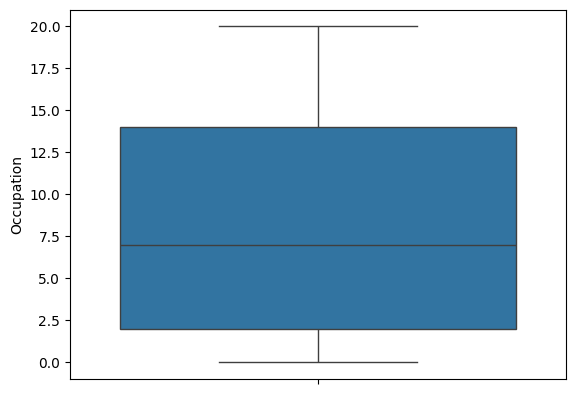

/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


ValueError: Input y contains NaN.

In [3]:
#data engineering
import pandas as pd              # pd is an Alias
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Combine train and test datasets if necessary for some operations
# combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Check for missing values
print(train_df.isnull().sum())

# Example of filling missing values for numerical columns
train_df['Product_Category_2'].fillna(train_df['Product_Category_2'].median(), inplace=True)
train_df['Product_Category_3'].fillna(train_df['Product_Category_3'].median(), inplace=True)

# Example of filling missing values for categorical columns
train_df['City_Category'].fillna('Unknown', inplace=True)

# Example of detecting and treating outliers for a numerical column
sns.boxplot(train_df['Occupation'])
plt.show()

Q1 = train_df['Occupation'].quantile(0.25)
Q3 = train_df['Occupation'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

train_df.loc[train_df['Occupation'] > upper_bound, 'Occupation'] = upper_bound
train_df.loc[train_df['Occupation'] < lower_bound, 'Occupation'] = lower_bound

# Example of converting categorical variables to numerical using LabelEncoder
le = LabelEncoder()
train_df['Gender'] = le.fit_transform(train_df['Gender'])
train_df['City_Category'] = le.fit_transform(train_df['City_Category'])

# Example of handling class imbalance using RandomOverSampler from imblearn
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(train_df[['Gender', 'Age', 'Occupation', 'City_Category']],
                                            train_df['Marital_Status'])

# Example of Feature Selection with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_df[['Gender', 'Age', 'Occupation', 'City_Category']])

# Example of using PCA-transformed features for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_pca, train_df['Marital_Status'], random_state=0, test_size=0.3)

logr = LogisticRegression()
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Check for NaN values in the original dataset
print(train_df['Marital_Status'].isnull().sum())

# Example of filling NaN values with a specific value (e.g., most frequent value)
train_df['Marital_Status'].fillna(train_df['Marital_Status'].mode()[0], inplace=True)

# Example of dropping rows with NaN values in 'Marital_Status' column
train_df.dropna(subset=['Marital_Status'], inplace=True)

# Verify that there are no NaN values left
print(train_df['Marital_Status'].isnull().sum())



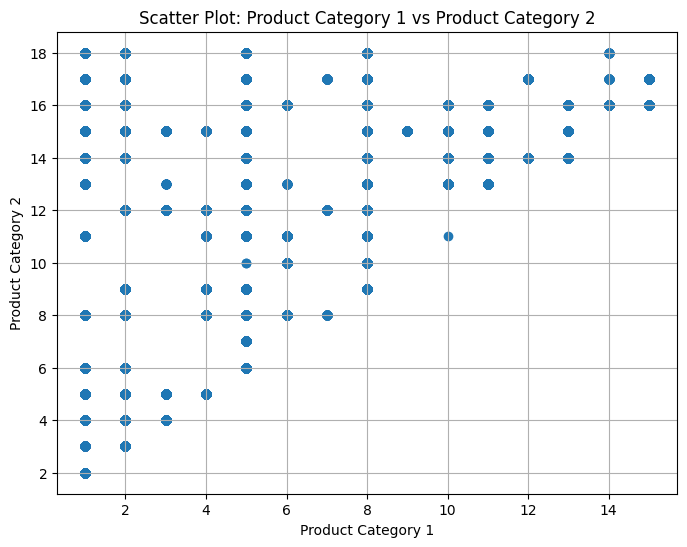

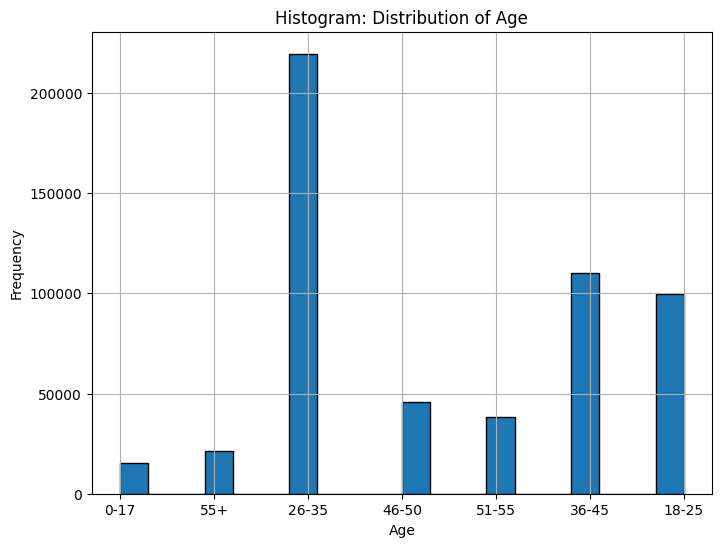

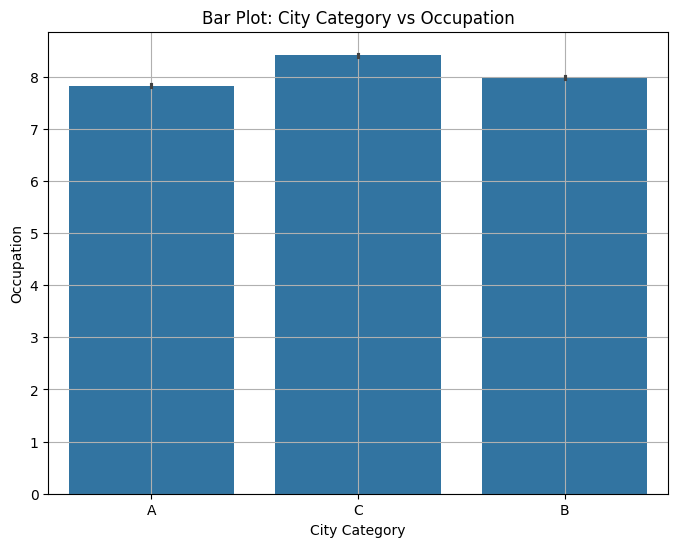

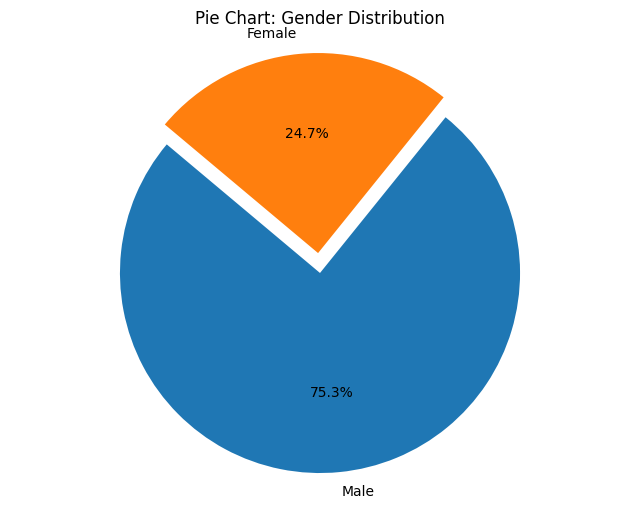

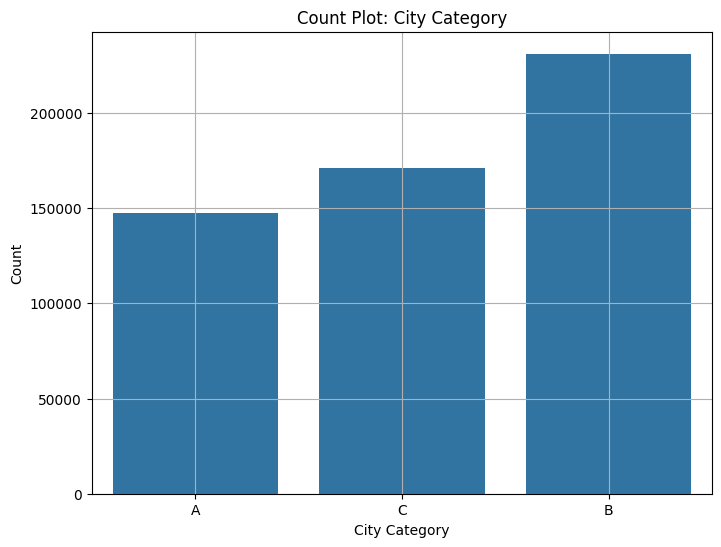

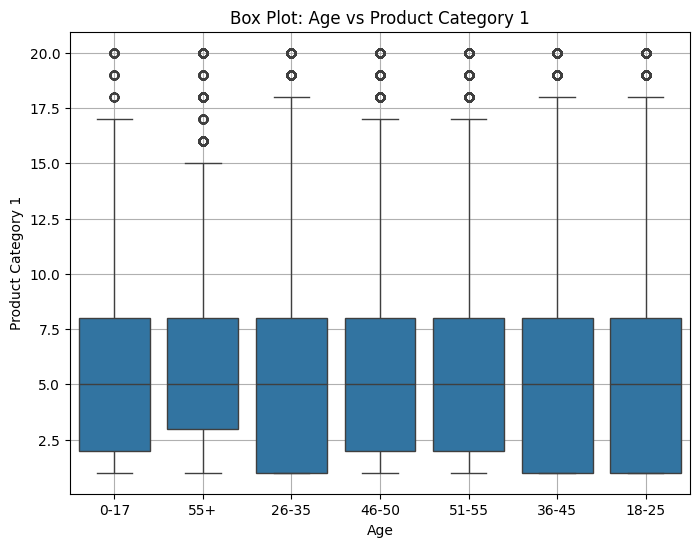

ValueError: could not convert string to float: 'F'

<Figure size 1000x800 with 0 Axes>

In [4]:
#Data Visualisation
import pandas as pd              # pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Combine train and test datasets if necessary for visualization purposes
# combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Example scatter plot to find correlations between two continuous variables
plt.figure(figsize=(8, 6))
plt.scatter(train_df["Product_Category_1"], train_df["Product_Category_2"])
plt.title("Scatter Plot: Product Category 1 vs Product Category 2")
plt.xlabel("Product Category 1")
plt.ylabel("Product Category 2")
plt.grid(True)
plt.show()

# Example histogram to show the distribution of a continuous variable
plt.figure(figsize=(8, 6))
plt.hist(train_df["Age"], bins=20, edgecolor='black')
plt.title("Histogram: Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Example bar chart to represent categorical data
plt.figure(figsize=(8, 6))
sns.barplot(x=train_df["City_Category"], y=train_df["Occupation"])
plt.title("Bar Plot: City Category vs Occupation")
plt.xlabel("City Category")
plt.ylabel("Occupation")
plt.grid(True)
plt.show()

# Example pie chart to represent proportion of each category in categorical data
plt.figure(figsize=(8, 6))
sizes = [train_df['Gender'].value_counts()[0], train_df['Gender'].value_counts()[1]]
labels = ['Male', 'Female']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))
plt.title('Pie Chart: Gender Distribution')
plt.axis('equal')
plt.show()

# Example count plot to count occurrences of each category
plt.figure(figsize=(8, 6))
sns.countplot(x='City_Category', data=train_df)
plt.title("Count Plot: City Category")
plt.xlabel("City Category")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Example box plot to show the distribution of a variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='Product_Category_1', data=train_df)
plt.title("Box Plot: Age vs Product Category 1")
plt.xlabel("Age")
plt.ylabel("Product Category 1")
plt.grid(True)
plt.show()

# Example heatmap to visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
                      'Product_Category_1', 'Product_Category_2', 'Product_Category_3']].corr(), annot=True)
plt.title("Heatmap: Correlation Matrix")
plt.show()


In [9]:
# Linear Regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare the data
x = train_df.drop(['User_ID', 'Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], axis=1)
y = train_df['Product_Category_1']  # Example target variable, replace with your target variable

# Handle missing values if necessary (as per your previous example)
# Example: Filling missing values with mean
x.fillna(x.mean(), inplace=True)

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=1, test_size=0.2)

# Initialize Linear Regression model
reg = LinearRegression()

# Train the model
reg.fit(X_train, Y_train)

# Make predictions
Y_pred = reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)


TypeError: Could not convert ['FFFFMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMMFFMMMMMMFFMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMMFMMFFFFFMMMMMFFMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFFMFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFMMMMMMFFFFFFFFFFFMMMMMMMFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFMMFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFMFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFFFFFFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFMMMMMMMMMMMMMFFFFMFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMFFFMMMMMMMMFFFMMMMMMMMFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFMMMMMMFFFFMMMMMMMFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFMMMMFMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFFFMMMMFFFFFMMMMMMMFFFFMMMMMFMMMMMMMMMMMMMMMMMMFFFMFMMMMMMFFFFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFMMFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFMMMFFFMFFFFMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMFFMMMMMMMMFMMMMMMMMFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFMMFFFFFFFMFFFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFFMMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMFMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFFMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMFFFFMMMMMMMMFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFMMFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMFFFFFMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFFMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFMMMMMMMMMMMMMMMFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFMMMFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFMMMMMMMMMFFFMMMMMFFFFMMMFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFMMMFFFFFMMMMMFFFFMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFFFFFFMMMMMMFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMFFMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFFFMFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFFFMMMMMMFFFMMMMMFMMMFFFMMMMMMMMMMMMMFFFFFFFFFFFMMMFFFFFFFFFMMMMFFFMMFFFFMMMFFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFMMMMMMMFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFMFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFMMMMMMMMMFFFFMMMFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFMFFFFMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFMFFMMMFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFMMFFFMMMMMMMMMMMMMMFMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFFFFMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMFFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFMMMMMMFFFMMMFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFMMMMMMMMMFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFFFFFMMMFFFFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMFMMMFMMMMFFFFMFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMFMMMMMMMMFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFFMMFFFFFMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFMMMFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFMMMMFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFMMMMMFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFMMFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMFMMMMMMFFFFFFFMMMMMMMMFFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFMMMMMFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMFFFMMMMMMFFFFFFFFFFFFMMMFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFMMMMMMMMMMMFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFMFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMFFMMFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFMMFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFMMMMMMFFFFFFFMMMFFFFFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMFMMMMMFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFMFFFMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFMMFFFMMFFMMMMMMMMMMFFFFFMMMMMMFFFFFFFFFFMMMMFMMMMMFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFMMMMFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFMMMMMMMMMMMFFFFFFFFFFMMMFFFMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFMMMMFMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFMMMMMFFFFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFMMMFFMMMMMMMMMMFFMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFMMMMMMFFFFFFFMMMFFFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMFFMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMFFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFFMMMFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFMMMFFFMMMMMMMMMMMMMFFFMMMMFFFMMMMMMMMMMMMMMMFMMMMMMFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFMMMMMMMMMMMMMMMMFMMFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMFFMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFMFFMMMMMMMMMMMMMMMMMFFFMFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFMFFFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFMMMMMMMMMMMMFFMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFMMMMMMMMMMMFMMMMMMMFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFMMMFFFFFFFMMFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFMMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFMMMMMMMFMMMMMMMMMMMMMMMMMFFFMMFFFFFFFMFFFFMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFMMMMMFFMMMFFFMMMMMMMMFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFMMMMFFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFMFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFMMMMMMMMMMMMMFFFMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMFMMMMMFFFFFMMMMMFMMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFMMMMMMFFFMMMMMMFFFFFFFMMMMMFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFMFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMFFFMMFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMFFMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMFFFFFMMFFFFMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFFMMFFFFFMMMMMMMMFFMMMFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMFFFFMMMMMMMMMMMMMFFFFFFFFFFMMMMMFMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFMFFMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFMMMFMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFMFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFMFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFFFFMFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMFFFMMMMFMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFFFFFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFMMFFMMMMMMMMMMFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFMMFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFFFFFFFFFFMMMFMMMMMMMMFFFFFMMMMMMMFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFFMMFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFMMMMMFFFMMMMMMMMMMMMMMMFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMFMMFFFFFFFFFFFFFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFFMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFMMFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFMMMMMFFFFMFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFMMMMMMMMMFFFMMMMMMMMMMMFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFMMMMMMMMMFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMFMFFFFFMFFFFFFFFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFMMMMMFFFFMMMMMMFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMFFFFMMMMMMFMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFMMMMMFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFMMMMMMMMMMMMFMMFFFFFFFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFFFFFFFFFMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFMMMMMMMFFFFMMMMFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFFMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFMMMMMMMMMMMMMMMMMMFMFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFMMMMFFMMMFFFFMMMMMFFMMMFFFFFFFFMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFFFFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMFFFFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMFMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMFMFMMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMFMMMFFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFFFFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMFMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFMFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFMFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFMMMMFFFFMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFMMMMMMMMMFFFFMMMMMFFMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFMMMMFFFMMMMMMMMMMMMMFFFMMMFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFMMFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMFFMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFMMMFFFFMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFMMMMMMFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMFFFFFFFMMFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFMFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFMMMMFFFFMMMFMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMFFFFFFMFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFFFFFFFMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFMMMFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFMMMMMMFMMMMMMMMMMFFFFFMMMMFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMFMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFMMFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFMMMMMMMMMMMMFMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFMMMMMFFFFMMMFFFFFMMMMMMFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMFFFMMMMMMFFFFFFFFMMFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMFMMMFMMMMMMMMMMMMMMMMMMFMMMMMMMMMFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMFFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFMMMMMMMFFFFMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFFFFFFFMMMMMMMMMMMFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMFFFMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFMMMMFFFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFMMMMFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFMMMFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFFMFFMMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFFMMMFFFFMMMMMFMMMFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFFMMMMMFFFFFFMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMFFFMMMFFFMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMFFFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFFFFFFFFFFFFFFFMMMFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFMMMMFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFFFFFFMFMMMMMMMMMFFFMMMMMMMMMFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFMMMFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMFFFFFFFMFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFFFFFFFFFFFFFMMMMFFFMMMMMMMMFFFMMMMMMFFMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFMMFFFFFFFMMMMMMMMFFMFFFFFFFFFFFFFFFMMMFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFMMFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFMMMMFFMMMFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMFFFFMMMMMMMMMMFMMMMMMMMMMFFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFMFFMMFFFFFFMFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFMMMFMMMMMFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFMMMMMMFFMMMFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFMMMMMMMMMFFFFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFMFFFMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFFFFFFFFMMMMMFFMMMMMFFFFFFFFFFMMMMMFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFMMMMMFFFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFMMMMMMMMMFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMFFFFFMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFMMMMMMMMFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFMMMMMMMFMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFMMMMFFFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMFFFMMMFFFFFFFFFMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFFFFFMMMMMMMFFFMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFMMMMMMMFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFMMFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFMMMFFFFFMFFFFFFMMMFFFMMMFFFFMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFMMFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMFFFFFFFFFMMMFFFFFFFFMMMMMFMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFMMMMMMMMMFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMFFFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFFFFFFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFMFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFFMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFFMMFFFMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFMMMMMMFFFFFMMMMMMMMMFMMFMMMMMMMMMMMMMMMMFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMFFFMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFMFFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMFFFFFFFMMFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFFFFFFFMMMMMFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFMFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFMMMMMFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFMMMFFMMFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFFMMMFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFMMMMMMMMMMMMMFFMFMMMMMMMMMMMMMMMFFMMMMMMMFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMFFFMMMMFMMMFFFMMMMFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFFFFFMMMFFFFFFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFMMMMMMFFFFFMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFMMMMMFFFFFFFMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFMFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFMFFFFFMMMMMMMMFFFFFFFFFMMMFFFFFFFFMMMMFFMMMMMFFMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFFFFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMFFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMFFMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFMMFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMFFMMMMMMMMMFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFMMMMMFFFFFFFMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMFMMMMMMMFFMMMMMMMMMMMMMFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFMMFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFMMMMMFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFFMMMMFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFMMMMFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFMMMMMFFFFFFFFFFFFFFMMMMFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFMMFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMFFMMMMMMMMMMMFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFMMMFFFFFFFFFFMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMFFMMMFFFFFFFFFFMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFMMMMFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFMFFFFFFMFFFFFFFMMMMMMMMMMFFFFFFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFMMMMMMMFFFFMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFMFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMFFFMMMMMMMFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFMMMMMMMMFMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMFFFFFFFFFFFFFMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFFFFFFFFFMMMMFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFMMMMMMMMFMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFFFFMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMFFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMFFMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFMMMMMFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFMMMMMFFMMMFMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFMMFFFFMMMFFFMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFMMMFFFFMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFMMMMMMMMMFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMFFFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFMMMFMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFMFFFFFMMMMMMMFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMFFFFFMFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFMMFMMMMMMMMMMMMMMMMMMMFMMFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFMMMFFFFMMMMMMMMMFFFMMMMMMMMFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFMMMMMMFFFFFFFFFMFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFMMMFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFMMMMMFFFFFMMMFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFMMFFFFFMFFFFFFFMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFFMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMFFFFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMFFMFMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFFMFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFMFMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFMMMMMMMMMMMMMFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFMFFFFMMMMMMMMMMMFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFMMMMMMMMMMMFFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMFFFFFFFMMFFMMMMMFFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMFFFFFMMMMMMMMMFFFFMFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFMFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMFFFFMFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFMFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFMMFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMFFFMMFFFFFMMMMMMMMMMMFFFFFFFFMMMMMFFFFFMFFFMMMMMMMMMFFFFMMMFMMMMMMMMMFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFMFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFMMMMMMMMFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMFFFMMMFFFFFFMMMMMMMMMMMMMFFFFMMFMMMMMFMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFMFFMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMFFFMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFMMMFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMFFFFFFFFFFMFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFMMMMMMMMMMMMMFMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFFFFFFFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFMFFFMMMMMMMMMFMMMMMMFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFFFFFFFFFFFFFFFFFFFMMFFFMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFMMFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFMFFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFMMFFFMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFMMMMMMMFFFFFFMMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMFMMFFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFMMFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFMFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFMMMMMMMMFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFMMMMMMMMFFFFFMMMMMMFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMFFMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFMMMMMMMFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMFFFFFMMMMMMFFFMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFMMFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFMMFFFFFFFMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFFFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFMFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFMMMMMMFFMMMMMMMMFMMMMMFFFFFFFFFFFFMFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMFFMMMMFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFMMMMMMMFFFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFFMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFMMMMMMFMMMMMMMFFFFFMMMMMMMMMMMFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFMMMMMMMMMMMMMMFFMMMMFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFFFMMMMMMMFFFFFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFMMFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMFFFMMMMMFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFMMMFMMMFFFMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMFFMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFMFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFFFFFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFMMMMFFFFFFFFFFFFFMFFFFFMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFMFFFFFFFFFFFMMFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFMFFFFMMMMMMMMMMMMMFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFMMMMMMMMFFFMMFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMFMFFFFFFFFFMMMFFFFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMFFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFMMMMMMMMFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFMFFFFFFFFFFFMMMFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFFFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMFMMMMMMMMMMMMMMMFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMFFFFMMMMMFFMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMFFFMFFMMMMMMFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFFMMMMMFFFFFMMFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFFMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMFFFFFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFFFFFFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFMMMFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFMMMMMFFFFMMFFFFMMMMMMMFFFFFFMMMMMMMMMFFFMMMFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMMFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFMFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFMMFFMMMMMFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMFFFFMMMFFFMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMFMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFMMMFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFMFFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFMFFFMMMMMMMMMMMMMMMMMFMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFFFMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFMMMFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMFFFFMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFMMMMMMMMMMFFFFMFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMFFFFFFFFFFFMMMMMFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFMFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFMFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFFFFFMMMFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMFFFFFMMMFFFFFFFFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFMMMMFFFFFMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMFFFFFMMMMMMMFFFMMMMMMMFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMMFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFFMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMFFFFFMMMFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMFFFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFFFFFFFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMFFFMMMMMMMMMMMMFFFFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFFMMMMFFFFFMMMFFMMMFFFFFMMMFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFFFFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFFMMMMMMMMMMMFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFFMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFMMMMMMMMMFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFMMMMMMMFMMFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFFFFFFFFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFMMFMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMFMFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMMFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMFFFMFMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFMMFMMFFFMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFFMMMMMMMFFFFMMMMMFMMFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFMMFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFFMMMMMFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFMMMMFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFMFFFFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFMMMMMMMMMMMFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFMMMFFFMMMMMMMMMMMMMFFFFFFFMFFFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFMMMMMFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFMMMMMFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFFFFFFFFMMMMFMMFFMMMMMMMMMMMMMMMMMFFMMMMFFFMMMMMMMMMMMMMMFMMMMMMFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFMMMFFFFMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFMMMMFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFMMMMFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFMMFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFMMMFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMFFFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFMMMMMFFMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMFFMMMMMMMFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMFFFFFFMMMMMFFFFFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMFFFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFMMMMMMFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFMMFFFMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFMMMMMMMMMFFFFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMMFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMFFMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFMMFFFFFMMMMMMMMMMMMMFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMFFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFMMMMFFFFMMFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMFFFFFFFMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFFFFFFFMMMMMMMMFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFMMMMFFFFFFFFMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFFMMMMMMFFFFMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFMFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFMMMMMFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFFFFMMMMMMMMMMMFMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMFFFFFFFFFFMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFMFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMFFFMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMFMMFMMMMMMMMMMMFFFFFFFFFFFMMMMMMMFFFFFFFMMFFFFFFMMMMMFFMMMFFFMMMFFFFMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFFFFFFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMFFFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFMFMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFFFFFFFMMMMMMMFMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFFFFFFFMFFFMMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFMMMMFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFFFMFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMFFFFFFFFFMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMFMMMMMMMMMMMFFMMMMFFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFMFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFMMMFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMFFFMFFFMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMFMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFFMMMMMMFFFMFFFFFFMMMMMMMMMMMFFFFFFMMMMFMMMMMMMMMMFMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFMMMFFFFFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMFMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFFMMMMMFFFFFFFFFFFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMFFFFFFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFMMMFFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFFFFFFMMFFMFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMFFFFFMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMFFFMMMFFFFFMMFFFFFFFFFFFFFFFFFFFMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMFFMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFMMMMMMFFFFFFMMMMMFFFFFMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFMFFFFFFMMMMMMMMFFFFFFFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFMMMFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMFFFFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMFMMMMMMFFFFFMMMMMMMMFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMFFFFFFFFFFFMMMMMMMMFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFMMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMFMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMFFFFFMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFMMFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMFMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFFFMFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMFFFFFFFFFFFMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFFMMMMMMMMMMFFFFFFFFFFFFFMMMFFFFFFFFFMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMFMMFFFFFFFFFFFFFMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMFMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMFFFMMFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMFMMMMMMMMMMFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMFFFFMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMFMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMFFFFFFFFFFFFFFFFFFFMMMMMMFFFMMMFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFMMMMFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMFMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMFMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFMMMMMMMMMFFFFFFFFFFFFMFFFFFFFFFFFMMMFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMFFMMMMMMFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMFMMFMMMFFMFMFMMMFMMFFMFMMFMMMMMFMFMMMFMMFMMMMFMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFMMFMMMMMMMFMMFMFFMMMMMMMMMFMFMMFFMMMMFFMMMMMFMMFMMMMMFFMFMMMFFMMFMFMMMMFMFMMMMMMMMMMFMMMFMFMMFMMMFMMMMMMMFMFMMMMMMFMMMMFMFMMFMMMFMMMMMMFFFFMMFMMMMMFMMMMMFFFMMFFMMMMMFMMMMMFMFFMMMFFMMMFMMFFMMFFMMMMMMFMMMMMMMFFMMMFMMFMMMMMFMMMFMMMMMMMMMMFMMMMFMMFMMMFFMFMFMMMMFMMMFMMFMMMFMFMMMMMMMMMFFFFFMMMFMFMMMMMMFMFMMMMMMFMFMFMMMMMMMMFMMMFFMMFFFFMFMMMMFFFMFMMMMMMMMFMMFMMFFMMFMMMMMFMFMMMMMFFFFFMMFMMFMFMMMMMMMMMMMFMFMMFMMFFMMFFMMMMMMMMMMMMFMMMMMMMMMMMMFMMFFMMFMFMMMFMMMMMMMMFMMMMMMMMMMMMFMMFFFFMMMMMMMFMMMMMFMMFMMMFMMFMMMFMMFMFMMMMMFFMMMFMMMFMMMMMMMMMFMFFFMMMMMMMMMFFFMFMFMFFFMFFMMFFMMMMMMMMMMFMMMMMFMMFMFMMMMMMMMFMMFFMMMFFMMFMMMMMMMMMFMFMMMMMMFFMMMFMFMMMFFMMMFMMMMFMMMFMFFMFMMMMFMMFMMMMMMFMFMMFFMMMMFMMMMMMMMMMFFMMMFMMMMMMFMMMMFMFFMMMFFFMFMMMMMFFMMFMMMMFFMMMFMMMMMMMMMFMMFFMFFFMMMMMFMMMMMMMMFMMFMMMMMFMMMMFMMMFMFMMFFMMMMMMMMMMMFMMMMMFMFMMMMMMMMMMMMMFMFFMMMMMFMMFFMFMMMMFFMFFMFFMFFMMMMFMFFMMFMMFMMMMMMFMMMMMMFFMMMFMMMMMMFMMMFMFMMFFMMMMMMMMMMMMMMMFMFMMMMMMMMMMMMMMFMMFMMFMMFMMFMMMMMMMFMMMMMMMMMMMFFFMFMFMMFFFFMMMMFMMMMMFMMFMFFMFMMMFMMMMMMMMMMMFMFFMFMMMMFMMMMMMMMFMFFFMMMMMFFMMMMMMFMMMMFMMMMMMFFMFMMFMMMMMFMMMFMMMMFFMMMMMMMMMMMMFFMFMFMMMMFMMMMMMMMMMMMMFMMFMMFFMFFFMFMFFFMFMMMMFMMMMMMMMMFMMMMMMMMMMFMMMFMMMFMMFMMMMFMMMMFFFMMMMFFMMFMFMFFMMMMMMMMFFMMMFMMMMMFMFMMFFFMFFFMMMFFMMMMMMMMMFMMMMMMMMFFMMMMMMMFMMMFMMMMMMFMFMMMFFFMMFFMFMMFFMMMMMMMMMMFMFFFMMMMMMMFMMMMMMFMMMMMMMMFMMMMMMMFMMMFMMMMFMMMFMFMMMMFMMFFFFFMMMFMFMMMMMFMFFMMFMFMMMFMMFMMMMMFFMMMFMFMMMFMFMMFMFFMMMMFMMFMFFFFMMMFMFFMMMMMMMMMMFMFMMFMMMMMMFFMFMFFMMMFMMFMMMFMMMFMMMMFMFMMMFMFMFFFMMMMMFMFFMFFMFMMMMFMMFMMMFMMMMMFMFMFMMMFMMFFMMMMMMMMMFMFMMMMMMMMMMMMFMMMFMMMMMMMFMMFFMMMMMMFMFMFMMMMMMFFMMMFFMFFMMMMMMFFFFFMFMMFFMMMMMFMMFFMMMMMMMMMMFMFMFMMMFMMMMMMMFMMMMMFMMMMFMMMFMFMMFMFFMMFMFMMMMMMMFMMMMFMMFMMFMMMFFMFMMMMFFMMFMMMMFMMFFFMMMMMMFFMFMFMMFMMMMMMMMFMMMMMMMMMFMMFFMFMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFFMFMMFMFMMMMMMMFMMMMMMMMMMMMMMMMMMMMFMMMFMMMMFFFMMMMFMMMFMMFFFMMMFMMMMMMMMMFMMMMMMMMMFFMMMMMFFFMMFMFFMMMFMMMMMMMMMFMFMMMMFMFMMMMMMFMMMMMMMFMMFMMMFMMMMMMFMFFMFMFMMMMMMFFMFFMMMMMFMMMMMMMMMFMFMMFMFMMFMMFMMFFFFMMMMMMMMMMMMMMMMFMMMFMFMMFFMMFMMFMFMMMFMMMMFMFMMMMMMMMMMMMMMFMMMFMMFMMMMFFFMFMMMMMMMFMFMMFFMFFMFFFMFMMFMFMMMMMMMMMMMMMMMMMFFMMMMMMFMMMFMMMMFFMMMFFMMMMMMFMFMFFMMMMMFMFMFMMMMMMMMMMFMMFMMMMMMMMMMMFFMMFMMMFFMFMMMMMMFFFMMMMMFMFMFMFMFMMMFMMMFFMMMMMMMMFMMMMMMFMFMMMMFMFFMMMMMMMMMMFFMMMFFMMFMFFMMMFMMMFMMMMFMMMMMFFMMMMMFMMMFMFMFMMMFMMMFMMMFFMFMFFMMMMMMMMMMMMFFMMMMMMMFMFFMMMFMFMMMMFFMMMMFMMFMFMMMMMMMMMMMMMMMFMFMMMMFMMMMMMMMMMMMMMMMMMMMMMMMFFFMFMMMMMMFMMFMMMMMFMFMFFFMMMFFMMMMFMFFMMMMMMMMFMMMMMMMMMMFMMMMFMFMFMFFMMMMMMMMMMMMMMMMMFMMMMMMFMMMMMMMMMMMMMMMFMMMMMMMFMMMMMMMFMMMMMFMMMFMFMMFFMFMMFMMMMMFMFMMMMFFMFMMFMMMFFMMMMMMMMMFMMMMMMMMMMFMMMMMMFMMMMMMMMMMMFMMFMMMMMMMMMMMMMMMMMMMMFFMMMMFMMMMMMMMMMMMMFMMMMMMMMMMFMMMMMMMFMMMMMMMMFMFMFFMMMMFMMFMMFFMMMMMFFMFMMMMMFMMMFMMMFMFMMMMMMFMMMFFFMMFMFMMMMMFMMMFMMMFMFMMMMMMMMFFMMMMFMMMFMMMMFMMMFFMMMMFMMFMMMMFMFFMMMMFMFMMFMFMMMMMMMFMMMMMMMFMMMFMMMMMMFMMMFMMFFFMMMMMMMMMMMMFFMMMMMMMMFMMFMMMMMMFMMMMMMMFMMMFFMMFMFMFFMFMMMMMMFFMMMMMMMFMMMMMMMMMMMMMMMFMMMMMMFMMMMFMFMMMMMMMFMMFFFMMMMMFMFMMMMFMMMFMMFMFFMFMMFMMMFMFFFMMMFMFMFFFFFMFMMFMFFMMMMMMMFFFMMMMMMMMFFMMMFFMMFMMMFMMFMMMMMMFMMMMFMMMMMMFMMMMFFMMFMMFMMMMMMFMMMMFMFFMMMMMMMMFMMMFMMMMFMFMMFFMFMMFMFMFFMMMFMMFMMFMMFMFFMMMFMMMFMMMFMMFMFFMMMFMMMFMMFMMFFMMFFMMMFFMMMFMMMMFMFMMMMFMMFMFFFMFMMMMMMMFFFMFMMMMFMMMMFMFFMFMMFMMFMMMMFMMMMMMMMMMMFMFMMMMMMMMFMMMFMMFMMMFFMMFMFMFMMMFFMMMFMFMFFFMMFMFFFMMMFMFFMMFMMMMMFMFMFMFMMMMMFFMMFMFFMMFMMMMMFMFFMMFMFMMMMMFMMMMMMMMMFMMMMMFMMFMFMMFMMMMMFFMMMMMFMFMMFFMMMFFFMFMMMMMMMMMMMFMMMMMMMMMFMMMMMFFFMFMMMFMMMMFMMMMMFMMMMFFMMMMMMMFMMMMMFMMMMFFFFMMMMMFMFMMMMMFFMFMMFMMFFFFFMMFFMMMFMMFMMMMMMMMMMMFMMMMMMMFFMFMMMMFFMFFFMFFMFFFMMFFMMMMMMFFMMMFMMFMMFMMMMFMMMMMMMFMMFMFMMMMMMMFMFFMMFMMMMMMFMMMMFFFMMFMMMMMFMMMMMFFFFMMMMMMMFFMMMMMFFMMMMFFMMMMFFMFFMFMMFMMFFFMMMFFMMMMMMMFMFMMMMFMFFMMMMFFFMMMFMMMFMMMFMFFMMMMMMFMMMFMMMFFFMMMFMMMMFMMMMMMMFMFFMMMMMFFFMMMMFFFFMFFFMMMFMMMMMMMMMMMMFMFMMMMFMMFMMMMMFMFMMFMMMMMMFMFMMFFFMFMFMMMFMFFMFMFFFFMFMFFMMMMMFMMFMMFMMMMMMMMMFMMFMFFFMMMFFFMMMMMFMMMFMFFMMMMMMMFMFMFFFMFMMFMMFFMMMMFMFMFMMMMFMMFFFFFFMMFFFFFMMMFMFMMMMMFMFMMFFFF'
 '0-170-170-170-1755+26-3546-5046-5046-5026-3526-3526-3526-3526-3551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-350-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5518-2518-2518-2526-3526-3518-2518-2526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2536-4536-450-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-1726-3526-3526-3546-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4546-5046-5046-5046-5046-5046-5026-3546-5046-5046-5026-3536-4536-4526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5046-5046-5046-5046-5018-2518-2546-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-170-1751-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5036-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5555+55+55+55+26-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-1746-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4555+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+46-5046-5046-5046-5046-5046-5036-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3518-2518-2536-4536-4546-5055+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5546-5026-3526-3526-3526-3526-3526-3546-5055+55+55+55+55+55+55+51-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-1736-450-1736-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-1755+36-4536-450-170-170-170-170-1726-3551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4526-3526-350-170-170-170-1751-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-250-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2551-5551-5536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-350-170-1755+55+55+55+55+55+55+55+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5551-5551-5526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-170-170-170-170-170-1718-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+18-250-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4546-5018-2518-2518-250-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+55+26-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-1751-5551-5551-5555+55+55+55+55+0-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-450-170-170-170-170-170-170-1736-4536-4555+55+55+55+55+55+55+55+55+0-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-500-1751-5551-5546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1746-5046-5046-5046-5046-5036-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4546-5046-5055+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-550-170-170-170-170-170-170-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2526-3526-3536-4536-4536-4526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1746-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4526-3526-3546-5018-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4546-5046-5055+55+55+55+55+55+36-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4551-5551-5526-3526-3526-3526-3526-350-1718-2536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4536-4536-4536-450-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2555+0-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5036-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5555+18-2518-2555+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-250-1746-5026-3546-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-250-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5018-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2526-3526-3526-3526-3526-3518-2536-4536-4526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5526-3555+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+26-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1726-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-450-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5555+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-250-170-1751-5551-5536-4536-4536-4526-3526-3536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-500-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-550-170-170-170-1726-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-500-170-170-170-170-170-170-170-170-170-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+18-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+26-3536-4536-4526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5036-4518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3518-2518-2518-2546-5046-5051-5551-5536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-350-170-1755+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-1751-5551-5551-5526-3526-3536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1726-3536-4536-4526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5018-2536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5055+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1751-5551-5551-5546-5026-3526-3526-3526-3555+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5055+55+55+55+55+55+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2546-5018-2518-2546-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-450-170-1736-4536-4536-4536-4536-4536-450-1736-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2526-3526-3555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+46-5046-5046-5046-5036-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-500-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5526-3555+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+18-2518-2518-2518-250-170-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-450-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3555+26-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3546-5046-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-170-170-170-170-1755+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3518-2518-2518-2536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2551-5555+55+55+55+55+55+55+0-170-170-1746-5046-5046-5046-5046-5046-5018-2518-2518-2518-2536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1755+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1726-3526-3526-3546-5036-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1746-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5555+46-5046-5026-3526-3526-3518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+36-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2536-4536-4536-4536-4536-4536-4536-450-1718-2551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3536-450-170-170-170-170-170-1736-4536-4536-4555+55+0-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4526-3526-3526-3526-3526-3526-3526-3551-5555+55+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-500-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5555+55+55+55+36-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+46-5046-5046-5036-4536-4536-4536-4526-3526-350-170-1736-4536-4536-4555+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5546-5051-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3555+55+36-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3551-5551-5526-3526-3536-4536-4536-4536-4536-4555+36-4551-5551-5551-5551-5526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2555+46-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5536-4546-5046-5046-5046-5046-5055+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4546-5026-3526-3526-350-170-170-170-170-1736-4551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4555+55+55+55+26-3526-3526-3526-3555+51-5551-5546-5046-5046-5026-3526-3526-3555+55+55+55+55+55+55+55+55+36-4536-4551-5551-5536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4526-3536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2551-5555+55+36-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4555+26-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5051-5546-5046-5036-4536-4546-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-350-1751-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4551-5555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+51-5551-5551-5551-5555+55+55+26-3526-3555+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5055+55+55+46-5046-5036-4526-3546-5046-5055+55+36-4536-4536-4536-4536-4518-2518-2526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2555+55+55+26-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+36-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3518-2555+18-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5051-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5555+55+26-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5555+55+55+55+55+55+55+55+55+55+18-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+55+55+55+55+55+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+0-1736-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+26-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-350-1726-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+18-2518-2536-4536-4536-4526-3551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4555+55+55+26-3526-3526-3555+55+55+36-4526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5036-4546-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5026-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2526-3518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3518-2526-3526-3536-4518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+26-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3555+55+55+55+18-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1726-3526-3518-2518-2551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4518-2526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-550-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+46-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5026-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-350-170-170-170-170-170-1755+55+36-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1736-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3555+55+55+55+55+26-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-450-1736-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-350-170-1726-3536-4536-4526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1718-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-1755+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1718-2518-2526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-550-170-1746-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1726-3551-5518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4555+46-5046-5018-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5055+55+36-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-250-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5026-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-550-170-1751-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3555+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+36-4536-4518-2518-2536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5018-2518-2526-3546-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+51-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5036-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+55+55+36-4551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-170-170-170-1718-2555+46-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4518-2518-2551-5551-5551-5551-5526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4551-5551-5551-5551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+0-170-170-1746-5046-5046-5018-2518-2546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3555+55+18-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3536-4536-4526-3526-350-170-170-170-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-450-170-170-170-170-170-1751-5551-5551-5526-350-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2526-3526-3518-2518-2518-2526-350-170-170-170-170-1751-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+55+55+26-3546-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5051-5551-5551-5551-5536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-250-1746-5046-5046-5026-3518-2555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4551-5551-5551-5536-4536-4518-2518-2518-2526-3526-3526-3526-3555+0-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-500-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5036-450-170-1746-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1751-5551-5551-5551-5518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3555+46-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-450-170-170-170-1718-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1755+36-4536-4526-350-170-170-1726-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5051-5551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4555+55+18-2518-2526-3526-3526-3526-3526-3526-3536-4526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1746-5036-4536-4536-4546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4551-5551-5551-5546-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2555+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2518-250-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-250-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3518-2546-5026-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1755+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-170-1751-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-170-170-170-170-1736-4536-4551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1718-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-450-170-170-1718-2518-2518-2551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3551-5546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3546-5046-5046-5046-5046-5046-5055+55+55+55+51-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3555+18-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-170-1755+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1751-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1746-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1746-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3536-4536-4551-5546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2555+55+55+46-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-500-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2555+55+55+55+26-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-350-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5051-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1755+55+55+55+26-3526-3526-3546-5026-3526-3526-3551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4526-3551-5551-5551-5518-2518-2518-2518-2518-2526-3518-2526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-170-170-1726-3526-3526-3546-5046-5055+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-450-170-1736-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3546-5046-5036-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-170-170-170-170-1726-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-2546-5046-5046-5046-5046-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-1751-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5555+55+55+55+55+26-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3546-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+18-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4555+55+55+55+55+55+55+55+55+55+46-5018-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+36-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2555+46-5046-5036-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2536-4518-2518-2518-2518-2536-4518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3518-2518-2518-2518-2536-4536-4536-4546-5046-5055+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5051-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5051-5546-5046-5046-5026-3526-3546-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-1736-450-1736-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-1755+55+55+55+55+55+55+18-250-170-170-1726-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-350-1751-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5555+55+55+26-3526-3526-3526-3536-4536-4551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-250-170-1726-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5536-4536-450-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3555+55+55+55+55+18-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5555+55+55+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1718-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+0-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4546-5018-2518-250-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4555+26-3526-3526-3555+55+55+55+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5051-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+55+55+55+55+55+55+46-500-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-450-170-1736-4555+55+55+55+55+55+55+0-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4546-5046-5046-5046-5046-5046-5051-5551-5546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2551-5546-5036-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-550-170-170-170-170-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5518-2518-2518-2518-2526-3526-3526-3536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4526-3546-5046-5018-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4526-3526-3526-3526-3546-5036-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-1755+18-2518-2518-2518-2518-2536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1746-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3555+18-2518-2555+0-170-170-170-170-170-170-170-170-1726-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2555+0-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5546-5046-5036-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+46-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2536-4536-450-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-1718-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5018-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5018-2526-3526-3518-2518-2518-2536-4526-3526-3526-3526-350-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5526-3526-3526-3555+55+55+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1736-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5546-5046-5046-5046-500-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-550-170-170-1726-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5055+55+0-170-170-170-170-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3551-5551-5551-5551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-350-170-170-170-1726-3546-5046-5036-4536-4536-4551-5536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-1755+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-250-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2526-3526-3536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5518-2518-2536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1751-5551-5551-5551-5551-5551-5551-5546-5046-5026-3526-350-1755+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3551-5551-5546-5046-5046-5046-5055+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3536-4536-4536-4518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2518-2518-2555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3536-4526-3526-3526-3555+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2546-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2555+55+0-1718-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5055+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5051-5536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5555+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4555+55+55+18-2518-250-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-450-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-170-1755+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+0-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2551-5555+55+55+55+55+55+55+0-170-170-1746-5046-5046-5018-2518-2518-2518-2536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1755+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5546-5018-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1726-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+0-1718-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1718-2518-2518-2551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5536-4536-450-170-170-170-170-1718-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3536-4536-4536-450-170-170-170-170-170-170-170-170-1736-4536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-500-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+51-5551-5551-5555+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+46-5036-4526-350-1736-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5546-5055+55+55+55+55+55+55+55+55+55+55+46-5055+55+36-4536-4536-4518-2518-2518-2555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2555+55+55+46-5046-5046-5046-5046-5055+55+55+55+55+51-5551-5551-5555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4546-5046-5026-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4555+55+55+55+51-5551-5555+55+55+26-3551-5551-5551-5546-5026-3555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2551-5555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4555+55+26-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-350-1751-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+51-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3546-5055+55+55+55+55+55+46-5036-4536-4526-3526-3526-3546-5046-5046-5046-5055+55+55+36-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3555+36-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+36-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2555+55+55+26-3526-3526-3526-3551-5551-5555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4555+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4546-5046-5046-5051-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4526-3526-3526-3546-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+55+55+36-4536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+55+55+55+36-4526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+18-2536-4536-4536-4551-5551-5526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4555+55+26-3526-3555+26-3526-3526-3536-4536-4536-4518-2526-3526-3518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4546-5046-5046-5026-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5051-5555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5526-3526-3518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2526-3526-3536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3518-2518-2526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-1726-3518-2518-2518-2518-2551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-170-170-1726-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2536-4526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4536-4526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+26-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5055+55+55+55+55+46-5046-5046-5051-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5026-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4526-3526-3546-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-250-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4555+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-450-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+51-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-350-170-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3555+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1755+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2546-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2555+55+55+55+55+55+55+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1751-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5036-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4555+55+46-5046-5018-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-250-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-170-1751-5526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-550-1751-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+36-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5536-4536-4546-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5046-5018-2518-2526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3551-5551-550-1751-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+55+55+36-4536-4526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2555+55+55+55+46-5018-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5026-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4518-2551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2555+0-170-170-170-1746-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3536-4536-4536-4536-4526-350-170-170-170-170-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3518-2518-250-170-170-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-450-170-170-170-1751-5551-5551-5526-350-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3551-5546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-350-170-1751-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5051-5536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-250-170-170-170-1746-5046-5026-3518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+55+55+36-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4518-2526-3526-3555+55+0-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5546-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2546-5018-2518-2536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4546-5046-5055+26-3526-3526-3536-4536-4536-4526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-450-170-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3551-5551-5551-5551-5551-5555+55+46-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1751-5551-5551-5518-2518-2518-2551-5518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3555+26-3546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-450-1755+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1755+55+55+36-4536-4536-450-170-170-1726-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1746-5036-450-170-1746-5051-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5551-5551-5546-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-250-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3555+55+55+55+55+55+55+18-2518-250-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3555+55+55+18-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1755+55+55+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+18-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-1751-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3546-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-1736-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-1718-2518-2518-2551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-170-170-1718-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3546-5018-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3555+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4551-5536-4536-4536-450-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-1755+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-350-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+36-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1746-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5526-3526-3546-5036-4536-4518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3536-4536-4536-4526-3526-3526-3551-5536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2536-4536-4555+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-500-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4551-5555+46-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1755+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-350-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5551-5518-2518-2526-3526-3526-3518-2526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3546-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1736-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5046-5018-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3518-2526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1746-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2555+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-550-170-170-170-170-170-170-170-170-170-1746-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5055+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5551-5551-5546-5026-3526-3526-3518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5546-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+51-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-450-1736-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-1755+55+55+36-4536-4536-4536-4526-350-1718-2526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5036-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5018-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4518-2518-2526-3526-350-170-1751-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3546-5046-5046-5046-5046-5046-5046-5018-2518-250-170-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2551-5551-5551-5536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-350-170-170-1755+55+55+55+55+18-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2555+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5555+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1718-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-250-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+55+55+55+55+18-2518-2518-250-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4551-5551-5536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4518-2518-2518-250-170-170-170-170-170-1736-4536-4546-5018-2518-2518-2518-2518-2518-2518-2536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-170-1746-5046-5051-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-1751-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+46-500-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-450-170-1736-4536-4536-4555+55+55+0-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-450-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1746-5046-5046-5036-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4546-5046-5055+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-550-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+18-2518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3555+55+55+36-4536-4536-4526-3546-5046-5046-5046-5018-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4546-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4551-5551-5551-5526-3526-3526-3526-3526-3555+18-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1736-4536-450-170-170-1746-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5051-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-250-170-170-170-170-170-170-1726-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2555+0-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5036-4518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5036-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2546-5046-5036-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2518-2518-2518-2518-2536-4536-450-170-1751-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1718-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3518-250-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5555+55+26-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+46-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5555+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1751-5536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-450-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5546-5046-500-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-550-170-170-1726-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5055+0-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2555+36-4536-4536-4518-2518-2518-2518-250-170-170-170-170-170-170-170-1726-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3518-2546-5046-5036-4536-4536-4536-4551-5551-5551-5551-5551-5551-5536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1755+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5026-3536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-250-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-450-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2546-5051-5551-5551-5518-2518-2536-4518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-1751-5551-5551-5551-5551-5551-5546-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-350-170-1755+55+55+55+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3551-5546-5046-5046-5046-5055+55+55+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3536-4536-4526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2518-2555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4526-3555+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5018-2546-500-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4536-4536-4536-4536-450-170-1736-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+55+0-170-1718-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+55+55+55+55+55+55+46-5046-5046-5046-5036-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-500-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+18-2518-2518-250-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2546-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-350-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-1736-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3555+55+26-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3546-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+0-170-170-170-170-170-1755+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+0-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2551-5555+55+55+55+55+0-170-170-170-1746-5046-5046-5046-5018-2518-2536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1755+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1751-5536-4536-4536-4536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1755+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2536-4536-4536-4536-4555+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+26-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+18-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2551-5536-4536-4536-4536-450-170-170-170-1718-2518-2518-2551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1718-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-350-1726-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-350-170-170-170-170-170-170-1736-4555+55+0-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+0-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-500-1746-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5555+46-5018-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-350-170-170-1736-4536-4555+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5546-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3536-4536-4518-2555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4551-5551-5551-5526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2555+55+55+55+46-5046-5046-5046-5046-5046-5055+55+55+55+55+55+51-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5536-4536-4536-4546-5046-5046-5046-5046-5046-5055+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-350-170-1751-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5051-5555+55+55+55+55+55+55+51-5551-5555+55+26-3551-5551-5555+55+51-5551-5551-5546-5046-5026-3555+55+55+55+55+55+55+55+55+36-4536-4551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5026-3526-3536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2536-4536-4551-5551-5551-5555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+51-5555+55+55+55+55+55+26-3526-3526-3555+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3546-5055+55+55+55+55+55+55+55+55+46-5046-5026-3546-5055+36-4536-4536-4518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5026-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+36-4536-4536-4536-4536-4555+51-5551-5526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5051-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5536-4555+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+0-1726-3526-3536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2536-4551-5526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4555+26-3526-3526-3555+26-3526-3536-4536-4526-3518-2518-2526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4546-5046-5046-5046-5046-5046-5046-5046-5036-4546-5026-3526-3526-3526-3536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+36-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5051-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2526-3526-3555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+0-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1718-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-500-170-170-170-1726-3526-3526-3518-2518-2518-2551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5551-5551-5551-550-1718-2536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+46-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-350-170-170-1755+55+36-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5026-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-250-1736-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-450-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+26-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5055+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-170-1755+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1718-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-1746-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2555+55+55+55+55+55+55+55+55+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3546-5036-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+18-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5055+55+51-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4555+18-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-500-170-170-170-1751-5526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-550-1751-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3555+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+36-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5536-4546-5046-5046-5046-5046-5046-5036-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2536-4546-5046-5018-2518-2518-2526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4555+55+51-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5555+51-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3551-5551-5551-550-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+36-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4526-350-170-170-170-170-170-1718-2518-2518-2555+46-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2551-5551-5555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5046-5046-5046-5026-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+26-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-350-170-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3551-5546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-350-170-170-1751-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5051-5551-5551-5536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4526-3526-3526-3526-3518-2518-250-170-170-170-170-170-1746-5046-5018-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4526-3526-3526-3536-4526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4555+51-5551-5551-5551-5536-4536-4536-4518-2518-2526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2546-5018-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4546-5055+55+26-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-450-170-1746-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+46-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1751-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-450-170-170-1718-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2551-5551-5551-550-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1755+55+55+0-170-1751-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4555+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1746-5036-4536-4536-450-170-170-1746-5051-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4518-2536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+36-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-350-1718-2518-2518-2546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2546-5026-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1755+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-1751-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2526-3526-3526-350-170-170-170-170-170-1726-3526-3536-4536-4536-4526-3526-3546-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1736-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5051-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+18-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2546-5046-5046-5026-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-450-170-170-170-1718-2518-2518-2551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+51-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5036-4536-4536-450-170-170-170-170-170-1751-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+18-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5536-4536-4536-450-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-170-1755+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1746-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3518-2518-2526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3536-4536-4526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5026-3526-3536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-350-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1746-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+26-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2536-4536-4536-4555+55+55+55+46-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-500-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4551-5551-5551-5546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1755+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-350-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-1726-3526-3526-3546-5055+55+55+55+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1736-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3546-5036-4546-5046-5046-5026-3546-5046-5026-3526-3536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5555+55+55+55+55+26-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3546-5018-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+18-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-1746-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+46-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3555+55+18-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-1746-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4526-3536-4518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2536-4555+55+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5551-5546-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5546-5026-3526-3526-3546-5046-5046-5046-5046-5055+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-450-1736-4536-4536-4536-450-170-1736-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-1755+55+55+55+36-4526-3526-3526-3518-2518-2518-250-1718-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3536-4526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-350-170-170-1751-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-250-1726-3518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5536-4536-4551-5526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-1755+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2555+51-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-250-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5555+55+55+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+18-250-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4546-5018-2518-2518-2518-2518-250-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-1746-5046-5046-5051-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5555+55+55+55+55+55+46-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-450-170-170-1755+55+55+55+55+55+55+0-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-500-1746-5051-5546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3536-4536-4526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2551-5546-5046-5046-5046-5046-5036-4546-5046-5046-5018-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4555+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-550-170-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+18-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+26-3526-3546-5046-5046-5018-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4546-5055+55+55+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-350-170-1755+18-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-450-1746-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5051-5551-5551-5536-4536-4526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3555+55+55+55+18-2518-250-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2555+55+0-170-170-170-170-170-170-170-1718-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5036-4536-4536-4518-2551-5555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5036-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1746-5026-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1718-2518-2518-2518-2518-2536-4536-450-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-550-170-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5555+55+36-4526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5051-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5018-2526-3526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3518-250-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3555+55+55+55+55+55+36-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-250-170-170-170-170-170-170-1751-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-1751-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-1718-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1726-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3546-5046-5046-5051-5551-5551-5551-5536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-170-170-170-1755+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-500-1751-5526-3526-3526-3526-3536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-250-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-450-170-170-170-170-170-170-170-170-170-1726-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2536-4536-4536-4518-2526-3526-3526-3526-3546-5046-5046-5046-5055+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-1751-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-350-1755+55+55+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3551-5551-5546-5055+55+55+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2518-2518-2555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3555+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-450-170-170-1736-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+0-170-170-1718-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5055+55+55+55+55+55+55+46-5046-5046-5046-5046-5051-5551-5536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-500-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3555+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-250-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-350-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3546-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-170-170-1755+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+0-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2551-5551-5551-5555+55+0-170-170-170-1746-5046-5046-5018-2518-2518-2518-2536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1755+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-350-1736-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1751-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1755+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4555+55+55+36-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2536-4536-4536-4536-4555+55+55+26-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+0-170-1718-2536-4536-4536-450-170-170-1718-2518-2551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1718-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3536-4536-450-170-170-170-170-1736-4536-4536-4555+55+55+55+0-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4526-3526-3526-3551-5555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-500-170-1746-5046-5046-5046-5046-5036-4526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+51-5551-5551-5551-5555+55+55+18-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+46-5046-5046-5046-5036-4526-3526-350-170-1736-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5546-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3551-5555+55+55+36-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+46-5046-5046-5046-5046-5055+51-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-350-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5051-5536-4555+55+55+55+51-5551-5555+55+26-3526-3551-5555+51-5551-5546-5046-5046-5026-3526-3555+55+55+55+55+55+55+55+55+55+36-4551-5551-5551-5536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2555+55+36-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5051-5546-5046-5046-5036-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3555+55+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2536-4536-4536-4536-4536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+51-5555+55+55+55+55+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+46-5046-5036-4536-4536-4526-3546-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4555+55+55+55+55+55+55+55+36-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4546-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2518-2555+55+55+55+55+18-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+36-4536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4526-3526-3536-4546-5046-5018-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+55+55+36-4536-4526-3526-3536-4536-4536-4536-4536-4555+55+55+0-1736-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-350-1726-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2536-4536-4536-4551-5551-5526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3555+26-3526-3526-3536-4526-3526-3526-3518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4546-5026-3526-3536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+26-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2518-2518-2518-2526-3555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2526-3526-3526-3526-3536-4536-4526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+0-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4526-3518-2518-2518-2526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3555+55+55+55+55+26-3526-3536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-1726-3526-3526-3526-3526-3518-2518-2518-2551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5518-2518-2526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3518-2536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2518-2518-2518-2518-2518-2536-4526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+36-4526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-1718-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+46-5051-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5026-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-350-1755+55+55+36-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-250-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-250-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4526-3555+55+55+55+55+26-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-350-170-170-170-170-170-1726-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1746-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3555+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-170-170-1755+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1718-2518-2518-2526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-1746-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3546-5046-5046-5036-4536-4526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5018-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+55+18-2518-250-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-500-170-170-1751-5551-5526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3555+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+36-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5536-4546-5046-5046-5046-5046-5046-5055+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4555+55+36-4536-4536-4536-4536-4546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4551-5551-5551-5551-5555+55+55+55+51-5551-5536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3551-550-1751-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2518-2546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5018-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5526-3526-3518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1726-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4518-2518-2551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-250-1746-5046-5046-5018-2518-2546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-450-170-170-170-170-170-1751-5551-5551-5526-350-170-170-170-1726-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3551-5546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2526-3518-2518-2518-2518-2518-2526-3526-3526-3526-350-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5055+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-1746-5046-5046-5046-5046-5046-5046-5026-3518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2546-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2555+55+55+55+55+55+36-4536-4536-4555+51-5551-5551-5536-4536-4518-2518-2518-2526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+36-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-450-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4546-5055+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1751-5518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-450-170-1718-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-3526-3555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5051-5555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-350-170-170-170-1726-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3546-5046-5051-5551-5551-5551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5555+26-3526-3526-3536-4526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3555+55+55+55+18-250-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3555+55+18-2546-5026-3526-3526-3526-3526-3536-450-170-170-170-170-1726-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1736-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3555+55+55+55+55+51-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2526-3526-3518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-500-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-1736-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3555+46-5051-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1718-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+18-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4518-2518-2551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+55+18-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-1755+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1746-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4546-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-350-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1746-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2526-3526-3555+55+55+55+55+55+55+26-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4555+46-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4551-5551-5551-5555+46-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2555+55+55+55+55+55+26-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4536-4518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5055+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1755+55+55+55+55+55+55+46-5026-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-1726-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-350-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5518-2518-2526-3518-2546-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4518-2518-2546-5046-5046-5046-5046-5046-5055+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-1726-3526-3526-3546-5046-5046-5046-5055+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-170-170-170-170-1736-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3546-5046-5046-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+46-5046-5046-5046-5046-5018-2546-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3518-2518-2518-2526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5555+55+26-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5018-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1746-5026-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3546-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3555+18-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5551-5551-5551-5551-550-170-170-170-170-1746-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4526-3536-4518-2518-2518-2536-4518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3518-2518-2518-2518-2536-4536-4555+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5546-5026-3526-3526-3518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5546-5046-5026-3526-3546-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-1736-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-1755+55+55+55+55+55+55+26-3518-250-170-1726-3551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-350-1751-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+26-3536-4536-4551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-250-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-170-170-170-170-170-1755+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5555+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-170-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+18-250-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-250-170-1726-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3555+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-170-1746-5046-5046-5051-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+46-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-450-170-170-170-170-1736-4555+55+0-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-500-1751-5551-5551-5546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-450-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2546-5046-5046-5046-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4546-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-550-170-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3536-4526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1746-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3555+36-4536-4546-5046-5018-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5055+55+36-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4551-5551-5551-5526-3526-3526-350-1755+55+18-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3555+55+55+55+18-2518-2555+0-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+0-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3551-5546-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3555+55+55+55+26-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-250-170-170-170-170-1726-3546-5036-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2536-4536-4536-450-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5018-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3518-2536-4536-4526-3526-3526-350-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+36-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5555+26-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+46-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5555+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-1751-5536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5546-500-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-550-170-170-170-1726-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5055+0-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+26-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2555+55+18-250-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3518-2518-2546-5046-5046-5036-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-170-1755+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-1751-5551-5551-5551-5526-3536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-250-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5018-2536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-1751-5551-5551-5546-5046-5046-5046-5026-3526-350-170-1755+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3555+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2546-5018-2546-500-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-170-170-1736-4536-4536-4536-4536-450-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3546-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2555+55+0-170-1718-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5055+55+55+46-5046-5046-5046-5046-5046-5051-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-500-170-170-1726-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5526-3555+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3536-4555+55+55+18-2518-2518-2518-2518-250-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-250-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-350-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-170-170-170-170-1755+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3518-2536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2551-5551-5551-5555+55+55+55+55+55+55+55+55+0-1746-5046-5046-5046-5046-5046-5018-2518-2518-2536-4551-5551-5526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1755+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5546-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3546-5036-4536-450-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1726-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3555+55+0-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-450-170-170-1718-2551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5051-5546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-350-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3536-4536-4536-450-170-170-170-1736-4536-4536-4536-4555+55+55+0-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-500-1746-5046-5046-5046-5046-5046-5046-5036-4536-4526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5555+55+55+55+55+55+55+46-5046-5018-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+46-5046-5046-5036-4536-4526-3526-350-170-1755+55+55+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5051-5551-5555+55+55+55+55+55+55+55+55+55+55+46-5046-5055+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4518-2555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5555+55+55+55+55+36-4536-4536-4555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2555+55+55+55+55+46-5046-5046-5055+55+55+55+51-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5055+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1751-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5051-5536-4555+55+55+55+55+55+51-5551-5551-5551-5555+55+55+26-3526-3526-3551-5555+55+46-5046-5046-5046-5026-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+36-4551-5536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2551-5551-5551-5551-5551-5551-5555+55+55+55+36-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5051-5536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1751-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+51-5551-5551-5555+55+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3546-5055+46-5046-5046-5036-4536-4536-4536-4526-3526-3526-3555+36-4518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+18-2518-2518-2518-2555+18-2518-2518-2518-2518-2546-5046-5026-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5051-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3551-5536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5046-5046-5046-5026-3526-3536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3536-4536-4536-4546-5046-5018-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5555+36-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+36-4536-4526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+0-170-170-1736-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+26-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2536-4536-4536-4526-3526-3551-5551-5551-5555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5036-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+36-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+18-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-350-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2526-3526-3526-3536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4555+18-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-500-170-170-1726-3526-3526-3518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1726-3546-5046-5046-5026-3526-3536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3555+51-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5518-2536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+26-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5055+46-5051-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-250-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-250-1736-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4526-3555+55+55+55+55+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-450-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-350-170-170-170-170-1726-3536-4536-4526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-1746-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3555+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-170-170-170-170-170-1755+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1718-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-1746-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2555+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4526-3526-3518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4555+55+46-5046-5046-5046-5018-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2518-250-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2551-5551-5536-4551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-550-170-1736-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+36-4536-4518-2518-2518-2536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5536-4546-5046-5055+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2536-4536-4546-5018-2518-2526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5555+55+51-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+36-4551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+36-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-500-170-170-170-170-170-1718-2555+55+55+46-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5026-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4518-2551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3551-5526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+26-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3518-2518-2518-2518-250-1718-2518-2518-2526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-170-170-170-170-170-170-170-170-1751-5551-5551-5526-3526-350-170-1726-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-350-1751-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2555+26-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-250-170-170-1746-5046-5046-5046-5046-5018-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2555+55+55+36-4536-4555+55+51-5551-5536-4518-2518-2526-3526-3526-3526-3526-3555+55+55+0-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3551-5546-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4526-3526-3526-3526-3526-350-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3536-4536-4536-4555+55+55+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2555+26-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5055+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1751-5551-5518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-1718-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3518-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5055+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-250-170-170-170-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1726-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5555+18-2518-2526-3526-3526-3526-3526-3526-3536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2546-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4518-2518-2518-2536-4536-4555+55+55+18-2526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2546-5046-5018-2518-2518-2518-2518-2518-250-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3555+55+55+18-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1755+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+55+18-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-170-170-170-170-170-1736-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+46-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-1718-2518-2551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+55+55+55+18-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2546-5046-5026-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-1718-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1751-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3546-5046-5046-5018-2518-2518-2518-2536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5055+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2551-5551-5526-3526-3526-3536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3518-2518-2518-2518-2518-2555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5536-4536-4536-450-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-1755+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1751-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5026-3536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+36-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-350-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-1746-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2536-4555+55+55+55+55+55+46-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-500-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4551-5555+46-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5026-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1755+55+55+55+26-3546-5026-3526-3526-3526-3551-5536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-350-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3518-2546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-450-170-170-170-170-170-170-170-170-170-1736-4536-4536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+26-3526-3526-3526-3526-3526-3518-2518-2518-250-1726-3526-3526-3546-5055+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-1736-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3546-5046-5046-5046-5036-4536-4536-4536-4546-5046-5026-3546-5046-5026-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-450-170-170-170-1726-3536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3518-2526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-1751-5551-5536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-500-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1726-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+46-5018-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+46-5046-5046-5036-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-550-170-170-170-170-170-170-170-170-170-170-1746-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3536-4526-3526-3526-3526-3518-2536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3518-2518-2518-2536-4536-4536-4536-4546-5046-5055+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5051-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3546-5055+55+55+55+51-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-1736-450-170-170-1736-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1755+55+55+36-4526-3518-2518-250-170-170-170-170-1718-2551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4518-2526-3526-350-170-1751-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+26-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-250-170-1726-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2551-5536-4536-4536-450-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-350-170-170-1755+55+55+55+55+55+55+55+18-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+51-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-250-170-170-170-1718-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-1718-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+18-250-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2518-2518-2518-250-170-170-170-170-170-170-1736-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2536-4555+55+26-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-450-1746-5046-5046-5051-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1751-5551-5551-5551-5551-5555+55+55+55+55+0-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-450-170-170-1736-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+0-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-500-1746-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2551-5551-5551-5546-5046-5036-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4546-5046-5055+55+55+55+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+36-4526-3518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5055+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-450-170-1746-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3555+55+55+55+0-170-170-170-170-170-170-170-170-1726-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+0-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4518-2518-2551-5551-5551-5555+55+18-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-450-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3555+55+55+55+55+26-3526-3526-3555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2536-450-1751-5551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5018-2526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3551-5551-5551-5518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+46-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1751-5551-5551-5536-4536-4526-3536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-550-170-170-170-170-1726-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-500-170-170-170-170-1746-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2555+55+36-4518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1726-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3518-2518-2536-4551-5551-5551-5551-5551-5551-5536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-170-1755+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-500-1751-5551-5526-3536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-250-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3518-2518-2518-2526-3526-3526-3536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5051-5518-2518-2536-4536-4526-3526-3546-5046-5046-5046-5055+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+36-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-1751-5551-5551-5546-5026-3526-3526-3526-3526-3555+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3551-5551-5546-5055+55+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-350-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4555+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-450-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+0-170-1718-2526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5546-5055+55+55+55+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5051-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5046-5046-5046-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5555+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3555+55+55+55+55+55+55+55+55+0-170-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-250-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-450-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-350-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3555+55+55+55+26-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+0-170-170-170-170-170-170-170-170-1755+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3518-2518-2536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5555+55+55+0-170-170-170-1746-5046-5018-2518-2536-4536-4551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1755+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3546-5046-5036-4536-4536-450-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1755+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4555+55+55+36-4536-4536-4546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1726-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2536-4536-4555+55+55+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+46-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-450-1718-2518-2518-2551-5546-5046-5046-5046-5046-5046-5046-5046-5051-5546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1718-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-450-170-170-170-1736-4536-4555+55+0-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5555+55+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-500-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5555+55+36-4536-4546-5018-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+36-450-170-1736-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5546-5051-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4518-2518-2555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3536-4536-4536-4536-4536-4536-4555+36-4551-5551-5551-5526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+55+55+55+46-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5051-5551-5536-4555+55+55+55+55+55+26-3551-5551-5551-5555+55+51-5546-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5536-4546-5046-5026-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3551-5555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2551-5551-5555+55+55+55+55+36-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4551-5546-5026-3526-3526-3526-3526-3536-4536-4555+26-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5051-5551-5536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-350-1751-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2536-4536-4551-5551-5555+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+51-5555+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3546-5046-5055+46-5046-5046-5046-5036-4526-3526-3526-3555+55+55+18-2518-2518-2526-3526-3526-3526-3526-3555+36-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3518-2555+55+55+55+55+18-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+55+55+36-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5051-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5046-5046-5046-5046-5026-3526-3536-4555+26-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+36-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5555+36-4536-4555+55+55+55+55+55+55+55+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+55+55+55+36-4526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+0-1736-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2518-2536-4536-4551-5526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5055+55+55+26-3526-3536-4526-3518-2526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5036-4546-5046-5026-3536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+55+26-3555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+36-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5051-5551-5551-5551-5551-5551-5555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2526-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+0-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5526-3526-3518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3518-2518-2518-2536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3555+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-170-1726-3526-3546-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3555+51-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+18-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+26-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5055+55+55+46-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-1755+55+36-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-250-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1736-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4526-3555+55+55+55+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-450-1736-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-350-170-170-170-170-170-170-170-170-1726-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1718-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-170-170-170-170-1755+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1718-2518-2518-2526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-550-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3551-5551-5551-5551-5526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3546-5036-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+51-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5026-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-250-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-170-1751-5526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3518-2518-2518-2551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4546-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2526-3526-3546-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5555+55+55+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5036-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-500-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-500-170-170-170-170-170-1718-2555+55+55+55+46-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3546-5036-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4518-2518-2518-2551-5555+26-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2555+0-170-170-170-170-170-1746-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3555+55+18-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-170-170-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3518-250-1718-2518-2518-2518-2526-3526-3526-3536-4526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-450-170-170-170-170-1751-5551-5551-5551-5551-550-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3551-5546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+18-2526-3526-3518-2518-2518-2518-2518-2526-3526-3526-350-170-170-1751-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+51-5518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4555+36-4536-4536-4536-4518-2518-2518-2526-3555+55+55+55+0-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5551-5546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4555+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2546-5026-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5055+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1751-5518-2518-2551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-450-170-1718-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5551-5551-5551-5536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-550-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1755+55+36-4536-4526-350-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4555+18-2518-2518-2526-3526-3536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5518-2518-2518-2518-2555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2546-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2546-5046-5018-250-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2518-250-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1755+55+55+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3555+55+55+55+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4526-3518-2526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-1726-3551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-170-1736-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5055+55+55+55+55+51-5551-5526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2551-5526-3536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2526-3526-3526-3526-3526-350-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-1755+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1751-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+36-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-350-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-450-170-170-170-1746-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+46-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-500-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4555+55+46-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2555+26-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1755+55+55+26-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1726-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-350-170-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-450-170-170-170-1736-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5055+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-1726-3526-3526-3546-5046-5055+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3546-5046-5046-5046-5036-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2546-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-1751-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5555+55+55+55+26-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3546-5046-5046-5046-5018-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1746-5026-3526-3526-3518-2518-2536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+26-3526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4546-5046-5046-5046-5026-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+46-5046-5018-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+46-5046-5046-5036-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-550-170-170-170-1746-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4526-3536-4536-4536-4518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4546-5055+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5051-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5546-5046-5026-3526-3526-3546-5046-5046-5046-5055+55+55+51-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-450-170-1736-4536-450-1736-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+36-4526-350-170-170-170-1718-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5036-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4518-2526-3526-350-1751-5551-5518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5555+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-250-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5536-4536-450-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-350-170-170-1755+55+55+55+18-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5555+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-170-170-1718-2536-4536-4536-4536-4526-3526-3526-3526-3526-3518-250-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+0-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-1751-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+46-500-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1736-4536-4555+55+0-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-500-170-1746-5046-5051-5551-5546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+46-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2518-2518-2546-5036-4546-5046-5046-5046-5046-5046-5046-5036-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4546-5055+55+55+55+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-550-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5055+55+55+55+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-350-1718-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4536-4536-450-1746-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5051-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3555+55+18-2555+0-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2555+0-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4518-2518-2518-2518-2518-2518-2551-5551-5551-5555+18-2518-2518-2518-2518-2518-2518-2555+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3546-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2536-450-170-1751-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5555+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3555+55+36-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-450-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3546-5046-5018-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-250-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5546-5046-5046-500-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5055+55+0-170-170-170-170-170-170-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4518-2518-2518-2518-2518-2555+36-4536-4518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3518-2518-2546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-170-170-170-1755+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-500-170-1736-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-250-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-350-170-170-1755+55+55+55+55+55+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1751-5546-5046-5055+55+55+55+55+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2518-2518-2518-2555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3555+55+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2546-5018-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5026-3526-3518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+0-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5055+55+55+55+55+55+46-5046-5046-5046-5046-5051-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-250-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-450-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-170-170-170-1736-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3555+55+26-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1755+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+0-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5555+55+55+55+55+55+0-170-170-1746-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1755+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3546-500-1736-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1746-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-170-1726-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2536-4536-4526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+0-1718-2518-2536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1718-2518-2551-5551-5546-5046-5046-5046-5046-5046-5046-5051-5546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5518-2518-2536-4536-4536-4536-4536-450-170-170-170-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-350-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-350-170-170-170-1736-4536-4555+55+55+0-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5555+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-500-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+51-5551-5551-5551-5551-5555+36-4536-4546-5018-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+46-5046-5046-5026-3526-350-170-1736-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5546-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4518-2518-2518-2555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2555+55+55+55+46-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+51-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5536-4546-5046-5046-5046-5046-5055+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1751-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4555+55+55+51-5551-5555+55+55+55+26-3551-5551-5551-5555+51-5551-5551-5526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2551-5555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-350-1751-5551-5551-5526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2536-4536-4536-4536-4551-5551-5551-5555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+51-5555+55+55+55+55+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3555+55+55+46-5046-5046-5036-4526-3546-5055+55+36-4518-2518-2518-2526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4555+55+55+55+55+55+55+55+36-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5055+55+26-3526-3551-5551-5555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+36-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5051-5536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5555+55+36-4536-4555+55+55+55+55+55+55+55+55+55+55+55+18-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+36-4536-4526-3536-4536-4555+55+55+26-3526-3536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+55+55+55+55+36-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2536-4526-3551-5555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3555+26-3526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5036-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4555+55+55+55+0-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-350-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3518-2526-3526-3526-3536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4555+55+18-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3555+18-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-500-170-170-1726-3526-3526-3518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5026-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+26-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5055+55+55+46-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5026-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2536-4536-4536-4536-4536-4526-3536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-350-170-1755+55+55+36-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2526-3526-3518-2518-2518-2518-2518-2551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3546-5018-2518-2518-2518-250-170-1736-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-450-1736-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+51-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-350-170-170-170-170-1726-3526-3536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1746-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1755+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1718-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-550-170-1746-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5546-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+51-5551-5551-5536-4536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4555+55+55+46-5018-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5055+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-2518-250-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-500-170-1751-5526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2551-5536-4536-4551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+51-5551-5551-5536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+36-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4546-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+18-2518-2518-2518-2536-4536-4526-3526-3546-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5555+55+55+55+55+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5026-3526-3526-3526-3555+55+55+36-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+26-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-500-170-170-170-170-170-170-170-1718-2518-2518-2555+46-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4518-2518-2551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2555+55+0-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3551-5551-5526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4526-3526-350-170-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3536-4536-4526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-450-170-170-170-170-170-170-1751-5551-5551-5551-5526-3526-350-170-170-1726-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+18-2518-2518-2518-2526-3526-3526-3526-350-170-1751-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2555+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5051-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-250-170-1746-5046-5026-3526-3526-3518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2546-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2555+55+36-4536-4536-4536-4555+36-4536-4536-4526-3526-3526-3555+0-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5546-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3536-4526-3526-3526-3526-3526-3526-350-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5546-5046-5046-5026-3526-3526-3526-3555+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5046-5055+26-3526-3526-3536-4536-4536-4536-4526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5055+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1751-5518-2518-2518-2518-2518-2551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+36-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5555+55+55+55+46-5046-5046-5046-5018-2518-2518-2518-250-170-170-170-170-1718-2518-2526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+51-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1755+26-350-170-170-170-170-170-170-1726-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5536-4518-2518-2526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5518-2518-2518-2555+36-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-450-1746-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4518-2536-4555+26-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2546-5018-2518-2518-2518-2518-2518-250-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3555+55+55+55+0-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3555+18-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-450-170-170-1726-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3555+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-500-170-170-170-170-170-170-170-170-1726-3551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-170-170-170-170-1736-4551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+18-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4518-2518-2518-2551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1751-5536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3546-5046-5018-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-170-1755+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1751-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1746-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1736-4526-3551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5026-3536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-350-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-450-170-170-1746-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3546-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3536-4551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4555+55+55+55+46-5046-5046-5055+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4555+55+46-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3518-2518-2546-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1755+55+55+55+55+26-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4526-3526-3551-5551-5551-5518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1736-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-1726-3526-3526-3546-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1736-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3518-2518-2526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5555+55+55+55+55+26-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3546-5018-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+18-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3536-4536-4536-4536-4536-450-170-170-170-1746-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5036-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+46-5046-5018-2518-2518-2518-2518-2551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2555+55+46-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-1746-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4518-2536-4536-4518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2555+55+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5051-5546-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5546-5026-3526-3526-3526-3546-5055+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-170-170-170-1736-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-1755+55+55+36-4536-4536-4536-4526-3526-3518-2518-250-170-1718-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5026-3526-3536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+26-3526-3526-3546-5046-5046-5018-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4518-2526-3526-3526-350-170-1751-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+26-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-1755+55+18-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2555+55+51-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-250-1718-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5555+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-1718-2536-4526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+0-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-250-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2536-4536-4526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-450-1746-5046-5046-5051-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-1751-5551-5551-5551-5551-5555+55+55+55+55+55+55+46-5046-500-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-450-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4546-5051-5546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-450-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1751-5551-5546-5046-5046-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-550-170-170-170-170-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3555+36-4526-3546-5018-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2555+55+55+0-170-170-170-170-170-170-1726-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4526-3518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4518-2518-2518-2518-2551-5551-5551-5551-5555+18-2518-2518-2518-2518-2518-2555+51-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2536-450-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-550-170-1718-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5555+55+36-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3536-4536-4536-4526-3526-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1736-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+46-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5555+55+55+55+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5546-500-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-550-170-1726-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5055+55+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+18-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5036-4518-2518-2518-2518-2555+55+36-4536-4518-2518-250-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1726-3518-2546-5046-5051-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-170-170-1755+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-1726-3526-3526-3526-3536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+55+18-2518-2518-2518-2518-2518-2526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2546-5046-5046-5051-5551-5518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-1751-5551-5551-5546-5046-5046-5026-350-1755+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5055+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3536-4536-4518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3555+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2546-5046-5018-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5018-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2555+55+55+55+55+55+55+0-1718-2518-2518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5051-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-500-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5526-3555+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+55+55+55+55+55+55+55+55+18-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-250-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-350-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-350-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+55+55+55+55+26-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+0-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5555+55+55+55+55+55+0-170-170-1746-5046-5046-5046-5018-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1755+55+55+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5546-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3546-5046-500-170-1736-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4555+55+36-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5026-3518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3555+55+55+0-170-1718-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-450-1718-2518-2551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-350-170-170-170-170-1736-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-350-1726-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1726-3526-3536-4536-4536-450-170-170-1736-4536-4536-4555+55+0-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5555+55+55+55+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-500-170-1746-5046-5046-5046-5046-5046-5046-5046-5036-4526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5555+55+46-5018-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+46-5046-5046-5046-5036-4536-4536-4536-4526-3526-350-1736-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+46-5026-3555+36-4518-2518-2555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5051-5526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4551-5551-5551-5551-5551-5555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2555+55+55+55+46-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4546-5026-3526-3526-3526-350-170-170-170-1736-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5536-4555+55+26-3526-3526-3555+55+55+51-5551-5526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+36-4536-4536-4536-4536-4518-2536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2551-5551-5551-5555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5051-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-350-170-1751-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+51-5551-5555+55+55+55+55+55+55+26-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5036-4536-4526-3526-3526-3526-3546-5046-5055+55+18-2518-2518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5055+26-3526-3526-3526-3526-3526-3526-3551-5551-5551-5555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4555+55+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5051-5536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+46-5046-5046-5026-3536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+36-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5555+55+26-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5551-5555+36-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+36-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2536-4526-3526-3551-5526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4546-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+26-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5026-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2546-5046-5051-5551-5551-5555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+55+18-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+0-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5526-3526-3518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3518-2526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4555+55+55+18-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3536-4536-4551-5526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-500-170-1726-3526-3518-2518-2518-2518-2551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4546-5046-5018-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-170-170-170-170-170-170-170-170-170-170-1726-3546-5046-5026-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3555+55+55+51-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2518-2518-2518-2536-4536-4536-4536-4526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+46-5046-5046-5046-5046-5051-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2518-2536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1736-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+26-350-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-1746-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1755+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-1746-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3546-5046-5036-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+51-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5036-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4555+55+46-5046-5046-5018-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3546-5046-5055+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-2518-2518-2518-2518-2518-2518-250-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+51-5551-550-170-1736-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3555+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+36-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5546-5046-5046-5036-4536-4555+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2536-4518-2526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4555+51-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5051-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+36-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5036-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+55+55+36-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-1718-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5036-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5036-4551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2555+0-170-170-1746-5046-5046-5018-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3518-250-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-350-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-350-170-1751-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2555+55+26-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-350-170-170-170-170-1746-5046-5046-5046-5026-3518-2555+55+18-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5518-2555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4555+51-5551-5551-5536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3555+55+55+0-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4555+55+26-3536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-450-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1751-5551-5518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-450-170-170-170-1718-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5051-5551-5551-5551-5555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-550-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4526-350-170-170-170-170-170-170-1751-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5518-2555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1746-500-170-170-1746-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5518-2546-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4555+55+55+26-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2546-5018-2518-2518-2518-2518-250-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2518-250-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1755+55+36-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+18-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-170-1726-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-1751-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3546-5018-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2536-4526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+18-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4551-5536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-1755+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1751-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1746-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1746-5046-5046-5018-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3536-4536-4536-4551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5051-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4555+55+55+55+46-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-500-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4551-5555+46-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3536-4518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+46-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1755+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1726-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5518-2518-2518-2518-2518-2526-3526-3518-2518-2526-3546-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-450-170-170-1736-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-1755+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-170-170-1726-3526-3536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5018-2518-2518-2546-5046-5046-5055+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-1751-5551-5536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+26-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1746-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+55+55+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5036-4546-5046-5046-5046-5046-5046-5051-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5536-4536-4536-4555+55+55+55+55+55+55+55+46-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2526-3536-4536-4536-4536-4536-4526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2536-4536-4526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3518-2518-2536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5551-5551-5546-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5546-5046-5026-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-1736-4536-450-170-1736-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1755+55+55+36-4518-250-170-170-170-1726-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2536-4526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-350-1751-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-250-170-170-1726-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2551-5551-5551-5551-550-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-1755+55+55+55+55+55+55+55+55+18-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-250-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5555+26-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-1718-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+18-250-1718-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+46-5046-5018-2518-2518-2518-250-170-1736-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4555+26-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-170-170-1746-5046-5051-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-1751-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+46-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-450-170-170-170-170-1736-4536-4536-4555+55+55+55+0-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5051-5546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3536-4526-3526-3526-3526-3551-5551-5546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3551-5551-5551-5551-5551-5536-4536-4536-450-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1718-2518-2551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-550-170-170-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+18-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1746-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3555+55+55+36-4536-4526-3546-5018-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4546-5055+55+55+55+55+55+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4551-5551-5526-3526-3526-3526-3526-350-170-170-170-1755+18-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1736-4536-450-170-170-170-170-1746-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3555+18-2518-2518-2555+55+0-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2555+0-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5036-4536-4551-5555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1746-5026-3526-3546-5036-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-550-170-1718-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5555+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3518-2536-4536-4526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+46-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+46-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1751-5536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-500-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1726-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5055+55+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2555+36-4518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-350-170-170-1718-2546-5046-5051-5551-5536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-350-170-170-170-170-1755+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-500-1751-5536-4526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5518-2518-2518-2518-250-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5051-5536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3546-5046-5055+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1751-5551-5536-4536-4526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5055+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3536-4536-4518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3555+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2546-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4546-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2555+55+55+55+55+55+55+55+0-170-1718-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5055+55+55+55+46-5046-5046-5046-5051-5536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5526-3526-3555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+51-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3555+55+55+55+0-170-170-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-1736-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3555+55+26-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+0-170-170-170-170-170-170-170-1755+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+0-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4518-2518-2518-2551-5551-5555+55+55+55+55+55+55+0-170-1746-5018-2518-2536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1755+55+55+55+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3546-5046-500-1736-450-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-450-170-170-1718-2518-2518-2518-2546-5046-5046-5051-5551-5546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-170-170-170-170-1736-4555+55+55+55+0-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4526-3526-3526-3526-3526-3551-5555+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-500-170-1746-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+51-5551-5551-5555+55+46-5046-5018-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+46-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-350-1755+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1755+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+46-5026-3555+36-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5555+55+55+55+36-4536-4536-4536-4555+55+36-4536-4526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2555+55+55+46-5046-5046-5046-5046-5046-5055+55+51-5555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5055+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-350-170-170-170-1736-4551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5055+51-5555+55+55+26-3526-3551-5555+55+46-5026-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+36-4551-5551-5536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2551-5551-5551-5555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4551-5546-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4555+55+55+26-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1751-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+51-5551-5551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3546-5055+55+55+55+46-5046-5046-5046-5036-4536-4526-3526-3526-3546-5046-5046-5046-5046-5055+55+55+36-4536-4518-2526-3526-3526-3526-3555+55+55+36-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5055+55+26-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+36-4536-4536-4555+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+55+36-4536-4536-4536-4536-4546-5046-5046-5046-5051-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5555+55+36-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4555+55+55+55+55+55+55+0-170-1726-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2536-4536-4536-4526-3526-3551-5526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4555+26-3526-3536-4536-4526-3526-3526-3518-2526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+26-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+36-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5051-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4555+55+55+55+55+0-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2526-3526-3526-3536-4536-4536-4536-4536-4518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4555+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3555+55+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-500-170-170-1726-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-550-170-1718-2518-2518-2536-4536-4536-4536-4526-3526-3518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+26-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+46-5046-5046-5046-5046-5051-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4526-3526-3536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-1755+36-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4526-3546-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-250-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4526-3555+55+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-450-1736-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-350-170-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1718-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-1746-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1755+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-550-170-170-1746-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1726-3526-3551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+55+51-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5036-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4555+55+46-5046-5018-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5055+36-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-250-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4555+36-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-1751-5526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-1736-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+55+55+36-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5551-5536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2536-4546-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4555+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5036-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-550-170-1751-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-500-170-170-170-170-170-1718-2555+55+55+46-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4518-2551-5551-5555+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2555+0-170-1746-5046-5018-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3536-4536-4536-4526-350-170-170-170-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3518-2518-250-170-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-450-170-170-170-1751-5551-5551-5551-5551-5551-5551-550-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3551-5546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2526-3526-3526-3526-350-170-1751-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2555+26-3526-3526-3526-3526-3546-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-1746-5046-5046-5018-2518-2555+18-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2546-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2555+55+55+55+55+55+55+36-4536-4536-4536-4555+55+55+51-5551-5551-5551-5536-4536-4526-3526-3555+55+0-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-500-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+55+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4518-2518-2518-2546-5055+26-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-500-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5055+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1751-5551-5551-5551-5518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3555+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-450-170-1718-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5555+55+55+46-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1755+55+0-1726-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2526-3526-3526-3536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5555+55+55+55+18-2518-2518-2518-2526-3526-3536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1746-5036-4536-4536-450-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4526-3536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4555+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5518-2518-2546-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5018-2518-2518-2518-2518-250-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2518-250-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1755+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3555+55+55+55+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-500-170-1726-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1726-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-1736-4551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-1718-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2546-5026-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-170-170-1718-2551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3551-5546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1751-5536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3555+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4551-5536-4536-450-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1755+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1746-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5026-3526-3536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-350-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1746-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5526-3546-5046-5046-5046-5036-4555+55+46-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4551-5555+55+46-5046-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5026-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1755+55+55+55+55+55+55+55+55+26-3526-3526-3546-5026-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-350-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4536-4536-4518-2546-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-1726-3526-3555+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5026-3526-3536-4536-4536-4536-4536-450-170-170-170-170-170-1736-4518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4546-5046-5046-5046-5046-5026-3546-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5018-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3546-5046-5018-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1746-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5036-4546-5046-5046-5046-5026-3526-3526-3551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+46-5018-2518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3555+18-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-550-170-170-170-170-170-170-1746-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3536-4526-3526-3526-3518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4555+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5051-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4555+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5546-5046-5026-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-1736-450-170-1736-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4526-3526-350-170-170-170-170-1718-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3546-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2536-4536-4526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5555+26-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-250-1726-3518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2551-5551-5536-4536-450-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-350-170-170-170-1755+55+55+55+55+55+18-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5555+26-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1718-2536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+0-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-250-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4555+55+26-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-450-1746-5046-5051-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-1751-5551-5551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1736-4555+55+55+55+55+55+55+55+0-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-500-1746-5046-5051-5546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3536-4526-3526-3526-3526-3526-3526-3551-5546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+36-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1718-2551-5551-5546-5046-5036-4536-4536-4546-5046-5036-4536-4536-4536-4518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-550-170-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2526-3526-3526-3518-2526-3526-3526-3526-3526-350-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3555+55+36-4536-4536-4526-3526-3526-3526-3546-5046-5018-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4551-5526-3526-3526-350-1755+18-2518-2518-2518-2518-2536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-450-170-170-170-170-170-1746-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5051-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2555+0-170-170-170-170-170-170-170-170-1726-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4526-3526-3518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5018-2518-2518-2518-2551-5551-5551-5551-5555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3555+55+55+55+55+55+26-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1726-3546-5046-5046-5036-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-250-170-170-170-170-170-1751-5551-5551-5551-5551-550-170-1718-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5555+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5018-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4526-3526-3526-3518-2518-250-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3526-3551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-450-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5555+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-250-170-170-170-170-1751-5536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5546-500-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-550-170-170-1726-3526-3551-5551-5546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5055+0-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4518-2518-2518-2518-2555+18-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5051-5551-5551-5536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-350-170-170-170-170-170-170-1755+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-500-1751-5551-5551-5551-5536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2518-2526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2546-5046-5046-5051-5518-2518-2536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-1751-5551-5551-5546-5046-5026-3526-3526-3526-350-1718-2518-2526-3526-3526-3526-3526-350-170-1726-3526-3551-5546-5046-5055+55+55+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5018-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3536-4536-4526-3526-3555+55+55+55+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2546-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-450-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-450-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+0-1718-2518-2518-2518-2526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+46-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3555+55+55+55+55+55+55+55+55+55+55+18-250-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-500-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-350-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3555+26-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+0-170-170-170-170-170-170-170-1755+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2551-5551-5551-5551-5555+55+55+55+55+55+55+55+0-170-170-170-1746-5046-5046-5046-5018-2518-2518-2518-2518-2536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1755+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5546-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3546-500-1736-4536-4536-4536-4536-450-170-170-170-170-170-170-1751-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1755+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4555+55+36-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2536-4536-4536-4536-4555+55+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+18-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-450-1718-2518-2551-5546-5046-5046-5046-5046-5051-5546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5536-450-170-170-170-170-170-1718-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1726-3526-3526-3526-3526-3526-3518-2526-3526-350-1726-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3536-4536-4536-450-170-170-170-170-1736-4536-4536-4555+55+0-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5555+55+55+55+46-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-500-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+51-5551-5555+46-5046-5046-5018-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+46-5046-5046-5036-4526-3526-3526-350-170-170-1736-4536-4536-4555+55+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5546-5051-5555+55+55+55+55+55+55+55+55+46-5026-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+51-5551-5551-5551-5551-5551-5526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2555+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5055+55+55+51-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4546-5046-5026-3526-3526-350-1736-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4555+55+55+55+55+55+51-5555+55+55+26-3526-3526-3551-5555+51-5551-5526-3526-3555+55+55+55+55+55+55+55+36-4536-4551-5551-5551-5536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2551-5551-5551-5551-5555+55+36-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4546-5046-5026-3526-3526-3526-3526-3536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-350-1751-5551-5551-5551-5551-5526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2536-4536-4536-4536-4536-4551-5555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+51-5555+55+55+26-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5055+55+55+55+55+46-5046-5046-5046-5036-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5055+55+36-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3518-2518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5051-5536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3555+26-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+36-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5555+55+55+55+26-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3546-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5555+36-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-1726-3526-3526-3526-3536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4555+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+18-2518-2536-4526-3551-5551-5526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4555+26-3526-3526-3555+55+26-3526-3526-3526-3536-4536-4526-3518-2526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5036-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4546-5046-5026-3526-3536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2526-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4555+55+0-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1718-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-500-170-1726-3526-3526-3518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5018-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4518-2518-2518-2518-2526-3526-3536-4551-5551-5551-5551-5551-5551-5526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5055+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-350-170-170-170-1755+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-250-170-170-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-450-170-170-1736-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-350-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1718-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1746-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1755+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2526-3551-5551-5551-5551-5551-5551-5551-550-170-1746-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+55+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3551-5551-5518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5526-3526-3546-5046-5046-5046-5055+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5055+55+51-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4555+46-5018-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-2518-2518-250-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+18-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4551-5536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-550-1736-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+36-4518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5536-4536-4546-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+51-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5555+55+55+55+36-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3551-5551-5551-5551-5551-5551-550-1751-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-500-170-170-170-170-170-1718-2518-2555+55+55+55+55+55+46-5018-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5046-5036-4526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4518-2551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+0-170-170-1746-5046-5046-5018-2546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3518-2518-2518-250-1718-2526-3526-3526-3526-3536-4536-4526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-450-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5526-3526-3526-350-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-170-170-170-1751-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+55+26-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4526-3526-3526-3526-3518-250-1746-5026-3518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2546-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5518-2518-2551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+36-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4518-2518-2518-2526-3555+0-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3536-4526-3526-3526-3526-350-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3555+55+55+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4555+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5055+36-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1751-5551-5551-5518-2518-2518-2518-2551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-1718-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3555+55+51-5551-5551-5551-5551-5536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2551-550-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1755+55+36-4536-4526-350-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1746-5046-5036-450-170-170-1746-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4551-5551-5551-5551-5518-2518-2546-5046-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2546-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2518-2518-2518-250-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-450-170-170-1726-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-500-170-170-170-170-170-170-1751-5551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-1736-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5055+55+51-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+18-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-1755+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1746-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5026-3526-3536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+36-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3536-4551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2536-4536-4555+55+55+55+55+46-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-500-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4551-5555+55+55+46-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2555+55+55+55+26-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5051-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1755+55+55+55+55+55+55+55+26-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-450-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4546-5046-5046-5046-5046-5055+55+55+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-1746-5046-5046-5055+55+55+55+55+55+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3546-5046-5046-5036-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1726-3536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5046-5018-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+18-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-450-170-170-170-1746-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3551-5551-5526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+46-5046-5046-5018-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3555+55+18-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+51-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2526-3536-4536-4526-3536-4518-2536-4518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3518-2518-2518-2536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5051-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4555+55+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5051-5526-3526-3546-5046-5055+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-450-1736-4536-450-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-1755+55+55+55+36-4526-350-170-170-1726-3526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3536-4526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3546-5036-4536-4536-4518-2518-2526-3551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+26-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2551-5536-4536-450-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-350-170-170-170-170-170-1755+55+55+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2555+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-250-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5555+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-250-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+0-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+46-5018-2518-2518-2518-2518-2518-250-170-170-170-170-170-1736-4536-4536-4518-2518-2518-2518-2536-4536-4536-4555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-450-170-1746-5046-5051-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-450-170-170-170-1736-4536-4555+55+55+0-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-500-1746-5051-5546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-450-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1751-5546-5036-4536-4546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4546-5055+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-550-170-170-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2526-3526-3536-4536-4536-4526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1746-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3546-5046-5046-5018-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4555+55+55+55+36-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4526-3526-3526-3526-3526-3526-350-170-1755+55+55+55+18-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4536-4536-450-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3555+0-170-170-170-170-170-170-1726-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+0-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4518-2551-5551-5551-5555+18-2518-2518-2518-2518-2518-2518-2518-2555+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3551-5551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3555+55+55+26-3555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-250-170-1746-5046-5026-3526-3546-5046-5036-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1718-2518-2518-2536-450-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5018-2526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3518-250-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+55+46-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-250-170-170-170-1751-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5546-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-550-1726-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+26-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4518-2518-2518-2518-2536-4536-4536-4518-250-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1746-5046-5036-4551-5551-5551-5536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-500-170-1726-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+36-4518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1751-5551-5551-5551-5551-5546-5046-5046-5036-4526-3526-3526-3526-3526-3526-350-1755+55+55+55+18-2526-3526-350-170-1726-3526-3551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3536-4536-4526-3518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2546-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-450-1736-4536-4536-4536-4536-4536-4536-4536-450-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+55+55+0-1718-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5055+55+55+55+55+46-5046-5046-5051-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-500-170-170-170-1726-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3555+55+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+55+55+55+55+18-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2546-5046-500-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-450-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5051-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+0-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4551-5551-5555+55+55+18-2518-2536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1755+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5546-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3546-5036-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1746-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1755+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4555+36-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2555+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2536-4536-4536-450-170-170-170-1718-2551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5536-4536-4536-4536-4536-450-170-170-170-170-170-170-1718-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3518-2518-2526-3526-3526-3526-350-1726-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-450-170-170-170-170-170-170-1736-4536-4555+55+55+55+0-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3551-5555+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5536-4546-5018-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+46-5046-5036-4526-3526-3526-3536-4536-4555+55+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5546-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4518-2518-2518-2555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3551-5526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4551-5551-5551-5551-5526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+51-5551-5555+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4555+55+55+55+55+26-3526-3555+51-5526-3526-3555+55+55+55+55+55+55+55+55+51-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2551-5551-5555+55+55+55+36-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3546-5046-5046-500-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4551-5551-5546-5026-3526-3526-3526-3526-3536-4555+55+26-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5051-5546-5036-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-350-170-1751-5551-5551-5551-5551-5551-5526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+51-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+46-5046-5046-5046-5046-5036-4536-4526-3526-3546-5055+55+55+55+36-4536-4518-2526-3526-3526-3526-3526-3526-3555+36-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5026-3526-3526-3551-5555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4555+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5051-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5046-5046-5026-3536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5018-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5536-4536-4536-4555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+36-4536-4536-4526-3536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+18-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4555+55+26-3555+55+26-3526-3536-4526-3526-3518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2518-2526-3526-3526-3526-3526-3555+55+18-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+0-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2526-3526-3536-4536-4536-4518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-500-170-1726-3526-3518-2518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3518-2518-2518-2551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+26-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+55+55+55+55+55+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3555+55+36-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-500-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2518-2551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-250-1736-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-450-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+51-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-350-170-170-170-170-1726-3526-3536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1718-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5055+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2555+55+55+55+55+55+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3546-5046-5036-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5026-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4555+55+18-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5055+36-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-250-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4555+36-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+51-5551-550-1751-5536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+36-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5546-5046-5046-5055+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2526-3546-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+51-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5555+55+55+55+55+55+36-4551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+55+26-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1718-2518-2555+46-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5036-4526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5026-3546-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4551-5551-5551-5551-5555+55+26-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-250-1746-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+26-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3518-2518-250-170-170-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-450-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5526-3526-350-170-170-1726-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3551-5546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2526-350-170-1751-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2555+55+55+26-3526-3526-3526-3526-3546-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-1746-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5555+55+36-4536-4536-4536-4536-4555+55+51-5551-5536-4536-4536-4536-4536-4526-3526-3555+55+0-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3536-4536-4555+55+55+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+55+26-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-1718-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5551-5536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5051-5551-5551-5551-5546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1755+55+36-4536-450-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5536-4536-4555+18-2526-3526-3526-3526-3536-4536-4526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1746-5036-450-170-1746-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+18-2518-2518-2536-4536-450-1726-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2518-2546-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1736-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4518-2526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-500-170-170-170-170-1751-5551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3526-3526-3526-3518-2526-3526-3526-3526-3526-3518-2518-2518-250-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5018-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+18-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-450-170-1751-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+51-5551-5551-5526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5018-2526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3555+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4551-5536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-1755+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1746-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-1736-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1746-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3536-4536-4551-5551-5526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+46-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-500-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5555+46-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+46-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1755+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5526-3526-3518-2518-2518-2518-2526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-450-170-170-170-170-170-170-170-170-1736-4536-4518-2518-2518-2546-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5055+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5036-4546-5046-5026-3546-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1726-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3536-4536-4526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1751-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5036-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5555+55+55+26-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+18-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1746-5026-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3518-2518-2518-2518-2518-2536-4555+55+55+55+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3551-5551-5551-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+46-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2555+46-5046-5046-5046-5046-5046-5046-5036-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3555+18-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2526-3526-3526-3536-4536-4536-4536-4518-2536-4536-4518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5055+55+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4555+55+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3555+55+55+55+55+55+55+55+51-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-1755+55+55+55+55+55+36-4536-4536-4536-4536-4526-350-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5026-3536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3546-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-350-170-170-1751-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-250-1726-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-350-170-170-1755+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-250-1718-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-170-170-1718-2518-2536-4536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2518-250-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4555+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3536-4536-4536-4526-3526-3536-4536-450-1746-5051-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-170-1751-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+0-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5036-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-450-170-170-170-170-1755+55+55+55+55+55+0-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-500-1746-5051-5546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-450-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2551-5546-5046-5046-5046-5036-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4546-5055+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-550-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+36-4526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5055+55+55+36-4526-3526-3526-3526-3526-3546-5046-5046-5036-4551-5551-5526-3526-3526-3526-3526-350-1755+55+18-2518-2518-2536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3555+55+0-170-170-170-170-170-170-1726-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4526-3526-3526-3518-2518-2551-5551-5518-2518-2518-2555+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5036-4536-4536-4518-2551-5551-5551-5551-5551-5551-5555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-250-1746-5026-3546-5046-5036-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-250-170-170-170-170-1751-5551-5551-5551-5551-550-170-170-1718-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5555+36-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-250-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3555+55+55+55+55+55+36-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2546-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5555+46-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3551-5518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5555+55+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4518-250-170-170-170-1751-5551-5551-5551-5536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5546-5046-5046-500-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-550-1726-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5055+0-170-170-170-170-170-170-170-1718-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+26-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5036-4518-2518-2518-2518-2555+55+36-4518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2518-2546-5046-5036-4536-4551-5551-5551-5551-5551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-1755+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-500-1726-3536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-450-170-170-170-170-170-170-170-170-170-1736-4536-4526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2526-3526-3526-3555+18-2518-2518-2518-2518-2518-2526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5036-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5055+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-1755+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3551-5551-5546-5046-5055+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2546-5046-5046-5046-5018-2546-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+0-1718-2518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5055+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5051-5536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5526-3555+55+55+55+55+55+55+36-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+55+55+55+55+55+55+55+55+55+55+18-2518-2518-250-170-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-250-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-350-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5051-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-170-170-170-1755+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3518-2518-2536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5555+55+0-170-170-1746-5046-5046-5046-5018-2536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1755+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4551-5546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3546-500-1736-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-1751-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-250-170-170-170-170-170-1726-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+0-1718-2518-2518-2518-2518-2536-4536-4536-4536-4536-450-170-170-1718-2518-2518-2551-5546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5536-4536-4536-4536-450-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-350-170-170-170-170-170-170-170-170-1726-3526-3536-4536-450-1736-4536-4536-450-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+55+46-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1746-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+51-5551-5555+55+36-4546-5018-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+46-5046-5046-5046-5036-4526-3526-350-170-170-1736-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5546-5046-5051-5555+55+55+55+55+55+55+55+55+55+46-5046-5046-5026-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4551-5551-5551-5551-5526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2555+55+55+55+46-5046-5046-5046-5055+55+55+55+55+55+55+55+51-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4546-5026-3526-3526-3526-3526-3526-350-170-170-1736-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5051-5551-5555+55+55+55+55+51-5551-5546-5046-5046-5026-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+51-5551-5536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3536-4536-4536-4526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2551-5551-5555+55+55+55+36-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4546-5026-3526-3526-3526-3536-4536-4536-4555+26-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5051-5546-5046-5046-5036-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2536-4536-4536-4551-5551-5551-5555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+51-5551-5551-5555+55+55+55+55+55+55+55+26-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3555+46-5046-5046-5036-4536-4526-3546-5046-5055+55+36-4536-4518-2518-2518-2518-2526-3526-3526-3526-3555+36-4536-4555+55+55+55+55+55+55+55+55+55+55+55+36-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5051-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4526-3526-3536-4546-5046-5046-5018-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5555+55+55+36-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+36-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-1736-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+18-2536-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4555+55+55+55+26-3536-4518-2518-2518-2518-2518-2526-3526-3518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4546-5046-5046-5046-5026-3536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5051-5551-5551-5555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+0-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3518-2518-2526-3536-4536-4551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3518-2526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3555+55+55+55+26-3536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3555+55+55+18-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-500-170-170-170-1726-3526-3518-2518-2551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+46-5046-5051-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2536-4536-4536-4536-4526-3536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-350-1755+36-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-250-170-170-170-170-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-250-1736-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1726-3536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1718-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-170-170-1746-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1736-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5055+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3555+55+55+55+55+55+55+55+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-170-170-170-170-170-170-170-170-170-1755+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-1746-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2555+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3555+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-250-170-1718-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-500-170-1751-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+26-3526-3518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3555+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+36-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5536-4546-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5046-5046-5018-2526-3546-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5555+55+55+55+55+36-4551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-350-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+55+55+55+55+36-4536-4526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-500-170-1718-2555+46-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2526-3546-5046-5046-5036-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-350-170-170-170-170-170-170-170-1751-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+0-1746-5046-5046-5046-5046-5046-5018-2546-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+18-2518-2518-2555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3518-250-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-450-170-170-170-170-170-170-1751-5551-5551-5551-5551-550-170-170-170-1736-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2526-3526-3518-2518-2518-2526-3526-3526-3526-350-170-170-1751-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-350-170-1746-5026-3518-2518-2555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5555+55+55+55+55+55+36-4536-4536-4536-4555+55+55+51-5551-5536-4518-2518-2526-3526-3555+0-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3551-5546-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4526-3526-3526-3526-3526-350-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+55+55+55+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2546-5018-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2546-5046-5026-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-500-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4546-5046-5046-5055+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+55+26-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2551-550-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1755+55+26-350-170-170-170-170-170-170-170-170-1726-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5046-5051-5551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4555+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2536-4536-450-1726-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1746-5018-2518-2518-2518-2518-2518-250-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+18-2518-2518-2518-2518-250-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1755+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3555+55+55+55+55+55+55+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3555+55+55+55+36-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-170-170-170-1736-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2518-2518-2551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-450-1718-2551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4526-3526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1751-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3546-5018-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+55+51-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3555+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-170-170-170-170-170-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-1755+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1746-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5526-3526-3546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3536-4551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+46-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-500-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5018-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5555+46-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5026-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2526-3526-3518-2546-5051-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1755+55+55+55+55+26-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-350-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5518-2518-2526-3518-2526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-250-1726-3526-3546-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5046-5026-3546-5046-5046-5046-5036-4546-5046-5046-5046-5026-3546-5046-5026-3526-3526-3526-3536-4536-4536-4526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3518-2526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1751-5551-5551-5551-5551-5536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5555+55+55+55+55+55+26-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3546-5018-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+18-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-500-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1746-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4555+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3546-5036-4536-4546-5046-5046-5046-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+46-5046-5018-2518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3555+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-550-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+18-2518-2518-2526-3536-4536-4526-3518-2518-2536-4536-4518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4555+18-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5551-5546-5026-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5546-5046-5046-5055+55+55+55+55+55+51-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-450-170-1736-4536-4536-4536-4536-450-170-170-1736-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-250-170-170-1755+55+55+55+36-4536-4536-4518-250-1726-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5018-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4518-2518-2526-3526-3526-3526-3551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2555+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+26-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-250-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-350-170-170-1755+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2555+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-250-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5555+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-250-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-250-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4536-4518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4555+55+26-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-450-170-170-1746-5051-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-1751-5555+55+55+55+46-500-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-450-1736-4536-4536-4536-4555+55+55+55+55+55+55+0-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-500-1746-5051-5551-5551-5551-5551-5546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3551-5551-5551-5551-5551-550-170-170-170-170-1726-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2551-5546-5046-5046-5036-4546-5046-5046-5046-5046-5036-4536-4518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4546-5055+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5018-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5055+55+55+55+55+55+36-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4551-5526-3526-3526-3555+55+55+18-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1736-450-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-250-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4526-3526-3526-3526-3526-3518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5555+55+18-2518-2518-2518-2518-2518-2555+55+55+51-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3555+55+55+55+55+26-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-250-1746-5046-5046-5026-3546-5046-5036-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2518-250-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-550-1718-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+51-5551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5555+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3518-2518-2536-4536-4526-3518-250-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3555+55+55+55+55+55+36-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+46-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1751-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5546-500-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-550-170-170-1726-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-1718-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+26-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5036-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5036-4518-2518-2555+18-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3518-2518-2546-5046-5046-5036-4536-4536-4551-5551-5551-5551-5536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3526-350-170-170-170-1755+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-500-170-1751-5526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5518-2518-250-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3536-4536-4536-450-170-170-170-170-170-170-170-170-170-1736-4526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3555+55+18-2518-2518-2526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3546-5046-5046-5046-5055+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-1751-5551-5546-5046-5046-5036-4526-3526-3526-3526-3555+55+55+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-350-1726-3526-3526-3526-3546-5055+55+55+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3536-4536-4526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-350-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2555+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2546-5046-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1736-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5026-3518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2555+55+55+55+55+55+0-1718-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5546-5055+55+55+55+46-5046-5046-5046-5046-5046-5046-5051-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-500-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3536-4555+55+55+55+18-2518-250-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2546-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-1718-2526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-350-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3555+55+26-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3546-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+0-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+0-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5555+55+55+55+55+0-170-1746-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-1755+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1755+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-250-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5555+26-3518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+18-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+0-1718-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1751-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-450-170-170-170-170-170-170-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-350-170-170-1726-3526-350-170-170-170-170-170-170-1726-3526-3526-3536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1736-4536-4555+55+55+55+0-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+0-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-500-170-170-170-170-1746-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5555+36-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2555+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+46-5046-5046-5046-5036-4526-3526-350-170-170-170-1736-4555+0-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+46-5046-5026-3536-4536-4536-4536-4518-2518-2555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3546-5046-5051-5551-5555+55+36-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4551-5551-5526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2555+46-5046-5055+55+55+55+55+55+55+55+55+51-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5055+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5051-5536-4555+55+55+55+55+55+51-5551-5551-5555+26-3526-3526-3551-5551-5555+26-3526-3555+55+55+55+55+55+36-4536-4551-5551-5536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5555+55+55+55+36-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2551-5551-5551-5555+55+36-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+26-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-350-170-1751-5551-5551-5526-3526-3536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2536-4536-4536-4555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+51-5555+55+55+55+55+55+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+55+55+46-5046-5046-5026-3526-3546-5046-5055+55+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+55+55+55+55+55+36-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5055+26-3526-3526-3526-3526-3526-3551-5551-5555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+36-4536-4536-4555+51-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2546-5026-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+36-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3536-4546-5046-5018-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5555+55+55+36-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+18-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5055+55+55+55+55+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+18-2518-2536-4536-4551-5526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5036-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4546-5046-5046-5026-3526-3536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5051-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+0-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-350-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1718-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1726-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4555+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3555+55+55+55+55+55+26-3536-4536-4536-4551-5551-5551-5551-5526-3526-3555+18-2536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-500-1726-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4546-5046-5018-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5026-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+18-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-550-170-1718-2518-2536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+26-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+46-5046-5051-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+51-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-350-1755+36-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-500-170-170-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-250-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+36-4536-4536-4536-4526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-350-170-170-170-170-170-170-1726-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3551-5551-5518-2518-2551-5551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1746-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3555+55+55+55+55+55+55+55+55+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-170-170-170-170-170-1755+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1718-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-550-170-1746-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2555+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5036-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5055+55+55+55+26-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+51-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+46-5018-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2518-2518-250-170-170-170-1718-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5046-5046-500-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+36-4518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5536-4546-5046-5046-5046-5046-5046-5055+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5046-5018-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5555+55+55+55+55+55+55+36-4551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5036-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+36-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-500-170-170-170-170-1718-2555+55+46-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3546-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2555+55+46-5046-5046-5018-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3551-5551-5551-5526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4526-3526-3526-350-170-170-170-170-170-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3518-2518-2518-2526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-450-170-170-1751-5551-5551-5551-5551-5551-5526-3526-3526-3526-350-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3551-5551-5546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-450-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2518-2518-2518-2518-2526-350-170-170-1751-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5051-5551-5536-4536-4536-4536-4536-4555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-1746-5046-5026-3518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3536-4526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5551-5518-2518-2518-2518-2551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5555+55+55+55+55+55+36-4555+55+51-5551-5536-4518-2526-3555+55+55+0-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3536-4536-4526-3526-3526-3526-350-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2546-5018-2536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4546-5046-5055+26-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-450-1746-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+46-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5055+36-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3546-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5536-450-1718-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5051-5551-5551-5551-5555+46-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-550-170-170-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3551-5518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5551-5518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1755+55+26-350-170-170-170-170-170-170-1726-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5051-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4555+55+55+18-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5518-2518-2555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1746-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2526-3526-3536-4551-5551-5551-5551-5551-5551-5518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4518-2536-4518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2546-5046-5018-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+18-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3555+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-450-170-170-1726-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1755+55+55+36-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3555+55+36-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+18-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-500-170-170-170-170-170-1726-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-450-1726-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-170-170-170-1736-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1718-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+55+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2546-5046-5026-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4536-4536-4536-450-170-170-1718-2518-2551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3526-3551-5546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+46-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1751-5551-5536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5046-5046-5046-5046-5046-5055+55+55+51-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3546-5026-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5526-3536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4551-5551-5551-5536-4536-4536-450-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-1755+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-350-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5026-3536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-350-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1746-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3546-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5526-3536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5051-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4555+55+46-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5018-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4555+55+46-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2555+55+55+55+55+55+55+26-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-350-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2526-3526-3518-2518-2518-2546-5046-5046-5046-5051-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1755+55+55+55+55+26-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2526-3518-2526-3546-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1736-4536-4518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-1726-3526-3526-3546-5046-5055+55+55+55+55+55+55+55+55+55+55+36-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3536-4536-4536-450-170-170-1736-4536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3546-5046-5046-5046-5026-3526-3536-4536-4536-4536-4526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5055+26-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3518-2518-2518-2526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-250-170-1736-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5551-5551-5551-5555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5018-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3518-2518-2518-2518-2555+55+55+26-3536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5036-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+46-5018-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+46-5046-5046-5046-5036-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3555+18-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3536-4536-4518-2536-4536-4518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5055+55+18-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5051-5546-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5526-3526-3526-3546-5055+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-450-170-170-170-170-1736-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1755+36-4536-4526-3526-3518-2518-250-170-170-170-170-1726-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3536-4526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4546-5046-5036-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3555+55+55+46-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4526-350-170-170-170-1718-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-350-170-1755+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+36-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3551-5551-5551-5551-5555+26-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+18-250-1718-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+46-5018-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5518-2518-2526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-1751-5551-5555+55+55+55+55+55+55+55+55+46-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-450-170-170-170-170-170-1736-4555+55+55+55+0-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-500-1746-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3551-5546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3551-5551-5551-5551-5551-5551-5536-4536-4536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+46-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1751-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5546-5055+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-550-170-170-170-170-170-1718-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5518-2526-3526-3536-4526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1746-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3555+36-4526-3526-3546-5046-5018-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5055+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5526-3526-3555+18-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1736-4536-4536-450-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5051-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3555+55+55+18-2518-2555+0-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4526-3551-5551-5518-2518-2518-2518-2518-2518-2555+55+0-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2546-5046-5046-5046-5046-5046-5036-4536-4536-4518-2551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3526-3551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5546-5036-4536-4536-4518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-450-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+51-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3555+55+55+55+55+26-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1746-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2518-2536-450-170-170-170-170-1751-5551-5551-5551-5551-5551-550-170-170-1718-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5555+55+36-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1718-2518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5018-2526-3536-4526-3526-3526-3526-3518-250-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3555+55+55+55+55+55+55+55+55+36-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5555+26-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1726-3526-3526-3526-3526-3526-3526-3551-5518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-450-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-1736-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+46-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-250-170-170-170-170-170-1751-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-500-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-550-170-1726-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5055+55+0-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+18-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+26-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2555+36-4518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-170-1726-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+46-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2546-5046-5036-4536-4551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1755+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-500-1726-3526-3526-3536-4536-4526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3518-2518-2526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5051-5536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5055+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+36-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-250-170-170-1751-5551-5551-5551-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3551-5551-5551-5551-5546-5046-5055+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5018-2518-2526-3546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2518-2555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2546-5046-5046-5046-500-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4546-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3518-2518-2536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2555+55+55+55+55+55+0-1718-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5055+55+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5046-5046-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5526-3555+55+55+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+51-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3536-4555+55+55+55+55+55+55+55+55+55+55+18-250-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-250-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1736-450-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1736-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1718-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5046-5046-5046-5046-5051-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3555+55+55+26-3551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3546-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+0-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+0-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3518-2536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4518-2518-2518-2518-2551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+0-170-170-170-1746-5046-5046-5046-5018-2518-2518-2518-2518-2551-5551-5526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1755+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5546-5046-5018-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3546-500-1736-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4555+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-1718-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4555+55+55+36-4536-4546-5046-5046-5051-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1726-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5555+55+46-5046-5046-5046-5026-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+26-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+0-1718-2551-5551-5536-4536-4536-4536-4536-450-170-1718-2518-2518-2518-2518-2551-5551-5546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2555+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-350-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3551-5518-2536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-1718-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-1751-5551-5536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1736-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3518-2526-3526-3526-350-1726-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-450-170-170-170-1736-4536-4536-4536-4555+55+55+55+55+0-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3551-5555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+0-170-170-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-500-1746-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+51-5551-5555+36-4536-4536-4536-4518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2555+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+46-5046-5046-500-1736-450-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5051-5555+55+55+55+55+55+55+55+26-3526-3555+36-4536-4536-4536-4518-2555+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3546-5051-5551-5551-5526-3526-3526-3555+55+55+36-4536-4536-4536-4536-4555+36-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2555+46-5046-5046-5055+55+55+55+55+55+55+55+51-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5555+55+55+55+51-5551-5551-5555+26-3551-5551-5551-5551-5546-5046-5026-3526-3555+55+55+55+55+55+55+55+55+51-5551-5551-5536-4536-4546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4526-3526-3536-4526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+36-4546-5046-5046-5036-4536-4536-4536-4536-4555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4536-4551-5546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5051-5546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3555+55+46-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5551-5555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+51-5551-5555+55+55+55+55+55+55+55+26-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3546-5046-5055+55+55+46-5046-5036-4536-4536-4526-3526-3526-3526-3546-5046-5046-5055+36-4536-4518-2518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+36-4555+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3526-3526-3526-3526-3551-5551-5551-5555+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+36-4536-4536-4555+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+55+55+36-4536-4536-4536-4536-4536-4536-4546-5046-5046-5051-5536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+36-4536-4518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5026-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5018-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4555+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2551-5555+55+55+55+55+55+55+55+55+55+55+55+18-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+36-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+18-2518-2518-2518-2536-4536-4536-4526-3551-5526-3555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3518-2518-2518-2526-3518-2551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4546-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5536-4536-4536-4546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5051-5551-5551-5551-5555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+18-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+18-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4518-2518-2526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+55+55+0-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-350-170-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1718-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1726-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4536-4526-3518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5018-2518-2526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5536-4536-4536-4536-4536-4536-4546-5026-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-500-1726-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-170-1726-3526-3546-5046-5046-5046-5026-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+18-2518-2518-2518-2518-2518-2536-4526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5551-5551-5551-5551-5551-5551-550-1718-2536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4551-5536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+46-5046-5046-5051-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5018-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+18-2518-2536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-350-1755+36-4536-4526-3518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-250-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3518-2551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5018-2518-2518-2518-2518-250-170-1736-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+36-4526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-450-1736-4536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3555+55+55+55+55+26-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-350-170-1746-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+26-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1736-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-500-170-170-170-170-170-1755+26-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-170-170-1746-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3518-2518-2555+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3551-5551-5551-5518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3518-2518-2518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3546-5046-5046-5046-5046-5036-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3546-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4551-5551-5526-3526-3546-5046-5046-5046-5046-5046-5046-5055+55+55+26-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5055+51-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3546-5046-5046-5046-5046-5046-5036-4526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+55+46-5046-5046-5018-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4555+18-2518-2518-2518-2518-2518-2518-250-170-170-170-1718-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5536-4555+55+36-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-170-1751-5526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2551-5551-5551-5551-5536-4536-4536-4536-4551-5551-5551-5536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3551-5551-5555+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-550-170-1736-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+36-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4546-5036-4536-4536-4551-5551-5536-4536-4555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5551-5551-5536-4536-4546-5046-5046-5055+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2536-4518-2526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5051-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+51-5551-5551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5036-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-550-170-1751-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+55+55+26-3526-3551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3546-5046-500-170-170-170-170-1718-2518-2518-2555+55+55+55+46-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5036-4536-4526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5018-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2551-5526-3518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-1726-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5551-5555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-250-1746-5018-2546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+18-2518-2518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4536-4536-4536-4526-3526-350-170-170-170-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3526-3526-3518-2518-2518-250-1718-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4526-3518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-350-170-170-170-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+26-3526-3526-3526-3551-5551-5546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5026-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-350-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+26-3518-2518-2518-2518-2518-2518-2526-3526-3526-350-170-170-170-1751-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3546-5046-5026-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5051-5536-4536-4536-4536-4555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-250-170-170-170-1746-5046-5046-5046-5026-3526-3526-3526-3518-2518-2518-2555+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5036-4536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+26-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+51-5551-5518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4551-5551-5536-4536-4518-2518-2526-3526-3555+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+46-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3551-5546-5046-5046-5026-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-500-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4546-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+26-3536-4536-4526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5546-5046-5046-5026-3526-3536-4536-4536-4555+55+55+55+55+55+55+46-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2546-5018-2536-4536-4536-4536-4536-4536-4526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-500-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5036-4536-4536-4536-450-1746-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-1751-5551-5551-5518-2518-2518-2518-2518-2518-2518-2551-5518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2555+55+26-3526-3526-3526-3526-3526-3526-3555+26-3526-3546-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-550-1718-2518-2518-2555+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4518-2518-2526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3555+55+55+55+51-5551-5551-5551-5551-5551-5551-5536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3518-2518-2518-2555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5555+46-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-250-170-170-1718-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3551-5551-5551-5518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+18-2518-2518-2536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+51-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4526-350-170-170-170-170-1751-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3546-5051-5551-5551-5551-5546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4518-2518-2526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5555+18-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4551-5518-2518-2518-2518-2518-2518-2536-4551-5551-5551-5551-5518-2555+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-1746-5046-5046-5036-450-1746-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3536-4536-4536-4526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2536-4536-4526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3536-4536-4536-4555+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4551-5551-5551-5551-5546-5051-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5518-2518-2518-2536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5018-2518-250-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5051-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+18-2518-250-170-170-170-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+18-2518-2546-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-170-1755+36-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+26-3555+55+55+55+55+55+51-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+55+26-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3555+55+55+36-4536-4536-4536-4526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3555+55+55+55+55+18-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4555+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2526-3518-2518-2518-2536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5046-500-170-170-170-170-170-170-170-170-170-170-1726-3536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2555+55+26-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-350-170-170-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3546-5026-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-1726-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3518-250-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5018-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5051-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-170-170-170-170-170-1718-2518-2518-2551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4555+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2546-5046-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3518-2546-5026-3526-3526-3526-3526-3518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-350-170-1751-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+55+55+55+55+55+55+55+51-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+46-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4555+55+46-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-350-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-170-170-170-170-170-170-170-170-170-170-1751-5536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3546-5046-5018-2518-2518-2518-2518-2536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3546-5046-5046-5046-5046-5046-5046-5046-5055+55+55+51-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3546-5018-2518-2518-2526-3526-3526-3551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5026-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3555+55+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-1718-2518-2518-2536-4536-4526-3526-3526-3526-3526-350-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5555+55+55+55+55+55+55+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3555+55+18-2526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4551-5551-5551-5551-5551-5551-5526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+55+0-170-170-1718-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3518-2518-2518-2518-2518-2555+55+55+18-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2526-3526-3526-3536-4536-4536-4536-4551-5536-4536-4536-4536-4536-450-170-170-170-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-250-170-170-170-170-1755+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-450-170-170-170-1751-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5526-3526-3526-3526-3526-3526-3555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-250-170-170-170-1736-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4546-5018-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3536-4526-3526-3526-3526-3526-3526-3526-350-170-1736-4536-4526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5546-5026-3526-3536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4555+26-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5026-350-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3536-4536-4536-4536-450-170-170-1746-5046-5046-5018-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5536-4536-4536-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3546-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5526-3526-3526-3526-3526-3526-3546-5036-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5551-5551-5551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2536-4526-3526-3536-4551-5551-5551-5551-5551-5526-3526-3526-3536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2526-3526-3526-3526-3526-3518-2546-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5526-3518-2518-2526-3526-3555+55+55+55+55+55+55+55+55+55+26-3526-3526-3526-3536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4546-5046-5046-5036-4536-4536-4536-4536-4536-4536-4536-4536-4518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5051-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5018-2536-4555+55+55+55+55+46-5046-5046-5046-5046-5046-5046-5055+55+55+55+55+55+55+55+55+55+55+55+55+18-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2546-5046-500-170-1746-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5018-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2518-2526-3536-4536-4536-4555+46-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3555+55+55+55+55+55+55+55+55+55+55+55+55+55+55+36-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3518-2518-2518-2518-2518-2555+55+55+55+55+26-3526-3526-3526-3526-350-170-170-1726-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4518-2551-5551-5536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3518-2518-2518-2518-2518-2518-2546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5551-5546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-350-170-170-170-170-170-170-1736-4536-4536-4536-4536-4536-4536-4536-4536-4536-4518-2526-3526-3526-3536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4536-4526-3526-3546-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5046-5036-4536-4536-4536-4536-4536-4536-4526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3536-4536-4536-4536-4518-2518-2518-2526-3526-3526-3526-3526-3526-3526-3526-3518-2546-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-3546-5046-5046-5046-5046-5046-5055+46-5046-5046-5046-5046-5046-5026-3526-3526-3526-3526-3526-3526-3526-3526-3526-3526-350-1755+46-5051-5536-4526-3526-3536-4526-3526-3536-4551-5518-250-1718-2518-2526-3518-2526-3536-4526-3546-5018-2526-3518-2518-2526-3526-3518-2526-3518-2526-3551-5536-4536-4518-2526-3551-5551-5526-3536-4518-2536-4526-3518-2526-3518-2546-5018-2536-450-1718-2546-5046-5055+26-350-1755+36-4526-3546-5036-450-1736-4518-2536-4546-5046-5036-4546-5046-5026-3536-4526-3518-2526-3526-3536-450-1726-3555+18-2555+26-3536-4518-2526-3526-3518-2546-5018-2526-3536-4526-3518-2551-5526-3536-4518-250-1751-5536-4546-5055+46-5036-4518-2526-3551-5526-3526-3526-3526-3526-3518-2551-5555+26-3546-5018-2526-3546-5018-2546-5055+18-2526-3518-2518-2546-500-1726-3536-4518-2526-3518-2518-2536-4526-3536-450-1726-3518-2518-2546-5018-2536-4526-3526-3526-3526-3526-3526-3526-3518-2546-5026-3526-3536-4526-3551-5518-2551-5536-4518-2551-5518-2526-3518-2518-2536-4555+26-3526-3536-4546-5018-2526-3526-3518-2526-3526-3536-4536-4536-4546-5018-2518-2518-2526-3536-4546-5026-3526-3526-3536-4551-5526-3536-4555+46-5018-2551-5518-2518-2518-2526-3526-3518-2551-5526-3518-2551-5518-2555+55+46-5051-5536-4536-4526-3551-5536-4555+36-4518-2518-2536-4551-5526-3555+36-4536-4526-3526-3555+51-550-1746-5018-2518-2536-4536-4518-2555+26-3536-4526-3536-4536-4518-2526-3518-2518-2526-3536-4526-3536-4526-3518-2526-3536-4536-4526-3526-3526-3536-4526-3526-3526-3546-5026-3536-4526-3518-2518-2526-3518-2518-2555+26-3518-2526-3546-5036-4526-3526-3526-3518-2536-4546-5055+18-2526-3518-2536-4518-2518-2546-5051-5546-5026-3518-2536-4518-2536-4555+36-4526-3555+46-5051-5526-3526-3551-5526-3536-4536-4518-2518-2546-5051-5518-2536-450-1736-450-1736-4518-2526-3536-4536-4551-5518-2546-5026-3518-250-1755+55+36-4518-2518-2518-2526-3536-4518-2526-3536-4536-4536-4526-3526-3526-3536-4526-3555+26-3536-4536-4536-4555+51-5546-5026-3536-4518-2526-3555+26-3518-2526-3536-4526-3536-4536-4526-3546-5036-4526-3526-3518-2526-3555+26-3546-5018-2536-4526-3546-5026-3526-3526-3518-2526-3546-5036-4518-2526-3526-3526-3536-4526-3526-3536-4551-5555+26-3526-3536-4536-4551-5536-4518-2555+26-3546-5018-2518-2526-3536-4551-5536-4551-5526-3526-3518-2526-3526-3536-4518-2551-550-1736-4536-4526-350-1718-2536-4526-3546-5018-2536-4536-4526-3526-3526-3536-4555+51-5526-3546-5051-5526-3526-3546-5018-2526-3536-4518-2518-2526-3526-3526-3518-2536-4526-3526-3526-3551-5526-3526-3526-3518-2526-3555+51-5526-3536-4526-3536-4518-2518-2551-5518-2551-5518-2555+26-3536-4526-3518-2526-3536-4518-2518-250-1718-2551-5555+26-3526-3526-3546-5026-3526-3526-3518-2518-2536-4526-3526-350-1718-2526-3536-4536-4526-350-1736-4536-4536-4555+55+18-2518-2526-3526-3526-3546-5018-2518-2526-3518-250-1726-3518-2518-2526-3526-3555+26-3518-2526-3518-2526-3536-4526-3536-4551-5551-5551-5526-3526-3526-3536-4536-4518-2526-3551-5526-3518-2518-2546-5018-2518-2536-4536-4526-3526-3536-4536-4546-5018-250-1746-5018-2536-4536-4555+26-3555+26-3526-3526-3518-2526-3526-3526-3526-3518-2526-3526-3526-3518-2536-4526-3526-3526-3536-450-1746-5026-350-1751-5546-500-1726-3526-3518-2546-5018-2536-4536-4555+55+0-1746-5018-2526-3536-4518-2551-5518-2526-3526-3526-3555+55+36-4546-500-1746-5046-5036-4526-3546-5018-2536-4526-3526-3526-3555+36-4518-2526-350-1746-5036-4518-2551-5536-4555+51-5526-3536-4536-4536-4551-5518-2526-3526-3555+18-2551-5526-3526-3546-5036-4536-4536-450-1726-3526-3526-3551-5526-3555+36-4551-5551-5518-2526-3536-450-1746-5026-3551-5536-4551-5555+36-4555+36-4526-3555+36-4526-3546-5036-4551-5526-3518-2536-4546-5055+36-4526-3546-5036-4551-5526-350-1755+36-4546-5026-3536-4536-4536-4526-3526-3546-5051-5536-4526-3526-3546-5036-4551-5536-4546-5026-3526-3526-3546-5055+18-2555+26-350-1736-4518-2518-250-1718-2536-4526-3536-4518-2546-5036-4551-5518-2518-2518-2526-3551-5518-2555+26-3518-2555+26-3526-3518-2518-2518-2518-2551-5518-2526-3546-5026-3551-5526-3551-5518-2536-4526-3526-3518-2518-2526-3536-4518-2518-2526-350-1726-3526-3551-5526-3526-3555+46-5026-3518-2526-3555+26-3551-5536-450-1736-4518-250-1736-4551-5526-3518-2536-4551-550-1718-2526-3555+26-3526-3518-2551-5555+26-350-1718-2526-3546-5018-2551-5526-3526-3526-3526-3526-3526-3518-2536-4526-3518-2536-4518-2536-4551-5555+18-2526-3526-3546-5036-4526-3518-2526-3526-3518-2526-3551-5555+26-3518-2536-4546-5051-5518-2536-450-1726-3551-5518-2546-5036-4536-4536-4546-5036-4526-3526-3551-5536-4526-3536-4526-350-1746-5026-3555+26-3518-2526-3518-2518-2536-4551-5546-5018-2526-3526-3555+36-4536-4526-3536-4518-2555+46-5026-3555+26-3526-3518-2536-4536-4526-3536-4518-250-1736-450-1746-5036-4536-4526-3536-4551-5546-500-170-1726-3526-3536-450-1751-5546-5046-5036-4546-5055+18-2546-5026-3518-2526-3551-5555+26-3536-4518-2526-3526-3526-3555+18-2526-3518-2518-2555+36-4518-2551-5546-5026-3536-4518-250-1736-4526-3536-450-1718-2526-3546-5036-4518-2555+36-450-1726-3518-2536-4536-4518-2536-4526-3526-3518-2536-4555+18-2546-5026-350-1718-2546-5036-4551-5536-4551-5518-2526-350-1755+18-2526-350-1726-3536-4526-3518-2526-3526-3536-4551-5526-3526-3518-2526-3551-550-1726-3526-3518-2526-3551-5536-450-1726-3536-4526-3536-4518-2526-3526-3526-3526-3526-3536-4518-2526-3555+18-2526-3518-2546-5018-2551-5536-4518-2555+18-2526-3526-3526-3536-4536-4518-2526-3546-5026-3536-4518-2518-2526-3518-250-1751-5526-350-1726-3551-5546-5018-2518-2536-4546-5026-3526-3526-3536-4526-3536-4518-2526-3526-3526-3526-3518-2536-4526-3536-4526-3518-2536-4546-5026-3526-3551-5526-3551-5526-3518-2518-2518-2518-2546-5051-5526-3555+26-3555+18-2526-3536-4526-3546-5018-2526-3518-2551-5518-2526-3526-3526-3518-2546-5026-3546-5036-4526-3536-4526-3546-5026-3536-4526-3555+36-4526-350-1736-4518-2518-2518-2526-3526-3518-2526-3526-3518-2536-4526-3536-4526-3526-3518-2526-3526-3526-3518-2526-3518-2526-3551-5526-3526-3518-2518-2526-3526-3526-3551-5518-2518-2536-4526-3518-2518-2518-2546-5018-2555+55+36-4526-3526-3551-5536-4526-3536-4518-2526-3526-3526-3526-3526-3536-4526-3536-4518-2546-5026-3526-3555+18-2526-3526-3536-4546-5018-2546-500-1726-3518-2526-3526-3526-3526-3526-3518-2518-2526-3551-5526-3536-4536-4536-4536-4526-3526-3536-4518-2526-3526-3518-2526-3518-2518-2518-2518-2536-4526-3526-3536-4518-2526-3518-2526-3518-2526-3518-2536-4518-2526-3551-5526-3518-2555+0-1726-3555+51-5536-4518-2551-5546-5055+46-5036-4526-3546-500-1726-3536-4536-4551-5526-3555+36-4526-3536-4536-4551-5526-3526-3536-4518-2536-4526-3518-250-1718-2551-5546-500-1736-4526-3551-550-1726-3526-3526-3526-350-1726-3526-3536-4526-3536-4518-2518-2526-3526-3526-3518-2526-3518-2536-4526-3526-3536-4518-2526-3551-5546-5051-5551-5526-3555+26-3526-3526-3526-3546-5036-4555+55+36-4555+26-3518-2546-5026-3551-5526-3526-3536-4536-4526-3536-4526-3551-5536-4518-2551-550-1718-2536-4526-3518-2536-4546-5018-2518-2555+36-4526-3518-250-1755+51-5526-3546-5026-3526-3536-4551-5546-5046-5026-3555+51-5526-3526-350-1746-500-1751-5551-5536-4536-450-1746-5026-3551-5536-450-1726-3536-4526-3526-3551-5536-4551-5518-2518-250-1718-2518-2551-5536-4536-4536-4555+18-2536-4555+18-2536-4518-2526-3536-4546-5026-3526-350-1751-5555+46-5026-3536-4518-2555+26-3536-4555+36-4526-3555+18-2546-5026-3546-5026-3555+0-1718-2551-5536-4518-2546-5046-5018-2518-2518-2526-3518-2518-2526-350-1718-2551-5536-450-1718-2536-450-1726-350-1751-5536-4518-2551-5526-3546-5026-3526-3526-3555+18-2546-5018-250-1726-3526-3526-3536-450-1746-5055+26-3546-5026-3536-4546-5018-2526-3526-350-1736-4526-3551-5555+46-5026-3526-3526-3526-3526-3546-5051-5526-3536-450-1736-4526-3518-2546-5046-5046-5036-4526-3518-2551-5536-4536-4518-2555+26-3526-3546-5026-3546-5055+55+46-5018-2551-5526-3518-2555+51-5555+46-5036-4526-350-1755+51-5546-5051-5555+55+46-5055+55+46-5051-5546-5046-5046-5026-3546-5051-5526-3555+36-4536-4555+36-4536-4518-2518-2518-2555+55+46-5055+55+55+36-4536-4555+36-4546-5026-350-1736-4551-5526-3526-3551-5536-4536-4546-5036-4555+55+51-5555+26-3551-5555+51-5546-5055+51-5536-4546-5026-3551-5526-3526-3518-2526-3536-4551-5536-4526-3526-3551-5555+36-4526-3536-4526-3546-5018-2555+36-4536-4555+36-4526-3546-5046-500-1726-3551-5551-5536-4555+46-5026-3526-3526-3526-3526-3536-4551-5546-5036-4546-5026-3518-2526-3555+46-5046-5018-2536-4526-3526-3526-3551-5551-5518-2536-4526-3518-2551-5526-3551-5526-3536-4551-5526-3526-3551-5546-5026-3518-2536-4546-5018-2546-5026-3536-4546-5046-5018-2551-5551-5555+51-5555+26-3555+26-3526-3536-4526-3526-3555+46-5036-4526-3546-5055+36-4518-2526-3555+55+18-2546-5055+26-3551-5555+55+46-5046-5055+55+36-4555+26-3526-3555+26-3518-2555+18-2546-5036-4536-4526-3526-3536-4536-4546-5051-5536-4518-2536-4546-5026-3526-3536-4555+46-5026-3536-4555+26-3518-2551-5555+36-4518-2551-5551-5526-3536-4546-5026-3536-4555+46-5036-4526-3536-4518-2536-4518-2518-2536-4555+36-4536-4526-3526-3526-3551-5536-4555+18-2536-4526-3526-3536-4526-3526-3546-5018-2526-3546-5036-4526-3546-5055+26-3536-4536-4555+0-1726-3536-4526-3536-4536-4546-5036-4526-3536-4536-4526-3536-4555+26-3518-2526-3518-2536-4518-2546-5026-3526-3518-2518-2518-2536-4551-5526-3555+26-3546-5036-4526-3555+26-3526-3518-2518-2551-5526-3526-3536-4546-5046-5046-5026-3536-4551-5536-4536-4546-5046-5018-2526-3546-5026-3546-5026-3526-3526-3518-2551-5518-2526-3526-3526-3526-3526-3551-5551-5536-4518-2526-3526-3555+51-5526-3551-5526-3526-3536-4536-4526-3518-2555+36-4526-3536-4518-2546-5055+26-3555+26-3555+18-2526-3536-4518-2526-3536-4536-4555+0-1736-4555+0-1726-3526-3526-3536-4536-4526-3546-5036-4518-2551-5526-3536-4526-3518-2536-4526-3526-3536-4536-4526-3518-2518-2551-5526-3518-2526-3546-5026-3518-2526-3536-4526-350-1718-2536-4526-3546-5026-3536-4526-3526-3546-5036-4551-5536-4526-3526-3536-4551-5518-2518-2526-3551-5518-2526-3526-3536-4518-2518-2518-2526-3518-2526-3526-3526-3536-4536-4536-4518-2526-350-1726-3526-3526-3526-3551-5526-3518-2518-2526-3551-5518-2526-3526-3518-2526-3526-3526-3536-4551-5536-4536-4526-3518-2526-3518-2536-4526-3518-2536-4526-3518-2526-3518-2551-5536-4518-2526-3526-3526-3518-2526-3526-3518-2518-2518-2536-4546-5018-2526-3518-2526-3518-2536-4536-4551-5518-2536-4526-3518-2536-4526-3546-5018-2526-3518-2518-2536-4526-3526-3526-3536-4555+18-2536-4536-4536-4546-5026-3526-3536-4518-2518-250-1718-2536-4518-2518-2518-2526-3555+26-3536-4526-3518-2536-450-1718-2551-5536-4518-2536-4518-2518-2536-4518-2518-2536-4518-2518-2536-4526-3551-5526-3518-2536-4526-3526-3551-5526-3526-3526-3546-5036-4546-5026-3546-5026-3526-3526-3518-2536-4526-3551-5526-3518-2518-2526-3518-2536-4526-3536-4546-5026-3526-3526-3526-3526-3526-3518-2526-3536-4518-2526-3526-3526-3526-3551-5526-3526-3526-3518-2526-3536-4526-3526-3526-3526-3536-4526-3526-3551-5526-3518-2536-4526-3526-3526-3551-5518-2551-5536-4555+26-3526-3518-2526-3526-3518-2526-3518-2546-5018-2536-4546-5036-4536-4526-3526-3551-5526-3526-3536-4555+18-2536-4536-4526-3536-4551-5536-4536-4526-3518-2551-5551-5526-3518-2536-4536-4526-3526-3536-4536-4536-4526-3526-3518-2546-5026-3526-3526-3526-3526-3526-3518-2536-4526-3536-4526-3526-3536-4546-5026-3536-4526-3526-3555+26-3546-5026-3551-5546-5018-2518-2518-2518-250-1746-5055+46-5051-5518-2526-3526-3526-3526-3555+18-2546-5018-2555+36-4526-3526-3518-2526-3536-4546-5046-5018-2536-4536-4546-5018-2518-2536-4526-3526-3536-4526-3526-3526-3526-3526-3536-4551-5536-4551-5518-2518-2526-3526-3518-2551-5526-350-1755+36-4526-3518-2518-2518-2518-2526-3526-3526-3526-3536-4526-3536-4526-3546-5026-3526-3526-3526-3536-4526-3518-2518-2546-5026-3546-5026-3526-3526-3526-3546-5026-3546-5046-5026-3518-2518-2546-5036-4526-3518-2526-3518-2536-4551-5536-4526-3526-3526-3536-4518-2526-3526-3518-250-1726-3526-3526-3526-3526-3526-3546-5036-4518-2526-3536-4536-4551-5526-3518-2526-3551-5546-5018-2518-2518-2546-5026-3526-3536-4526-3536-4518-2518-2518-2526-3518-2518-2551-5526-3518-2536-4518-2518-2526-3526-3518-2536-4526-3518-2526-3536-4546-5026-3526-3536-4546-5018-2536-4526-3518-2526-3526-3526-3536-4526-3536-4526-3536-4536-4526-3555+26-3518-2526-3526-3526-3526-3526-3526-3526-3518-2536-4526-3551-5555+51-5518-2518-2526-3518-2536-4536-4518-2536-450-1726-3536-4526-3555+36-4536-450-1718-2526-3536-4536-4526-3518-2526-3526-3526-3526-3526-3546-5055+18-2526-3518-2526-3536-4551-5551-5536-4551-5551-5526-3526-3536-4526-3526-3526-3526-3526-3526-3526-3546-5018-2526-3518-2536-4536-4536-4536-4536-4526-3526-3536-4526-3536-4526-3526-3526-3526-3551-5526-3526-3526-3526-3536-4526-3526-3526-3536-4526-3526-3526-3536-4536-4518-2536-4526-3518-2555+26-3536-4526-3526-3518-2536-4551-5526-3546-5026-3526-3526-3536-4518-2518-2526-3526-3526-3518-2526-3536-4526-3546-5055+26-3526-3546-5018-2526-3536-4518-2555+51-5526-3536-4551-5526-3551-5526-3551-5526-3526-3536-4526-3536-4536-4526-3536-4546-500-1755+26-3526-3526-3518-2551-5526-3518-2518-2518-2546-5026-3518-2518-2536-4526-3536-4536-4526-3536-4551-5526-3536-4536-4526-3526-3526-3536-4546-5026-3526-3526-3546-5026-3518-2526-3551-5526-3518-2526-3518-2526-3551-5526-3526-3551-5526-3546-5036-450-1718-2526-3526-3526-3536-4518-2526-3551-5526-3526-3518-2526-3546-5018-2526-3526-3551-550-1746-5018-2518-2526-3518-2526-3546-5026-3526-3546-5036-4526-3526-3555+51-5518-2526-3546-5018-2526-3526-3536-4536-4536-4555+46-5018-2526-350-1751-5518-2518-2526-3518-2526-3518-2536-4526-3536-4526-3546-5026-3536-4526-3526-3555+26-3526-3536-4536-4536-4546-5018-2536-4536-4526-3546-5046-5026-3518-2526-3536-4526-3536-4546-5046-5026-3555+51-5518-2526-3526-3526-3526-3536-4526-3536-4536-4546-5026-3546-5026-3518-2526-3526-3526-3526-3551-5536-4518-2536-4546-5036-4526-3546-5055+36-450-1736-4518-2526-3518-2526-3526-3546-5026-3551-5536-4526-3526-3526-3555+36-4526-3526-3526-3518-2526-3551-5551-5526-3526-3536-4526-3546-5018-2536-4536-4518-2526-3526-3536-4551-550-1736-4526-3526-3546-5026-3546-5051-5536-4526-3536-4518-2526-3555+26-350-170-1726-3555+26-3526-3526-3526-3526-3536-4536-4555+18-250-1718-2518-2551-5526-3536-4546-5026-3546-5036-4526-3536-4518-2551-5526-3546-5018-2526-3526-3536-4526-3536-4555+46-5046-5046-500-1751-5526-3526-3555+26-3536-4555+26-3518-2551-5536-4551-5536-4526-3526-3526-3551-5551-5536-4546-5026-3555+36-4526-3526-3546-5055+36-4536-4546-5051-5536-4555+26-3526-3526-3551-5526-3526-3555+51-5536-4546-5046-5055+18-2536-4546-5018-2526-3526-3536-4536-4555+26-3536-4526-3526-3526-3536-4546-5036-4526-3551-5536-4551-5536-4526-3536-4551-5551-5555+51-5536-4526-3526-3546-5036-4546-5026-3551-550-1726-3536-4526-3555+36-4536-4546-5036-4546-5046-5046-5046-5036-4526-3536-4555+26-3551-5536-4536-4526-3536-4526-3536-4526-3546-500-1718-2555+18-2518-2536-4551-5518-2526-3526-3526-3518-2536-4526-3526-3546-5026-3546-5036-4526-3546-5036-4526-3536-4518-2518-2526-3526-3536-4526-3526-3518-2518-2546-5018-2526-3518-2526-3536-4551-5536-4536-4518-2536-4536-4518-2551-5526-3518-2536-4551-5518-2526-3526-3526-3526-3526-3526-3526-3518-2546-5026-3526-3518-2518-2518-2518-2518-2518-2518-2526-3526-3526-3518-2526-3518-2518-250-1726-3518-2526-3551-5546-5026-3518-2536-4546-5026-350-1726-3526-3536-4526-3526-3536-4551-5536-4536-4518-2551-5555+26-3526-3518-2546-5026-3526-3526-3526-3526-3536-4526-3536-4536-4526-3526-3526-3526-3551-5551-5518-2551-5536-4536-4546-5036-4518-2526-350-1751-5526-3536-4526-3526-3536-4526-3536-4518-2536-4518-250-1746-5046-5051-5551-5526-3555+51-5551-5518-2526-3546-5036-4555+18-2518-2518-2526-3526-3536-4526-3526-3526-3536-4518-2526-3526-3518-2546-5026-3526-350-1736-4526-3526-3526-3518-2518-250-1718-2526-3536-4526-3518-2546-5026-3536-4526-3526-3526-3536-4526-3536-4536-4536-4518-2526-3526-3546-5036-450-1751-5526-350-1726-3518-2555+26-3526-3551-5536-4526-3526-3526-3518-2546-5026-3526-3536-4536-4526-3536-4536-4536-4526-350-1726-3526-3526-3526-3518-2518-2526-3546-5026-3526-3526-3526-3526-3518-2526-3526-3526-3526-3526-3526-3555+55+18-2526-3526-3551-5518-2518-2526-3536-4526-3526-3551-5526-3536-4518-2526-3546-5026-3536-4536-4526-3526-3546-5026-3518-2546-5026-3546-5036-4536-4526-3536-4526-3555+36-4551-5536-4555+36-4536-4526-3526-3536-4536-4526-3518-2546-5018-2518-2518-2518-2526-3518-2546-5026-3518-250-1726-3536-4536-4526-3551-5526-3546-5036-4536-4526-3536-4536-4536-4555+36-4536-4555+26-3526-3518-2551-5518-2536-4555+26-3526-3536-4555+51-5518-2551-5518-2546-5051-5518-2555+55+55+36-4555+51-5518-2526-3555+0-1736-4536-4536-4526-3536-4526-3546-5046-5026-3526-3526-3546-5051-5546-5026-3536-450-1736-4526-3518-2551-5536-4546-5036-4526-3518-2518-2526-3555+36-4526-350-1736-4551-5518-2518-2536-4518-2551-5526-3536-4551-5518-2536-4526-3526-3546-5018-2526-350-1726-3526-3536-4546-5046-5026-3546-5051-5546-5026-3555+46-5026-3518-2518-2536-4526-3551-5526-3526-3526-3526-3526-3518-2536-4526-3518-2546-5036-4536-4551-5526-3546-5046-500-1736-4555+18-2526-3526-3526-3536-4526-3526-3536-4536-4546-5051-5536-4518-2526-3526-3518-2546-5018-2536-4546-5046-5051-5526-3526-3536-4518-2518-2526-3551-5555+46-5051-5551-5551-5536-4536-4546-5018-2526-3526-3536-4546-5026-3518-2555+26-3526-3546-5036-4551-5518-2551-5518-2526-3536-4536-4536-4526-3526-3536-4536-4526-3546-5036-4536-4518-2555+26-3526-3526-3546-5046-5036-4518-2555+26-3536-4555+46-5018-2526-3546-5018-2518-2536-4536-4555+26-3551-5536-4546-5026-3526-3518-2526-3555+26-3536-4526-3536-4546-5046-5018-2536-4536-4526-3546-5036-4526-3518-2551-5536-4526-3536-4546-5051-5555+46-5046-5018-2551-550-1755+55+26-3526-350-1751-5526-3546-5026-3551-5518-2555+26-3526-3526-3536-4536-4526-3555+36-4526-3555+18-2551-5526-3536-4551-5536-4546-5036-4536-450-1755+26-3551-5546-5046-5051-5546-5026-3518-2536-4526-3518-2526-3551-5526-3518-2526-3551-5555+18-2526-3526-3518-2526-3526-3536-4518-2536-4518-2526-3546-5036-4536-4551-5518-2536-4518-2536-4536-450-1746-5051-5536-4526-3536-4518-2536-4536-4518-2536-4526-3526-3536-4526-3555+18-2526-3551-5546-5051-5526-3536-4526-3526-3518-2518-2526-3518-2518-2526-3555+26-3555+36-4518-2536-450-1726-3536-4526-3526-3526-3526-3526-3526-350-1718-2546-5046-5026-3555+18-250-1726-3526-3536-4526-3536-4536-4526-3518-2546-5036-4518-2526-3526-3555+26-3526-3526-3526-3526-3518-2526-3518-2526-3518-2546-5026-3518-2546-5026-3526-3526-3536-450-1726-3536-4526-3526-350-1736-4518-2526-3526-3555+26-3526-3555+26-3526-3526-3518-2518-2526-3526-3526-3526-3526-3518-2555+26-3555+36-4526-3518-2551-5536-4551-5526-3526-3526-3518-2551-5536-4526-3518-2518-2551-5536-4555+26-3526-3526-3526-3518-2536-4526-3526-3536-4518-2518-2526-3526-350-1736-4518-2551-5526-3518-2555+18-2526-350-1736-4526-3546-5026-350-1726-3526-3518-2526-3518-250-1751-5551-5536-4518-2526-3526-3546-5055+55+36-4526-3546-5026-3526-3555+51-5526-3518-2551-5546-5018-2518-2526-3518-2536-4518-2536-4518-2518-2518-2526-3536-4536-4526-3526-3536-4526-3536-4555+36-4526-3536-4536-4536-4526-3518-2526-3526-3526-3518-2546-5018-2518-2536-4518-2526-3526-3536-4526-3526-3518-2546-5026-3526-3518-2546-5036-450-1751-5536-4546-5036-450-170-1736-4526-3518-2518-2551-5526-3546-5026-3526-3526-3536-4555+26-3526-3518-2518-2518-2551-5536-4551-5536-4526-350-1746-5036-4551-5536-4526-3518-2536-4551-5518-2526-3526-3536-4526-3536-4526-3551-5518-2536-4546-5055+26-3536-4526-3546-5051-5546-5018-2518-2546-5036-4536-4518-2518-2518-2551-5526-3536-4536-4546-5026-3518-2518-2536-4526-3555+26-3526-3536-4536-4518-2551-5536-4526-350-1718-2536-4526-350-1736-4518-2526-3518-2518-2526-3518-2536-4526-3518-2551-5526-3526-3526-3551-550-1736-4518-2518-2536-4526-3555+26-3536-4536-4536-4526-3536-4551-5518-2518-2518-2526-3555+0-1726-3518-2536-4526-3536-4526-3526-3536-4555+18-2536-4518-2526-3536-4551-5536-4526-3526-3546-5026-3526-3526-3536-4518-2526-3526-3526-3526-3526-3526-3551-5526-3536-4526-3518-2526-3526-3526-350-1755+18-2526-3526-3536-4526-3551-5526-3555+26-350-1726-3526-3536-4526-3518-2526-3518-250-1736-4526-3518-2526-3536-4518-2526-3526-3526-3526-3526-3536-4526-3526-3526-3536-4526-3536-4526-350-1736-4536-4526-3551-5518-2526-3526-3526-3526-3526-3526-3526-3536-4526-3526-3526-3526-3518-2526-3536-4555+36-4526-3546-5026-3526-3546-5018-2536-4526-3526-3546-5026-3526-3526-3551-5526-3551-5526-3526-3536-4526-3526-3518-2526-3526-3551-5518-2526-3536-4536-4518-2518-2526-3536-4526-3551-5536-4546-5026-3536-4526-3526-3526-3518-2536-4526-3536-4526-3546-5036-4518-2526-3526-3518-2546-5026-3518-2536-4518-2551-5526-3518-2526-3555+26-3536-4526-3536-4536-4518-2518-2526-3526-3518-2518-2526-3526-3546-5051-5526-3546-5036-4555+46-5026-3546-500-1746-5026-3518-2546-5018-2546-5036-4518-2526-3536-4526-350-1726-3526-3526-3536-4526-3555+36-4518-2526-3526-350-1726-3551-5536-4526-3526-3546-5051-5546-5026-3526-350-1726-3536-4536-4536-4526-3546-5036-4536-4526-3526-3526-3526-3526-3536-4526-3546-5051-5526-3526-3555+46-50'
 'AAAACABBBAAAAAAAAABCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAACCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAABAAAAAAAAAAAAAABBBBBBBBBBBBAAACCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCBBCCCCCCCCCCCCABBBBBBBBBBBBBAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAACCCCACCCCCCCCCCAAAAAAAAAAABBAAAAAAACCCCCCCCCCBBBBBCCCCCCCCCCCAACCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCBBBBCCCCCCCCCCCCCCCCCBCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCBBBBBBBBCCCCCACCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAACCCCCCCCCCAAAAAAAAAAACCACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBCBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCAAAACBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCAAAAABAAABBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBACCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCAAAACCCBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCAABBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBAAACCCCCCCCCCCCCCACCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCBBAACCCCCCCCCCCCCCCCACCCAABBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBAAACCCCCCBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCAABBBBBBBBBBBBBBBBBAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAABBBBBBBBBBBBBBBBBBBCAABCCBBBBBAAAABBBBBBBCCCCCCBBBBBBBCCBBBBBBCCCCCCCCBBCCCCCCCBBBBBBBBBBCCCCCCCCCCBBABCCCCCCAAAAAACCCBBCCCCCAAAAAAAAACCCAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAACCBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCCCCBCCCAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCACCCCCCCCCCCCCCAAABBBBBBBBBBBBBBCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBCACCBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAACAAAAAAAAAAAAAABBBBBBCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBACAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBCCCCCCCCCCCAABBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAACCCCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCBBCBBBBBBBACCCCCCAAAAAAAAAACCCCBBAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAACCBCBBBBBBBBCAAAAACCCCCCCCCCCCCCAAAAAAABBAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCACCCCCBBBBBBAAAAAAACCCCCCAACCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCBBCBBBBAAAAAAAAAAABBBBCCCCCCCCBBBBBBBBBBBBBBBBBCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCBCCCCCBBBBBBAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAACCCCCCCCCCCCCCAAAACCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBAAAACCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAACCAAAAAAACCCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBCAAAAAAAAAAAAAAAAAAACCCAAACCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCBBBCCCBBBBBBBBBCCCCCCCCCCCAACCCCCCCCBBCCCCCCCBBBBBBBBBBBBCCCCCCCCCAAAACBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBACCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCBBBBBBBBBBBBBBCCCCCCAAAAACCBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAACCBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAACCCCCCCCCCCCAAAACCCCCCCCBBBBBBBBBBBBBBBBBBCCCCBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABCCCCCCBBBBAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAACCCCBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBCCCAABBBCCCCAAAAAAAAAAAAACCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBCCCBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCAAAAACBCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBCCBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAACCCAAAAAAAAAAACCCCAAAAACCCBCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACAAACCCCCCCCBCCBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCAAAAAABBBBBBBBCCCAAAAAAAAAAAAAAAAAAABBBBBBCCAAAAAAAAABBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAACCCCCCCCCCCCBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAACCCCBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCAAAAAAAABBBBBBCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCBAAAACCAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCBBBBBAAAAAAAAAAAAABBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAABBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCAAAAAAAAAAAAACCCCBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBAABBAAAAAAAABBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBCAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAABBCCCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAABBBBBBBBBAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCAAABBBBAAABBBBBBCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCBBBBBBCCCCCCCCBBBBBBBBBBBBBCCAABBBBBBBBBBCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBCCCCCAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBCCCCBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBAAAAAABBBBBBBBBCBBBCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBACCCCCCCBBBBBBBBBCBBBBBBBBBBBBBBBCCCCCCBCCCCCCBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBCCCBBBBAAAAAAAAAAAAAAAACBBBCCCCCCCCCCCBBBCCCBBBBBCCCBBBBBBBBCCCCCCBBCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCBBBBCCCCCCBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBABBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCBBBBBBBCCCCCCCCCCAAAACBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBCCCCBBBCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBCCCAAAAAAAAAABBBBBBBBCCCCCCCCCCCBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAACCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBCCBBBBBBBBBBCBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBCCCCCCCCCCAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCBBBBBBBBAAAAAAAACCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAABBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAACBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBCCCCCCCCACCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCBCCCCCCCCCBCBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBCBBBBBBBBBBBBCCCBBCCCCCCCCCBBCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBCCCBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBABBBBBBBBBCCCCCCCAAAAAAAACCCCCBBBBBBCCCCCCCBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCACCCCCCCCCCCCCCCAAAABBCCCBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCBBBBBAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAABBCCCBBBBBBBCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBCCCCCCCCBBBBBBBBBBBBBBBBBAAACCCCBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCBBBBBCCAABBBBBCACCCCBBBBBABBBBBBBBBBBBBBBCCCCCCCCAAAAABBBBBBBBBAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAACCCAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCBBBBCCCCCCBBAAAACCCCCCBBBCCCCCCCCCBBCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAACCCCCBCCCCCBBBBBBBCCCCCCCCCBBCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBCCCBBAAABCAAAABBBBBBBBBBBBCCCAAAAAAACCCCCBBBBAAABBBBBBBBBBBBBBBBCACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAACBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBCAAAAAABAAAAAAAAAAAAACCCCACCBBBAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBCCBBBBBBBBBBBBBBBBBAAACCCCCCCCCBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAACCCCBBCCBBBBBAABBBAABBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAACCBBCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCBBBBBBBBBCCAACCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBCAAABBBBBBBBBBBCCBCCBBBBBBCCCCCCCCCCCCCAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAAAACCCBBBBBBBBBBBBBBCCCCCCCCBBBBBCCCAAAAAAACCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAACCBBBCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAACCCCBBBBBBBBBBCCCCCCCCCAAAACCCCCBBBBBBBBBBCCAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCAAACCCCCCCBBBAAABCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCAAACBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCAAAAAACCCCCCCCBBBBBBBBBBCABBBBBBBBBBCCCCCCCCCCCCBAAAACCCCCCCCCCCAAAAAAAAAAAAAAACCCCAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBAAABBBBCCCCCCCCAABBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBCCCCCCBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCBBBBBBBBBBAAAAACBBBBCBBBBCCCCCCCBBBBBBBBBBBBBCCCBAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAACCCCCCCCCCBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAACCCBBCCCCCCCCCCBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAACCCAAAABBBBBBBBCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCAACCCBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBCBBBBBBBBBBBBBCCCCCCCCCCBACCBAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAABAAAAAACCCCCCAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAAAAAABBBBBBBBBACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCABBBBBBBBBBBBBBBAAAAAAAAAAAAAABCCCCCCCCCBAAAAAAAAABBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBCCCAAAAAAAAACCCCCCCBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAACCCCCCCCCCAAACCCCBCCCCCCCCCCCBBBBBBBBBCCAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAABBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBCCCCCCCAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCABBCCCCCCCCBBBBAAACBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAABBCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCAABBAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAABABCCCCCCCCCCCCCCBBBBAAAAACCCCCCAAAACCCAAAABBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAACBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCBBBBBBBBBBCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBCCCCCBBBAAACCCBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAABBBBBBBAAAAAAAACCAAAAAABCCCCCCCCCCBBBBBCCCCCCCCCBBBBBBBBCCBBBBBBBBBBBBBBCCBBBBBBCCCCBBBBBBCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBCAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAABBBCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCBBBBBBBBCCCBBBCBBBBBBCCCCCCBBBBBCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCAABBBBBCCCCBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCAAAAAACCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBAAAAABBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCABBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBCCCCCCCCCBBBBBBBBBBAAAAAACCCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCCBBCCCCBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBCBAACCBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAACAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBAAAAAAAAAABAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAACCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAABBCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCBAAAAACCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBCCCCBBCAACCAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAACAAAAAAAAAAAAAACCCAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBCCCCBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBCBBBBBBCCCCCCCCCCAAAAACCCBBBBCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBAAAACBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBCCCCCBCAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCBBBBBBBBBCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAABBBACCCCCCCAAAAAAAAAAAAACBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACAAAAAACBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAABBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBCAACCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAABCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBAACAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCAAACBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACBBBBBBBBBBBBBCCCCCBBBBBBBBBCCCCCCCAAAAACCCCCCCCCCCCCCCCCAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBCCCCCCCCBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBCCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBCCCCABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCBBBBBCCCCCCCCCCCCCCBBCCBBBBBBCBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBACCCCCCCCBBBBBBBCCCCCCCCCCCBBBBBCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCAAAAABBBBCCCCCCCCCCCACCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCAAAAAAABBBBBBCCCAAAAAACCCCCCCAACCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBCCCCCCCCCCBCCCCCCCCCBBBBBBBCCCCCCCAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAACBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAACCCCCCCAACCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBCCCCCCCCCCCBBCBBBCACCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCBBBBBBBBBBBBCBBCCCCCCCCABBBBBBBBBBBBBBBBBBBBCCCCCCBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBCCAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCAAAAAAACCCCCCCCCCCCCCCCCCCCCCAAAACCCBBBBBBBBBBBAAAAAAACCBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCAAACCCCCCCCCCBBBCBBCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBAACCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACABBBBBCCBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAACCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBAAAAAACBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAABBBCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAACCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAACCCCBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAACCCCCCCAAACCCCCBCCBBBBBBBBBBBBBBBBBBAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCBBBCCCCCCCCCCCCAAACCCCCCCBBBBBBBBAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBAAACCCCCCCBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAACCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBAAAAAAAAAAAACCCCCCBBBBBBBBBCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCACCBBBBAAAAAAAAAACCCCCCCCAAAAACCBBBBBBBBBBBBBBBBBBBBACCBBBBBBBBBBBBBBCCBBBBBCCCCBBBBBBBBBBCCCCCCBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAACCBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBCBAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCACBBBBBBBBCCBBBCCCCCCCCCBBBBBBBBBCCCCCCCBBCCCBBBBBBBBBBBBBCCAAAAAAACCCCCCCAAABBCCCBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAACCCCCCCCCBBBBCCCBBBCCCCBBBBAAAAAAAAAAAAACCCCBBBBBBBBBBBCAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAABBBBBCCCCCCCBCACCAACCCCCCCBBAAAAAAAAAAAACCCAAAAAAAAAACCACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCABBBBBBBBCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBCCCCCAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBAAAAAAAAAACCCCAABBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAACCCCCCCCCCCCBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCAAAAABBBBCCCCCBBBBBBBBBBBBCCCCCABBBBBBBBBBCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABCCCCCCBBBBBBBCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCAAABBAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAABBCCCCCCCCCCCAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBACCCCCCBBBBAAAAAAAAAAAAAAAACCCAAAAAABAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCAAAAAAAAAAAAAAACCCCCCCCCCBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCBBBBBBBBBCCCCCAAAAAAAAABAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCAAAAAAAAAABBBBCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBCCCBBBBBCCCCCBBBBBAAAAAAAAAAAAAACCCCCAAAAAAAAACCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBCBBBBBBBBBBBBBBBBBCCCBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAABAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAABBBCBBBBBBBBBBBBBBBBBBBAACCCCAAAAAAAAAAAAAAACCBBBBCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCBBBBBBBBBBBBBCCCCBBBBBCCCCCAAAAAAAAAAAAACAAAAAAAAAAABBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAACCCCCCCBBBBAAACCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAABBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABCCCAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBCCBBBBCCCCCCCCCCBBCBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCAACCCCCCCCCCAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCAAAAAACCCCCCCCCBBBBBBBBBCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCAAAACCCCCCCCBBBBBBBBBBCCCCCCCCCCCAACCCCCCCCCAAAACCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCBBBBBCCBCCCCCCCBBBBBBBBBCCCCCAACCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBCCCCBBBBBBBCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBABBBBBBBBBBBBAAABBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAABBBCCCCCCCCCAAABBBBBBBBCCCCCCCCCCCCCCCAAAABBBBAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBACCCCAAABAAAAAAAABBCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAAACCBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBCCCBBBBCCCCCCCCAAABBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAACCCCCCCCCAAAAAAAAABBBAAAAAAAAAAAAACCCCCCCCCCCBBBCAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAACCCCCCCCBBBCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCBCCCCCCCCCACCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCBBCAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAACAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBCCCCCBBAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCBBBBBBBBBBBBBBBCCCCCCBAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAABBBCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAABAAAABBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBAAAAACCAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBCCCCCCAAACCCCCCCCCCCCCCCCCCCCAACCCCBBBBBBBCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCABBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBABBBBBBBCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCBAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBCCCCCCAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCAABBBBBBBBBBBBBBAAABBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCAAABBBBBCABBBBBBBBBBBCCCCCCCCCCCCCBBBCCCCCCCCBBBBBCCCCBBBBBAAAACCCCCCCCBBAABBBCCCCCCCCCAAAAAAAAAAACCCAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABCCAAAAAAAACCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAACBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCCCBBCCCCAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAACCCCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAABBBBBBACCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAACCCCCAAAAAAABBBBBBCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCABBBAAACCCCAAAACCAAAAAAAAAAAAAAAAAAAACBCCCCCCCCCCCCCCCCAABBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCAAAAAACCCCCCCCAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCBBBBCBBBBBBBBBBBBACCCAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAACCCCCCCCABBBBBBBBCCCAAAAAAAAACCCCCCCCCAAAAAAABBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCBBBAAACCCACCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCBCCCBBAAAAAAAAABBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCBBBBBBBBBBCCCBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCBBCCCCCCCCCCCCBBBBBAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAACCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCBBBBBCCCCCCCCCCCCCCCAAAAAAAAAABBBBBBBCCCCCCAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAACCCCCCCCCCCABBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBCAAAAAAAAAAAAAAAAAAAACCCCACCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBCAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCBBBCCCCCBBBBBBBBBBCCCCCCCCCAAAAACCCCCCCCBBBBCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAABBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAACCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBAAACCCCCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCBBBBBBBBBBBBBBBCCCCCAAAACCCCCBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCACCBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCCCCCCAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCACAAAAAAAAAAAAAAAAABBBCCCCCCCBBBBBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAACCCCCCCCBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAABCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBCCCBBBBBBCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCBCCAAAAAAACCCCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBCCCCCCCCCBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABCCCCCAAAAAAAACCCCCAAAAAAAAAAAACCAAACCCBCCCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCAAAAABBBBBBCCCCAAAAAAAAAAAABBBBBBBBBBBAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAACCBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAABBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBCCBBBCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCBACCCCABBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCBBBBBBBAAAAAAAAAABCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBCCCAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBCCCCAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCAAAACCCCCCCBBBBBBCBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAABBBBBBBAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCAAABBBAABBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBABBBBBBBBBAAAAAAACCCCCCCCCCCCCCCBBBBCCCCCCCBBBBBBBBBBBBBCAAAAAAAAAAAABBBBBBBBCCBBBBCCCCCCCCCCBCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCAAACCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBAAABBBBBBBBCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAACCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBACCCCCCCCCCCCCCBBBBBBCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAACCCBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBAAAAAAAAAAAAAAAAAACCAAAABBBBBBBCCCCCCCCBBBBCCCCCCCBBBBCCCBBBBBBBBBBCCCCCCCBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBCCCCBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBCCCCCBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBCCCCCCCCACCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCBCACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBAAABBBBBBBBBBBCCCCCCCCCCCCBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAACCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCBBCCBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBBBBBBBCCAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAACCBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBCCCBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCACCCCCCCCCCCCCCCCCACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBCCCCCCCCCCAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCBBBBBBBBBBBCCCCCBBBBCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBCCCCCCCCCBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBABBBBCCCBBBBBBBBCCCCAAAAAAAAAAAAACCCCCCCBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCACCCCCCCCCCCCCCCAAAABBCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBAAACCCBBBBBBBAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABCCCCBBBBBBBBBBCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACBBCCCBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBCCCCCCBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACCCCCCBBBCACCBBBBBBBBBBBCCCACBBBBBBBBBBAAABBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAABBBCCCBBBBBBAAAAAAAACBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCBBBBCCCCCCCCCCCCCCBCCCAABBBACCCCBCCCCCCCCCCCCCCCBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCBBBBBCCAAAAAAAACCCCCCCCBBBBCCCCCCCCCCBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBCCCCCCBBBBBBBAAAAAABBBBAAAAAAAAAABBBBBBBBBBAAAAAAAAAAAAAACCCBAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAACBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBCAAAAAAAABBBBCAAAAAAAAAAAAAAAAAABBBAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAACCBBBBBBBBBBCCCCCCCCCCCCBBBBCCCCCBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAACCCCCCBBBBCCCBBAAAAAABBBBBBBCAABBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCBBBBAACCCCCCBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAACCCBCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCBBBBBBBBBCCCAACCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBCCCABBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACBBBBBBBBBBBCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAACCBBCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCABBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAACCCCBBBBBBBBBBCCAAAAAABBBBBBBBCAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCBBBBBBBBBBBCCCCCCCCCCCCCCBCCCCCBBBBCCCCCCCCCCCCCCCCAAACCCBBACCABBBCCCBBCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAABBBBBBBCCCAAAAAAAAAAAABBBBBBBBBBBBBAAACCCCCCCCCCCCCCCAAAAAACBBBBBBBBBBBBBBBBBBBBBBBCAAABBBBBBBBBBBBCCCCCCCCCCBAAACCCCCCCCAAAAAAAAAAAAAAAACCAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBAAAABBBBCCCAAAAAAABBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBABBBBBBBCCCCCCCBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCBBAAAAAAAAAAACBBBBBCBBBBBBBBBBCCBBBBBBBBBBBBBBBCBAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCAACCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAABAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAACCCCAAAAABBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBCCCBBBBCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAABBBBBBBBBBBBCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBCCCCCACCCCCBBBBCCCCCBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABBBBCCBBBBBBBBCCCCCCCCCCCCCCCBAAACCBCCAAAAAAAAAAAAAAAAAAAAAAAAABBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAABBAAAACCCCAACCCCCCCBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAABBBBBBBBBBACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAABBCCCCCCCBABBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAACCCCCCCBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAACAAAAACCCCCCCCCCCCCCBBBBBBBBBCCCACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCBBBBCCCCCAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCABBBBBBBBCCCCCCCBAAAAACCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAABCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAABAAABCCCCCCCCCCCCCCCCCBBAAAAACCCCCCCCCAAAAAAACCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAACAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCBBBBBBBBBBBBBBBCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBACCCCAABBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAACCCAAAAAAACCCCCCCCCCCBBBCCCCCCCCCCBBBBBBBBCCBBBBBBBBBBBBBBCCCBBBCBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAACCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBCCAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCBBBBBBCBBBBBCCCCCCCCCBBBBBBBBCCCBBBBBCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCAABBBBBBBBBBBCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAABBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBAAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCAAABBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCBBBBABBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBCBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBCCCBBAACCCCBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAACCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCBCAAAACCCAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAABBCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCBAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBCAAAAAACCCCACCCCCBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAACCCCCBBBBBBBBBBCBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCBBBBCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCACCCCCCBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAACBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAABBBBBBCCCCCCCAAAAAAAAAAAACCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBCBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCAAAAACCCCBBBCCCCAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAAABBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCAACCCCCCCCCBBBBBBBBBBBBBBAACCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAABBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCBAAAAAAAACCCCBBBBBBBBBBBBBBBBBCCBBBBBAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBACCAAAAABBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBCCCCCBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCBCCCCCCCACCCCCCCCCCBBBBBBBBCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCCCCACBBBBBBBBBBCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCBBBBBBBBBBBCCCCCCCCBCCCCCCBBBBBBBCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAACCBBBBBBBBBBBAAAABBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCBAAAAAAAAAAAAAAACCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBCCCBBBBBACCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCABBCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBAAAAABBBBBBCCCCCCCCCCCCACCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBCCCAACCCCCCCCCCCAAAAACCCCCBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAACCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAACCBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCABBBBBBBCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBCCCCCCBBBBBBBBBBCCCCCCCCCCCAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCACCCCCBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAABBBBBCBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAABBBBBBBBBBBBBCCCCAAAAAAACCCCACBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBCCCCCCCCCCCCCCCCBBBCCCCBBCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAABBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCAACCCCBBBBBBBBBBBBBBBAACCCBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCCCAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBCCCCCCCCCCCCBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCBCCCAAAAACCCCCCCCCBBBBBBBBBBBCBBBCCBBBBCCCCCCCCCCCCCBBBBBAAAAACCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBCCCBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAACCCCCCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBCBBBBBBBBCCAAAACCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAACCCCCCCBBBBBBBAAAAAAAAACCCCCCCCCCAACCBBBBBCCBBBBBBBBCCCCCCCBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAABBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCBBBCCCBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCAACCCCCBCCBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBCBBBBBBBBCBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAACCBBBBBBBBBAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAACCCCCCCBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBAAAAAAAAAAAAAAAAACCBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAACCCBBBAAAAAAAAAAAAACCCCCCCAACCBBBBBBBBBBABBBBBAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBCCCBBBBBBBBBCCCCCBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBACCCCCBBBBCCCCCCCCCCCCCBBBBCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCACBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBCCCCCCCCCBBCBBBBBBBBBBBBBBAAACCCAAAAABBCCCCCBBBBCCBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCBBAAAAAAACCCCCCBBBBBBBBBBBBBBCCCCCCCBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAABBBBBBBCCCCCCCAAABCCCCCCAAAAAAACCCCCBBBBAAAAAAAAAAACCCCAAAAAAAAACCCAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBACCCCCCCCCCCCCCCCCCAAAAAAAAABCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBAAAAAACCCBBCCCCCAABBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCBBBAAAAAAAAAABBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAACCCCCCCCCCBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAABCCCCCCCCBBCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCAAABBCCCBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAABCCBBBBBBBBCCCCAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACAAAABBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAACCCCCCCCAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAACCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCAAAAAABAAAAAAAAAAAABBBBBBBBBBBBBAAAACCCAAAAAAAAACCCCCCCCAAAAABBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCAAAAAAAAAAAAAAAAAAACCBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCAAAAAAABBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCBBCCCBBBBBBBBAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAACCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBCCCBBBBBBBBBBBBBBBBBBBCBBBCBBBCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAABBBBAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAABBBCCCBBBBBBBBBBBBBBBBBBCAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBCCCBBBBBBBBCCBBBBBBBBBCCCCCCAAAAAAAAAAACCCAAAAAAAAAABBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBAAAAACCCBBBBBAACCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCBBAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBCCAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBCCBBBBBBBBBBBBCBBBBBBBCCCCCCCCCCCCBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCACCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCAAAAAAAAACCCCACCCCCCCCCCCCCCBBCCCCBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCBBBCCCCBBBBCCCCCCCCCAAACCCCCCBBBCCCCCCCCCCCCCAAACCCCCCCCAAAACCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBCCCCCCAAAAAAAAAAAAAACCCAAAAABBBBBBBBBBBBBBBBCCBCACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBCAAAACCBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAABBBBBBBCCCCCAAABBBBBBBBBBBBBBCCACCCCCCCCCBBACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAACCCCCAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBAAAAAAABAAAAAAAAAABBBBBBBBBBBBBBAAAAAACCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBCCCBBBCCCCCCCCCABBBBBBAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAACCCCACCCCCCCAAAAAAABBAAAAAAAAAACCCCCBBBBBCCCCCCCCCCACCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCBBCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBCCBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBCCCBBAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBAAAAACCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCAAAABBABBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABACCCCCCCCCCAAAAAAAACCCBBBBBBBBBBBBBBBCCCCCCBBBBAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCACCCCCCCCCCCCCCCCCCCCACCCCCCCBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCAAABBBBBBCCCCCCCCCCCCAAAAAAAAAAAAABBBBAAAAAAAAAAACCCCCCCCCCCAAAAACCBBBBBBBBBBBBBBAAAAAAAACCCBBBBCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBCCCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCBBAAACCCCCCCCCCCCCACCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBCCCCCCABBBBBBBBBBBBBBBBAAABBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCAAAACCCBBBAAAABBBBBBBCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCBBBCCCCCBBACCCCCCCCCCBCCCCCCAAAAAAAAAAAACCCCCCBBBCCCCCAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBCCBBBBBBBBBBBBBAAAAAAAAAAAAACCAAACCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCAAAAAAAAAAAAACCCBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAAAAACCCCCCCCCCCCBBBCCCCCCAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAACCCCCCCCCCCCAAAABBBBBBBBBCCCCCCCCCCAAAABBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAABBBBBBBBBCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBCACCCCCAAAAAAAACCAAAAAAAAAAAAAAACBCCCCCCCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAACCCCCCCCCCAAAAAAACCCCCCCCCCCAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCBBCBBBBBBBBBBBBBBBAAAACCCCCCCCCAAAAAAAAAAAAAACCBBBAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAACCCCBBBBBBBBBBCCAAAAAACCCCCCCCCCCCAAAAAAABBBAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCAACCCCBBBBBBAAACCCCACBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCBCCCBAAAAAAAAAABCCCCBBBBBBBBBBBBBBBBBBBCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCBBBBBBBBBBBCCCCBBBBBBBBBBAAAAAACCCCCCAACCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCBBBBCCCCCCCCCCCCCBBBBBBAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCAAAACCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBACCCBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAACCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAACCCCCCCCCCCCCCCCCCCCCCBBBBCBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCBCCCBBBBBBBBBBBBCCCCCACCBCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCAAAAABBBBBBBBBCCCCCCAAAAAAAAAACCCCCCCAAAAAAAACCCCCCCCCCCAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBAAAACCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBCCCBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAACCCCBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAACBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAABBBBBBCCCCCBBBBACBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAACCCCCBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBCCCCAAACCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCBBBBBBCCCCAAAAACBBBCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBCCCCCCBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCAAAAAAAAAAACCCCAAAAAACCCCCCCCCCCCCAAAAAAAAABBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACCACCCCCCCCCCBCCCCCCCCCCCBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCAABBBBAAAAAAAAAAAAAAABBBBBBBBBBBAAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAACCBBBBBAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCAAAAAAABBBBBBCCCCCCCCCCCCAAAAAABBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCBBBBCCCCBBBBBBBCCCCCCCCCAACCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCBBBBBBBBAAAAAAAAAAAAAABCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCAAAAAACCCCBBBBBCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAACCCCCCCAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBAABBBBAAAABBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBCCAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAABCCCCCCCCBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAABBBBBAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCAAABBBAAAABBBBBCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBABBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCBCCCCCCCCBBBBBBBBBBBBBBBBBCCCCAAAAABBBBBBBBBBBBCBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBCCCCCCCCAAAAAAAAAABBBBCCCCCCCCCCCCAAAAAACCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBCBBBBBBBBBBCCCBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCBBBBBBBBAAAAABBBBBCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAACCCCCCCCCCCCCBBCBBBBBBBBBBBBCCCAAAACCCCCCCCBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCBCCCCCCCAAAAACCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBCBBBAAAAAAAAAAAAAAAAACAAABBBBBBBCCCCBBBCCCCCCBCCCCBBBBBBCCCCCCCCBBBBBBBBBBCCCCCCCCBBBBCCCCCBBBAAAAAAAAAAAAAAAAAAAAACBBBBCCBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCBBBBBBBBBCCCBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCCBCCBCCCCBBBBBCCBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAACCCCBBBBBBBBBBBBBBBBCCCCBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCAAAAACCBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBCCCBCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAABBBBBBCCCCCCCCCCCBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAACCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBCBBBBCCBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCBCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAACCCBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAABBBBBBAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBCCCCCACCCCCCCCCCCCCCCAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCBBBBBBBBBBBBBBCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAABCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCBBBBBBBBBBBBBCCCCBCCCCCCCCCCCCBBBBCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAABBBBCCBBBBBCCCCAAAAAAAAAAAAAAAACCCBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCACCCCCCCCCCCAABBCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAACCCBBBBBBBBBBAAAAAAAAAAAAACCBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAABCCCCCCCCBBBBBBCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAACCCBBBBBBBCCCBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCBCCCCCBBBBBBBBBCCAACCCBBBBAAABBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAABBCCBBBBBBBBBBBBBBACBBCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAACCCCCCCCCCCCCCCCBBBCCCCCCCBBBBCCCCCCBBBBCCCCAABBACCCCCCCCCBCCCCCCCCCBBCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCBBCCCAAAAAAAAAAAAAACCCCBCCCCBBBBBBCCCCCCCCCCCBBBBCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBCCCCCCAAAABAAACABBBBBBBBBBBBBBBBBBCCAAAAAAAAAACCBAAAAAAAAABBBBBBBBBBBBBBBBBBBCACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAACCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBAABBBBCAAAAAAAAAAAAAACCAACBBBBBAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAACCCBCBBBABBBBBBAAAAABBBBBBBBBBBCAAAAAAAAAAAAAAAAAABCBBBBBBAACCCBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAACCBCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCBBBBBBBBBBBCACCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBCCACBBBBBBCCBCCCBBBCCCCCCCCCAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBCAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAACCBBBBCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCAABBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAACCCCBBBBBBBBBBBCCAAAAAAAAAAACBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCBBBBBBBBBBBBBCCCCCCCCCCCBBCCBBCCCCCCCCCCCCCCCCCAAAAAACCCCCCBBBACCBBCCCCBBCCCCCCCCCCCCCCCCCBAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCBBBBBBBBBBBBBBCCBBBBAACCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBABBBCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCAACCCBBBBBBBBBBBBBBBBBBCABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBAAAAAAAACCCCCCCAAAAAAAAAAAAAAAACAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBBBAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCAAABBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAABBCCCBBCBBBBBBCCCCCBCBBBBBBCCCAAAAAAAAAAABBBBBBBBBBCCAAAACCCCCCCCCCAAAAAAAAAAAACCCCCCCAAAAAABBAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBCCCCCCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCABBBBBBBBBBBBBBCCCCCCCCCCCCAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBAAAAAAAAAACBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBAAAABBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCBBBBBBBCCCCCCCCCCBCCBBBBAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAABAAAAAACCCCCCCCCCCCCCBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBAAAABBBBBBBBBBBBACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBAAAAAAAAAABCCCCCCCCCCCCCCCCCCCBAAAAABBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBCCCCCCCCCCAAAAAAAACCCCCCBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAACCCCCCCAACCCCCCCCCCCCCCCCCBBCCCCAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAABBBBBBBBBBBCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCBBBCCAAAAABBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAABBBBBBCCCCCCCCCBBAAAACCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCABBBBBAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBAABCCCCCCCCCCCCCCCCCCCCBBBBBAAACCCCCCCCCCCCCCCAAAAACAAAAAAAAABBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCBBBBBBBBBBBCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBCCCCBBBBBBCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAAAAAAAAAAAAAACCCCAAAAAABCCCCCCCCCCBBBBBBBCCCCCCCBBBBBBBBBBBCCCCCBBBBBBBBBBBCBBBBBBCCCCBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBAAAAAAAAACCBBBBBBBBBBBBBBCCCCCCCCCCAACCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBCAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBACCCCCCCCBBBBBBBBBCCBCCCCCCCCCCCBBBBBBBBBBCCCBBBBCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBCCCABBBBBBCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCAAACCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBABCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABBCCCCBBBBBBBBBBCCCCAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBCCCCCCCCCBBBBBBBABBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCBBCBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBAAAAACCCAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAABBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCBAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBCBBBBBBBBAAAAAAACAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBCCCAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAACCAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBCCBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAACCCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBCCCCBBBCAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBCCCCCCCCCCCCCCBBBBBBBBCCBBBBBBBBBBBCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCABBBBCCCACCCAAAAAAAAAAAAAAACBBBBBCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAACCCBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAACCCACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBACCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAABBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACBBBCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBCAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBACAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCAAAAAAAACCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBCCAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCBBCCCCCCCCAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBCCCCCBBBBBBBBBBCCCCCCCBBCCCCCCCCBBBBBBCCCBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBCCCCCCCCCCCCAAAAAACCCCBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAACCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBAACCCCCCCCBBBBBBBBCCCCCCCCCCABBCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBCCCAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCAAAAAAAABBBBBBCCCCCAAACCCCAAACCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAABCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAABBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAABBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACAAAAAAAAAAAAAACCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAACCCCAAAAAACCCCCBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBCCCCCCCCCBBCCCCCCBBACCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCBBBBBBBBBBBBBBBBBBBBCCBCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCCCCCCCACCCBBBBBBBBBBCCCCAACCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCAAAAAACCCCCCCCCBBBBBBCBBBBBCCBBBCCCCCCCCCCCCCCCCCCBBBBBBBBACCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAACAABBBBBBCBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAACCCCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBCCACBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCBBBBBBBCCCCBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAABBBBBBBBBBBBCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBAAAACCCCCBBBBBBBBAAAAAAAAAAAAAAAAACCCCBBBCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAACCCCCCCCAAAACCBCCBBBBBBBBBBBBBBBBBBBBBBAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCBBBBBBBBAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAACCCCCCCCCCBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAACCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCBBBCCCCAAAAAAAAAAAAAAAAAAAABBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCAAABBAAAAAAACCCCCCCCCACCCBBBBBBBBBBBBBBBABBBBBBAACCCCCBBBBBBBBBBBBBBBBCCCBBBBBBBBCCCCBBBBBBBBBBBBCCCCCBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAABBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBCCBAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBAAAACCCCCBBBCCCCCCCCCCCBBBCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAACBBBBCBBBBBCCCCCCCCBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBCAAAAAACCCCACCCCCCCCBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCACCCCCBBBBBBBCCCCCCBBBBBBBBCCCCCBBBBAAACCCCCCBBBBCCBBBBBBBBBBBBBCCAAACCCCCBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAABBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCABCCCCCCCACCCCACCCAAAAACCCBBBBBAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAACCCACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAABBBBBCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCAAAAABBBBCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBCBBBBBBBBBBBBBBBBBBCCACCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAACCAAAAAAAAACABBBBBBAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCBBBBBBCCCCCCCCCBAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAACCCCCCCCCCCCBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCCBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAABBBCCBBBBCCCCCCABBBBBBCCCAAAAAAAAAAAAAAAACCCCCCCCACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCBCCAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCAAAABBAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAABBCCCCCCCCAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCBBBBBBCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBAAAAAAAAACCABBBBAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCAAAAAACCCCCCCCCAAABBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCBBBBBBBBBBBCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBCCCCCCCCAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCBBBAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCBBBBCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAACCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBCCBBBBBBBBBBBBBBBBBBBBBBBCCBBCCBBBCCCCCCCBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAABBAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCCCCCAAABBBBBCCBBBBBBBBBBBBBBBBBBAAAAAACCCCAAAAAAAAAAAAAAACCBBBBBBBCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAACCCCCCCBBCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBCCBBBBCCCCCAAAAAAACCCAAAAAAABBBCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAACCCCCCCBBBBBCCBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCBBBAACCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAABCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBCCCCAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBCCCCCCCCCBBBBBCCCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCAAAAAAAAAAAAAACCAAAACCCCCCCCCCCCCCCCCBBBBBBBBBCCBBBBBBBBBBBBBBBBBCBBBBBBBBCCBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCBBBBBBBBBBBCCCCCCAACCCCCCCCCCBBBBCCCCCCCCCCCCCCCACCCCCCCCCCACCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCBCCCCCCCCCCAAAAAAAAAAAAAACCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBCCCCCCCCCBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAACCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBAACCCCBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAABBBBCCCCCCCCCCCCCAAABBBBBBBBBBBCCCAAAACCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAACCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAAACCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBCCCBBBBBBCCCCCCCCABBBBBBBBBBBAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBCACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAACCCCCCAACCCCCCCCCCCAAAAAAAAABBBBAAAAAAAAAAAAAACCCCCBBCCCCCCCCAACCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCBBBBBBBCCCCCCCCCBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBCCCCCCBCBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBCBBBAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCBAAAAAAAACCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBAAAAACCCCBBCCCCCCBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAABAAABBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAACBACCCCCCCCCCCAAAACCCCCBBBBBBBBBBBBBBBBBBCCCCCCCBBBBAAAAAAAACCAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAACCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBAAAACCCCCCCCCCCCCCCCCCCCCCAAAACCCBBBBBBBBBBBBBBBBAAACCCBBBBBCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCBBCCCCCCCCCCCACCCCCCCBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBAACCCCCCCCCBBBBBBAAAAABBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAACCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCBBBBBBBBBBBBBAAABBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBABCBBBBBAABBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCBBBBAACCCCCCCCCCCCCCCBBBBBABCCCCCAAAAAAAAAAACCCCBCCCAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAACCACCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAACCCBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBCCCCCCAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACCCCCCCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAABBBBBBBBBBCCCCBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAABBBBBBCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBAAABCCCCCCCAAAAAAACAAAAAAAAAAAAAAAAAAAACCCCCCCCCAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAACCCCCCCCCCCCCAAAAAACCCCCCCAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCAAAAAAAAAAAAACCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAACCCCCBCBBBBBCCAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAABBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCAAACCCCBBBBBBAAAAACCACCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCBBBAABCCCCCBBBBBBBBBBBBBBBBCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBCCCCCBBBAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAACCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBCCCAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBCAAAAAAAAAAAAAAACCCCCCCAACCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBCCCBBBBBBBBBBBBBBBCCCCCCAACCCCCCCBBBCCCCCCCCCBBBBBBBBBBBBCCCCCCAAAAAAAACCBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBAACCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCBBBBBBBBBBBBBBCCCCCCCAAABBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBCCCCCCCCCACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCACCCCCBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCAAAAAAAAAAAAAAAAABBBBBBBCCCCCBBBACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAACCCCBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBCCCAACCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCAAAAAAAACCCBBBCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAACAAAAAAAAAAAAAAAAAACCCCCAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCAAACCBBBBCCCCCCCCCBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCAAAAAAAAABBBBBBBBBCAAAAAAAAAAAAABBBCBAAAAAAAAABBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAACCCBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCAAAACCCAAAAAABBBBBCCCCCAAAAABBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCBAACCCAAABBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCCBBBBBAAAABBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAACCCCAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBABAAAAAAABBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBCCCCAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAABCCCCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAABBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBCCCCCCCCBBBBBBBBBCAAAAAAABBBBBBBBBBBBBBBBCCCCCBBBBBBBCCCCCCCCCBBCAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBCCCAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCBBCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBCCBBBBBBBBBBBBBBCCBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCBBBBBBBBBBBAAAAAABBBBBBBCCBCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCACCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBAAACCCCBBBBBBBBCCBBBBBBBBBBCCCCCCCCCAAAACCCBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBCBAAAAAAAAAAAAAAACCCCAABBBCCCCCCCCBBCCCCCCCBBBBBBCCCCCCBBBBBBBBBBBBBBBBCCCCCCCBCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBCCCCCCCCCCBBBBBBCCBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCBCBBBBBBBBBBBBBBBCBBBBBBBBBABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAACCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCAAAAACBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCBBBCCCACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCAAACCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBCCCBBCCBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCBBBCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBCAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAACCBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBCCCCAAACCCCCCCCCCCCCAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCBBBCCCCCCCCCCCBCBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBCCCCCCCAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBCCCCCCCCBCCCCCCCCBBBBCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAABBBBBBBBBBBBBBCCCCCCCCCBBBBCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAACCCCCCCCBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCAACCCCCCCCCCCCCCABBCCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBACCCCCBBBBAAAAAAAAAAAACCCCBBBBBCCAAAAAAAAAAAAAAAAAABCCCCCBBBBBBBBBCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAACBBBBCCCBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCBBBBBBBCCCCBBBBBBBCCCCCCCCCCBBBBBBAAAABBBBBBBBBBCCCCCCCCCCCCAAAAAACCCCBBBBBBBBBBBBBBBBBBBBACBBBBBCCCCCAAAAAAAAAAAAAAACCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCBBBBCCCCCCBCCCCCAABBAACCCCCCCBBCCCCCCCCCCBCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCBBBBBBBBCCCAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBCCCCCCCCCCBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBAABBAAACAAAABBBBBBBBBBBBCCAAAAAAAAAAAAACCCCCCBBAAAAAAAAABBBBBBBBBBBBBBBBBCCAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAACCBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAABBBBBCCAAAAAAAAAAAAAAACAACCCBAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAABCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAACCCCCCBBBBBBBBAAABBBBBBBBBCCCAAABBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCBBBBBBBBBBAAACBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAACCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCAAACCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBCACBBBBBBBBCCCCBCBBBCCCCCCCCCAAAAAAAAAAACBBBBBBBBBBBBBBCCCACCCCCCCCCCCCCCCCCCCCCCCCCCBCCAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBCAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAACCBBBCCCCCCCCCCCCCCCCCAACCCCCCCCCBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAACCBBBBBBBCCCAAAAAACCBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBCCCCCBCCCCCCCCCCCCAAAAACCCCBBBACCABCCCCCBCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCBBBBBBBBBBBBBBBBBCBBBBACCCCCBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAABBBBBCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBAAACCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBABBBCCAAAABBBBBCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBBCCCCCCCCCBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCBBBBBBBAAAAAABCCBBBBBBBBBBBCCCCBCCCBBBBBBBBBBBCBBBAAAAAAAAAAAABBBBBBBBBBBBACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAABBACCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAACCCAAAABBBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBCBBBBBBBBBBAAAAABBBBBBBBBAAAAACBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCBBBBBBBCCCCCCCCBAAACBBBBBAAAACCCAAAAAAAAAAAAAAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAABBBAAACCCCCCACCCCCCCBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBAAAAAAAAAABBBBBBBBBACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCBBAAAAAABCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBCCCCCCCCCAAAAAAAACCCCCCCBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAACCAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCABBBBBBBBBBBBBCCCCCCCCCCCCCCCBBCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBCCCCCCCAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCBACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAACCCCCCCCCBBBBBBBBBCCBBBBBBBBBBBBBBBBCBBBBBBCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAABBBBBAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAABCCCCCCCCCCCCCCCCCCCCCCBBBAACCCCAAACCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBAAAACBBBBBBBBBBBBBCCAAAAAABBBBBBBBBBBBCCCCCCBBCCCCABBBBBBBBBBBBBAAAAAAAAACCCCCCCCCBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAAAACCCAAAAAAAAABBCCCCBBBBBBBCCCCCCCCCBBBBBCCCBBBBBBBBBBBBBCCBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCACCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBCAAAAAAACCCBBBBBBBBBBBBBBBBBBBAAAAABBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBCBBBBBBBBBBBBCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCBBBCBBCCCCCCCCCBBBBBBBBBBBBCCBBBBBBCCCAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCAABBBBBBCCCBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAABBBBBBBBBBCCCACCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBAAABBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCABBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAABBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAABBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCBBAABBBBBBBAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBCBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBCBBBAACCCCBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCBBCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAABBBCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBCCCBBBBBBCAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBCCAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAAAAABBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAACCCACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCAAACBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBCCCBBBBCAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCBBBBBBBBBBBCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAABBBBBCCACCCCCAAAAAAAAAAAAACCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBAAABBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCBBBBBBBBBBBBBBBBBBBBCCBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCAACCBBBBBBBBCCABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBCAAACCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAABBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCBBBBBBCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCAAAAAAAAAAABBBBBBBBBBBBBBBBCCBBBBBBCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBCCBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBCCCAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCBBCCCCCCCAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBCCCCAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCBBBBBBBBBBBCCCCCCCCCBBCCCBBBBBBBCCBBBCCCCCCCCCCCCCBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBCCCCCCCCCCCAAAAAACCCCBBBBBBBBBBBBBBBAABBBBBBBBBAAAAAABBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAACBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBACCCCCCCCBBBBBBBBBBBBCCCCCCCCCCAABBCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAABBBBBBBBBBBBBBBCCCCCCCCCBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBCCCAAAAABBBBBBBCCCCCCCCCCCCCCAAACCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCACCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCAACCCCCCCCCCAAAAAAACBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCBBBBBBCCCCCCCCCCCCCCCCBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCBBBCCCCCCCBBBBBBBBBBBBBCCCCCCCCAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBCCCCCCCCCCCCCCCCCCCBBBBCCCBBBBBBBCAACCAAACCCCCBCCCCCCCCCCCCCCCCCCCCCCBBBBBCBBBBBBBBBBBBBBBBBBBCCBBCCCCCCCAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAACBCCCCCCCCCCCCCCCCCCAACCCBBBBBBCCCCCBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCBCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCAAAAAAACCCCCCCCBBBBBBBBBCCBBBCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAACABBBBBBBCBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBCCCCCBBBBBBBAAAAAAACCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCBBBAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBAAAACCCCCCCCCAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBABBBBBBCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAACCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCCCCBCCCCCACCCCCCCCCCCCCCCCCCCCBCCCCCCCCCBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAACCCCCCAAAAAACCCCCBCBBBBBBBBBBBBBBBBBAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCBCCCCCCCAAAAACCCBBBBBBBBBBBBBBBAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBAAACCCCCCCBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBAAAAAAAAAAAAAAAAAACCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCBBBBBAAAACCCCCCACCBBBBBBAABBBBAACCCCBBBBBBBBBBBBBBBCCCCBBBBBBCCCBBBBBCCCCCCCCBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCABBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBACBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCACBBBBBBBCCCCCCCBBBCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAACCCAAAABBBCCCCCCCCBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBCCCCCCCCCCCCCCCCBBBCCCCBBBBBCCCCCCCCBBBBAAAAAAAAACCCCCCCBCBBBBBBBBBBBBBBBCCAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCAAAAAAAAAAACCBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAABBBBBBBBCCCCCCAABCACAAACCCCCCCCCBBBAAAAAAAAAAACCCCCCAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAABBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAABCCCCCCCCCCAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAACCAAAAAAAAAAAACACCCBBBBBBBBBBAAAAAAAAAACCCCCCBBCCCCCAAABCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCBBCCCCCCCCBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAABBBBBBCCBBBBBBBCCCCCABBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCBBBBBCAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAACAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAABBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCCCBBBBBCCCCCCCCCCCCCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCBBBAAAAAAAAAAAAAAACAAAABBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBAAAAACCCCCCCCCAAAAACCCCCCCCCCCAAABBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACBBBBBBCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABCCCCCCBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACBBAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCBBBBBCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAACCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBCBBBCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCBBBBBBBBBBBBBBBBAAACCCAAAAAAAAAAAAAAAAAABBBBBCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAACCBBBBBBBBBCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAACCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBCCCCCBBBBBCCCCCCCAAAAAAAAAAACAAAAAABBBBBCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAACCCCCCCCCCBBBBBBBACCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCBBBCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBCCCCBBBBBBBBCCCBBBBBBCCCCCCCCCCCCCCCBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCBBBBBCCCCCCCCCBBBBBBBCCCCCCCCCCCCCAACCCCBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAACCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCBBCCCCCCCAAAAAAAAAACAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCACCCCBBBCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAACCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBCCCCCCBBBBBBBBBBBCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBABBBBAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAABBBCCCCCCCCAAAAAABBBBBBBBBBBCCCCCAACCCCCCCCCCCCAAAABBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAACCCCCCCBAAAAAAAAABBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAABBBAAAAAAAAAAAAAAAABBBBBBBBBBAAAAACCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBCCCCCACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAABAAAAAAAAAAACCCCCCCCBBCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBCCCCAACCCCCBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBCAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAACCAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCAAAAABBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBCCCBAAAAAAAACCCCCCCCCCCCCCCBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBCBBBAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCAAAAABBAAABBBBBBAAAAAAAAAAAAAAAACBAAACCCCCCCCCCCCCCCCAAAAACCCCCBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBCCCCCCAAAACCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCABBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBAAAAACCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBAAAAAAAACCBBBBBBCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCBAAACCCCCCCCCCCCCCCCACABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBABBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBCBBBBBBBBBBAAAAAABBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACABBBBBBBBBBBBBBBBAAABBCCCBBBBBCAABBBBBBCCCCCCCCCCBBBCCBBBBCCCCCCCCCCCCCCBBCCBBBBBBBAACCCCCCCCCBBBACCCCCCAAAAAAAAAAAAAAAAAAAACCCCBBBBCCCCCCCCCAAAAAAAAAACCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAABCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCAAAAAAAACCCCBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAAAAACCCCCCBBCCCCAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAACCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAABBBBBBACBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAACCCAAAAAAAAAAABBBBBCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBABBACCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCBBBCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCACCCCCCCCCCCCAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCBCBBBBBBBBBAACCCCCAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAACCCCCCCAABCBBBBBBBBBCCCAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBACCAAACBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCBCBBBBBAAABBBBCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAACCCCCCCACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCBBBBBBCCCCCCCBBBBBBAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAACCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBAAACCBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCAAAAAAAACCCAAAAAAAAAACCCCCCCCCCCCCAAAAAAABBBBBBBBCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBAAAAACCBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCBCBBBBBBBBBBBCCCCCAAAACCCCCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAABBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCAACCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBAACCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAABBBCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBCCCBBBBBBBBBBBBBBBBBBCCCCAAAAACCCBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBCCCCCCCCAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCAAACCAAAAAAAAABBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAACCBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBCCCCCAABCCCCCAAAAAAAAAAAAAAACCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCAAACCCBBCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBCCBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAACAAAAAAAAAAAACCCCCCAAACCCCCCBCCCCCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCAAAAACCCCCCCCCCBCCCCCCCCCCBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCAAAAAAAABBBBBBBBBCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAACCCCCCCCBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAACCBBAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCAAAAAAAAAABBBBBBBBBCCCCCAAAAAAABBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBCCBBBBBBBBBCCCCCCBBBBBBBBCCCCCCCCCCAACAABBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCBAAAAAAAAABBCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAABBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCAAAAAAAAAAAACCCCCBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBABBAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBCCAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCAAAAAABCCCCCCCCBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCABBBBAAAABBBBBBBBCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCAAAAAABBBBBBBBBBBBBBBCCCCBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBCCCAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCAAAAAAAAACCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCBCBBBBBBBBBBBBBBBBCCCBBBBBCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCBBBBBBBBBBBBBBAAABBCCBBBBCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBACCCCCCCCCCCBBBBBBBCBBBBBBBBBBBBBBBCCCCBBCCCCCAACCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBCCCBBBBBAAAAAAAAAAAAAAAAAACCCCAABBBBBBBBCCCCBBBCCCBBBBBBCCCCBBBBBCCCCCCCCCCCCBBBBBCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBCCCCCCCBBBBBCCCCCCCCCCBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCBBCCBBBBBBBBBBBBBCCCBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAACCCCCCCCBBBBBBBBBBBBBBBBBBCCBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBCCCCCCCCAAAACBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBCAACCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBAAAAAAAAABBBBBCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAACCCCBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBCCCBBBBBCBBBCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBCCAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAABBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAABBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBCCCCCCAAACCCCCCCCCCCCCCCCCCCACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBCCCCCCAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAABBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCBBBBBBBCCCBBBBCCCCCCCCCCCBBBCCCCCCCCCCCCCCBCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCBBBBBBBBBCCCCCCCAAAAAAAAACCCCCCCBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCAAAABCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCBBBBBAAAAAAAAAAACCCCCBBBBBBBCCCAAAAAAAAAAAAAAAAAAABCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCAAAACCCCCBCCCCCCCBBBBBBBBBBBBBBBBBAAACCBBBBCCCBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCBBBBBBCCCCCCCCBBBCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAABBCCCCCBBBBBBBBBBBBBBBAABBCCCCCCCCAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBCCCCBBBBBCCBCBCCCCCAAAABBBAAACCCCCCCBBBCCCCCCCCCCCCBCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAACCCCCCCCCCCBCCBCCCCCCCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBCCCCCCCCCCCBBBBAAAAAAABAAAAAAACAABBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAACCCCBBBAAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCAACBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBCAAAABBBBCCCAAAAAAAAAAAACCCCCBAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAABBBBBBBBBBBBBBBBBBBCCCCCCBBCCCBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCACCCCCCCCCCCBAAABBBAAAABBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCBBBBBBBBAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCBCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCBBBBBCACCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBAAAABBBBBBBBCCCCCBCBBCCCCCCCCCCCCCAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBCCAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAACCCBBBCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAACCCBBBBBBBBBBBBBCCCCCAAAAAAACCBBBBBBBBBCCAAAAAAAAACCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCBBBBBBBBCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCBBCCCABCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBBBBCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAACCCCCCCCCAAAAACCCBBBBBBBBBBBBBBBBBBBCABBBBBBBBBBBCCCCCCCCCCCBAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBAAABBBBBBCCCCCCABBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBABBBBBBBCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCBBBBBBBBBBAAAAAAABCCBBCCBBBBBBBBCCCBBCBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCACCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBCBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAACCCCCCAABBBBCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAABBBBBBBBBBBBBBBBBCCCCACCCCCCCBBBBBBBBBBBBBBBBBBBABBBBBBBBBBAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBBBBBBBBBBBBBAAAABBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCBBBBBBBBBBBCCCCCCCCCCCCCCBBAAACCCBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAABBBAACCCCCCCCCCBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCBAAAAAAAABBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCABBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBCCCCCCCCCCCAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAACCCCAAAAAAACCCBCCCCCCBBBBCCCAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBCCCAAAAAABBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBCCCBBBBBBBAACCCCBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAABBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBCBBBBBBCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBCCAAAAAACCCCCCCCCCCCCCCCCCCAAAABBAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBAAABCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAACCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCABBBBBBBBBBBBBBBBCCCCCCCCCCCBBBACCCABBBBBBBBBBBBBBBAAAAAAAAACCCCCCBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAAAAAACCCAAAAAAAACCCCCCCBBBBBBBBCCCCCCCCCCCBBBBBBCCBBBBBBBBBBBBBBBBBCBBBCCCBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAACCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCACCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBAACCCBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBCCBBBBBBBBBBCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCBBBBBBBCCBBBCCCCCCBBBBBBCCCBBBBBCCCAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBCCCCAABBBBBBBBCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAABBBBBBBBBBBBCCAAAACCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBAAAABBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAABBCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCBBAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCBBABBBBBBBBAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBCCCBBAAAACBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBCAAAAAACCCCCAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAABCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCBBBBBBBBBBBBCCCCCBBBBBCAACCACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCAACCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAACCAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCBBBBBBBBBBBCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBAAAAAACCBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBCCCCCBBBBAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBCCCCCCCCCCCCBBBBBBBBBBBBCCBBBBBBBCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAABBCCCAAACCCCCCCAAAAAAAAAAAACCCCBBBBCAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBAABBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCBBBBBBBBBBBBBBBBBBBBBCCCBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBCCCAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAACCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAABCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBCCBBAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCBBBBBBBBCCCCCAAAAAAACCCCCCCAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBCCCCCBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCBBBCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBCCCCCCAACBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBCCCCCCCBCCCCBBBBBBBBCCBBBBBCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBCCCCCCCCCCCAAAAAAAACBBBBBBBBBBBBBAAABBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAACCCCCBAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBCCCCCCBBBBBBBBBBAAACCCCCCCCCBBBBBBBCCCCCCCCCCCABCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCABBBBBBBBBBBBBBBBCCCCCCCCCBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBCCCCCCCCCCCCAACCCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAABBBBBBBBBCCCCCAAACCCCCCCCAAAAAAACCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAACCCCCCCCCCCCCCCCCCCCCCCAAACCBBBCCCCAAAAAAAAAAACCCCCCCCCAAABBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCBBBBCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACBCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCACCCCCCBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAABBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAACCACCCCBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBCCCCCCCCCCCCCBCCCBBBBBAAAACCACCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCBBBBBBBBBBBCBBCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCAAAAAAACCCBCCCCCCCCCCCCAAAAACCCCCCBBBBBBBBCCCAACCBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBCCCCCCCCCCCCCBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCACCCCCCCCCBBBBBBBCBBCCBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAACBBBBBBBBBCBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAACCCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBCCBBBBBBCCAACCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCACCCCCCCBBBBCCBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAAABBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAACCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCBBCCCCAACCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAACCCCCCCAACCCBBBBBBCCCBBBBBBBBBBBBBAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCBBBBBBBBBBBBBBBBBBBBBBBCCBCCCCCCCCCCCCAAAAAAAAAAACCCCBBBBBBAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBAAAAACCCCCCCCCCBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCBCCCCCCAAAAAAAAAAAAAAAAAABBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBAAAAAAAAAAAAAAAACCBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBABBCCCCBBBBBBBBBBBBBBBCCBBBBBBBBBCCCCCBBBBBCCCCCBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCACCBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCBAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBACCCCCCBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCBBBBBBBBBBBCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCAACBBBBBBBCCCCBBBBBBCCCCBBBBBBBBBBBBCCCCCCCCCCCCCBCCBBBBBBBBBBBBBBBBBBBBAAAAACCCAAABBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBCCCCCCCCCAACCCCCCCCCCCBBBBCCBBBBBBCCCCCBBBBBBAAAAACCCCCCBBCCCBBBBBBBBBBAAACCCCCCCCCCBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBAAAABAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCCCCCAABBBBBBBBCCCCAAABBCAACCCAAAAACCCBBBBBBAAAAAAAAAAAACCCCCCCAAAAAAAAACCCACCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAACAAAAAAAAAAAACCCCAAACCCCCBBBBBBAAAAAAACBBBCCCCCCAABBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAAAABBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBCCCCCCBBBCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAABCCBBBBBBBBBBBBCABBBBBBBBBBBBBCAAAAAAAAAAAAAAAACCCCCCCCCCACCCCCCCCCCCCCAAAAAAAAAABCCCCCBBBBCAAAAAAAAAAABBBBBBBBBBBCCCBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBAAACCCAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAABBCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBAACCCCCCBBBBAAAAAAAAAAAAACCAAABBAAAAAAAAABBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCAAAAAAAAACCCCCCCCCCCCCAABBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBCCCCCCCAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCBBAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCBBBBBBBBCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAACCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCAAABBCBBBBBBBBBBBBBBBBBBBCCAAACCCCCAAAAAAAAAAAAAAAAAACCCCBBBBBBCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAACBBBBBCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBCCBBBCCCCCCCCAAAAAAAAAAACCCAAAABBBBBBBBBCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAAAACCCCCCCCCBBBBBBBACBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCBACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAABBCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABCCCAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBCCCCBBBBBBBCCCCCCCCCCBBBBBCCCBBBBCCCCCCCCCCBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCCAAAAAAAACCAACCCCCCCCCCCCCBBBBBBBBBCCCBBBBBBBBCBBBBCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCAAACCCCCCCCCCBBBCCCCCCCCCCACCCCCCCCAAACCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBCACCCCBCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAACCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBACCCBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAABBBBBBBCCCCCCCCCCCAAABBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBAACCCCABAAAAABCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAACCCCCCCCCCBBBBBBBBBBAAAAAAAAABBAAAAAAAAAAABBBBBBBBBBBBBAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBCBBCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAACCCCCBBBBBBBBBBBBBBBBBBBBBCBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCACCCCCCCCCCAAAAAAAABBAAAAAAAAACCCCCCCCCCBBBCCCCCCCCAACCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCBBBBBBBBCCCCCCCCCCCCCCBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBCCCCCCCCCCCCCCCACCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACAACCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACAAAAAAABBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAACCCCCCCCCCCCCCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCAAAAAAAAABABBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAACCCCCCCCCCCCCCCAAAAAACBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBAAAAAAAACCCAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCACCCCCCBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCCAAABBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCAAACBBBBBBBBBBBBBBBBBBBBBAAAAABCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBCCCCCCCCBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCCBBCCCCCCCAACCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAABBBBBBBBBBBBBBBBCAAABBBBCCCBBBAABBBBBBCCCCCCCCCCCCBBBBBCCCBBBBCCCCCCCCCBBBCBBBBACCCCCCCBBBBAACCCCCCCAAAAAACCCBBBBCCCCAAAAAAAAAACAAAAAAAAAAAAAAAAAACCCCACCCCCCCBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAACCBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAABBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAACCAAAAAAAAAAAABBBBCCCAAAAAAABBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBAABBBBBCCCCAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACBBBCBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAACCCBBBBBBBBBCCCCAAAACCCCCCCCCCAAAAAABAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBAAAAACCCCCCCCAAACBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCBBCBBAAAAAAAABBCCCCCBBBBBBBBBBBBBBBCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBCAAAAACCCCCCCCCCCCCCACCCCCCCCCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCBBCCCCCCBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCCAAAAAAAAAAACCCAAAAAACCCCCCCCCCCCCCCCCCCCAAAAABBBBBBBBCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBCCAAAAAAAAAAAAAAAAAACCCCCACCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBCBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAACCCCCCBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAABBBBBBBCCCCAAAAAAAAACCCCCCCAAAAAAAAAAACCCCCCCCCCCCCAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBAAACCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABBCCBBBBBCCCCCCCCCAAACBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAACCBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAACCCCCCCCCCCCCCCAAACCCCCCCCCCCCCBBBBBBBBBBBCCCBBCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAACCCCCBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBCCCCAABBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCAAAAAAAAAAAACBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBCCCCCBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCAAAAAAAAAACAAAAAAAAAAAACCAAACCBBCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAACCCCCBBCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCAAABBBBCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAABBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAACCCCCCCCCCCBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAACCBCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCAAAACCCCCCCCCAAAAABBBBBBBCCCCCCCCAAAAABBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBCCCCCCCCBAAAAAAABBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCBBBAAAAAAAAAABCCCBBBBBBBBBBBBBBBBCCCCCAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCCBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCBBBBBBCCCCCCCAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCAAAAAAAAAACCBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBCCCCCCBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAACCCCCCAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBABBAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAABBBCCCBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCABBBBBAAAAAABBBBBBCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBAABBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCBCCCCCCCCCBBBBBBBBBBCCCCCCAAAABBBBBBBBBBBBBCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAACCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCCCCCCCAAAAAAAAAAAABBCCCCCCCCCCCCAAAAAAACBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBCCCCBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCBBBBBBAAAAAAAABCCBBCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAACCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBACCCCCCCCCCCCCBBBBCCBBBBBBBBBBBBBBBBBCCCCBCCACCCCCBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBCCBBBBAAAAAAAAAAAAAAACAABBBBBBBBBCCCCCCCCCBCCCBBBBBBCCCBBBBBBBBBCCCCCCBCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCBBBBBCCCCCCBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCBCBBBCCBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAACCCCBBBBBBBBBBBBBBBBBCCCBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCAAAAAACCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBAAAAABBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAACCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBCCBBBBBCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAAAAAAAAAAAACBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBCCCCCCCCCCCCCAACCCCCCCCCCCAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACBBBBCCCCCCCCCCCCCBBBBCCBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCBBBBBBBBBBBBBBBCCCCCCCCCCBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCBBBBBCCCCCCCCCCCCCBCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBCCCCCBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAABBBBBBBCBBCCCCCCAAAAAAAAAAAAAAAACCCCCBBBBCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCACCCCCCCCCAAAAABBCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCBBBBBBAAAAAAAAAAAAACCCCCCCBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAACCCCBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCBCCBBBBBBBBBBBBBBBBBCBBCBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBCCCCCCBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBCCCABBBBBBCACCCBBBBBBAABBBBBBBBBBCCCCCCCAAAAAABBBBBBBBBBBBBBAAAAACBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCBBCCBBCBBCBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCBBBBCCCCCAAAAAAAAACBBBCCCCCCBBBCCCCCCCBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBCCCCCBBBBBBBAAAAAAAAACCAAAAAAAAABBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCCAAAACCBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBCAAAAAAABAAAAAAAAAAAAAACCCCCBBBBAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAABCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBCCCCBBBBBBBBBBBBBBBBBBBBAAAACCCCCCBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCACCCCCCCCCCCAAABBBBBCAAABBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCBBBBBBBBAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAACCCCCCBCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCBBBBBBBBBCCAAACCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBCAAABBBBBBBCCCCCCCCBBBBCCCCCCCCCCCAAAAAAAACBBBBBBBBBBBBBBBBBCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBCCCAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAACCCCBBBBCCCCCCCCCCCCCCCCACCCCCCCCCCCCCBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAACCCCBBBBBBBBBBBBBBBBCAAACBBBBBBBBBAAAAAAAAACCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCBBBBBBBBBBBBBCCCCBBBCCCBBCCCCCCCCCCCAAAAAACAACABCCCCCCCCCCCCCCCCCCCCCBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBACCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCAAAAAACCCCCCCCBBBBBBBBBBBBBBBBABBBBBBBBBBBCCCCCCCCCCBAAAACCCCAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBABCCCCCCCCCAAAAAABBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBBBBBBBBBBBBBABBBBBCCCCCCCCCCCBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAABCCBBBBBBBBBCCBBBCBBBBBBBBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCACCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCAAAAAAAABACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAACCCBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAACCAAAABBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCABBBBBBBBBBBBBBBCCCCCCCCAABBBBBBBBBBBBBCCCCAAACCCBBBCBBBBBBBBBBBBBBBBBBBBBBAAAABBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBCCBBBBBBBBBBCCCCCCCCBAAABBCCAAAAAAAAAAAAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAABBBAAAAAAACCCCCAACCCCCCCCCCBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAACCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBAAAAAABBBBCCCCCCCCCCCCCBAAAABCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCAAAACBBCCCCCCCCCCCCBBBBBBBBCCAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCABBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBCAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCABBBBBBCCCCCCCCCCCCBBBBBAAAACCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAABCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBCBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBAABAABCCCCCCCCCCCCCCCCCCCCBBBBBBAAAACCCCCCCCCAAAACCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAACAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCBBBBBBBBBBBBBBBBBBCCAAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBAACCABBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBAAAAAAAAAACCCAAAACCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBCCCCCBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCACCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAABCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBCBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCBBBBBBCCCCBBCCCCCCCBBBBBCBBBBBBBBCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBCCCABBBBBBBBCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCABCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCAABBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCBBBBBABBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCBBBCCBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBCAACCCCCBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBAAAAAAAAAAAAAABBAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCACCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBCCAAAAAACCCCAACCCCCCCCCCCBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBCAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAACCCCAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAACCCCCCCBBBBBBBBBCBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCBBBCCCCCCCCCCBBBBBBBBBCCCCCAAACCCBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBAAAAACCBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCBBBBBBBCAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBCCCCCCCCCCCCCCCCCBBBBBBCCBBBBBBBBBBBCAAAAAAAABBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCAAAAAAAACCBBBBBCCCCAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAACCBBBBCCCABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAABBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAACCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCBBBBBBBAAAAAABBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAABCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCBCBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBCCCCBBBBBBBBBBBBBBBCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCAAAAAAAAAAABBBBBBBBBBBBCCCCCCBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBCCCBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCBBBCCCCCCCCCCCBBCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBCCAAABBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCCAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAACABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBCCCBBBAACCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCAAABCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAABBBBBBBBBBBBBBCCCCCCCCBBBBBCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAABBCCCCCCACCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCAAAAAAAABBBBBBBBCAACCCCCCCCAAAAAACCCCBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACCBBBCCCCCCCCCCCCCCCCCCCCCCAACBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBCCBCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCBBBCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAABBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAACCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAACCAAAACBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBCCCCCCCCCCCCCCBBBBBBBBBBCCAACCCCCAACCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCBBBBBBBBBCCBCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCACCCCCBBBBBBBBAAAAAAAACCBBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCBBCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCBBBCCCCCCAAAACCCCCCBBBBBBBCCBBBCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAACCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBCCCCCCBBCCAAACCBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCBBBBBAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAABBBBBBBBBBBCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBAACCBBBBBBBBBBBBAAAAAAAAAAAAAACCBCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAACCBBBBCCBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBCCCBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAACCCBBBBBBAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBACCCCCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAACCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBAABBBBBBBBBBBBBBBBBCBAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAACCCCCCAACCBBBBBAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBACCBBBBBBBBBBBBBBBBBBBBBCBBBBBCBBBBBBBCCCBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCACCCBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCBAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBAACCCCCBBCCCCCCCCCCCCBBBBCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAACCCCCCCBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAACCBBBBBBBBBCCCBCCCCBBBBBBBBBBCCCCCCCCCCCCCCCBCCBBBBBBBBBAAAAAAAAACCCCCAAAACCCCBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBCCCCBBBBBBCCCCCCBBBAAAAAAAAACCCCCCCCCCCCCCBBBCBBBBBBBBBBBBCCAAAAAAACCCCCCCCCCBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACBBBAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAABBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBCCCCCCCCCCCCCCABBBBBBCCCCCCCCAABBBCCCCCCCACCCCCAAAAAACCCCBBAAAAAAAAACCCAAAAAAAACCCAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCABBBBBBBBBBBCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAABBBCCCCCCCCCAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAACCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAACCAAAAAAAAAACBBBBBBBBBBBBBBAAAAACCBBCABCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCABCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCBCCCCCCCCCBBBBCCCCCBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCAAAABBBBBBCBBBBBBBBCCCCCCCAABBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBCCCCCCBBBBBBBCAAAAAAABBBBCCCCCCCCBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACAAABAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAACCCBBBBBAAAAACCCAAAAAABBBAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCAAAAAACCCCCCCCCCCCABCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCAAAAABBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBCCCCCBBBBBBCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAACCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBCCCCCCBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAABCCBBBBBBBBBBBBBBAAAACCCCAAAAAAAAAAAAAAAAAAAACCCBBBBBBCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBCCCCCCBBBBBBBBBBBBBBCCBBBCCCCCCAAAAAAACCAAAAAAAABBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBAACCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCBAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAABBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBCCBBCCCCCCCBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCACCCCCCCAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCAAAAAAACCCACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCBBBBBBBBBBBBBBCCBBBCCCCCCCCCCCBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCAAAACCCCCBBBBCCCCCCCCCCCCCCCCACCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBAACCCCCBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCACCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBCCCAACCBBBBBCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBAABBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAABBBBCCCCCCCCCAAAABBBBBBBBBCCCCAAAAAACCCCCCCCCCBBBACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAACCCABAAAAAAAAAABBCCCCCCCBBBBBBBBBBBBCCCCCCCAAAAAACCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAACBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBCCCCBBCCCCCCCCCCCAABBBBBBBBAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBCCCAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAACCCCACCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCBBBBBCCCCCCACCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAACCCCCBBBCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCACCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAACCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCCCBBAAAAAAAAACCCCCCCCCCCCCCBBBCCCCCCCCCCBBBBBBBBBBBBCCCCBBAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCAABBBAAAABBBBBBBBAAAAAAAAAAAAACBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBAAAAAAACCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCACCCCCCCCCCCCACCCCCBBBCCAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCAABBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBAAAAAACCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBAAAAAAAAAACCBBBBBBCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCBBBBCCCCCCCCCCCCCACCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBAACCCBBAAABBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBCCCCCAABBBBBBBBBBBBAAABBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCABBBBBBBBBBBBBBBCAAAAAABBBBCBBBBBBBCBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCBAABCCCCCCCAAAAAAAACCBAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBCCAACCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAACCCCBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAABBCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAACCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAACAAAAAAABBBBBBCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBCCACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBCCCCCCCCCCCCCAABBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCBBBBBCBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAACBAAAAAAAAAAAAACCCCCCAAAAAAAAAACCCCCBBCBBBBBBBBBCCAAAAAAACCCCCCCAAAAABAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCBBBBBAAAAACCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCBBCBBBAAAAABBCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBAAACCCCCCCCAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCCCBBBBBACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAACCCCCCCAAACCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCAAAAAAAAAAAAAAACCCAAAAAAAACCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBCCCCCAAAAAAAAAAAAAAAAAAACCCCCAAAACCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBCBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCBBBBBCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAACCCCCBCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBCCAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAABBCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABCCCBBBBBBBBBBBBBBBBCCCCAAAACCBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAABBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBCCCCCCCCCAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCACCCCCCCCBBBBBBBBBBBBBBBBBCBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAACCCCCBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBCCCCCCCCAAAAAAABCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBCCCAAAAAACBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBCCCCCCBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAACCCCCCAAAACCCBCCCCCCCAAAAAAAAAAAAABBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCACCCCCCCCCBCCCCCCCBCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCAAAABBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAABBBBBBCBBBBBBAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCAACCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAABBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCAAAACCCABBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCBBBBBBAAAAAAAAAABCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAABBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAACCCCCCAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBAAABBBAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAACCCCCBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAABBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCAAABBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBAAAAABBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCAAAAAAAAAAABBBBBBBBBBBBCCCCBBBBBBBBBCCCCCCBBCAAAAACCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBCCCCCCCAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCAAAAAAAAAAACBBCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBCCCCBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBAAAAAABBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBAACCCCCCCCCCCCBBBBBCBBBBBBBBBBBBBBBCCCCAAACCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBCCCBAAAAAAAAAAACCCCAAAABBBBBCCCCCCCCCCCBBBBBCCCCCCCCCBBBBCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCBBCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBCCCCCCCBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCBBBBBBBBAAABBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAACCCCCCCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAACCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBCAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBAAAAAAAAABBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAACCCCCAAAAAACCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBCCBBBCCBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAABBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAABBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAACCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAACCCCBBCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAABCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBCCCCCCAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCCBBCCCCCCCCCCCCCCBBCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAABBBBBBBBBBCCCCCCCCBBBBBBCCCCCCCCBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBABBBBBBBBCCCCCAAAAAAAAAAACCCCBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCAAAABCCCCBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAACCCCBBAAAAAAAAAAAAAAACCCBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAABCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCAAAAAAAAAAAAAAAACCCCCCCCCBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBCCCCCCBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCBBBBBBCCAAACBBBAAAAACBBABBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAABBBCCCBBBBBBBBBBBBBBAAACCCCCCCAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAABBBBACCCCCCCBBBCCCCCCCCCCCBBBBCCCCCCCCCCCBBBBBCCCAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAACCCCCCCCCBCCCCCBBBBBCCCCCCCCCCCCBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBCCCCBBBABAAAAAAACAAAAABBBBBBBBBBBBBBBBBBCCAAAAAAAAAACBBBBAAAAAABBBBBBBBBBBBBAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAACBBBBBBBBBCCCCCCCCCCCBBBBBBBBCAAABBCCCCAAAAAAAAAAACACCCBBBAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCBCCCCBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAACCCCCBCCBAAABBBBBBCAAAABBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBCCCAAACCCBBBBBBBCCCBBBCBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBCCCCAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACBBBCCCCCCCCCCCCCCCACCCCCAABBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAACCBBBBBBBBBBBCCCCAAAAACBBBBBBBBBBBBCCCAAAAAAAAAAAACCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCBBBBAACCCCCCCCCCCCCCCCCCCCBBAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCBBBBBBBBBBBBBBBBBCBBBBBBCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCABBBBBBBBBBBBCCCCCCCCCCCCBBBAACCCCCCCCAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBAAAABCCCCCAABBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCBBBBBBAAAAAAAAABBBCCCBBBBCBBBBBBBBBCCCBBCCCBBBBBBBBBBBCBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCAAACCCCCCCAAAAAAAAAAAAAAAAACCCCAAAAAAABBCCCCCCCCCBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAABBBBCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBCCBBBBBBBCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAABBBBBBBBBBBCCCCCCCCCAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCBBBBBBBBCCCCCCCCCCBBACCCBBAAAAAAAAAAAAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAABACCCCCCCCCCCCBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBAABBBBBBBBAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBCCCAAAAAAABBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBCCCCCCCAAAAAAAAAAAAACCCCCBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAACBBBCCCCCCCCCCCCCCCCCCCCCBBBBBCCCAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCABBBBBBBBBBBBCCCCCCCBCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBCCCCAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAABBBBBBCCCCCCCCCCBBBAAACCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAABBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBCBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAABBAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAABAABCCCCCCCCCCCCCCCCCCCBBBBAACCCCCCCAACCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBCCCCCCCCCAABBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBAAAAAAAAAAAACCAAACCCCCCCCCCBBBCCCCCCCCCCCCCCBBBBBCCCCCBBBBBBBBBBBBBBBCBBBBCCCCCCBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAACCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBCACCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCBBBBBBCCBCCCCCCCCCCCCBBBBBBBBCCCCCBBBBBBBBCCCCCCCAAAAAAAAAACCCCCCCCCCCBBBBBBBBCCAABBBBBBBBBBBBCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBCAACCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAABBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBAAAABBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCAAAAABBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCCCCCCCBBBABBBBBACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBAAACCCBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBAAAAAAAAAAAAAAAAAABBBAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBCAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAABBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBAAAAAACBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCBBBBBCCAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAAAAAAAACCCAAAAAAAAAAAACCCCAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAACCCCCCCCCCBBBBBBBCCCBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBAAAAACCCCBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCBAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCBBBBBAAAAAAAABBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCABBBBBCCAAACCCCCCCCCCCCAAAAAAAAAAAACCBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCAAAAAAACCCCBBBBCCCCCAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAAAABBBBCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAACCCCCCCBBBBBBBBBBBCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCBBBBBAAAAAABBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCBBBBAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCBBBBBBCCBBBBBBBBBBBCAAAABBBBBBBBBBBBBBBBBBBBBBBBCAAACBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCAAAAAAAAAABBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBCCCCCBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCBBBCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCABBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCBBBBBBBBBBBCCCCCCBBCCCCCCCBBBBBBBCBBBBBBBCCCCCCCCCCCBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBCCCCCCCCCAAACCCBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAACCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBCCCCCBBBBBBBACCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCAABBCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBCCCAAAABBBBBBBCCCCCCCCCCCACCCCCCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAACCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCAAAAAAAAAABBBBBBBBCAACCCCCCCCCCCCCAAAAAACCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAABBBCCCCCCCCCCCCCCCCCCCCCAAAAACBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCBCCCCBBBBBBBBBCCCCCCCCAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCACCCCBBBBBBBBBBCCCAAAAAAAAAAAAAAAABBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAACCAAABBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBCCCCCCCCCCCCCCCCBBBBCCBBCCCACCCCCAACCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCBCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBCAAAAAAAAAAAAAACBCCCCCCCCCCAAACCCCBBBBBBBBCCCAAACCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCAAAAAAAAAAACCCCCCCCAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCBBBCCCAAAACCCCBBBBBBBBCCBBBBBBBCCBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBAAACCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAABBBBBBBBBBBCCBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAACCCCCCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBCCCBBBBBBBBCCCCAAACCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAABBBBBBBBCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCBCCCCCBAACCCCCCCCCCCCCCCCCCCCCCCCCCBCCBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCAAAAABBBBBBCCCBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBCBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAACBBBBBAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBAAAAAAACCBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCBBBCCCCCAAAAAAAAAAAAAAAAABBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCABBBBBBBBAAAAAAAAAAACCCCCACCCCCCCCBBBBBBBBBBBBBAABBBBBBAACCCCCBBBBBBBBBBBBBBBBBBCCCCBBBBCBBBBBBBBBBBBCCBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCBBAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBACCCCCCCBBBBCCCCCCCCCCCCBBBCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCACCBBBBBBBBBBBBCBBBBBCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBCCAAAAAACCCAAABCCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCACCCCCCCCCCCBBBBCCCCCCCBBBBBBBBBBCCCCCCBBBBBBAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBCAAAACCCCCCBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAACBBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBCCCCCCCABCCCCCAACCCCCAAAAAAACCCCCCBBBAAAAAAAAACCCCCCCAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAABBBBBBBBBBBBCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBAACCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAACCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAACCAAAAAAAAAAAACACCCBBBBBBBBBBBBBBBBBBBBAAAAAAAACCBCCCCCCBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCABBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBAAAAAACCCCCCCCBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCBBBCCCCCCCCBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAABCCCBBBBBBBBBCCCCCABBBBBBCAAAAAAAAAACCCACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABCCCCBBBBBBCCCCCAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBAACCCCCAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAABCCCCCCCCCCCCCAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBACCCCCCCCBBBBAAAAAAAAAAAAAAAAAAACCCCAAAABAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCAAAAAAAACCCCCCCCCCCCCCBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAABBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCBBBBBBCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAACCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAABAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCCAAAABBBCBBBBBBBBBBBBBBBBBBBBBCAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBCBBBBCCCCCCAAAAAAAAAAAACCAAAAAAAAAAABBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBAAACCCCCCBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCBBACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAABBBCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBCCCCCCCBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCCCAAAAAAACCACCCCCCCCCCCBBBBBBCBBBBBBBBBBCCCBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCBBBBBCCCCCCCCCAACCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCAACCCCCCAAAACCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCBBBCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAACCCCCBBCCCCCCBBBBBBBBBBBBCCCCCCCCCAACCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBCCACCCCCCBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAABBBBCCCCCAAAABBBBBBBBBCCCCCCAACCCCAAABBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBACCCCCAAAAABAAAAAAAAAAAABBCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAABAAAAAAAABBBBBBBBBBBBAAAAACCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBCCCBBBBBBAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBAAACCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCBBBCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAACCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBCCCCCCCCCACCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAACACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBCBBBBBBBBBBBBBCCBBBBBBBBBBCCCCBBAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBCBBAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAABBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACBCCCCBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBACCAAAAAAABBAAAABBBBBBBBBBAAAAAAAAAAAAAACACCCCCCCCCCCCCCCCCAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBAAAAAAACAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCBBCCCCCCCCCAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCCCCABBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAACCCCBBBBBCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBAACCCCCCCCBBBBBBBAABBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCBBBBBBBBBBBCCCBBBBBBBBAAAABBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAABCBBBCCABBBBBBBBBCCCCCCCCCCCBBCCCBBBBBBBCCCCCCCCBBBBBBCBBBBBBBBBCCCCCCCCCCCBBBBBCCCCAAAAAAAAAAAAACCCBBBBAAAAAACCCAAAAAAAAAAAAAAAAAAAAAACCCACCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBCCCAAAACCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAACCCCCCBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBCCCCCCCCAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACCCCCCCCCCCCCCCCCCAABBBBBBBBBBBCCCCCCCCCCCAAAAAABBBBBBBBCAACCCBBBBBBBBBBBBBBBBBCCCAAAAAAAACAAAAAAAAAAAABBBBBCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBAABBCCACCCCCCCCCCCAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCAAAAAACCCCCCCCAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCBCCBBBBBBBBBBACCCCCCCCAAAAAAAAAAAACBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAACCCBBCCBBBBBBBBBCCCCCCAACCCCCCCCCCCCAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCACCCCCCCBBBBBBBBBCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCBBBCCBBBBBAAABBCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBCAAAAAACCCCCCCACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCBBBBCCCCCCCCBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAACCCCCCCCCCCCCAAAAACCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBAAACCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCAAAAAAAAAAAAAAACCCCCAAAAACCCCCCCAAAAAAABBBBBBBBBBBBBBCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCBBBBCCCBBBBBBCCCCCCCCCCCCCAAAACCCCCCCCBBBCCCCCCCCCBBBBBBBBBBCCCCAAAABBBBBBBBBBBBCCCCCAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAACCCCCCAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBAAACCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBCCCCAAACCCBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAACBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCBBBBBBBBCACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCACCAAAAAAAAAAAAABBBBBBBBCCCCCCBBBBBBBBBBBACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBCCCCCCCCCAAABCCAAAAAAAAAACAAABBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCAAAAAAABBBCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCAAAAAAAACAAAAAAAAAAAACCCAAAAAAAAAACCCCCCBBBCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACAAACCCCCCCCBCCCCCCBCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCAAABBBBBBBBCCAAAAAAAAAAAAAAAAAABBBBBBBBBAAAAAAAAAABBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAACCCCCBBBBBBBBAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCACCCAAAAAAAAAABBBBBCCCCCCCCAAAAAABBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBCCCCCCCCCCBBBBBBBBCCCCCCCAACAAABBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCBBBBBBBAAAAAAAAAABCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBCCCCCCBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCAAAAAAACCCCCCCBBBBBBCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAACCCCCCCAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBAABBBBBAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBCCCCCCAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAABBCCCBBBBBCCBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCAABBAABBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCCCCBCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCAAAAAAAABBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBCCCCCCAAAAAAAAAAABCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCBBCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBAAAAAAAAABBCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAACCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAACCCCCCCCCCCCBBBBCBBBBBBBBBBBBBBBBBBBBBBCCCCBBCCAAAAACCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBCCCCCBBBBAAAAAAAAAAACCAAAAAABBBBBCCCCCCCCCBCCCBBBBCCBBBBBBBBBBBBBCCCCCBCCCCCAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCBBBBBBBBCCCBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAACCCCCCCCCCBBBBBBBBBBBBBBBBBBCCBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBCCCCCCCCCCAAAACCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBCCACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBCCCCAAAAAAAAAAAAABBBBBBBBBBBBBCCCCCCCCCCCCCCBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAACCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCBBCCBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBCCCCCCCCCBBBBBBBBBBBBBAAAAABBBBBBBCCAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAACCBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCABBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACBBBCCCCCCBBCBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCBBBBBBBBCCCCCBBBBBBCCCCCCCCCCCBBBBCCCCCCCCCCBCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAABCCCCCCCAAAAAAAAACCCCCBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBBBCCCCCCCCCACCCCCCCCCAAABBCCCBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAACCCCCBAAAAAAAAAAACCCCCBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCAAAAAAAAAAAAAAAAAAACCCCCBBCCCCCCBBBBBBBBBBBBBBAAAACCCCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBCCCCBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCBBBBBBBCCCCCCAAACCBBBBBBBBCCCCAAAACCCCCAAAABBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBACBBBBCCCAAAAAAAAAAAAAAAAACCCCAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCBBBBBCCCCCCCCCCBBCBCAAACCCCCBBBCCCCCCCCCBBBBBBCCCCCCCCCCCCCBBBBBBCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBCCCCCBBBBBBBAAABBAAAACAABBBBBBBBBBBBBBAAAAACCCCCCCBBBBAAAAAAAAABBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAACCCBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBCCAAAAABBBBBBBBCAAAAAAAAAACAAAACCCBBBAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCBBCCBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAACCCCCCCCCBBCCAAABBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAACCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCAACCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBCAAACBBBBBBBBBBCCCCBBBBBBBBCCCCCCCCCCAAAAACCBBBBBBBBBBBBBBBBBBCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAACCCCCBBBBBBBBBBBCCCCBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCBBCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCBBCCCCAAAACCCCCCCBBCCCCCCCCCCCCCCCCBAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBCCCCCAACCBBBBBBBBBBBBBBCBBBBBBBAAAACCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCAAAAACCCCBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBCCCCCCCCCAAACCCAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBAABBBBCCCCCAAAAAABBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBABBBCCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAABBBBBBBBBCCBBBBBBBBCCBBBBBBBBBBBBBBCCBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCAAACCCCCCCCCCAAAAAAAACCCCCCCCAAAAAAABCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBCBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAABBBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBBAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCBBBCCBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBCCCCBBBBCCCCCCCCCCCCBBAACCCBAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAABAAAAAACCCCCCCCCCCCCCBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAABBBBBBBBBBBAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBCCCCCCCCCBBBAAAAAABBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBBBCCCCCCCCCAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAACCCCAAACCCBBCCCCCCCCCCCCCCCCBBBBBBBCCAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCABBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCABBBBBCCCCCCCCCCBBBAAAAAAAACCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAABBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBCBBBBBBBBCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBABAABBBCCCCCCCCCCCCCCCBBBBBBAAAACCCCCCCCAAAAAACCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCBBBBBBBBBBBBCCCAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBACCCAAABBBBBBBAAAAAAAAACCCCCCCBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAAAAACCCCAAACCCCCCCCCCCCBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBCCBBBBBBBBBBBCCCBBBBBBCCCCBBBCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBCCCCAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBAAABBBCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCBBBBBBBCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCBBBBBBCCBBCCCCBBBBBBBBCCCCCCCCBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBCCCCCCCCAAAABBBBBBBBCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAABCCCCCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBCCCCCCBBBBBBBBBBBBBBBCCAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCCCCCABBBBBBBBBACCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBCCBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBAACBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBAAAAAAAAAAAAAAAABAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAACCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAACCCAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBCBBBBBBBBCAAAAAAACCCCCCACCCCCCCCBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBCBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCBBBBBBCCBBBBBBBCCCCCCCCCCCCCCCCCBBBBCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAACCCCBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCBBCCAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCBBBBBBBBBBBCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCABCCCCCCAAAAAAAAAACCCBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCAAAAACCBBBBCCCCCCCCAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCACCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAABBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBCBBAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBCCCCCBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAACBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBCCCCCCCCCAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBCCCCCBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCBBCCCCCCCCCCCCCCCAACCCCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBCCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBCCCCCCCBBBBBBBBCCCCCCCCCCCCCCBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBCCCBBBBBBBBBCCCCCCCCCCCBCCCCCCBBCCCCBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAACCCBBBBBBBBBBBAAABBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAACCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAACCCCBAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBCCCCBBBBBBAAACCCCCCCBBBBBBBBBBBCCCCCCBBCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBAAAABBCCCCCCCCAAAAAACCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCAAAAAAAAAAAAABBBBBBBBBCCCCAACCCCCAAAAAACCCBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCACCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACBCCCCCCCCCCCCCCAAACCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABCCCCCBCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBCCCCCCCCAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAACCCCCCBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAABBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACAAAAAAAAAAAAAAACCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAACCCAAAAACCCCCBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCBBBBCACCACCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCBBBBBBBBBCCCBCCCCCCCCCCCAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBCAAAAAAACBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCBBBBBBBBBBBBBAAACCCCAAACCCBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCAAACCCCCCCCBBBBBBBCCCBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAACCAABBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAACCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBCCCAACCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCACCCCCCCCBBBBBBBBBCCCBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBAAABBBBBBBBBBCCCCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAACCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACCCCCBBCCCCBCCCCCCCCCCCCCCCCCCCCBCCCCCCCBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAACCCCCCAAAAACCCCBCCCBBBBBBBBBBBBBBBBBBBBAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBCCCCCCCCCAAAAAAAACCCCCBBBBBBBBBBAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBAACCCCCCBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAACCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCBBBCCAAAAAAAAAAAAAAAAAAAAAABBAABBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCBBBBBBBBAAAAACCCCCCCCCCCCCBBBBBBBBBBBBABBBBBBAAAACCCBBBBBBBBBBBBBBBBBBBBCCBBBBBCCCCCBBBBBBBBBBBCCCBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBCCCCBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCBBBBBCCCCCCCCCCCBCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCBCCCCCCCCCBBBBBBBBBCCCCCCBCCCCCCBBBBBBBBBBBBBBCAAAAAAAAACCCCCAACCCBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBCCCCCCCAACCCCCCCCCCBBBBCCCBBBBBCCCCCCCCBBBBBBBAAAAAAAACCCCCBBBBBBBBBCCCCAAAAAACCCCCCBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCBBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAABBBBBBBBBCCCCCCCCCCCCCCCCCAAACCCCCCAAAAAACCCCCCBBAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAACCAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAABBBBBBBBCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAACBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABCCCCCCCCCAAAACCCCCCCCCCCCCCBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAACCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAACCAAAAAAAAACAAACCCCCCCCBBBBBBBBBBBBBAAAAAAACCCCCCAABBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCABCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBAAAAAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCCBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACBBCCCCCCCCCCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAABBCCCBBBBBBBBBBBCCCCAABBBBBBBBBBAAAAAAAAAAAAAAAAAAACCCCCCCCCCCACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCAAABBAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAABBBCCCCAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBAAAAAAAAAAAAACCAAAABBBAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAACCAAAAAAAAACCCCCCCCCCAAAABBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCBBBBBBBBBBBCCCCCCAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCBBBAAAAABBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBCCCCCBBBBBCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAACCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBCBBBBCCCCBBBBBBBBBBBBCCCCCCAAAAAAAAAABAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCAAABCBBBBBBBBBBBBBBBBBBCAAACCCAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAACCCBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCBBBBBBBBBBCCCBBBBBCCCCCCCAAAAAAAAAAAAAAACCCAAAAAAAAAAAAABBBBBBBBCCCCCCCCAAAAAAAAAABBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBCCBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBAAAAAAAAAAAAABCAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBCCCCCCCCCCCCCCCCCCBBBCCCCCBBBBCCCCCCCBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCAACCCCCCCCAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCAAAAAAAAAAACCCAACCCCCCCCCCBBBBBCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBCCCCCCCCCAACCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCAAACCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBCCCAAAAAAAAAAAAAACAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCBBCACCCBCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCACCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBCAACCCCBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAABBBBBBCCCCCCAAAAAABBBBBBBBBCCCCCAAAACCCCCCCAAAAAAABBACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAACCCCCCCCAAAAAAAAAAAABBCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAABAAAAAAAAABBBBBBBBBBBBAAAAACCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBCCBBBCCCCCCCCCCCCAABBBBBAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAACCCAAAAAAAAAABAAAAAAAAAAAACCCBBBBBCCCCCCCCCCCCCACCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBCCBBBBBCCCAACCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACAACCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACAAAAABBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAABBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCAAAAAAABBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAACAACCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBAAAAAAAAACAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBCCCCCCCCAAAACCCCCCCCCCCCCCCCCAACCBBBBBCCCCCCCAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCBBBBBBAACCCCCCCCCCCCAACCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBCCCCCAABBBBBBBBBBBAAAAAABBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCABCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBCCCCBBBBBBBCCCCCCCCCCCCBCCCCCCCCBBBAACCCCCCBBCCCCCAAAAAAAAAACCCBBCAAAACAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBCCCCBBBBBBBBBBBBBBBBAAAAAAAAABBBBCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAACCCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCAAAABBBBBBBBBBCACCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBABBBBAACCCCCCCCAAAAAAAAAAAAAAAAAAAACBCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAACCCCCCCCCAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCCCCCCBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAACCCCAABCBBCCCCAAAACCCCCCCCCAAAAAABBAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBAAAACCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCBBAAAAAAAABBCCCCCCCCBBBBBBBBBCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBCCCAAAACCCCCCCCCAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCBBBCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBACBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCAAAAAABBBBBBBBBBBCBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAACCCCCCCCACCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBAAAAAAAAACBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBCCCAAAACCCCCCCCCCCCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBCCCCBBBBBBBBBCCCCCCCACCCCCCCCCBBBBBBBBBBBBBBCCCCCCAAAAAAAACCCBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAACCCCCCCCCCCCACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBAAAACCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABCCCBBBBBBBBBBBCCCCAACCCCBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAABBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBCCCCACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCCCAAAAACCCAAAAAAAAAAAAAAAAABBBCCCCCBAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCACCCCCBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBCCBBBBCCCCCCCCCCCCCAAAAAAAAAAAACCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBCCCCAAAAACCCCCBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBCCCCCBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCAAAAAAAAAACAAAAAAAAACCCCAAAAACCCCBBCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAACCAACBBBBCCCCCCCCCBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCABBBBBBBCCCAAAAAAAAAAAAAAAAAAAABCCBBBBAAAAAAAAAAAAAABBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAACCCCCBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCBBBBBBACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAABBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBAAACCCAABBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCCCCBAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBABBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAABCCCCBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAABBBBBBBBBBAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBAABBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBAABBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCBBCCCCCBBBBBBBBBBBBCCCCCAAAAAAAAAAABBBBBBBBBBBBBCCCBBBBCCCCCCCCCCBCAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBCCCCCCAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBCBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBAAAAABBBBBBBBCCBCCBBBBCCCCCCCCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAACCCCCCCAAAAAAAAAAAAAAAAAAACCCCCAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBCCCAACCCCBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBCCCBBBBBBAAAAAAAAAAAAAAACAAABBBBCCCCCCCCCCCCBBBBCCCCBBBBBCCCBBBBBBBBCCCCCCCCBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBCCBBBBBBBBBBBBBCCCCBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCCCCCAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCCBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAACCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCBBBBBCBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBAACCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAABBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCAACCCCCCCCCCCCAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCBBCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBABBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBABBBBBCBBBBBBCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCAACCCCCCAAAAAAAABBCCBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAACCCCCBBBBBBAAAAAAAAAAAAAAAAAACCCCCBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBCCCCCBBBBBBBBBBCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCAAAAAAAAAAAAAAAACCCCCCCBCCCCCCCBBBBBBBBBBBBBBBBAAAAACCBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCBBBBBBBBBCCCCCCCCCCBBBBCCAABBBABBBBBBBBBCCCCCCCCCCCCAAAAAAAACBBBBBBBBAAAAACBCCCCCCCCAAAAAAAAAAAAACCCCCAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCBBCCCABBBAACCCCBBBBBCCCCCCCCCCBCCCCCCCCBBBBCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBCCCCCCCAAAAAAAAAACCCCCCBCCCCCCCCBBCCCCCCCCBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBCCCCCCCBBAAAAAAAABBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBCAAAAAAAACCCBBBBBAAAAAABBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCAAACCBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBCAAAAAABBBBBBBBCAAAAAAAAAAAAAACCACBAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAACCCCCCCCCBBBBBCCCBBABBBBCCCAAABBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCACCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCBBBBBBBBBBBBBCAAACCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACBBBBBBBBBBBBBBBCCCCBBBBBBBBBBCCACCBBBBBBBBBBBBBBBBBBBCCCCCCCCBCCCCCCCCAAAAAAAAAACBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBCCCAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAABBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAACCCCCBBBBBBBBCCCCCAAAAAAACBBBBBBBCCAAAAAAAAAACCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBCCCCCCBCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCABBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCACCCCCCCBBBBBBBBBBBBBBBBBCBBBBBACCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBAAABBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBAAAACCCCCAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBCCAAAABBBBBBBBBBBCCCCCCCCCCBBAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBAAACCCAAAABBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAABCBBBBBBBBBBBBCBBBBBBCCCCAAAAAAABBBBBBBBBBBBBBBCCCACCCCCCCAAAAAAAAAAAAACCCCCCAAAAAAAAAABAAACCCCCCCCBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAACCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAACCAAAAAABBBBBBBCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBBBBBBABBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBACCCBBBBBACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAABBAAAACCCAACCCCBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAAAAAAABBBBBBAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCCBBAAAAAABBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAACCAACCCBBCCCCCCCBBBBBCCCAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAABBBBBBBBCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAABBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAABBBBCCCCBBBAAACCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAABCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCABAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCABCCCCCCCCCCCCCCCCCCCBBBBAAAAAACCCCCAAACAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCBBBBBBBBBBBBBCCCCCCAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBAACCCCCCCCCAABBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAAAACAAAAAAAABBCCCCCCCCCBCCCCCCBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBCCCBBBBBBCCCCCCCBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCACCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBCCCAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBCCCCCCCCBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBAACCCCCCCBBBBCCCCCBBCCCCCCCCCCCCCCCBBBBBBBBBBCCCCBBBBBBCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCAABBBBBBBBCCCBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAABBBBBBBBBBBBBACCCCCCCBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBABBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAABBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBCCBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCAAAAACBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAABBBAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBCAAAACCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAABBBCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCBAAAAACCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBCCCBBBBBBBBBBCAAAAAACCCCCCCCCAAACCCCCCCBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBCACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAACCCCAAAAAAAAAAAAAACCCAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAACCCCCCCCBBBBBBBBBCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCCCCCCCCACCCCCCCCCCBBBBBBBCCCCCCBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBAAAABBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBCCCBBAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCBBBBBBBBCBBBBBBBBBCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAABBBBBBCCCAAAAAAAAACCCCBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCBBBBBBBBBBBCCCCBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAACCBBBBBBBCCCCCCCCAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAABBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCAACCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBCBBBAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCBCBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBBBBBBCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCBBBBBCCBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBCABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCAAAAAAAAAAABBBBBBBBBBBCCBBBBBBBBBBBBBBCCCCCCCCCCCCAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBCCCCCBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCBBBCCCCCCCCCCBBBCCCCCCAACCCCCCCCCCCCCCCBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBCCCCCCAAACCCBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCBBBBBBBBBBBCCCCCCCCCCBCCCCCCCCCCBBBBBBBBBBBCCCBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAACABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBCCCBBBBBBBBAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCABBCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCBCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAABBBBBBBCCCCCCCAACCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBCCCCCCAAAAAABBBBBBBCCCCCCACCCCCCCCCCCCCCCCAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAACCCCBBBBCCCCCCCCCCCCCCCAAACBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCAABBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABCCCBCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCBCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCACCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACACCBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBCCCBBBAACCCCCACCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCBBBBBBBBBBBBBBBBBBCCCCBBCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCAAAAAAAAAACCCCBBCCCCCCCCCCCCCCCCCCCCAACCCCCBBBBBBBBBBBAACCACAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCAAAAAACCCCCCCCCCCBBBBCCBBCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAACBBBBBBBCCCBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCBCCCAACCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCBBBBBBAAAAAAAACCCCCCCCBBBBBBBBBBAACCCCCCCCCCCCCCCAAAACBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAABBBBBBBBBCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCCCBBBBCCCCCACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAACCCCCCCCCCBBCBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBCCCCBBBBBBCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBCCCCCCCCCAAAAAAAAAACCCCCCBBBBBBBBAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAACCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBCCCAAAAAAAAAAAAABBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACCCCCAABAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBAAABBBBBBBBBBBAAACCCBBBBBBBBBBBBBBBCBBBBBBCCBBBBCCCCCCBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAACCCCBBBCCCCCCCBBBBBBBBBBBBBBBBBCCAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAACCCCCCCBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAACCCCCCCBBBBBBBBBBBBBBBBCCCCBBBBBBBBBCCCCCCCCCCCCCCBBBBBBCCBBBCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCBBCCBBBBBBBBBBBBCAAAACCCCCCCCCCCCBBCCCCBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBCCCCCCCCCACCCCCCCCBBCCCBBBCCCBBBBAAAAAAAAAAACCCCCCBBBBCBBBBBBBBBBBBBAACCCCCCCCCBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBAAAAAAAAAACCCCCBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAABBBBBBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCABBBBBBBBBCCCCCCCCCCCCCCAABBBBBCCCCCCCAAACCCAAAAAAAAACCBBBBAAAAAAAAAAAAAACCCCCAAAAAAAAACCCCACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAABBBBBBBBCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABBBCCCCCCCCCCCAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBAAAAAAACCCCCCCAABCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCBBAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAACCCCCCBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAABBBBBBBBBBBBBBBBBCCCCCCCBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABCCCCCCCCBBBBBBBBCCAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAAAAAAAACABBBBAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAABCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBAAAAAAAAAAAAACCCAAAAAAAABAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAABBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCBBBCCCCAAAAAAAAAAAAAAACCCCCBBBBBBBCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBCCAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCAAAAABBBBBBCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBCBBBBBBBCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAACCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAABBBAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAABBBBCCCBBBBBBBBBBBBBBBBBAAACCAAAAAAAAAAAAAAAAAACCBBBBBCCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBCCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCBBBBBBBCCCCCAAAAAAAAAAACCCAAAAAAAAAAAABBBBBBCCCCCCAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAACCCCCCBBBBBBAAAACBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCBBAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBCCCCCCCCCCCCCCCCCCCBBCCCCCCCBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBCBBBCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCBBBBBBCCCCCCCAAAAACCCCCBBCCCCCCCCCCACCAACAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCBBBCCCCCCCCAAAAAAAAAAAAAAAAACAAAAAAABBBBBBBBBBBBBBBBBBBCCBBBBBCAACCCCCBCCCCBBBBBCCCCCCCACCCBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBCAACCCCBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAABBBBCCCCCCCCAAAAABBBBBBBBBBBCCCAACCCCCCAAAAAABBACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCAAABAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAACCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBCCBBCCCCCCCCCCCCCCABBBBBBBBBBBBBBAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAACCCCCCBBBBBBBBBBBBBBBBBBBBBBCCBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACCCCACCCCCCCCCAAAAAAAAAAABBBBBAAAAAAAAAAACCCCCCCCBBBBCCCCCACAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAACCCCBBBCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBCAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBCBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCBBBAAAAAACBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAABBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACBCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAABBBBBAAAAAAAAAAAAAAAAAAAAAACACCCCCCCCCCCCCCCCCAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBAAAAAAAAACCAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBCCCAAACCCCCCCCCCCCCCCAAAACCCCBBBBCCCCCCAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBAAAAAACCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCBBBBCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBCCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCBBCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBABBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBCCCABBBBBBBBBBBBBBBBBAAABBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAABBBBBBBBBBBBBBBBCCAABCCCCCCCCCBBBBBBBCCABBBBBCCCCCCCCCCCCCCCCBBCCBBCCCCCCCCBBBCBBBAAAACCCCCCCCCBABBCCAAAAAAAAAAAAAAACBCCAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAACCACCCCBBBBBBBBBBBBBBBBCBBBBBBBBBBBAAAAAAAAABBBCCAAAAAAACAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAACCCBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBAAAAAAAAACCCCCCCCCCCCCCBBBBBBCCCCCCCAAAAACCCCCAAAAAAAAAAAAAAAAAABBBBCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAACCCCCCCCAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBCCAACCBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBCCCCCCCCCAAAAACAAAAAAAAAAAAAAAAAAACCBCCCCCCCCCCCCCCCAAABBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCBBBCCBBBBBBBAAAAACCCCCCCAAAAAAAAAAAAACCBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAACCCCABBBBCAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAABAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAACCCCBACCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCBBBBBBBBBBAAAAAABBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCBBBBBBBBBBBCCCAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBCCBBBBAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCAAAACCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBACBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCAAAAAAAAAAACCCCAAAAAAAAAAACCCCCCCCCCCCAAAABBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAACCCCCCCCCCCCCCCCCCBBBBBBBBCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCBBCCCBBBBBBBBBBCCCCCCCAACCCCCCBCCCCCCBBBBBBBBBBBCCCAAAABBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBACCCCCCCCCCCBBBBBBBBBAAAAAAAAAAABBCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABBCCCBBBBBBBBBBBBBCCCCAAAAACCCBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCACCCCBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBCCCCCCCCACCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAACCCAAAAAAAAAAAAAAAABBBBCCCCCAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCAACCCCBBBBBBBCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBCCCCCAAACAAAAACCCCCAAAAAAAABBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBCCCCCAAACCBBBBBCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBCCCCCCCBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCAAAAAAAAAACAAAAAAAAAAAAAACCCCCCCCAAAAAACCCCCCBCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBCCCCCCCCCCBBCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCAAABBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCBAAAAAAAAAAAABBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAACCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAACCCCBBAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCACCCCCCCCCAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCAAAAAAAABBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCBBBCCCCCCCCCCCCBBBBBCCCCCCCCCBBBAAAAAABBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCBBBBBBBAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCAAAAAABBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCBBBCCAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCAAAAAACCCCBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBCCCCCCCCBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBCCAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAABCCCCCCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAABBBBBBACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCAABBBAABBBBCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCBCCCCBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBCCCBBBCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCCCCAAAAAAAAAAAAAAABCCCCCCCCCCCAAAAAAAAAAACBBCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBCBBBBBBBBBBBBBCBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCBBBBBBBAAAAAAAAABBBBBBBBBCCCCBBBBCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAACCCCBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBCCCCCAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCCCBBAAAAAAAAAAAACCAAAABBBBBBBCCCCCCCBBBCCCBBBBBBCBBBBBBCCCCCCBBCCCCCBBBAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBCCCCCBBBBCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAACCCCCCBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBCCAAAAABBBBBBBBBCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAACCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAABBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAABBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAAACCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAABBBBBBBBBBBBBBCCCCCAAAACCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACCCCCBBCCCCCCBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAABBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCBBBBBBBBBBCCCBBBBBBCCCCCCCCCCBCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAABBBBBBCBBCCCCAAAAAAAAAAAAACCCCCCBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBCCCCCACCCCCCCCCCCCABBBBCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAACCCBBBAAAAAAAAAACCCCCBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAABBBCCCBBBBBCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCAAAAAAAAAAAAAACCCCCCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBAAACBBBBBBCCCCCBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCBBBCCCCCCAAAABBBBBBCCCCCCCBBAABBBBBBBBBBBCCCCCCCCCCAAAAAAAAABCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCBBBBCCCCCCCCCBBBCCCABBBAAACCCCBBCCCCCCCCBBCCCCCBBBAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCBBBCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCBBCCCCBBBBCCCCCCBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBCCCCCCCCCCBBAAAAAAAAABAAAAAAACAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAACCCCCCCBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBCAAAAABBBCCAAAAAAAAAAAAACACCCBBAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAABBBBBBBBBBBBBBBBBBBCCCCCCBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAACCCCCCCCCCBBBBBBCCBBBAAAAAABBBBBCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAACCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCBBBBBBBBBBBBBBBCACCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBCAACCBBBBBBBCCCCCCCCCBBBBCCCCCCCCCCCCAAAACCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCAAAAAAAACCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAABBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAACCCCCCCCBBBBBBBBBBBBBBBCCAAAACBBBBBCAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBCCCCBCCCCCCCCCCCCCAAACCCCCCCBBBAACCAABBCCCBBBBCCCCCCCCCCCCCCCCCCBBAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCACCCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBAACCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCAACCCCBBBBBBBBBBBBBCABBBBBBBBBBBBBCCCCCCCCCCCCCAAACCCCCCAAAAAAAAAAAACCAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBABBBBCCCAABBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBCCCCBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAABCCBCBBBCCBBBBBBBBBBBBBBCBBBAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAABBBACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBCCCCCCCCCCCCCBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAACCAAAABBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBCCBBBBCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAABBBBBBBBBBBBBBBBCCCCCCCCCCCAABBBBBBBBBBBBBCCCCCCCACCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBAAAAAAAAAAAAACBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBCCBBBBBBBCCCCCCCCCCCCCCCCCBAAAABBBBBACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAACCCCCCCCBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABBBBBBBBBAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBCCCCCCCCCCCBAABBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBBCCCCCCCCCAAAAACCBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAACCCCCAAABBCCCCCCBBBBBCCAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAABBBBBBBBBCCCCCCCCCCCCCCCCCCBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCBBBCCCCCCCAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAABBBBBCCCCCCCCCBBAAAAAACCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAABBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCABBBAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCAABABBBBCCCCCCCCCCBBBBBAAAACCCCCAAAAACCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAACCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCAAABBBBBBBBBBBBBCCCCCCCCCCBBBBCCCCCCCAABBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAAAAAAAAACCAAAAACCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBCCBBBBBBBBBCCBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCACCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBCCCAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCBBBCBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBCCBBBBCCCAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBCCCCABBBBBCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAACCCCCCCCCCCCCCBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCABCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCAAABBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCBAABBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBCCBAACCBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBAAAAAAAAAAAAAABBAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBCCCAACCCCCCCAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAABCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBAAAAAAACCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCBBBBBBAAAAAAAAACCAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBCAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBCCCBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAACCCCCCCBBBBBCCCCCCCCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAACCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBCCCBBBBAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBCCCCCCCCCCCCCCBBBBBBBBBBCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCAAACCCCAAAAAAAACBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCBBBBBBBBAAAAABBBBBBBBBBBBCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCBBBBBBBBBBBBBBBBBBBCCCCBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAACCCBBCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBCCAAAACCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCBBAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCBCCBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBCCCBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBCCCBBBBCCCCCCCAAAAAAAACCCCCCCCCCCCAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCBBBCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBCCCCAAABBBBBBBBBBBBBBCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCBBCCCCCCCBBCBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAACCCBBAAAAAAAAAAAAAAAACAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBAAAAACCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCABBCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCBBABBBBBBCCCCCCCCCCCACCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAACCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAABBBBBCCCCCCCCCACCCCCCAAAAAACCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAACBCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCAABBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCBBCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAACAAAAAAAAACCCCBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBCBCAAACCCAACCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCBBBCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBCCCAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCAAAAAABBBCCCCCCCCCCCCCCCCCCCACCCCCBBBBBBBBBBBBACAACCBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBCCCCCCCCCCBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCAACCCCCCBBBBCCBBCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAACCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAACCCCCCCBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCAAAACCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCACCCCCCCBBBBBCBBBBBBBBBBCCCCCBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBAAAAAABBBBBBBBBCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBAACCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCBBBCCCCBCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAACCCCCCCCCAAAAACCCBCCCBBBBBBBBBBBBBBBBBBBAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBCBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAACCBBBBBAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBAAAAACCCCCCCCBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAACCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCBCCCCAAAAAAAAAAAAAABABBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBAAAAAAAAAAAAAACCCCCCCCBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCAACCBBBBBBBBAAAAAAACCCCCCCCCCCCCCACCCCCCCBBBBBBBBBBAABBBBBAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBCCBBBBBBBBBCCCBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBCCCCBBBBBBBBBBBBCCBBAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBAAAAAAACBBBBCCCCCCCCCBBCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCBBBBBCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBCCCBBCCCCCCBBBBBBBBBBBCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBCAAAACCCCCCCCCCCCAAACCCCBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBCCCCCCCCCCCACCCCCCBBCCCCBBBBBBBCCCCCCBBBBBBAAAAACCCCCCCBBBBCBBBBBBBBBBBBBBAAAAAAAAACCCCCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBABAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBCCCCBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAABBBBCCCCCCCCCABBBCCAACCCCAAAAAACCCCCCBBBBBBBAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAABBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBCBBBBBBBBBBBBBBBBBBCCAAAAAAACCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAACAAAAAAAAAAAAAAAAAAAACACCCCBBBBBBBBBBBAAACCBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAACCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCBBBCCCCCCCCCCCCCCBBBCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAABBBBBBBBBBBCCCCBBBBBBBBCCCAAAAAAAAAAAACCCCCCCCCCCAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBCCAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAABBBCCCCCCCCCAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAACCCCBBAAAAAAAACAAAAAABBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCAAAACCCCCCCCCCCCAABCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCACCCCCCCCCCCCCCCCCBBBBCCCCCCCAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCBBBAAAAABBCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCBBBBBBBBBBCCCCCBBCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBCCBBBBBBBBBBBBBBCCCCBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBAAAACCCCCCAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBCAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBCBBBBBBBBBBBBBBBCCCCCBBCCCCCCAAAAAAAAAAAAACCAAAAAAAAABBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAACCCCCCCCBBBBBAACCBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCBBBAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBCCAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBCCCCCCCCCCCCCCBBBBCCBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBCBBBBBBCBBBCCCCCCCCCCCCCBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCACCCCCCCCCBBBBCCCCCCCCAAACCCCACCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBCCCCCCCCAAAAAAAAAAAAAAACAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBCAAACCCCBBCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCACCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCBBBBBBBCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBAABAAABBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAABBBBBCCCCCCCCCCCCAAAABBBBBBBBBBBBBCCCCCCAACCCCCCCCCAAAABBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAACCCCCCCCABAAAAAAAAAAABCCCCCCBBBBBBBBBBBBBBCCCCCCCCCAAAAAACCCCCCCCBBBBBBBBBBAAAAAAAAAAABBAAAAAABBBBBBBBAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBCBBBBBCCCCCCCCCABBBBBBBBBAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBCCCCACCCACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCBBBBCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBCCCCCCBAAAAAAAAAACCCCCCCCCCBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBCCCCBBBAAACCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAACBBCCCCBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAABBBBBBBBBBBAAAAAAAAAAACBAACCCCCCCCCCCAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBAAAAAACAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAACCCCCCCCCCCCCCCCCCCCAACCCCCCCCCBBBBCCCAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCABCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBCCCBBAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCBBBBBBBBBBBAAAAAAAAABBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCABCCBBBCAAABBBBBBBBBBBBBCCCCCCCCCCCCCCCBBCBBCCCCCCBBBCCCBBBBACCCCCCCCCCCCBBBABBCCCCCCAAAAAAACCCCCBBBCCCAAAAAAAACCCAAAAAAAAAAAAAAAAAACCCCAAAACCCCCBBBBBBBBBBCBBBBBBBBBBBBBBBAAAAAAAAABBBBBCCAAAAAAACCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAACCBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABCCBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBCCAABBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCABBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCBBBCBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAACCBAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBCAAACCCCCCCCAAAAAAABBAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCACCCCBBBBBBAAACCCAABBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCBBBBCBBAAAAAAABBBCCCCCCCCBBBBBBBBBBBBBBBBBBCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBCCCCCCCBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAACCCCCCCCCCCCCCCCAAAAAACCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBAACCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABBBBCCCCAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCAACCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAACBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBCCBBBBBBBCCCCCCCCCCCCCCACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAACBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBACCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAACCCBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBCCCCCCCCCCACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAACCCCCCCCCCCCCCCAACCCBBBBBBBBBBBBBBBCCCBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAACCCCCCCBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBCCCCAABBBCCCCCCAAAAAAAAAACAAAAAAAABBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBCBBBBBCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCAAAAAACCCCCCBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBCCBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAACAAAAAAAAAAACCCAAAAAACCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAAAACCACCCCBCCCCCCCCBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCABBBBBBBBCCCCAAAAAAAAAAAABBBBBBCCCBBBAAAAAAAAABBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAACCCCCCCCCCBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCBBBBBAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCAACCCCCCCCCCCAAAAAAAAABBBBBBBBCCCCCCCCAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCBAAACCCABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCBBBAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBCCCCCCCCAAAAABBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCAAAAAAAAAAAAAACCCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAACCCCCCCCCCAAAAAAAAAAAAAAACCCCBBBBBBBBBBBAAAABBAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBCCCCCCCCCCCAAAABCCCCCCCCCCCCBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCAAABAAAAAAAABBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBABBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCBBBCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAABBBBBBBBBBBCCCCCBBBBBBBBBCCCCCCCCCCCCCBBCAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBCCCCAAAAAAAAAABCCCCCCCCCCCCCCCCCCCCCCAAAAAACCBBCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBAAAAABBBBBBBCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCBAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAACAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCBBBBBBBBBBBBCCCCCCCCCAAAACCCCBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBCBAAAAAAAAACCCCCAAAABBBBBBBCCCCCCCBBBBBCCCCCBBBCBBBBBBCCCCCBBBCCCCCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCCCBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCCCCBCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCCAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCBBBBBBBBCCCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBCAAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAACCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBCBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBBBBBCACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAACCBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCABBBBBBCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBCCCCCCCAACCCCCAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCBBCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBCCCCCCAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBCCBCCCCCCCCBBBCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAABBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAABBBBCCBBBBCCCCAAAAAAAAAAAAAACCCCCBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCAAABCBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCBBBAAAAAAAAAAAACCBBBBBCCCCCAAAAAAAAAAAAAAAAAAABCCCBBBBBBBCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCAAAAAAAAACCCCCCCCCCBBBBCCCCCCBBBBBBBBBBBBBBBBBBAACBBBCCCCBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBCCCCCCCBBBBAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACCCCCCCCCBBCACCCCBBBBBBBBBBBCAAACCCCBBBAAABBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAABBBCCBBBBBBBBBBBBAAAABBBBBCCCCCCAAAAAAAAAAACCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCBBCCCCCCCCCBCCCBAACCBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBCCCAAAAAAAAAACCCCCBBBBCCCCCCBBBBCCCCCCCCCBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBCCCCCCCCBBAAACCAAAABBBBBBBBBBBBBBCCCAAAAAAACCCCBBBBBAAAAAAABBBBBBBBBBBBBBBBCCCCAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCAAACBBBBBBBBBBBCCCCCCBBBBBBCCAAAAAABCAAAAAAAAAAAAAAAAAACCCCBBBAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAACCCCCCCCCBCCCCBBABBBBBBCABBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCBBBACBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAACCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBCCBBBBBBBBBBBBBCCBCCBBBCCCCCCCCCAAAAAAAAACBBBBBBBBBBBBBBCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBCCCAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAACCCBBBBBCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCAABBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAACCCCCCCCCBBBBBBCCCCCCCAAAACCCBBBBBBBBBCCCCAAAAAAAAACCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCBBBBBCCCCCBCCCCCCCCCCCCCCCCAAAAAAACCCCCBAACABCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCAACCBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBAAAAAAACCCCCCCCCCCCCAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBCCCCABBBBBBBBBBBBCCCCCCCCCCCBAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBABBBBBCCCCAABBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAACCBBBBBBBBBBBBCCCBBBBBBBBBBCCBBBAAAAAAAAAAAAABBBBBBBBBBBBCACCCCCAAAAAAAAAAAAAAAACCCCCCAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAACCCCCCCCCBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAABBBBCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBCCBBBCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBCCCCCCACCCCCBBBBBBBBBBBBBBBBBBBAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBCCBBBBBBBBBBBBBCCCCCCCCCCCCBAACCBBBAACCCAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAABBBAAAACCCACCCCBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAABBBBBBBBBBBBBBAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAABCCCCCCCCBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAACCCCCBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBCCAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBCCAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCBBBBAAAAACCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAABAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBAAAACCCCCACCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBCCCCCCBBBBBBBBCCCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCBBBBBBBBBBBBBBBBCCCCAAAAAABBBBBBBBBBCCCCCCCCBBBBBBBBBACCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCAAAAACBBBBBBBCCCCCCCCCCCCCBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBCCBBBBBBBBBCCCAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCACCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBCCCAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBCBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCBBBBBBCCBCCCCCCCCCCCCCCBBBBBBBBCCCCCCBBBCCCCCCCCCCAAAAAAAAAACCCCCCCCBBBBBBBCCCABBBBBBCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBAAAABBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAACCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAABBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCBBBBABBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCBBBBCBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBCBBBBBACBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCBBBCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBCAAAAACCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAABBCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAACBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCBBBAAAAAAAAACBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCBBBBBCCAAAAAACCAAAAACCCCCBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBCCAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAACAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCBBBBBBBBCCBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCACCCCCBBBBBBCCCCCCCCBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBAAAAACCCCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBCCCCCCCCBCAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBCCCCCCCCCCCCCCCCCBBBBBBBCBBBBBBBCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAABBBBCCCCCAACCCCCCCCAAAAAAAAAAAAACCCBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBCCBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCBBBBBBBBBBBBBBBBBBBBBBCCBCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAACCCBBBBCCCCCCCCAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCACCCCCCCCCBBBBBBBBBBBBBBCCAACCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAABBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCBBBBBBCBBBBBBBBBBBACAAABBBBBBBBBBBBBBBBBBBBBACCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCAAAAAAAAAACCCCBBBBBBBBBBBBBCCCCBBBBBBBBBBBCCCCCCAAAAAACCCCCCCCCCCCCCCAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBCCCCCBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBCCAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCACCCCCCCCCCCBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCAACBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBCCCCCCCBBCCCCCBBCCCBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAACCCBBAAAAAAACCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBCCCCBBBBBBBAAACCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCBBBBCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBABBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCAAAAAAAAABBBBCCCCAAAACCCCCCCCCCCAAAAAACCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAACCCCBBBBBCCCCCCCCCCCCCCCCCCCCAAABCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCAAABBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBBBBCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCBCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAACCCCCBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAABBBBBBBBCBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAACCCCAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAACAAAAACCCCCBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCBBBBCCBBBBBBBCCAAACCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCBBBBBBBBBBBBCBCCCCCCCCCAAABBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCCCCCAACCCBBBBBBBBAAAAACCCBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCACCCCCCCCBBBBBCCBBBCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAACCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAABBBBBBBBCBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAACCCBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCBBBBBCCAAAAAAACCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCBBBAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBAAAAAAACCCCCCCCCCCACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBAABBBCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAAACCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCBCCCCBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCCCCCAAACCCBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBCCCCCCCCCCAAAAAAAACCCCBBBAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBAAAAACCCCCBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAACCCCCBBAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBAAAAAAAAAAAAAAACCCCBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCCAACCBBBBBAAAAAAACCCCBBBBBBBBBBBBBAACCCCCBBBBBBBBBBBBBBBBBCCCCCCCBBBCCCBBBBBBBBBCCCCCCBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCACBBBBBBCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBAAAACCCCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCBBBBBBBBBBBBCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAACCBBBBBBBBBCCCCCCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAACCCCCCCCAAABBCCCCBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBCCBBBCCCCCCCBBBBACCCCCCCBBBBBBBBBBCCCAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCBBAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAABBBBBBBBBBBCCCCCCCCCAABBBBBBBBBBCCCCCCCCCCCABBCCCACCAACCCCCBBBBAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAABBBBBBBBBBCCAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAABBBCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAACCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAACACBBBBBBAAAAACBBBCCAAAABBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCBBBAAAAAAAACCCCCCCCCCCCBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACBCCCCCCCCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAABBBBBBBBBBBBBCCCAAABBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCACCCCCCCCAAAAAAAAAAAAAAAAAABCCCCCCCCCBBBBCCAAAAAAAAAAAAABBBBBBBBBBBBBCCCCCCCBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCCCCAABBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAACCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAABBBBCCCCCCCCCAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCBBAAAAAAAAAAAAAAAABAAAAAAAAABBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCAAAAAAAAACCCCCCCCAAAABBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCBAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBCCCBBBBBBCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAACCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCBBBBCBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCCCAAABBBBCCBBBBBBBBBBBBBBBBBBBCCCAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAACCCCBBCCCCCCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBCCCBBBBBBBBBBBCCCCBBBBBBCCCCCCAAAAAAACAAABBBBBBBCCCCCCCAAAAAAAAAAAABBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAACCCCCCCBBBBBBBBBACCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCBBBBBBAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBCBBBBBBCCCCCCCCCCCCCCCCCBBBCCCCCCCBBBBBBCCCCCCCCCBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBCCCCCCBBBBBBBBBBBBBBBBBCBBCCCCCCCCBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCAACCCBBBBBCCCCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBCCCCCCCCCAAAAAAAAAACCAAAAAAAAAAAABBBBBBBBBBBBBCACCCCCCCBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBCACCCCCCBBBBBBBBBCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAABBBBBBBBABBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAABBBBBBBCCAAAABBBBBBBBCCCCCCCACCCCCAAAAABBBACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAACCCCCCCCCAAAAAABAAAAAAAAAAAAAAAAAAABCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAACCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBCCBBBBCCCCCCCCCCBBBBBBBAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCACCCCCCCCCCCCAAAAAAAAABBAAAAAAAAAAAACCCCCCCCCBBCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAACCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBCACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCAACCCCCCCCCAAAAAAAAAAAAAAAACAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBCCBBAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCBAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCAAAAABAABBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBAACCCCCCCCCCCCAAAACCCBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBAAAAAAAAACAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCBBBBBBBBBBCCCAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACBBBBBBBBBBBBBBBBBBAAAACCBBBCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCBBCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCBBBAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCAABBBBBBBBBBBAAAAABBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCABBBCBBBBCCAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCBBCCCCCCCCCBBBAACCCCCCCCCCCCCCBBBBAABBCCAAAAAAACCCCCBBBBBCCCCAAAAAAAAAAAACCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABCCCCAAAAAAACAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAACCCBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAACCCCCCCCCCCCBBBBCCCCCCCAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAABBBBBBBBBBCCCAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAACAAAAAABBCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCBBCCCCCCCCCCCABBBAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAACCCCCCCCCCCAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCBBCCBBBBBBBBBBBBBBBBAAAACCCCCCAAAAAAAAAAAAACCBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAACCCCCCCABCCBBBBBBBCAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAACCCCCCCCCAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBAAAAAAAABCCCBBBBBBBBBBBBBBBBBBCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAACCCCCCCCCAACCCCCCCCBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCCCCBBBBBBAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBAACBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAACCCCCCAAAAAACCCCCCCAAAABBBBBBBBBBBBCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBCAAAAAAAAAAAAAAAAAAAACCCCCACCCCBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBCCCCCBBBBBBBBBBBBBBBCCCCCCCCCAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAACBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBAACCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCBBBBBBBBBBCCCCCCAAACBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBCCCCCCCACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAACCCCCCCCCCBBBBBBBBBBBBBCCCBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCBBBBBAAACCBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCAACCCCCCCCBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBCCCCCCCCCCCCAACCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCAAAAACCCBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBCBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAACCAAAAAAAACCCCAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCAAACCCCCCCBCCCCCCCCCCCCBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCAAABBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAAABBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAACCCCBBBBBBACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCACCCCCCAAAAAAAAAAAAAAABBBBBBBCCCCCCCAAAAAAAAABBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCBACCCCCCAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCBBBBAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBCCCAAAAAAABBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCBBCCCAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCAAAAACCBBBBBBBBCCCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBABBAAAABBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCBCCCAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBCCCCCCCCCAAAABBBBCCBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCABAAABBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBCBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBABBBBBBBBAAACCCCCCCCCCCCCCCCBBBBBCCCCCCBBBBBBBBBBBBBBCCAAAAAAAAABBBBBBBBBBBBBBBCBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBCCCCCCCCAAAAAAAAAAABBBCCCCCCCCAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBCCBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBAABBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCAAAACBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCBBCCCCCAAAACCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBAAAAAAAAAAAAAAAAAACCCAAAABBBBCCCCCCCCCCCBBBBCCCCCCCCBBBCCCBBBBBBBCCBBBBBBBBBBBBBBCCCCCCBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBCCBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCBBCCCCBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAACCCCCCCCBBBBBBBBBBBBCCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCAAAACCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBCCAAAAAABBBBBBBBCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAACCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCBCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCABBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAAAAAACBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCAACCCCCCCCCCAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBAAAACBBBBCCCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBCCCCCCCCCCCCAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAABBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBCCCBBBBBBBBBBBBBCCBBBBBCCCCCCCCCCCBCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAABBBBBBBBBBBBCCCCCCCCCCBBBBBBBBCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBABBBBBBBBBCCBBCAAAAAAAAACCCCBCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCAAAACCCBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAACCCBBBBAAAAAAAAAAAAACCBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAACBBBBBCBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCBBBBBBBCCCCAACCBBBBBBBBCCACCCCBBBBAAAABBBBBBCCCCCCCCCCCAAAAAAAAABBBCCBBBBBBBBBBBBBBBAAAAACCBBBBCCCCCCCCCCCCAAAAAAAAAAACCCAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBCBBCCCCCBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBCCAAAAAAAACCCCCBBCCCCCCBBBCCCCCCCCCCBBBCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCBBBCCCCCCBBBAAAABBBBBBAACAAAAABBBBBBBBBBBBBBBAAAAAACCCCCBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCAAAAACBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAABBCCCCAAAAAAAAAAAAAACCBBAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAABBBCCBBBBBBBBBBBBBCCCCCCCCCBBBBBCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCACCCCCCBBCCBBAAAABBBBCAABBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAACCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCBBBBBBBBBBBBBCCAAACCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBCABBBBBBBBBBBBBCCCCCCBCCBBCCCCCCCCCAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBCCCACCCCCCCCCCCCCCCCCCCCCCCCBBBBBCAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBCCCCCAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCAAAAAAAAAAACCBBBBBBCCCCCCCCCCCCCCCAACCCCCCCCCCCCCBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAACCCCCBBBBBBBBBBCCCAAAAAAACCBBBBBBBBBBBBCCCAAAAAAAAAAACCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBCCCCBBBBBCCCCCCCCCCCCCCCCCAACCCCCCCBBCCCCCCCBCCCCCCCCCCCCCCCBAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCACCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAABBBBCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBCCCABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCACCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBAABBBBCCCCAAABBBBCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCBBBBBBBBBBBAAAAAAAAAAAACCCCBBBCCBBBBBBBCCCCBCCBBBBBBBBCCBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCAAAAABBBAACCCCCCCCCCCBBBBBBBBBBBBBBBBBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBCCCCCCCCCBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAABBBBBCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBCCBBBBBCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAABBBBBBCCCCCCCCCCCCCCCCCAABBBBBBBBBBBCCCCCCCCCBBBBBBCCBBBBBBBBBBBBABBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBAAABBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABCCBBBBBBBBBBBCCCCCCCCCBAACBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAABBAACCCCCCCCCBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCBAAAAAABBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAACCCAAAACCCBCCCCCCCCCBBBBCCCCAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBCCCCAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAABCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBCBBBBBBBBBBBCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCABAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBCAABBABBBCCCCCCCCCCCCCCCCCCCCCBBBBBBAAAAAAACCCCCCAAAAACCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBCCCCCCCCBBBBBBBBBCCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCBBBBBBBBBBBBCCCCAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBAACCCCCCAABBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAAAAAAACCCCCAAAAACCCCCCCCCBBBBBBBBBCCCCCCCCCBBBBBBBBCCBBBBBBBBBBBCCCBBBBBBCCBBBBBBCCAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBCCAAAAACCCBBBBBBBBBBBBBBBBBBBAABCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCBBBBCBBBBBBBBCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCBBBCCCCBBBCCCCCCCCCBBBBBCCCBBBBBCAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCAABBBBBBCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAABCCCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCACCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBAABBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAABBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBCCCCCCCCBAABBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBCCBBBACBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBAAAAAAAAAAAAAAAAAABAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCBBBBBBBBBAAAAAAAAAAAAAACCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBCAAAAACCAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBCAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCAAACCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAACCAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAACCCCBBBBBBBBBBCCCCBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCBBBBBBCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCACCCCCCCBBBBBBCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBCCCBBBBBBBBBBBBBBAAAAAAACCBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBCCCCCCBBBBBBCAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCBBBBBBBBBBBBBAAAAABBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAABCCAACCCCCCAAAAAAAAAAAAACCCCCCCCCCBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBCCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBAAAAABBBBBBCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAACCBBBCCCCCAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAABBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCACCCCCCCBBBBBBBBBBBBBBBBBCAAAAAAACCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCBBBBBBBBBBAAAAAABBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBCBBAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCBBBBBBBBBBBBCCBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAACCCCCCAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBCCCCCBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBCCAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCBBBCCCCBCCCCCCCCCCCCACCCCCCCCCCCCBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBCCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCCCCCCCBCCCBBBBBBBBBBBCCBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBABBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAACBAAAAAAAAAAAAAAAAAAAACABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBCCCCCCCCBBBBBBBACCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCBBBBBCCCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAABBBBBBBBBBBBBBBBCCCCCCCBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAABBBCCCCCCCCCCCACCCCCCCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAACCBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCAAAAAAAABBBBBBCCCCCAACCCCCCCCCCCCCCAAAAAAAACCCBBBBBBBBBCCCCCCCCCCBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACCCBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAACBBCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCAAABBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCBCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCBCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCACCCCBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAABBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBCAACCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAACCCBBBBBAAACAAAACCBBBAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCBBCCCCCAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCBBBCCCCCCCCCCCCCCCCCBBBBBBBBBAAAACCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAACBBBBBBBCCBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBCCCCCBBBBCCCCAACBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAACCCCCCBBBBBBBAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAABBBBCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBAACCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCBBBBBBBAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAACCCCCCCCAAACCBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBCCBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBCCCAAAAAAAAACCCBBBBBBBBAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAACCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCBBCCAAAAAAAAAAAAAAABAABBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAABBBBBBBBBBAAAAACCCCCCCCCBBBBBBBBBBAAAABBBBBBAACCBBBBBBBBBBBBBBBBBBBBCBBBBBBBCCCCBBBBBBBBBCCCCCCCBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCACCCCBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBAAACCCBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCACCCCBBBBBBBBBCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAACCCCCAAABBCCCCBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBCCCCCCAACCCCCBBCCCBBCCCCBBBBAAAAAAAAACCCCCCBBCBBBBBBBBBBCCCAAAAACCCCCCCCBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBBCCCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCBAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAABBBBBBBBBBBBCCAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBCCCCCCCCCABBCCAAAACAAAAACCCCBBBAAAAAAAACCCCCCCAAAAAAAAACCAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAABBBBBBBBBBBCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBAACCCCCCCCCCCCCCCAAAAAAAAAAABCCCCCCCCCAAAAACCCCCCCCCCCCCCCBBBBCCCCBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBAAAAAAAAAAAAACCCCCCBCCCAAAAABCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBAAAAAAACCCCCCBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCBCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAABBBCBBBBBBBBBBBBBBCCCBBCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAABCCCBBBBBBBBBBBAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAABBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBAACCCCCCAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAABCCAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBAAAAACCBBBBBBAAAAAAAAAAACCCCCAAAABBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCAAAAAAAAAAACCCCCCCCCCCCCAABCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCBAAAAAABBBBCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCBBBBBBBCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAABBAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCCCCCCCABBBCBBBBBBBBBBBCAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAACBBBCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBCBBBBBBBBBBBBCCCCCAAAAACCCAAAAAAAABBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABACCCCCCCBBBBBBBBBAACCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCBBAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBCCCCCCCCCCBCCCCCCCBBBCCCCCCCCCCBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCAAAACACCCCCCCCCCCBBBBBBBBCCCCCCBBBBBBBBBBBBBCBBBBCCCCCCCCCCCCBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCACCCCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCBBCCCCCCCCCAAAAAAAAAAAAAACAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCACCCCBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAACCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBABBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAABBBCCCCCCCCAAAABBBBBBBBBBBBBBBBBCCCCCCCCCCABBBBAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBAACCCCCAABAAAAAAAAAAAABCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAACCCCCCCCCBBBBBBBBBBAAAAAAAABAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAACBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBCCCBCCCCCCCCCBBBBBAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCACCCCBBBBBBBBBBBBBBBBBBBBBBCCBCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAACCCCCAAAACCCCCCAAAAABBBAAAAAAAAAAAACCCCCCCCCBBBBBCCCCCCCCCAACCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCBBBCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAACAAAAACCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACAAABBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBCCBBCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBCBBAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCBBBBBBBBBBBBBBBBCCCBBAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAACBCCCCCCCCCBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCAAAAAAAABBBBBBBBAAAAAAAAAAAAAAAAAAAAAAACBACCCCCCCCCCCCCCCAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBAAAAAAAAAACCCCCCAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCAAAACBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCAABBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBACCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBAAAAAACBBBBCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCAAACCCCCCCCCCCCCCCAACCCCBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBCCBBBBABBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCAABBBBBBBBBBBBBBBAAAABBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAABBBBBBBBBBBBBBCAAABCCBBBCCAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBCCCCBBBBBBBCCCCCCCCCCCCBCCCCBBBBBBBBBBCCCCCCBCCCCAAAAAAAACCBBBCCAAAAAAAAACCCCAAAAAAAAAAAAAAAAAACCCCAACCCCCBBBBBBBBBBBBCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBBAAAAAACAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAACCCCCCBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBAAAAACCCCCCCCCCCCCCCCBBBCCCCCAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAABBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAABBBBBBBBBBBAAACCBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBABACCCCAAAAAAAAAACCAAAAAAAAAAAAAAAACCCBCCCCCCCCCCCCAAAAABBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCBBBCCCBBBBBBBBBBAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAACCCCABCBBBBBBBBBBBBBBCCCAACCCCCCCCCCCAAABBAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCABBBBAAAAAACCCCCCCACBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCBBBBBBAAAAAABBCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCBBBBBBBBBBBBBBBCAAAAAACCCCCAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCBBBAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAACCCCCCCCCCCCAAAACCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBAAACCBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCAAAAAAAABBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBCAAAAAAAAAAAAACCAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCCCBBCBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCBBCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCAAAAAACCBBBBBBBBBBCCCCCCCCAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBACCCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCBBBBBBBBBBBCCCAAAAACCCBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAACBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBCCCCCCCCAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCAAAAAAAAAACCCCCCCCCCCCCCCACCCCCCCCBBBBBBBBBBBCCBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCBBBBBBBAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAACCCCBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCBBBCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCAAACCCBBBCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBCCCBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAACCCAAAAAAAAACCCCCCCCCAAAAAAAAAACCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAACCCCCCCCBBCCCCCCBBBCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAACCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBABBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCAAABBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBAAAAAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAACCCCCCCCBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAACCCCCCBBBBACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAABBBBBBBBBBBCCCCCCCCAAAAAAABBBBBBBCCCCCCCCCCCBBBBBBBBBBBBCCBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCAACCCAABBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCBBBAAAAAAAAAAAAAAAAABCBBBBBBBBBBBBBBBCCCCCCCCAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCCCCAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAABBCCCCBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCAABBBAAABBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBABBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCBBBCCCCCCCCCCCBBBBBBBBBBBBBBBCCCAAAAAAABBBBBBBBBBCCCCBBBBBBBCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBCCCAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCAAACCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBCBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBAABBBBBBCCCBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCBBCCCAAACCCCCCBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAACCCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBCCCBBBBBBAAAAAAAAAAACCCAABBBBBBCCCCCCCCBBCCBBBCBBBBCCCCBBBBBBBBBBCCCCCBCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBCCCCBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCBBCCBBBBBBBBBBBBCBBBBBBBBBBBBAAAABBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCAACCCCCCCCBBBBBBBBBBBCCCCCCBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCBBCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBCAAAAAABBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAACCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBCCBBBBCCCBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAACBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAABBBBBBBBBBBBBBCCCCCCCCBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAABBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCACCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACBBCCCCCCCCCCCBCBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBCCCCCCCCCCCCCBBBBCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAABBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBCCCCCAAAAAAACCCCCCCCCCBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAACCCCBBBBBBAAAAAAAACCCCCCCCBBBBCCCCCCCCAAAAAAAAAAAAAAAAACCCCCBBBBBBCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAACBBBBBBCCBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBCCCCCCCBBBBBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCBBBBBCCCCCCBBBBBCCCCCCAAAACCBBBBAAABBBBBBBBBBCCCCCCCCCCCCAAAAABBBBBBCCBBBBBBBBBBBBBBBBBAAABBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBCCCCBBBCCCCCBCBBBCCCAAABAAACCCBBCCCCCCBBCCCCCCCBBBBBBCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAACCCCCCCCBCCCCCCCCCCBBBBBBBBCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBCCCBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBCCCBBAAAAAAAAAACAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAACCBAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAACBBBBBBBBCCCCCCCCCCCCCCBBBBBBBCCAAABBBBCCAAAAAAAAAAAAAAAAACBBAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCAAABCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBCCBBBBBBBBBBBBBBBAAACCCCCCCCCCCCBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAACCCCCBBCCCAAAAABBBBBBBAAABBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABCCBBBBBBAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAACCCCBBBCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBCCCCCBBBBBBBBAAAACCCBBBBBBBCCCBBCCCCCCCCCCCCCCAAAAAAAAAACCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBCCCCCCAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCAAAAAAAAAACBBBBBBCCCCCCCCCCCCCCCCCCCAACCCCCCCCCCCCCCCCCCABBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAACCBBBBBBBBBBBCCCAAABBBBBBBCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBCCCBBCCCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCBBAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCACBBBBBBBBBBBBBBBBBBBBBBCBBBBBBAACCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAACCAAAAAACCCBBBBBBBBBBBBBBBBBBBCCCCABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCACCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBAABBBCCCCCCCAAABBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBABBBBBCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAABBBBCCCCBBBBBCBBBBBBBBCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCAACCCCCCCCCCCAAAAAAAAAAAACCCCCCCAABACCCCCCCCBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAACBBBBCCCCCCCCCCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAACAAAAAAAAACCCCAAABBBBBBBBCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCAAABBBBBBBBBBBBBBBBBBCCCCCCCACCBBBBBBBBBBBBBBBBBBAAAABBBBBBBBBAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBABBBBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCBBBBBBBBBBBCCCCCCCCCCCCCCBAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAABBBBAAAAAAACCCCCCCCBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAAAAAAAAABBBBBBBBBAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAABBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBCCCCCAAAAAAAAABBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBCCCCCAAAACCCCCCCCCBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAACCCCCACBCCCCCCCCBBBBBBBCAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAABBBBCCCCCCCCCCCCCCCCCCCBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCAABBBBBBBBCCCCCCCCCCBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAABBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBAAACCCCCCCCCAACCCAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCBBBBBBBBBBBBBBCCCCAAABBBBBBBBBBBBBBBBBCCCCCCCBBBACCCCCCCAABBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCCCCBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAABBBBBBBAAAAAAAAAAAAAAAAAAACCAAAAAAABBCCCCCCCCCCBBBBCCCCCCBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBCCCBBBBBBBBCCCBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBAAACCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAACCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBCACCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBAAAACCCCCBBBBBBBBBBBBBBBBBBAABBCCCCCCCBBBBBBBBBCCCCCCCBBBBBBBBBBBCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBCCCCBBBCCCCCCBBBBBBBBCCBBBCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBCBBBBBBCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCACCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBAABBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAABBBBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBCCCBBBBAAAACCCBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAACCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCBBBBBBBCCCCCAAAAAAAACAAAAACCCCCCCCCCBBBBBBBBBBBBBCCBBBBBBBBBBBBBBCAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAACCCCBBBBBBBBBBCBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCBBBBBBBCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBCCCCCCCCCCCCCCCCCCCCBBCBBBBBBBBCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCABBBBBBCCCCCCAAACCCCCCCAAAAAAAAAAAAAAAACCCBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAACCCCBBBBBBBBBBBBBBCCCCCCBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAACBBBBBCCCAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCAACCCCCCCCCCCCCCCBBBBBBBBBBBCCCACCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCBBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBCCCBBAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBCAAAABBBBBBBBBBBBBBCCAAABBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCBBBBBBCCCCCAAAAAACCCCCCCAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBCCCBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAACCCBBCCCCCCCCBCCCCCCCCAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCBCCCCCCCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCBBBBBBBBBCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCBBBBBBBBBCCCCBBBBBBBCCCCBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBAAAAAAAAAABBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBAAAAAAAAAAAAAAACCCAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBCCCBBBBAACCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCAAAABBCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCBCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBCAAABBBBBBBCCCCCCCCCCCCCACCCCCCCCAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCAAAAAAAAAAABBBBBBBCCCCCCAAACCCCCCCCCCAAAAAACCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCABBCCCCCCCCCCCCCCCCCCCCCCCCCCACBBCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCACCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAABCCBBCCCCCCCCCCCBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAACCCCCCCCCCBBBBBBBBBBBBBCCCCAAAAAAAABBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACAAAAAAAAAAAAAAACCCCCAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAACCCAAAAACBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCBBBBBCCCCCCCCCCBBBBCCCBBCAAACCCCCCCCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCBBBBBBBBBBBBBBBBCCCBCCCCCCCCCAABBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAACCCCCCCCCCCCCCCCCACCCCCCBBBBBBBBBBBBBBBBBBAACCCCCAAAAACCCCCBAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBBBCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCBCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCAAAAAACCCCCCCCCCCBBBBCBBBBCBBBBBBCCCCCCCCCCCCCCBBBBBBAAACCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAACCABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAACCCCBBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBCCCCBBBBBBBBCCCAAAACBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCBBAAAAAAAAAAACCCCCCCCBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCBBBBBBBCCCCCCBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBAAAAAABBBBBBBBBBBBCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCBBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAACCCAAAAAACCCCBBBBBCBBCBBBBBBBBBBBBAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCBBBBBBBBBBBBBBBBBBBBCCCBBCCCCCCCCCCCCAAAAACCBBBBACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBAAACCCCCCCCCBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAACCCCCCCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCBBBCAAAAAAAAAAAAAAAAAAAAAABBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCAABBBBBBBBAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBBBBBBACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBCCCCBBBBBBBBBCCCCCCBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAACCCBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBCCCCCCCCCCCCBBCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAACCCCCCCCCCBBBBBBBCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAACBBBBBBBBBBCCCCBBBBCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBCAAAACCCCCABCCBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAACCCCCBBCCCCBBBBBCCCCCCCCCBBAAAAAAAAAACCCCCCCCBBBBBBBBBBBBBBBBBCAAACCCCCCCCCCCCCCBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBBAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAABBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAABBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCACCAAAAAAAACCCCCCCBBAAAAAAAAAAAAACCCCAAAAAAACCCACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAABBBBBBBBBBCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBCCBBBBBBBBBBBBBBBCCAAAAAAACCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAACCAACCCCCBBBBBBBBBBBBAAAAAAAAAABBCCCAABBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBAAAAAAAAABBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAACCCCCCCCCBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCBCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAABBBBBBBBBBBCABBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCCCAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCBBBBBCCCAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCCCCCBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBACCCCAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCACBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAABBCCCAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAACCCCCCBBBAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAABBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBCCCCCBBBBBBBBCCCCCCBAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBCCBBBBBBBBBBBBBBBBBBCCBBBBCCCBBBCCCCCCBBBBBBBBBBBBBBBBCCCCCCAAAAAAAABAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCCCCAAABCCBBBBBBBBBBBBBBBBCAACCAAAAAAAAAAAAAAAAAAACCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAACBBBBBBBBCCCAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBCCCBBBBBBBBBBBBBBCCCBBBBBBBBCCCAAAAAAAAACAAAAAAABBBBBBCCCCAAAAAAAAAAAAABBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAACCCBBBBACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCBBBACBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAABCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBCAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBCCCBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCACCCCCAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCAAACCCCCCCCAAAAAAAAAACCAACCCCCCCCCCCCCBBCCCCCBBBBBBBBBBBBBBBBCBBBCCCCCCCCCCCCCBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCAAAAAAACCCCCBBCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCCCCCAACCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCBBCCCCCCCCCAAAAAAAAACCAAAABBBBBBBBBBBBBBBBBBBBBBCCCBBAACCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCACCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBCCBBBBBBBBCCBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAABBBBBABBBBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAABBBBBBBCCCCCAAAAAABBBBBBBBBBBCCCCAACCCCCAAAABBACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBACCCCCABAAAAAAAAAAAAAABCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAACCCCCCCCCBBBBBBBBBBAAAAAAAAAAAAABAAAAAAAAAAAAABBBBBBBBBBBBBBAAAAAAAAAACCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBCCBBBBCCCCCCCCCCCCCCCCCCABBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBCCCCBBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAACCCCCACCCCCCCCCCCCCCAAAAAAAABAAAAAAAAAAACCCCCCCCCCCBBCCCCCCCCCCCACCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAACCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCACCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCBAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBCCBBBBBAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAACCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAABBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAABBBBAAABBBBBBBBBBBAAAAAAAAAAAAAAABBBAAACCCCCCCCCCCCCCAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBAAAAAAAAAACCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCBBBBBCCCAAACCCCCCCCCCCAAAAACCCCCCBBBCCCCCCCAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCBBBBBCCBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBCCCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAABCCCCCCBBCCCCCCCCCCCCCACCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCBBBBBABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBCBBBBBBBBBAAAABBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAACCBBBBBCCABBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBCCCCCBCCCCCCCBCCCCBBBBBBBAAACCCCCCCCCCCCCBBBBBCCCAAAAAAAAAAAAAAACCCCBBCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBCCBBBBBBBBBBBBBBBBBAAAAAAAAABBCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCAAAAAAAAAAAAACCCCCCCBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCCCBBCCCCAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCCAAAAAAABBBBBBBBBCCAACCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAACCAAAAAAABBBCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBAABBBBBAACCCCCCCCAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAACBCCCCCCCCCCAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCAAAAAAAAAAAACCCCCCCAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAACCCCBCBBBBAAACCCCCAAAAAAAAAACCBBAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAACCCCCCCCCCACBBBBCCCAAAAAACCCCCCCCAAAAABBACBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBAAAAAAAABBBBBBBCCCCCCCCCCBBBBBBBBBBBBCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCBBBBCCCCCCCCCCBBBBAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAACCCCCCCAAACCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBACCCBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCAAAAAAAAAAAAACCCCCCAAAAACCCCCCCCCCCCCCAAABBBBBBBCCBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCAAAAAAAAAAACCCCAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCBBBAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBCCCCBBBBBBBBBBBBCCCCCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAACBBBBBBBBBCCCCCCCAAAAAAACCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBAACCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAABBCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBCBBBBBBBBBBBBBBBCCCCCCAAAAAAACCCBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCACBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCACAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCBBBBBAAACBBBBBBBBBBBBBBBBBBBBBAACCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAACCCBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBCCCCAABCCCAAAAAAAAAAAAAAAACAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAACBCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBCCCBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCCCCCCCAAAAAAACAAAAAAAAAAAAAAAAACCCCAAACCCCCBCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCAABBBBBBCCCCAAAAAAAAAAAAAAAAAAABBBBBBBCCCBBBAAAAAAAAAAABBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCACCCCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCBBBBBBBACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAABBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCBAABBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCBBBBBAAAAAAAAABBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAABBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCCCAAAAAAAAACCCCCBBBBBBBBBBBBCCCCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAACCCCCAAAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBAABBBBBAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAABBBBCCCCCCBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAABBACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCABBAAAABBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBAABBBBBBBBBBBBBBAAAAAAAACCCCCCCCBBBBBCCCCCCCCCBBBBBBBBBBBBBBCCCCCAAAABBBBBBBBBBBBCCCBBBBBBCCCCCCCCCCCBAAAAAAAAAAAAACCCCCCCCAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBBCCCCCCCCCAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCAAAAAACBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBCCBBBBBBBBBBCCBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBCCCCCBBBBBBBAAABBBBCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBAAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAACCAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCBBCCBBBBBBBBBBBBCCCCCCAAACCCCCBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAACCCCCCCCCCCCCCCCCCBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCCCCBBBAAAAAAAAAAAAAAAAAACCAAABBBCCCCCCBBBCCCCBBBBBBBBBBBCCBBBBBBBBBBCCCCCCCCBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCCBBBCCCCCCCCCCBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAABBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAACCBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAACCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBCCCCCCCBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBCCAACCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAAAACCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCBBBBBBBBCCCBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBCCACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAAAACBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAABBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBCBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAABBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCABBBBBBBBBBBBBCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAACBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBCCCCCAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAABBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBCCCCBCCCCCCCCCCCCCCBBCCCCCCCBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCAAAABBBBBBBBBBBBBBBBBCCCCCCCCBBBCCCCCCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBABBBCBBBCCCCCCAAAAAAAAACCCCCBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCAAABBBBBCBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAACCCBBBBAAAAAAAAAAAAAAAACCBBBBBBBBBCCCCCAAAAAAAAAAAAAAABCCCCBBBBBBCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCBBCCCCCCCBBBBBBBBBBBBBBBBAAABCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBCCCCCCCBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCCBBBBBBBBBCCCCAAACCCBBBBBCAACCCCCCBBBBABBBBBCCCCCCCCCCCCCCAAAAAAAABBBCCCBBBBBBBBBBBBBBBBAAAAAAAACCBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCBCCCCCCCCCCBBCCCAAABACCCCCCBBCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAACCCBCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBCCCCCCBBAAAAAABBBAAAAABBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAACBBAAAAAAAAAAABBBBBBBBBBBBBBBBCCAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCAAAAACCCCBBBBBBBBBBCCCCCCCCCCCCCCBBBBBAAAABBBCCAAAAAACCACCBBAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAACCCCCCCCCBBBCBBAABBBBCCBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAAACCCCBCCCCCCCCCCCCCCCCCCCCCAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBCCCCCCBBBBBAAACBBBBBBBBBBCCBBCCCBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBCCCAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBCCCAAAAAAAAACCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAACBBBCCCCCCCCCCCCCCCCCAABBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAACCCCBBBBBBBBBBCCAAAAACBBBBBBBBBBBBCCCAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBCBBBBBBBBBCCCCCCCCBBBBCCCCCBCCCCCCCCCCCAAAAAACCCCCCCCCBBBBABBCCCCCCCCBCCCCCCCCCCCCCCAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCBBBBAACCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBCCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBAAACCCCCCCCAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCABBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBCCCCCCAAAAAAAAAAAAAAAACCCCCAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAABBBBBBBBBAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCAAAABBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBCCCCCCCCCCCCCCCBBBBBBBAAAAAAAAAABBCCBBBBBCBBBBCBBBBBBBBBBBCBAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCACCCCCCCCCCCAAAAAAAAAAAAAAACCCCCAAAAABBACCCCCCCCCBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAACCCCCCCCBBBBCCCCCCCCCCCCCCBBBBBCCBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAACCCCCAAAAABBAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCBBBBBBBBBCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCAAAABBBBBBBBBBBCCCCCCCCCCCCCAAAAABBBBBBBBBBBBBBBCCACCCCCCCBCBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBBBBBBBBBBBBBABBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCBBBBBBBCCCCCCCCCCCBAAAACCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAABBBAAAACCCCCCCCCCCBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBAAAAAAAAABBBBBBBBBAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAABCCCCCCCCCBBBBABBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBBBBBCCCCAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCCAAAAAAACCCBBCCCCCCCCCBBBBBBCAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCABBBBBBBBBBCCCCCCCCCCCCBBBBCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBCCCAAAAAAAABBBBBBBBBBCCCCCCCCCCCCCCCCCCAABBBBBBCCCCCCCCCCCBBAAAACCBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAABCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBCBBBBBBBBBBBAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCABBBAAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAABBBCCCCCCCCCCCCCCCCBBBBBBAACCCCCCCCAAACCCCCCAAAAAAAABBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCAAAAAAAAAAAACCBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCBBBBBBBBBBBBBBBCCCCCAAAABBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCACCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCCBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBAAAAAAAAAAAACCAAAAAAABCCCCCCCCBBBBBBBCCCCCCCCCCBBBBBBBBCCCCCBBBBBBBBBBBCCCBBBBBCCCBBBBCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBABBCCCCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBCCBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCCCCCCBBBBBBBBCCCBBCCCCCCCCCCBBBBBBBCCCCCCCBBBBBBBAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBCAAAABBBBBBBBCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAABCCCCCCCCCCAAAAAAAABBBBBBBBBBBBBBBCCACCCCBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBABBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBAAAAAAAABBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCAAABBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAABBBBBBBBBCCCCCCCCCCCCCCCCCBBBABBBBBBBBBBBBACCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBACCBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBAAAAAAAAAAAAAAABAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBCAACCCCCAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBCCCCCCCCCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCBAAAACBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCCCCCCCBBBBBBBBBBCCCCBBBBBBBBCCCCAAAAACCAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAACAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAACCCCCCCBBBBBBBCCCCCBBBBBBCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBCCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCAACCCCCCBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBAAAAABBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBBCCCCCCAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCBBCCCCCBBBBBBBCCCBBBBBBBCCAAAABBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAABBBBBCAAACCCCCCAAAAAAAAAAAAAAAAACCCBBBCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBACCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBAAABBBBBBBBBBBBBBBCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCAAAAAACBBBBBBBBBBBBCCCCCAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCCCBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBAAAACCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAABBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCBBAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCBBCCBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBBBBBCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBCCCBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCBBBBBBCCCBBBBBBBBBBBBBBBBAAAAAAAABBBBBBBBBBBBBBBBCCCAAACBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAACCBBBBBBBBBCCCBBBBBBBBBCCCCCCAAAAAACCCCCCAAAAAACCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCBBCCCCCCCCCBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAACCCCBBCCCCCCCCCCCCBBBCCCCCCCCCCCCACCCCCCCBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCACBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBCCCCCCBBBBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBCBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCAAAAAAAAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAACCCCABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBCCCCCBBBBBBBACCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCABBBCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCAAABBBBBBBBBBBBBBBBBBCCCCCCCBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCBBCAAAABBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAABBBBBBBBBCAACCCCCCCCCCCAAAAACCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCAAACCCCBBBCCCCCCCCCCCCCCCCCCCCAAAAACBBBBCCCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBCCCCCCAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBBCCCCBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAACCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCCBBBBBBBBBBBBBBBBBCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAACCCAAAAAAAAAAAAAAAAACCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCAAAAAAAAAACCAAAACCBBBBBBBBBBBBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBCCCCCCCCCCCCCCCBBBCCCCBBBBCCCCAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBCBBBBBBBBBBBBBBBBCCCCCCCCCCAAAABBBBBBBBBBBBBCCCCCCCCCBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBCCCCCCAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAAAAAAABBCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCBBBBBBBBBBBBBBACAAACCCBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCAAAAAAAACCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCBBBBBBBCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBCCBCCCAACCCCCCCCCCCCCBBBBBBBBBBBCCBBBCCCCBBBBCCCCCCCCCCCCCCCCCCBBBBBBAAAAACCCCCCCCCCAAACCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBAAAAAAAAAAAAAAAAABBBCCCBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAAACCCCCCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBBBBBBCCCCBBBBBBBBCCBAAAAAAAACBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCBBBBBBBAAAAAAAAAAAAACCCCCCCBBBBBBBBBAAAAAAAAAAACCCCCCCCCCACCBBBBBBBBBBBBBCBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBCCCCBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAACCBBBCCCCCCCBACCCCCCCCCCCCCCCCCBBBBCCCCCBBBBAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAACCCCCCCAAACCCBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBACCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBCBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBAACCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAACCCCBBBBBBBAAACCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCBAAACCCCCCCCCBBBBBBBBBBBBBBBBCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAACCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBAAAAAAAAAAAACCCCCCBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAACCCCBBBBBBAAAAAAAAAAAACCCCCCCACCCCCCBBBBBBBBBBBBBBBBBBACCCCBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBCCCBBBBBBBBBBBCBBBBBBBBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCACBBBBBCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCBCCCCCCCCCCCBCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCAACCCCCBBBBBBBBBBBCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAACBBBBBBBBBBBCCCBBBCCCCCCBBBBBBBBBBBBBBBCCCCCCCCBCBBBBBBBBBBBBBCAAAAAAACCCCCBCCCCCBBBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCACCCCCCCCCCBBBBCBBBBBBBCCCCCCCCCCCBBBAAAAAAACCCCBBCBBBBBBBBBBCAAAAAACCCCCCBCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABBBBCCCCCCCCCAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAABAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCAAAABBBBBBCCCCCCCCCCCAABBCAAACCAAAAAAACCBBBBBBAAAAAAAAAAAAAAACCCCAAAAAAAACACCCCCCCCCCCBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAABBBBBBBBBBBBBBBCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCAAAAAAAAAAACCCCCCCCCCCCCCCCCBBBBBBBCCBBBBBBBBBBBBBBBBBBBBBCCAAAAAAAAAACCCCCCCCCCCAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCAAAAAAAAAACAAAAAAAAAAAAAAAAACCAACCBBBBBBBBBBBBBAAAAAAAACCCBCCCCABBCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCACCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCAAAAAABBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAACCCBBCCCCCCCCCCCCCBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCAAAAAAAAAAAAAAAACCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAABCCBBBBBBBBBBBBBCCCCCAABBBBBBBBBCCAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAABBBCCCCCBBBBBBBBCCCCCAAAAAAAAAAAABBBBBCCCCCCCCBBBBBCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBACCCAAACBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCAAAAAAAAAACCCBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAABBCCCCCCCAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCCCCCCCCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCBBCCCCCCCCCBBBBBBBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBCBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBAACCCCCCCCBBBAAAAAAAAAAAAAAAAAAAABBBAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAACCCCAAAAAAACCCCCCCCCAAAAABBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCBBBBBBBCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBCCCCCCCCCBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCBBBBBBBBBBBCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAACCCCCBBAAAAAAAABBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBCCCBBBCCCCCBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAAAAAAAAAAAAAACCCCCCCCCAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCBCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBBBBCCCBBBBBBBBBBBBBBBBBBBBBCBBBBCBBBBBCCCCCCBBBBBBBBBBBBBCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBCCCCCCCCCCCCCCCCCAAACBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAACCAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAACCCCCBBBCAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCBBBBBBCBBBBBBBBBBBBBBCCCCCCBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBCCCCCAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAAAAAAAACCCCCCCCBBBBBBBCCBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBCCCCBAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAABBBBBBBBCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCAAAAAAAAAAAABBCCCCCCCCCCBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBCCCCAAAAAAAAAAAAAAAAAAAACCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCBBBBCCBBBCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBCCACCCCCAAAAAAAAAAAAAAAACCBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCAAAAAAAACCCCCCAAAAAAAACACCCCCCCCCCCCBBBBBBCCCCBBBBBCBBBBCCCCCCCCBBBCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAACCCCCCCCCCCCCCCCCCBBBBCCCCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCAAAACCCCCCCCCCCCCBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCAAACCAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCBBCCCCCCCCCCAAAAAAAAACAAAABBBBBBBBBBBBBBBBBBBBBBBBCBBBACCCCCCCCBBBBBBBBBBBBCCCCCCCCCCCCAAACCCCCCCBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBCCACCCCCBBBBBBBBBBCCCBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCAAAAAAAAABBBBBCCCCCCCCCCCCAAAABBBBBBBBCCCCCAACCCCCCCCCAAAACCCCCCCCBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCBBBBBBBBBBBBBBBBBACBABCCBCACCBABAACCCCAABBCCACBCACBCCBBCCAACCAAABAACCCACCCCCBCCCCACBCCCCBCCCCACCCCBACBCCCCCCCBACBBBACACCCACBBCBCBCBCBAACCCCCBCBACBCCBCAABCACBCCCCBACAABABAACCAACCBAACABCBBCCACCCCACBCACBACCABACCCCCBABCCCCCCCCBCBCBBCBACACACABCAACCCACCCBCABABCCAACABCBCBBCACCBCCBCBACCBACACBCACCBBCBBABCABBBACCCCAAAABAACBCCCACCABCBAAACCCACAABACBCBBBCAABBAACCAAACCBCAACAACBCCCBACCCACCAAACBCBBCCBBBBBCABABCBBACCCCACBAAABCACCABCBBCCBACCCACBCCCCCBCCCCBBBBBCBCCCCBCCBCBCAABBCBCCBCCBCCBACCCCCBCCACCBACAACCACBAAAAAACBCCBCCBBBCCBBACCCABCACCCCCCBCBBCCCBCCACCCCCCBCBACBBCBBCACCCCBBCCBCCCCBCCBACCBCBCAABCACCCACCCCCACCBBACBBBBCBBABBCBCCCBBBCCBBCCACACBCACCCCCCBBBCCBCCCCCBCCACACCACACCCCBCCBBACCCACBCBACBACBCACBCACCCBCCABCABBCCCACBCCCCCCCBCCCCCCBCCACCCCACCABBCCBCBCBCCAACACCCBBACCCCACCAACACABACCACBBCCACACCCBCBBCBABCACCCCCCCACABBABAAACACCBABBAABACCCCCCACCCACCAABCCCBCCBCACCABBBACCCBABCCBCAABCBCCBCBCCACCCCAAACCACCBCABBCBBCCCBBCCCBBACACBBABCCCCAACCBCCCABCCCCABBACCCBCBBBCBCCCCACCBCBCBABACCBCCCABBCBCCABCCBBCCCBCCAACCCACBCBBCCBCBCBBCCBCCBCABCCCCBCBABACCACCAACACCBACCCBCBCBCABBCCCCCCCCBCCCBAACCBBCCBABCBCBCCCBBCBBBBBBCCBACCBBABBBABBCCCCCBBABBCCBCCBBBCCCBBBBCCCCAABBBCBBBBCBCBCCCBCCBAAACBBAACBBABBCCCBCCCACCCCBCCCBCCCBBCCCCCACBBBBBBCCCBCBCCCCBCCBCBACCCCBBCBBCCAACCACBCCCCCBCCBCBCBAACBBAABCCCBBCCCCCCCBBCCCCACBCCACBCCCCBBACCBBACCCCCCCBBBBAAABBCCCCBBCCABCCCBCCCCBCBCCCCCBBCCBCBACABABCCCCCCCABCCACCACBBCCBCBCBCCCCCABACBCBCCCBCCBBACCCCCCCCACCBBACBACCCACCCBCBCCABCCCAACCCCCCBBABCCBCCCBCBCCBCCCCCBCCCCBCCCACCCBCBBCABCCCCBCCCCBABCCCCBBABCACACCCCCCBBBCBACBBBBCBBACBBCCACCBBCCCCCCCCBCACBCBBACBBCCCCBBCCBBAACBBCCACBAABCCCCCCAABBBAACCAACCCBBCBCCBCABACCCCCCCCBCACCABBCBACCBBCCBCCCBCBCCCBBCCBCBAACBCACCCBABCACCBAABCACBBCCCBABBCAACBCCCBABBCCBCBACCBBBAACCCACCCBCBABBABCCBACBBBBCCCACCCCCCCCBCCCCCBCBCCACCCCCCCCABCCBCABCBBCCCACCCCCCBCACBBCBCACBBCCCCBCACCCCCACCCCABBBBCCABCACBCABCCCCCBBCBCCBCCACBACACBCCCCCACCCCCCCBCACBBACBCCBBABCABACCACCCBCBACAABBBACCCCABAACBBCABCBBBABBBABCBCABBCABCBCCCBCBCBCACACBBABBCACCBCCCCBCBBCCACACCABBAABBBBBCBBAACACBCAACBBBBCBCBBBBABCCCABBCBBCCBACACAABAAAAABAABCCAAAAABACAABCCBAABBAABCBCABBBCCCABBCAAACCCCAAABCCCCBBBBCCCCCAACABCBCABCBCCCCCBCBACCCCBBCABCCCCCBCCABBBCCACCCBCCCCABCCBBAACCBCCACBCCCACAABCCCAABBACBBABCBACACCCAACACCCBCCBCBBBCCBCCCABBCAAACCBCBBAACBCABCACBBBBBAACBCCCBCCBABBCBCCBBCABCCBBCCBCACCCCBCABBCCACCCCABCACCCBBAAABCCBABCCCCBCCBCCBABBCBCCBBBCABBCCCABCCCCACCACCCBBBCBACBCACACBACCCBCAABCCAACCBCACACCCCCAABCCCBBCCCCBCCCABCCBBBABCCCCCBBBACCCCBCCBCCCCCCAAACBCACABBCACCCCBCCCBCCABBBBCBCCCCCCCBCABABBCCCCCCCBAAACBBAACBCBCCBCBCACBBBBCCCCCCCCCBBCCCCCCCBBACCBCBCCCCCCCCCBBCCBCBCBACCBCBBBCBCCCCCBCCACBCCCCBCBCBACCABCACACCBCACABACBCBBBBCBCBABBCCBCCBABBCCCCCACCCCCCCCCCCCCBCCCCABCCACACBCCCCCCBAAAABCAACCCCCCCCCACCCBCCCCCCCACCBCCCAACCCCCCBCCCBCCCBBBBBCCBCBBCCCCABCCCCBCBBBCACBCBBCCCCABBBCBBBCBBBBBCCCACCBCCBCBAABCACACCCCCCCCCCCCCBCBBBBABCCBCCCCBCCCCCCCCBBBBCCCCCCCBCCCCABBCCACCCCCCCCCCCBCCBCCCCCCCCBCCCCCCCBCACCCAACCCCCBBBCCCBCCBBCCCCCCCCBCBBACCABCACBBCCCCACBCCCCACCCBCCCBBCCCBBBBBCBCCCCCCBBCCCCBABCCCCCCBBCBCCBBCBBBBBBBCBCCCCCCACBBACACCCBAACACBCCCCBACCBCCCABCCABBACABBCCBCBCCBCCACCCBBCCACBACCCCBBBCACCBCCCCBBCACCCCACCBABCACACCCCCBCACCAACCCCCCCACBCCAACCCABCCCCCACABCCACCCAAABCBCCCCBCCBBBBBABCBCCCBBBCCBCCBCCCCCBBBBBBBCBBCCBBBCABCBBBAACAACABCCACBCBCBCCBBACACBCCCCCBBCCABCCCCBBCCACCBBCBACCCCCCCCCCCCBCCCCCCCACCBACABACCCCCCCCAACAAABCCACCACBBCAACBCCBCCBCCBCBCBBCCCCCCBCBCACCBBCCCCACACCCCACCCCBACBCCBCCACCCCCCCBBCBBCCCCBCCBACCACBCBCCCBCAAAABCABACBBABCBACCBCCBABBAACCAACBCBACBBCCBBBCBCBCCABACBCCBCBCBBCCACBACCBCCCCACCCCCCCBBCABBCACCBBCCBCCBBCCBCBBBCCCCCBCAACAACBBBCBCBABBBCACBCCCBCCCCABACBCCBBCCCCCCBBCCCCACBCCBCCBCBCAABCBCBBCBCACBCBCBACCBCCCBBBCCABACBAACBBCBCABAABBBCACCABCBCACACCCBACAACBCCCAAAAABBBAABCCCBCCCCCBCCAABCCCBCACCCCACACCBACCBBCCACCBCCCBCCCACCCCCCBACCBBBBCCBACCCBCBCCACAACCCCAAACBCABCACCCCABCBABBCCCAABBBABAAACCACBCCBCCBBCACCBCCCBBBCCABCAACACCBBACCCCCCBCBBBBCCCCBBBAAAAABACCACACCCCCCCCBCCBBACBCCCBACCCCCACBCCCBBBBBACBACBCCBCBCBBACCABBAAABBBCCCCBBCBBBBBCBBABBCCCABCBCABBBCABBCACBAABAACBCBCCACCAABCCABBCCBBBAABBABCCCBCBCCCBAABBCCCCBBBBCCCCACBCBCBBCABBCCBCCCCBCBBBCCAAACACCCBCCCACCACACCCCCBCBBCBCBCCBACCCCBCBCACCCCCBCCCACCABBCBAABCBACBCCBCCACBBCBCBBCBCCBABCCCCCCCCCCBBCACCABCCABCBCB'
 '22224+322211111111114+4+4+4+4+4+00004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1112233301111111110000033333333333333333333333333304+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333334+4+4+222222222222111112222211113332222311111111111111100000000004+4+4+4+4+4+4+000000000000000000000001223300000000000333333333333311111111114+4+4+4+4+4+3333333333333333333333333334+4+4+4+4+4+1120000111111111111111111111111111114+4+000022233333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111112222122222224+4+4+00011220000114+4+4+4+4+224+4+4+4+4+4+4+4+4+4+22222222000000001133312211111111113322211111111111111111113333111111111111111111111111111111114+4+2233333333111114+4+4+11113333333222211114+4+4+4+4+4+4+4+4+31114+33322002222222222222222224+4+4+4+4+4+4+4+4+4+4+4+1111102214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+13333331111111122222333333333334+4+4+4+4+4+4+4+4+4+11111111113333111333333333333334+4+4+4+4+4+4+4+4+1112222222222222233222220004+4+4+4+3333333333333333333333334+4+4+4+4+4+4+333333333333333333332222222222222222222222000000000011111111111111111111111130004+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111221334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111133333333333333333333333333333111211111111111111111111111111122222221111111111111133332222114+4+111111111111100000011111114+4+4+4+0000001111111111111111111112222111112222222222222222111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3000000000000000000011111111111111110111113333333333333333333333333333333331111111111111111111111111111111111114+0001113333311111111111111111111111111111111111111111111113330033321114+4+4+4+4+4+4+4+4+00000000000000000000000111111111111111111111111111112222000000000000000000022111111110000000000000011111111133333333333113333000000000000000000000000000000000000000000000122221100333314+11111111111111113311110004+4+4+4+4+4+4+1111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111114+4+33331111111111111111111111122211111111111111111111111111111111111122224+4+4+334+4+4+4+4+4+4+4+300024+4+3333333333333333333333333311111111111111111222001111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+3324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111333333333333000000003333333333333333333111111111111133004+4+1111111111111111311111333333333333333333333334+4+33333333333111111011111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2111111111111111111111112211111111111111111111111111300000000000000333300000000004+00001111111111111111111111111111114+4+4+4+4+4+4+4+4+22222221111222222222222222222211111122200000000000000003333334+4+4+4+4+0000000000000000000000000000000000001111222222222222222222204+4+11111111111111111111111112222222334+4+4+4+4+4+22222200114+4+4+4+4+4+4+22222222224+4+11111112004+31111111111110003300000000000000222000000000000004+4+111111112233333333331111222233311111111222222222222222233333333333300000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000111111111111111111110000004+222222222222300111114+4+11133333333333333333333333333333333333333333333333333331111111111111111111111111111111111111133114+4+4+4+4+4+4+4+1111233333333333333333333333333332222222222003333331111111111222100333314+4+4+4+4+4+4+333111111111111112222222222220000022222222222222221322000000000000000000000111114+4+4+4+332222222222222224+4+4+4+1023311111111111111111111000000000000000000000001111120111122222222222222222222222222222222222222222224+4+4+20001111101333311111111111111111000004+4+4+4+1022222211114+4+00000000000000000000000000000000000000000333314+4+4+4+4+4+4+4+10002222222222221111111114+4+4+4+4+4+4+4+4+4+4+4+4+22222222111111100000000000000000000000000000000000000000000211111111111111111100000000000000000000000000000000021111111111111111111111133333311111114+4+4+4+4+111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222200000000000311111113333333333333333333333333333333333333333331111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+333333331104+4+4+4+4+4+4+3111111333333333311110033333333333333333333333331113333334+4+4+4+4+4+4+4+4+4+4+4+4+3304+00000000133333221111114+4+4+4+4+4+4+4+4+4+4+4+4+1111111333333333333333333331111111111111111111111111111111111114+4+4+4+4+3333331111111233311330033333333322221111111222222222220000002333333111111111111111111111333221330033333333333111133333333333333333333333332224+4+4+22222222222222222333333333333332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222221111122222222222222222222222200222222222222222222222222211111111111111111111112222222222222223334+4+4+4+4+4+4+4+4+4+4+222222222222223333111114+4+22222222211111112222222222222222222222222222222222222222330000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111110000000000000000000000000000000000004+4+4+4+1313331111114+4+4+4+4+4+4+4+4+4+4+4+2200003333333220000000000000000000004+222222221111111111111100022222222222222222222200002222222211112114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222233333333332222222222222222222222211000222222224+00000000001111111111111111111111114+3222222222221111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000004+4+0000000000000000000000000000004+4+4+4+4+4+4+4+4+111111111133333333333333333002222222133333311111111111222222222222233333333333333333334+0000000000004+4+3333333333333333333333333333333333333333333333333111111111133333333333333211111111111111111113314+4+4+32222222111111111111111311111114+4+4+2222222222222222222222220222222334+4+4+4+4+4+4+1111111111111111111111111114+4+4+4+2233333333333333322222224+4+4+22221111113333111111111111111122222221111111112221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111113334+4+4+4+4+4+4+4+4+4+4+111111111111111111000111332111111111111114+4+4+4+4+4+00222221111122222222222222222222222222221111200000000001111122222222222222224+4+14+222222222223333334+4+4+4+4+4+4+100114+4+4+4+10000000000222222222222222222222222222211111113222222333333233333333110222223333333333333333333331114+4+4+4+4+4+4+1111111111111111111111111111222222222222222222222222222222221333334+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000004+4+3333114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1333333334+4+11111111111111111111111111122111111111111111111111111111111111111111114+0333333322223333333111111111111111111111111111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11000011134+4+4+4+4+4+4+4+4+4+4+4+2333333333220022224+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111133222111133333333333333333333333111122222222111111111111114+4+4+4+4+4+4+1111111122222222222222223311112222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111100000033000000000000000000000000000004+4+4+4+4+222222222222224+4+4+4+000003333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000111111111111111111111111113333222222222223333333114+4+4+4+4+4+4+20000000000000014+4+4+4+4+4+33334+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222311111113322222222222222224+4+4+4+000000000000000111222222224+2222222222222222222222222222222000110000004+4+4+4+23322211334+4+4+4+4+4+4+4+4+4+4+4+4+222200000022222222222222222222222211111102222222222211114+4+11111111111111111111111111111111111111111114+4+4+4+00114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3322222222222222133110000000000000000222222220011111111111111111222222311111111222334+4+0000024+4+3111111111111111111111100000000000000000000000000000000000000000000111111122222222222211111111111111111111122222222222222222223333333333333333111111003333333333311111111333333333322222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000022224+4+4+4+4+4+4+111111111111111111111100000111100000222222222222222222111111111111111133333333333333333333333333333333333333333333333333333322211110022222111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000000001111111111111111111111122111222221112113114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333222222222333333333333333333333333333333333333333333333333333122222222222222222220000000000000000000000000000000004+4+4+4+4+4+4+4+0004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222201122222222222222222222222222222222211111111114+4+4+4+4+111111000000001111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222111111111111111111111111114+4+4+4+2222222222222223333333333331111111111111111111111111111111111111111111111111111111111111111222222222222222222000000000000004+4+2222331111111111114+4+4+4+4+4+4+4+222111111111111111111111111133111111111333332222222222222222222222222222333333333330001111112222222122222222220333333333333333333333333333333333333333333333333333333333333333333333333333333333333333311111111111111111113331111112212233333333333331111111111111111111111111133311111114+4+4+4+4+4+4+0000000000000000333333333333333333333333334+4+4+4+4+4+4+1111111111111111111111111111111111100000011111133000000333333333333333333331111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122222224+4+4+4+4+4+222222222111111222222111211111111111111111111111000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222224+4+4+4+22103333311222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3312000000000000000000000000002222222000000000004+4+4+4+4+4+4+4+33333333333333333333333330000000000000000000000000000000000000001111111111111112111333300000000000003333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122222132222222222222222222221111133311111111111111111110000000000000000000000000000000000000000011133311111110333333333333331114+4+4+4+4+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111113331111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111114+4+33333333333333333333222111111222224+0000000000222222333333333333333333333333333333332222222222333333000000000000000000001111113333311111111111111001111111133333333333334+4+4+4+4+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000111111111114+133333322222222222222222222222222222222222222223334+4+33333334+4+4+4+11111111111100000033331114+4+20003333333333333333333333333333333333332222222222222222222211111111111112211111111111110000000000000300000001111111111111111111111111222222222333111111133322211133333333333333333333330000000000111111111111111111111111111111111111111111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333300000000001111111111113333111111111114+4+4+4+4+4+333311111114+4+4+4+4+4+333334+4+4+111111111111112111111111333224+1111114+4+4+4+4+11111111111111121111111111333333331111113333333333333333333333333333333333322222111111111111111111111113333333333333333322222224+2222222221111000000000011114+4+4+4+4+4+4+01111111111333333333300014+4+0000000000000000000000000000000000000001111111111111111111111111111111111111111111111111111111111111111111111111111111111111222222220000000000000000000000000000021111111111111111220333224+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333222222111111111111111111111111111111111111111111111000000000002222223330000002111114+33331111111111111111111111134+4+4+4+2222222222222222224+4+4+4+4+4+111111111000000000003311111111122222222222222222222222222211111111222222221112233333333333333333333333333333333222233333333333333333334+4+0000333333333314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+31111111111114+4+4+1111111200000111111111333334+4+1111111111111111111111111133000333224+4+4+4+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3311111111111111111003000033333333333333331222222222222210001111111111111111111333314+331111111100000000000000000000000000000000000000000004+104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111122222222222222233333333333333333333333111100111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111333333111110000000000111111111111111111111111111111111111111222222224+4+4+4+4+4+11111111111111111111111111111114+4+4+2222222222222111133333333311111111111111111111111111111111111111111111111111111111000000000000003333333334+4+11100222211111111111110000000000000000311111111111111111111114+4+4+4+4+4+4+11111111111111111111111111114+4+1111111111111111111111111111111111111100000022221111111111111111111111111111111111114+4+114+4+4+4+4+4+4+2211111111111111111111111111111000000000000000000000000000000000000033333221111111111111002222222233311222222222222222224+22222222333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2221111111111222222222222222222222211111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+21111114+4+4+4+4+4+4+4+33333333333333333333333333333333333333333333333333333333333333333333333333333333333333331111133333333222211111111111111111111111111114+4+4+4+4+4+24+4+4+4+4+4+4+4+4+111111111111111113333333333333333111111111111111133333333333333333300000000000004+4+11111111111122224+4+22211111110011111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3000000000220000000111111111122222133334+4+4+4+4+4+4+4+4+0000003333333111111111111111111222222222222222222222220221000000000000000000000000000000000221111111222222333333333333333333333333333333300001222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000222222224+4+4+4+111111111111122211111111111111111111111111111111111111100011111111111111111333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111110000000001111222222221111111111111111111111111111111111111100111111111111111111110011124+33334+4+4+4+4+4+4+4+4+4+4+0001111111111111111111111111111111114+4+00000000000000000000022211224+4+4+332111111111111111111111111111131111111111111111111111111122222222222222224+4+4+4+0003333333333111111114+4+4+4+4+000000111113333334+4+4+000014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3114+333334+11111111111111122224+4+4+4+4+11333331111111224+4+4+4+4+4+4+4+4+4+322224+3333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111333122222221111111111111111111112222222333333333333222221004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111222222224+4+4+3300000011111111111111111111111114+4+4+4+4+222222222222222224+4+4+4+4+4+2011111111222223332222222211222222222221111111111111111111111333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111122233333122222222222222222222222223333333333223000000000222224+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111133333331111111111114+4+4+4+4+4+4+4+4+4+1111113333333322220001111111111111111111111111111111111111112000000000011111211111111111111111111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22211111111111111111111111111111111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+0004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111133333333333222111111111111111111111111111111111111111111111111111111111111111111111110000000000000000000000001113333111114+4+4+4+4+3333000000011111111111111111111121111114+1111100333333333333333333333333333333333333332222220000000000000000004+4+4+4+11224+222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11330000011111111111111111111111022224+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111122224+4+4+4+4+4+33333333333333333322222222222222122222222222222222222222222111223334+04+4+4+33333333022222222222222222211111111122222221111111113333114+0000000033000000000000000000000000000000000000000000003333333333333333333333333333331224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222223331111111111111111110000000000000011111111111122222222222222231111111111111111130000011111111111111111111111111113333334+4+04+11111111133333333333332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1110222211111111111111212222222222222222222222222220114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222224+111333333333333333333333322223333333333333333333333333333333333333333111111122222222222222222222224+4+4+4+001111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111110011111111133333333100222222224+4+4+4+4+4+4+4+4+34+4+4+4+1111111111111111222222222222111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1333331111111000000000000000000000000114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111333333333333333333330000000022220000000000000000000000000000003333333333333333333333333333333333333112222222222222222222222222222222222223333334+33111000114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333330000000004+4+4+4+4+4+1111111111111111111111000000000000000000000111111121111111111113334+4+333333312112222222222202221111112222222223333333300000000000024+4+22333333333333331111114+4+4+4+4+4+4+4+4+00000011111113332222222222222222222000033333333334+4+4+4+4+4+4+4+4+4+4+4+4+11111111111100004+4+4+4+4+4+4+4+4+4+4+33222233222222222222222222222222221111111111111111122211113333334+4+4+4+4+4+111111113333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222224+4+4+4+4+4+4+1111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111121333333000000001111133333333333224+4+4+4+4+4+4+4+4+4+4+3333333333333333311111114+111111111120222222222222222222334+4+4+2222222220022333333320000000002222222220000000000000000000211111111111111111334+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111112222222220222222220111111111111111222200000000000000001111122222222222222222221111111222222222222223333333333333333333114+331111111111224+4+4+4+4+4+4+4+4+4+4+111111111111111111222221111111111111111111111111111111114+33333311111111111111111111114+4+4+4+4+4+4+33333311114+4+2222222222222224+4+4+222211333331222222222222222222222211221111111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+3331111111114+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222222222222221111222111133322222333324+4+4+4+000000111114+4+4+4+4+211111111111111133311121111112111111113333314+4+4+4+4+4+4+4+4+222222222222224+4+4+1121111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+11111333333333333332224+11111111011111111111111111112221111122223333333333333333333333111111111111000000000000000021133333333333333333334+4+00000000001114+4+1111112222222111111111314+33334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111112233331111111111111111114+4+4+4+4+4+4+4+4+22233111111333333333333333333333333333222222222233333222133112222233332222222222224+4+4+221111112222111111100000000000000001111111111111000000000000000000000000000000000011111111111111111111111111111100000000000000000000000000333333333333111111111111111111111111104+00000000000004+4+4+4+4+4+04+4+4+4+4+4+4+111111111111122222111110000000002223333111111133333000000000000000000000000333333333333111111111111111111111300000004+4+4+4+4+111111111111111111111111333111110000111224+4+333333222222234+4+4+4+4+4+4+00000000000000000000000000004+4+4+4+4+11021111111114+00331111111000004+4+4+4+4+4+4+4+1113333333333333333333333333333333333333333333310001112224+00000000000000000000000000333333333333333333311111111111111111111111111111111111111111114+4+4+4+00022222221111221122222233222222212222223333333333333333333333111111111111111100004+4+4+4+4+11111100114+4+4+4+4+4+00000000022114+4+4+4+221111111111114+4+4+4+4+4+4+4+4+4+4+4+4+1111111111113333333333000000000001111111111111112222222220000011112333222222222221111111111100000000333002222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111114+4+4+11111111111111221111111111133322222222220000000000004+4+22211133333334+4+112222222222222222233111111111111100111111111111111111311111111111111122222221333333333300000000111222222214+4+4+4+4+011111222222111111111111111111111111111111111111111111111111111111111113333333111111111111114+4+111000011113333311111111111122222222222222211111111111111113331113333333333322222221102220000222000001111334+4+4+13300002222222223334+4+4+4+11134+4+111300000000034+00000004+4+4+4+4+4+4+333333313333311111100011100001111111111111111121111111111114+333333333333331111111111113333333322222222222111111111111122222211111111111131111111111113333322222222222222222221111111111111111111111111111111332222222221111111111111100000000002211111111111111111111110111100000000004+4+4+4+4+4+4+4+4+4+3333330000111111111114+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222222222222222333111111111111122222222222222224+0222222222222211112222222222224+4+4+4+000002222333331111111333333333333333333333333333333111114+4+4+4+4+333333333333333333333333311112111111111222233333333222224+4+4+2222222222222223333334+4+4+4+4+2222222222222111111333311111111111113333332222222222212222222222222222222222222222222222222211133333311111111114+4+4+4+4+200004+4+4+4+4+2222221211111111111111111111111111111111111111111111111111114+333333332224+4+4+3333333333333333333311111111111133311111112221111111111114+4+22222222222222222222222222222200000002222222222222221131111112222223333333000000000011111111111111111111111111111111111111112222222222222222222222221133333333331114+4+4+4+3333333312222222333333333333333333333333332222222211111111111122221333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000333333333332222222222222222222223311111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111111111111111111111111111111111111111111111111111111110000033333333333333333330033333333333332222222222222222222222222222222112222221111111111221111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122222222222224+4+4+4+4+4+33333333333333333332222222224+4+4+111111111111111111111111111111111111114+000000000000000000001111124+0001111111111111123333311000004+4+222222222222222222222222333222222222211111111111111111111111111222224+4+4+4+114+33333100000011111111111111114+4+4+4+4+4+4+0111111122222222222222222222222222222224+4+1111111111111111011111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111112022221111111111110033111111111111114+111111111100000000011111111111111222222222222224+4+4+4+4+4+4+4+01111111111111000000000000000000000000000000000000000334+4+4+4+4+4+4+4+4+4+11111111111111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333331111111111111111111111111111111113311122211111211111111000000000011133334+111111111112222222220033330011000000000000000000022222222211111111111111111111111111111111111111111111110000000000000000300002334+4+4+222222222222111111111111111111111111111133333333334+224+4+4+4+4+4+24+4+4+4+4+4+4+4+4+4+22222222222222222212224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111100000111111111111100000000000000000004+4+4+4+4+4+11222222222111111111114+4+4+4+111333330000000003334+4+4+4+4+4+4+1111111111111111111114+4+4+3333333334+4+4+4+4+4+4+4+4+33333333322224+4+4+4+111111111111111114+4+4+4+4+4+4+33333333333333333333333333333330111111111111111002333333333333333222222222222222222222222222211111111113111114+4+4+4+4+111222222221111111111111113300000111111122222220000003333314+4+11111111332200000111333222222221111111111111111111111111111111111111111132220133334+222222224+11110000011133311113334+4+4+4+11111111111111111111112222222222222222222224+4+4+4+4+2222223311111111111111124+4+4+4+4+4+4+4+4+4+4+111114+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111122224+4+4+00000000000000000011111111111311111111122222222200000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333334+4+4+11133322111111111111000000000004+4+1111104+4+1133333333333333333333333333333333333333333333333331111112222222222223333333000111114+4+4+4+4+4+4+4+122221333331111104+4+4+4+4+4+4+4+11111111001111111111333322222222333333333311111111122222222222222222222222222211111111111111111111111222224+4+4+0011111111111111111111111111111000000222214+4+4+331111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+114+4+4+4+111111111111111111111111111333334+000000003333333333333333333333333333334+4+111114+333333333333333333333333333333333111111333333322222222222221111111111111333333333333334+311111111000011333333333333333333333333333333333333333322222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333322222222222222222222222222221111111111111124+4+4+4+4+4+4+111111111111111111111111111111111111111111112222222222113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222111113333322221111133334+4+2222222222222222222222222221133001111114+4+4+4+4+4+4+4+1111114+333333000004+1111101113333333332000222222222222222233333333331111111133000002222224+4+4+4+4+4+33333333333311111111111111111111111111111113333333333333333333333114+4+333331111111111111111111111122222222222222222222112222224+4+11111111333333333333000000000000000000000000001111111100000000000000000000000000000000000000000133333334+4+4+4+4+4+4+4+4+4+4+4+111114+0004+11111111114+4+4+4+4+4+4+111111111111111111111111114+4+4+4+4+4+4+4+4+4+111114+4+4+113333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111122111111111000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2224+4+4+4+4+4+11111113333333322222222222222222222222222222211111111111111111111111111111111124+4+4+4+4+111111111111111111111114+4+4+11111111111113333333333331111111111000033333222222222223333333333111111111000333333300000011111111111111111111113311111111111111111100003333333333333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+311122333333333333333333333333111111111111111111111111121111114+4+11111111111111111111111111111111122222222222222222222222211111111222222000111111122000000000000000000000000000000000011113331111111111311114+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111122222211111111110222233333222222222222111111111111111110000000000000000011111110013333333333333333333333333333333000000000000000000000001122222222222222222222222221111111111110000003333333322222222222222222111111111111111111111111133333333333333333333222204+4+4+4+4+4+4+111111111111111111111111111111111111111111112210000000000111111122100000000000000111122222111111111111111111111111111111111111111111111111222222222112322223333333333333333222222222222224+4+00000000000004+000001111111111000000000000003333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333334+4+4+2222221111111111111111111111111111111111111333333333333333332222000000000000022222222222220000011114+4+4+0000000000000000022222224+4+4+4+4+4+11111111111111111111111111111111111111111122222222222222222222111100233112222333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000122221000000001333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111112222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333311111111111111111111133333333333332222222200000000000000000000111111111113333333333333333333333333333333333333334+000222222200011111114+4+4+4+111112211111111111111111111111111111111124+4+00000001111111111111111111111112222222222222222222222222222221111111111113333333333333333333333333334+334+4+4+4+4+4+4+4+11113300001111111100000002222222221222222222222222221111111114+4+4+4+4+4+111111111111333333333333333333333333333333333333311000000002222222222111113333333333333333333333333332223333333333333333333333334+4+4+4+4+4+4+4+1111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111222222222222222222211111111111113111111111111111111111111111333222222222233333333333111111100000003333233331104+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111131111222233333333333333333333333331114+4+4+4+4+4+11111111111111110022222222222222333333333333334+4+4+4+4+4+4+4+4+4+1111111111311111111222222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333331111111111111111111122222222222222222211112222000000000000010000001133333331111111110002114+4+4+4+4+4+00000000000111122224+4+4+4+24+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00011111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111112222220000000000002222220000000000000001111311122222222222222222222222222222000000000000000001111111111111100000000000000000000000000000011111111111111113333200000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000004+4+4+3330001104+00000000011122211111111111111111111111111111111133333333333334+4+4+4+4+4+4+4+4+3334+4+4+4+4+4+4+4+1000000003333333331114+4+4+4+4+4+4+4+4+222222222222222222222222222222222222222222222222222222222222222222222222110000000010000000111111111111111111111222222222222222222222222222222222211111111111111111111111111111111113333333333333333333333333333333333330000000000000000000000011111111111111111111111111111111111111111111111111111111111111111122222222222222222222222222222223331111111111111111111111100000000233334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22223311110011111111111111111114+4+0000000000000000000004+4+1111111111111111114+4+4+4+4+222222221111111111111111110000000333333000000002233000000004+4+4+4+224+4+4+4+3333334+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111100000000333331110000000000000000000004+22222202222222230000002222222222222222222220000222211111111111312222222222222222222222200000333333322222222222222222222222222200000133333111122222111112221111111111111222222222221111111111111111111111100000011111111022222222222222222222224+4+4+4+4+4+4+4+4+4+2222222213333333333333004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222112222222222222222222220000000000000333331111133333333333333334+4+4+4+4+4+4+4+4+4+4+4+00004+4+1111111111111111111111111111111111111114+4+4+4+4+4+4+4+222222222222222222211333333333333333322211111111111111111122222222222200000000000003111111111114+4+4+4+4+4+4+4+4+4+22222211111222333333221111111111111111111111111122224+4+4+4+4+4+4+0000000000100000111111111111111111122222222222222222222222222233333333111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3311111111111111111111111000011111113333333333333333111111111111111122224+4+4+4+4+4+4+4+4+4+4+04+4+4+00004+4+4+4+4+4+2222222222222211111111111111111111111133322222222111111111111111111111111111111111111111111111111111111111111133333222222222222200222222222222222222222222222222224+333333001111111111111111111111111111111111111111112222222212222222222222222222222222222222222222222222222222222222333333333333333333333333333120011111111111111111111133333333333333333111111122222000111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111333333333333333122222222211111111111111114+4+4+11111111111111111111111111111111111111224+4+4+4+22122333334+4+4+4+4+4+4+4+4+4+3222233333000000000000003333333333333333333333333322222224+4+4+4+4+000000000000000000000000000000000000000000000111111111111111111111111111111111122222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111222224+4+2222233333333333334+4+4+4+000000033331111111111111111111111122200034+33333333333331111111111111111111111111111222222222222222222224+4+4+4+4+4+4+4+4+4+4+333333211333334+4+4+4+4+4+4+1111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222114+4+4+1111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222221133333301133333333333333333333331111133333331111111111111111111111111111114+4+4+4+4+333333333333333333333333100111011111111111111111114+4+4+4+4+4+4+4+4+4+4+4+22222211113331114+222222222333333311112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0003311111111111111111111123332200000001111111111111111111200211122224+4+4+4+4+4+4+4+14+4+4+4+4+4+4+4+00110000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222222222000000000222222222222111111111111111114+4+4+4+100000000000000000000000000000000000000000000000000000012222224+4+000000000001111111111114+4+4+4+4+33333333333333333333333333333333333333311311114+4+4+4+4+4+4+4+2222222223300000011111114+4+4+4+4+4+4+4+4+4+4+2223333000000000021112222222222222222222211133333333333333333333333333333333334+4+4+1111111111133333333333333333111111111111111222222222222222222222222222220000000000333333334+4+4+4+4+0000000000000000000000000000000000000000000000000000000000000000000000000000011111111111111111111111122224+4+4+4+4+4+4+11111113333333333333333333333330000000000222222222214+4+4+4+4+111111111111113330000000032311111111111111111111111113333333333333322111111111111111111111111111111111114+4+4+33333222222222222000000000000000000000000000000000000000000004+4+4+4+2222221103333333333333211133311111111111111122221111111111111111111111111111111000000022234+1111000003333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0311222222222222222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111122221111111104+4+222222220000000000000000011111112222222222222222222222000000000000102222111111111100000004+4+4+4+4+2222222222222200111111114+33311111111111111111111111111111111131111114+4+4+333333333333333331111113333333333333333300000000000111111111111111111111111111111111111111111111111000000000000000000000000000002222222222222222222221112222222222222114+4+4+33331111333333333114+1111111111111111111114+4+4+2222222222221111111111111111111111111111111111111112333333333333333333333331122222211113333333333333222222222222222224+31111111111111111111111111111111111111111111111111111114+4+4+4+033111111111111111111114+1111111111111111111111111111112222222222111111111114+4+4+4+111111111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+4+4+4+4+1111122222222222222222222331111111114+4+4+4+4+4+1111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3331122111113333222222222223333333311111100000000000000000333333333333333333111100000000222111111111111122222211111111111111111122211111111111111111111111111111111111114+4+4+111111111111111111111111111111111111111111111111111331111222114+4+4+4+4+4+4+3333333333333333333333311133111111111111111111122331111111122222222222222222211111111112222222222222222222222222222222222222222000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2221100222222221100000000000000000000004+4+4+4+4+4+4+4+00111111111111111110000000000000002222222222222112111111222222222011111111111111111111111101100111111111110000000000000000000000000000000000000000000000001111333331111111221114+4+4+4+4+4+4+333331111111111111111222221100111111111000000222222222222222220000001111222224+00000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111000000022224+4+4+4+4+4+1113333333333334+4+4+4+0004+4+3333333333333333333330000000000000000224+4+4+4+1111111110000000222222200000022222211111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3330000000000111111222222222222222224+4+4+4+11111110014+4+4+4+11222222222002220000004+4+4+4+4+4+4+11122111110111111222222222222222200000000000011122200000100004+4+4+4+4+4+4+1111221111111111111111111111111111114+4+22224+4+1133333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+3333333333333333333330000000000000000024+4+4+4+111111111110000000000000000004+4+11111111111111100002222222222222224+222222222222222222222211112222222222221111114+4+4+4+33333333333333322222222222233333333333333333333333333333330222222222000003333311322231333334+4+4+4+4+4+4+4+224+4+4+4+4+4+11111001111111111111111111000000000000004+4+4+4+333333333333322111111111333333333333333333334+11114+0001112222222222222222222222222222222222222222222222222222223333333333333333333333333333333111111101122222222222222222222222222222222222111111111111133111111111111111111112223333222222222222222114+4+4+4+331111111111111333333333333312222222100224+4+4+4+11111111111110000200333333333333331111111000000000000222224+4+4+4+4+4+4+4+4+4+4+1111222222333111122224+4+4+4+1111111111111110000000011111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+0000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222220011114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111113333333333333333333333333333333333334+4+4+002222221111111111111111111111111111111111111111111111111111000000011122222222223333311110000000111111111111111111111111111113331111111114+000000000000000002222222111111101111222222222222220000001111111111114+4+4+4+4+111111111111111333222222222222221333334+4+4+1111122222333033333333111111133333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111000022222211111004+4+4+111111111112233333333333333333333333331111111333333333333331111111111333222222224+4+4+4+4+4+2222222222222222222332222211111111111111000011111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+33333331111114+4+11000011333333333333333333333333331111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111331111111111000000000022222222224+4+4+4+4+034+4+4+2224+4+4+4+4+4+4+000000011111111110333333333331111331114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+10000333333333333333332222222222222331111111111100000000000111111111111133333124+4+4+4+111111111111111111111111111114+11111111113333333333333333333333311114+4+4+333333333111111111111111111111111111111111111111111111111111111114+4+4+111111111111111111111111111111111111111112222122222222222211111333333334+4+4+222222222223331111111111111111111111111111111111111111111111110000000111111111113333000000222222324+4+0000000000000000111111111111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111112222222222222222211111121111111111111111111114+4+4+4+4+0000022222222222222222222222224+4+4+1111111111114+4+4+222222222222222333331111111111111111111111111111111111111111111111111111111110033311111111111111111111110000000002222222222222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2200033000000000000000000000000000000011111111111110000001111100233333330000000000000000000000000000002211111111114+4+4+000011100000002222222333333300004+4+4+4+4+4+4+4+11112222230000000000000000000000002222222222222222222222222222221114+4+4+4+4+4+0000000000001111002222233334+4+4+4+4+4+4+4+4+4+4+11111110000000000000000000000111111111111111111223333333333333311111111111111111112222222222333334+4+4+4+4+4+4+4+333333333111111111111111111111111111111111112222222222222111111111111333000000000000000000000003333333333333321111111111111111111111111111111111111111133333333333333333333333332222224+00022233322222224+4+4+4+4+4+4+4+333334+4+1111111111111114+4+4+4+4+0111133333333333311022224+4+4+4+11111111114+4+4+4+4+4+0000004+4+4+4+4+4+22222222222111111111111111111333333334+4+200002222223311111333333333333333331211111111111111224+4+4+4+4+4+4+4+3300000000000000000111111111111111111111100000001111111111111111333330000000222221111111111111111111113334+111000000011111111111111111111111114+4+4+4+4+4+4+4+4+4+4+111114+4+4+4+4+4+4+4+4+4+4+4+4+1111111111122211114+322222222330004+4+333333300000000000221114+4+4+4+4+00000000000000031111114+4+4+4+4+4+4+3334+4+211333312222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111114+4+4+4+4+4+4+4+4+11114+004+4+4+111100004+4+4+4+4+4+4+4+4+4+4+4+4+11114+222222222214+4+4+4+3334+4+1111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111110000011111111333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111333222211111111114+4+4+4+4+4+4+22222222222221224+4+4+4+4+4+4+4+4+4+4+4+4+333331111111114+4+4+333333333333334+4+4+4+4+111222222222222211111111223322222222222111111111111111111111111111111111000000000000031220022224+4+4+130000000000001111111111111334+3333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11222233333322221111111111111111111111133212211111111111111111111111114+4+4+4+1111111111111110000000000311111111000000003333111113311111111111111111111111111111222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111114+4+4+3333333334+4+4+4+11111111111111122111333333333222222222221111111111111111111111111111114+1111111111111114+4+000000223333333333333333333333333332333333333111111133333333333333333000000000000033333111111111111111111111111111111111111111111111111000000000000000000114+4+4+111111133111111111100004+4+000033334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+4+4+4+4+4+1111111111112222222222222222222222222222222222222222222222222111111000022222222222222222224+4+1112222222222224+4+4+4+4+11111114+4+4+4+4+4+4+3333333333333333331111111233333334+4+111111113334+4+4+4+4+4+4+4+4+4+112222200022222222211111111111110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333111111113333333333333333333333333333333333331111111111114+114+4+4+4+4+4+4+4+4+4+00000000222222222222222221111111111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111100004+4+4+4+4+4+4+4+11111111111111100000004+4+4+4+4+222233333333333333333222220111111111111111111111111122233330000000000000000000333222222222222222222222114+4+4+4+4+000000001111111111111111111333333333334+4+0000333111111333111111111114+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333331111311111111331111133333333333333333334+4+4+4+4+1111111111111111111111111111111111111113311111111111111111111111111111111111111111122222222233311133333332222222222222333333333333333333300000000000000000000000222222222222111111111130000000000000034+0000000000000000000000000000000000002221311111111222222222222222222222222222222222211111111111111114+4+4+122222222224+4+3333333331133333334+4+4+4+4+4+4+4+4+4+122222222222222222222222111133333333331111222222222222222222222000000000011111122222222222222222114+4+4+4+00000000000004+4+4+4+3300022222222222222000000000000000000333333333333333333333333333333322222220000001111111114+4+4+4+4+4+4+4+4+2222223333333333333333311114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122222222224+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+4+1110334+4+4+4+4+4+4+4+4+11111111111111111111111111111122222222222221111111111111111111111111111113333333333333330000000000000000000000000000000000000000000001222222211113331222234+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333300003333333300002222222211111111111111111111111133222222222111111133333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111113332133333333330000000000000000000022002002222222333333333333333333333333333333333333311111333333322222222222221111111111111111122222222224+111111111111133333333330001111111111333333333333331112224+4+4+4+4+4+4+4+4+4+4+4+4+4+2222211111111111111100024+4+4+4+4+4+4+4+4+2223322222222222222000003333000004+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222220000000011111111111111111101111111111111111111111111113333111333333333333333333333333331111111111111111111333333333333334+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+4+233334+4+4+4+4+4+4+4+4+4+1114+4+4+2222114+4+4+4+4+4+4+4+4+4+33333333333333334+4+4+4+4+4+4+4+4+4+330000000000000022222222222222222222000000000033333333333333313332224+222222222224+4+4+4+4+4+4+4+3322221111111111111112211101222222222222222222211112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+330000000000000000000111100003333330022222222222221111111111111111111111112222222222222222222222222222222222222311111111222222222222221111111111111111111111111222222222000000000000000000000333311111333331111111111111322224+4+4+4+4+4+4+333334+4+4+4+4+4+111111111111111111111111111111111114+3222222211111111111100000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+12222111111111111111111111111111111111111111111111111111111111111111111111111111111124+4+4+4+4+222222233334+4+4+111111112222222222332224+4+4+4+4+4+4+4+4+4+33333333333331111111111111111111111111111111111114+4+4+4+4+000001111111111111111111111111111111111122222222222222222222222110002222222222222222222222222222222222222222222222222222222224+4+3334+3333111000000000000000000000000000001111114+4+4+4+4+4+4+4+4+0002222222211111222222222222222000000000000000031110000000000000001111000000000000000000003333222221111111111111111111110004+4+4+4+4+31334+1111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111114+4+3330000000222222222222222223331111111111111111111111111111111333333333333333334+4+4+4+4+0000000114+4+4+4+4+4+4+4+4+4+4+331114+4+21222222222111111111111122222224+4+4+4+4+4+222200033000000011111111111111111111111122222230000002222233333333331100000011111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11112223333333333114+4+222222222211111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00011111110000000000000000000000000333333222222222222222222222222204+4+4+4+4+00222222222222222222222222222222222222222211111111111122222222222221111111111111111222211111111111333333333300000000111111111111111111111111111111111111110000000004+00001122222224+4+4+222222222222211333333333333333334+4+4+4+30004+4+4+4+1113333311111111114+4+4+4+4+4+4+4+22222222222111111111111111134+4+4+4+4+4+4+4+4+4+4+4+00022222222222222220000000111111111111111111111111111111122222211111122222222222224+333311111111111111133334+4+4+4+3333000000111111111111111111111111111111111111133334+4+12224+4+2222222000111111111111111111111113333111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222224+4+4+4+333211111111114+4+4+4+4+4+004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11113330001111111111000000000000033333333333333333333333004+4+4+4+4+4+33333333333333333334+4+22222222222222222122222211111111111111111111100000004+4+4+4+4+4+4+4+4+000000000000000011122220000000000033333333333311111111111111111114+33333333333333333333333334+4+4+4+4+4+4+11001111111111111111111111111111111114+111002222223333333333333333334+4+4+4+4+4+4+4+4+111111111111111111112222224+4+4+0000012001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222011111111222211111333322211111111111111111111111111111114+4+4+4+4+333332114+4+4+1111133333333222333114+4+4+4+4+4+4+4+4+4+4+4+333333000022222222222222222222222224+4+4+4+11111000002221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111122222233333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111333333333111133333333333334+4+4+4+4+1122222223312200004+4+33333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333322222222222222222000000111111111111111111333004+4+4+4+4+4+4+4+4+4+4+1111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111333333333333333333333311111111111111111111111111112221111111111111111133222221114+4+1111111111111110000001111114+4+4+000011111111111111122222221111122222222222222222222222111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000000000000000111111111111111111001111133333333333333333333333333311111111111111111111111111111111111111114+00033333331111111111111111111111111111111113333333333211114+4+4+4+4+4+4+4+4+4+4+0000000000000000000000111111111111111111111122200000000000000000000000002222111111111000000000000111111133333333333333333311133330000000000000000000000000000011222222000331111111111111113331100004+4+4+4+4+4+4+11111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111114+333311111111111111111222111111111111111111111111111111111111111222222222224+4+4+4+4+333334+24+4+4+4+4+4+4+4+4+4+4+333332221133333333333111111111220111111111134+4+4+4+4+4+4+4+4+4+4+4+4+33334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111113333333333333333330000000333333333333333333333311111111111100011111111111333333333333333333333333333333333333333333311011111111111111111111114+4+4+4+4+4+4+22211111111111111111111111111111112111111111111111333333000000003000004+4+0000001111111111111111111111111111111114+4+4+4+4+2222222222122222222222222221112222222222200000000000003334+4+4+000000000000000000000000000000002222222222222222222204+4+4+111113111111111111111111111111122232222211111114+4+4+4+2222211114+1111122004+4+333111111111111111111110000000000002222000000000000000000004+4+4+4+4+1111111111113333333333322233333111111111111222222222222222122333333331110000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000000001111111111111111111111100004+22222222222301111111114+4+113333333333333333333333333333333333333333333333333333333311111111111111221111111111111111113311134+4+4+4+4+111111111123333333333333333333333333332111222222222222222222200033333111112111331114+4+4+4+4+4+4+4+4+4+4+4+4+4+333111111111111111112222222222220000000222222322200000000000000000000000000111111114+332222222222224+4+4+4+102333333111111111111111000000000000011112200001111122222222222222222222222222222222222222222222222222224+2222000031110001111113300111111111111111110004+102222222211111114+4+0000000000000000000000000000000000000000000000000000333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+100022222222222221111114+4+4+4+4+4+4+4+2222222222222222211111100000000000000000000000000000000000000000002111111111111111000000000000000000000000000000000000000000000000000021111111111111111111133333111111111111111122224+4+4+4+11333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+220000000000033331111111113333333333333333333333333333333333333333311111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+333333111104+4+4+4+4+4+4+4+4+4+4+4+3112333333333333331333333333333333333333333333133333334+4+4+4+4+4+4+4+4+4+4+4+4+333333330000000001113333333332111114+4+4+4+4+4+4+4+4+4+11111113333333333331111111111111111111111111111111111111111111111114+333111211300333333333333333333333333222222111222222220022233333333331111111111111111111333211130333333333111111333333333333333333333334+4+4+222222222222222222333333333333333324+4+4+4+4+4+4+4+22222222221112222222222222222222100000000222222222222222222222111111111111112222222222222222222222222223333334+4+4+4+4+4+4+4+4+4+222222222222222333333111114+4+4+4+4+4+4+2222222222111122222222224+4+4+2222222222222222222333000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111110000000000000000000000000000000000000000000004+4+4+4+111133111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000003333332200000000000000000000000000000004+4+4+4+2222222222233331111111110222222222222222222200000022222121114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222333333333222222222222222222222222211022222200000001111111111111111111111111111114+4+4+22222221111000004+4+4+4+4+4+4+4+4+4+0000004+4+4+4+00000000004+4+4+4+4+4+4+111111333333333333333330000022222222221133331111122222222222222333333333333333333333333334+4+000000000000000004+4+3333333333333333333333333333333333333333333333111333333333333333321111111111111111111131114+2222222111111111111111111111131111111224+4+222222222222222222222222222222234+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111114+4+4+4+233333333333333333334+222214+4+4+4+4+22221111111133333311111122221111222111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111334+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111011133332111111111111114+4+4+4+4+000002222211111112222222222222222222222222222222111111110000000000000001111111222222222224+114+222222223333333324+4+4+4+4+4+4+4+4+1100014+4+4+1111000222222222222222222222222222221111111133222233222333333100000222222333333333333333333333333333333331111114+4+4+4+11111111111111112222222222222222222222222211111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000004+4+4+4+4+3334+4+4+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333324+4+4+4+11111111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+033222333331111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11110011111133334+4+4+4+233333333333333330011222222224+4+4+4+1111113322111111111113333333333333333311222222222211111111111111111114+4+4+111222222222222223111111111112111111111111114+4+4+4+4+4+4+11111111111111111111000000000033333000000000000000004+4+2222222222222222222222224+4+4+4+4+4+4+14+033333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000001111111111111111111111111111111111133332222222222222222333331114+4+4+4+4+21000000000000000001004+4+4+4+4+4+4+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222311111111111332222222222222224+4+4+4+00000000001111222222222222224+4+4+4+4+222222222222222222222222222222222222222222222220000000004+2222333234+4+4+4+4+4+4+4+4+4+4+4+000000000222222222222222221111110222222222222222222222221111111111111111111111111111111111111111111111111111111111114+1111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333222222222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33332222222221131111100000000022222222222000001111111111122222222231111233000000022224+4+4+4+4+4+31111111111111111111111000000000000000000000000001122222222222221111111111111111111111112222222222222222333333333333333333333330033333333111111111111113333333333333333322222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+10224+4+4+4+4+4+4+4+4+111111111111111111110001111000000000222222222222211111111111111133333333333333333333333333333333333333333333122221111111311111114+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000001111111111111111111111111222222221111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333332222333333333333333333333333333333333333332222222222222222222000000000000000000000000000004+4+4+4+4+4+4+4+0000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222201111112222222222222222222222222222222221111111111111114+4+4+4+1111111100000011111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222221111111111111111111111111114+4+222222222222222222222222223333333333333311111111111111111111111111111111111111111111111111222222222222222200000000004+1123333333333111114+4+4+4+4+4+22221111111111111111111111111111111133222222222222222222222222333333333333333333111111112212222222222222033333333333333333333333333333333333333333333333333333333333333333333333333311111111111111111111333331111111112133333333333333331111111111111111111111133333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000333333333333333333333333333334+4+4+1111111111111111111111111111111111111111111111000000111111300000033333333333333333333333333331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122224+4+4+4+4+4+4+4+4+4+4+4+02222222222222111111122221211111111111111100000000000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222224+4+100033311122222224+4+4+4+4+4+4+4+4+4+4+331112000000000000002222222222222000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333333333333333300000000000000000000000000000000000000000000000000000011111111111111111333333000000000000003333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1221332222221111111111113331111111111111111111100000000000000000000000000000000000000000000000000001111133333331111111101133333333333333333114+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111133333331111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+3333333333334+4+4+111111111222220000022233333333333333333333333333334+4+222223333330000000000000000000001111111113311111111111001111111133333333333333334+4+4+4+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00111111111111114+4+111133333332222222222222222222222222222222222222333334+4+4+4+33333334+111111100000000033331111114+22222203333333333333333333333332222222222222222222111111111111112222111111111111100000030000333000111111111111111111111111111112222333111113333333322222111113333333333333333333220000000111111111111111111111111111111111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333000000001111111333333301111111114+4+4+4+4+4+4+3333311111111114+4+4+4+3334+4+4+4+11111111111111111111111111111111132211114+4+4+1111111122211111111111111133333333333333331111133333333333333333333333222222222111111111111111111111111111133333333333333222222222222224+4+2222222211111110000000000004+4+1114+4+4+4+4+0111111133333330001114+4+4+0000000000000000000000000000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111112222000000000000000000000000000000011111122220222224+3334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333222111111111111111111111111111111111111111111100000000002223330000014+4+4+4+3333331111111111111111111134+4+4+4+2222222222222222222222222224+4+4+4+4+4+4+111111000311111112222222222222222222111111111111122222111112233333333333333333333333333333333333333322222222222222223333333333334+4+4+00033333333333314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33111111111111111114+4+4+4+11111112200000111111111111134+4+11111111111111111111111111111233333333003333000222222114+4+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+34+4+111111111111111111111111110030033333333333333333311111122222222222222100001111111111111111111111114+4+4+114+4+3333111110000000000000000000000000000000000000000000004+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111122222222222222222222233333333333333333333333311111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111113333111111111000000111111111111111111111111111111111111111112222222222224+4+11111111111111111111111111111111111111114+4+4+222222222222211111111111333333333333333333111111111111111111111111111111111111111111111111100000000033333334+11112222111111111111111111000000000000000331111111111111111111114+4+4+4+4+4+4+4+11111111111111111111111111111111224+4+4+4+1111111111111111111111111111000000022233111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+22111111111111111111110000000000000000000000000000000000033333322222211114+02222222222223311112222222222222224+222000222233333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+21111222222222222222222222222222221111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2114+4+4+4+4+4+4+4+33333333333333333333333333333333333333333333333111113333332222211111111111111111111111111111114+4+24+4+4+4+4+4+4+4+4+4+4+111111111111133333333333333331111111111111111133333333333333333330000000000004+4+111111111111111111111111111111111222222111111111004+4+11113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33000000000000022222000000011111111111111113334+4+4+4+4+4+00000333333333334+4+1111111111222222222222222222222211222221100000000000000000000000000000000000002211112222233333333333333333333333330000011124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000002224+4+4+4+11111111111112222111111111111111111111111111111111111111111110000111111111111111111113333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111000000000122222222221111111111111111111111111111101111111111111111111111111012221111114+4+3333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111114+4+4+4+4+4+4+4+4+4+00000000000000002222222222114+3111111111111113111111111111111111111111111222222222222224+4+333111111111114+4+4+00000000011111133334+4+00114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+34+4+4+333334+11111111111111211111122222224+4+4+4+4+4+4+4+31111112224+4+33224+4+4+4+4+333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111133111222222111111111111111111111112224+3333333322224+4+10004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111222222224+33300111111111111111111111111111111114+4+4+4+4+222222222224+2222000004+11111111111112222222322222222222112222222222222111111133333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111112223331222222222222222222222222222222333333333333300000002224+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111133333333333311111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+133322000011111111111111111111111111111111111111112200000000000000000000000000111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+1111114+4+4+4+4+4+4+4+4+4+4+4+4+4+11113333333332222111111111111111111111111111111111111111111111111111111111111111110000000000000000000000000000001133331114+4+4+4+3333333333000011111111111111111111111122111111114+111103333333333333333333333333333333333333311111333333333222000000000000000004+4+4+4+224+4+4+4+222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3000000111111111111111111111111110000022224+4+4+4+4+111111111111111111111111111111111111111111111111111111224+4+4+4+4+3333333333333333333322222222222222232222222222222222222222222222211133333304+33333333333300002222222222222222222222211111222222211111133331000003333330000000000000000000000000003333333333333333333333333333333333111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222233333111111111111110000000000000000000111111111111111111122222222222222222222333333311111111111110000011111111111111111111111333333334+4+4+4+111111113333333333333333333333332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111112222211111111122222222222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222224+4+1113333333333333333333333333222222233333333333333333333333333333333333333333333333111111111111122222222224+4+4+4+4+000000111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1000113333321100224+4+4+4+4+4+4+4+11111111111111111111122222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+133333111111111110000000000000000000000014+4+4+4+4+4+4+4+4+4+4+4+4+4+113333333333333000222220000000000000000333333333333333333333333333333333312222222222222222222333333333333000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111333333300004+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111000000000000000000000011111111111211111111111333334+4+4+4+033333333111111112221222222222222222222222111222222223333330000002224+4+4+2223333333333333111114+4+4+4+4+4+4+4+4+4+4+4+4+0000011111332222222000003333333333333333333334+4+4+4+4+4+4+11111111000004+4+4+4+4+4+4+4+4+4+4+4+32222233222222222222222222221111111111111111111122222222211111111133334+4+4+11113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11222222222224+4+4+4+4+4+4+4+4+4+111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111114+4+4+222222223333000000000000011111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333314+111111122222222222222222222334+4+4+2222222222220000233333333333220000000000222222222220000000000000000000021111111111111111111311004+4+4+4+4+4+1111111111111111111111111111222222222222022220000111111111111112222000000111111122222222222221112222222222222222222222333333333333333333333333333314+4+331111111111124+4+4+4+4+4+4+4+4+1111111111111111111222222222221111111111111111111111111114+333333333311111111111111111111111111114+333314+4+4+222222222222222222222222224+2133332222222222222222222222121111111133314+4+4+4+4+4+4+4+311111114+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222222211111222211111113332222223334+4+4+4+00000000000000114+4+4+4+4+4+4+4+4+4+22211111111113333333312222222111111122200011111133333333114+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222224+4+4+4+12211111111111114+4+4+4+4+4+4+4+4+4+4+11111114+4+4+4+111133333333333222222222224+4+4+1111001111311111111112222222222222222222211333333333333333333333331111111100000000000000003333333333333331111333334+4+0000000014+4+4+111122221111111111331111114+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111123333333111111111111114+4+4+4+4+4+4+4+4+23311111333333333333333333333333333222222222333333211333311111112222222222001333333322222222222222222222211122211111111111100000000000000000111111111000000000000000000000000011111111111111111111111111111111111000000000000000000000000033333311111111111100000004+4+4+00000000004+4+4+4+4+4+4+4+04+4+4+4+4+4+4+4+4+4+4+4+211111111111111111111100000000002211111111300000000000000000000000333333333333333111111122111111111100000004+4+4+4+4+11111114+4+11111111111111111113333311111111111001111112222224+333332222224+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000000000004+1102211111111114+4+4+00003331111111100000002004+4+4+4+4+4+4+4+4+4+4+4+4+21113333333333333333333333333333310001111222222224+4+000000000000000033333333111111111111111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+0023222222111220122222222333333222222221220002222233333333333333333333333331111111111100011111110001114+4+4+4+4+4+000000000222114+4+222211111111111111114+4+4+4+4+4+4+4+4+4+1111113333333333330000000000221111111111111111111122222220001111111122232222222222111000000000000333330000222222224+4+4+4+4+4+4+4+4+4+4+131221111114+4+4+4+4+4+4+1111111111111111112222222211111111113333333333322222222222222222222000000000000000000000222221111111333333333111122222222222222222222221111111111111110111111111111111111111131111111111111111222222222222111333320000001222222234+4+4+4+4+4+011114+2222211111111111111111111111111111111111111111111111111333111111111111114+1111111111111114+2222222222222221111111111111111111111333333111111111333333333333332222222211222222222003222222222220000111111111134+4+4+33000000022222222222223334+1134+12233330334+4+00034+4+4+4+3333311133333333111110000111111111111111111111111111111111114+4+4+4+4+4+3333333333333333333311111111111113333322222222222222222222222111111111111132221111111111113333111111133322222222222211111111111111113222222222222221111110000000000000000000000002222111111111111111111111101110000004+4+4+4+4+4+4+4+4+4+4+4+333333001111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222222222222333333111111111111122222222222222224+021111111111111222222222224+4+4+00000000022333333333111111111111111333333333333333333333333331114+4+4+33333333333333333111111111111112223333322222222211114+4+22222222222222233333334+4+4+4+2222222222222211333333311111111114+4+4+33222222222222212222222222222222222222222332111333333333333333114+4+4+4+4+4+4+4+4+4+4+2000004+4+4+4+4+4+4+4+4+4+4+222211111111111111111111111111111111111111111111111114+4+4+4+4+4+3224+4+4+4+4+4+4+4+4+33333333333333331111111133333333334+33331111211111111111111111111114+4+4+4+22222222222222222222222222222222200000000022222222222222222113333111111111122222223333333333333330000001111111111111111111111111111111111222222222222222222222222221333333333333311114+4+4+4+4+333333322222222333333333333333333333333222222222222222222221111111122222222211113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000004+4+4+4+333333333333333333333333322222222222222222222220002222333331110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333111111111111111111111111111111111111111111111000000333333333333003333333333333333322222222222222222222222222122222224+4+333331111111111122211111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112222222223334+4+4+333333333333333333333333333222222224+4+4+1111111111111111111111111111111111111111111111114+4+0000000000000111111124+4+0111111111111123333333311110004+4+222222222222222222222233333322222222111111111111111111111112224+4+4+4+4+14+4+4+3333311000011111111111111114+4+4+4+4+4+00112222222222222222222222222222224+111111111111111110111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111222222220222221111111111111111000000000333311111114+4+111111113111111111111111111112222222224+4+4+011111111111111111000000000000000000000000000000000133334+4+4+4+4+4+4+4+4+111111111111111111111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333331111111111111111111111111111111111111111111113322211111122211101111133331111111111222222222000333330000100000000000000000000000000222222222111111111111111111111111111111111111111111111111100032222334+4+222222222222211111111111111111111111111111111111111223333334+4+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+22222222222222222222111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111000111111111111000000004+4+4+4+4+4+4+111111222222211111111111111114+1111133333333333330000000003334+4+4+4+4+4+4+111111111111111111114+4+33333333333334+4+4+4+4+333333332224+4+4+4+4+4+4+1111111111111111111114+4+4+4+4+3333333333333333001111111111111111111111000223333333333333332222222222222222222222222111113111114+4+4+4+4+4+4+1222222111111111111111111113330001111111111222222200000000000003333314+11111100000001111333322221111111111111111111111111132222200013333333332222224+4+110000011113333311111114+33334+4+4+4+4+4+4+111111111111111111112222222222222222222224+4+4+4+222222223334+1111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111114+4+4+4+4+4+4+24+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111112224+4+4+4+4+4+4+4+4+000000000000000011111111111311111111111111222200000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333334+13333222222111111000000000000000004+4+4+1110000000001333333333333333333333333333333333333333333311112222222222222222333333330011114+4+4+4+4+4+4+4+4+4+222222222131114+4+4+4+4+4+4+4+4+4+111111110011111111114+33322222233333333311111111111111122222222222222222111111111111112224+4+0011111111111111111111111111110000000222114+4+4+4+4+4+3333111111111111111111111111111111111111111114+4+4+4+4+4+4+4+2224+4+4+4+114+4+4+1111111111111111111111111111334+00000000333333333333333333333333333334+14+4+11111111133333333333333333333333333333333333333333333332223333111133333222222222222211111111333333333334+4+4+4+4+1111110000011113333333333333333333333332222222220004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333333333322222222222222222222222222222222111111111111224+4+4+4+4+4+4+4+11111111111111111111111111111111111122222234+4+4+4+4+4+4+4+4+4+2222222222221111111333332222211111111111113334+4+2222222222222222222222222211133001111114+4+4+4+4+4+111111224+4+4+4+4+4+4+3333333304+4+111110011333333332202222222222222222223333333333331330000000000022222222222222224+4+4+4+4+4+4+3333333331111111111111111111111111111133333333333333333114+33334+4+1111111111111111111112222222222222111111113333330000000000000000000000000011111100000000000000000000000000000000000000000000000000113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+111114+4+4+4+4+4+4+4+111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+111111111114+4+4+4+1114+4+333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+11111111111222221111111111111100000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+4+4+4+4+4+1111111333333332222222222222222222222222222211111111111111111111111111111224+4+4+4+4+4+4+11111111111111111111114+4+4+111111111333311111111222003332222222222223333333333331111111111100004+333333333000011111111111111111111111111111112223331111111111101103333333333333333333333333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33311112222333333333333333331111111111111111111111111111111111111111222111114+4+4+4+4+111111111111111111111222222222222222222222222222111111111122222011111111111222200000000000000000000000001111111311111111111111111114+4+4+4+4+4+4+4+4+1111111111111111121111100222223332222222222222222211111114+00000000000000000000011111001133333333333333333333333333333333333333333333300000000000000000001122222222222222222222222222211111111111110000000003333222222222222222222222111111111111111111111111111133333333333333333333304+4+4+4+4+4+4+111111111111111111111111111111111111111221110000000001111220000000111222221111111111111111111111111111111111111122222222222111222323333333333333333322222222224+4+000000000000000000001111110000000000000000000000000000333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333334+4+4+4+4+4+22222331111111111111111111111111111111111111111111111133333333333333333333333320000000022222222001111114+4+4+4+4+4+4+000000000002222222114+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111111112222222222222222222110000000000233333311112333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+003300000000000000011222222222000000000000011333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111112222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111111111111111111113333333332211000000000001111333333333333333333333333333333333333332224+00222224+4+4+4+4+001111111214+4+4+4+4+4+111222211111111111111111111111111111114+00000000011111111111111111111111111111122222222222222222222222222222222222221111111133333333333333333333333333333334+4+3333334+4+4+4+4+4+4+4+4+4+4+111300000001111110000000222222222112222222222222222222222222222211111114+4+4+4+4+111111133333333333333333333333333333333333331111100000000002222222222222222222222222333333333333333333333333333332233333333333333333333334+4+4+4+4+111111111114+4+4+4+4+4+4+11111111111111111111111111111122222222222222222211111111133311111111111111111111111113322222222222222333331111111100323333110004+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111131233333333333333333331114+4+4+4+4+4+4+4+4+11111111111022222222222233333333333334+4+4+4+4+4+4+4+1111111111111331111111222222224+4+114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333311111111111111111111111111112222222222222222221122200001111110000000011113333333333300011111110000222114+4+4+4+4+4+4+4+4+00000000000024+4+4+4+4+224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000011111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111122222200000000000000222222222220000000000000000000001111113111111122222222222222222222222222222222222220000000000000001111111111111110000000000000001111111111111111111133322200000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000004+24+4+4+000000111111222222111111111111111111111111111111113333334+4+4+4+4+4+4+4+4+4+4+4+4+3334+4+1110000033331114+4+4+4+4+4+22222222222222222222222222222222222222222222222222222222222222222111111000000002220000111111111111111000111112222222222222222222222222222211111111111111111111111133333333333333333333333333333333300000000000000000000000011111111111111111111111111111111111111111111111111222222222222222222222222222222333111111111111111111100000000023333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222233333331110001111111111111111114+4+4+0000000000000000000000004+4+11111111111111111111111111114+4+211111000000003332200000000000333330000000000000000000000004+4+4+224+4+4+4+333333334+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111211111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111110000000000003333111000000000004+4+2222200002220000002222222222222222000000002222222221111111122222222222222222222222220000033334+2222222222222222222000031122221111111122211111112211111111111111111111111111111111000000000111111111110122222222222222222222224+4+4+4+4+4+4+4+332222333333333333333300004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222122222222222222200000000031111333333333333333334+4+4+4+4+4+4+4+4+00000111111111111111111111111114+4+4+4+222222222222223333333333333111111111111111111111111222222222000000000000001111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+2221111113333333333332211111111111111111111112222222224+4+4+4+4+4+4+4+000000000000110001111111111111111111111111222222222222222222222333333111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111104+4+4+4+4+33333333333333333111111111111111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+004+4+4+4+4+4+4+4+4+4+2222222222222222111111111111111112221111111111111111111111111111111111111111111111111111111111111111111113333333322222222222222220022222222222222222222222222222222224+4+333330011111111111111111111111111111111111112222222222112222222222222222222222222222222222222222223333333333333333333333333311220011111111111111111111111111111111113333333333311111122201111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+113333333333333333333311222222222222222111111111111111111111111111111111111111111111111111111111111111111111111224+4+4+4+4+22222222334+4+4+4+4+4+4+4+4+4+0322233333000033333333333333333224+4+4+4+4+0000000000000000000000001111111111111111111111111111111122222222222214+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111122224+4+4+22222222333333333333334+4+00000333111111111111111111111111111111111110333333333333331111111111111111111111111111111111111222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333222221113333334+4+4+4+4+4+4+4+4+4+4+4+11111111111112211111111111111114+4+4+4+4+4+4+4+2222222222222222222222111114+111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222223333332333333333333333333311333333330000111111111111111111111114+4+4+4+4+3333333333333331111111111111111111114+4+4+4+4+4+4+4+4+4+4+22222222211111111112222223333333333111111122222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0333311111111111111111111111111122233220000111111111111111111111220022211322222224+4+4+4+4+4+4+4+4+221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222222222200000000000022222222222222211111111111111114+4+4+0000000000000000000000000000000000000000000000000000002224+4+000000111111111111114+4+4+4+4+4+3333333333333333333333333333333111333111112222113333330011111114+4+4+4+4+4+4+4+4+4+4+2222300000000000021112222222222222222222222213333333333333333333334+4+11111111111111133333311111111112222222222222222222222200002333333333334+4+4+4+4+0000000000000000000000000000000000000000000000000000000000000000001111111111111111111224+4+4+4+4+4+4+4+4+4+4+111113333333333333333333000000002222222222214+4+11111111111133333000000032222311111114+111111111133333333211111111111111111114+4+32222222222222220000000000000000000000000000000000004+4+4+4+4+4+4+32222221100333333333333333333321311111111111222222222214+1111111111111111110000000001111111000000000333333333333334+4+4+4+4+4+4+4+4+4+4+4+333312222222222222222222111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111221111104+4+22222222000000000000000000011222222222222222222222222220000000000000000000010222111111100000004+4+4+4+4+4+4+4+4+4+4+22222211011111111111114+4+4+4+4+4+333333333311111111111111111111111111111111111111333111111114+4+4+4+4+4+4+4+3333333333333333333311111111333333333333333333333333333333200000000000001111111111111111111111111111111111111111111000000000000000000000000000000000002222222222222111122222222222214+4+2221333333333333314+111111111114+4+4+4+2222222222222221111111111111111111111111111111113333333333333333333333311122222222221111333333333333322222222224+4+333011111111111111111222211111111111111111111111111111114+0331111111114+4+1111111111111111111111111111222222222222221131111111114+4+4+4+4+4+4+111111111111111111111111000000000000000000000000000000000000000000000000000000000004+4+4+4+4+1222222222222222211111114+4+4+4+4+4+111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33311111113333332222222222223333333333111100000000000003333333333333333311100000000002222222111111111111111111111111111111111111111111221111111111111111111111111111114+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111111111111333333311111221114+4+4+4+4+4+4+33333333333333333333311111111111111111111111111111122311111111111111112222222222222222221111111112222222222222222222222222222222222222222000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222111111111100222222211110000000000000004+4+1111111111111111111111000000000222222222222211222222221121122222222222222220111111111111111110111100001111111111000000000000000000000000000000000000000000000000000011111114+111133333111112222231114+4+4+4+4+4+4+4+4+4+33311333331111111111112222222111111110111110222222222222222000011112222200000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111100000022224+4+4+4+11333333334+000003333333333333333333333333333333333330000000000024+111111111100000000222222222222000000222211122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333300000111111122222222222224+4+1111111000011114+4+4+4+4+4+4+4+4+1111111222222000002222004+4+4+4+4+4+4+4+4+4+111112221111111111000011111222222222222200000000000012200004+4+00000004+4+4+11111111111111111111111111111111111111111111111114+4+22222213333333333333333333333333333333333333334+4+4+4+4+23333333333333333333330000000224+4+4+4+4+4+4+11111111111000000000004+4+11111111111111111000222222224+22222222222211112222222222114+3333333333333322333333333333333333333333333333000000222222222220000000033311133332231113334+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111110000000000000004+4+4+4+4+4+333333333333333333322111111111111133333333333333334+4+4+4+4+4+1114+00011111112222222222222222222222222222222222222222222223333333333333333333333333333333333331111111011112222222222222222222222222222211111111133331111111111111111111222222333322222222214+4+4+4+4+4+4+4+11111111111113333333333333322222222111000024+4+1111111111111002200333333333333333111111000000000000000000000222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3331222222223331122211111111111111000000000011111111111114+4+4+4+4+4+4+4+4+4+0000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222220001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111333333333333333333333333333333330022222221111111111111111111111111111111111111110000222222233333111110000011111111111111111111111111111111100000000000000000000222222222222222222111100122222222222200000000111111111111114+4+4+111111111111222222222222214+3334+4+4+4+4+11122224+4+333333333330333331111222333334+4+4+4+4+1111111111002222222221111111000000333111111111111112222233333333333333333333331111133333333333331122133322122224+22222222222222222223322222222222111111111111110001111111111114+4+4+4+4+4+4+4+4+4+4+4+3333333333111111114+11111000011333333333333333333333311111111111111111111114+11111114+4+4+4+4+111111111111111113333111111100000000222222222004+4+4+03334+4+4+222224+4+4+4+4+4+4+4+0000000011111111111111003331111111113331122114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+10000333333333222222222001111111133001111122333333334+4+4+4+4+4+4+11111111111111111111111111114+11111111111111333333333333333114+4+4+4+4+4+4+4+4+4+4+4+333333333111111111111111111111111111111111111111111111111111111114+4+111111111111111111111111111111111111111111111111110002211111222222222222222222222111111113333334+222333331111111111111111111111111111100000000111111111133300222232224+4+4+4+00000000000000011224+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111122222222222222211111111112221111111111111111114+4+4+4+4+4+00000222222222222222222222222222222222222111111114+4+4+4+4+4+4+4+4+4+2222222222233333111111111111111111111111111111111111111131111133333333111111111111111100000000002222222222222111114+4+4+4+4+4+4+4+4+4+4+000000000000000000000000000000000000000000001111111111111000000000123333333333333300000000000000000000000000000022211111111114+4+00011110000000222222222223004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22233330000000000000000000000000000224+4+2222222222222222222222222222222222111114+4+4+4+4+4+00000000000000000002222334+4+4+4+4+4+4+4+4+4+4+11111111111110000000000000000111111111111111112223333333333333333333111111111111114+112222222223333334+4+4+4+4+333333311111111111111111111111111111111111122111111111111111111111113330000000000000000000000000000000033333333333222222111111111111111111111111111111111111111111111111111111113333333333333333333333333222224+4+4+00022232222222222224+4+4+4+4+4+4+334+4+11111111114+4+4+4+4+4+0011111111111111333333333333333333333331111111000022222224+4+4+1111111114+4+4+4+4+000004+4+4+4+4+22222222222222222221111111111134+22002222331111113333333333333333322111111111111222224+4+4+3000000000001111111111111111111111111110111111111333310000000022221111111111111111111333334+13301111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+4+4+4+4+4+4+4+4+4+11111111111122221111114+32222222222004+4+3333333300000000002221111114+4+4+000000000000003114+4+4+333334+4+221113333112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111114+4+4+4+4+4+4+4+4+4+0004+4+4+4+111111111004+4+4+4+4+4+4+1111114+4+222222222222111333322111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+111001111111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111333221111114+4+4+4+4+4+4+4+4+4+4+2222222211122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333111111111111114+4+4+4+333333333333333334+4+4+4+4+11122222111111111111122222222222211111111111111111111111111111111100000000000000333033322200000002222211330000000000011111111111113334+4+4+3333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122211111111111111111111111111113333222111111111111111114+4+4+4+4+4+111111111111111111100000000000000333311111111111000000000000333311111111111333111111111111111112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111114+4+4+4+33333333334+4+4+1111111111111111222222213333332222222222221111111111111111111111111111111114+4+1111114+4+4+4+4+4+000000002222223333333333333333333333333333333333333333111113333333333333330000000000000333331111111111111111111111111111111111111111111111111111111111111111110000000000000034+4+0111111113331111111114+4+000004+4+0003333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111222222222222222222222222222222211122222222221122222224+4+4+4+4+1111114+4+4+4+4+4+4+4+333333111333333333311111111122233334+4+4+1111111111113334+4+4+4+11122222200002222221111111111111111100004+4+4+4+4+4+4+4+4+33331111133333333333333333333333333333333331111114+4+4+4+4+4+4+4+11000322222222222222222222211111111111111133334+4+4+4+4+4+4+4+4+4+4+4+4+111111111113334+4+4+4+4+4+4+4+4+4+4+11111110004+4+4+4+4+4+4+11111111111111110000004+4+4+223333333333333333333333322221111111111111111111111111122222233110000000000000333333332222222222224+11100000000000011111111111111111133333334+4+4+0000000000001111111111111111110033111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333313111111113111111111333333333333333333334+4+4+4+4+4+1111111111111111111111111113111111111111111114+11111111111111111111111122222222222222233311133333333222222222222333333333333333333333333333330000000000000000000000002222222222222211111111113000003330000000000000000000000000000000000000002233333311111111222222222222222222222222222222111111111111114+4+11122222222222233333311333334+4+4+4+4+4+11122222222222222222222211133333333333331122222222222222222200000000111111111222222222222211111114+4+4+00000000000004+222222222220000000000000000000000333333333333333333333333322222000001111111114+4+4+4+222222222233333333333311114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1122222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+1100034+4+4+4+4+4+4+4+1111111111111111112222111111111111111111112222211133333333300000000000000000000000000022222223122222334+4+4+4+4+4+4+4+4+4+4+333333330033000222221111111111111111111332222222211113333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111332211133333333300000000000000000000000000000000000002200000200222222233333333333333333333333333333333333333333333311133333333333333222222222222111111111112222222222211111111111133333330000000111111133333333333333311111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2221111111111111111110000224+4+4+22223333222222222222222000000033333333304+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+322222222222222222222222000111111111111111111111100000111111111111111111113311133333333333333311111111111111113333333334+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+4+22234+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+2224+1114+4+4+4+4+4+4+4+4+4+3333333333333334+4+4+4+4+4+4+4+3000000000000222222222222222222222200000000000333333333333111113332224+4+4+222222224+4+4+4+4+4+4+4+4+4+4+3332222222111111111111111111111111111111001222222222222222222111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3000000000000000000011100000333330000222222222221111111111111111111111111222222222222222222222222222222222222222233111111111222222221111111111111111111111122222222222200000000000331111111113333331111111111111324+4+4+4+4+4+4+4+4+333333334+4+4+4+4+111111111111111111111111111124+4+4+4+4+4+4+3332222222111111111111111111100000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+12222221111111111111111111111111111111111111111111111111111111111111111111111111111111111112224+4+4+4+4+211333334+4+11111111111122222222322224+4+4+4+4+4+4+4+4+33333333333333333111111111111111111111111111111111111111111111101114+4+011333311111111111111111111111111112222222222222111102222222222222222222222222222222222222222222222222222222222224+4+4+4+34+4+4+311000000000000000000000000000000111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+0222222222222111111122222222222222222000000000000000000000033311000000000000000000011100000000000003322222221111111111111000004+4+4+3333331111111111111111111111111111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111114+3333000000022222222222222222333333311111111111111111111111111111111333333333314+4+4+4+4+4+4+4+00000011111114+4+4+4+4+4+4+4+4+4+333321111114+222211122111111122224+4+4+4+4+4+4+4+4+4+222222200000000000000000000001111111111111111111112222222302222233333333100011114+4+4+4+12333333333333114+4+22211111111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+110000000111111110000000000000003333333333222222222222222220004+4+4+000022222222222222222222222222222222222222222222211111111111111222222222222111111111111111112221111113333333333333322200000111111111111111111101111111111111110000000000000000004+4+0000000000001112222224+222222222222222222221333333333333333333333334+4+34+4+4+4+004+4+4+4+4+4+4+11111133311111111114+4+4+4+4+12222222222211111111111111111111111111114+4+4+4+4+4+4+4+4+2222222222222222222222220000000000111111111111111222222211111111222222222222224+3311111111111111333333333334+33333333333000111111111111111111111111111111113333333334+4+4+4+11122222224+4+4+2200011111111111111114+11111111111333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222224+4+4+4+4+11111111114+4+4+4+4+4+4+4+4+4+0004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11133001111111000000003333333333333333333333304+4+4+4+4+4+4+4+4+4+333333333333333333334+4+22222222222222222222221112222222222111133323331111111111111000000000004+4+4+4+4+4+4+4+0000000000000000000111222000000000033333311111114+4+3333333333333333333333333334+4+4+4+11222000111111111111111111111111111114+02223333333333333333334+4+4+4+4+4+4+111111111111111111111111112222122224+4+4+0011120114+4+4+4+4+4+4+4+224+4+4+4+4+222222000000000133331222221111111112211111111111111111111311111111111111111111111111114+4+4+4+4+222333333331111114+4+1111333333333322111114+4+4+4+4+11114+4+4+33333333222000002222222222222222222224+4+4+4+4+4+4+4+11100222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11333111111122222333334+4+4+4+4+4+4+11133331133333333333334+4+4+4+4+4+4+112222222222223332014+4+4+333333333333333333333334+4+4+4+4+4+3333333333333333333333333333222222222222222222222222000000000011111111111111111111111111114+4+4+4+4+4+4+111111111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111114+33333333333333333333331111111221111111111111111111112222211111111111113322222222221111114+4+4+4+11111111100014+4+4+00000000011111111111111211111111122222222222222222222222221111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+30000000000000001111111111111111111011113333333333333333333333311111111111111111111111111111114+00133331111111111111111111111111111111111111111113333303332214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000000000111111111111111111122200000000000000211111100001111111111111111333333333333333331000000000000000000000000000000001220334+4+4+111111111333333100000004+4+4+4+4+4+4+4+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111114+4+4+4+333311111111111111222222111111111111111111111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+30222224+4+333333333333331111111133311114+4+4+2222200111111111111111114+4+4+4+4+4+4+4+4+4+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111133333333333333300333333333333333333333331111111111111111004+4+4+111111111111131331133333333333333333333333333333333333334+33333333331110011111111111111114+4+4+4+4+21111111111111111111111111111111222111111111111111111111111133330000000003333000000004+4+4+4+4+4+00000000001111111111111111114+4+4+2222222222222211111122222222222222222111220000000000334+4+4+0000000000000000000000000000000000000001112222222222222222222222204+4+4+4+1111111111111111111111111111111222333322222221111101114+4+4+4+4+2214+4+4+4+4+1122231111111111111111110000003330000000000000002222000000000000000000000004+11111111223333331122331111111111122222222222222233311100000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000000000011111111111004+4+4+4+2222222222222300001111111111114+1113333333333333333333333333333333333333333333333333331111111111111111121111111111113331133314+4+4+1111123333333333333333333333333333222221111222222222222222222200333111111111111211111114+4+4+4+4+4+4+4+4+33331111111112222222222000022222222222211000000000000000000111111114+333322224+4+4+4+100002222233333311111111111111000000000000000000011111112200011122222222222222222222222222222222222224+2200000021201111111133333001111111111111114+100022222222222111110000000000000000000000003114+4+4+4+4+4+1111100000222222222211111114+4+4+4+4+4+4+4+4+4+4+2222222222221111110000000000000000000000000000000000000000002221111110000000000000000000000000002211111111111111111111333333111111224+4+4+4+4+4+3333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222220000000000000033311333333333333333333333333333333333333333111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+33333331104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333111333222333333333333331100033333333333333333333333334+4+4+4+4+4+4+4+4+4+333300000000001133333333221111114+4+4+4+4+4+4+4+4+11111111113333333333333333111111111111111111111111111111111111111114+4+4+4+3333331112223303333333333333332222212222222002222331111111111111111333321113333333333313333333333333333333333324+4+22222222222222222223333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222221111222222222222222210000222222222222222111111111111122222222222222222222233334+4+4+4+4+4+22222222222222233333111114+4+4+4+4+4+4+4+222222222221122222224+22222222222222222222222222222222333330000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111110000000000000000000000000000004+4+4+113331131111114+4+4+4+4+4+4+4+4+4+4+4+4+222220000333322220000000000000000000004+4+4+4+2222233333331111111111000022222222222222200000000222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222333333333333222222222222222222111122224+4+00000000000111111111111111111322222210004+4+4+4+4+4+4+4+4+0000000004+4+0000000000000000000000004+4+4+4+4+4+11113333333333333333333333300000000222222221113333333331111222222222222222222222222333333333333333333333334+4+4+4+4+000000000000004+333333333333333333333333333333333333333333333333111111111111133333321111111111111111111111111111111111333111114+4+4+333222222111111111111111111111122224+4+2222222222222222222222222222222222334+4+4+4+4+4+4+4+1111111111111111111111114+4+4+22233333333333333333333334+4+222214+4+4+4+4+4+4+22222221111111333311111111111111121221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111134+4+4+4+4+4+4+11111111111111111111001322111111111111114+4+4+0211222222222222222222222222222222221111100000000011111122222222224+4+112222222223324+4+4+4+4+4+4+1014+4+4+4+4+4+4+4+1110022222222222222222222222222222222222221111111111111111122222233322223333333111111102222233333333333333333333331114+4+4+4+1111111111111111111111111222222222222222113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000004+4+4+4+3333334+4+22114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1333333333333333324+4+4+4+4+4+1111111111111111111111111111111112222111111111111111111111111111111111111111111114+4+0332222331111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000111334+4+4+2233333333321122224+4+4+4+4+4+4+4+111222211111111133333333333333333333333311122222222222122111111111111111114+4+11111111222222222222222233111111111112211111111111114+4+4+4+4+4+4+4+4+111111111111111000333333300000000000000000000000000004+4+222222222222222222222222224+4+4+4+4+4+0003333333333333333311114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000111111111111111111111111111332222222222223333311114+4+4+4+4+1100000000001110004+4+4+4+4+33334+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222111133322222222222222222222224+4+0000000001111222222222222224+4+2222222222222222222222222222222220000001100000004+4+4+4+22333134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00002222222222222222111111222222222222222222222214+4+1111111111111111111111111111111111114+4+4+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333322222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333332222222111311111110000000000222222222222222222000001111111111111221111111122222234+4+4+0000024+4+4+4+1111111111111111111000000000000000000000000000000000011112222222222222222111111111112222222222222222233333333333333333333111100033333311111111133333333333322222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11000002222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111000000111110000000222222222211111111333333333333333333333333333333333333333333332221111110022221111111113111111111111114+4+4+4+4+4+4+4+4+4+0000000000000001111111111111111122221222211111121111111111133114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333322000033333333333333333333333333333333333333333122222222222222220000000000000000000000000000004+4+4+4+4+4+0000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222211111111112222222222222222222222222211111111111114+4+4+4+1111100000000111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222221111111111111111111111111111114+4+4+4+4+4+4+22222222222233333333333333333111111111111111111111111111111111111111111111111111111222222222222000022000000004+4+12333331111111114+4+4+4+111111111111111111111111111111111113333222222222222222222222222222222333333333311111111111211222222220333333333333333333333333333333333333333333333333333333333333333333333333333331111111111111111111111133331122333331133333333333311111111111111111111111111111111113333311114+4+4+4+4+4+0000000000000000000003333333333333333333333333333334+4+4+11111111111111111111111111111111111000011111110000003333333333333333331114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222224+4+4+4+22222221122211111111111111111111100000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222224+4+4+4+4+4+3333111222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3322200000000000000000000000000000222200000000004+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333333333333330000000000000000000000000000000000000000000000111111111111111112211333333330000000003333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2132222222222222222222111111111311111111111111100000000000000000000000000000000000013333111011133333311114+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111113333333311111111111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+3333333333333333333332200111112222222224+0000022233333333333333333333333334+4+22222223333333000000000000111113333311111111111111100001111333333334+4+4+4+4+4+4+4+4+4+3334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0001111111111111111114+113332222222222222222222222222222222222222222333334+4+333333333334+4+4+4+4+1111111100000003333333333311114+4+4+4+22220000033333333333333333333333333333333333222222222222222222221111111112111111100003003333001111111111111111111111112222233311111113333211111333333333333333333332000000000000001111111111111111111111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333330000000111111333011111111114+4+4+4+4+4+4+4+333331111111114+333334+4+4+11111111111111111112211111111111113333211111111114+4+4+4+1111111111111111111113333333333333111111111333333333333333333333333333333322221111111111111111111111111111333333333333322222222222212221111000000004+4+11114+4+4+4+011111333333330000014+4+00000000000000000000000000000000001111111111111111111111111111111111111111111111111111111111111111111111111111111111222220000000000000000000000000000000000000012111111111111220032222224+4+4+4+4+4+3334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333322222222211111111111111111111111111111111111111111111111111000000002222233300214+4+4+4+4+4+4+331111111111111111111111111322222222222222222222222224+4+4+4+4+4+4+111111100000033333111111222222222222222222222222222222211222221111222223333333333333333333333333333332222222222223333333333333334+4+4+4+004+33333333333114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111111111111222000000000000111111111113331111111111111111112223330333333022221114+4+4+4+4+34+4+4+4+4+4+4+4+4+22222222222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111100003333333333333333311112222222222200011111113333111111111111111111111111333334+14+33331111111100000000000000000000034+4+4+4+110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11122222222222222222333333333333333333333333110011111111111114+4+4+4+4+4+4+111111111111111113332111111100000000111111111111111111111111111111111111122222222224+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111114+4+2222222222221111111111333333333333333331111111111111111111111111111111111111111111111111111111111111100000000033333333334+4+4+4+111022221111100000000000000000000311111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111224+4+4+4+111111111111111111111111100000222311111111111111111111111114+4+4+4+4+4+4+4+4+1111114+4+4+4+4+4+4+4+4+211111111111111111111111111000000000000000000000000000000000000000000333333322211111111111111114+4+4+222212222222222222224+4+22001222233333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1122222222222222222222222222222221111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22111111114+4+333333333333333333333333333333333333333333333333333333333333333333333333333333333333333331113333333221111111111111111111111111111111114+4+4+4+4+224+4+4+4+4+4+4+1111111111111113333333333333331111111111111111133333333333333000000000000004+11111111111111111222224+222111111110004+11111111111133333334+4+4+4+4+4+4+4+4+4+4+4+4+330000000000000000000001111111111111111112221133334+4+4+4+4+4+00000033333311111111111111111222222222222222220002110000000000000000000000000000000000022211122222223333333333333333333333333333333333333011111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222224+4+111111111111112222211111111111111111111111111111111111111111100000111111111111111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111110000000011122222222221111111111111111111111111111100111111111111001111112111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+011111111111111111111111114+4+4+4+4+4+0000000000000000022224+4+4+3222211111111111111111111111111111111111111111111111111111112222222222222224+4+4+4+4+4+4+3333333333331111114+4+4+4+4+4+000001111111333333311114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+333334+4+111111111111111111211222222224+4+4+4+4+331124+4+4+4+3322222224+4+4+4+33333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111331111222222211111111111111111222222233333224+00004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111122224+4+4+3333333300000011111111111111111111111111111114+222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+22200111111111112222233222222222222222221112222222222211111111111111333333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111123333332222222222222222222222222222223333332333000000000022224+4+4+4+4+4+11111111111111111111111111111111111111111111111111111111111111333333311111111111111111111111114+4+4+4+4+4+4+4+4+4+11111133333332220000111111111111111111111111111111111111111111111111222110000000000000000011121111111111111111111111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2211111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+111104+4+111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111333333333222111111111111111111111111111111111111111111111111111111111111111111100000000000000000000011113333111111114+4+4+4+4+4+33333000000011111111111111114+4+4+11000333333333333333333333333333333333333333113333333322200000000000000000004+4+4+4+4+11112224+22222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1113000000001111111111111111111111111100000222224+4+4+4+4+4+4+4+111111111111111111111111111111111111111111112222224+4+4+4+333333333333332222222222133322222222222222222222222222222222223333334+4+4+3333333002222222222222222222111111222221111111133114+4+00000003330000000000000000000000003333333333333333333333333333333333311111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222333311111111111111100000000000000000000011111111111112222222222222222222222222222333333331111111111113000000000011111111111111111111113333334+4+1111111113333333333333333333333222223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1112222222111111122222222204+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222224+4+1111333333333333333330033333333333333333333333333333333333333333331111111222222222222222222224+4+4+4+4+4+4+000000111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111000000111133333100222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111112222222222211111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+113333111111000000000000000000000014+4+4+4+4+4+4+4+4+4+4+111113333333333333333333333333302200000000000000000003333333333333333333333333333333333333333122222222222222222222222233333333333334+1000000000011114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3311113333300000004+4+4+4+4+4+4+11111111111111111111000000000000000000001111111111112111111111111133334+03333111122211112222222222222222112222222222233333333330000000000000224+222233333333331111114+4+4+4+4+4+4+4+4+4+4+4+4+0000000001111111333332222222222222200333333333333333334+4+11111111111100000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+322222333333222222222222222111111111111111111111222222222111113333333334+4+4+4+4+4+4+4+111333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1222222222222222224+4+4+4+4+4+4+4+11111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111114+4+22222133300000000000000001113333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333111114+1111111120002222222222334+4+4+4+4+4+4+22222222200000022233333300222222000000000000000000021111111111113333133304+4+4+4+4+4+4+4+111111111111111111111111112222222222220022222200111111111111111111111112000001111111111222222222222211222222222222233333333333333333333314+33333331111111111224+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111122222222222222111111111111111111111111111111123333111111111111111113111114+2222222222222222224+4+4+4+22211113333312222222222222222222111112111111111111111333333334+4+4+331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222111112111111333222223004+4+4+00000000000111114+4+4+4+22211111111333333312222221111111111122001111111111111131114+4+4+4+4+4+4+222222222222224+4+4+4+4+1111211111111114+4+4+4+4+4+4+4+4+4+1111114+11333333333332222224+11111110011133001111111111111111122222222222112222223333333333333333311111111111000000000000000000000002113333333333331334+4+1000000000000001114+111112222221111111111131114+33333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111122222333333111111111111111114+4+4+4+4+4+4+4+4+4+4+4+2221113333333333333333333332222223322213333322222011232222222222222222224+4+22222222112111111111110000000000000000000111111111000000000000000000000000011111111111111111111111111111111111111110000000000000000000003333333311111111111111111111111111111000000004+0000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2111111111111112222111111000000002331111133330000000000000000000000000000033333333333333111100001111111111111111000004+4+111111114+4+111111111111111111111133333331111111101111112224+4+4+33332222222223334+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000000000000000000004+4+1000211111111114+4+4+031111000000000004+4+4+4+4+4+4+4+4+4+4+233333333333333333310111111222224+0000000000000000000000333333311111111111111111111111111111111111111124+4+4+4+00002322112212222222222322222221222233333333333333333311111111111110000004+4+4+111111100014+4+4+4+4+4+00000000000212222211111111111111111111113334+4+4+4+4+4+4+4+4+4+4+4+4+11111111111133333333000000000000002221111111111111122222222222222200111122312222221111111110003300002222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1122211111111111111114+4+4+4+4+4+11111112211111111111333333333222222222222222222222222220000000000000000000004+221333333333334+4+4+4+12222222222222222222223111111111111011111111111111111331111111111111111122222222222222222221112220000001122222221334+4+4+4+4+4+001114+2222222211111111111111111111111111111111111111111113333333331111111111111114+1111111111113111111111114+4+4+111222222222222222111111111111111111133331111111113333333322222222222200002222200033222222222222200000000011334+300000022222222222223333334+4+4+4+4+134+4+1223300034+4+00000034+4+4+4+4+333313333333331100001110111111111111111111111112211111114+4+4+4+4+3333333333331111111111332222222222222222222111111111111332221111111111113111333333222222222222222221111111111111111111111111222222222222113110000000000000000002211111111111111111111111111111111011111111000004+4+4+4+4+4+4+4+4+4+4+4+4+3333301111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222233331111111112222222224+0002211222222222224+4+4+4+00022222331111111111111333333333333333333333331111114+4+4+4+3333333333333333333331111111112222333333222211114+4+4+4+2222222222223334+4+4+4+4+4+4+4+4+222222222222222113311111114+3333322222222221222222222222222222222222222222222232211333333333311111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222004+4+4+4+4+4+4+22221221111111111111111111111111111114+4+4+4+4+4+3333322224+33333333333311111113333334+4+3311111111122211111111111114+4+4+4+4+2222222222222222222222222222222222200222222222222222222111333311111111111222222222333000011111111111111111111111111111111111331111111122222222222222222222222222222222223333333334+4+4+4+4+4+33333331222222333333333333333333332222222222222222211111222111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000004+4+4+4+4+4+4+33333333333333333333222222222222222222222222222233311100004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+31111111111111111111111111111111111111111111111000023333333333300033333333333322222222222222222222222222222222222224+4+4+1111111111111111111112111111111114+4+4+4+4+4+4+4+4+4+122222222234+4+4+33333333333333333333333222222222222204+4+4+11111111111111100001111111111111111111111111114+4+4+4+00000000000000000000111122224+4+4+4+001111112233333331000000004+4+22222222222222222222222222222333222222222211111111111111222222222224+4+4+4+4+4+4+4+4+4+11111333100000011111111111111114+4+4+4+4+4+0112222222222222222222224+4+1111111111111111101111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111122222220000022222222111111111111100000033311111111114+111111111111111111113000011111111111111111122222222222224+4+4+4+4+4+4+00111111111111111111111000000000000000000000000000011333334+4+4+4+4+4+4+4+4+4+4+111111111111113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333331111111111111111111111111111111111333333111122211111000000011311111111111111112200003333330001110000000000000000002221111111111111111111111111111111111111111111111111111000000000333022333334+4+4+222222222222211111111111111111111111111111111111111111111333333224+4+4+4+4+4+4+4+4+224+22222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111110011111111110000000000004+4+4+4+4+4+4+4+1111222222222111111111111111114+4+1111333333330000000004+4+4+34+4+4+4+4+4+4+4+4+4+4+1111111111111111111114+3333333333333334+4+4+4+4+4+4+4+33333332224+4+4+4+4+4+4+11111111111111111111111114+4+4+4+4+4+33333333333333333333001111111100000223333333333333322222222222222222222111111114+4+4+4+12222211111111113300000011111111111122222220000000000000333111114+4+4+111111132222200000011133222221111111111111111111112213333333222222224+4+4+4+4+111110001111111333333331111134+4+4+4+4+4+4+4+4+1111111111111111222222222222222222222224+4+4+4+4+2222222334+4+1111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222224+4+4+4+4+4+4+4+0000000000000011111111111133311111111222222220000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33334+4+4+4+4+4+33333211111110000000000000000000004+4+1111111100004+113333333333333333333333333333333333333333333333331111222222222222223333333333300000000001111114+4+4+4+4+4+4+4+4+4+14+222222333111111104+4+4+4+4+4+111111111112220011111114+3332222222333233331111111112222222222222222222222222222111111111111111111111221111111111111111111111000000000222221114+4+3333333331111111111111111111111111111111111114+4+4+4+4+4+4+4+24+4+4+4+4+4+4+114+4+1111111111111133333333334+4+000000000000000001113333333333333333333333334+111111111111114+3333333333333333333333333333333333333333333222331111133333222222222211111111111133333333333333334+4+4+4+4+311111111110000001113333333333333333333333333333333222222222220004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333333322222222222222222222222222222222222222211124+4+4+4+4+4+4+4+4+11111111111111111111111111111111222222222334+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222211111111133222221111111111133222222222222222222221000011114+4+4+4+4+4+4+4+4+1112224+4+4+4+4+4+4+4+3333333333004+111111111113333333333320022222222223333333333311130000002222222222222222224+4+4+4+333333333333331111111111111111111111111111333333333333333333333333333314+33334+1111111111111111111222222222222222212224+4+111111333333333333333334+4+000000000000000111100000000000000000000000000000000000000000000000113333333334+4+4+4+4+4+4+14+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+111111114+111333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+111111111111221111111111111000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+111133333333332222222222222222222211111111111111111124+4+4+11111111114+4+4+4+1111111111133333333331111111111112000000000333332222222222222223333311111111100000004+3333333333011111111111111111111111111111111113331111111111111111033333333333333333324+4+4+4+4+4+4+4+4+4+4+4+3333333322222333333333333333333111111111111111111111111111111111111112211111114+4+4+4+4+4+4+4+111111111111111111122222222222222222222222222222222222111111222211111111112222200000000000000000000000001111111133333111111111111111111111114+4+4+4+4+4+111111111111111111111112211111110022222333222222222222222221111114+0000000000000001111111100001333333333333333333333333333333330000000000000000000112222222222222222222222222222221111111111111111111000000003333222222222222222222221111111111111111111111111133333333333333332004+4+4+4+1111111111111111111111111111111112111100000000011111122200000012222222211111111111111111111111111111111222222222221122333333333333333332222222222222222111114+00000000000000011111111111100000000000000000033333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3334+4+4+4+4+4+4+222333111111111111111111111111111111111111111111111111111111333333333333333333333332222200000000022222222222222220014+4+000000000022222222114+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111111111222222222221000000003333333122233333334+4+4+4+4+4+4+4+4+4+4+4+4+00000000333333000000000000001112222111110000001111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111112222222222222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333311111111111111111133333333333333322222222222100000000000000011111111333333333333333333333333333332000022222222224+4+001111111214+4+4+4+4+4+4+1111211111111111111111111111111111224+4+0000000000001111111111111111111112222222222222222222222222222222222222222221111111111133333333333333333333333333333334+4+4+4+4+4+33334+4+4+4+4+4+4+4+4+111113011111111000000002222221122222222222222222211114+4+4+4+4+4+4+4+4+11111111333333333333333333333333333333333333333333311100000002222222222222222213333333333333333333333333332223333333333333333333333333334+4+4+4+4+11111111111114+4+4+4+4+4+4+4+4+4+1111111111111111111111112222222222222222211111111111311111111111111111111111133222222222222222331111100000000033223333104+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111113313333333333333311114+4+4+4+4+4+4+4+4+4+1111111111111111111102222222222222222333333333333334+4+4+4+4+4+4+4+4+4+4+4+1111111113111112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333311111111111111111122222222222222122222222200000000000000000011111111100000000000011111111133333330111111111100002224+4+4+4+4+4+4+4+00000000000001114+4+4+24+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+01111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111112222222000000000000000022222222000000000000000000011111111111331111111111222222222222222222222222222222222000000000000000000000000000111111111111000000000000000000111111111111133220000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000004+3333320014+4+4+4+00011111222222111111111111111111111111111111333333334+4+4+4+4+4+4+4+4+334+4+100000000033333333333114+4+4+4+4+4+222222222222222222222222222222222222222222222222222222222222222221110000022210001111111111111110111112222222222222222222222221111111111111111111111111111111333333333333333333333333333333333333333330000000000000000000011111111111111111111111111111111111111111111111111111112222222222222222222222222222222331111111111111111100000033333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22233333311100011111111111111111111111114+4+0000000000000000000000004+111111111111111111122222221111111100000003320000000000002233333300000000000000004+4+4+4+2224+4+3333334+4+3114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+12222111111111111211111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111100000000003333111110000000000000000000000004+4+2222200022222222233000002222222222222222022222222111111111133111222222222222222222222222222211122000000003334+222222222222222222222000000113111121111111122111111111122222111111111111111111111111111111111111111100000000111111111111111111222222222222222222222224+4+4+4+4+4+4+4+3333222222221133333333333333333333304+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222211222222222222200000000000000000000033333311113333333333333333333334+4+4+4+4+4+4+4+4+4+4+0000004+11111111111111111111111111111112222222222222222113333332111111111111111111111112222222222222220000000000000000001111114+4+4+4+4+4+4+4+4+22221111133333333322222222111111111111111111111111111111222224+4+4+4+4+4+4+4+4+00000011000111111111111111111111112222222222222222222223333333111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333331111111111100004+4+1133333333333333331111111111111111111111124+4+4+4+4+4+4+4+4+4+4+04+4+4+0004+4+4+4+4+4+4+222222222221111111111111111111111111133222211111111111111111111111111111111111111111111111111133333333322222222222222222222222222222222224+333000011111111111111111111111111111222221122222222222222222222222222222222222222222222222222222223333333333333333311211111111111111111111111111111111111333333333333333333331111111222222200111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+1113333333333333333333333333333122222222111111111111114+4+11111111111111111111111111111111111111111112224+4+4+1122222334+4+4+4+4+4+4+4+4+4+4+4+0333300000000000000033333333333333333333333332224+4+4+00000000000000000000000000000000000001111111111111111111111111111111111122222222222222222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111112224+4+4+2222222233334+4+4+4+4+4+4+00033333333111111111111111111111111111111224+3333333333331111111111111111111112222222222222222222224+4+4+4+4+4+4+4+3333322222133334+4+4+4+4+4+4+4+4+4+4+4+11111111122221111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222211114+1111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222122223333322113333333333333333333333331111111113333333011111111111111111111111114+4+4+4+4+4+4+33333333333333333333333333100111111111111111111111111114+4+4+4+4+4+4+4+4+2222222111111113111114+4+22222222333333311112222223334+4+4+4+4+4+4+4+4+4+4+4+4+01111111111111111111111111122223200000031111111111111111111111122000222111132222224+4+4+4+4+4+4+4+4+4+4+4+4+4+211114+4+4+4+4+4+4+4+4+000000024+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+002222222222222222222222222222222222000000222222222222222222222111111111111111111114+4+4+4+4+4+10000000000000000000000000000000000000000112004+0000000000111111111111111114+4+4+4+4+4+4+4+3333333333333333333333333333111333333114+4+4+4+4+4+4+4+4+23330000001111111114+4+4+4+4+4+4+4+4+4+4+4+4+22222223330000000000021111122222222222222222222222213333333333333333333333334+4+111111111111333333333333311111111111112222222222222222222200002333333334+4+4+4+00000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111224+4+4+4+4+4+1111111111133333333333333333333333000002222222222222222214+4+4+4+4+4+4+111111113000000333233111111114+4+11111111111113333333333331111111111111111111111111111114+4+4+4+4+4+33222222222200000000000000000000000000004+4+332222211003333333333333333333322111311111111111111122222222222224+4+11111111111111111111111111100000000223110033333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+3311122222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111221111110004+4+222222000000000000000000011222222222222222222200000000000000102211111000004+4+4+4+4+4+4+4+4+4+222222100111111111111114+4+4+33333311111111111111111111111111111113331111111111114+4+4+4+4+33333333333331333333333333333333333333333333300000000000000011111111111111111111111111110000000000000000000000000000000222222222222222222222111122222222222011123331111333333114+4+1111111111111111114+2222222222222211111111111111111111111111111111111111111133333333333333333333311112222222222111133333333333333222222224+31111111111111111111111211111111111111111111111111111111111111111114+033331111111111111114+4+111111111111111111111111111111111222222222131111111114+4+4+4+4+4+4+4+1111111111111111111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+4+4+4+4+4+112222222222222222222222222233331111111111111114+4+4+4+4+1111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+333333333111111113333332222222222222223333333333333311111111110000000000000003333333333333333333333331111000002221111111111111111111122221111111111111111111122222211111111111111111111111111111114+4+4+4+111111111111111111111111111111111111111111111111111111111111111111133333333324+4+4+4+4+4+4+333333333333333333111111111111111111111111111112331111111111111222222222222222222222211111111222222222222222222222222222222222222222222000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222221111110222222211100000000000000000000004+4+00001111111111111111111111111000000022222222122222112221112222222001111111111111111111111110000111111111000000000000000000000000000000000000000000111111311112222214+4+4+4+4+4+4+4+3331111111111111112222222111111111111111111110111111111002222222222220222222000000011111111111112222224+000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111000000024+4+1333333333334+4+00004+4+4+333333333333333333333000000000000000024+4+4+4+11111110000222222222222000022222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333300000000011122222222222222224+4+4+11111111111114+000111114+4+4+4+4+11111111112222222220222004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+011111112222222222222222222220000000000000010014+00000000000000004+4+4+4+4+4+4+4+4+4+4+4+111122211111111111111111111111111111111111114+22224+4+4+11133333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+223333333333333333333333000000004+4+4+4+4+4+4+4+4+1111111000000000000004+111111111111110000002222222222222222222222222221112222222222222221111111114+4+4+4+4+3333332222222222333333333333333333333333333333330222222220033331133333322134+4+04+4+4+4+4+4+4+4+4+4+4+4+4+4+11000011111111111000004+4+4+33333333333333333333332111111111111333333333333333333333334+4+4+4+111114+4+4+4+01112222222222222222222222222222222222222222222222222222222222222222233333333333333333333333333333333333331111111111111111011222222222222222222222222222221111111111133111111111111111111111111222222233112222222222222214+4+4+333333111111111133333333333333332222222222222024+1111111111111102223333333333222211111100000000000000000222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1312222223333333111122222224+4+4+4+11111111111111100000000000011111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222200001111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111333333333333333333333333333333333022222222221111111111111111111111111111111111111111111100000002222233311111111111000000011111111111111111111111111113311111114+0000000000000000000222222222222111111011112222222222222200000000111111111111111111111114+4+4+4+4+1111111111111333322222222233334+4+4+4+4+4+11122224+4+33333303333333111222333333333324+4+4+4+11111111100222222222211111111110033311111123333333333333333111111133333333331111111211322222221222224+222222222222222222233322222211111111111111111111000111111114+4+4+4+4+4+4+4+4+3333333311114+1111100011133333333333333333331111111111111111111114+111111114+4+4+4+4+4+11111111111111331111111111111110000000000002222222222222004+34+222224+4+4+4+4+00000000011111111111120033333333333333331111111312222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+100000333333333333322222230001111111111000001111111111112233333334+4+4+4+11111111111111111111111111111114+4+11111111111111111111113333333333333331114+4+4+4+4+4+4+4+4+4+4+4+3333333111111111111111111111111111111111111111111114+4+4+4+11111111111111111111111111111111111110000222112222222222222222222211111133333334+4+4+4+2222222111111111111111111111111100111111111111111333333330033222224+4+4+4+00000000000000000011111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111112222222222222222222222222221111111111112222211111111111111111111111111114+4+00000022222222222222222222222222224+4+1111111111111114+4+4+4+4+4+4+4+4+4+222222222222223333333333111111111111111111111111111111111111111111111111111133311111111113333311111111111111111000000000002222222222222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000033000000000000000000000000000000000001111111111111100000000001111100233333333333333300000000000000000000000000000002111111114+4+4+001111111100000022222222223004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1112222000000000000000000002222224+4+4+2222222222222222222222222222222222224+4+4+4+4+4+4+0000000011000334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11110000000000011111111111111333333333333333331111111111111111114+4+4+4+111222222222233334+4+4+4+4+3333333333311111111111111111111111111111111111122222111111111111111111111133000000000000000000000000000033333333333111111111111111111111111111111111111133333333333333333322222224+4+4+2222222224+4+4+4+4+4+4+4+4+34+4+4+1111111111111114+4+4+4+4+4+4+00111111111113333333333111000222224+4+4+4+1111111111114+4+4+4+4+000004+4+4+4+4+4+4+222222222221111111111111111111333333320022223333333311111113333333333333333112111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000000001111111111111111111111100001111111131100000000222111111111111113333334+111333011111111101111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11112111111114+4+4+322223000004+4+4+4+4+333000000000000000221110000000000000000003311114+4+4+4+3211111113333111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111114+4+4+4+4+11111114+000004+4+4+4+4+4+4+4+1111100004+4+4+1111114+4+4+4+112222222222222114+4+4+34+11121111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111133322221114+4+4+4+4+4+4+4+2222222222124+4+4+4+4+4+4+4+4+4+3333311111111111111114+4+4+3333333334+4+111222222222222111122322222222222222111111111111111111111111111111111000000003333312220000024+4+13333000000000000111111111111111111113334+3333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11112223332111111111111111111111111111111111113322112111111111111111111111111114+4+1111111111111000000000000333333331111100000000001111111111111131111111111111111111122222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111114+4+33333334+4+1111111111111111111111112223333333332222222222111111111111111111111111114+11111111114+4+4+4+4+4+00000223333333333333333332231111333333333333333300000033333311111111111111111111111111111111111111111111111111111111111111111110000000003111111311111111111111110000003333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+4+11111111112222222222222222222222222222222222222222222222222222221111111002222222222222224+22224+4+4+1111114+4+311333313333333311111111222233334+4+4+1111133334+4+4+4+4+4+4+4+4+11222220000002222221111111111111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333111333333333333333333311111111114+4+4+4+4+4+4+4+4+4+4+4+11100000333332222222222222222222211111111333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111100004+4+4+4+4+11111111111111111110000000004+4+4+4+222333333222222011111111111111111111111112233333310000000000000000333333222222222222222222224+1111114+4+4+4+4+4+4+4+4+4+0001111111113333333333334+4+4+4+4+4+4+0000003000111111111111111100003333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333333311111111113331111113333333333333334+4+4+4+4+4+4+4+111111111111111111111111111111111133331111111114+4+111111111111111111111111111111222222222222233331113333222222222233333333333333333000000000000000000000000000002222222211113000000000000000004+00000000000000000000000000000022213311111111222222222222222222222222222221111111111111114+4+4+4+4+11122222222222222222224+4+33333331333333334+4+4+4+4+4+4+122222222222222222222222111333333333333311222222222222222222222222222000011122222214+4+000000004+4+4+4+4+0222222222222222220000000000000003333333333333333333333333333332200000111114+4+4+4+4+222222222222233333333333333114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222224+4+4+4+4+4+4+4+4+4+4+04+4+4+4+4+4+4+4+11111111111111111111111111111122222222111111111111111112221113333333333333000000000000000000000000002222222111122334+4+4+4+4+4+4+4+4+4+333300003330222222222222222211111111111113333332222222222233333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111332222113333333333300000000000000000000000000000002200000002222222333333333333333333333333333333333333333333133333333333333222222222222111111111122222222222222111111111111111113333333333333000222111113333333333333333333333331111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2111111111100224+4+4+4+4+4+4+233222222222222222222222220000000033333333300004+4+4+4+4+4+4+4+4+4+4+4+332222222222222222222222000111111111111111110111111111111111111111111331111111333333333333333333333331111111333333333333333333334+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+4+4+4+2234+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111114+4+224+4+1114+4+4+4+4+4+4+33333333333334+4+4+4+4+4+4+00000000000002222222222222222222200000333333333333333331333222224+4+2222222224+4+4+4+4+4+4+4+4+33333322221111111111111112211001111122222222222122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000000000000001111100000003300000002222222222111111111111111111111111112222222222222222222222222222222222331111111122222222222222221111111111111111111111111112222222222220000000000000000000000331111333331111111113224+4+4+4+4+3334+4+4+4+4+111111111111111111111111111124+4+4+4+4+4+4+33332211111111111000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111111111111111111111111224+4+22211223333311111111122222222333224+4+4+4+4+4+4+33333331111111111111111111111111111111111111114+4+1111331111111111111111111111122222222222222222221111102222222222222222222222222222222222222222222222222224+4+4+4+3334+4+1100000000000000000000000000011111114+4+4+4+4+4+4+4+4+4+02222222221111111222222222222222200000000000000000000333111100000000000000000000011111000000000000003332222222221111111111111111111111000000014+333334+4+4+11111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111333330000022222222222211111111111111111111111111111111333333333333314+0000001111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3322221111114+222221111122222222211111111111111111114+222222224+200000000000000001111111111111111111111111222222222222223322222223333333333333310000000111111111114+4+4+4+4+4+4+4+4+4+4+122223333333333114+222211111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+11100001111100000000000003333333222222222222222222222204+4+4+4+4+4+00000222222222222222222222222222222222222222211111111112222222211111111111111211111111113333333333333322000000001111111111111111111111111111111111111000111111111111110000000000000000000000000000001122224+4+2222222222222233333333333333334+4+4+4+00004+4+4+4+4+4+4+4+4+4+4+1113111111111114+4+4+4+1222222222111111111111111111111114+4+4+4+4+4+4+4+4+0022222222222200000000000000111111111111111111222222211111111222222222222233111111111113333333334+33333333300000111111111111111111111111111111111111111113333334+4+4+4+4+4+11122224+4+4+2222222222000111111111111114+4+4+4+1111111111333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222224+4+4+333111111111114+4+4+4+4+4+4+4+4+4+4+00004+4+4+4+4+4+4+4+4+4+4+4+11133333330011111111110000000033333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+33333333333333334+4+4+2222222222222222222221122211122223331111111111110000000004+4+4+4+00000000000011122222230000000033333333333111111111111111114+333333333333333333333334+120011111111111111111111111111111114+4+4+100022333333333333333334+4+4+4+4+4+4+4+1111111111111111112222221122222224+4+4+4+00111112211114+4+4+4+4+4+4+4+4+222224+4+4+4+4+22200000001133111112222222133222111111111113311111111111111111111111111114+4+4+4+4+4+4+4+22333333221114+11133333332222222314+4+4+4+3114+4+3332000022222222222222222222222222222224+4+4+4+4+4+4+11111022222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33311111111111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111133333333311113333333333333333333333334+4+4+4+4+4+4+4+4+111122222222223110001114+4+4+4+333333333333334+4+4+4+4+4+4+4+4+333333333333332222222222222222222222222222222000000000000001111111111111111111134+4+4+4+4+4+4+4+4+4+1111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111114+4+4+4+4+0033333333333333333333111111121111111111111111111122111111111111113332222211114+4+11111111111111100000011114+4+4+4+00000011111111111111111111221111111111122222222222222222221111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3300000011111111111111111111113333333333333333333333333333333333311111111111111111111111111111111114+00001133333311111111111111111111111111111111111111111111111133333333321114+4+4+4+4+4+4+4+4+4+00000000000000000000001011111111111111112222200000000000000222211111110000111111111133333333333333333313333000000000000000000000000000000001122222200311114+111111333333311000000000004+4+4+4+4+4+4+11111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111114+4+4+333111111111112222111111111111111111111111111111111111111111222224+4+4+4+33333334+4+224+4+4+4+4+4+4+4+30022224+4+4+1333333333333333111333111111114+22220111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111113333333333333333000000000000000333333333333333333331111111111133300111111111113111113333333333333333333333334+333333333311111111100000011111111111111111111114+4+4+4+4+22111111111111111111111111111111111111112211111111111111111111111111333000000004+4+4+4+4+00000001111111111111111111224+4+4+4+4+4+4+222222222221111222222222222211122220000000000334+4+4+4+000000000000000000000000000011222222222222222222224+1131111111111111111111111111111111111224+4+4+22222004+4+4+2222114+4+4+4+11111111222000004+311111111111111110000300000000000000220000000000000000000000004+101111112333333111111111112222222222222222222233333330000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000000000000000011111111111111111004+4+4+4+22222222223300011111114+4+4+11111333333333333333333333333333333333333333331111111111111111111111111111111111111111131133114+4+4+4+4+4+111111122233333333333333333333333333311112222222222222222033333333331111111111121033111114+4+4+4+4+4+4+333333333111111111111122222222222222200000002222222222111200000000000000001111114+4+4+4+3333322222224+10000223333331111111111111111000000000000000000000000111111200011112222222222222222222222222222222222222222224+2200002223331211111113333330111111111111111110004+022221114+4+0000000000000000000000000000000000014+4+1111000022222222222221111114+4+4+4+4+4+4+222222222222222222111111100000000000000000000000000000000000000022221111111000000000000000000000000000000000022221111111111111111111111111111111333331111122224+4+4+4+113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222000000003311111133333333333333333333333333333311111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+33331114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111111111333333333333333331133333333333333333333133333333334+4+4+3333304+000001133333333333332221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111333333333331111111111111111111111111111111114+4+4+4+3333331111123300333333333333333222221222222222222222000000002233311111111111111333333133333333333333333333324+4+4+4+2222222222222223333333333333334+4+4+4+4+4+4+4+4+2222222122222222222222222222222222222210002222222222222222222111111111112222222222222222222222333333334+4+4+4+4+4+4+4+4+2222222222222222233333333333331111111114+4+4+2222211112222224+2222222222222222222222222222233300000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111000000000000000000000000000000000000000000004+4+4+4+11113311111333311111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2000333333222222000000000000000000004+4+4+4+4+4+4+22222223333111111110000222222222222222222222222222222220000022222211111122114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222233333333333322222222222221111000222224+4+4+0000000000111111111111111111114+4+4+4+2222221111100004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000004+4+00000000000000000004+4+4+4+4+4+11133333333333330000000222222222222221333333331112222222222222333333333333333334+4+4+4+4+4+4+4+4+4+4+0000000000000000004+4+4+4+333333333333333333333333333333333333333333333333311111111333333333211111111111111131111114+4+32322111111111111133333111111224+4+4+4+4+4+4+4+22222222222222222222222222222222222220224+4+4+4+11111111111111111111111111111114+4+4+4+4+4+4+2222333333333333333333333334+222114+4+4+4+4+22222211111111111333333333111111111111122221111121114+4+4+4+4+4+4+4+4+11111111111111111334+4+4+1111111111111111111111111100011113321111111111111111114+4+4+00222211111122222222222222222222222222211111111220000000000000001111222222222222224+14+2222222222333333333324+4+4+4+4+4+4+4+100004+4+4+4+1111100022222222222222222222222222222111111111111322223333322333333333111000222233333333333333333333333114+4+4+4+111111111111111111122222222222222222222222222113334+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000033333333334+4+21114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333324+4+11111111111111111111111111111111111122211111111111111111111111111111111111111111111111111114+4+0333233333311111111111111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+100001134+4+4+4+233333333333333333333333200224+4+4+4+4+4+4+4+4+4+4+4+111111111322221111111111111333333333333333333333333333333311122222221211111111111111114+4+4+11111112222222222311111111111112221111111114+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111000000003333300000000000000004+4+222222222222222222222224+4+4+114+000003333004+4+4+4+4+4+4+4+4+4+4+4+4+4+000011111111111111111113332222222222223333333311111114+4+2110000000000000000011000004+4+4+4+4+3334+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222223311111133222222222222222224+4+4+4+4+0000000111111222222222222222224+4+2222222222222222222222220000000000004+4+4+2223311134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000222222222222211111100022222222222222222114+4+4+111111111111111111111111111111111111111114+4+004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333322222233111100000000000000000002222222200000001111111111111112222222333311111111112222334+000000002224+4+4+4+4+111111111111111100000000000000000000000000000000011111222222222222222111111111111111222222222222222333333333333333333333333100333111333333333222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000224+4+4+4+4+4+4+4+4+4+11111111111111111111111111100000111111000000000002222222222222222221111111111111113333333333333333333333333333333333333333333333333333333322222221112222222111111133111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000011111111111111111111122222111212222111111111333314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333222222000000333333333333333333333333333333333333322222222222000000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+000004+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222212222222222222222222222222211111111111114+4+111111000000111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222111111111111111111114+4+4+22222222222222222222223333333333333333333331111111111111111111111111111111111111111111111111111111111111122222222222222222002000000004+4+4+123333331111111111111114+4+4+4+4+4+4+4+4+21111111111111111311111111113333322222222222222222222222222222222233333333333333111111112222222222222220333333333333333333333333333333333333333333333333333333333333333333111111111111133333111111111111122113333333333311111111111111111111111111111111111333331111111114+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000033333333333333333333333333334+4+4+111111111111111111111111111111111111111111111111111110111333000003333333333111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1222224+4+4+4+4+4+4+4+4+4+4+4+00222222222222221112222221121111111111131111111100000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222224+4+4+4+4+11000333333111222224+4+4+4+4+4+332222000000000000000000000002222222220000004+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333333000000000000000000000000000000000000000001111111111133000000000033333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2213322222222222222222222211111111131111111111111111111110000000000000000000000000000000000000000000011113331111111101133333333333333111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111113333311111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111114+4+333333333333333333334+11111122222224+4+4+000000000022222222333333333333333333333333333334+222333300000000000001111111333331111111110111111133333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00111111111114+4+1111333333322222222222222222222222222222222222222223333334+4+4+4+4+4+3333333333334+4+111111111003333333311111111114+2220333333333333333333333333333333222222222222222222211111111111112221111111111100000000030000000111111111111111111111111222222213332211111113333333333333333333333000000000111111111111111111111111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333300000000001111111113333311111111111114+4+4+4+4+4+4+4+4+4+4+333331111111111114+4+4+4+4+33333334+11111111121111111111111111111333322224+11111114+4+4+111111112111111111111111113333333331111111111333333333333333333333333333333222222111111111111111111111111111111111111111111111113333333333333332222222222224+22222111000000000004+1114+4+4+4+4+4+4+4+4+4+4+4+4+0011133333333333001114+4+4+4+000000000000000000000000000000000000000000000000001111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111112222220000000000000000000000002211111111111111222002224+4+4+4+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333322111111111111111111111111111111111111111111100000000000222222333000022111114+4+33111111111111111111134+4+4+4+222222222222222222222224+4+4+4+4+4+4+11111111110000000333311111122222222222222222222111111112111122233333333333333333333333333333333322222222222333333333333334+4+0004+3333333331114+4+4+4+4+4+4+4+4+4+4+4+33111114+4+4+4+4+1111111220000000111111111133334+4+1111111111111111111223333330000033333022114+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222221111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33331111111111111130333333333333333111111222222222110011111131111111111111111111111111111334+4+14+4+3111110000000000000000000000000000000000334+0004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1112222222222222333333333333333333333311111111111114+4+4+4+4+4+4+4+4+4+4+11111111111111113322221111110000000111111111111111111111111111111111111111111111111111122222222222224+4+111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+222222222222211111133333333333333111111111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000033333334+4+4+4+1111110211111111111111100000000003111111111111111111111114+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111114+4+4+4+4+4+4+11111111111111111111111111111000000222311111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+221111111111111111111111111000000000000000000000000000000000333333332111111111111111102222223332222222222222222222222224+4+221112222222223333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+21111222222222222222222222222222111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22111111114+4+4+4+33333333333333333333333333333333333333333333333333333333333333333333333333333331111111333333322211111111111111111111111111111111114+4+4+4+4+4+24+4+4+4+4+4+4+4+1111133333333331111111111111111133333333333333000000000000004+4+4+4+111111111111111111111111111111111124+4+22221111111000004+1111111111113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3300000000002220000000011111111111111112211113334+4+4+4+4+4+4+4+000333333334+11111111111122222222222222222000022111000000000000000000000000000000000000000000002111122222233333333333333333333333333333333000111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000222222222224+4+4+1111111111111112222111111111111111111111111111111111111111111111111111111000000111111111111111133333333333333334+4+4+4+4+4+4+24+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111100000000000011122222221111111111111111111111111111111111111111111111111111111000001111112113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+001111111111111111111111114+4+4+4+4+4+4+000000000000000000000002221224+4+4+32221111111111111111111311111111111111111111111111111111111112222222222224+4+4+333333333333331111111111114+4+4+000000011111113333333334+00001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+31114+3334+4+4+4+4+1111111111111122222224+4+4+4+4+4+111331111112224+4+332224+4+4+333333333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111311111111222222221111111111111111112222233333333222224+4+100004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111222222222224+4+4+4+4+4+4+4+4+4+33333333000001111111111111111111111111111114+4+4+4+4+222222222222224+4+4+4+4+222204+111111111111222222333222222222222211222222222222111111133333333333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111222222231122222222222222222222222222223333333333000000222224+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111333333331111111111111111111114+4+4+4+4+4+4+4+111333333333322220111111111111111111111111111111111111111120000000000000000111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22211111111111111111111111111111111111111111111111111111104+4+4+4+4+4+4+4+4+4+4+111114+0004+114+4+4+4+4+4+4+4+4+4+4+4+111133333333333221111111111111111111111111111111111111111111111111111111111111100000000000000000000111314+4+4+4+4+3333333330000000111111111111111111111112221114+4+111003333333333333333333333333333311133333333333220000000000000000000000004+4+4+111111222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1133000000111111111111111100024+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111112224+4+4+4+4+3333333333333333333333333322222222222222222222113332222222222222222222222222222224+333330004+4+4+3333333300222222222222222211111112211111113333114+000000033000000000000000000000000033333333333333333333333333333333333111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222233333311111111111111111111100000000000000000000000000111111111112222222222222222222222333333333111111111111111130000000000000011111111111111111111111133333334+4+4+0004+4+4+11111111133333333333333333222222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111110221111111111111122222222222222222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222224+4+4+4+4+11113333333333333333333333302333333333333333333333333333333333333333333333111112222222222222224+4+4+0011111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000113310000222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33111111111111111111122222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1333311111000000000000000000000000000000000011111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111333333333333333330000000220000000000000000000000000333333333333333333333333333333333333333122222222222222222222222222222222333333333333333000000001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3311133333333330000000004+4+4+4+4+4+4+4+4+11111111111111111111110000000000000000001111111111111111112211111111111111333333334+333111221111222222222222222222221111111222222222222333333300000022223333333333331111114+4+4+4+4+4+4+4+0001113322222222222200000333333333333333333334+4+4+4+4+110000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+32223333332222222222222211111111111112222222222111111133333334+4+4+4+4+4+4+4+4+4+4+4+1111333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122222224+4+4+4+4+4+4+4+4+4+4+111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111222222223333000000000001111111133333333333322224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333311111111111111122222222222222222334+4+4+4+4+2222222000233320002222222200000000000000001111111111331130004+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111122222202222220001111111111111111110000001111222222222222111122222233333333333333333331333331111111111124+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111122222222222111111111111111111113333331111111111111111111111114+4+4+4+3333111114+4+222222222222222222222224+4+4+4+21133333222222222222222212111111111111111133334+4+4+4+4+4+4+4+4+311111111111114+4+4+4+4+4+222222222222222222222222222222222222222222122221113332222222233333224+4+4+4+000000000000111114+4+4+4+4+4+2222111111111111222222222111111100001111111111111111111131111114+4+4+4+4+222222222222222111121111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111114+4+4+4+4+4+11111133333333332222224+4+111100111130111111111111111111222221111122222233333333333333333111111111111100000000000000000002133333333333333331333333334+4+1000000000000000000111111111222211111111113333311134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111122223333331111111111111111111111114+4+4+4+4+4+4+2333111333333333333333333323223333333331333312222011233332222222222224+4+2222222222211122221111111111110000000000000000011111110000000000000000000000111111111111111111111100000000000000000000000000003333333311111111111111111100004+4+0000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22111111111111111222111100000000000000002331111130000000000000000033333333331111111021111111111111113330000000004+4+114+111111111111111111111111333333111011111122222333333333322222222222234+4+4+4+4+4+4+4+00000000000000000000000000000000000004+4+4+4+1111002221111114+11114+011111111110000000002220004+4+4+4+4+4+4+4+21133333333333333333333333333333333110111111111122224+4+4+4+0000000000000000000033333331111122111111111111111111111111224+4+4+000000222222211222221112222223333333322222211112220222333333333333333333333333111111111111000004+11111100004+4+4+4+4+4+4+4+4+4+000021114+4+4+4+4+221111111111111134+4+4+4+4+4+4+4+4+11111111111111133333333330000000000000000211111111111111111112222220000011111231222222221111111110000000002222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+1113121110114+4+4+4+4+4+111111111111222111111111113333333332222222222222222222222000000000000000000000000004+4+4+4+2133333333333333334+4+4+4+4+4+11122222222222222222223334+4+11111111111000011111111111111111111131111111111111122222222222133333322000000122214+4+4+4+4+4+4+4+4+1111114+4+4+222222211111111111111111111111111111111111111111111111111133333333331111111114+11111111331111111114+4+111222222222222222221111111111111111111111311111111333333333222222221102200002222222222200001111111111133334+4+4+330002222222222333334+4+4+4+334+12233000004+0004+4+4+4+4+4+33333333111333333111001011111111111111111111111112111111114+4+333333333331111111111113333322222222222211111111132221111111111111133333311111333333332222222222222222221111111111111111111111111111111132222221111031110000000000000000000000000000022111111111111111111111111111111101110000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333300000111111111114+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222222222222221111111111222222222222222222222112222222222222224+4+4+4+4+4+4+4+000002222311111111111111333333333333333333333333333333333331111114+4+4+4+33333333333111211111223332222111114+22222222222333334+4+4+4+4+22222222222222222222222111333111111111114+3333222212222222222222222222222222222222222222223222221113333311111114+4+4+4+4+4+4+220000004+4+4+4+4+221122221111111111111111111111111111111111111114+3333333324+4+4+4+333333333333333333111111111133333334+4+31111122222111111111111111114+4+2222222222222222222222222222000022222222222222222222222133311111111111111222222222222333333333333333000000000111111111111111111111111333311111111222222222222222222222222222222133333333333331114+4+4+4+3333322222222222233333333333333333333333322222222211111111122222222113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0004+4+4+4+4+4+4+4+4+333333333333333332222222222222222222222222222222223110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111000332222333333333333333333333333333333222222222222222222222222222222222222222224+4+4+4+31111111111222221111111114+4+4+4+4+12222222222334+4+4+4+4+33333333333333333333333332222222204+4+1111111111111111111111111114+4+4+000000000000000000000011111111224+4+4+4+4+001111111123333111100000000004+4+4+2222222222222222222233333222222222111111111111111111111111122222224+4+4+4+4+4+4+4+333333111000111111111111111114+4+4+4+4+4+4+4+112222222222222222222222222222222222224+4+4+4+111111111111111111110111111111111111111114+4+4+4+4+4+4+4+4+4+4+11111111111111111122222200002222211111111111111111100000000333111111111111111111111111130000011111111111222222222222222222222222222224+4+4+4+4+4+4+4+11111111111111111110000000000000000000000001333334+4+4+4+4+4+4+4+4+4+4+111111111111111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333331111111111111111111111111111111111111111111111133333221111122111100111111333311111111111111122222222000033333333001110000000000000000000000000222111111111111111111111111111111111111111111111111100000033334+4+222222222222222222111111111111111111111111111111111111233333324+4+4+4+4+4+4+4+4+4+2224+4+4+4+22222222222221222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111110000011111111111111111000000000000004+4+4+4+4+4+1111222222222222221111111111111111114+1333333000000034+3334+4+4+4+11111111111111114+4+4+4+4+333333333333334+4+4+4+4+4+4+4+4+33333333332222224+4+4+1111111114+4+3333333333333333333333301111111111111111110000000333333333333322222222222222222111111133111114+4+4+122222222211111111111113001111111111111111222000000000333314+4+4+4+4+4+11111133322222000000011111113221111111111111111111111111333222013333333333334+4+4+2224+4+4+4+1110011131114+3334+4+4+4+4+4+11111111111111111111114+22222222222222222224+4+4+4+22234+11111111111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+24+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112224+4+4+4+4+4+4+4+4+4+000000000000111113331111111111220000004+4+4+4+4+4+4+4+4+4+4+4+3333334+4+3333211111111111110000000004+4+4+1111110004+3333333333333333333333333333333333111111111222222222222222222233333333330111114+4+4+4+4+4+4+4+4+4+4+4+114+2221111111004+4+4+4+4+4+4+1111120011111133222223233333111111111111111111122222222222222222222222211111111111111122224+4+4+4+4+4+4+4+4+4+011111111111111111111100002222221114+4+4+3333333111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+114+4+4+1111111111111111111111111111111133333333334+4+000000000000033333333333333333314+11111111111133333333333333333333333333333333333333333323333111111111113333322222222221111111113333333334+11111111001133333333333333333333333333333333322222222222000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333333333333322222222222222222222222222222222221111111111124+4+4+4+4+4+4+4+4+4+111111111111111111111111222222222221222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222221111123333333222221111334+4+222222222222222222222222211300011114+4+4+11124+4+4+4+4+4+4+4+3333333333330011111111133333333002222222222222222333333333333113300000022222222222222224+333333333331111111111111111111111111111113333333333333333333334+3333111111111111222222222211124+4+4+1111111333334+000000000000000000000000000001111111111100000000000000000000000000000000000000000000000011333333333334+4+4+4+4+4+4+4+4+4+4+4+4+1114+04+4+4+111114+4+4+4+4+4+11111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111114+4+4+4+4+111111114+333333333333333333334+4+4+4+4+4+4+4+4+4+111111122222211111111110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22224+4+4+4+4+4+4+4+4+4+4+11111133333333333333222222222222222222111111111111111114+4+4+4+4+4+4+4+11111111111111111111114+4+4+4+4+4+4+1111111111331111111222003333333222222222222223333331111111111111111004+4+33333330000011111111111111111111111111111111111131111111111111101103333333333333333333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111112222333333333333333333111111111111111111111111111111111111111111211111114+4+4+4+1111111111111111111111122222222222222222211111112222222221122000000000000000000000011111111111111111111111111111111114+4+4+4+4+4+4+111111111111111111111111211111112222223333222222222222222222222222211111110000000000000000000001111111100001111113333333333333333333333333333333333333333000000000000000000000001112222222222222222221111111111111111110000000000003322222222222222222222222222211111111111111111111111111113333333333333204+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111112111110000001111111112221110000001112222211111111111111111111111111111111111111111111122222222222111222233333333333333333333322222222221114+4+4+000000000004+4+001111111000000000000003333333332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333334+4+4+4+2222222221111111111111111111111111111111111111111111111113333333333333333333333222000000000000002222222222000011114+4+4+0000000000002224+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111122222222222111000000233311133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000333333300000000011222222211000000000111113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111122222222222222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333111111111111333333333332221000000000011111133333333333333333334+00222224+4+4+11111111111114+4+4+4+4+11112211111111111111111111111111111111224+4+4+000011111111111111111111111111111111222222222222222222222222222211111333333333333333333333333333334+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11333300001111110002222222222222111222222222222222214+4+4+4+4+4+4+4+111111111113333333333333333333333333333333311110222222222222221113333333333333333333333333333333333333222333333333333333333333333334+4+4+4+4+1111111111111111114+4+4+4+4+4+111111111111111122222222222222211111111133333311111111111111111111111122222222222233333333111110000002223333331104+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111333112333333331114+4+4+4+4+4+4+4+4+4+11111111111112222222222222222333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111122222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333331111111111111111111111111222222222222222222222122220000000111111000000000000001111333333111110000002114+4+4+4+4+4+4+4+4+4+4+00000000000001224+4+4+4+4+4+24+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+011111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111112222222000000000002222220000000000000000000011111111131111222222222222222222222222222222220000000000000011111111111110000000000000000011111111133222222000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000004+4+4+3332004+4+4+04+00000112222211111111111111111111111111333333334+4+4+4+4+4+4+4+4+4+4+33334+4+4+4+111100000000033333333333111114+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222222222222222222222222222222222222222111100000000221000001111111111111111110011111111222222222222222222222222111111111111111111111111111113333333333333333333333333333333333333330000000000000000000111111111111111111111111111111111111111111111111111112222222222222222222222223333311111111111111110000000002333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+233311100001111111111111111111114+4+4+0000000000000004+4+4+1111111111111111111114+4+22222222221111111111111110000000000320000000002233300000000000004+4+4+4+4+4+4+4+33334+314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+121111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111110000000000033331000000000000000004+4+4+4+22002222222200022222222222222220022222222222211111111111113333333111222222222222222222222221112222000000000033333222222222222222220000113331122111111222111111111112222222222111111111111111111111111111111110000011111110000112222222222222222222222224+4+4+4+4+4+3222213333333333333333333333333333004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2122222222222222222222222222000000000311111333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+00004+111111111111111111111111111111111111111114+22222222222222222222111113333333333332222211111111111111111112222222200000031111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222111111222333333322111111111111111111111112224+4+4+4+4+4+4+4+4+4+0000000110111111111111111222222222222233331111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333311111111114+1111111111333333333333311111111111111111111111124+4+4+4+4+4+4+4+4+4+4+4+4+04+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222211111111111111111111111111111111111113322222222221111111111111111111111111111111111111111111111111111111111111333333333222222222220000222222222222222224+4+4+330011111111111111111111111111111111111111111111111122222222222222222222222222222222222333333333333333333333333331011111111111111111111111111113333333333331111111122011111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1333333333333333333112222222111111111111111111114+4+4+11111111111111111111111111111111111122222222222333334+4+4+4+4+4+4+4+4+3323333333300000000003333333333333324+4+4+4+4+4+4+4+0000000000000000000000000000000000011111111111111111111111111112222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111122222224+4+222222233333334+4+4+4+001133111111111111111111111111111111204+4+4+333333333111111111111111111111111222222222222222222222224+4+4+4+4+4+4+4+4+333333321333334+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111222111111111111111114+4+4+4+4+4+4+2222222222222222221114+4+1111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222221113333333330011133333333333311111333333111111111111111111111114+4+4+4+4+4+4+4+333333333333333333333333100111111111111114+4+4+4+4+4+4+22222222111111331114+2222223333331112222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00111111111111111111111111111111222320000001111111111111110002133322222224+4+4+4+4+4+4+4+4+4+4+4+4+2214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0100224+4+4+4+4+4+4+4+4+4+4+00022222222222222222222222222222000000222222222222222221111111111111114+4+4+4+4+1100000000000000000000000000000000000000000000000011200000001111111111114+4+4+4+4+4+4+3333333333333333333333333333333311314+4+4+4+22223300000111114+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000002211222222222222221333333333333333333333333334+11111111111113333333333333111111111112222222222222222222220000022233333334+4+4+00000000000000000000000000000000000000000000000000000000000000000000001111111111111112224+4+4+4+4+4+4+111111111133333333333333333333333333300000002222222222222222222224+4+4+4+4+4+4+4+4+4+11111111111133333330000000333311111114+4+4+1111111333333333333311111111111111111111111111114+4+4+33333222222222222222220000000000000000000000000000000000000000000004+4+4+4+4+4+4+3322222221000333333333333333321113111111111111111112222111111111111111111111111111111100000000000023111111111000003333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0333311111222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111112222114+222220000000000000000000000000000011111222222222222222222222222000000000000000111000221111111110000004+4+4+4+4+4+4+4+4+4+4+2222222220011111111114+4+333311111111111111111111111311114+4+4+4+4+4+4+333333333333331111113333333333333333333332000000021111111111111111111111111111111000000000000000000000000000222222222222222222221111222222222222200011114+4+4+33333331114+1111111111111114+4+22222222211111111111111111111111133333333333333333333331111222111111111333333333322222222224+0111111111111111111111211111111111111111111111111111111114+4+4+4+0000333331111111111111111111111111111111111111111111111111111111112222222211331111111114+4+4+4+4+111111111111111110000000000000000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+11222222222222222311111111114+4+4+4+4+111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+33333333122111111333333322222222222222333333333333331110000000000000000000003333333333333333333311000000000022222111111111111222111111111111111112211111111111111111111111114+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111111111111111333333331222114+4+4+4+4+4+333333333333111111111111111111133111111111112222222222222221111111122222222222222222222222222222222222222222222222222222000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22211110002222222221111110000000000000000000000000111111111111111111111111100000000000222222222222222222222222224+4+112211222222222222222220111111111111111111000001111111000000000000000000000000000000000000000000000111114+4+4+33333333111111112211114+4+4+4+4+4+4+4+4+4+4+33331111111111112222211111111111111110011111111111000022222222222220022222000000111122224+4+000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111110000002224+4+4+4+11333333333333334+4+4+4+0000004+333333333333333333333333330000000000024+4+4+111111000002222222200022222112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3000000000011111111122222222222224+4+111111000001114+4+4+4+4+4+4+4+4+1111122222200022220004+4+4+4+4+4+4+4+4+4+4+4+4+111114+211111100001111111111111222222222222200000000002200000004+4+4+4+4+0000000000004+1112221111111111111111111111111111112222224+33333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333000004+4+4+4+4+11110000000000000000004+111111111111000022222222222222222222222222222222222111222222222222222224+333333333333333333322223333333333333333333333333333333333333022222222222200000033333311113332222222311330004+4+4+4+4+24+4+4+4+1001111111110000004+4+4+4+4+4+333333333333333333333221111111111333333333333333333334+4+4+4+4+111111114+4+4+4+4+0112222222222222222222222222222222222222222222222222222222222222222233333333333333333333333333311111111222222222222222222222222211111111111113333331111111111111111111111112212222224+4+4+33333311111133333333333332222222222221100002211111111111100222333333221111000000000000222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1222222233333331122111111111111111111111111111000000000111111111111114+4+4+4+4+4+4+4+4+4+4+4+00000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222200000000114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111113333333333333333333333334+4+4+0002222222211111111111111111111111111111111111111111111111111111111110000012222233111111110000000000000001111111111111111111113111114+4+00000000000000222222222222111111111011122222222200000001111111111111114+1111113333322222222222222223334+4+4+4+4+4+4+22222222333333333003333331111112222333333333333324+4+4+4+4+4+111111110002222222221111111111111004+3311111111111112233333333333333333333111111133333333333333333332211112222122222224+4+2222222222222222223322222221111111111111111100011111111111111114+4+4+4+4+4+4+4+333333333333311111111114+4+11000001333333333333333331111111111111111111111111111111111114+4+4+4+4+4+4+1111111111111333333311111111110000002222222222224+4+4+4+4+00334+4+4+4+224+4+4+4+4+4+4+4+000000001111111111111111220033333311111111131114+4+4+4+4+4+4+4+4+4+4+4+4+1003333333333333333332222011111111330000000011111111111333333333333333124+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111114+4+4+11111111111111111111111111111113333333333314+4+4+4+4+4+3111111111111111111111111111111111111111111111111111114+4+4+111111111111111111111111111111111111111111111100000211222222222222211111333333334+4+222222222233333111111111111111111111111111111111111111110000000001111111111111111133333000000322222224+00000000000000001111111224+4+4+4+4+4+4+4+4+1111111111111111111111112222222222222222222222111111111111112221111111111111111111114+4+4+00000222222222222222222222224+11111114+4+4+4+4+2222222222222222223333311111111111111111111111111111111111111111111111131111103331111111111111111111110000000000222222222222111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+000033300000000000000000000000000000000000000000111111111111111111000000103333333333300000000000000000000000000000000000021114+011111110002222223333300000004+4+4+4+4+4+4+4+4+4+4+4+4+4+222000000000000000000002224+22222222222222222222222222222222222222221114+4+4+4+000000000000000000111022223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111000000000000111111111112233333333333333333111111111111111111114+4+4+112222222222222333333334+4+4+4+4+4+4+333333111111111111111111111111111111111111111122222111111111111111111111333300000000000000000033333333333222222224+11111111111111111111111111111111111111111111111111333333333333333220222232224+4+4+4+4+4+34+4+1111114+4+4+4+4+4+00111111111333333333311110022224+4+4+111114+4+4+4+4+4+4+4+00000004+4+4+22222222222222222222222211111111111111334+4+4+4+022233311111111333333333333333331111111111111111224+4+4+4+4+4+4+4+4+3222000000000000111111111111111111111101111333333331100022111111111111111111111111111133333333300001111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111114+3222222233333330004+4+4+3330000000000000021111114+4+4+0000000000000001111114+4+4+33334+4+4+222211113333333331222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111114+4+4+4+4+4+4+1114+0004+4+4+4+4+1111111100004+4+4+4+4+4+4+4+4+11111114+1222222222222222114+4+4+4+333333331111111111111111111111114+4+4+4+4+4+4+4+4+4+4+11111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111133333221114+4+4+22222222221112224+4+4+4+4+4+4+4+4+4+4+4+4+4+33331111111111111111114+4+4+33333333333333334+4+4+4+4+11111222222222211111111111122322222222221111111111111111111111111111111111000000000000003303120001222224+4+4+133000000000001111111111111114+4+3333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+12213333322111111111111111111111111131111111111111111111111114+4+4+11111111111111111111130000000003333111111111100000000331111111111111331111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+33333334+4+111111111111111112222223333333333333222222222222222222222111111111111111111111111111111111114+4+4+00000000000002223333333333333333233333333311111111113333333333333333000000000333331111111111111111111111111111111111111111111111111111000000000000314+00111111111311111111111111114+4+000004+4+4+033333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+4+1111122222222222222222222222222222222222222222222222222211022222222222222224+22222224+4+4+111114+4+4+4+4+4+4+3333333113333323333313333333333333311111111223333334+4+4+1111113334+4+4+4+4+4+1111122222222222202222221111111111111000004+4+4+4+4+4+4+4+4+4+4+4+331111133333333333333333333333333333333111111111114+4+4+4+4+4+4+4+4+11000033332222222221111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111104+4+4+4+4+4+111111111111111111111111111111100000004+4+4+22222233333333322222011111111111111111111111111111111122222333100000000333333222222222222222224+4+4+14+4+4+0000001111111111111111133333334+4+000003330111111111111111000033333333111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333311311113111111133333333333333333333334+4+4+4+111111111111111111111333311111111111111111111111111111111112222222211333222222222223333333333333333333000000000000000000000000022222222222222211111100000000000003334+000000000000000000000000000000000000213311111111222222222222222222222222222222222222222221111111111111111114+111222222222224+4+4+333333331111333333333334+4+4+4+4+4+4+4+122222222222222222222222111333333331111122222222222222222222220000000000000001111111111222224+4+4+4+0000004+4+30002222222222220000000000000000333333333333333333333322220001111111114+4+4+4+4+4+4+4+4+4+4+2222222222233333333333331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1122222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11334+4+4+4+4+4+4+4+111111111111111111111111111222221111111111111111111111111222111113333333333333300000000000000000000000000001222222111111331123333334+4+4+4+4+4+4+4+4+4+4+3333000003330002222222211111111111111111113222222111113333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111133332113333333333333330000000000000000000000000000000000220022222222223333333333333333333333333333333333333331133333333333333332222111111111111111111112222224+4+4+4+11111111113333333333330221111111113333333333333333333311111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111000002224+4+4+4+4+4+2222222222222222222222222220000033333333300004+4+4+4+4+4+4+4+4+4+4+4+4+3222222222222222222222222222222220000001111111111111111011111111111111131111333333333333333333333331111111111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+4+4+4+4+22333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+2222224+1114+4+4+4+4+4+4+4+4+4+4+3333333333333334+4+4+4+4+4+4+4+4+4+4+4+3300000000000000000000222222222222222222000000333333333333333312222224+22222224+4+4+4+4+4+4+4+4+333222111111111111111111100111112222222222222222222112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3300000000000000011003333333330000022222222221111111111111111112222222222222222222222222331111111222222222111111111111111111111122222222222222200000000000000000003333311111333333311111111111124+4+4+4+4+333334+4+4+4+4+4+4+4+4+4+111111111111111111111111224+4+333332222222211111111111110000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11222111111111111111111111111111111111111111111111111111111111111111124+4+4+4+4+222222212233333334+1111111111122222222233322224+4+4+4+4+4+4+4+4+33333333333311111111111111111111111111111111111111114+4+4+4+0013333311111111111111111111111112222222222222222222211111100022222222222222222222222222222222222222222222222222222222222224+4+4+333333334+11000000000000000000000000000001111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+022222211111111111222222222222222222222000000000003331111100000000000000000000000000000001111100000000000000000003333332222221111111111111111111100000000004+4+4+114+4+4+4+4+4+4+11113334+1111111111111111111111111111111133114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111114+4+33000022222222222222222222222222223111111111111111111111133333333333333114+4+4+4+4+4+000000111114+4+4+4+4+4+4+4+4+4+4+4+4+4+331111222222111122221111111111114+4+4+2222224+4+4+4+4+4+4+4+2222222033330000000001111111111111111111111111111111111111111222222223022333333311000001111111114+4+4+4+4+4+4+1122222222333333331222222211111111111114+4+4+4+4+4+4+4+4+4+4+111011111100000000000000000000333222222222222200004+4+4+4+4+4+4+4+4+000002222222222222222222222222222222222222222222222222211111111111111112222222221111112211111113333333333200000011111111111111111111111111111100011111111111110000000000000000000004+4+4+00000000011222224+4+4+2222222222222222221133333333333333334+4+4+4+4+3300004+4+4+4+4+4+4+111133311111111111114+4+4+4+4+1122222222222111111111111111111134+4+4+4+000222222222222222222222220000000000011111111111111122222111122222224+33111111111111133333334+3330000111111111111111111111111111111111111111111111111333334+4+4+2224+4+4+2222200000011111111111111114+4+11111111111133331111113333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+2222222222222222224+4+4+4+4+4+4+2111111111114+4+4+4+4+4+4+4+0000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1113333111111000000000000000333333333333333333333333300004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333334+4+2222222222222222222112221111111122223111111111110000004+4+4+4+4+00000000000000111000000000033333311111111111114+4+4+4+4+33333333333333333334+4+4+4+4+12200000001111111111111111111111111114+4+000033333333333333333334+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111112222222222224+4+4+001214+4+4+4+4+4+4+4+2224+4+4+4+4+4+4+4+22220000003333111111111113222111111111111111111111111111111111111114+4+4+4+4+22222333331111114+4+4+4+11111111113333322222222231114+4+4+4+4+4+4+11113333333332222000222222222222222224+4+4+4+4+4+4+4+4+4+4+4+111110000000214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11133333111111122222334+4+4+4+1111133333331333333333333334+4+4+4+4+4+4+4+4+4+4+111111222222223122000114+333333333334+4+4+4+4+4+333333333333333333333333333333333222222222222222222222222200000000000011111111111111111111334+4+4+4+4+4+4+4+4+4+4+4+1111111111111111221134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111114+4+4+4+00333333333333333333333333331111121111111111111111111111111122221111111111111111322111111111111111000000111114+4+4+4+4+000111111111111111111222211111111222222222222222222222222111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000000000000000000111111111111111110003333333333333333333333333333333333111111111111111111111111111111111111110013331111111111111111111111111111111111111111111113300033221114+4+4+4+4+4+000000000000000010111111111111111111111111222220000000000000000000011111000000000111111111111333333333333300000000000000000000000000000011111122222200004+11111113300000004+4+4+4+4+1111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111114+4+4+3111111111111122222111111111111111111111111111112222224+4+4+4+4+333334+4+4+4+4+4+3330002222133333333333333333333111111113311111111114+4+4+22222222011111111114+4+4+4+4+4+4+4+4+4+324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111113333333333333330000000033333333333333333333333331111111111111111104+4+4+1111111111111111311333333333333333333333333333333333333333333333333310011111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111122211111111111111111111111111111133330000000000033333004+4+4+4+4+4+0000111111111111111111111124+4+4+4+4+4+222222222222212222222222111111222220000034+4+0000000000000000000000000000000000000001122222222222222224+4+4+11111311113111111111111111111222334+4+4+4+22222222222100114+4+2222222114+4+11111120004+111111111111111111111111110000333300000000000000000002222000000000000000004+4+4+4+4+4+4+11111112233333333331111111111222222122333300000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000111111111111110000222222223330001111114+4+133333333333333333333333333333333333333333333333333333333333333111111111111111111111111113311314+4+4+1111233333333333333333333333333333333333321112222222222222222222200333331111111112222221133114+4+4+4+4+4+4+4+4+4+4+4+4+3333311111111111111111111111122222220000000222222320000000000000011111111114+4+4+4+4+4+4+4+4+4+222222222222224+4+00022333333311111111111110000000000000011111111222000011122222222222222222222222222222222222222224+4+4+2222220023110111111111133311111111111111004+4+4+4+4+11122222211110000000000000000000000000000000000000003333311114+4+4+4+4+4+11110000222222222222222214+4+4+4+4+4+4+4+4+4+4+4+222222222222211110000000000000000000000000000000011111211111111100000000000000000000000000000000000000002111111111111111111111333311111114+4+4+4+4+3333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222000003311133333333333333333333333333333333333333333333331111111111111111111111111114+4+4+4+4+4+4+4+4+3333104+4+4+4+4+4+4+4+4+331111133333333333331333333333333333333333333333133333334+4+4+4+4+4+4+4+4+4+4+33333330004+00000000011133333333322221114+4+4+4+4+4+4+4+4+4+4+4+4+1111133333333333333311111111111111111111114+4+4+4+4+4+4+4+33333333131333033333333333333332222222222211111122222222222222200223333311111111111333321333303331111333333333333222222222222222222222233333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222222222222222210222222222222222111111111111111111111112222222222222222222222223333333334+4+4+4+222222222222222223333111111114+4+4+22222222221111222222222222222222222222222222223333000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111110000000000000000000000000000000000004+4+4+1111111331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+220000033333333322220000000000000000000000000004+4+4+22222222222333333111111111110000222222222222222222222200000222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222223333333333322222222222111110222222222224+00000000001111111111111111111111111114+4+32222111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0004+4+00000000000000000000000000004+4+4+4+4+4+4+4+1111111113333333300022222222223331111111111222222222222222233333333333334+4+000000000000000000004+33333333333333333333333333333333333333331111111111133333333333333111111111111111111111311114+4+4+4+322222222222111111111111111111331111111111224+4+2222222222222222222222222222222222200022223334+4+4+4+4+111111111111111111111114+4+4+4+4+4+4+223333333333333333333222222221114+4+4+2222221111111111113331111111111111111111111222111111122111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111334+4+4+4+4+4+4+4+4+4+4+1111111111111111111100001311111111111114+4+4+00002222211122222222222222222222222222222222222211111111000000000001111122222222222222222212222222222222333333332224+4+4+4+4+4+4+4+4+4+10004+4+110000222222222222222222221111111111333223333223333333333000222333333333333333333311114+4+4+4+111111111111112222222222222222222221113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000004+4+4+333334+4+221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333224+4+11111111111111111111111112111111111111111111111111111111111111111114+003333322211111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+10013334+4+4+4+4+4+4+4+4+4+2333333333333322002224+4+4+4+4+4+4+4+4+4+111111113332111113333333333333333333333111122222221111111111111111111111111111114+4+4+4+1111111122222222222222222222233311111122111111111111114+4+4+4+4+4+4+4+4+1111111111110000000000000000000000000004+4+4+4+4+222222222222222222222222224+4+4+111000033333333333004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000001111111111111111111111111333322222222222333311114+4+4+4+2221100000000011111004+4+4+4+4+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222223311111113332222222222222222222224+4+0000000011112222222224+222222222222222222222222220000000000000004+4+4+22222332113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22000022222222222222211111112222222222222222222222114+1111111111111111111111111111111111111111111111114+00001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+332222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+332211111110000000000000000002222222222222001111111111111111122311111111222222223334+4+4+0002224+4+4+11111111111111111111100000000000000000000000000000000000001111122222222222211111111111111111111222222222222222333333333333333333333333331133333333111113333333333333322222222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000222224+4+4+4+4+4+1111111111111111111100011111110000000000222222222221111111111111111111111333333333333333333333333333333333333333333333333333333333333222211111100222221111111111131111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000011111111111111222222111112222211111211111111113114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333332222220000000033333333333333333333333333333331222222222222222222000000000000000000000004+4+4+4+4+4+4+4+4+000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222222222111111222222222222222222222111111111111114+4+1111100000111111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222111111111111111111111111111111114+222222222222222222222223333333111111111111111111111111111111111111111111111111111111111111222222222222222222222222220020000004+122233333331111111111114+4+4+4+4+4+4+4+4+22111111111111111111111111111111111111113333222222222222222222222222233333333333333333300011111112222222222222222000333333333333333333333333333333333333333333333333333333333333333333111111111111111331111112222212331133333333111111111111111111111111111111111111111133333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000033333333333333333333333333333333334+4+4+4+4+4+4+4+111111111111111111111111111111111100001111113333000000000333333333333111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122222222224+4+4+4+4+4+2222222211222221111111111111111110000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222224+4+4+4+4+4+2100033333333333124+4+4+4+4+4+4+4+4+4+4+3331122200000000000000000222222222000000000004+4+4+4+4+4+4+33333333333333333333333333330000000000000000000000000000011111111111121133333333330000000000333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2111332222222222111111111111123111111111111111111110000000000000000000000000000000000000000001333333331111000011333333333333333114+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111113333333311111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111113333333333333333333201111111122222224+000000022233333333333333333333333333333322223333333333330000000000000000000011111113331111111111110011111113333333333333333333334+4+4+4+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00111111111114+4+113333332222222222222222222222222222222222222222222233334+4+4+4+4+3333333334+4+4+11111100000333333311111114+222222003333333333333333333333333333333333222222222222222222222211111111111111111222111111110000000003303330000000011111111111111111111222222231111111133322222133333333333333333333332000000000011111111111111111111111111111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333330000000111111111133333331111111114+4+4+4+4+4+4+4+4+4+4+333311111111111133334+4+1111111111111111111121111111111111111333332224+114+4+4+4+111111112221111111111111111133333333333111111133333333333333333332222211111111111111111111111113333333333322222222222211100000000004+4+4+4+14+4+4+4+4+4+0011111333333333333300114+4+4+00000000000000000000000000000000000001111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111122220000000000000000000000001111111111111112222033222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333332221111111111111111111111111111111111111111111000000000000002223322111114+3111111111111111111111111111332222222222222222224+4+4+4+4+4+4+4+11111111111000003333331111111222222222222222222211122222111111122223333333333333333333333333333332222222222222233333333334+4+0000004+4+33333333314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+311111111114+4+4+4+4+1111112222200000011111111111113334+4+4+4+4+11111111111111111111113333333033222214+4+4+4+4+334+4+4+4+4+4+4+4+4+4+4+22222222222222222211114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3334+11111111111111111111103300000333333333333333333111111222222222222000111111111111111111331111114+4+4+4+33333111111111000000000000000000000000000000000000034+4+4+004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111222222222222233333333333333333331111111114+4+4+4+4+4+4+4+4+4+4+4+1111111111113333333333111111111110000111111111111111111111111111111111111122222222224+4+4+4+11111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+22222222221111133333333333333331111111111111111111111111111111111111111111111111111111000000000333333333333334+4+4+4+11111110022111111111111100000000003111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111124+4+4+4+4+11111111111111111111111111111111000000002111111111111111111111111114+4+4+4+4+4+4+4+4+4+114+4+4+4+4+4+4+22211111111111111111111111100000000000000000000000000000033332221111111000222222223311222222222222224+4+02222333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+221222222222222222222222211111333111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111133333333333333333333333333333333333333333333333333333333333333333333333311111113333333332211111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111333333333333333333311111111111111111111113333333333000000000004+111111111111111111112224+2222111111111101111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3000000000000000222200000000001111111111113334+4+4+4+4+4+4+4+4+4+003333334+4+111111111111222222222222222222222200112222210000000000000000000000000000002222111122222222222333333333333333333333333333333331122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0002224+4+4+11111111112221111111111111111111111111111111111111100000011111111111111111111111333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111110000000000000001111222222222111111111111111111111111111111111111111111000000011111112114+4+4+4+4+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111114+4+4+4+4+00000000000000000000002222221111224+4+32222211111111111111111111131111111111111111111111111111122222222224+4+333333333111114+4+000000000111111111133333333334+4+01114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+331114+4+3334+11111111111111221124+4+13311111111112224+4+4+4+4+32224+4+333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111133311112222221111111111111111111112222224+333333333322222224+4+0004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111112222222222224+4+3333000011111111111111111111111111111111114+4+4+222222222222224+4+4+4+4+222004+4+11111111122222222233222222222222222222222111133333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111222333333122222222222222222222222222222222333333333333333333000002224+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111111111333333331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111133322222001111111111111111111111111111111111120000000000000000001111111111111111111111111111111112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+111114+4+04+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111133333333221111111111111111111111111111111111111111111111111111111111111111111000000000000000000000000011113333331114+4+4+4+4+4+4+4+4+333001111111111111111111112222221111111111114+4+11000333333333333333333333333333333331113333322222220000000000000004+111122222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1130011111111111111111110022224+4+4+4+4+4+4+4+1111111111111111111111111111111111111111122224+4+4+4+4+3333333333333333333332222222222222222222222222223322222222222222222222222221124+34+4+004+4+333333000022222222222222111111111222222222111111133314+4+0000003000000000000000000000000033333333333333333333333333331224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222223311111111111111111000000000000000000001111111111222222222222222222331111100000000000001111111111111111111111111111111133333333334+4+4+0004+1111111133333333333333333333322222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1110221111111111211111222222222222222222220004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222224+4+4+4+11111111113333333333333333322333333333333333333333333333333333333333333333333331111111112222222222222222224+4+00000001111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+110001111133332111000022222222224+4+4+4+4+4+4+3311111111111111222222222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1113311111111111000000000000000000001114+4+4+4+4+4+4+4+111133333333333333333330000222200000000000000000033333333333333333333333333333333333331222222222222222222222222222222222222222222333333311100000000001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33111113333333300000000004+4+4+4+4+4+4+4+4+4+4+11111111111111111111110000000000000001111111111111111112211111113334+4+4+4+333333311121112222222202222221112222223333000000000000222222333333333333333311111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000001111113322222222222220000033333333333333334+4+4+4+4+4+4+4+111111111000000000000004+4+4+4+4+4+4+4+4+33222223333222222222222222222222211111111111111111111111111111122222211111111333333334+4+4+4+4+4+4+4+4+4+4+4+4+111133333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222224+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+111114+22222222211133330000000001111111333333333332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333331111114+11111112222222222222222234+4+4+4+4+222222200000222333333333333333000000002222220000000000000000000000000111111111111131111333333304+4+4+4+4+4+4+4+4+4+11111111111111111111111111222222022222200000001111111111111111112222222000000000001111122222222222111112222222223333333333333333333314+3331124+4+4+4+4+4+4+4+4+4+11111111111111111111111111111122222211111111111111111111111111111111111112233333111114+4+4+4+331111114+22222222222222224+4+4+221133111222222222222222222222211111111333114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33111111111114+4+4+4+4+4+4+4+4+222222222222222222222222222222222222111122113222222233333304+4+4+4+4+4+4+000000111111114+1111111111133331122222111111111220000011111111111111133114+4+4+4+4+4+4+4+2222222222222224+4+112211111111111111114+4+4+4+4+4+4+4+4+4+11111114+4+4+4+111333333333224+4+11111100001111113001111111111111111111122221112222222333333333333333333333333111111111110000000000000002111333333333333333333333334+4+4+1000000000111114+4+4+4+4+4+11121111111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111222223333333331111111111114+4+4+4+4+4+211111133333333333333333333333322232223333333322213333333333111122222222011111123322222222222224+4+4+222222222222111111211111111111000000000000000001111111111111000000000000000000000001111111111111111111111111111111100000000000000333311111111111111111111110000000004+000000004+4+4+4+4+4+4+4+4+4+04+4+4+4+4+4+4+4+22211111111111122111100000000000003331111113330000000000000000000000000003333333331100011111111111111330004+4+4+11114+11111111111111111111113333111111100011112233333333222222223334+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000000000000000004+4+02114+4+4+11114+4+4+3111100000004+4+4+4+4+4+4+4+4+1133333333333333333333333333333333333331000001111111122222200000000000000000000000000333333333311111111111111111111111111111111111111111111122224+4+4+4+00000000000022222222211112222212222222333332222211202222222233333333333333333331111111110000004+4+4+4+4+4+4+4+11111111000014+4+4+4+4+4+4+4+00000214+4+222211111111111114+4+4+4+4+4+4+4+4+4+1111111111111133333333000000000000000000000002211111111111111111111111111222201111111111111333322222222111111111000000000333022222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1112111110011111114+4+4+111111111122222222111111111111111113333222222222222222200000000000000000000000222222113333333333333334+11222222222222222222334+111111111111100111111111111111113111111111111111111112222222222113333322000011112222221114+4+4+4+4+4+00011114+4+4+4+4+4+22222111111111111111111111111111111111111111111111111111111333333333331111111111111111110001111111331111111111122222222211111111111111111133333111111111111111111133333322222222102222222200000322222222000000001333334+4+4+113330000022222222222222334+4+4+4+4+4+4+14+4+2223300000000330004+4+4+4+4+4+4+4+4+33333111113333333333111111000000111111111111111111111112222111111114+4+4+4+333333333333333333333111111111111113332222222222222222222222222211111111111113322222221111111111111113333331111111113333332222222222222222111111111111111111111132222222211111311000000000000000000022111111111111111111111101111111000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3330000011111111111114+4+4+4+4+4+4+4+22222222222222222222222222222223331111111222222224+00000222221111112222222222224+4+4+4+4+4+4+4+4+4+4+0000000000222333111111111333333333333333333333333333333333333333333331111111114+4+4+4+4+33333333333333333111111221111123333322222222211114+4+4+222222222223333334+4+4+4+4+2222222222221111333111111114+4+3333333222222222222222222222222222222222222222222222233333333311111111114+4+4+4+4+4+4+4+22004+4+4+4+4+4+4+4+4+4+221222111111111111111111111111111111111111111114+4+4+4+4+33333324+4+4+4+333333333333333111111111333331111222211111111111111111114+222222222222222222222222222222000022222222222222222222111113111111111111111222222222333333333300000011111111111111111111111111111111133311111111122222222222222222222222222222222222113333333333331111114+4+3333122222222333333333333333333333322222222222222222211111222222221111333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000004+4+4+333333333333333333333222222222222222222222223111111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111100333333333333333000000003333333333322222222222222222222222122222222224+111111111111111211111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222223334+4+4+333333333333333333333333333333333333222000004+4+4+4+11111111111111110000111111111111111114+4+000000000000000000000000000111111111124+4+4+4+000011111111111233333333311111000004+4+4+22222222222222223322222222221111111111111111122222222224+4+4+114+4+33333333311100111111111114+4+4+4+4+4+4+11112222222222222222222222222222222222222222222222224+4+1111111111111111111111100001111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111122222022222221111111111111111000031111111111111111130000000111111111111111222222222222224+4+4+4+4+4+4+011111111100000000000000000000000000011333333334+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333331111111111111111111111111111111111111111113333333312222221122211111000011111113334+11111122220003333330001111000000000000000000000002222221111111111111111111111111111111111111111111111000000000033000022334+222222222222222222222111111111111111111111111111111111111233333333324+4+4+4+4+4+4+4+4+4+4+222224+4+4+4+4+4+22222222222222212224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111110011111111111110000000004+4+4+4+4+4+2222222111111111111114+4+4+4+4+4+4+113333300000000000034+4+334+4+4+4+4+4+4+4+111111111111111111111114+33333333334+4+4+4+4+333333222222222224+4+4+4+4+4+1111111111111111111111111111114+4+4+33333333333333333000111111111100033333332222222222221111131114+4+4+4+4+1222111111111111113300000112222222200000000033314+1113333220000011322222222211111111111111111111111111122222220001333333333334+4+22222224+4+4+4+1111111111100001111333334+4+4+4+4+4+4+4+1111111111111111222222222222222222222224+4+4+4+22222234+4+4+111111111111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111114+4+4+4+4+4+4+4+2224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11112222224+4+4+4+4+4+4+4+00000000000111111111111333333111111111111111111112222204+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333334+4+4+133322111111111111110000000001111110004+111133333333333333333333333333333333333333333333333333311111112222222222222222223333333000011111114+4+4+4+4+4+4+4+4+4+4+4+22333311111111004+4+4+4+4+4+4+4+4+11111100111111111113333332222332333333331111111111111222222222222222222222211111111111111111111111111222222224+4+4+4+4+4+4+0111111111111111110000000022222222222214+4+4+3333111111111111111111111111111111111114+4+4+4+4+4+4+4+4+22224+4+4+4+4+4+4+4+114+4+4+4+11111111111111111111111111111111133333334+4+0000000000000111333333333333333333333333333333334+14+111111111111333333333333333333333333333333333333333111111333222222222222222211111111111111111111111111333333334+4+4+4+311111111101133333333333333333333333322222220004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333222222222222222222222222222222222211114+4+4+4+4+1111111111111111111111111222112334+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222221111111122333333332211111111133333334+22222222222222222222111130000001111114+4+4+4+4+4+4+1111124+4+4+4+4+33333304+4+111110113333333333022222222222222333333311113300000000222222222222224+4+4+4+4+4+4+33333333333331111111111111111111111111111113333333333333333333334+11111111111122222222222211222211111111113333333333333333000000000000000000111100000000000000000000000000000000000000000000000000001333333333334+4+4+4+4+4+4+4+4+4+4+4+4+11114+04+4+11111114+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111114+4+4+4+4+4+4+4+1111111114+4+4+1114+33333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111211111111111111111000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2224+4+4+4+4+4+1133333322222222222222222222222222111111111111111111111111111114+4+4+4+4+4+111111111111111111114+4+4+4+4+4+4+4+111111111333333111111222220033333322222222222333333111111111111111111004+3333333300111111111111111111111111111111231111111111111111111001111003333333333333333333333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+333111111233333333333333333333331111111111111111111111111111111112111111114+4+4+4+4+4+4+4+11111111111111111111111111111122222222222222222222222222221111111111111111112222222200001111112000000000000000000000000001111111111311111111111111111111111114+4+4+4+4+4+4+111111111111111111111111111111112211111110222222233333222222222222221111111114+0000000000000000000000111111100013333333333333333333333333333333333333333000000000000122222222222222222222222222222211111111111000000000333333332222222222222222222211111111111111111111111111333333333333333220001111111111111111111111111111111111111110000000000011111122222211100000122221111111111111111111111111111111111111111111222222221122222233333333333333333222222222222200000000000000000004+001111111111100000000000000000000033333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333334+4+4+4+4+4+4+4+4+2222221111111111111111111111111111111111111111111111133333333333333333333333333333222220000000000222222222222222222000000114+4+4+00000000000002222222114+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111112222222222221111100000233112333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000333333000000000022222210000000000011113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111122222222222222221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111111111111111111111111133333333333333222222200000000000011111333333333333333333333333333333333333333332224+4+000022222222222224+4+11111114+4+4+4+4+4+4+11222111111111111111111111111111224+4+0011111111111111111111111222222222222222222222222222222222222222111111133333333333333333333333333334+4+334+4+4+4+4+4+111130000001111111000222222221112222222222222222222211114+4+4+4+4+4+4+4+1111111333333333333333333333333333333331100000222221133333333333333333333333333222333333333333333333334+4+4+4+11111111111114+4+4+4+4+4+4+4+111111111111111111112222222222222222111111111111133311111111111111111111122222222222333331111111000033332233333104+4+4+4+4+4+11111111111111111111111111111133331113333333331114+4+4+4+4+4+4+11111111111111111111222222222222222223333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333111111111111111111111122222222222222222222222222000001111110000000000000011333011111111111000000001114+4+4+4+4+4+4+4+4+0000000000000111111124+4+224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00111111111111114+4+4+4+4+4+4+4+4+11111222200000000000222222000000000000000011111131111122222222222222222222222222000000000000000001111111111111000000000000000000001111111111113333222220000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000004+4+4+4+4+3333222004+4+4+0000000111111122221111111111111111111111111111111111111111111133333333334+4+4+4+34+4+4+4+4+4+1111000000000033333331114+4+4+4+4+2222222222222222222222222222222222222222222222222222222222222222222222222221111111111100000000002221110000000111111111111110011112222222222222222222222222111111111111111111111111111111111133333333333333333333333333333333333333333333333333333333300000000000000000000011111111111111111111111111111111111111111111111111111111111122222222222222222222222222222222222333311111111111100002333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2223333301111111111111111111114+4+4+4+000000000004+4+4+4+11111111111111111114+2222222211111111111111000000033332000000000023333300000000004+4+4+24+4+4+4+4+4+4+3334+4+4+3334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2221111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111110000000311000000000000000000000002220002222222300002222222222222220211111111333111122222222222222222222222122222200000003333333332222222222222200000333111221112221111111122222211111111111111111111111100000000000111111111002222222222222222222222222222224+4+4+4+4+4+3222221333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222220000000000033331111333333333333334+4+4+4+4+4+4+4+4+4+4+0000000111111111111111111111111111111111114+222222222222222222222222222222111333333333333333333321111111111111111222222222222220000000000000000011111111111114+4+4+4+4+4+4+4+4+4+4+4+4+222222222221111123333333222211111111111111111111111111111224+4+4+4+4+4+4+4+000000000010000111111111111111222222222222222222222222223333311111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333311111111111111111004+4+4+1111111111333333333331111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+004+04+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222111111111111111111111111113322222222111111111111111111111111111111111111111111111111111111111111111113333333333333322222222222222222222000222222222222222222224+4+4+4+333311111111111111111111111111111111111111111111111222222221122222222222222222222222222222222222233333333333333333331122000011111111111111111111111111111111111111113333333333333333111111112200001111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+113333333333333333333311222222222222211111111111111111114+111111111111111111111111111111111112224+4+4+4+1122223334+4+4+4+4+4+4+4+4+4+4+4+00332333333333300000000000333333333333333333222224+4+4+4+4+0000000000000000000000000000000000000000011111111111111111111111111111111111222222222222211114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111122224+4+4+4+222233333333333334+4+4+4+4+0000111331111111111111111111111111111111111111104+4+4+3333333333331111111111111112222222222222222222224+4+4+4+4+4+4+4+4+4+4+333333333222213333334+4+4+4+4+4+4+4+4+4+4+4+4+1111111111221111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+222222222222222224+4+111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222333330021333333333333333333111111333333300111111111111111111111114+4+4+4+33333333333333333333333331000011111111111111114+4+4+4+4+4+4+222111113114+2222223333333331111223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0333111111111111111111111111112232001111111111111111200222133222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+110000000224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+002222222222222222222222222222222222222222220000000022222222222211111114+4+4+111100000000000000000000000000000000000000000000000000000000001004+4+4+000000001111111111114+4+4+4+4+4+4+4+4+4+4+333333333333333333333333333333333311133333114+4+4+4+4+4+22222222133300000011114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222233333000000000000000000001222222222222222222133333333333333333333333334+4+4+4+4+1111111113333333333333331111122222222222222222222222222220000333334+4+4+4+00000000000000000000000000000000000000000000000000000000000000000000000000000001111111111111111111122222224+4+4+4+4+4+4+4+1111111111113333333333333333333333333300000000222222114+4+4+111111113333300000000032223311111111111111111114+1111111111113333333333333333211111111111111111111111111111111114+4+4+4+4+33333333322222222222222200000000000000000000000000000004+4+332222221003333333333333333333322113111111111111111222222114+111111111111111111111111000000000023311111111000033333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+332222222211114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111222111111111104+222222200000000000000000000111111222222222222222222222200000000000001100211111111110000000004+4+4+4+4+4+4+4+4+4+4+222222201111111111114+4+33333311111111111111111111133111111114+4+4+33333333333333333333311113333333333333333332200000000000021111111111111111111111111111111111000000000000000000000000000000000000222222222222222211112222211111133333333333334+11111111111114+4+4+2222222222222111111111111111111111111111111111111111112333333333333333331112222211113333333333222222222224+333301111111111111111111111111111111111111111111111111111111114+4+4+4+3331111111114+4+4+1111111111111111111111111111111122222221111311111114+4+4+4+4+4+4+11111111111111100000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+4+4+4+4+12222222222222222331111111114+4+4+4+4+4+4+4+111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333211333332222222222223333333333333331111111100000000000000000000000000333333333333333333311000000000000222111111111111111111211111111111111111122222111111111111111111111111111111114+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111111111111111113333333222224+4+4+4+4+4+33333333333311111111111311111111111112222311111111111112222222222222222222222222222222211111111112222222222222222222222222222222222222222222000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222221111100022222100000000000000000004+4+111111111111111111111110000000022222222222222212222222211122111222222222222222011111111111111111001000000011111111111000000000000000000000000000000000000000000111114+4+4+111111111114+4+4+4+4+4+4+4+4+4+4+4+3331133311111111111111011111111100022222222222222222200000000011111224+00000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111110000022224+4+4+4+4+4+4+1133333333334+4+4+4+000000004+4+4+3333333333333333333333333333300000000000224+11110000022222222220022222222111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333300000000000000000000011111122222222222224+111111111114+4+014+4+4+4+1111112222220022200004+4+4+4+4+4+4+4+4+4+4+111114+2111111111100001112222222222222222222220000000000000000111100114+0000004+4+4+4+4+4+4+4+11112111111111111111111111111111111111111114+22222224+4+4+4+11111133333333333333333333333334+4+4+4+4+4+4+4+4+2333333333333333333333330000000224+4+4+4+4+4+4+4+1111111111000000000000004+4+11111111111111111110022222224+4+2222222222222222222222211112222222222222221114+4+4+4+33333333222222222333333333333333333333333333300222222222220000000333313332222211113304+4+4+4+4+4+4+224+4+4+4+4+4+4+4+4+1111111111111000000000000004+4+4+4+4+4+4+4+4+33333333333322111111111111111333333333333333333334+4+4+1111114+4+0001122222222222222222222222222222222222222222222222333333333333333333333333333333333331111111110011112222222222222222222222111111111111111111133111111111111111111111111112222332222222222114+4+4+4+4+4+4+4+3333111111111133333333333122222221111004+11111111100000222000333333332221111100000000000000000000000000222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1311222222223333331224+11111111111111000000000000000111111111111111114+4+4+4+4+4+4+4+4+00000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222220000000114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111333333333333333333333333333333333333333333333330022222111111111111111111111111111111111111111111111100000122233333333311111110000011111111111111111111111131111111110000000000000000022222222222222221111110011112222222000111111111114+4+4+11111111113333322222222222222134+111222224+33333330333311111223333334+4+4+4+4+4+4+4+111111111111102222111111110000004+4+33311111111111122333333333333333333333111111333333333333333112132221222222222222222222322222222211111111111110001111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333111111111111110013333333333333333333333331111111111114+4+4+11111114+4+4+4+4+4+111111111111111111111333311111111110000022222222004+4+3334+22224+4+4+4+4+4+4+4+4+4+4+000000000001111111111200000033333331111111311224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000333333333333333333322222200001111111113000000011112233333333333333124+4+4+4+4+4+1111111111111111111111111111111111111114+1111111111111113333333333111114+4+4+4+4+4+4+4+33333333311111111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+11111111111111111111111111111111111111111111111111110000221122222222222111111111333333334+4+2223331111111111111111111111111111111111000000000000000111111111111111113333330002222222223224+4+4+4+00000000011111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111222222222222222222222221111111111111111111111111111111111111111111111114+00022222222222222222222222224+1111111111114+4+4+4+4+4+4+4+4+4+4+2222222222333111111111111111111111111111111111111111111111111111003333311111111111111111111110000000000000022222222222222222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+20000000000000000000000000000000000000000000001111111111111100000002333333330000000000000000000000000000002221111111011111110000222233333000004+4+4+4+4+4+4+4+4+4+122222300000000000000000022224+4+4+2222222222222222222222222222222114+4+4+4+4+4+0000000000000000002222222223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111100000000000000000000000000001111112333333333333333333111111111111114+4+4+4+22222222222333334+4+4+4+4+4+4+4+4+4+333333333331111111111111111111111111111111112222222221111111111111111113330000000000000000000000333333333333333322222222211111111111111111111111111111111111111111111111333333333333333333332222222222232222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111114+4+4+1111111333333333333110000222224+4+4+4+4+111114+4+4+4+4+0004+22222222222222222222221111111111113333334+0002222223311111111133333333333333333333312111111111111111224+4+4+4+4+4+3220000000000000001111111111111111111111011111111113333330022221111111111111111111111333333300000000111111111111101111114+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+11111111111122111114+4+3222222233330000004+33300000000000022222211111114+4+4+00000000000000000000111114+4+4+3334+4+211111133332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+11114+04+4+4+4+4+4+111110000004+4+4+4+4+1111114+4+11122222222224+4+4+333333334+122111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111001111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111133322111114+4+4+4+4+222222222222222211222224+4+4+4+4+4+4+4+4+4+4+4+4+4+33331111111111111111114+4+4+4+4+33333333333334+4+4+4+4+4+4+111111122222222222222222111111111111222222222222221111111111111111111111111110000000000003330031122200000224+11113300000000000011111111111111113334+3333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111113321111111111111111111111111111111333332211111111111111111114+4+4+4+4+1111111111111111300000000000000033331111111111111110000011111111111111111331111111111111111111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111114+333334+4+1111111111111111121333333222222222222222222222111111111111111111111111111111111111111111114+4+000000222333333333333333333333323333333331111111113333333333333333300000033331111111111111111111111111111111111111111111111111111111100000000000033331114+4+4+00111111111111114+4+4+0000004+4+00333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+111111111222222222222222222222222222222222222222111000022222222222224+4+111222222224+4+4+111114+4+4+4+4+4+3333311333333311333333333331111111112223334+4+111111111111134+4+4+4+4+4+4+11112222222000000022222222221111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33331111113333333333333333333333333333333333333333333311111111111111114+4+4+4+4+4+11100000003322222222222221111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111114+4+4+4+4+4+4+4+111111104+4+4+4+4+4+11111111111111111111111110000004+4+23333333333333320111111111111111111111111111111222222333310000000033333222222222214+4+4+4+4+0000011111111111333333333334+4+4+000011111111100003333333111111114+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333333111331111133333111113333333333333333333333333334+4+4+4+4+111111111111111111111111114+4+4+1111111111111111111111111111111111222222222222222231111113333333222222222223333333333333333300000000000000000000000000222222222222222222211111111113000000003333334+4+4+0000000000000000000000000000022222221133311122222222222222222222222222222222222111111111111111111111114+4+11111222222222222222224+4+3333333313334+4+4+4+4+4+4+4+4+4+2222222222222222222222111111333333333111111222222222222222220000000001111111111222222222222214+4+4+4+0000004+4+4+4+4+4+300022222222000000000000033333333333333333333333322220011111114+4+4+4+4+4+4+222222222222233333333333311111111114+4+4+4+4+4+4+4+1122222222224+4+4+4+4+4+4+4+4+4+4+4+14+4+1104+4+4+4+4+11111111111111111111222222222222111111111111111111111111111122111113333333300000000000000000000000000000000000000001122211133312223334+4+4+4+4+4+4+4+4+4+4+4+4+3330333330022222222111111111111111111111111111133332222222222221111111333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111133322213333333333300000000000000000000000000000000000000000000000002233333333333333333333333333333333333333333333333332222222111111111111222222222224+111111111111113333333333300022111111111133333333333333333311111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222111111111111100004+4+4+4+4+4+4+4+4+4+4+4+4+4+222223322222222222222222222222222222220000333333333004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+322222222222220000111111111111111111111111001111111111111111111111111133333111133333333333333333333311111111111111111133333333333334+4+4+4+4+4+4+4+4+4+4+4+14+4+4+4+4+4+4+222233334+4+4+4+4+4+4+4+4+4+4+4+4+11111124+4+4+1114+4+4+4+4+4+4+3333333333333333333334+4+4+4+4+4+4+00000000000000000000222222222222222222222200000000000333333333311333224+22222222224+4+4+4+4+4+4+4+4+4+4+3332222211111111111111111122221111111222222222222222221112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333000000000000000000001111033333002222222222222111111111111111111222222222222222222222222222222111111111112222222222111111111111111111111111111111111111111111111222222222222000000000000000000000000033111333333331111111111113324+4+4+3333333334+4+4+1111111111111111111111111111111111224+4+4+4+4+32222211111111110000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111112222211111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111224+4+4+4+22222211133333334+11111111112222232224+4+4+4+4+4+4+3333333333333111111111111111111111111111111101114+4+4+4+4+001131111111111111111111111111111111111111222222222222222222222221111102222222222222222222222222222222222222222222222222222224+4+33334+3000000000000000000000000000011111111111114+4+4+4+4+4+4+4+4+4+4+4+00222222211122222222222222000000000000000000000000311100000000000000000011111111000000000003333333333333332222222111111111111110004+4+4+4+311333334+4+4+11111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111110000022222222222222222222222222222223331111111111111111111111111111111111111133333333311114+4+4+4+000000000011114+4+4+4+4+4+4+4+4+4+4+4+4+33221111111122211222222222111111111114+22224+4+4+4+4+4+4+4+4+4+2220000000330000000000000000000011111111111111111111111111111111112222222222233002222222333333333333330000000011111111111114+4+4+4+4+4+4+4+4+122222233333333333331111222111111111134+4+4+4+4+4+4+4+4+4+4+4+4+100000011110000000000000000333332222222222222004+4+4+4+4+002222222222222222222222222222222222222222222222222111111111111111111112222222222222222221111111111111222222111111133333333333330000000001111111111111111111111111111111111101111111110000000000000000000000000001111224+22222222222222222222113333333333333333333333334+4+4+4+0004+4+4+4+4+4+4+4+13333111111111111111114+4+4+4+1122222222222211111111111111111111111111111114+4+4+4+0222222222222222222222000001111111111111111111112222111111112222222222222222224+4+4+4+31111111111113333333300111111111111111111111111111111111111111334+4+4+4+1122222224+4+4+222222220001111111111111111111111111333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+222222222222222222224+4+4+4+32111111000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111113330000111111111100000000003333333333333333333004+4+4+4+4+4+4+4+4+4+4+3333333333333334+4+4+4+4+4+222222222222222222222221222211113332223111111111111110000004+4+4+4+4+4+4+4+4+4+0000000000000000122330000333333333111111111111111114+4+4+333333333333333333333333333334+4+11222001111111111111111111114+1000000222223333333333333333333334+4+4+4+4+4+4+4+4+11111111111111111111111111112222212222224+4+4+4+00001112114+4+4+4+4+4+4+4+24+4+4+4+4+4+4+4+4+4+22220000000113331111221113222111111111111113331111111111111111111111114+4+4+4+2233332221114+4+4+111111133333322222222311114+4+4+4+4+4+3114+4+3333330002222222222222222222222222224+4+4+4+4+4+11110222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+113111111111111111111122223333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111133333333333111133333333333333333333333334+4+4+4+4+4+222222223322220114+4+4+33333333333333333334+4+4+4+4+3333333333333333333333333222222222222222222200000011111111111111111113304+4+4+4+4+4+4+4+4+4+1111111111111111111112222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111100333333333333333333333333112211111111111111111111222221111111111111111111111222221111114+11111100000001114+4+4+4+00000000111111111111111222222221111222222222222222222111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000001111111111111113333333333333333333333333333333111111111111111111111111111111111111114+0000003333111111111111111111111111111111111111333003333333214+4+4+4+4+4+4+4+4+4+4+000000000000000000000000000011111111111111111111111112000000000000000222111111000000001111111111133333333333333311333330000000000000000000000111222000033331111111111111111333310000004+4+4+4+4+4+4+111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111114+4+4+4+4+311111111111111111111111222222222111111111111111111111111111111111112222222222224+4+4+4+4+4+4+4+4+33334+24+4+4+4+4+4+4+4+4+2224+133333333333333333333111111111122220001111111111134+4+4+4+4+4+4+4+33324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111333333333333333000000000003333333333333333333333111111111111111111130011111113311111311333333333333333333333333333333333333333111000011111111111111111111114+4+4+4+4+4+4+4+4+22111111111111111111111111111112111111111111111111111333330000000000000033000000000004+4+4+4+4+00000000001111111111111111111111111111114+4+4+4+4+4+4+4+4+4+222222222222111222222222220000000000034+4+00000000000000000000000000000011111222222222222222204+4+4+111111111111111111111111111111222223334+4+4+4+2222200001114+222214+4+1111100004+4+111111111111100033330000000000000020000000000000000004+4+4+4+011111112223333333323333111111111111111111222222222222111112223333300000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000000000011111111111111111100004+4+4+222222223301111111114+1333333333333333333333333333333333333333333333333333333333331111111111111111112211111111111111111111111131113334+4+4+4+111111222333333333333333333333333333332222222222222222223333311111111112220333314+4+4+4+33311111111111111111111222222222000000222222222222111200000000000000000000000000000000111114+4+4+4+4+3333222222222222224+4+1022233333331111111000000000000111100000000111122222222222222222222222222222222222222222222222222222002331111121111333300001111111111111111111000004+4+4+2222222222100000000000000000000000000000000000003333114+4+4+4+4+4+111111111000000000222222222222211111114+4+4+4+4+4+4+4+222222222222222221111111100000000000000000000000000000000000000000000000022221111111111100000000000000000000000000000000000211111111111111111111111111113111111111112224+4+1333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+200000000000003333111333333333333333333333333333333333333333333333331111111111111111111111111111111111111111111114+4+4+4+4+4+4+311104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111111113332233333333333333333333110333333333333333333333333313333334+4+4+4+4+4+4+4+33300000000011113333322111114+4+4+4+4+4+4+4+1111113333333333333311111111111111111111111111111111111111333333333333331111122333331333033333333333333332222221122222222222222000000222233333333111111111111111113332213033333333113333333333333333333324+4+4+4+22222222222222233333333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222221111112222222222222222102222222222222222222222111111111112222222222222222222222222223334+4+4+4+4+4+4+4+222222222222223333311114+4+4+222222222211111122222222222222222222222222222222222222222333000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111000000000000000000000000000000000000000004+4+4+1111131111114+4+4+4+4+4+4+4+4+4+4+4+4+22220000000333333332222200000000000000000000004+4+4+22222222222233331111111111110002222222222222222222000022221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222233333333333332222222222222222222110222224+4+4+4+0000001111111111111111111111111111114+4+4+222222211100004+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000000000000000000000000000004+4+4+4+4+4+4+4+4+4+11111113333333333300022222211333333331111111111222222222222223333333333333333334+4+4+4+4+4+000000000000000004+4+333333333333333333333333333333331111111111113333333333322111111111111111111331114+323222221111111111311111122224+4+4+2222222222222222222222222222222222220222222234+4+4+4+4+4+4+4+4+4+4+11111111111111111114+4+4+4+4+4+4+3333333333333333333333322222224+4+4+2222211111111113333333111111111111111111222211114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111334+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111000113322111111111111111111114+4+4+4+4+4+0000002221111122222222222222222222222222222222221111111000000011112222222224+4+4+2222222222233332224+4+4+4+4+4+4+0114+4+4+4+4+110000002222222222222222222222222222221111111112222222233222333333333333022222223333333333333333333333114+11111111111111122222222222222222222222211334+4+4+4+4+0000000000004+3333334+21114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111133333333334+4+4+11111111111111111111111111211111111111111111111111111111111111111111111114+4+0033322222223333333111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+11333334+4+4+4+4+4+333333333333333201122224+4+4+4+4+4+4+4+4+4+1111111122221111111133333333333333333333312222222221112111111111111111111111114+4+11111222222211111111222211111111111114+4+4+4+4+4+4+11111111111110000333000000000000000000004+4+4+4+222222222222224+4+4+4+4+4+4+14+4+4+0033333333333333114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000111111111111111111111333333222222222222233333333111114+4+4+4+4+4+4+4+2000000000000000000000000011004+4+4+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222111111133332222222222222222224+000000000111111222222222224+4+22222222222222222222222222222200000110000000004+4+4+4+4+4+22332211111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000022222222222222221111110022222222222222221114+11111111111111111111111111111111111111111111114+4+014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333322213110000000000000000000022222222222221111111111111111112222222221111111111111122223334+00000000000024+4+4+4+4+4+4+33111111111111111111111111000000000000000000000000000000000122222222222222221111111111111222222222222222233333333333333311110333333333331111111111133333333333333333322222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+110000000222224+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111000111100000000022222222222222222111111111111333333333333333333333333333333333333333333333333211110222222111111133333111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000000000011111111111111111111111111111112111221112211111113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333322222000033333333333333333333333333333333333322222222222222222222000000000000000000000000000000004+4+4+4+4+4+4+4+4+0004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222111112222222222222222222222211111114+4+4+11111111111000000111111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222111111111111111111111111111111114+4+4+2222222222222222222333333333333333333111111111111111111111111111111111111111111111111111112222222222222222222222202000000004+4+4+22233333331111111114+4+4+4+222222111111111111111111111111111111111113333322222222222222222222222222222233333333333301111111222111222220003333333333333333333333333333333333333333333333333333333333333333333333333333333333333333331111111111111111111111311111113333333331111111111111111111111133114+4+4+4+4+4+4+4+4+0000000000000000003333333333333333333333333333333333333334+4+1111111111111111111111111111111111111111111111111111111111000011113000000033333333333331111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222224+4+4+4+4+4+4+4+4+4+4+4+222222221111222121111111111111333111111110000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222224+4+4+4+22003333331111112224+4+4+4+4+4+4+4+4+4+4+33200000000000000002222200000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333330000000000000000000000000000000000000000000000011111111111111130000000000333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112222221333333222222222222211122231111111111111110000000000000000000000000000000000000000000000000111333311110013333333333114+4+4+4+4+4+4+4+4+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11133333331111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111114+3333333334+11111222224+4+00000000002222223333333333333333333333333333333322222223333330000000000000000133311111111111111100111113333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00001111111111111111333333322222222222222222222222222222223334+4+3333333333334+4+4+1111111110000000000033333333114+2222003333333333333333333333333333333322222222222221111111111122111111111100000000000330000011111111111111111111111112222311111111111333222111133333333333333333333000001111111111111111111111111111111111111111111111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333300000000000111111113330011111111111111114+4+4+4+4+4+4+4+3111111114+33333334+4+11111111111111111111111111111133322224+1111111111114+4+4+4+4+4+11111111111111111133333333111111111333333333333333333333333333333322221111111111111111111111111111111111333333333332222222224+4+4+222211211110000000004+4+4+114+4+4+4+4+4+01111133333330114+4+4+00000000000000000000000000000000000000111111111111111111111111111111111111111111111111111111111111111111111111111111111111122220000000000000000000000000000000111111111111111111111122003324+4+4+4+4+4+3334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333332211111111111111111111111111111111111111111111111111000000222222220221114+4+3111111111111111111111113334+4+2222222222222222222222224+4+4+4+4+4+4+4+4+4+4+11111111100333333331111111122222222222222222222222222221111111111112222111122223333333333333333333333333222222222223333333333334+4+4+4+4+4+4+4+0004+33333333333333314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+331111111111111114+4+11111220000001111111333334+111111111111111111111111333300033333224+4+4+4+334+4+4+4+4+4+4+4+4+4+4+2222222222222111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33111111111111111111330000333333333333333111222222222222222221011111111111111111111134+114+4+311110000000000000000000000000000033334+4+4+1004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1122222222223333333333333333333333333111111111001111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+1111111111133333321111111111110000000011111111111111111111111111111111111111111122222222222222221111111111111111111111111111111114+4+4+4+4+4+4+222222222221111111333333333333333333331111111111111111111111111111111111111111111111111100000003333334+111000221111111111111111100000000000000033111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111124+4+4+4+4+4+11111111111111111111111002333111111111111111111111111111114+4+4+4+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+2211111111111111111111111100000000000000000000000000000000033333111111111002222312222222222222224+4+2001112222223333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2211122222222222222222222222222222222221111131111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2111114+4+4+4+33333333333333333333333333333333333333333333333333333333333333333333333333333333333333333133333333322111111111111111111111111111111111114+4+4+4+4+4+4+22224+4+4+4+4+4+1111111113333333333333331111111111111133333333333333333300000000000000000004+4+4+4+4+111111111111111111111222224+221111111111110004+1111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000002000111111111111111111111111222211133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000003333333334+4+1111111111111111111222222222222222222222222222200000210000000000000000000000002212222222233333333333333333333333333333333333000114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000022224+4+4+111111111111111112222111111111111111111111111111111111111111111111110011111111133333333333333334+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111100000000001222222111111111111111111111111111111111111111000011114+3333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+001111111111111111111111111111111111114+4+4+4+4+4+4+4+0000000000000000000022221111111224+4+4+4+333321111111111111111111133311111111111111111111111111111222222222222222222222224+4+4+4+4+33333111111111111111114+4+4+4+4+00011111111111111111333333330014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+314+4+4+33333334+4+111111111111111111111111222224+4+4+11131111111224+4+4+4+4+3324+4+4+333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111311111222222222222111111111111111111111111222222333333322210004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111112222224+4+4+4+4+4+33333333011111111111111111111111111111114+4+4+4+222222222222222222224+4+4+24+11111111111111112222222223333332222222222222221222222222111111333333333333333333333333333334+4+4+4+4+4+1111111111111111111111111111111111111111111122333312222222222222222222222222223333333333000224+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111113333333333333111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111133333333300000001111111111111111111111111111111000000000000000001111111111111111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111114+4+4+4+4+4+4+004+111114+4+4+4+4+4+4+4+11111111333332221111111111111111111111111111111111111111111111111111111111100000000000000000000000000000000001111114+4+4+4+4+4+333333333330000111111111111111111222111114+111113333333333333333333333333333333333313333333333332000000000000000000000000004+111112224+2222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+1111100000001111111111111111111111111111000002224+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111122224+4+4+33333333333333333333333333333333333222222222222222222222222222222222222222222222222222211223304+4+4+4+3333333000222222222222211111111111111122211111133114+4+0000333300000000000000000000000000000000000003333333333333333333333333333333111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222233333311111111111111111111000000000000000000011111111111222222222222222223333111111111111111333000000000001111111111111111111111113333333333334+00004+4+4+4+1111111111111333333333333333222234+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1100222111111111222111222222222222222222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222224+4+4+4+111333333333333333333333302223333333333333333333333333333333333333333333333333333333333311111111122222222222222222224+4+4+00011111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1000111113333221111112222224+4+4+4+4+4+4+4+4+334+4+111111111112222222222222211114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11133111111110000000000000000000000014+4+4+4+4+4+4+4+4+4+4+4+4+4+1133333333333333333333333333000002200000000000000000000003333333333333333333333333333333333331122222222222222222222222222222222333333333334+33311000000014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+331111333333330000004+4+4+4+4+4+11111111111111111111111111100000000000001111111111111112211111111111111111113334+4+4+4+4+0033333331222122222222022222211122222222333333333333300000000000024+22233333333333333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000001113222222222222200033333333333333333334+4+4+4+4+4+4+4+4+4+4+4+111111111000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222322222222222222222222222111111111111111111112222211113333334+4+4+4+111111133333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111114+223333330000000000000000111113333333322224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333331111111111111111111202222222222222334+4+4+2222222220000022223333333333333200000000022222222200000000000000000000000002211111111111111111111333311334+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111122222222222222001111111111111111111222000000000000011111122222222222221111111222222222222222223333333333333333334+4+4+3111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111222211111111111111111111111111111114+4+233311111111111111111111111111114+3114+4+222222222222222233322222222222222212211111111111133334+4+4+4+4+4+4+4+33311111114+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222222222222111122222111111333222222222233304+4+4+000000011114+4+4+4+4+4+2211111111113222221111111111111111111113333311114+4+4+4+4+4+4+4+4+4+4+4+222222222222222224+4+1111121111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+11113333333333333224+4+4+11111113330011111111111111112222112222221333333333333333333333333333311111111100000000000000000001111133333333333333331133334+4+4+4+10000000004+11111111122211111113333111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111112223333331111111111111111111111114+4+4+4+4+22333111333333333333333333333333333333222222323333322133331111111211111111223333333332222222222222222222222221111111112211111111111111111110000000000000111111111000000000000000001111111111111111111111111111110000000000000333311111111111111111111110004+4+00000004+4+4+4+4+4+4+04+4+4+4+4+4+4+4+111111111111112211111110000000022311113333330000000000000000000003333333111111111111022111111111111111111110004+4+4+4+4+111114+4+1111111111111111111133331111101122222333333332222222222222234+4+4+4+4+4+4+4+4+4+0000000000000000000000000000000000000004+101114+4+4+114+4+4+3331110000020004+4+4+4+4+4+4+4+4+4+4+4+4+22113333333333333333333333333333333333333333311011111111222224+4+4+4+4+0000000000000000000333333333333111111111122211111111111111111111111111114+4+4+4+00000000222322221111222200122222223333332222211122222022222333333333333333333333333311111111111110000004+11111100000014+4+4+4+000000000221114+4+211111111111111134+4+4+4+4+4+4+4+4+4+4+4+11111111111133333300000000001111111111111112220000001111111123332222222111111111111000000300002222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+13121111111110001114+4+4+4+4+4+4+4+4+4+4+1111111111111111111221111111111111333333222222222222222222000000000002211133333333334+4+2222222222222222222222234+1111111111111100011111111111111111111311111111111111122222222211333333332000000112222214+4+4+4+4+4+4+4+1111114+4+222222111111111111111111111111111111111111111111111111111113333333111111111111111111114+1113111111111222222222111111111111111333111111111111133333333333222222222111022222220003222222222222200113334+4+3000022222222233333311123300330033334+4+4+4+4+4+3331133333111011101111111111111111112211111111111114+4+3333333333333333333333333331111111111111113333222222222222221111111111111332222222221111111111111113111111111333333333333332222222222211111111111111111111111111113222222211111100311111000000000000000021111111111111111111110111104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333000000111111111111111114+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222222222222222233333331111112222222222224+02222221111122222224+4+4+4+000223333331111113333333333333333333333333333333311111114+4+33333333333333312111111111111112223333322222111114+4+4+222222222222233333334+4+4+4+4+4+4+4+2222222113333311111111114+3333332222222112222222222222222222222222222222232221333333333331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22000004+4+4+4+1122221111111111111111111111111111111111111114+4+4+4+4+33332224+4+4+4+4+33333333333331111111111333333334+31111112221111111111111114+4+4+4+4+4+4+4+4+2222222222222222222222222222220000000222222222222221331111111111111112222222233333333333333300000000001111111111111111111111111111111111111113311111112222222222222222222222222211333333333333114+4+4+4+3333332222222233333333333333333333333333333333222222222221111111112222222221133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000004+4+4+4+4+3333333222222222222222222222222222331111104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111000000003333333333333000333333332222222222222222222111222224+31111111111111111111111222211111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+11222234+4+4+4+33333333333333333322222204+4+4+11111111111111100111111111111111111111111111111114+000000000000011111111224+4+0000111111112333331111004+4+2222222222222222222222332222222111111111111111111112222224+4+4+4+4+4+1133333333111000000011111111111111111114+4+4+4+4+4+0112222222222222222222222222222222222222222222222222211111111111111111111110111111111111111114+4+4+4+4+4+4+4+4+111111111111111222222220000222221111111111111111100000031111114+4+4+4+11111111111111333011111111111122222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+0011111111111111111000000000000000000000000000000000000000133333333334+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333311111111111111111111111111111111111111111111111111111111333333322211111111112221111000000111134+4+11111111111122222222003333333330011100000000000000000000022222111111111111111111111111111111111111111111111111111110003234+4+4+222222222221111111111111111111111111111333333334+4+4+4+24+4+4+4+4+4+4+4+4+4+2224+4+4+4+4+4+222222222222212222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111000000111111111100000004+4+4+4+4+4+4+4+11222222222211111111111111111114+4+4+4+4+11113333300000000000000034+334+4+4+4+4+4+4+4+4+11111111111111114+4+333333333333334+4+4+3333333324+4+4+4+4+4+111111111111111111111111114+4+4+4+4+4+4+33333333311111111111023333333333333333322222222222222222222211111133111111114+4+4+4+122221111111111111330111111111111222222220000000000033333114+11113000000001113222222222221111111111111111122200133333334+4+4+22222224+4+4+111111000011111333311114+34+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111114+4+222222222222222222224+4+4+4+222222223334+4+11111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111114+4+4+4+4+4+4+4+4+4+4+4+2224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222224+4+4+4+4+4+4+00000000000000000000011111111111331111111111111111220000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333334+4+1133222111111111111000000000004+4+4+4+4+4+1110004+1113333333333333333333333333333333333333333333333333333331111222222222222233333333300000001114+4+4+4+4+4+4+4+4+22222111133331111114+4+4+4+4+4+4+4+4+4+4+4+11111111111111200011111114+333223322233333311111111112222222222222222222222222111111111111111224+4+4+4+4+4+0111111111111111111111111100000021114+4+4+4+4+4+33333311111111111111111111111111111111111114+4+4+4+4+4+24+4+4+4+4+4+4+4+4+4+4+14+4+4+4+4+4+1111111111111111111111111111113334+4+000000000003333333333333333334+4+14+111111111111133333333333333333333333333333333333333332223111111133333332222222222222222111111111111111113333333333333333333334+4+4+33331111110001133333333333333333333333333222222222220004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333222222222222222222222222222111111111112224+4+4+4+11111111111111111111111111112222222333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222211111111112333332211111133322222222222222222222222222211330011111114+4+4+4+4+4+1111112224+4+4+4+333330111111110011113333333333332222222222222223333333333311130000000022222222224+4+4+4+33333333333333333333333311111111111111111111111133333333333333333333333333311111111111111111111111222222222222222222222222222222224+4+1111111333333333333334+0000000000000000000000000011111100000000000000000000000000000000000000000013333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+1114+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+1111111111114+4+4+4+111114+4+33333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111112222222211111111111111111110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+111111111133333332222222222222222222222222222222222211111111111111111111111112224+4+4+4+4+4+111111111111111111114+4+4+4+4+4+1111111111311111111122000333322222222223333311111111111111111000004+3333333333333333001111111111111111111111111111311111111100011100333333333333333333333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3112222233333333333333111111111111111111111111111111111111111111122111114+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111222222222222222222222222222222222221111111110111111222220000000000000000000000000000111111111331111111111111133111114+4+4+4+4+11111111111111111111111111111111111111111111221111002222333333222222222222222222221111111111111111000000000000000000111111111111000000133333333333333333333333333333333333333333300000000000000002222222222222222222222222211111111111111110003332222222222222222222111111111111111111111111111111113333333333333333204+4+4+4+4+4+1111111111111111111111111111111111111111111111111111111111222211100000000000111111112220000000000122222211111111111111111111111111111111111222222211122232233333333333333333333222222222222222214+4+0000000000000011111111111100000000000000003333333333322224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333334+4+4+4+4+4+222231111111111111111111111111111111111111111111111111111133333333333333333333332000000000002222222222222220001114+4+4+00000000222222114+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111111111111111122222222222222222221100000000022333333111122333333333334+4+4+4+4+4+4+4+4+4+4+0000333000000000000122222200000000001111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111122222222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333111111111111111133333333322222222111000000000000000001111111113333333333333333333333333333333333333333333300222222224+0001111111111114+4+4+4+4+12222211111111111111111111111111111112224+4+4+000111111111111111111111222222222222222222222222222222222211111111133333333333333333333333333334+4+4+4+4+11111133330000000011111111102222222222222111122222222222222222222222111114+4+4+4+4+4+111111113333333333333333333333333333333333333333333311110000002222222222222222113333333333333333333333332223333333333333334+1111111111111111114+4+4+4+4+4+111111111111111111111111122222222222222222111111111333311111111111111111111111113333322222222222223333333111110000323331104+4+4+4+4+4+4+11111111111111111111111111111111111111133333111122333333333333311114+4+4+4+4+4+4+4+4+4+4+4+11111111111111022222222233333333333333334+4+4+4+4+4+4+111111111111111131111111224+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333311111111111111111111111111122222222222222222222222200011111111110000000003300111111100000002214+4+4+0000000000000014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0001111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111122222200000000000000022222222200000000000011111111111112222222222222222222000000001111111000000000000000000000011111111111332222220004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000004+4+333304+4+4+4+4+004+000011111122222111111111111111111111111111111111133333334+4+4+4+4+4+4+4+4+4+4+334+4+4+111000003333333333314+4+4+4+4+4+4+4+22222222222222222222222222222222222222222222222222222222222222200000000000200011111111101111122222222222222222222222221111111111111111111111111111111133333333333333333333333333333333333333333300000000000000000000111111111111111111111111111111111111111111111111111111111111112222222222222222222222222222222222223331111111111111111111111100000000033334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+233311100001111111111111111111111111111111114+4+4+000000000000011111111111111111111111111114+4+2222111111111000000000033300000000222000000000004+4+4+4+4+4+4+4+4+222224+4+4+4+4+3333334+3114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2221111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111110000000000000003333111110000000000000000000004+4+2222222002222300022222222222222220222222211111111131111222222222222222222222003334+4+2222222222222222222222220000013122111111112221111111112222111111111111111110000011111111111012222222222222222222222222222222222222224+4+4+32222222222213333333333333333330004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22221112222222222222222220000000003333331133333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000004+111111111111111111111111111111111111114+4+4+222222222222222222221113333333333333322111111111111111111111111112222222222200000000000000000111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222111112223333333333322211111111111112224+4+4+4+4+4+4+0000001111011111111111111222222222222222333331111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333311111111111111111111004+111113333333333333333333311111111124+4+4+4+4+4+4+4+4+004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222111111111111111111111111111111111111322222111111111111111111111111111111111111111111111113333333333333333222222222222200002222222222222222224+4+4+4+4+4+4+4+4+3333333000111111111111111111111111111111111111111111111111111122222222122222222222222222222222222222222222222222222333333333333333333333333111111111111111111111111111111111333333333333333111111111222201111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+13333333333333333333333333331222222211111111111111111111111111111111111111111111111111111122222224+4+4+211222333333334+4+4+4+4+4+3333222333333333330000000000033333333333333333222222224+4+4+4+00000000000000000000000000000000001111111111111111111111111111111111122222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111122224+4+4+4+4+4+2223333333333333333334+4+4+4+4+4+4+000131111111111111111111111111111111111111222033333333331111111111111111111111111111111222222222222224+4+4+4+4+4+4+4+3333221133333334+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111114+4+4+4+4+4+4+4+2222222222222222222222111114+11111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222111112333023333333333333333333333333311113333330011111111111111111114+4+4+4+33333333333333333333333333111000011111111111111111111111114+4+4+22222211131111122223331112222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+03333111111111111111111111111111222200000111111111111111111111100221112224+4+4+4+4+4+4+4+21114+4+4+4+4+4+4+4+00100000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0022222222222222222222222222222000000002222222222222222222222221111111114+4+4+000000000000000000000000000000000000000000001224+000001111111114+4+4+4+4+4+3333333333333333333333333333333333311133311114+4+4+4+4+2222333333000011111114+4+4+4+4+4+4+4+22333330000000001222222222222222222222223333333333333333333333333333334+11111111111111111111333333333333333111111122222222222222222220000003333333334+4+00000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111124+4+4+4+4+4+4+4+4+4+4+4+111333333333333333333333300000022222222222224+4+4+4+4+4+4+4+11111111113333300000000032222331111111111111114+4+11111111111111133333333333333333221111111111111111111111111111111114+4+4+4+333222222222222200000000000000000000000000000000000004+4+4+4+4+2000333333333333333333332222111131111111111111122111111111111111111111111111100000002311111111110000033333333333333333333334+4+4+4+4+4+4+4+4+0003331122222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111112222111111004+222222220000000000000000111112222222222222222222222222222222000000001102222111111111111100004+4+4+4+22222222222211111111111113333311111111111111111111111111113111111111114+4+3333333331111111333333333333333333333333300000000221111111111111111111111111111111111100000000000000000000000000000000002222222222222222221112222222222201223311333333333114+4+4+4+1111111111112222222222222222211111111111111111111111111111111111233333333333333333333333333333333111111122222222111111333333333222222222222222224+31111111111111111111112111111111111111111111111111111111114+4+333111111111114+111111111111111111111111111111112222213331111114+4+4+4+4+111111111111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+4+4+11112222222222222233311111111114+4+4+4+4+4+1111111111111111114+4+4+4+4+4+4+4+4+4+3333332111111332222223333333333331111111111100000000000000000000003333333333333333331110000000222111111111111111111121111111111111112111111111111111111111111111111111111111114+4+4+4+4+1111111111111111111111111111111111111111111111111111111111333333111111121114+4+4+4+4+4+4+4+3333333333333333333333311111111111111111111111111111223111111111111112222222222222222222221111111111222222222222222222222222222222222222222222222222222220000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2211110022221000000000000004+4+4+000111111111111111111111111111110000222222222222222211122222222222222001111111111111110100001111111111111100000000000000000000000000000000000000000000000014+11333111233111114+4+4+4+4+4+4+4+4+4+4+33131111111111122222222221111111111111011111111111100022222222222222220000011111222222224+00000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111100002224+113333333333333334+4+4+0000000004+4+4+4+4+4+333333333333333333333333333333300000000000000000004+4+4+111111110000000002222222222222200002222111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333000000000000111111122222222222222222224+4+111111114+01114+4+4+4+4+4+4+111122222200000220000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111114+21111111000111111111222222222222222000000000001122222000000004+4+0000000004+4+4+4+4+4+4+4+4+4+111111112211111111111111111111111111111111111114+4+222222222224+4+11113333333333333333333333333333333333333334+4+4+4+4+4+4+4+223333333333333333333000000022224+4+4+4+4+4+4+4+4+4+4+4+1100000000000000000000000004+4+111111111110222222222222224+4+222222222222222222222111112222222211114+3333333333333322222333333333333333333333333333333300022222220000000333111111112233113334+4+004+4+4+4+4+4+24+4+4+11100111111111111111111000000000000000004+4+4+3333333333321111111111111133333333333333333333333334+114+4+4+4+0011222222222222222222222222222222222222222222233333333333333333333333333333311111111111112222222222222222222222111111111111113333111111111111111111111111122231122222222214+4+4+3333111111111111133333333333333333222222222222004+1111111111110222203333333333111111111100000000000000000000002224+4+4+4+4+4+4+4+4+4+4+4+3312222331111222224+4+4+1111111111111111111111100000000111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222220000111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111113333333333333333333333333333333333333334+0000222222111111111111111111111111111111111111111111111111110000000001122222333331111000000000001111111111111111111111111111111311111114+000000000000000000222222211100111112222222222000000011111111111111114+4+4+1111111111111113332222222222222222211114+4+4+3333334+4+4+4+11124+4+3333333003333111111111122223333333332224+4+4+4+4+4+4+4+4+111111111111111100022222222111111111110004+4+4+311112333333333333333333333331111111111113333333333311111222322221111224+4+22222222222222222322222222222111111111111111111111111100000111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+33333111111111114+4+4+1111111000001133333333333333333333333333111111111111111111114+1111111114+4+4+4+4+4+4+4+4+11111111111111111111113333311111111100000022222222004+4+0334+4+2224+4+4+4+00000000011111111120033333311111331224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1110000003333333333333333333222222222222300111111111110000000111111111111333333333333333334+4+4+4+4+4+4+4+111111111111111111111111111111111114+111111111111111111111333333333333111114+4+4+4+4+4+4+4+4+4+4+33331111111111111111111111111111111111111111111111111111111114+4+1111111111111111111111111111111002111222222222222222221111111133333334+4+2222222222223333331111111111111111111111111111111111111000000000001111111111111111113333330000003333222222224+4+4+4+4+4+4+4+00000000000000011111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111122222222222211111111111111111111111111111111114+4+4+4+0000000002222222222222222222222222222221111111111114+4+4+4+4+4+4+2222222223331111111111111111111111111111111111111111311111111103111111111111111000000000000000000000222222222222111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000030000000000000000000000000000000000000011111111111111111110000111111122333333300000000000000000002221111111111114+4+4+4+4+4+0001111110022222222222233333000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+223300000000000000000000000000224+4+2222222222222222214+000000000000000000011110000022223334+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111110000000000001111111111111123333333333333333333333111111111111114+4+12222222222222233333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333311111111111111111111111111111111222222211111111111111111130000000000000000000003333333333333333333322224+1111111111111111111111111111111111111111111111111111111111133333333333333333333332222224+4+0002222222222224+4+4+4+4+4+4+4+4+4+4+4+111111111114+4+4+4+4+4+4+4+4+4+4+0111111333333333333333331002224+11111114+4+4+00000004+4+4+4+4+4+4+22222222222222222211111111111133333332000022333111111133333333333333333333333111211111111111111122224+4+4+4+4+4+4+4+2000000000001111111111111111111111001111111333333310000222211111111111111111111111333333000000001111100011111114+4+4+4+4+4+4+4+4+1111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111222211111114+4+332222222223330333300000000000021111111111114+4+4+0000000003111111114+4+4+4+4+3333221133333331122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111100004+4+4+4+4+4+1111110004+4+4+4+4+4+4+4+4+111111111111114+4+4+1222222222222114+4+4+4+4+4+4+3333334+11122111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111001111111333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111333322221111114+4+4+4+4+222222212222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33331111111114+4+4+4+4+3333333334+4+4+4+4+1111122222222222211112222222222211111111111111111111110000000000000033000333333312222200000024+4+4+11000000000111111111113334+4+4+3333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222133333211111111111111111111111111111111133311222111111111111111111114+4+11111111111110000000000003111111111110000000111111111111133331111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111114+4+4+33333333334+4+4+4+111111111111111122222222113333333322222222222222222222111111111111111111111111111114+4+0000000000000222333333333333333333333333233331111111333333333333333333000000000003333333111111111111111111111111111111111111111111111111111111111100000000004+1111111111113311111114+4+04+03334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+4+4+4+1111111110122222222222222222222222222222222222222222222222222211111100000222222222224+4+11122222224+4+11111114+4+4+4+4+4+4+4+4+4+4+4+33311333333113333333331111112222233334+4+11111111111111333334+4+4+4+4+4+4+11222222222200000222222222111111111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333311113333333333333333333333333333333333333333333311111111114+4+14+4+4+4+4+4+4+4+4+11110003322222222211111111111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1110004+4+4+4+111111111111111111000004+4+4+4+22222233333333322222220011111111111111111122333333333000000000000000033333332222222222222222221114+4+4+4+4+00000000111111133334+00000030011111111003333333311111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333311113311111113111133333333333333333333334+4+4+111111111111111111111111111111111331111111111111114+4+4+4+1111111111111111111111111112222222231133332222222222222222233333333000000000000000000000000022222222222221111113000000000000000000333000000000000000000000000000000000222223111111122222222222222222222222222222222222222222111111111111111111114+1111112222222222222223333333333334+4+4+4+4+4+4+1122222222222222222222222111113333333333111122222222222222222222222000000000000011111111111111222222222222114+4+4+000000000004+4+4+002222222222000000000000000000003333333333333333333333333333332222000011111114+4+4+4+4+4+4+222222222333111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11222222224+4+4+4+14+4+4+1110034+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111222222211111111111111111111111112133333300000000000000000000000012222221131112333334+4+4+4+4+4+4+4+4+4+4+4+4+33333333000333000002222221111111111111111111112222222211111133333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111133322221133333333333333330000000000000000000000000000000000000000200022222233333333333333333333333333333333333331333333333332222222221111111112222222222221111111111111113333333333333300001111133333333333333333111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22211111111111000002224+4+4+4+4+4+4+4+4+4+223333322222222222222222222200003333333333300000004+4+4+4+4+4+4+4+4+4+4+4+3222222222222222222222222222222000011111111111111111111110011111111111111111333311111111333333333333333333333311111111111113333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+222211114+4+4+4+4+4+33333333333334+4+4+4+4+4+4+3000000000000000222222222222222222222222000000000000000000333333333333133333324+4+22222224+4+4+4+4+4+4+33332222111111111111111111112221111001222222222222211111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000000000000000011111111003333333330000000222222222222111111111111111111111111222222222222222222222222222222222311111111222222222111111111111111111111111111122222000000000000000000003311133333311111111324+4+4+4+4+4+4+3333333333334+4+4+4+1111111111111111111111111111114+4+4+4+4+4+4+33221111111111111100000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222221111111111111111111111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+2222222212233334+4+1111111112222222222233332224+4+4+4+4+4+4+4+4+4+4+3333333331111111111111111111111111111111111111111111100001111114+133333311111111111111111111111111112222222222222221111000222222222222222222222222222222222222222222222222222222224+4+4+333334+4+3111100000000000000000000000000000000000001111114+4+4+4+4+4+4+4+4+4+4+4+4+4+0022222211111112222222222222222222200000000000000000031000000000000000000000000000001100000000000000033332222222222211111111111111111110000000004+114+4+4+4+4+4+4+4+11334+4+111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111114+333000022222222222233311111111111111111111111113333333333331114+4+4+4+000001114+4+4+4+4+4+4+4+4+333211111114+22222222111111111222221111111111111111111111114+4+2224+4+4+4+4+4+2222203300000000000001111111111111111111111222222222222330222222223333333333331000000001111111111114+4+4+4+4+4+4+4+4+4+1122222223333333333334+2222111111111111111134+4+4+4+4+4+4+4+4+4+00000111100000000000003333333322222222222222222222004+4+4+4+00002222222222222222222222222222222222222222111111111112222222222222211111111111111122111113333333330000111111111111111111111111111111111111111111111111111000000000000000000000004+000000000000000000012224+4+4+4+4+222222222222222222222333333333333333334+4+4+4+3334+4+004+4+4+1133111111111111114+4+4+4+4+4+4+22222222111111111111111111134+4+4+4+4+4+4+4+4+4+4+00222222222222222220000000000111111111111111111111111111111122222222211111122222222222224+4+331111111111133333333333001111111111111111111111111111111111133334+12222222222222000011111111111114+4+4+4+4+4+1111111111111333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+4+2222222222222222224+4+4+321111111111114+0000004+4+4+4+4+4+4+4+4+4+4+4+1111113111111000000000333333333333333333333304+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333334+22222222222222222211112211111113333222222111111111111111000000004+4+4+4+4+4+4+4+4+4+4+00000000111122300000000000033333333111111111111114+4+4+4+33333333333334+4+4+11111222200011111111111111111111111111114+02233333333333333333333333334+4+4+4+4+4+111111111111111111111111112222122222224+4+1112224+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+2222200000013331111121111111113332221111111111111111111111111111111111114+222233333333111114+4+4+4+11333332223311114+4+4+4+4+4+4+11114+4+4+4+4+333200002222222222222222222224+4+4+4+1111122221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+311111111222222222223333334+4+4+4+4+4+4+111111111111111333333113333333333333334+4+4+4+4+4+4+4+4+4+111112222222223333112000111333333333333334+4+4+4+4+4+4+4+4+333333333333333333333332222222222222222222222222222220000000000000000001111111111111111111111111111111304+4+4+4+4+4+4+4+4+4+4+4+11111111111234+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111114+4+00333333333333333333333333111111111111111112222111111111111111111133222211111111111111111101114+4+0000000011111111111122222211111111112222222222222222222222222221111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000000000001111111111001113333333333333333333333333333111111111111111111111111111111114+0000013331111111111111111111111111111111333330322211114+4+4+4+4+4+4+4+0000000000000100111111111111111111111111111110000000000000000221111110000000000000111111111113333333333333333333000000000000000000000000000000000000111112222110314+1111133331000004+4+4+114+4+4+4+4+4+4+4+11111111111111111111111111114+4+4+31111111111111112221111111111111111111111111111112222224+4+4+4+4+4+33333334+224+4+4+4+33222333333333333333333311111111113311111111114+221111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111113333333330000000003333333333333333333333333111111111111100001111111111111311113113333333333333333333333333333333333334+333333333331110011111111114+4+4+4+4+22111111111111111111111111112221111111111111111111113300000003333000004+4+4+4+4+000000111111111111111111111111114+4+4+4+4+22222222211111222222222222221112220000334+4+4+4+4+4+4+4+000000000000000000000000000000000000111122222222222222204+4+4+4+4+4+111113111111311111111111111111111111122224+4+4+4+2222222114+4+4+4+4+4+4+2222224+4+4+4+111111111204+4+3111111111111111003000000000002000000000000000000004+111111111111122333333333333333333311111111111222222222222111223311000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000000000000000111111111111111100004+4+222222222222333000000011111114+4+11113333333333333333333333333333333333333333333333333333311111111111111211111111111111111133333333311113111114+4+4+4+4+1111112233333333333333333333332112222222222222222222033111111111111221133311114+4+4+33333333111111111111111111112222222220000000000002222222222111120000000000000000000000000011111111114+4+4+4+33333222222224+4+1100233333111111111111111000000000000001111111111110000111111122222222222222222222222222222222222222224+4+4+222202111122011111111113331111111111111111100004+4+4+4+1122211111111114+4+00000000000000000000000000000000000000033333333311114+4+4+4+4+4+111111000000222222222222111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222211111100000000000000000000000000000000000002211111111110000000000000000000000000000000000000002111111111111111111113333333111111224+4+4+4+4+4+4+4+4+1333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222220000000003331111111113333333333333333333333333333333333333333333311111111111111111111111111111111111111114+4+4+4+4+4+4+4+33331111104+4+4+4+4+4+4+4+4+111111133322223333333333331033333333333333331334+4+4+4+4+4+4+4+4+4+33333004+0000000001133333333221114+4+4+4+4+4+111111111333333333333333111111111111111111111111111114+4+4+3333311111233100333333333333333322222112222222200002333111111111111111113333322130033333113333333333333333334+4+22222222222222222222333333333333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222221111111112222222222222211111002222222222222211111111111111111122222222222222222222222222222233333334+4+4+4+4+4+4+4+4+4+4+2222222222222233333333331111114+4+4+22222122222224+4+2222222222222222222222223333000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111100000000000000000000000000000000000000004+4+4+1313334+4+4+4+4+4+20003333333322222222200000000000000000004+22222222222233333331111111111111122222222222222222222222222000000022211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222233333222222222222222222211111002222222222000000011111111111111111114+4+4+222211004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000004+4+00000000000000000000000004+4+4+4+4+11113333333333333330002222222213333111111222222222222222223333333333333333333333333334+4+4+4+4+4+4+4+000000000000000000004+4+4+333333333333333333333333333333333333333333333333333331111111111333333333333222221111111111111111111311114+4+4+4+2332221111111111113333111111124+4+4+2222222222222222222222222222222202222334+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111114+4+4+4+4+4+4+2233333333333333333322222224+4+4+4+222222221111111113333111111111122111111211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111100000000011111333322211111111111111111114+4+4+4+4+4+4+4+4+00022111122222222222222222222222222222222222222221111111111000000000001122222222114+4+4+2222222222222333333333322224+4+4+4+4+4+4+000111110000000002222222222222222222111111111332222233333333333000223333333333333333311114+4+4+1111111111111112222222222222222222222213334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000004+4+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1133333333333333324+4+4+4+111111111111111111111111111111111111121111111111111111111111111111111111111111111111114+4+4+4+4+333322331111111111111111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1001333334+4+4+4+4+4+4+4+4+2223333333333333333333122224+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111113322222111111113333333333333333311111222222222221122111111111111111111111114+4+4+4+4+4+111111112222222222222222233111111122222111111111114+4+4+4+4+11111111111111111111000000300000000000000000000000004+4+4+4+4+4+4+2222222222222224+4+4+4+4+4+4+11103333333314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000001111111111111111111111111111333222222222222233114+4+4+222200000000000000001111004+4+4+4+4+4+3333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222223333111111133222222222224+4+00000000000000111111222222222222222222222222222222222222222222222000000000000004+4+4+4+4+4+4+2222333333321334+4+4+4+4+4+4+00000002222222222222222222211111100022222222222222222111111114+1111111111111111111111111111111111111111111111111111114+4+4+0000014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333332222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333322222222211331110000000000000000022222222222222222200000111111111122223311111111111112224+4+4+00000024+4+4+4+4+1111111111111111111111111110000000000000000000000000000000000000000000011112222222222222222221111111111111111112222222222222233333333333333333333333331111111103331111111333333333222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+10000002224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111100001111000000022222222222221111111111333333333333333333333333333333333333332210000222222211311111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000000000000001111111111111111111111111122222122222211121111111314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333222222222200000000333333333333333333333333333333112222222222222222222200000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+04+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222220011112222222222222222221111111114+4+4+4+4+111111100000000001111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222111111111111111111111111111111114+4+222222222222222233333333333311111111111111111111111111111111111111111111111111111111111111111222222222222222220002000000000004+4+4+4+2333333111111114+4+4+4+4+4+4+4+222111111111111111111111111111311111111111113333222222222222222222222222222333333333331111111111122211222222222200333333333333333333333333333333333333333333333333333333333333333333311111111111111111111113331111111112211223333333333333333311111111111111111111111111111111133331114+4+4+4+4+4+4+4+4+4+4+0000000000000000033333333333333333333333334+4+4+4+4+111111111111111111111111111111111111111111111111100000001111111100000000000000003333333333333333333111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11222222224+4+4+4+4+4+4+4+4+4+4+4+00222222222122222221111111111111113331111111111100000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222224+4+4+4+4+033112222224+4+4+4+4+4+4+4+4+4+4+3311120000000000000000000022222222222000000004+4+4+4+4+4+4+4+4+4+4+3333333333333333333333333333300000000000000000000000000000000000000000000011111111111122111333333300000000000333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122211322222222222222111112331111111111111111111111100000000000000000000000000000000000000000000000000011133111111111110011111333333333333111114+4+4+4+4+4+4+4+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111133333333311111111111112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+33333333333333333332004+4+11111222000000022222233333333333333333333333333333333334+22222223333330000000000000000011111133331111111000111333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0011111111111111111133332222222222222222222222222222222222222222233334+4+4+3333333333333334+4+4+4+11111111110000003333111112222222033333333333333333333333333333222222222222222222222111111111111111111122211111111111000000000300033300011111111111111111111111111123113333321111133333333333333333333333333333220000000001111111111111111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333330000000011111111111113300000111111114+4+4+4+4+4+4+331111111111113334+4+4+4+111111111111111111111111111111111333224+4+1111111114+4+11111121111133333111111111113333333333333333333333333222111111111111111111111111111333333333333333333333222222222224+222221221111000000000000004+4+4+114+4+4+4+00011113333333333333333301114+4+4+4+4+000000000000000000000000111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111112200000000000000000000000000000001111111111111111222200332224+4+4+4+4+4+4+33334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333222111111111111111111111111111111111111111111111111111000000000222222300002224+4+4+4+4+4+4+4+333331111111111111111111111111111111134+4+22222222222222224+4+4+4+4+4+4+111111111111000111111111222222222222222222222222221111111111221111112223333333333333333333333333333333333332222222223333333334+4+4+4+4+000004+333333333333114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+311111111111114+4+112200000001111111111111333333311111111111114+1111111111111122233000000222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222221111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+334+111111111111111111100303333333333311111111222222222222222100000111111111111111111111111111111111111133334+4+4+331111111000000000000000000000000000000004+10004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111222222222222222223333333333333333333333333333311111111111011111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111113333333211111111100000111111111111111111111111111111111111111111112222222224+11111111111111111111111111111111111114+4+4+4+222222222222211111333333311111111111111111111111111111111111111111111111111111111111111111100000000000333333334+4+4+4+4+1122222111111111111000000000333111111111111111111111114+4+4+4+4+4+4+4+11111111111111111111111111111111222224+4+4+1111111111111111111111111111100000000022223311111111111111111111114+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111100000000000000000000000000000000000333333322211111111111114+4+0222222222222222222224+202222333333333333333334+4+4+4+4+4+4+4+4+4+4+4+212222222222222222222222222211131111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222111133333333333333333333333333333333333333333333333333333333333333333333333333333333331111113333333333211111111111111111111111111111111111114+4+4+4+4+4+4+2224+4+4+4+4+4+4+111111111113333333333331111111111111111111133333333333300000000004+11111111111111111111111111111111122222111111110004+11111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000000000020000000011111111111111111111111222221111333334+4+4+4+4+4+000000000033334+4+11111111111111111222222222222222222222222222222200221000000000000000000000000000000000022111112222222333333333333333333333001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222224+4+11111111111111122222211111111111111111111111111111111111111111111111111110000111111111111111133333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111110000000000000000011122222222221111111111111111111111111111111111111111111111000001111121111114+4+3333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00001111111111111111111111114+4+4+4+0000000000000000000000022211124+4+4+21111111111111111113111111111111111111111111111111122222222222224+4+4+4+3333333331111111111114+4+4+4+0000111111111113334+4+0114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+3333334+4+4+4+111111111111112111122222222224+4+4+4+1113311224+4+4+33224+33333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111122222222221111111111111111111122223333332110004+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111112222222222222224+4+4+333330000001111111111111111111111111111111114+4+4+4+4+4+4+4+22222224+4+4+4+4+4+4+4+4+4+2000004+4+4+4+1111111111122222222222233333222222222222222222111111111333333333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111333333322222222222222222222223333333004+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111111111111113333333333111111111111111111114+4+4+4+4+4+4+4+4+4+4+1113333332222000111111111111111111111111111111111111111111111110000000000000011111111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+222111111111111111111111111111111111111111004+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+114+4+4+4+4+4+4+4+4+4+4+4+111111133333333222111111111111111111111111111111111111111111111111111111110000000000000000000000000000111333311111114+4+4+4+3333333333000011111111111111221114+4+4+4+1100033333333333333333333333333333331113333333333333200000000000000000004+4+4+4+1111224+4+2222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1113300011111111111111111110004+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111222224+4+4+4+4+4+4+333333333333333333333333333322222222222222221332222222222222222222213333330004+4+3333333330222222222111111111111222222111111111133333334+4+4+000000033300000000000000000000000003333333333333333333333333311224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222331111111111111111111100000000000000000011111111111111122222222222222222222222222333333311111111111111113330000000000001111111111111113333333333334+4+4+4+004+4+1111111113333333333333332222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1110022111111111111111211222222222222222222222222200114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222224+4+4+1333333333333333333333222223333333333333333333333333333333333333333333333333331111111111222222222222224+000000001111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111011111333332221112224+4+4+4+4+4+334+4+11111111111111111122222222222221111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111331000000000000000000000114+4+4+4+4+4+4+4+4+4+4+4+4+4+11333333333333333333333000000000000000000000000333333333333333333333333333333333333333122222222222222222222222222222223333333111000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333331113333330000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111000000000000000000000000000001111111111111122111111111111111111133334+4+333333331111221122222220222222112222222223333333333300000000002222223333333333333333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000001333322222222200003333333333333333333334+4+4+4+4+11111100000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+3332223332222222222111111111111112222222211113334+4+4+111111111333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222224+4+4+4+4+4+4+4+4+4+4+4+4+1111114+4+4+4+4+4+4+4+4+4+4+4+11111222211113000000000001111333333333222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333331114+4+111111111111111111122000022222222222222234+4+4+4+2222222222002233333333332000000002222222000000000000000000000111111111111111111331133304+4+4+4+4+1111111111111111111111111222222202222000001111111111111111111122000000011222222222222222111222222222222223333333333333333333314+4+3333331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111122222111111111111111111111111111114+4+233333111111111111111111111114+4+33111114+4+4+4+4+22222222222222222222224+4+4+1133333222222222222222222222222211221111111111111334+4+4+4+4+4+4+4+4+333111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222222222222221111222211111332222223333334+4+4+4+4+4+0001111114+4+211111111111111131222222111111111111112220001111111111111133314+4+4+4+4+4+2222222222222224+4+4+112211111111111114+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+1111333333333333322222224+1110011111333011111111111111111111122222222111222221113333333333333333333333111110000000000000011113333333333333333333333333333334+11000000000000111114+4+4+4+111111222221111111111113333331111114+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111122222333333111111111111111111114+4+4+4+4+4+4+4+4+4+4+2333331333333333333333333333223222233333332233331112211111112333332222222222222222224+4+22222221111111111111100000000000001111111111111000000000000000000000000000111111111111111111111111111111111111111110000000000000000000000333333333311111111111111104+4+000000004+4+4+4+4+4+4+4+04+4+4+4+4+222211111111111221111110000000000000233311111113300000000000000033333331111110001111111111130000000004+4+4+1114+4+1111111111111111111333333111111011111122233333333333222222222334+4+4+4+4+4+00000000000000000000000000000000004+4+4+4+4+0021114+4+114+0331111000000200004+4+4+4+4+4+4+4+222111333333333333333333333333333333300011224+4+0000000000000000000000000333333333333333111111111111111111111111111111111111111114+4+4+4+4+000002222222220012222222222223333222222222222111111222222002222333333333333333333333333111111111110004+1111000000014+4+4+4+4+4+4+000000022224+4+22111111111111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111133333300000000000000000000211111111111111111112222222001111112223331112222222111111111110000033330000022222222222224+4+4+4+4+4+4+4+4+4+4+4+4+131222221111111114+4+4+4+4+4+11111111111111222222111111111111333333322222222222222222200000000000000000000004+4+4+4+4+2211113333333333334+4+122222222222222222222222211111111100011111111111111111111111111111111222222222221333322000222334+4+4+4+0011114+222222211111111111111111111111111111111111111111111111333333333111111111111111101111131111111111114+4+12222222222221111111111111133333111111111333333222222102222200000000003222222222222000000001111111113333334+1300000222222222222333334+4+4+4+4+111113334+1300000033334+4+4+4+4+331113333333331111000110111111111112111114+4+4+4+4+333333333333333311111111332222222222222222111111111111112222222111111111111111133311111113333222222222222222221111111111111111111111111113322222213111110000000000000000000000002222221111111111111111111111110001100004+4+4+4+4+4+4+4+4+4+4+4+4+33333333300001111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222222222233331111111122222222222222224+00022222222111111112222222224+4+4+4+4+4+4+4+00000022222233333311111133333333333333333333333333333333333311111111114+4+3333333333333333333121111112222333333211114+4+4+4+22222222222223333333334+4+4+4+4+4+4+22222222222222222221333331111111332222222222222212222222222222222222222222222222333211333333331111114+4+4+4+4+4+4+4+4+4+4+4+22200004+4+4+4+4+4+4+4+4+4+2112222211111111111111111111111111111111111111111111114+4+4+4+4+4+4+3224+4+4+4+33333333333333333111133333334+4+11122222211111111111111122222222222222222222222222222222222222200000000000222222222222221113331111111111112222222223333333333000001111111111111111111111113331111112222222222222222222222223333333114+4+4+4+4+4+4+333312222222222222333333333333333333333333333333322222222222222222111111111112222222222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000004+4+4+333333333333333222222222222222222002222222311111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111111111111110000000333223333333000033333333322222222222222222222222222222222222222222224+4+4+311111111111112221111111111111111114+4+4+4+4+4+4+4+4+4+4+4+11222224+4+4+4+3333333333333333322222004+4+4+4+4+11111111111111111111111111111114+4+00000000000000000011111111124+4+4+4+00011111111133333311100000022222222222222222222233222222111111111111111111111112222224+4+4+4+1113333310111111111111114+4+4+01111222222222222222222222222222222222222222224+4+4+1111111111110011111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111222002222111111111111111111111000000003333333331111111114+4+4+4+4+111330000011111111111111222222222222224+4+4+4+4+00111111111111110000000000000000000000000000000000333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333331111111111111111111111111111111111111111133332222111112221111111134+4+4+1111111111111111111112222200033333000001111111000000000000000002222222111111111111111111111111111111111111111111111111111111110000030222222233334+4+4+4+22222222222211111111111111111111111111111233333333333334+24+4+4+4+4+4+4+4+22224+222222211224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111000001111111110000000000000004+4+4+112222222222211111111111111111114+4+4+11133333333333333000000000334+4+4+4+4+4+4+4+4+4+11111111111111111114+33333333333334+4+4+4+4+3333333222222224+4+4+4+4+4+4+4+4+1111111111111111111111114+4+4+3333333333333333333333300001111111111111111111100000223333333333222222222222211113331114+4+4+4+4+4+1222222222222211111111111111133300000011111111111122222222000000000333333114+4+4+1111332200000000000001113322222222111111111111111111111113222222220013333333333322224+4+4+4+1111001133333114+4+34+4+4+4+4+4+4+4+4+1111111111111111111114+4+2222222222222222222222222222222222224+22222222222222334+4+11111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222224+4+4+4+4+4+4+000000000000000000011111111111111111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333334+4+33333333322211111111111000000000000000011110004+113333333333333333333333333333333333333333333333333112222222222222233330000001111114+4+4+4+4+4+4+22213333111000004+4+4+4+4+4+4+4+4+1111100000111111111113333222223333223333333331111111111111222222222222222222222211111111111111111111111111122222224+4+4+4+4+01111111111111111100000222222221114+4+4+4+33333333311111111111111111111111111111111111111111114+4+4+4+4+4+224+4+4+4+4+4+4+4+14+4+4+4+4+1111111111111111111111111111111133333334+4+4+00000000000113333333333333333333333334+14+111111111113333333333333333333333333333333333333333311111111333333333222222211111111111111133333333333334+11111100013333333333333333333333333333222222222222222000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333333222222222222222222222222222222221111114+4+4+1111111111111111111111111111111111111122222222222334+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222111113333333222111111133334+2222222222222222222222222222213000000114+4+4+4+4+4+11122224+4+4+4+4+4+4+4+33333333004+4+4+11111111000111133333333332022222222233333333113300000000000022222222222224+4+4+4+4+4+4+33333333333333311111111111111111111111133333333333333333114+333334+111111111111222222222222221224+4+4+11111133333300000000000000000111111000000000000000000000000000000000000000000000000111333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+04+4+1114+4+4+4+4+4+1111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+1111111114+11111114+4+3333333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+11111111111111122111111100000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+4+1111333333322222222222222222222221111111111111111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111114+4+4+4+11111111111133333311111122200000333322222222223333333333111111111111111110004+33333011111111111111111111111111111111111123111111111111111111001133333333333333333333333334+4+4+4+4+4+4+4+4+4+4+3333331111222333333333333331111111111111111111111111111111112111111111114+4+4+4+4+4+4+4+111111111111111111111111222222222222222222222221111111122001111122200000000000000000000000000000000000000011111111311111111111111111133311114+4+4+4+4+4+11111111111111111111111121111110000222223333222222222222222222222222221111111111114+4+4+4+4+000000000000011111111100000001113333333333333333333333000000000000000000000011222222222222222222222222222222222222211111111110000000000003333332222222222222222222221111111111111111111111111111113333333333333224+4+111111111111111111111111111111111111111111121111000000000011111111222100001122222211111111111111111111111111111111111111111111112222222222333333333333333222222222222224+4+4+4+0000000000000000000000000004+0001111111111111000000000000003333333333333333222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333334+4+4+4+4+4+4+4+4+4+4+222222231111111111111111111111111111111111111111111111111111111111111111111333333333333333333333332220002222222200001114+4+00000022222222114+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111111111111122222222222222222211100000223333322233333334+4+4+4+4+4+4+4+4+0000000003333330000000000000000000000022222221110000000111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111112222222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333111111111111111111111333333333333333322222221100000000000001111111133333333333333333333333333333332224+4+4+0002222224+4+011111222114+4+4+4+4+4+4+4+4+1111112221111111111111111111111111111111224+4+4+000000111111111111111111111111111111122222222222222222222222222222222222111111133333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+111133000000111000022222222222111222222222222222211114+4+4+4+4+4+4+4+4+11111111111133333333333333333333333333333333333333111100000222222222222222113333333333333333333333222233333333333333333333334+4+1111111111111111114+4+4+4+4+4+4+11111111111111111111112222222222222221111111111111113333311111111111111111111111111113332222222222222333333333311111103332223330004+4+4+4+4+4+11111111111111111111111111111113333112333333333333333331114+4+4+4+4+4+4+4+4+4+4+4+1111111111111111102222222222222233333333334+4+4+4+4+4+4+4+4+4+4+4+4+11111111333111112222222224+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333111111111111222222222222221122222000000111111111110000000000000000011111111113333333300111111111110000000224+4+4+4+4+4+4+4+4+4+4+4+00000000000000000001224+4+224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111122222222220000000000022222200000000000000000001111133111111111111122222222222222222222222222220000000000000000011111100000000000000000011111111111111113322220000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000004+4+4+3221114+00000112222222222111111111111111111111111111111333333334+4+4+4+4+4+4+4+333334+4+4+4+4+4+1110000000000000000333334+4+4+4+4+4+4+4+22222222222222222222222222222222222222222222222222222222222222111110000002211100000000000011111111111110111112222222222222222222222222222222211111111111111111111111111111111111113333333333333333333333333333333333333333333333333333000000000000000000000111111111111111111111111111111111111111111111111111111111111112222222222222222222222222222222222222333311111111111111111100000000033333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+23333311100001111111111111111114+4+4+000000000000000000004+4+4+11111111111111111111111111114+4+4+2222222221111111111000033322200000002233330000000000004+4+4+24+4+4+333333333334+4+4+31114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2221111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111110000003111110000000000000004+4+4+22222220000222233300000222222222220002222221111111111133311222222222222222222222000033334+222222222222222222000011222211111112221111112222211111111111111111000011111111111111100122222222222222222222224+4+4+4+4+4+33222222333333333333333333333333004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112222222222222222222222220000031111133333333333333333334+4+4+4+4+4+4+4+4+004+11111111111111111111111111111114+22222222222222222221333333333333322211111111111111111111111222222222200000000000000011111111111114+4+4+4+4+4+4+4+2221113322111111111111111111111124+4+4+4+4+000000111100011111111111111111112222222222222222222222222333333311111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+331111111111111111111004+4+11133333333333311111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+04+4+4+4+4+4+4+4+4+4+4+4+22222222222111111111111111111111111111322222222211111111111111111111111111111111111111111111111111111111111113333333222222222222202222222222222222222222224+333000111111111111111111111111111111111111111111122222222222222222222222222222222222222222222222222222223333333333333333333333333112220111111111111111111111111111111111111133333333333333333311111222222221111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+13333333333333222222221111111111111111114+4+4+1111111111111111111111111111111111111111111111111222224+4+22222233333333334+4+4+4+4+4+4+4+4+003333222333333333300000000033333333322222222224+4+4+4+4+00000000000000000000000000000000011111111111111111111111111111111222222222222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111222222233333333334+4+4+000000133111111111111111111111111111111111111112004+4+4+4+4+3333333333333311111111111111111222222222222224+4+4+4+4+4+4+4+4+4+4+4+33333333333322222211133334+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111112111111111111111111111114+4+4+4+4+4+4+4+4+22222222222222222222222114+11111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222223333302211333333333333333333331111333333111111111111114+4+4+4+33333333333333333333333301110111111111111111114+4+4+4+4+4+4+222222111111311112222222333333333333111222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+031111111111111111111112220000000111111111111122132224+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+4+011000024+4+4+4+4+4+4+4+4+4+0002222222222222222222222222222200000000000000000222222222222221111111111114+4+4+4+4+4+4+4+0000000000000000000000000000000000000000004+4+4+4+4+4+4+000000011114+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333333333111131111114+4+4+4+4+2222210000001111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222223333333300000000000022222222222222223333333333333333333333333334+111111111133333333333311111111111122222222222222222222222222222000023333333334+4+4+4+000000000000000000000000000000000000000000000000000000000000000000000011111111111111111111224+4+4+4+4+4+4+4+4+111111333333333333333333333330000000000222222222214+4+4+4+4+11111111113333000000000003332333331111111111111114+4+111111111111113333333333333333221111111111111111111111111111111114+3333332222222222220000000000000000000000000000000000004+4+4+4+32222211000033333333333333333333322222111111133111111111111111111111122221111111111111111111111111100000000022223334+4+111111110000003333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0003122221111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111122211111114+4+4+222222220000000000000000011111112222222222222222222222222222222220000000000110022211111111000000004+4+4+4+4+4+4+4+4+4+4+22222200111111111111114+33333331111111111111111111111111114+4+4+4+4+33333333333333311111111113333333333333330000000000002111111111111111111111111111111111111111000000000000000000000000000000000022222222222222211111222222221123332213334+4+4+1111111111111111114+4+222222222222111111111111111111111111111111111111111111111222333333333333333333333333112222211111133333333333322222222223330001111111111111111111111111111111222111111111111111111111111111111111111111033111111111111114+11111111111111111111111111111111111222222111133111111114+4+4+4+4+4+1111111111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+122222222222222222222222233311111114+4+4+4+4+4+4+1111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+333333311221111133333332222222222233333333333333111111000000000000000333333333333333331111000022222222211111111111111111112111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111111111111111111111111113333331111122224+4+4+4+4+4+3333333333333333311111111133111111111111223111111111111122222222222222222221111111222222222222222222222222222222222222222222222200000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222221111222222211100000000000004+4+0111111111111111111110000000022222222222222222211122222222222222222220001111111111111111111111000011111111110000000000000000000000000000000000000000000000011114+333122331114+4+4+4+4+4+4+4+4+4+4+4+4+33333133111111111111111112221111111111110111111000002222222222222222222200000001111112224+0000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111000022224+4+4+1111113333333333333000000000033333333333333333333333333333000000224+111111111110000022222222000000221222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3330000000001111111222222222222222224+4+4+4+4+1114+000000014+4+4+4+4+4+11112222222200022204+4+4+4+4+4+4+4+4+111114+4+21110000111122222222222222000000000000000000001220000004+000000004+4+4+11111221111111111111111111111111111111111111114+22222113333333333333333333333333334+4+4+4+4+223333333333333333333333333300000000024+4+4+4+11100000000000000004+4+4+111111111111111111110002222222224+22222222222222222221112222222222222221111333333333333222222233333333333333333333333333333333333333300222222222220000000033331111332233313334+4+004+4+4+4+4+4+4+4+4+24+4+4+4+4+4+11111111111111111111000000004+4+4+3333333333333332111111111111333333333333333333333333334+4+4+4+4+4+4+4+11111111114+4+000011112222222222222222222222222222222222222222222222223333333333333333333333333333333331111111110112222222222222222222222222222222222222221111111111133333311111111111111111222233311122222222222114+4+4+4+4+4+11111133333333122222222222222112211111111000200033333333222111111000000000000000000000000022224+4+4+4+4+4+4+4+4+4+4+4+4+11333222222223331112224+4+11111111111100000000011111111111111114+4+4+4+4+4+4+4+4+4+4+4+0000000000000004+4+4+4+4+4+4+4+4+4+4+4+22222222222222220000111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111333333333333333333333333333333334+0222222111111111111111111111111111111111111111111111111111111100000000122222233331111111111100000000000111111111111111111111111111111113111111111114+4+4+4+4+000000000000000000002222222222222222110111222222222222222222000111111111114+4+4+4+111111111111333322222222222221114+4+4+3334+4+4+4+2224+3333333300333333333111111122233333333224+4+4+4+1111111111111022222221111111111111004+33111111111112223333333333333333333333333333333333331111333333311111112222213332221224+4+4+222222222222222222222222211111111111111110000001111111111111111111114+4+4+4+333333331114+111110001113333333333333333333333333333311111111111111111111111111114+4+4+4+4+4+4+4+4+111111111111111111111133333111100000002222222222200004+4+4+334+4+4+4+24+4+4+4+4+00000000001111111111111111233333333333333111333112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11100003333333333333333333332222223011111111110000000000011111111111122333333333333124+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111133333333333311114+4+4+4+4+4+4+4+333311111111111111111111111111111111111111111111111111111111111114+4+111111111111111111111111111111111111111111000002221222222222222222111111111134+4+2222222222311111111111111111111111111111110000011111111111111133333300000002222222224+4+4+4+4+4+4+000000000012224+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111222222222221111111111111112221111111111111111111111114+4+4+4+4+0000002222222222222222222222222222222222222111111111114+4+4+4+4+4+4+4+22222233333311111111111111111111111111111111111111111111111113111111000003333333111111000000000000222222222222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2200000300000000000000000000000000000000111111111111111111000000000011111102333333333333000000000000000000000000000222111111114+4+00001110222233333004+4+4+4+4+1112222300000000000000000224+2222222222222222222222222222222222224+4+4+4+000000000000000000000000111111000222234+4+4+4+4+4+4+4+4+4+4+4+4+4+11111100000000000001111111111111111111111113333333333333333333333111111111114+222222233333334+4+4+4+333333333333311111111111111111111111111111111111112222222221111111111130000000000000000000000033333333333333333322221111111111111111111111111111111113333333333333333333333333222222224+02222222333222222224+4+4+4+4+34+4+4+4+4+4+4+4+11111111111114+4+4+4+4+4+4+4+0011111111111113333333333111100224+1111111111114+4+000000000004+4+4+4+4+4+4+22222222222222211111111111111133334+4+20022222311111111111133333333333333333111221111111111111111222224+4+4+4+4+4+4+4+4+4+4+0000000000000000001111111111111111110111111111113333331000002221111111111333331130001111111111111110011114+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111222111111114+332222222222223000004+4+4+4+4+330000000000000222211114+4+00000000000000000001111114+4+4+3334+113333311222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111114+4+4+4+4+4+4+4+4+4+4+11114+4+000004+4+4+4+4+4+4+4+4+4+1111110000004+4+4+4+4+4+4+4+4+4+4+11114+4+2222222222222214+4+4+4+33334+121111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+111100111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111113333111114+4+4+4+4+4+4+4+4+4+2222222222222222211224+4+4+4+4+4+4+4+4+4+4+4+4+3311111111111114+4+4+33333333333333334+4+4+4+4+1122222222222222211122222222221111111111111111111111111111111110000000000000000000000000030333331122222000000012224+4+133000000000111111111111111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+121113322222111111111111111111111111113333311222211111111111111114+4+4+4+4+4+4+111111111111111130000000000033331111111111110000033331111111113331111111111111111111222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111114+4+4+333334+4+1111111111111111111111112113333333332222222222222222111111111111111111111111111111111111111114+4+00000000222333333333333333333333332222333333331111111333333333333000000000000000000033333331111111111111111111111111111111111111111111111111111111111000000000000314+001111111111111111133311111111114+000000003333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+4+4+11111111101122222222222222222222222222222222221111111000222222222222222211122222222224+4+4+11111111114+4+4+4+4+33333333333333333333333333331111111122222334+4+4+11111133334+4+4+4+4+4+4+12222200002222111111111111110000004+4+4+4+4+4+4+4+4+4+4+4+3333331111111133333333333333333333333333331111111111114+4+4+4+4+1114+4+4+4+4+4+4+4+110000000032222222222222222222111111111111133334+4+4+4+4+4+11111111111111111334+4+4+4+4+4+4+4+4+4+4+4+1111111110004+4+4+4+4+4+4+4+1111111111111111111111111000004+4+233333333333322222011111111111111111223100000000033222222222222222222224+4+14+4+4+4+000000000001111111111111111333333334+4+00033011111111000333333333111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333331111111111111111111133333333333333333333333334+4+4+4+4+4+1111111111111111111133333111111111114+4+111111111111111111111112222222111332222222222222223333333333333333333000000000000000000000000000000002222222222221111300000000000000000033334+000000000000000000000000000022233311111222222222222222222222222222222111111111111111114+4+4+111112222222222222224+3333333333331333334+4+4+4+4+4+4+1112222222222222222222222222221111111333333333331122222222222222222222220000000000000111111122222214+4+4+4+4+4+4+00000004+4+33000022222222222222222220000000000000003333333333333333333333333332222220011114+4+4+4+4+4+4+4+4+4+4+22222333331114+4+4+4+4+4+4+4+4+4+4+4+4+12222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+4+4+11334+4+4+4+4+4+111111111111111111111111111111111111111222222222111111111111111111111111111111133333000000000000000000000000012222221333311111222234+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33303333000000222222222222222111111111111111111111113333322222222222211111333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111333322221133333333333333000000000000000000000000000000000000222002222222223333333333333333333333333333333333333333333333333331133333333322222222222222211111111111122222222222222224+4+4+111111111111333333333333333000011111111133333333333333333311111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+22211111111111111111000002224+4+4+4+4+4+4+4+4+4+4+2222233322222222222222222222222200000333333333300000004+4+4+4+4+4+4+4+4+4+4+32222222222222222222222222222000000111111111111111111111111111111111111113333113333333333333333333311111111111111111333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+4+4+4+4+4+22222233334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111114+22214+4+4+4+4+4+4+4+4+4+4+4+3333333333333333334+4+4+4+4+4+4+3300000000000022222222222222222200000000003333333311133332224+2222222224+4+4+4+4+4+4+4+4+4+4+4+4+333322111111111111111111111111111121111000111222222222222222222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3300000000000000000011110000333330002222222222211111111111111111122222222222222222222222221111111222222222222222211111111111111111111111111111111122222222000000000000000000000031111333333111111111111334+4+4+4+4+4+4+4+4+4+4+3333333334+4+4+4+4+4+4+4+4+4+111111111111111111111111114+4+4+4+4+3222222111111111110000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1222111111111111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+22221223333334+4+4+1111111122223322224+4+4+4+4+4+4+4+4+4+4+3333333311111111111111111111111111111111111111111111111111110111111113111111111111111111111111111222222222111111110222222222222222222222222222222222222222222224+3333331100000000000000000000000000000000000000011111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000222211112222222222222220000000000000000330000000000000000011111111111111000000000000000000033333222222222111111111111111111100000000004+114+4+4+313334+4+4+4+4+4+4+11111111111111111111111111111111111111111331114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111100000000222222222222222222223311111111111111111111111111133333333333333333331114+4+4+4+4+0000000001111114+4+4+4+4+4+4+4+332111114+22111222222111111111114+4+4+2224+4+4+4+4+223000000000001111111111111111111111222222222022222222223333333333300000000111111111111114+4+4+4+4+2222333333333333331111221111111111111111111334+4+4+4+4+4+4+4+4+4+11000011100000000003333333333333222222222222222222222222004+4+4+4+4+4+4+4+4+0000222222222222222222222222222222221111111111111111111222222211111111111111111111222111111133333333333333001111111111111111111111111111111111111110000000000004+4+4+00000011222222224+4+222222222222222221333333333333334+4+4+4+4+4+4+334+0000004+4+4+4+4+4+4+4+4+4+4+111333331111111114+4+4+4+4+4+4+4+4+1222222222221111111111111113334+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222000000000000000111111111111111111111222221112222222222222222224+4+4+333111111111111111111333333334+3333333330001111111111111111111111111111111111111111111111333333334+1122224+222200001111111111111114+4+11113331133333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222224+4+4+4+4+333332111111111111114+4+4+4+4+4+4+0004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111122223333333333111111111000000033333333333333333333333333304+4+4+4+4+4+4+4+333333333333333334+4+4+4+4+4+222222222222111122222221113322222223331111111111111110000004+4+4+4+4+4+4+4+0000000000000220003333331111111114+4+333333333333333333333331110011111111111111111111111114+4+4+4+100223333333333333333333333333334+4+4+4+4+4+4+111111111111111111111111112222222224+4+4+01111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22200000111222211111113322211111111111111113333111111111111111111111111114+4+4+4+2222333333311114+11113333222222222223331114+4+4+3311111114+4+4+4+33333222000022222222222222222222222224+4+4+4+4+4+4+4+4+4+4+1122114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1333311111111111112222233334+4+4+4+4+4+4+4+4+111111111111333333311133333333333333333333333334+4+4+4+4+4+4+4+4+11222221112200114+4+33333333333333333334+4+4+4+4+4+4+33333333333333333333333332222222222222222222220000000111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111111114+4+4+4+4+333333333333333333333311111121111111111111221111111111111133222221114+4+1111111111111100011114+4+4+4+0000011111111111111111122211122222222222222211111111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000111111110111111133333333333333333333333311111111111111111111111111111111111114+000011333311111111111111111111111111111111111111113300333332211114+4+4+4+4+4+4+4+4+4+0000000000000011111111111111111111111111112222200000000000000000000000000000222211111111000000001111111133333333330000000000000000000000001122222113311111111111113311100004+4+1111111114+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111114+4+4+4+4+33111111111111111111111122221111111111111111111111111111111111111111222224+4+4+4+4+334+4+224+4+4+4+4+4+4+4+4+000002222222222211333333333333333333331113333111111111122222201111111111111111334+4+4+4+4+4+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111133333333333333000000000333333333333333333333333331111111111111111111111111113333333333333333333333334+333333331111111100000001111111111114+4+4+4+4+4+4+4+4+22211111111111111111111111111111112211111111111111111111111111100000000003000004+4+4+4+4+4+0000001111111111111114+2222222222211122222222111122200000000000034+4+4+4+4+4+4+4+4+000000000000000000000000000000000000111122222222222222224+4+4+4+1111133111111111111111111111223334+4+4+4+4+4+4+222221001111114+2222222224+4+4+111111120000311111111111111111000333300000022200000000000000000000004+4+1011111111223333333333111111122222222222112223333110000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000000000000111111111111111111104+4+4+4+4+4+2222222222222333000000111114+4+4+4+11133333333333333333333333333333333333333333333111111111111111111111112211111111111111113333111131114+4+4+4+4+11111222333333333333333333333333311112222222222222222220033333111111111111121333314+4+4+4+4+4+4+4+4+4+4+4+4+33111111111112222222222200000022222222133222000000000000000001114+4+4+3333322222222222224+4+4+4+1222333311111111111110000000000000000000000111111111201112222222222222222222222222222222224+2220000002233112201111111111111333333333333000111111111111111000004+4+0002222222222222210000000000000000000000000000000333333311114+4+4+4+4+4+1111000000222222221111114+4+4+4+4+4+4+4+2222222221111111100000000000000000000000000000000022111221111111100000000000000000000000000000000002211111111111111111113311111111111111224+4+4+4+4+33333334+4+4+4+4+4+4+4+4+4+4+4+4+4+22200000000033333311333333333333333333333333333333333333333333311111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+333331004+4+4+4+4+4+4+4+4+4+31111113233333333333310333333333333333333333333333333333334+4+4+4+4+4+333004+4+0000000001111113332221114+4+4+4+4+4+4+4+4+4+4+1111111111133333333333333333111111111111111111111111111111111111111114+4+4+4+4+4+4+333333333223331333333333222221222222222222222000002333333333311111111111111111111111332221133330333113333333333333333333333334+4+22222222222222222233333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222221222222222222222222221000222222222222222222211111111111111222222222222222222222222223333333334+4+4+4+4+4+4+4+222222222222333333311111114+4+4+4+22222222122222222222224+222222222222222222222222222222222233300000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111100000000000000000000000000000000000000000000000004+111111131114+4+4+4+4+4+4+4+4+4+4+4+2000003333332220000000000000000000000000000004+4+4+4+22222222233333111111111000002222222222222222200002222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222223333333222222222222222222222221111102224+00000001111111111111111111111111111111114+32211100004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000004+4+4+4+000000000000000000000000000004+1111333333333333333000002222213111112222222222222222222222333333333333334+4+4+4+0000000000000000000004+4+4+4+4+3333333333333333333333333333333333333311111111111333333333333333322111111111111111111111112223222222222111111111111311111111124+4+4+4+4+222222222222222222222222222222220222234+4+4+4+4+4+11111111111111111111114+4+4+4+4+4+2333333333333333333333333333334+4+4+4+222214+4+4+4+222222211111111133331111111111111112222111111112211111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111100111133211111111114+4+4+4+4+4+4+4+4+000022222111111222222222222222222222221111000000000000111112222222222214+22222222222333333333324+4+4+004+4+4+4+4+11000000000022222222222222222222222222222222111111111111111222223333322233333333333110022233333333333333333333333333111111114+4+4+4+4+4+4+4+1111111111111111111111122222222222222222222222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000004+4+4+3333334+21114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111333333333333224+4+4+4+11111111111111111111111111112221111111111111111111111111111111111111111111114+4+4+4+4+4+0003333332222222233311111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111133334+4+4+4+4+4+2233333333322224+4+4+4+4+4+4+4+132221111113333333333333333333333333311222222111112111111111111111114+11111112222222222222333111111111122111111111111114+4+4+4+4+4+4+4+4+4+1111111111111110000000300000000000000000004+4+22222222222222222222222224+4+4+4+4+4+4+4+4+00033333333333311104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000111111111111111111111111133332222222222333333311114+4+4+4+4+2110000000000000111110004+4+4+4+4+4+333333333334+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222231111111111111133332222222222222222222224+4+000000000000001111111222222222222222222224+222222222222222222222222222000000000000000004+4+4+4+4+22222223332114+4+4+4+4+4+4+4+4+4+2000222222222222111111110222222222222222222222222211111111111111111111111111111111114+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333322222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333322131111000000000000002222222222220000111111111111111112222222211111111111122222234+4+00000004+4+4+4+4+31111111111111111110000000000000000000000000000000000000112222222222222222211111111111111222222222223333333333333333333311110333333333333331111111111113333333333332222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11000000222224+4+4+4+4+4+4+4+4+4+11111111111111111100000000001111111110000000222222222222222222211111111111111111111333333333333333333333333333333333333333210022222211111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000011111111111111211122221111211111131114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333322222222222220000333333333333333333333333333333312222222222222222200000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+00004+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222001222222222222222222222222222211111114+4+4+4+4+4+1111110001111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222211111111111111111111111111114+2222222222222333333333333111111111111111111111111111111111111111111111122222222222222222222220000000004+4+4+112222333331111111114+4+4+4+4+4+4+4+221111111111111111111111111111111111111333332222222222222222222222222222222222222222233333333333333311111111122222222222222200033333333333333333333333333333333333333333333333333333333333333333333333333311111111111111111113333311111111111233333333113333333311111111111111111111111111111111111113333111114+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000033333333333333333333333333333333334+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111110111113333300000333333333333331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222224+4+4+4+4+4+4+4+002222222222222111111111111111111000000000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222224+211100000033322222224+4+4+4+4+4+4+4+4+4+4+112222000000000000000000000000000022222222222220000000004+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333333333333333000000000000000000000000000000000000000000001111111111111111113333300000003333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122221113332222222222222222222211111111233311111111111111110000000000000000000000000000000000000000111333111110333333333331114+4+4+4+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111333333311111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+333333333333333333333333201111111122222224+00000002223333333333333333333333333222222233333330000000000000011111133331111111111111000001111113333333333333333334+4+4+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0011111111111111114+11111133332222222222222222222222222222222222222222234+4+3333334+4+11111111111111000000003333333333111222220033333333333333333322222222222222111111111111111111111222222210000000000003033000000001111111111111111111111111222223311113333222211333333333333333333333333220000000000000000111111111111111111111111111111111111111111111111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333300000000011111111111133333001111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333111111114+33333333334+4+111111111111111112111111111111111111133322221111111111111111111111111111111111113333333333333331111111113333333333333333333333333222211111111111111111111111111113333333333333333222222224+22221122110000000000014+4+4+4+4+4+4+4+4+4+4+4+4+0011111133333333333001114+4+4+4+00000000000000000000000000000000000000001111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111122200000000000000000000000000000122111111111111111111222222222203224+4+4+4+4+4+33333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333332221111111111111111111111111111111111111111111100000000022222222233222211114+311111111111111111111111222222222222222222222224+4+4+4+4+4+4+4+4+1111111111000000000033333111111222222222222222222222222222111111112222221111111222223333333333333333333333322222222222333333333333334+4+4+4+00004+33333333333333114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+311111111111111114+4+4+4+4+4+111111220000000011111111111113333334+4+111111114+11111111111111111112333333300033022222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222221111111114+4+4+4+4+4+4+4+4+4+4+4+4+34+111111111111111111000330000333333333331111111122222222222211011111111111111111111113314+4+31111100000000000000000000000334+4+04+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222222222222222222223333333333333333333331111111000011111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111133311111111111111110000011111111111111111111111111111111111111111112222224+4+4+4+11111111111111111111111111111111111114+4+4+4+4+4+4+2222222221111133333333333333311111111111111111111111111111111111111111111111111111111111111111111100000000000000000333333333333334+4+4+4+1111122211111111111111000000000003111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111112224+4+11111111111111111111111111111000002223331111111111111111111111111114+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+222111111111111111111111111110000000000000000000000000000333333333332211111111114+022222222221122222222222222224+200222222333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2221111122222222222222222222222111113111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2111111114+3333333333333333333333333333333333333333333333333333333333333311111133333333332222111111111111111111111111111111111114+4+4+4+22222224+4+4+4+4+4+4+4+4+11111111111111111111333333333333331111111111111111111111111113333333333333000000000000000004+4+1111111111111111111222111111100004+111113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000020000000000111111111111111133334+4+4+4+4+4+4+4+4+4+4+0000000333333331111111111111111122222222222222222222222122200000000000000000000222222111222222233333333333333333333333333333333333333333000111111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+002222224+1111122222111111111111111111111111111111111111111111111111111111100111111111111113333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111100000001112222221111111111111111111111111110111111111111110000011122211133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+0011111111111111111114+4+4+4+4+0000000000000000000000000000000222221112224+4+4+2111111111111111111331111111111111111111111111112222222222222222224+4+4+0000333333333333311111111111114+4+4+4+4+4+4+0000000111333333334+0114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333334+11111111111111211112222222224+4+4+4+4+113311111224+4+33222224+3333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111112222222221111111111111224+4+4+3333222224+4+4+4+11100004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111112222222224+33333333000000011111111111111111111111111111111114+4+4+4+2222222222222222224+4+4+4+4+2222004+4+4+4+4+11111111111111222222222222233333222222222211222222222211111111133333333333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111233333122222222222222222223333333333332200000000000224+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111111133333333111111111111111114+4+4+4+4+4+4+4+4+4+4+113333333332201111111111111111111111111111111111111112110000000000001111111111111111111111112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+221111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+114+004+111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111113333333333322221111111111111111111111111111111111111111111111111111111111111111110000000000000000000000000001111111333314+4+4+4+4+33333300111111111111111111111111114+1113333333333333333333333333331111333333333332220000000000000000000000000004+4+1111124+222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+133330000111111111111111111110000002224+4+4+111111111111111111111111111111111111111111111111111122224+4+4+4+4+4+4+4+33333333333333333322222222222222222221332222222222222222222222222211204+4+4+4+4+4+4+33333333333222222222222222111111111111122222211111113333311100000300000000000000000000000000003333333333333333333333333333333333331124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222233331111111111111111111100000000000000000000000111111111111122222222222222222222222222233333111111111113000000001111111111111111111111113333333333334+0004+4+1111113333333333333332222222223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111110000221111111111111122211222222222222222004+4+4+4+4+4+4+4+4+4+4+4+4+2222222222224+4+4+4+113333333333333333333332222223333333333333333333333333333333333333333333111111111111111111222222222222222222224+4+011111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111110001111332200222224+4+4+4+4+4+4+4+4+4+4+34+4+11111111111111111111222222222222222222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1133331111111111110000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+113333333333333333333333300220000000000000003333333333333333333333333333333333333311222222222222222222222222333333333310014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33113330000000004+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111000000000000000000000111111111111211111111333334+4+4+4+4+4+333333331221111222222222222222222233333300000000000002224+233333333333333333333331114+4+4+4+4+4+4+4+4+4+4+4+4+4+000011111322222222222222222222222003333333333333333334+4+4+4+4+4+4+4+4+4+4+1111111111110000004+4+4+4+4+4+4+4+4+4+4+33222223332222222222222222211111111111111111111111111112222221111133334+4+4+4+4+4+4+4+11111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111333333000000000111113333333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333311111111111111112002222222222334+4+4+2222200023333333333320000000000022222220000000000000000000000002111111111111113333331113004+4+4+4+4+4+11111111111111111111111111111111112222222022222000011111111111111111122222000000012222222222211111222222222333333333333333333333333333111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111122222221111111111111111111111111111123333311111111111111111111114+4+333111114+22222222222224+4+4+4+222211333222222222222222222222222222221221111111111111333134+4+4+4+33111111114+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222222222111222111332222223333222000004+4+4+4+4+4+00000000000011111111122221111111111111333332222211111111122111111111111113111114+4+4+22222222222224+4+4+4+1112111111111114+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+111111333333333333322222222224+4+4+11111000111111111111111111112222222211111222222113333333333333331111111111111110000000000000021133333333333333333333333333334+4+4+4+4+4+4+00000000000001114+4+11111111113314+4+3333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111133331111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+211133333333333333333222232222233333333332113331111111222220111233222222222222222221111221111111111111111000000000000011111111111111000000000000000000000000000111111111111111111111111111110000000000000000000000000033333311111111111111111110004+00000000000004+4+4+4+4+004+4+4+4+4+4+4+4+4+4+4+4+4+211111111112222211111100000000000331111111111333300000000000000003333333333333333111111000111111111111111113004+4+4+4+1114+111111111111111111111133333111111110011111112224+4+33333333322222222222334+4+4+4+4+4+4+4+000000000000000000000000000004+4+1100221114+11114+4+4+4+003311100004+4+4+4+4+4+4+4+4+4+4+4+4+221113333333333333333333333333110011111112224+4+0000000000000000000003333333333111111111111211111111111111111111111111111111111111224+4+4+4+4+4+4+4+4+00002222332221122222011122222223332222222222112222022222333333333333333333333333111111111111110004+4+4+4+111111100014+4+4+4+4+4+4+4+4+000000000000000000000000022211222221111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111133333333330000000000000000000222111111111111111111112222000011111233312222222222111111111111000003330022222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11312221111114+4+4+4+4+111111111122211111111111111133322222222222222220000000000000000000000004+4+222222111333333333333333333334+4+11222222222222222222222223111111111111111111001111111111111111111113331111111111111122222222222222133332000000011122222224+4+4+4+4+4+4+4+4+0111222221111111111111111111111111111111111111111111111111111111111133333333331111111111111111111311111111111111222222222222222222221111111111111133331111111333333222222222200022222222222200011334+1130000002222222222222222222223333334+4+4+4+111134+2222333300000034+4+0003334+4+4+4+3333333333333333311111101111111111111112111111114+4+33333333331111111111111111333222222222222222222222111111111111111111111133222222222221111111111333333111111113333333222222222222222221111111111111111111111113332222222221111103110000000000000000000021111111111111111111111111004+4+4+4+4+4+4+4+4+4+333333333000000111111111111114+4+4+4+4+4+4+222222222222222222222222222222233333111111222222222222222224+4+4+4+4+002221111122222222222222224+4+4+4+4+4+0000002222223331111111111133333333333333333333333333333333111114+4+4+4+4+33333333333333311112211111111123332222222222114+4+4+4+22222222222322222222222222221111133333311111111114+3322222222222222222222222222222222222222222222232333333333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000004+4+4+4+4+4+4+4+4+4+22222211111111111111111111111111111111111111111114+4+4+4+4+4+4+4+33322224+4+4+333333331111111133333334+1111111211111111111111111114+4+22222222222222222222222222222222222222222222220000022222222222222222222222221113311111111111111112222223333333333330000000111111111111111111111111111311111122222222222222222222233333311114+4+4+4+4+4+4+3333333332222223333333333333333333333333222222222222222222222111111111112221113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000004+4+4+4+4+4+4+33333333333322222222222222222222222222222222222222222231111104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+31111111111111111111111111111111111111111111111110000000032233333333333333333300003333333333322222222222222222222224+3311111111111111122211111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112222222234+4+4+4+4+4+4+3333333333333322204+4+4+4+4+111111111111111111111111111111114+4+000000000000000111111224+4+4+4+0011111133333333111100002222222222222222222222222322222211111111111111111111111111111122224+4+4+4+4+4+4+4+4+4+4+11114+333310000001111111111111114+4+4+4+01222222222222222222222222224+11111111111111111111110111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111112222222222211111111111111111000003333111111114+4+4+4+111111111111330000111111111111222222222222222224+4+4+4+0001111111111111111000000000000000000000000000000000000013333334+4+4+4+4+4+4+4+4+11111111111111111111111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333331111111111111111111111111111111111111111111111113331122222222111222221100001113334+4+1111111111111111222222200333333001110000000000000000022211111111111111111111111111111111111111111111111110000000033334+22222222222222222221111111111111111111111111111111111111333333334+4+24+4+4+4+4+4+4+4+4+4+4+4+224+222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111110000000000004+4+4+4+4+4+11222222222222211111111111111114+4+4+111111113333333333300000000000334+4+4+34+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111114+4+3333333333333334+4+4+4+3333333322222224+4+4+4+4+4+1111111111111111111111114+4+4+333333333333333333333301111111100233333333333322222222222222221111331111111114+4+4+4+12222111111111333300001111111111111122222222220000000000333114+4+4+4+4+1111113000000000000011111333222111111111111111220011133333333334+24+4+4+1111110000111133331111114+4+4+33334+4+4+4+4+4+4+4+1111111111111111114+4+22222222222222222222222224+4+4+4+4+4+222222223334+111111111111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111114+4+4+4+4+4+4+4+4+2224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+12224+4+4+4+4+4+4+4+000000000000000000111111111111111111311111111111222000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333334+4+4+133322221111110000000004+4+4+11110000004+133333333333333333333333333333333333333333111111112222222222222333333330000000111114+4+4+4+4+4+4+4+4+4+2222333331111111110004+4+4+4+4+4+111111111111201111114+33332222222223333333111111112222222222222222222222222222211111111111112224+4+4+4+4+4+1111111111111111100000002114+4+4+4+4+3331111111111111111111111111111111111111114+4+4+4+4+224+4+4+4+4+4+114+4+4+4+4+4+4+4+11111111111111111111133333333330000000000000333333333333333333333333334+111111111114+33333333333333333333333333333322111111333333333322222222222222221111111111111333333333334+3111111110000011111113333333333333333333333333332222222222200004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333333222222222222222222222222222222211111122224+4+4+4+4+4+4+4+4+4+1111111111111111111111111112222222334+4+4+4+4+4+4+4+4+4+4+4+4+2222222222221111233222221111111111133334+4+2222222222222222222222222221111000111114+4+4+4+4+4+111124+4+4+333333330004+4+4+4+4+11111111111101111113333333333333022222222222223333333111111113333000000002222222222222222224+4+4+4+4+333333333311111111111111111111113333333333333314+4+334+1111111111111111111222222222222222222211111133333333333333334+00000000000000000001111111110000000000000000000000000000000000000000000000011333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+11111114+4+4+4+4+4+4+4+11111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111114+11111111133333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+1111111111111222222221111111111110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222224+4+4+4+4+4+4+4+1111333333332222222222222222222222222222222221111111111111111111111111224+4+4+4+1111111111111114+4+11111111111333333111111122220332222222222233333333331111111111111114+3333333330111111111111111111112233333333111111111111111003333333333333332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112333333333333333333111111111111111111111111111111111111222111114+4+4+4+4+4+4+4+4+1111111111111111111111111222222222222222222222222221111112220011111222220000000000000000000000001111131111111111111111311114+4+4+4+4+4+4+4+1111111111111111111111111122211112222233222222222222222222222222211111111111111111114+00000000000000111111111000011133333333333333333333333300000000000000000000011111122222222222222222222221111111111100000000000333332222222222222222222222221111111111111111113333333333333333332204+4+4+4+4+4+1111111111111111111111111111111111111111111111111112222111111100000000111111111200000000011122222221111111111111111111111111111111111111111122222221111222222233333333333333333332222222222222110000000000000000000000004+4+011111111111111000000000000000003333333333333333222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333334+4+4+4+4+4+4+4+2221111111111111111111111111111111111111133333333333333333333333000000000000000002222222222220000001114+4+4+4+00000022221114+4+4+4+4+111111111111111111111111111111111111111111111111111222222222100000000233333331111112333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+0003330000000000000022221000000000000011113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111122222222222222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333111111111111111333333333333333333333222222210000000001111111333333333333333333333333333333333333333333334+4+4+0002222224+01111111111114+4+4+4+4+4+112221111111111111111111111111111114+4+4+4+000011111111111111111111111122222222222222222222222222222222111111111111111333333333333333333333333333333333334+333333334+4+4+4+4+4+4+4+4+113000000011111100000022211122222222222222222222222111114+4+4+4+4+4+4+4+4+4+11111111111111113333333333333333333333333333333333333333331111100000222222222111133333333333333333333333222333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111114+4+4+4+4+4+4+1111111111111111111112222222222222222222211111111111111111111111111111111111333222222222222233333311111110000000323333110004+4+4+4+4+4+11111111111111111111111111111111111133331113333333333311114+4+4+4+4+4+4+4+4+4+1111111111111111111111111111110022222222222223333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+111111133111111111122221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333311111111111111111111111122222222222222222222200000011000000011113333300111111000214+4+4+4+4+4+4+00000000000001124+4+4+4+4+4+4+4+4+224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+01111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111122222000000000000222222220000000000000000000001111133311111122222222222222222222222222222222220000000000001111111111111100000000000000000000000011111111111322222000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000004+4+333332000114+4+4+4+01111122222211111111111111111111111111111111111111333333333333334+4+4+4+4+4+33334+4+4+4+4+4+11100000000003333333333314+4+4+4+4+4+4+4+2222222222222222222222222222222222222222222222222222222222222222222222221111100222000111111111110011122222222222222222222222222221111111111111111111111111111111333333333333333333333333333333333333333330000000000000000000001111111111111111111111111111111111111111111111111111111222222222222222222222222222222222222223333311111111111111111111111111000000000023333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333111111111111111114+4+4+4+00000000000000000000000004+4+1111111111111111111114+2222222211111111111111110000333300000000000022233333000000000000004+4+4+4+4+24+4+4+34+4+4+4+314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11222111111111111111122111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111000000000000000000000033333311111100000000000000004+4+4+2222200222233000000002222222222222222200022111111111111333311122222222222222222222222222122220000000333333334+4+4+2222222222222222222200113311221111111111122112222221111111111111111111100000111111122222222222222222222224+4+4+4+4+3322222222133333333333333333333004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2221112222222222222222222222200000000003333331113333333333333333334+4+4+4+4+4+4+4+00000000004+11111111111111111111111111111111111114+4+4+4+222222222222222211111133333333322111111111111111111111222222220000000000000000033311111111114+4+4+4+4+4+4+4+4+4+222222211112333333333332211111111111111111111111122222224+4+4+4+4+4+4+4+4+00000000000110111111111111111111111222222222222222222222222222222233333333111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+331111111111111111004+4+113333333333333333333333333111111111111111111111114+4+4+4+4+4+4+4+4+4+4+0004+4+4+4+4+4+4+4+22222222222111111111111111111133322221111111111111111111111111111111111111111111113333333333332222222222222222222222222222222222224+333333000001111111111111111111111111111111111111222222222211222222222222222222222222222222222222222222233333333333333333333333333333333333122000111111111111111111111111333333333333331111111111122220111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1113333333333333333333122222222222221111111114+1111111111111111111111111111111111111124+4+2112222222233334+4+4+4+4+4+4+4+4+4+03322333333333333333300000003333333333333332224+4+4+4+4+4+00000000000000000000000000000000000000000000000111111111111111111111111111111111111111112222222222222222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111112222224+4+4+2222222223333333333334+4+4+4+4+4+4+000013333333111111111111111111111111111111112222204+4+33333333333333111111111111111111111111111111122222222222222224+4+4+4+4+33333333333333322111113334+4+4+4+4+4+4+4+4+4+4+4+111111111111111111112211111111111111111111114+4+4+222222222222222222221114+4+4+111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222221233333300111133333333333333333333333111111111133333331111111111111111111114+4+4+4+4+333333333333333333333333310001110111111111111111111114+4+4+4+4+4+4+222222222211111331112222333333111222224+4+4+4+4+4+4+4+4+4+4+4+0311111111111111111111111122230003311111111111111111110221322222224+4+4+4+4+4+4+4+4+4+4+4+22214+4+4+4+4+4+4+4+4+4+4+4+000000024+4+4+4+4+4+4+4+4+4+4+4+4+4+002222222222222222222222222222222222200000000000222222222222221111111111114+4+4+4+4+4+00000000000000000000000000000000000000000000012204+4+00000000000111111114+4+4+4+4+4+3333333333333333333333333333333333111113331114+4+4+4+4+4+2222222222213333330011111114+4+4+4+4+4+4+4+222233330000000222222222222222222113333333333333333333333333311111111111113333333333333333311111111111112222222222222222222222022333334+4+4+4+4+000000000000000000000000000000000000000000000000000000000000000000000011111111111111111111112224+4+4+4+4+4+1111111111111113333333333333333333333330000000000002222221114+4+4+4+4+4+4+111111111333333000000032111111114+4+1111111111333333333333332211111111111111111111111111111114+4+4+4+4+333333222222220000000000000000000000000000000000004+4+4+4+4+4+4+322220033333333333333333333333113311111111112222224+11111111111111111111110002310003333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+0031222222221111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111112211111111104+4+4+2222000000000001111112222222222222222222222222222222200000001100022221111110004+4+4+4+4+4+4+4+4+222222222210111111114+4+4+4+3333333311111111111111111111111111111111133311111114+4+4+4+4+3333333333333333333133333333333333333332222000000000211111111111111111111111111000000000000000000000000000022222222222222222221122222222222000114+4+23332111333333333314+4+111111111114+4+4+2222222222111111111111111111111111133333333333333333111111122211133333333333222222222222333301111111111111111111111111111111111111111111111111111114+4+4+4+33311111111111111114+111111111111111111111111111111222111111114+4+4+4+4+4+4+11111111111111111100000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+22222222222222222222233111114+4+4+4+4+4+4+4+4+4+111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+333331111113322222222333333333333333333311111000000000000000000000033333333333333333311000000000000022222222222111111111111111112221111111111111112221111111111111111111111111111111114+4+4+4+4+111111111111111111111111111111111111111111111111111111111111111111333333111122211114+4+4+4+4+4+4+4+33333333333333333333111111111111111111111111111111112231111111111122222222222222211111111111122222222222222222222222222222222222222222222222222000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222211111111110000222100000000000000004+4+0011111111111111111111111100000022222222222222222222224+222112222222222201111111111111111101100000000011110000000000000000000000000000000000111111333311111111211114+4+4+4+4+4+4+4+4+4+4+4+3333331311111111111112111111111111100002222222222222222222222220011111111111222224+0000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111102224+1333333333333334+4+000000004+4+33333333333333333333333333333000000000000000024+4+4+4+4+4+4+111111110000000222222222222000022222211111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000000000000000001111222222222222224+4+4+4+4+111111114+011114+4+4+4+4+111111111122220204+4+4+4+4+4+4+4+4+4+4+4+1114+211111111100111112222222222222000000000000011122000014+4+004+4+4+4+4+111111111111111111111111111111111111111111111114+222222224+333333333333333333333333333333334+4+4+4+22223333333333333333333333300000000024+4+4+4+4+4+4+4+4+4+111111110000000000004+11111111111111102222222224+2222222222222222222221122222222222222221111114+4+4+4+4+333333333222333333333333333333333333330000002222222222220003333333332222313304+4+4+24+4+4+4+4+4+11111011111111111100000004+4+4+33333333333321111111111111133333333333333334+4+4+1111111114+0001122222222222222222222222222222222222222222222222233333333333333333333333333333331111111111110022222222222222222222222222211111111331111111111111111111111111111111111223312222222222222114+4+4+4+4+4+33311111333333333333122222221100000224+4+11111111111111111111000022200003333333333333333222211111110000000000000000000000000224+4+4+4+4+4+4+4+4+4+131122222222223333331122224+4+111111111111110000000011111111111111111114+4+4+4+4+4+4+4+4+4+4+0000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222201111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111113333333333333333333333333333333334+2222111111111111111111111111111111111110000000000000001222222233311111111000000000000111111111111111111111111111111111111114+000000000000000000222222222111101122222222222222200011111111114+4+4+4+4+1111111111113322222222222222113334+4+4+111122223333333333111123333333333332224+4+4+4+4+1111111111111111000222111111100004+3111111111122223333333333333333333333333331111333333333333111111113222222224+4+22222222222222222223333222222222211111111111111111111111111111111000111111111111114+4+4+4+4+4+4+4+4+4+4+4+33333333333111114+11111111000113333333333333333311111111111111111111111114+4+4+4+4+4+4+4+4+4+4+111111111111113331111111111100000000000222222220004+03334+4+22222224+4+4+4+4+4+4+000000000001111111111111112200033333333333111111113112214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111000333333333333333332222230111111113000000001111111112223333333333331224+4+4+4+4+4+1111111111111111111111111111111111114+1111111111111111111133333331114+4+4+4+4+4+4+4+4+4+33333111111111111111111111111111111111111111111111111111111111111114+4+4+11111111111111111111111111111111111111111111111100002122222221111111111113333334+4+2222222333111111111111111111111111111111111100000000111111111111111111133333000033222222224+4+4+4+4+4+000000000000001111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111122222222222211111111111111211111111111111111111111111114+4+00000222222222222222222222222224+1111111114+4+4+4+4+4+4+4+222222222222222333333311111111111111111111111111111111111111111111111111111000033111111111111111110000000000000022222222211111111114+4+4+4+4+4+4+4+4+4+4+4+4+20000033000000000000000000000000000000001111111111111111111110000001110333333330000000000000000000000000111114+4+4+4+00011111111000222222222223333330000004+4+4+4+4+4+4+4+4+4+4+4+4+4+111220000000000000000000000224+4+222222222222222222222221114+4+4+4+4+4+000000000000000001000022333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111100000000000111111111223333333333333331111111111114+4+4+111112222222222222333334+4+4+4+4+4+4+4+4+4+4+4+333331111111111111111111111111111122222111111111111111333333000000000000000000000000033333333333333322224+11111111111111111111111111111111111111111111111133333333333333333320002222222222224+4+4+4+4+4+4+4+4+4+4+4+4+1111111111114+4+4+4+4+4+4+00001111111111333333333333311222224+4+4+4+4+111111111114+4+4+00000004+4+4+4+4+4+4+4+2222222222222221111111333332222231113333333333333333333111111111111122222224+4+200000000000000001111111111111111111111111111110001111111333331000002111111111111111111334+333001111111111111110011111114+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111122222111111222222223333304+4+4+4+333330000000000011114+4+4+4+4+4+4+0000000000000003111111114+4+4+4+4+3311133331224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111114+4+4+4+4+4+4+4+4+4+11114+004+4+4+4+4+1111111100000004+4+4+4+4+4+4+4+111114+2222222211114+4+4+4+4+4+3334+4+121111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+11111111100011111113333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111133333331111114+4+4+222222221222224+4+4+4+4+4+4+4+4+4+4+4+333311111111111111111111114+4+4+4+4+33333333334+4+4+4+1111122222222222222211112233322222222222111111111111111111111111111111111000000000000000000000000003333222220000001122221300000000000000000111111111111111111334+4+4+333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11113333211111111111111111111111111333321111111111111111114+4+4+111111111111111111100000000000003311111111000033111111111111311111111111111111111111111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+13333334+4+4+4+4+4+4+1111111111111111112221113333222222222222222222222111111111111111111111111114+4+111111114+4+4+4+0000000000222333333333333333333333323333333311111133333333333333330000000333311111111111111111111111111111111111111111111111111111111111111111111111100000000031114+4+4+00000111111111333311111111100004+4+00033333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111012222222222222222222222222222222222222222222222222222221100000222222222222222222222224+4+11111114+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333313333222223313333333333331111111111122223333331111113333334+4+4+4+4+4+4+4+4+4+4+1111112222222200000000022111111111111111111000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333311111133333333333333333333333333333111111111111114+114+4+4+4+4+4+4+4+4+4+1110000000033332222222222222222222111111111111133334+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111134+4+4+4+4+4+1111111104+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111110000000004+4+4+4+223333333333333322220011111111111111111111111111111222222223331000000000000000033222222222222222221114+4+00011111111111111111111111113333333333333333334+4+4+4+00000000003011111100000333333331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333311133111111111133111113333333333333333333334+4+4+4+4+1111111111111111111113333331111111111111114+4+1111111111111111111112222222222222223333333332222222222222233333333333333333333300000000000000000000000000000000022222222222222222111110000000000000000034+00000000000000000000000000022222333331112222222222222222222222222222222222211111111111111111111111111114+4+4+4+11122222222224+4+4+3331333334+4+4+4+4+4+4+4+4+4+112222222222222222222222222111133333312222222222222222222222200000000000000111111111222222222114+4+4+000000000004+4+4+33330222222222220000000000333333333333333333333222222011111114+4+4+4+222222222222333333333333333314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222224+4+4+4+4+4+4+4+4+4+4+4+14+4+10034+4+4+4+4+4+4+11111111111111111111111111222222221111111111111111111112222111133333333333300000000000000000000000000000000112222213334+4+4+4+4+4+4+4+4+4+4+4+4+4+33330003300000022222222222222211111111111333332222222222222222221113333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111113222223333333333333000000000000000000002000002022333333333333333333333333333333311333333333222222222222111111111111111222222222224+4+4+111111111111111133333000022211111333333333333111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111110000024+4+4+4+4+4+4+22222222222222222222222222222000033333333333333004+4+4+4+4+4+4+4+4+4+4+4+3332222222222222222222222222222200001111111111111111111111100011111111111111111113311113333333333333333333333333331111111333333333333334+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+33333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+4+22224+11114+4+4+4+3333333333334+4+4+4+4+3000000000022222222222222222222222200000003333333333331133324+222222222224+4+4+4+4+4+4+4+333222111111111111111111111111211001111222222222222222222221224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+330000000011110003333333330000222222222222222222111111111111111111111122222222222222222222222222222211111111111112222222222111111111111111111111111111111122222222200000000000003331111133333331111111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+333333334+4+4+4+4+4+4+11111111111111111112224+4+4+3222222211111111111100000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122111111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+2221223333333311111112222222233224+4+4+4+3333333333333333311111111111111111111111111111111111111111111110014+1133331111111111111111111111111111112222222222222222222222220222222222222222222222222222222222222222222222222224+4+333333100000000000000000000000000000000001111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222111122222200000000000003100000000000000000001111100000000000000000000000032222222211111111111111111111111100000000000004+4+4+113334+4+4+4+4+11111111111111111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111114+4+3333000022222222222222222233111111111111111111111111111333333333333333111114+4+4+4+4+4+00000011111114+4+4+4+4+4+4+4+4+4+4+4+4+33322114+4+4+2111122222111111111111112224+4+4+4+4+4+4+4+2222200000000000000011111111111111111111111111111222222002222223333333333333330000000111111114+4+4+4+4+4+4+4+4+4+4+1222233333333114+4+222221111111111111114+4+4+4+4+4+4+4+4+4+11000011111110000000000000000000000333333333322222222222222004+4+4+4+00000000022222222222222222222222222222222221111111111111111122222222222221111111111111112222111333333333333332000000111111111111111111111111111110111111111110000000000000000004+4+0000000000001222222222222222222222222213333333333333333334+4+4+4+4+4+4+4+4+34+4+00004+4+4+4+4+4+4+4+4+4+4+1111133333311111114+4+12222222222221111111111111111111111111111333334+4+4+4+4+4+22222222222222222000111111111111111111111111111222221122222222224+4+4+4+1111111111133333334+33333300000001111111111111111111111111111111111111111111333333334+1112222224+4+2222000000111111111111114+4+4+4+1111111333333311333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+222222222222222224+4+4+4+4+4+4+4+331111111111114+4+4+4+0000004+4+4+4+4+4+4+4+4+1111112233301111111110000000000333333333333333333333004+4+4+4+4+4+4+4+4+333333333333333334+4+4+2222222222222222112211332222222111111111111111111111110000004+4+4+4+4+4+4+4+4+4+0000000000000112223000000000000033333111111111114+4+4+4+4+4+333333333333333333333334+4+4+4+4+4+4+4+011111111111111111111111111100222222222333333333333333333334+4+4+4+4+4+4+4+4+11111111111111111111111111111112222211224+000001122014+4+4+4+4+4+4+222224+4+4+2222220000000000001331111222111111311111111111111133331111111111111111111111114+4+4+4+22222333332211114+4+4+4+4+1111111333333332222233333114+4+4+4+4+4+4+4+333114+4+4+33322222000222222222222222222224+4+4+4+111002114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1133111111112222233333334+4+4+4+4+4+4+4+4+4+4+4+111111113333331111133333333333333334+4+4+4+4+4+4+4+11122222222222222222333122220014+3333333333333333334+4+4+4+4+4+333333333333333333333333332222222222222222222222200001111111111111111333304+4+4+4+4+4+4+4+4+4+11111111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111114+4+4+00333333333333333333333333111122211111111111111111111111122211111111332222114+4+111111111111100000011111114+4+4+4+4+000000011111111111111112222211112222222222222222222111111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000000000001111111111100111333333333333333333333333111111111111111111111111111111111111111111000111133333111111111111111111111111111111111111133300333314+4+4+4+4+0000000000000000000000000001111111111111111111111111111111222220000000000000000222111110000000001111111111333333331133000000000000000000000000000000000011111112222221100003311111111111113311004+4+4+4+4+11111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111114+4+4+4+4+4+4+1111111111111222222111111111111111111111111111111111122222222222222224+4+4+4+3334+4+24+4+4+4+4+4+02222224+133333333333333333333333311111311112201111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111133333333333333300000000333333333333333333333311111111111110000004+4+11111111111133113133333333333333333333333333333333333333333333331111100011111111111111114+4+4+4+4+2222111111111111111111111111111111111111111122221111111111111111111111330000000003333300000004+4+0000000111111111111111114+4+4+4+4+4+4+4+22222222222211111222222222222211111122220000000000000034+4+4+4+4+4+4+4+0000000000000000000000000000000000000000000000000012222222222222204+111111333111111111111111111111111122233334+4+4+4+4+4+4+22221000000014+4+4+4+4+4+4+4+222114+4+111100111111111111111000330000020000000000000004+4+4+4+4+4+11111111111333333122223333111111111111222222222111122333000000004+4+4+4+4+4+4+4+4+00000000000000000000000000000111111111111111111111104+4+4+4+22222222300011111111133333333333333333333333333333333333333333333333111111111111111111111111111111111111111111311333114+4+4+11111123333333333333333333333333322222222222222222222233333333111111111111222211333333114+4+4+4+4+33333333111111111111112222222220000222222222213222000000000000000000000111111111114+4+4+4+4+4+4+4+333322222222224+4+4+4+4+11002233331111111111111100000000000000000000011111111111110001112222222222222222222222222222222222222222220311110011111111133111111111111100004+1002222222222211000000000000000000000000003333111114+4+4+4+11110000022222222211111114+4+4+4+4+4+4+4+4+4+4+222222222222222211111100000000000000000000000000000000000000000000112211111111100000000000000000000000000000000000211111111111111111111113333333331111111124+4+4+4+4+4+13333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222220000000003333113333333333333333333333333333333333333333333333333333331111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+3311114+4+4+4+4+4+4+4+4+3311111111111132223333333333333333333333333333333333331334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33330004+001111333322222114+4+4+4+4+4+4+4+1111111133333333333333331111111111111111111111111111111111111114+4+4+33333331111223313333333333333332222212222222222222222220002222233333333331111111111111113333331130333333331133333333333333333224+4+222222222222222222233333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222111122222222222222222222222222211000022222222222222222211111111111111111111122222222222222222222222222222233333334+4+4+4+4+4+4+4+4+4+4+4+22222222222222222223333111114+4+4+4+4+2222111222222224+22222222222222222222222222222222222233333300004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111000000000000000000000000000000000000000004+4+4+4+4+4+4+1113331113311111111114+4+4+4+4+4+4+4+4+4+4+4+2220000000333333333300000000000000000000004+4+4+4+4+4+4+4+22222222233333311111111000222222222222222222222200000022211114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222333333332222222222111102222224+0000000000000111111111111111111111111111111114+4+322104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000004+0000000000000000000000000000000004+4+4+4+1111111333333333333333333000000002222222222221333333111112222222222222222223333333333333334+4+0000000000000000000004+4+3333333333333333333333333333333333331111111133333333333331111111111111311111114+322222222221111111111113111111224+4+222222222222222222222222222202222333334+4+4+4+4+4+4+4+4+1111111111111111114+4+4+4+4+4+4+2233333333334+4+4+222214+4+4+4+222222111111113331111111111111111122211111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111000001113322111111111111114+4+021222222222222222222222222222111111112220000000000000011222222222222222224+4+4+4+4+22222233334+4+4+4+4+4+1100014+10000000000002222222222222222222222222222222211111111111222222222333322223333333331002222223333333333333333333331111111114+4+4+4+111111111111111111111111222222222222222222222213334+4+4+4+4+4+4+4+4+4+4+0000004+4+4+4+33333333334+4+4+4+222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11333333333333324+4+1111111111111111111111111211111111111111111111111111111111111114+4+4+000333332223333111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1000000111134+4+4+4+4+4+4+33333333331224+4+4+4+4+4+4+4+4+4+111132222111113333333333333333333333333333333312222222122111111111111111114+4+4+111122222222222222222311111222111111111111114+4+4+4+4+4+4+4+4+4+111111111111111110000000000300000000000000000004+4+4+22222222222222222222224+4+4+4+114+4+4+000003333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000111111111111111111111111333332222222222223333314+4+4+4+22222111000000000000000001004+4+4+4+4+34+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222223311111111333222222222224+00000000001222222222222224+4+4+4+22222222222222222222222222220000000010000000004+4+4+4+22222211111111113334+4+4+4+4+4+4+4+4+4+4+4+220000222222222222222222222222111111111112222222222222222222222111114+111111111111111111111111111111111111114+00114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333322222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333322222221131100000000000000222222222222222000000001111111111122222233111111111122334+4+00000222224+4+4+4+4+4+4+4+4+4+31111111111111111111111111000000000000000000000000000000000000112222222222222222221111111111111111111111222222222223333333333333333333333311333331111111113333333333333333322222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+10000000222224+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111100000111111000000222222222221111111111111111111111111111133333333333333333333333333333333333333333333333333333333332222221111122222211111131111111114+4+4+4+4+4+4+4+4+000000000011111111111111111111222211122221111111113314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333332220000003333333333333333333333333333333333333332222222222222222200000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222201111111222222222222222222222222222221111111111111114+4+4+11111111000001111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222211111111111111111111111111111114+4+2222222222222222233333333333333111111111111111111111111111111111111111111111111111111111111222222222222222220022000004+4+4+4+4+12222233331114+4+4+4+4+4+4+22211111111111111111111133111111111111111111333333322222222222222222222222222223333333333330111111122222222203333333333333333333333333333333333333333333333333333333333333333333333311111111111111111111133311111111111112222112333333133333333333331111111111111111111111133333311111114+4+4+4+4+4+4+4+4+4+0000000000000000000033333333333333333333333333333333333333334+4+4+4+4+4+4+1111111111111111111111111111111111111111111111110000111111111333300000000000000033333333333333333111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222111122222222211111211111111111111111111110000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222222224+4+4+4+2221111003333333111111124+4+4+4+4+4+4+4+4+4+31200000000000000000002222222200000004+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333300000000000000000000000000000000000000000000000000111111111111111111222333333000000000333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1222133322222222222111111111111111223331111111111111111110000000000000000000000000000000000000111311101113333333333333331114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111333311111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+33333333333333333333334+1111111112224+4+0000000222223333333333333333333333333333333333332223333333000000000000111111111133333311111111111000011111111333333333333333333334+4+4+4+4+4+4+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0001111111111113333333322222222222222222222222222222222222222233334+4+4+4+4+4+4+33333333333334+4+4+111111000000333333331114+222222220033333333333333333333333332222222222222222222221111111111111111111111122221111111100000000000000033000011111111111111111111111111111112222222222211111133322111113333333333333333333333332200000000000000011111111111111111111111111111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333000000000011111111111333330011111111114+4+4+4+4+333111111111111111114+4+3334+4+1111111111111111111111111111111111111113324+4+11114+4+4+11111111211111111113333333333333333331111133333333333333333333333332222222111111111111111111111111111111111111333333333333333333332222224+2222212111100000000000000004+4+1111114+4+4+4+4+4+4+001111111111133333333333333014+4+4+0000000000000000000000000000000000001111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111122222220000000000000000000000000000111111112223224+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333322222211111111111111111111111111111111111111111111111000000000022222333330002214+311111111111111111334+4+4+4+22222222222222222222222224+4+4+4+4+4+111111000033333112222222222222222222111112222111112222233333333333333333333333333333333322222223333333333333333333334+4+4+00000004+33333333333333114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111114+4+4+1111111122200000011111111331111111114+4+4+1111111111111113333000000333300022214+4+3334+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+331111111111111111111100000000033333333333333311112222222222222111000011331111111111111111333114+4+4+31111000000000000000000000000000004+1104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111122222222222222222222233333333333333333331111111001111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111333333331111111111110000000111111111111111111111111111111111222222222222224+4+1111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+222222222211111111333333333333333311111111111111111111111111111111111111111111100000000000033333334+4+11111002211111111111110000000000000033311111111111111111111114+4+4+4+4+4+4+4+4+111111111111111111111111111111111111224+4+4+111111111111111111111111100000002223111111111111114+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+2111111111111111111111111100000000000000000000000000000000000333333322211111111111111100222222233111122222222222222222224+20022222333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+2211122222222222222222222222222222111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+21114+4+3333333333333333333333333333333333333333333333333333333333333333333111113333322221111111111111111111111111111111114+4+24+4+4+4+4+4+4+4+4+4+4+111111111111133333333333333311111111111111111111111111111113333333333333330000000000000004+4+1111111111111111222224+2222111111110000011111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+30000000000000001111111111111112211133334+4+4+4+4+4+4+4+0000003333333334+4+4+111111111112222222222222222111100000000000000000000000000000002222222111111222222223333333333333333333333333333333000111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000222222224+4+111111111111111222222222111111111111111111111111111111111111111111111111100011111111111111111111333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111100000000000111122222221111111111111111111111111111100111111111111111111111110211114+333334+4+4+4+4+4+4+4+4+4+4+4+000111111111111111114+4+4+4+4+00000000000000000000000000022221111122224+4+4+4+4+4+4+4+3322111111111111111111111111111111111111111111111112222222222224+4+4+3333333331111111111114+4+4+4+4+4+4+0000001111133333334+4+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+33334+4+4+4+1111111111111111111111221111222222222224+4+4+4+4+4+4+4+131111122224+4+4+4+4+3224+4+333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111122222222222222211111111111112222224+4+4+3333333333324+4+10004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11112222222224+4+333333333300000111111111111111111111111111111111114+2222222222224+4+4+4+4+4+4+4+204+4+1111111122222233322222222222222222222222211111111111111111333333333333333333333333333333333333333333333333334+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111112222233333332222222222222222222222222223333333333333333233000000222224+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111111111111333333333111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+111333300001111111111111111111111111111111111111111111210000000000000111111112221111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222211111111111111111111111111111111111111111111104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+14+4+4+4+4+4+4+4+4+4+4+4+11111113333333311111111111111111111111111111111111111111111111111111110000000000000000000000000000000031114+4+4+333333000011111111111111111111111111114+1111003333333333333333333333333333333333331113333333333222222000000000000000004+4+4+111224+2222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111000011111111111111111111111111111000002224+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111224+4+4+4+4+4+4+3333333333333333333222222222222221132222222222222222222222222211224+4+4+4+333334+4+4+33333332222211111111112222222111331114+00000000003330000000000000000000000000333333333333333333333333333333122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222333331111111111111111111110000000000000000111111122222222222222222333333111111111130000000000001111111111111111111113333333334+4+004+1111111113333333333333332222223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1100021111111111112112222222222222222222220001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222224+4+4+111133333333333333333333222223333333333333333333333333333333333333333333333333333333333333333333333333333333311111111222222222222224+4+4+4+4+4+00001111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+100001111111322222211122224+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111122222222222211114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33311111111100000000000000000000014+4+4+4+4+4+4+4+4+4+4+4+111111111133333333333333333333330000220000000000000000000333333333333333333333333333222222222222222222222222222222222223333333331000000000114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111333333000000004+4+4+4+4+4+4+1111111111111111111111111111000000000000000000000000011111111111112222211111111111114+4+3333311122222220022222222111122222223333333000000000000000000224+4+22333333333111111114+4+4+4+4+4+4+4+4+4+4+0000011111132222222222222000033333333333333333334+4+4+4+4+4+1111111000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33223333222222222222222222111111111111111111122221113333333334+4+4+4+4+4+11111111133333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122222222222222222224+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+4+1111114+2222223333333330000000000001111111111111333333333322224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333331111111111111111111112202222222222222334+4+222222222200022233333200000000222222222220000000000000000000002221111111111111111333313333304+4+4+4+4+4+4+4+4+111111111111111111111111111111111111122222222222022222000001111111111111122000000000111111222222222222222222111112222222233333333333333333333333333311333331111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111122222222222221111111111111111111111111112233311111111111111111114+4+4+4+331111114+4+222222222222224+4+4+4+4+2211111312222222222222222222222221111111111111133134+4+4+4+4+4+4+4+4+4+4+4+33111111114+4+4+4+4+4+4+4+4+4+222222222222222222222222222222221122211113322222223333333330004+4+4+4+4+4+4+000000114+4+4+21111111113333222222111111111101111111133333114+4+4+4+4+4+4+4+2222222222224+11112111111111114+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+111333333332210111113001111111111111111122222211222211113333333333333333333333111111111111110000000000002133333333333333333333333133333333334+4+4+4+1110000000000114+4+4+4+1111111112211111111333114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111112223311111111111111111114+4+4+4+4+4+4+4+4+4+311111333333333333333333333333332222232222333322211133331122222222222201111133322222222222222222224+222222212211111111111100000000000000001111111100000000000000000000000000000000111111111111111111111111111110000000000000033311111111111111111100004+00000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+04+4+4+4+4+4+4+4+4+4+4+4+4+4+21111111111111122211000000000000023331111111133300000000000000000000003333333333311111111001111111111111111133000004+4+1111111114+4+4+4+1111111111111111111111331111100000011111122224+3333333333332222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000000000000000004+4+4+11000111114+111114+4+4+0000033311100002220004+4+4+4+4+4+4+4+4+4+4+4+4+4+2133333333333333333333333333310001111112222224+4+00000000000000000000000000333333333333111111112221111111111111111111111111111122224+4+4+4+4+0023322221222222011122222222233333222222122222022233333333333333333333333331111111111111111111111000000004+4+111000014+4+4+4+4+000000000000021114+4+4+22222211111111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111113333333333333000000000021111111111111112200111111111122311222222222222222222211111111100000003222222222224+4+4+4+4+4+4+4+4+4+4+4+4+1111122221111111111114+4+4+4+4+1111111111112222111111111111111333333332222222222222222222222222000000000000000000004+4+4+22222111333333333333334+4+11222222222222222222222234+4+1111111111000111111111111111111111111111111112222222222222222222333201112222222113334+4+4+4+4+00001114+2222211111111111111111111111111111111111111111111111111111111111133331111111111111111101111111311111114+4+222222222211111111111111111133333111111333333333222222222222222222222222001111111111133334+4+4+113000000222222222222222233333334+4+4+4+12333000033000034+4+4+4+4+4+4+4+3331113333333333311111000011111111111111111111111111222111114+4+4+4+4+4+4+333333333333111111111111333333333222222222222222221111111332211111111133311111111111133333333332222222222221111111111111111111112222211111103110000000000000000000000022222211111111111111111111100111000004+4+4+4+4+4+4+4+4+4+4+4+333333333333300000111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222222222223333111111122222224+4+4+0022222221111111122222222224+4+4+4+00000000002223333333111111111111333333333333333333333333333333333333311111114+4+4+33333333333333333111111122233222222111114+4+4+4+2222222222222333334+4+4+22222222222222222222111333311111111111332222222222222222222212222222222222222222222222222222222222233221133333333333333311111111114+4+4+4+4+4+4+4+4+20000004+4+4+4+4+22111111111111111111111111111111114+4+4+4+332224+4+333333333333311111133333333334+333111111111111111111111111114+22222222222222222222222222222222222200000022222222222222133311111111122222222222222223333333300001111111111111111111111111111131111111111111111222222222222222222222222213333333333114+4+4+4+4+4+333333312222223333333333333333333333322222222222222111111112222221113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000000000000004+4+4+33333333333333333333332222222222222222222222222231111104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111000033233333333333333033333333333333222222222222222222222222222222224+1111111111221111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222234+4+333333333333333333333333333333333333004+4+4+4+4+4+111111111110111111111111111111111114+4+4+0000000000001111112000001111123333333333333333331110000000004+4+4+2222222222222222222222222233222222222111111111111111111111112222222222224+4+4+4+14+4+33333333333110000111111111114+4+4+4+4+22222222222222222222222222222222224+4+11111111111111110000111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+1111111111111111111222222002222211111111111111111100003331111111111114+1111111111111111111113000001111111111111111112222222222222222224+4+4+4+4+011111111111111111111110000000000000000000000000000013333334+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333111111111111111111111111111111111111111111111111111111111333322222112222211111111100113334+4+111111122222000333333333000000000000000000000022211111111111111111111111111111111111111111111111100000033022222334+4+2222222222211111111111111111111111111112333333334+4+2224+4+4+4+4+4+4+24+4+4+4+4+4+2222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111000000111111110000000000004+4+4+4+4+4+4+4+1112222222221111111111114+4+4+111333333333000000000033334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111114+4+4+3333333333334+3333332224+4+4+4+4+4+4+11111111111111114+4+4+4+4+4+4+4+3333333333333333333333331111111111110000033333333333332222222222222222211111111111111112222222222211111111111111111333300000011111111111112222222222200000000333314+4+4+4+4+4+11111111111320000000000111113333322222111111111111111111111111333223333333334+4+222224+4+4+11110000001111311134+4+4+4+4+4+4+4+4+4+4+11111111111111111111111222222222222222222222222222222224+4+22222233111111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111112222224+4+000000000000000000000111111111311111111111122222200004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333334+4+4+4+4+1133333333322111111111111111111110000000000000004+4+1111000011113333333333333333333333333333333333333333333333333333111222222222222222233333330000111114+4+4+4+4+4+4+4+4+114+4+4+222133104+4+4+4+4+1111111111111122000000011111111111114+333222222222333222233333111111112222222222222222222222222221111111111111111111112224+4+4+4+111111111111110000000222221114+4+4+4+4+4+333331111111111111111111111111111111114+4+4+4+4+4+4+4+224+4+4+4+4+4+4+1114+4+111111111111111111111111333333300000000000013333333333333333333333333333334+14+1111111114+33333333333333333333333333333333333333322333333111113333333222222222222211111111111111111111333333333333334+4+3311111110000011111113333333333333333333333333333333333322222222004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333332222222222222222222222222222222222111112224+4+4+4+4+4+4+4+111111111111111111111111111222222222211224+4+4+4+4+4+4+4+22222222222111111133333322222111111111111334+22222222222222222222221133111114+4+4+4+111111122222224+4+4+4+4+4+4+4+33333333330004+11111100111111133333333332200222222222222222233333333333111111330000000022222222222224+4+4+4+4+333333333331111111111111111111111133333333333333333333334+4+334+4+11111111111111222222222222224+111111333333333334+4+000000000000000000000011111111111000000000000000000000000000000000000000000000000000001333333334+4+4+4+4+4+4+4+4+4+14+04+1111111114+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+111111111111114+4+4+4+114+4+3333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111122211111111111110000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+4+4+11333333322222222222222222222222222222222222211111111111111111111111122224+4+4+4+4+4+1111111111111111114+4+4+4+1111111111111111113311111111220003333333222222222223333311111111000033333333333333331111111111111111111111111111222333111111111111111011100333333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33111112333333333333333333111111111111111111111111111111112111114+4+4+4+4+4+4+4+4+4+111111111111111111111111111222222222222222222222222222222222222221111111111112222220111122000000000000000000000000001111111111111111111111333114+4+4+4+4+4+4+4+4+111111111111111111111111122222111111102222233333322222222222222211111111114+4+4+0000000000000001111111100000000011333333333333333333333333333333333333330000000000001112222222222222222222222111111111111100000003332222222222222222222222211111111111111113333333333333333333332222004+4+4+4+4+4+4+4+11111111111111111111111111111111111111112211111100000000000011111111111111122222220000000001112222222221111111111111111111111111111111111111111111111111111111111111112222222333222233333333333333322222222222214+4+0000000000000000000000000000111111111100000000003333333332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333334+4+4+4+4+4+4+4+2222311111111111111111111111111111113333333333333332222200000000000000002222222000001114+4+4+4+4+4+4+00000000000222114+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111122222222222221110000000000233333311111111122233333334+4+4+4+4+4+4+4+4+4+000000033333300000000001210000000111133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111222222222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33311111111111111111111333333222222000000000000000000111111333333333333333333333333333333333324+2222222224+4+4+0111111111114+4+4+4+4+4+1111222111111111111111111111111111124+4+4+00000011111111111111111112222222222222222222222222222222222222111111111111111111333333333333333333333333333333334+4+4+3333333334+4+4+4+4+4+4+4+4+4+4+11111130000001111111111000222222211112222222222222222211114+4+4+4+4+4+4+4+4+4+1111133333333333333333333333333333333333110000000000022222222222222211333333333333333333333333332233333333333333333333333334+4+4+11111111111111114+4+4+4+4+4+4+4+1111111111111111111111111222222222111111111113331111111111111111111113222222222222333333331111000003333322223311100004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111331111233333333333334+4+4+4+4+4+4+11111111111111111111111102222222222233333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111113311111122222224+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333311111111111111111111222222222222222222222200000000001111000000000000001111111330111111111110000022114+4+4+4+000000000000001111114+24+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000111111111111111111114+4+4+4+4+4+4+4+4+4+1111111111122000000000000000022222000000000000000011111112222222222222222222222222220000000000000000111111111110000000000000000011111111111112220000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000004+4+4+4+32004+4+00000111112222111111111111111111111111111111111111333333333333334+4+4+4+4+4+4+4+4+4+4+334+4+4+4+11111100033333333314+4+4+4+4+4+4+4+4+4+22222222222222222222222222222222222222222222222222222222222222222222211111111100000000000022011111111111101122222222222222222222222222222222222222111111111111111111111111111111111111333333333333333333333333333333333333333333330000000000000000000111111111111111111111111111111111111111111111111111111111222222222222222222222222222223111111111111111111111111000000022333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222331111111111111111114+4+4+000000000000000004+4+4+4+111111111111111111111111114+22222221111111110003333330000000222330000000000000000000000004+4+4+4+4+4+4+23334+4+114+4+4+4+4+4+4+4+4+4+4+111211111111221111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111000000033311110000000000000000004+4+2222222222002222222330000000000222222222222222000222222221111111111111111331111222222222222222222221122200033334+2222222222222222222222222000003333331112211111122211122222211111111111111111111111111100000000011111111122222222222222222224+4+4+4+4+4+4+4+4+3332221333333333333333333333330004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222122222222222222222222220000000000000003333331111333333333333333334+4+4+4+4+4+4+4+0000004+1111111111111111111111111111111114+2222222222222222222221111133333333333322111111111111111111112222222222222220000000000000000000031111111111114+4+4+4+22222222221111112222233333333322111111111111111112222222224+4+4+4+4+4+4+4+4+4+4+0000000111111111111111111122222222222222222222223333111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+311111111111110004+4+1111111333333333333331111111111111111111111111111114+4+4+4+4+4+004+0004+4+4+4+4+4+4+4+4+4+222222222211111111111111111111111111112222111111111111111111111111111111111111111111111111111111113333333322222222222222222222000002222222222222222224+4+4+4+333333301111111111111111111111111111111111111111122222122222222222222222222222222222222222222222222222223333333333333331112200111111111111111111111111111111111111111113333333333333111111222111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111333333333333333333333322222221111111111111114+4+4+11111111111111111111111111111111111111111111111224+4+4+4+2122222234+4+4+4+4+4+4+4+0333233333333333330000000003333333333333333333224+4+4+4+4+4+4+000000000000000000000000000000000111111111111111111111111111111222222222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111124+222222223333333333333334+4+4+4+4+000003333311111111111111111111111111111111112034+4+33333333333333111111111111111111111111111111111122222222224+4+4+4+4+4+4+3333332222113334+4+4+4+4+4+4+4+4+4+1111111111111111112111111111111111111114+4+4+2222222222222222222221114+1111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222223333333222111133333333333333333333333311111333331111111111111111114+4+4+4+33333333333333333311111111111111111111111111114+4+4+4+4+22211111133111112222222233333311122233333334+4+4+4+4+4+003111111111111111111111111222222332000033333111111111111111111200022322224+4+4+4+4+4+4+4+4+221114+4+4+4+4+4+4+4+4+4+4+4+4+4+00100024+4+4+4+4+4+4+4+4+4+4+4+0222222222222222222222222000000000000002222222222222222111111111111114+4+4+4+4+4+4+00000000000000000000000000000000000000000001204+4+4+4+4+4+4+4+0000000111111111114+4+4+4+4+4+4+4+333333333333333333333333333333331131114+4+4+4+4+4+2222222333333300000111111111114+4+4+4+4+4+4+4+4+4+4+4+4+2222222330000000000000000000000011111222222222222222222222223333333333333333333334+4+4+4+111111111133333333333333111111111122222222222222222220000022223333333334+4+4+000000000000000000000000000000000000000000000000000001111111111111111111111114+4+4+4+4+4+4+4+4+1111111111111133333333333333330000002222222224+4+4+4+1111111111111111133300000000032223331111114+4+11111111111111133333333332111111111111111111114+4+4+4+4+4+33322222222222222000000000000000000000000000000000000004+3333222111103333333333333333333333221133111111111111111112222221114+4+4+111111111111111111111100000002224+111111100000000003333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+333311122222222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111112111111111104+222222000000000000000001112222222222222222222222222222222000000000000111222222111110000004+4+4+4+4+4+4+4+4+4+4+222222221101111111111111111111114+4+4+3331111111111111111111111111111331114+4+4+4+3333333333333111333333333333333333000000000000000002111111111111111111111111111111111111100000000000000002222222222222222221111122222222222222222200011114+223322111113333333334+4+4+4+4+111111111111114+4+22222222222222211111111111111111111111222333333333333333333333333333333311222222211111111333333333333332222222222224+4+4+3311111111111111211111111111111111111111111111111111111111114+4+4+4+3331111111111114+1111111111111111111111111111111111111111111222222222222211131111111114+11111111111110000000000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+4+111112222222222222223111111111114+4+4+4+1111111111111111111114+4+4+4+4+4+4+4+4+33333333333111113333333222222233333333311111000000000000000000033333333331000002222222111111111111111112221111111111111111111111122222111111111111111111111111111114+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111113333331112214+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333111111111111111133111111111111111111122221111111111122222222222222222222111111111122222222222222222222222222222222222222200000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222211111110222111100000000000004+4+0001111111111111111000000222222222222211112212222222222222222222222220000000111111111111111111111111111110001100011111111100000000000000000000000000000000000000000000000001111111111133331111111214+4+4+4+4+4+33313311111112222221111111111111111100011111100222222222222222220222222000011111112222000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111000000000002224+4+4+111133333334+00000000004+33333333333333333333333300000000000004+4+4+11111111110000000222222222000002222111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33000000000011111111222222222222224+4+4+1111111114+4+4+00000114+4+4+4+4+4+11222222200222000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111114+11000011112222222222220000000000000000001200000111114+00000000004+4+4+4+111111111111111111111111114+4+4+2222224+4+113333333333333333333333333334+4+4+4+4+4+4+4+4+4+33333333333333333333333333333333330000000000024+4+4+4+4+4+1111111111100000000000000004+4+4+4+1111111111111100000022222222222224+4+22222222222222222222222222222222222214+4+333333333333333333222333333333333333333333333333333333332222222220000003333333311113332221134+4+4+4+04+4+224+4+4+4+4+10011111111111111000000000004+4+4+4+4+4+4+3333333333333333333333221111111111111111333333333333333334+4+111111114+000011111122222222222222222222222222222222222222222222233333333333333333333333333333333111111110111222222222222222222222222222111111111111333331111111111111111111111111111111112232222222222221111114+4+4+4+4+4+3331111111111113333333333333312222222222111111000004+4+11111111111110022000333333333333322110000000000000000000024+4+4+4+4+4+4+4+4+4+4+4+4+4+4+133331112222222223333331222224+4+4+111111111111100000000000011111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000004+4+4+4+4+4+4+4+4+4+4+4+4+2222222222200000114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111333333333333333333333333333333334+4+4+00000002222222222111111111111111111111111111111111111111111111111111000000000111222222222333333111110000001111111111111111111111111111114+00000000000000000002222222222222111111100000111112222222220000000111111111111111111114+4+4+4+1111111111133222222222222222133334+4+4+4+4+4+11111122224+3333003333111111122223333333333224+4+4+4+4+4+11111111111111111022222211111000004+3111113333333333333333333333333333333331111133333333333312222132222221122224+4+4+22222222222222232222222111111111111111111100000111111111111114+4+4+4+4+4+4+3333333333333111111111114+4+1111110011333333333333333333111111111111111111111111114+4+111111114+4+4+4+4+4+4+1111111111111333311111111111100000022222222220004+033334+4+222224+4+4+4+4+4+4+4+4+4+4+000000000000000011111111111111111122033311111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+110333333333333333223000001111111113333011111111111333333333333124+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111114+4+11111111111111111133333333333114+4+4+4+4+4+4+4+4+33333111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+11111111111111111111111111111111111111111111111111111111100000222222222221111113333334+4+22222222233111111111111111111111111111100000001111111111111133333330022232224+4+4+4+4+4+4+4+0000000000000000000111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111122222222222222222111111111111111111111111111111114+4+4+4+00000000022222222222222222222222222222224+4+1111111114+4+4+4+4+4+4+4+4+4+22222222222222333333111111111111111111111111111111111111113311110033333111111111111111111111111110000000000222222222222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+2000000000033300000000000000000000000000000000000000000000000000111111111111111111110000000000110233333333000000000000000000000002111111114+4+4+4+4+000111102222222222333333333000000004+4+4+4+4+4+4+4+4+4+4+4+4+123300000000000002224+4+4+4+4+22222222222222222222222222222222222114+0000000000000000001100023333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111110000000000011111111233333333333333311111111114+222222222223334+4+4+4+4+4+4+4+333333311111111111111111111111111111111111222211111111111111111333333300000000000000000000000000000000033333333222211111111111111111111111111111111111111111111113333333333333333333222224+4+2322222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+00011113333333333333310002224+4+11114+4+4+4+4+4+0000004+4+4+4+4+222222222222222222222221111111111113334+4+4+000000002231111111333333333333333331111111111112224+4+4+4+4+4+4+4+4+4+4+3220000000011111111111110000011111111111111111333333000000022222111111111111111111111111113333334+111333111111110011111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+11111122111113222222330004+4+3333330000000000000002221111114+4+4+4+000000000000033114+4+4+4+4+4+4+4+4+4+4+4+4+4+2111333333122222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111114+4+4+4+4+4+4+4+110004+4+4+11100004+4+4+4+4+4+4+4+4+4+4+1111114+4+4+4+122222222222224+4+3333333112111111111111111111111114+4+4+4+4+4+4+4+4+111111111000111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111133332222211114+4+4+222222122222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33331111111111111111114+4+333333333334+4+22222222221111112222222222222211111111111111111111111111111000000000000000000000003300000333333311122200000000024+1133000000000000001111111111111133334+333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111121333322211111111111111111111111111113311222111111111111111111114+4+4+4+4+111111111111130000000000333311111111000033111111111331111111111111111111111112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+3333333334+4+4+111111111111122221333333333332222222222222222211111111111111111111111111111111111114+4+4+4+4+00000000000000003333333333333333333333333111111113333333333333333300000000333333331111111111111111111111111111111111111111111111111111111111111111111000000000000003301111111111133111111111110004+4+03334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111112222222222222222222222222221111111000022222222222222221122224+4+4+4+4+11111114+4+4+4+4+4+4+4+333331333331133333111111111111111112222223334+4+4+11111111113333334+4+4+4+4+4+4+4+4+4+4+4+4+1222200222211111111111111110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333311111133333333333333333333333333333333333333333111111114+114+4+4+4+4+00000000003333222222222222222222221111111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111333334+4+4+4+4+111111111104+4+4+4+4+4+1111111111111111111111110000004+4+4+223333333333333332222222111111111111111111222333300000000000333333322222222222222224+1114+4+4+4+4+4+000000000011111111333333334+4+4+000031111111111000333333111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333331311111111111131111133333333333333333334+4+4+4+4+1111111111111111111111111111333311111114+4+1111111111111111111111122222222222223331332222222222222223333333333333333330000000000000000000000000000000000000002222222222221113300000003333334+4+00000000000000000000000022221311111111111222222222222222222222222222222222221111111111111114+4+4+112222222224+33333133333334+4+4+4+4+4+4+22222222222222222222222222222221113333333311122222222222222222222000000000000000111111111222222214+4+4+4+4+0004+4+4+4+4+3002222222222222000000000000000000000003333333333333333333333333332220111111114+4+4+4+4+22222222233333333333333311111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222224+4+4+4+4+4+4+4+4+4+1114+4+4+111110034+4+4+4+4+4+1111111111111111111111111111222222211111111111111111111111111111111112222222111111133300000000000000000000000000012222222213312334+4+4+4+4+4+4+4+4+4+4+4+4+4+333330333022211111111111111133333222222211113333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111133333333333300000000000000000000000000000000000022000002222022222222333333333333333333333333333333333333333333333333333333111133333333333322222222111111111111122222222222222111111111113333333333333300011111333333333331111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222111111111111102224+4+4+4+4+4+4+4+4+4+4+4+22332222222222222222222222220000000333333333330000000004+4+4+4+4+4+4+4+32222222222222222222222222200000111111111111111000011111111111111111111111111111113331133333333333333333331111111111111111113333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+4+4+4+4+4+4+4+222223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111224+114+4+4+4+4+4+4+4+4+333333333333333333333333334+4+4+330000000000022222222222222222220000000000000333333333333333331113333322224+4+4+2222222224+4+4+4+4+4+4+4+33322111111111111111111221110111222222222222222112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3300000000000000000000111111110000330022222222222222211111111111111111222222222222222222222222222222211111111111112222222222222111111111111111111111122222222220000000000000000000003311111113333311111111111133222224+4+4+4+4+4+4+3333334+4+4+4+111111111111111111111124+4+4+4+4+4+4+4+4+4+3322221111111111111000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1222222111111111111111111111111111111111111111111111111111111111111111111111111124+4+4+2222123333334+4+4+4+11111111122333224+4+4+4+4+4+4+4+4+4+4+4+333333333333333111111111111111111111111111111114+4+0111331111111111111111111111111122222222222221110002222222222222222222222222222222222222222222222222224+4+4+334+3311100000000000000000000000000000011111114+4+4+4+4+4+4+4+4+4+4+4+4+4+000002222222221111112222222222222220000000000000000001100000000000000000000001111111000000000003333333322222222222111111111111111110000004+11114+4+4+4+4+34+4+11111111111111111111111111314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111114+4+333300000022222222222222222222331111111111111111111111111111111111333333333333333314+4+4+4+4+4+0000001111114+4+4+4+4+4+4+4+4+4+4+3333331111114+4+222211112222222111111111111111111114+2224+4+4+4+4+4+4+22222220000003000000000000011111111111111111111112222222222232222222333333331000000011111111114+4+4+4+4+4+1112233333333334+4+22111111111134+4+4+4+100111110000000000000333222222222222222222220004+4+4+4+2222222222222222222222222222222222211111111111111122222222211111111111111222111111113333333333333333320000000111111111111111111111111110111111111111000004+00000012222222222211333333333333333334+4+4+4+4+4+4+34+4+00004+4+4+4+111111333331111111111114+4+4+4+4+4+4+4+4+122222222222211111111111111111111111111133334+4+4+4+02222222222222222222222222222200001111111111111111111111122211222222222222224+4+3111111111111111133333334+4+4+333330011111111111111111111111111111111111111111111334+4+122224+222222200000111111111111114+4+111111333333113333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222224+4+4+4+4+4+4+4+4+33321111111111114+4+4+4+4+0000004+4+4+4+4+4+4+4+4+4+4+4+11111111113333331111111111111110000000000003333333333333333333333333333333004+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333334+4+4+2222222222222122221133322233311111111111111111111110004+4+4+4+4+4+00000000011223330000000000003333333333333311111114+33333333333333333333333333334+4+4+1122000011111111111111111111114+4+1100023333333333333333334+4+4+4+4+4+4+4+111111111111111111122221222222224+00000011120111114+4+4+4+4+4+4+4+2224+4+4+4+4+4+4+4+22222000013111222222222111111132211111111111111111111111114+22333321111114+111133332224+4+4+4+4+4+4+4+4+3114+4+3333333333332222000002222222222222222222224+4+4+4+4+4+4+4+4+111100002222221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+131111111222223333334+4+4+4+4+4+4+4+4+4+4+11111111111111111113333311333333333333333333334+4+4+4+1112222222233333122220001111333333333333334+4+4+4+4+4+33333333333333333333333222222222222222222222222222222000000000000000011111111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111114+4+4+4+0333333333333333333333111111111111111111111111111111112222111111111111332222111111114+4+4+4+4+1111111111111111001114+4+000000111111111111111111111122222111111122222222222222222222111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+30000000000000111111111110113333333333333333333333333333111111111111111111111111111111111111111111111114+4+4+000000000013333311111111111111111111111111111111111111333300333331114+4+4+4+4+0000000000000000000000111111111111111111111111111222220000000000000000000000022211110000001111111111133333133333000000000000000000000000000000000000001111222000111111111133333111100004+4+4+4+1111114+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111114+4+4+333111111111111111122222221111111111111111111111111111111222222224+4+4+4+4+4+3334+4+24+4+4+4+333021133333333333333333333333333333113331111114+4+4+22222000001111111111134+4+4+4+4+4+4+4+4+4+333322224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111333333333333333300000000003333333333333333333333311111111111133001111111111111113133333333333333333333333333333333333333333311100000111111111114+4+4+4+4+4+4+4+4+4+4+4+4+22111111111111111111111111111111112222222211111111111111111111111300000000000003000000000004+4+4+00001111111111111111124+4+4+2222222222111222222222222222222111222000000034+4+4+000000000000000000000000000000000000111112222222222222222004+4+1111111111111111133111111111111111111111122334+4+222222001114+22211114+1111111204+3311111111111111111030000000000000222200000000000000000000004+4+0111122333333333333112331111111112222222221112233333331004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000000000011111111111111111100004+4+222222222223330000111111111114+4+4+1111333333333333333333333333333333333333333333111111111111121111111111111133333313331114+4+4+4+4+112223333333333333333333333211122222222222222003333311111111111111121100034+4+4+4+333331111111111111111122222222222222222000000000000000222222113322000000000000001111111114+4+4+4+4+33333222222224+4+4+4+1022333311111111111111000000000000011111112222222000111122222222222222222222222222222222222000221111122111111113333011111111111111000004+4+10022222222221114+4+4+0000000000000000000000000333314+4+4+4+4+111100000000222222222222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+222222221100000000000000000000000000000000000000000000000022111110000000000000000000000000001111111111111111111111111111111333331111111224+4+4+4+4+4+1333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222000000003333331111111133333333333333333333333333333333333333333333333333331111111111111111111111111111114+4+4+4+4+4+4+4+4+4+333333111004+4+4+4+4+4+4+33333111111333333333333331103333333333333333333333331113333334+4+4+4+4+4+4+4+4+4+4+333300000133333333322222211114+4+4+4+4+4+4+4+4+4+4+4+4+11111111333333333333333333311111111111111111111111111111111111111111114+4+4+4+3122222231333333333333332222222222222222220000000223311111111111111133333333300003333331113333333333333333333333333333332224+4+4+4+22222222222223333333333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222221112222222222222222222211022222222222222111111111111112222222222222222222222233333334+4+4+4+4+4+4+4+4+22222222222222222233333111111114+4+2222111111111222222222222222222222222222222333333300000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111110000000000000000000000000000000000000004+1133331111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+00003333332222220000000000000000000000004+4+4+4+4+22222223333333333331111111110000222222222222222222000222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222233333333222222222222111122222224+00000000000011111111111111111111114+4+3222222104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00004+4+4+4+00000000000000000000004+4+4+4+4+111111111333333333330000222222222221331111111112222222222222222222223333333333333334+4+4+4+4+000000000000000000000004+4+4+4+4+333333333333333333333333333333333333333333111111111133211111111111111111111111111131111114+4+2233333322221111111111111111111133311112224+4+222222222222222222222222222222002234+4+4+4+4+4+4+1111111111111111111111111114+4+4+4+4+4+4+2333333333333333333333333334+222114+4+4+2222222111111333333331111111111111222222111111112222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111113334+4+4+4+4+4+4+4+4+4+111111111111000000011332111111111111114+4+4+002211111222222222222222222221111000000000000000000011112222222222222224+4+11114+4+222222223333333334+4+4+4+4+4+4+1114+4+4+4+1111000000222222222222222222222222222222222222222222221111111113222222333332333333333331110022223333333333311114+4+4+4+4+111111111111111111111222222222222222222222222113334+4+4+4+4+4+4+4+4+4+4+4+4+0000000004+4+4+334+4+4+2114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11333333331111111111111111111111111111111111111111111111111111111111111111111111111111111111111111114+4+4+3322222333311111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+10001113333334+4+4+4+4+4+4+333333333333333212224+4+4+4+4+4+4+4+4+4+4+4+4+111111113222111111333333333333311112222222212111111111111114+4+4+4+4+1111112222222222311111111222111111111111111114+4+4+4+4+4+4+4+4+4+111111111111111111000000000000300000000000000000004+222222222222222222222224+4+4+4+4+4+4+4+4+4+14+4+0033333111104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000001111111111111111111111111111113333333222222222222233311114+4+4+4+22111000000000000000011004+4+4+4+4+4+4+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222233111111111111111333222222224+4+0000000011111222222222222222222222222222222222200000000001000004+4+222233334+4+4+4+4+222220000000022222222222110002222222222222222114+4+4+4+1111111111111111111111111111111111111111111111111114+00004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333322222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333332222221113333111100000000000000000002222222222222222000111111111111111111222211111111222233334+000224+4+4+4+4+4+33111111111111111111111000000000000000000000000000000000000000012222222222222211111111111111111111222222222223333333333333333333333333111103333333311111111111333333333333322222222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+110002224+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111100000011111110000000002222222222222221111111111111333333333333333333333333333333333333333333333333333333332221122211111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000001111111111111111111111222222222111122111111111133114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333332222200333333333333333333333333333333333333333112222222222222222220000000000000000000000000000000004+4+4+4+4+4+4+4+4+004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222220000111112222222222222222222222111111111111111114+4+4+1111110000111111111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222111111111111111111111111114+222222222222222222333333333331111111111111111111111111111111111111111111111111111111111111111111112222222222222222220000222000000000000004+4+122333111111114+4+4+4+4+4+22111111111111111111111111111111111311111111111113332222222222222222222222222222223333333333333333301111111112212222222223333333333333333333333333333333333333333333333333333333333333333333333333333333311111111111111111113311111111122212223311333333333333333331111111111111111111111111111111333331111114+4+4+4+4+4+4+4+4+000000000000000000000003333333333333333333333333333334+4+4+4+4+4+4+1111111111111111111111111111111111111111110000000111111111333300000000333333333333333333331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222224+4+4+4+4+4+4+4+4+4+0022222111122222222111111111331111100000000000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222224+4+4+4+4+210000333111122222224+4+4+4+4+4+4+4+4+3331111222220000000000000000222222220000004+4+4+4+4+4+4+4+3333333333333333333333333333000000000000000000000000000000000000000001111111111111233333333330000000000000033333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1112223322222221111111211111111111111111111000000000000000000000000000000000000000000000111333311110133333333114+4+4+4+4+4+4+4+4+4+4+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111113333333311111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11133333333001111112224+4+4+0000000222333333333333333333333333333333333333322222222223333333333330000000000000000111111111333311111111111111111000011113333333333333334+4+4+4+4+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+01111111111114+1133332222222222222222222222222222222222222222333334+3333333333333334+1111111111111100000333333111114+2222200333333333333333333333333333333333333222222222222221111111111111122111111111111110000330330000000001111111111111111111111111111112222222331111133221133333333333333333333333333200000000000011111111111111111111111111111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333330000000000011111111111111333311111111114+4+4+33331111111111114+334+4+11111111111111111112211111111111111111111113333224+1114+4+4+4+111112221111111111111333333331111133333333333333333333333332222221111111111111111111111111111111111113333333333333332222222224+4+4+2222111100000000000004+4+14+4+4+4+4+00111333333333333011114+4+4+4+4+000000000000000000000000000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111222000000000000000000000000000011221111111111111111111324+4+4+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333322222111111111111111111111111111111111111111111111110000000222222222333333000222211114+4+4+4+33111111111111111111114+4+2222222222222222222224+4+4+4+4+4+4+11111111100000033111111122222222222222222222222221111111122222211111111111111222233333333333333333333333333333333322222222222223333333333334+4+4+4+4+4+4+4+00004+333333333333331114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111114+4+4+111122220000000001111111111333334+111111114+1111111111111122223333000333300000222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33111111111111111100000030033333333333311111122222222222221000111111111111111134+4+114+3311111111000000000000000000000033110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111222222222222222222333333333333333333333333100011111111114+4+4+4+4+4+4+4+4+4+4+11111111133333333333211111111100000000000111111111111111111111111111111111122222222222224+4+111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+22222221111113333333333311111111111111111111111111111111111111111111111111111111111110000000033334+4+4+4+12221111111111111110000000000000000000331111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111124+4+4+4+4+1111111111111111111111111111100000002222211111111111111111111111111111114+4+4+4+4+4+4+111114+4+4+4+4+4+4+4+4+4+4+222111111111111111111111100000000000000000000000000000000000333311111111114+00022222222222222222222224+4+4+4+22222233333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1222222222222222222211111111333111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+211111114+4+4+3333333333333333333333333333333333333333333333333333333333333333331111133333333332111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111133333333333333333111111111111111111111111133333333333000000000004+11111111111111111111111111112222222224+4+4+2221111111111001111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000000000020000000000000001111111111111111111112211333334+4+4+4+4+4+00000333334+1111111111111112222222222222222222222222000000000000000000000000000000002221122222233333333333333333333333333333333000011111224+4+4+4+4+4+4+4+4+4+4+4+4+4+00000222224+4+4+4+1111111111111221111111111111111111111111111111111111111100000001111111111113333333333333334+4+4+4+4+4+4+4+4+4+4+4+2224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111000000000001112222222222111111111111111111111101111111111111111111101122111111114+4+4+3333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000111111111111111111111114+4+4+4+4+4+4+000000000000000000000000000000002222211224+32211111111111111133111111111111111111111111111111111222222222222222222224+00333331111111114+4+4+000000111111111111333333334+00014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3114+4+4+3333334+11111111111111111111112111222222222224+4+4+4+4+4+4+4+4+11113111122222332224+4+33333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111112222222222222111111111111112233333333333320004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111122222222222224+4+4+3333330000111111111111111111111111111111111111111114+4+4+4+22222222222222222224+4+4+4+4+4+22000000111111111112222222222332222222222222222222221111111113333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111111111223322222222222222222333333332330000002224+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111111111111111333333311111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1133333333333200000011111111111111111111111111111111111111000000000000000001111111111121111111111111111111111111111111111111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+221111111111111111111111111111111111111111104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111114+004+4+1114+4+4+4+111111133333333332221111111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000000000000000000000000000003114+4+33333333000011111111111111111111111111111114+111000003333333333333333333333333333333333311333333222222200000000000000000000004+4+4+4+4+112224+2222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111000111111111111111111100000224+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111122224+4+4+4+4+4+4+4+4+4+4+3333333333333333333332222222222222222111222222222222222222223334+4+333330002222222222222211111111122222222111111113333314+4+4+00000030000000000000000000000000333333333333333333333333333333333333333333333333333311122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222333331111111111111111111111111111100000000000000000000000000111111111222222222222222231111111111000000000000111111111111111111111111111111133333333333333333334+4+4+4+4+004+1111111111113333333333223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11100222221111111221112222222222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222224+4+4+4+1111333333333333333333333300222233333333333333333333333333333333333333333333333333333333333333311111111122222222224+4+00011111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11110001111133331102222222224+4+4+4+4+4+4+4+4+4+333334+4+111111111111111111122222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1113333111111100000000000000000000000114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11113333333333333333333330022200000000000000000000000033333333333333333333333333333333333333122222222222222222222222222333333333111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3311133333333333333000004+4+4+4+11111111111111111111000000000000011111111111111222211111111113334+4+4+4+4+4+033333312212222202222222211111222222223333333000000002224+22233333333333333333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000111133222222200000333333333333333334+4+4+4+4+4+4+4+4+4+4+111111111111111100000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3322222222223333332222222222222222222222211111111111112222222211113333333334+4+4+4+4+4+4+4+4+4+4+11111133333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222224+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111114+22133300000000000001111113333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333111111112022222222222233334+4+4+4+222000000000033333333332222000022222220000000000000002211111111111111111311104+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111122222222200000001111111111111111111120000000011122222222221111122222222222222222333333333333333331114+3311111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111112222222222222111111111111111111111122233311111111111111111114+4+4+33314+4+4+4+222222222222222222224+4+4+211133333311222222222222222221112211111111313334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+311111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222222222211122221111111111113322233300004+4+4+4+4+4+00000001111114+4+221111111111122222221111111111112011111111111111111111111133333331114+4+4+4+4+4+4+4+4+222222222222222222222224+4+11122111114+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+4+4+4+111111333333333333332222224+4+4+11111101111113011111111111111222212223333333333333333331111111111100000000000000000021333333333333313334+4+4+11000000000000000000111114+4+4+4+11111122221111113331113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111222333333311111111111111111111111111114+4+4+4+4+4+4+4+4+4+3311113333333333333333333333332222222333332213333333331122222222220000111233333332222222222222222222222224+4+222222111122221111111111111111111100000000000000011111111111110000000000000000000000000000001111111111111111111111111111111111100000000000000000000000003333311111111111111111111111111111111000000000000004+4+4+4+4+4+4+4+04+4+4+4+4+4+4+4+22111111111111122111110000000000000031111113330000000000000000000000033333111111111111111111111110004+4+4+1111114+4+111111111111111111111113331111101112224+3333333332222222222222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000000000000000004+4+4+0022111111114+4+4+111114+4+0000003311111111100000224+4+4+4+4+4+4+4+111333333333333333333333333333333333333333000012224+4+4+4+4+000000000000000000000000333333311111111111111121111111111111111111111111111111222224+4+4+4+0000222222111122212222222233333332222222222210223333333333333333333333111111111111111110004+4+4+111111110014+4+4+4+4+4+4+000000000000000214+4+4+4+22111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111333330000000000000222211111111111112200000001111111111111233112222222111111111111100000033000022222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112211111114+4+4+4+4+4+4+1111111111111122111111133333322222222222222222222222220000000000000000000222111333332222222222222222222222222223311111111111000001111111111113111111111112222222211111333322000000112222133334+4+4+4+1114+222222111111111111111111111111111111111111111111111111111111111333333111111111111111111111114+111113111114+2222222222222221111111111111111113333331113333333332222222222222222200022222222222200000111111111334+133002222222222223334+4+4+4+4+4+134+4+112233330034+4+4+4+000034+4+4+4+4+3333111133333333331111100111101111111111111111122111111114+4+4+4+4+3333333333333333111111111111111133222222222222222222221111111111133332222222111111111111111331111111111113333333222222222222221111111111111111111111111111222222222222211331100000000000002211111111111111111111111111111000004+4+4+4+4+4+333333300111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222222222222333331111222222224+4+4+4+00000222222222111111122222222222222222224+4+4+4+4+4+4+4+0000002233333311111111111333333333333333333333333333333333333331111114+4+4+4+4+4+33333333333333331111221112222233322222114+4+4+4+2222222222222333334+4+4+4+222222222222222222222211133333331111111111114+322222222222211222222222222222222222222222222222222223333333333311111114+4+4+4+4+4+4+4+4+4+4+4+4+4+2204+4+4+4+222211111111111111111111111111111111111111111111111111111114+4+4+4+4+4+333333222224+333333333333333333333333333111111133334+4+4+3111111122211111111111111111114+4+4+4+22222222222222222222222222222222222000000222222222222222222222222222113333311111111222222223333333333330000111111111111111111111111111113331111111111111222222222222222222222222222222221333333333114+4+4+4+3333332222233333333333333333333332222222222222222222111111112222222221334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000004+4+33333333333333333333333322222222222222222222222002222331111104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111111111111111111111111111111111111111111111111111111000033233333333333330003333333333322222222222222222222221222222224+11111111111111111111222111111111114+4+4+4+4+4+4+4+4+4+4+4+4+12222222224+4+4+3333333333333333333220000004+4+4+4+4+11111111111111111100001111111111111111111111114+4+4+4+00000000000000000011111112224+4+011111111111112333333333111110000004+4+222222222222222222222222222222222222223332222211111111111122222222224+4+4+4+4+4+4+11133333300001111111114+4+4+4+4+4+01112222222222222222222222222222222222222224+1111111111111110011111111111111114+4+4+4+4+4+4+4+4+4+4+4+111111111111111111222222000222222211111111111111111110003331111111114+4+4+1111111111110011111111111111122222222222222222224+4+4+4+4+4+11111111111111111110000000000000000000000000000000333334+4+4+4+4+4+4+4+4+111111111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333311111111111111111111111111111111133333331111111221111000001114+4+111111222220033333000001110000000000000000000002222222221111111111111111111111111111111111111111111111111000000000002222334+4+4+4+2222222222222222222111111111111111111111111111111111111333333334+4+224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222211222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111000000011111111111111111000000000000004+4+4+4+4+4+4+4+4+112222211111111111111114+4+111111333333333300000000000034+4+34+4+4+4+4+4+4+1111111111111111111111111111114+4+3333333333334+4+33333333322222224+4+4+4+111111111111111111111114+4+4+4+333333333333333333331111111000223333333333333333322222222222222222222211111113114+4+4+4+4+4+12222222111111111111111111100011111111222222222200000000000033333114+111132220000000000011113333222221111111111111111111333322201111334+2222224+111110000113331111133334+4+4+4+4+4+4+4+4+4+4+111111111111111114+4+2222222222222222222224+4+4+4+4+4+4+2222222223333111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111114+4+4+4+4+4+4+4+4+24+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11122222224+4+4+000000000000000000000011111111111113111111111111111112222220004+4+4+4+4+4+4+4+4+4+4+4+4+33333333334+4+4+4+333333322111111111100000000000004+4+4+111111100004+111113333333333333333333333333333333333333333111111122222222222222223333333000000000011114+4+4+4+4+4+4+4+4+4+2211111333331111111004+4+4+4+4+4+4+4+4+4+4+111111111111111220000001111111114+4+333322222222222323333333333333331111111111122222222222222222222222111111111111111111224+4+4+4+4+111111111111111111111111111000000002222111114+4+4+4+4+333111111111111111111111111111114+4+4+4+4+4+4+4+24+4+4+1114+4+4+4+111111111111111111111111133333334+00000011333333333333333333333334+4+114+111111114+333333333333333333333333333223333311111333222222222222211111111111113333333333333333334+4+3331111110133333333333333333333333333322222222222004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333333333322222222222222222222222222212224+4+4+4+4+4+4+111111111111111111111111111111112222221222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222221112333332222211111133322222222222222222222222222221000001111111114+4+4+4+1112224+4+4+4+4+4+4+333333333333334+4+111111133333333222222222222222222333333331111300000222222222222224+4+4+3333333333333333311111111111111111111111113333333333333333333314+33334+4+11111111111111111122222222222222222222222222222222122224+4+4+4+4+111111111333333333334+00000000000000000001111111100000000000000000000000000000000000000000000000000000000033333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+1111111111114+4+4+4+4+4+4+4+4+111111114+4+4+4+1111114+4+3333333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+11111111111222222211111100000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222224+4+4+4+4+4+4+4+4+4+11133333333333332222222222222222222222222222222111111111111111111111111111111111224+4+4+4+4+4+4+4+1111111111111114+4+4+4+4+4+4+4+1111111113333111200000333333333322222222222222222233333333111111111104+4+333333333333333300111111111111111111111111122311111111111111110033333333333333333333333333222224+4+4+4+4+4+4+4+4+4+4+331112233333333333333333333111111111111111111111111111111111111111221111114+4+4+4+4+4+4+1111111111111111111112222222222222222222222222222222221111111220000111111111200000000000000000000000000011111133331111111111111133114+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111112111111022222333333322222222222221111111114+4+000000000000000000000000001111111111110000001113333333333333333333333333333333333333333000000000000000000000001222222222222222222222222222222222111111111111110000000000033322222222222222222222211111111111111111111111111111111333333333333222004+4+4+4+4+1111111111111111111111111111111111111221111111000000000111111122221100000011112222211111111111111111111111111111111111111111111112222222221112223333333333333332222222222222214+0000000000000000000004+4+4+00111111111110000000000000000003333333333333332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333334+4+2222222111111111111111111111111111111111111111111111333333333333333333332222000000000022222222000001114+4+4+4+00000000000000000222222114+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111222222222222222222211100000033333333311222333333334+4+4+4+4+4+4+4+4+4+4+4+4+0000000333300000000000122200000000011111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333111111111111111111333333333333333322222110000000000001111111333333333333333333333333333333333333333333324+00002222224+001111111112211114+4+4+4+4+11111221111111111111111111111111124+4+4+4+00001111111111111111111111111122222222222222222222222222222211111111113333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+11111100000011111000002222222222221111222222222222222211114+4+4+4+4+4+4+4+1113333333333333333333333333333333333333333311111100002222222222221133333333333333333333333322223333333333333333333333333333334+4+4+4+4+111111111114+4+4+4+4+111111111111111112222222222222222111111113333311111111111111111111111111111322222222222222331111111111000003332222333311104+4+4+4+4+11111111111111111111111111111111111333112333333333333111114+4+4+4+4+4+4+4+4+4+11111111111111111111111110002222222222222222333333333333333333334+4+4+4+4+4+4+4+4+4+11111111113111111222224+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333111111111111222222222222222222222112222000000111111000000000000000000001113333333311111111110000014+4+4+4+4+4+4+4+4+4+000000011224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+011111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11112222200000000000222222222200000000000000000111111133111222222222222222222222222222200000000000001111110000000000000000000011111111111111111133322222000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000004+332214+4+4+00000001111111111111222222111111111111111111111111111111111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+1100333333114+4+4+4+4+4+22222222222222222222222222222222222222222222222222222222222222200000000000002221110000111111111111111222222222222222222222222222222222211111111111111111111111111333333333333333333333333333333333333333333333000000000000000000000011111111111111111111111111111111111111111111111111111111111122222222222222222222222222222222222222223333111111111111111111111100003333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333311110000111111111111111114+4+4+00000000000004+4+11111111111111111114+4+222222211111111111110000000320000000223330000000000000004+4+4+2224+4+4+333334+3314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222111111111121111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111100003311111100000000000000000000004+4+4+222222222222000220000000222222222222222220000002222222111111111111333331122222222222222222222212222000000333334+222222222222222222222222222222000033331122211111112211111111112222222221111111111111111111100000111111111011122222222222222222222222224+4+4+4+4+4+4+4+322222233333333333333333300004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22122222222222222222200000000000000333311333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+00000004+11111111111111111111111114+4+2222222222222222222222222222333333333333322111111111111111111111122222220000000000331111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+2222112233332222111111111111111111111112222224+4+4+4+4+4+4+4+0000000011111111111111111111222222222222222222222222333333331111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3311111111111100004+4+1113333333333333333333311111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+04+4+4+4+4+4+4+4+4+4+222222222222222111111111111111111111111111133322222211111111111111111111111111111111111111111111111111111113333333333322222222222200222222222222224+33111111111111111111111111111111111111111111111111112222221222222222222222222222222222222222222222222223333333333333333333333333331201111111111111111111111111111133333333333311111112222222111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1113333333333333333331122222222221111111111111114+4+4+11111111111111111111111111111112222222222223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0033222333333330000000033333333333333333333332222222224+4+4+4+0000000000000000000000000000001111111111111111111111111111111111111222222222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111112222222333333333333333333334+4+4+4+4+4+4+0000000133311111111111111111111111111111111111120334+4+3333333333333333333333311111111111111111111111111122222222222224+4+4+4+4+4+4+3333333333233333333334+4+4+4+4+4+4+4+4+4+1111111111122111111111111111111111114+4+4+4+4+4+4+4+4+4+222222222222222222221111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22221333333333021333333333333333333333333333311111133301111111111111111114+4+4+4+4+4+4+33333333333333333333333333333333330111111111111111111111111111114+4+4+4+4+4+4+22211131111114+2222222222233333333111122234+4+4+4+4+4+4+4+4+4+4+4+4+333111111111111111111111111111111123322000111111111111111111110000022221332222222224+4+4+4+4+4+4+4+4+4+4+211114+4+4+4+4+4+00024+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222222222200002222222222222221111111111114+4+4+4+4+100000000000000000000000000000000000000000000204+00000000000111111111111111111114+33333333333333333333333333333333333333333331113331114+4+4+4+222211333000111111111114+4+4+4+4+4+4+4+4+4+20000000000000002111111122222222222222222222222113333333333333333333333333334+4+11111111111133333333333111111111222222222222222220002333333334+4+4+4+4+4+0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111112224+4+4+4+4+4+4+4+4+11111111111133333333333333333300000022222222224+4+4+4+4+4+111111111113330000000003322222231111111111111113333333311111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+3333333222222222222222220000000000000000000000000000000000000000004+3222111003333333333333333333333332211331111111122221111111111111111111111111000002234+111111110000000003333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33111222222222222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111112111111104+4+4+4+4+22222222000000000000000000000111222222222222222222000000000000001112221111111111100004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222221001111111114+3333331111111111111111111111113111111114+4+4+4+4+33333333333333311113333333333333333333333332000000221111111111111111111111111111100000000000000000000000000000000000002222222222222222222222222211111222222222001114+2233211333333333314+4+4+111111111111111114+22222222222222211111111111111111111111111111111111111111122333333333333333333333333111111112222221333333332222222222233300111111111111111112221111111111111111111111111111111111111111111114+4+00033331111111111111111111114+4+4+11111111111111111111111111111111112222222222211131111111114+4+4+4+4+4+4+4+1111111111111100000000000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+4+4+4+111222222222222222222233333111111111114+4+4+4+4+4+4+1111111111111111111114+4+4+4+4+4+4+4+4+4+4+33331113333332222222222233333333311100000000000000000003333333333331111000000222221111111111111111111111221111111111111111111222211111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111111111111111111111113333333333111122214+4+4+4+4+33333333333333111111113333111111111111111111331111111111222222222222222222211111111112222222222222222222222222222222222222222220000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22221111111110022211100000000004+4+011111111111111111111000000002222222222222222122224+4+111112212222222222220011111111111111111111100000001111110000000000000000000000000000000000000000000011114+131111223311114+4+4+4+4+4+4+4+4+333333111111111112222211111111111111111111111111002222222222222222222000000222200000000111111111222224+00000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111110000022224+4+1111113333333333334+4+4+0000000004+33333333333333333333330000000000022224+4+11111111111002222222220000222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3000000001111112222222222222222222222222224+4+4+4+1111110011114+4+11111122222222220002200004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111114+2111110001111111111122222222222222200000000000000002200000000004+4+00000004+4+4+4+1111111221111111111111111111111111111114+4+22222224+4+4+3333333333333333333333333333333333333334+4+4+4+4+4+4+33333333333333333333300000004+4+4+4+4+4+4+4+4+4+4+4+1111110000000000000000004+4+4+4+11111111111111111110000002222222222224+2222222222222222222222212222222222222222222211111111114+4+4+4+333333333333333222233333333333333333333333333333333322222222222220003333132311134+4+004+4+4+4+4+4+4+4+4+24+4+4+4+110111111111000004+4+4+33333333333333222111111133333333333333333333333334+4+11114+4+4+000001111111222222222222222222222222222222222222222222222222222222333333333333333333333333333331111101111222222222222222222111111111111113331111111111111111111111111222222331222222222114+4+33333111111111111133333333333333331222222111002111111111111111102000033333333333332111110000000000000000000000000022224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+311222233333312222224+4+111111111111111110000000000000011111111111111111111114+4+4+4+4+4+4+4+4+4+4+00000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222000001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111133333333333333333333333333333333333334+4+0222211111111111111111111111111111111111111111111111111111111100000122222223311110000000111111111111111111111111111114+4+000000000000000000000000002222222211111111111001112222222222200011111111111111111114+4+4+4+111111111113222222222211333334+4+222224+3333003333111111222233333333333332224+4+4+4+4+4+4+4+4+4+4+111111111111111100222222222111111111111000004+33333111111111111122223333333333333333333333333333311111111111133333333333111113332222111124+4+4+4+22222222222222222222223222222222221111111111111111111111111110111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+3333333333311111111110000011333333333333333333333311111111111111111111114+4+4+4+1111111111133111111111110000002222222222222004+4+4+0334+2222222224+4+4+4+4+4+4+0000000001111111111111111203333333311111111131224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000033333333333333322222223000111111300000001111123333333333124+4+4+11111111111111111111111111111111111111114+111111111111111111333333333333331111114+4+4+4+4+4+4+4+4+3333311111111111111111111111111111111111111111111111114+4+1111111111111111111111111111111111111111111111000021111122222222222222111133333333333334+4+4+4+2222223111111111111111111111111111111111111111000001111111111111113333333330003322222224+4+00000000000000000111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111112222222222222221111111111111112222111111111111111111111114+000000000222222222222222222222211111111111114+4+4+222222233311111111111111111111111111111111111111111111311111111100333331111111111111111111111100000000000000022222222222222211111111114+4+4+4+4+4+4+0000030000000000000000000000000000000000111111111111111111000000000000000000001103333330000000000000000000000000000002211114+4+4+4+4+4+4+011111100002222222233300004+4+4+4+4+4+4+4+4+4+4+4+122230000000000000024+222222222222222222222222222114+4+4+4+4+4+4+00000000000000111110002222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111110000000000000000001111111111111111223333333333333333111111111111114+4+4+4+1222222222333334+4+4+4+4+4+4+4+4+4+4+4+33333333333111111111111111111111111111111111111122111111111111111111111113333000000000000000000000000000033333333333333333332224+4+4+11111111111111111111111111111111111111111111111111111111133333333333333222222224+4+000222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+34+4+4+4+4+4+4+11111111114+4+4+4+4+4+4+000011111333333333333333333333310000224+4+1111111114+4+4+00000004+4+4+4+4+2222222222211111111111111302223331111333333333333112211111111111112224+4+4+4+2000000000000001111111111111111111000000011111333333300221111111111111113333334+4+13330000111111111111001111111114+4+4+4+4+11111114+4+4+4+4+4+4+4+4+4+4+4+4+1111111111121111111111114+4+2222222333004+4+4+33300000000000021111114+4+4+4+00000000000000000000000011114+4+4+4+4+4+4+4+4+4+4+4+3332221333333311222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111114+4+4+4+4+4+114+4+4+04+4+4+4+4+4+4+1111110000004+4+4+4+4+11111114+4+4+4+1222222222222224+4+4+4+4+4+4+4+4+33334+1121111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111000011111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111333214+4+22222222222211224+4+4+4+4+4+4+4+4+33311111111111111111114+4+4+4+4+333333333334+4+4+4+4+4+11122222222222211111122222222222222111111111111111111111111111111111000000000000030003311222200000012224+4+113333300000000000011111111111111111111133333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111113331111111111111111111111111111111132222111111111111111111111111111114+4+4+1111111111111113330000000000000003333111111111100000000033333111111111111131111111111111111111122222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111114+333333334+4+4+4+4+111111111111111112222233333333333332222222222221111111111111111111111111111111111111114+11111111114+4+4+4+4+4+4+4+4+0000222333333333333333333223333333113333333333333333333000000000000000003333331111111111111111111111111111111111111111111111111111111111111100000000000000000000314+4+001111111111311100000333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111112222222222222222222222222221111000002222222222222224+111112222222224+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333113323333333333311111222333334+4+11111111111113334+4+4+4+4+4+11222222220000022222222221111111111111111100004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333111111111133333333333333333333333333333333333333333311111111114+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+4+4+4+11100000003322222222222222221111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111334+4+4+4+4+4+4+4+4+4+4+11111111111004+4+4+4+4+4+4+4+111111111111111111111111111000000000000004+4+23333333333222211111111111111111111111222222233331100000000000000333222222222222222224+4+4+14+4+4+4+4+0000000011111111111113333333333334+4+4+0033001111111000333311111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333333311111111111311111333333333333333333333333334+4+4+4+4+4+4+111111111111111111111111111111333111111111114+4+4+4+4+111111111111111111111111111111111122222222211133333333332222222222223333333333333330000000000000000000000000000000000000000002222222222211111111111000000000000000000034+000000000000000000000000000000000002222133311111111111112222222222222222222222222222222222222221111111111111114+4+1112222222222222224+4+4+33333331133333334+4+4+4+4+4+122222222222222222222222222222222222211111111333333333311122222222222222222222222222000000000001111111222222222114+4+4+00000004+222222222222200000000000000000000033333333333333333333333333322220001111114+4+4+4+4+4+4+4+4+4+222222222222222233333333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112222224+4+4+4+4+4+4+4+4+1110334+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111112222222222111111111111111111111122133333333333000000000000000000000000001222222113332334+4+4+4+4+4+4+4+33333303333000222211111111111133322222222222222222221111113333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111113333222113333333333333000000000000000000000000000000002200022000222222223333333333333333333333333333333333311111333333333332222222222222221111111111111111122222222222222224+4+4+111111111111113333333300000000222111113333333333331112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111110000024+4+223333222222222222222222222222000033333333330000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3222222222222222222222200000111111111111111111111111111110111111111111111111111133111333333333333333333333111111111111133333333334+4+4+4+4+4+4+4+4+4+4+2222223333334+4+4+4+4+4+4+1122222221114+4+4+4+4+4+4+4+4+4+4+4+3333333333334+4+4+4+4+4+4+300000000000000022222222200000000000003333333333333331133222222224+4+4+4+4+4+4+4+4+4+4+4+333322222211111111111111111111122211111011112222222222222222222211224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+330000000000000111111100000003333302222222222111111111111111111112222222222222222222222222222222222222222223311111122222222222111111111111111111111111111111111111111111222222222220000000000000000333331133333311111111111111124+4+4+4+4+4+4+4+333334+4+4+4+4+1111111111111111111111111111114+4+333332222221111111111111111000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222111111111111111111111111111111111111111111111111111111111111111111124+4+4+4+4+22222221333334+4+111111111122222333324+4+4+4+4+4+333333311111111111111111111111111111111111114+4+4+4+00111133111111111111111111111111111111111111222222222222222222111110002222222222222222222222222222222222222222222224+4+4+4+4+3334+4+4+4+31110000000000000000000000000000000001111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00222222222222221122222222222222222000000000000000000033110000000000000000111100000000000000000000003322222222211111111111111111111000011114+4+4+4+4+133334+4+11111111111111111111111111111111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111133333333000022222222222222222233333331111111111111111111111111113333333333333311000000001114+4+4+4+4+4+4+4+33311111114+22211122222222211111114+2224+4+4+4+4+4+4+4+22222000000000000000011111111111111111111111122222222232222233333333333111000001111111111111114+4+4+4+4+11222333333333333334+4+4+2222111111113334+4+4+4+4+4+4+1100000111100000000000000003333333332222222222222222222204+4+4+000000222222222222222222222222222222222222222221111111111111112222222222111111111111111111111222111111113333333333333332000000000000011111111111111111111111111111111111110111111111111111110000000000000000004+4+00000122224+222222222222222221333333333333333333333334+4+4+4+33304+4+4+4+4+4+13331111111111114+4+4+4+4+4+4+4+12222221111111111111111334+00022222222222222222222222220000000000111111111111111111111111111222222211122222222224+333111111111333333333333333300000011111111111111111111111111111111113333333334+4+4+4+4+4+4+1222224+22222222222000011111111111111111114+4+11111111133331111133333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222224+4+4+4+4+4+4+4+321111111111114+4+4+4+4+04+4+4+4+4+4+4+4+4+4+4+4+4+4+11111123311111100000000333333333333333333333004+4+4+4+4+4+33333333333333334+4+4+4+4+4+2222222222222222211122211333322222233331111111111000004+4+4+4+4+4+4+4+4+4+4+000000000000012222200000000003333333331111111114+3333333333333333333333334+4+4+4+4+4+4+22001111111111111111111111111111114+11100222333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111112222222224+4+000001112222004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+4+4+4+2222200001333122211111133111111111111131111111111111111111114+4+4+222233333333211114+4+4+111333332222331114+4+4+4+4+4+4+4+4+3311114+4+4+4+33333322200000022222222222222222222224+4+4+4+4+4+4+4+1111022214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+133311111111122222233334+4+4+4+4+4+4+4+4+4+4+111111133333331333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1222222222222222223333122000014+4+4+33333333333334+4+33333333333333333222222222222222222222200000001111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111113333333333333333333121111111111111111111111111111222221111111111322211111114+4+11111000111114+4+4+4+4+4+00001111111111111112222222111112222222222222222222221111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333000000000000000000011111111111111111111111113333333333333333333311111111111111111111111111111114+0000113333333111111111111111111111111111111111111111111133033333314+4+4+4+4+4+4+4+4+4+4+000000000001011111111111111111111111222000000000000000000002211111110000000000000011111113333333333300000000000000000000000000000011122222000003333114+1111111113333110000000004+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111114+4+4+4+331111111111111111111112111111111111111111111111111111122222222222224+4+4+4+4+4+33334+4+4+4+4+4+4+4+4+4+4+4+333330022224+4+13333333333333333333333331111113111114+01111111111111113334+4+4+4+4+4+4+4+33333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111333333333333000033333333333333333333333111111111111111300111111111111111133333333333333333333333333333334+3333333331110011111111111111111114+4+4+4+4+4+4+4+4+4+4+4+222211111111111111111111111111111222111111111111111111111111133300000000000003300000000004+4+4+4+0000111111111111111111111111111224+4+4+2222222222211111122222222222111111111222000000000000033334+4+4+4+4+4+000000000000000000000000000000000000011222222222222222004+111311311111111111111111111111111111112234+4+2222221114+4+4+222214+4+4+4+4+11111120004+33111111111111100000333000000000002220000000000000000004+4+4+100001111133333333332331111111111111222222222111112233333331111004+4+4+4+4+4+4+4+000000000000000000000000000000000111111111111111100004+4+4+4+4+4+222222222222222330001111111113333333333333333333333333333333333333333333333331111111111111111111211111111111111111111111111111333311111331114+4+4+4+4+4+4+4+4+1111122233333333333333333333333333221112222222222222220333111111233114+4+4+4+4+4+4+4+4+4+4+4+33333311111111111111111222222222200000002222222222222212000000000000000000011111114+4+4+4+4+4+3333322222224+4+4+100223311111111000000000000001111111122000111122222222222222222222222222222224+4+4+4+222000211100111111133333111111111111111110004+4+0222222214+00000000000000000000000000000000333314+4+4+1100000000222222222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222221111111000000000000000000000000000000000000000002122211111111111111100000000000000000000000000000000000000211111111111111111111111111111133333111111111124+4+4+4+4+13334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22200000000333111111113333333333333333333333333333333333333333333333333311111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33311104+4+4+4+4+4+4+4+4+4+4+4+4+111111113333333333333333110333333333333333333333333331334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333000000001333332114+4+4+4+4+4+4+4+4+4+111111133333333333311111111111111111111111111111111111114+4+4+4+3333331113313333333333333322222222111122222200333333333331111111111111111111333333222210033333331113333333333333333333333333324+4+4+222222222222222333333333333333324+4+4+4+4+4+4+4+4+4+4+4+4+22222222222211122222222222222222222221100022222222222222222111111111111111112222222222222222222222222222223333334+4+4+4+4+4+2222222222222222223333333333111114+4+4+2222222221112222222224+222222222222222222222222222222222222233330004+4+4+4+4+4+4+4+4+111111111111111111111111111111111100000000000000000000000000000000004+4+31111311111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+200000033333333322222200000000000000000000004+4+4+4+4+4+222222222223333311111111111022222222222222222222222222000222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222223333333333322222222222211111110022222224+00000000000000111111111111111111111111114+4+4+4+3222222110000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000004+4+4+000000000000000004+4+4+4+11113333333333333333330000222222222222222222213333333331111111222222222222222223333334+4+4+4+4+0000000000000333333333333333333333333333333333311111111333333333333322211111111111111111333311111114+4+2223222222211111111111333111111222222222222222222222222222202224+4+4+4+4+4+4+4+111111111111114+4+4+4+4+4+4+4+4+22233333333333333333333333333322222214+4+2222222221111333111111111111111222211111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111114+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111000000111111331111111111114+4+4+4+4+4+4+4+4+0222222222222222222222222222222222222222221111111200000000000011122222222222222224+4+4+4+2222222222223334+4+4+4+1001111100000002222222222222222222222222222222222111111111111132233332333333331102222233333333333333333333333331111114+4+4+4+111111111111111111111111112222222222222222222222222222211134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000004+4+4+3334+22114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11133333333333333321111111111111111111111111111112111111111111111111111111111111111111111111111114+4+4+4+00003333222221111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+100113334+4+4+4+4+4+4+4+4+3333333333333332224+4+4+4+4+4+1111111111322211111133333333333333333333112222112221111111111111111111114+4+4+4+11122222222222222333333111111122221111111111114+4+4+4+4+4+4+4+4+4+4+111111111111100000030000000000000000004+4+2222222222222222222222224+4+4+4+0333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000001111111111111111111111111111111333333222222222222222233333333111114+4+4+4+4+222110000000000000000000000000000111104+4+4+4+4+3334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222111111122222222222222222224+00000000000001111112222222222222224+4+4+2222222222222222222222222222222222220000000000000004+4+4+4+222332221133334+4+4+4+4+4+4+4+4+4+2000000002222222222222111110222222222222222222222222222222114+4+11111111111111111111111111111111111111111114+4+0001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333222222222231111100000022222222222220001111111111112222311111111111111111122230000002222224+4+3331111111111111111111111111110000000000000000000000000001122222222222221111111111111111111122222222223333333333333333333333311111000003333333333111113333333322222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000222224+4+4+4+4+4+4+4+4+4+4+111111111111111111000000100000002222222222211111111111111111133333333333333333333333333333333333333321100222222111111111131111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000001111111111112212111211111111314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333332222000000033333333333333333333333333333333333333333333333311122222222222222200000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000004+4+4+4+4+4+4+4+4+4+2222222222222222222222222222220111222222222222222222222222222222111111111114+4+4+4+4+4+4+11111110000011111111111113334+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222111111111111111111111111114+4+4+222222222222222333333333333311111111111111111111111111111111111111111111111111111112222222222222222222200000000020004+4+222223311111114+4+4+4+4+4+4+4+22221111111111111111113331111111111113333332222222222222222222222222222222223333333330111111211111122222222003333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333111111111111111111111113333333111111112222112233333113333333333111111111111111111111111111111133311111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000333333333333333333333333333333333334+4+4+4+4+4+4+11111111111111111111111111111111111111000000001111111110000000033333333333333333311111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1122224+4+4+4+4+4+0222222222211111111222211121111111111311111111111000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222222224+4+4+4+4+4+23333311112224+4+4+4+4+4+4+4+4+4+4+4+4+3311112220000000000022222222000004+4+4+4+4+4+4+4+4+4+33333333333333333333333333333330000000000000000000000000000000011111111112233333000000000333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+221222222222211111111113311111111111111111111111111000000000000000000000000000000000000000011333331110011333333333333333331114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111333331111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+3333333333333332004+4+4+11111111122222222000000002222333333333333333333333333333334+2222223333333333000000000000000111133111111111111100111113333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+001111111113333322222222222222222222222222222222222222334+4+4+4+333333334+4+4+111110003333311111111114+4+2222222000333333333333333333333333333333322222222222222222222222211111111111111111111222111110000000000030000333333000000111111111111111111111111111112222333111111111322211133333333333333333333333333333330000000000111111111111111111111111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+33333300000001111111133333301111111111114+4+4+4+4+4+4+4+4+4+4+4+4+33311111114+4+4+33334+4+4+1111111111111111111111211111111111111113332224+4+1111111114+4+4+4+4+4+1111111112111111111133333333333333333333111111113333333333333333333333333322222222222111111111111111111111111111111333333333333332222222224+22222221000000000014+4+4+4+4+4+4+00111111111333333333300111114+4+4+4+00000000000000000000000000000000000111111111111111111111111111111111111111111111111111111111111111111111111111111111111111220000000000000000000000000000012111111111111111111111111222222224+4+4+3334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333322111111111111111111111111111111111111111100000000000000222223330000222211114+4+4+11111111111111114+4+222222222222222224+4+4+4+4+4+4+11111111111110000333333311111111222222222222222221111111111112221222233333333333333333333333333333333333333322222222333333333333333334+4+4+4+0003333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111111111111111112222000000001111111333334+111111111111111111111111111111223333333300003332221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222211111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111003333333331111111112222222222222100000111111113111111111111114+4+114+4+4+4+111111111100000000000000000000000000000034+04+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222222222222222233333333333333333333333333311111001111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111133322111111000000011111111111111111111111111111111111111122222222222222224+4+4+4+4+1111111111111111111111111111111111111111111114+4+4+4+4+2222222222211113333333333331111111111111111111111111111111111111111111111111111111110000000000033333334+4+112222222111111111111110000000000331111111111111111111111114+4+4+4+4+4+11111111111111111111111111114+4+111111111111111111111111111111111111111100000002222331111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+21111111111111111111111100000000000000000000000000003333333332211111122223122222222222222224+4+4+220012222233333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+211222222222222222222222211111133111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2221114+4+4+333333333333333333333333333333333333333333333333333333333333333333333333333111133333333322222111111111111111111111111111114+4+4+4+4+4+222224+4+4+4+4+11111111113333333333333333331111111111111111111333333333333333333300000000000000000004+1111111111111122224+2222111111111110004+4+4+11111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+300000022000000000111111111111111112222222221113334+4+4+4+4+00033333334+1111111111111111112222222222222222222222220000122000000000000000000000000000000000000000211222222222222222333333333333333333333333333333333333333011224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+002224+4+4+4+4+111111111111111111122211111111111111111111111111111111111000000001111111111111111333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111110000000000011222222222222211111111111111111111111110001111111111111110001111112221114+4+4+4+333333334+4+4+4+4+4+4+4+0001111111111111111114+4+4+4+4+4+000000000000000000000000000222112223322211111111111111111311111111111111111111111111111111222222222222222224+4+4+4+4+4+4+4+4+4+0333333333111111111114+4+4+4+4+4+0000000001111111111333333333301114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+314+4+4+333334+11111111111111111111121111222224+4+4+4+4+11111111114+4+32224+4+4+4+3333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111122222221111111111111111111111111222224+333333332224+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111222222222222224+4+4+33333333000011111111111111111111111111111114+4+4+4+4+22222222224+4+4+4+4+4+4+4+4+22004+4+111111112222222223332222222222222211222222222221111113333333333333333333333333333333333333333334+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111112222223333112222222222222222222222222222222333333333333332333300000000022224+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111333333333111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1133333220001111111111111111111111111111111111111111111111221000000000000011221111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111111111111104+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+111111333333333221111111111111111111111111111111111111111111111111111111111000000000000000000000001314+4+4+4+33000001111111111111111111111114+11033333333333333333333333333333333331133333322200000000000000000000004+4+111122222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+13011111111111111111111100024+4+4+4+4+11111111111111111111111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+3333333333333333333332222222222222222222223332222222222222222223333334+4+4+33333330022222222222222211111111122233114+4+4+00000000000000000000000000000000333333333333333333333333333333333333311124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222333331111111111110000000000000001111111111111112222222222222222331111111111111133000000000000011111111111111111111113333333334+4+4+4+004+4+111111133333333333333332222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111022222111111111112211222222222222222222220114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222111333333333333333333330022233333333333333333333333333333333333333333311111111111222222222222224+00111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111110011113331222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3334+4+11111111111111111111122222222222211114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111110000000000000000000000014+4+4+4+4+4+4+4+4+4+4+4+4+111113333333333333333333333300000000000000000000000000033333333333333333333333333333333333333333112222222222222222222222222222222333333333333311000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+311111333333333333000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111000000000000000000000001111111111111112221111111111111334+3331111211122222222222222002222111122222222333333333000000002222333333333333311111114+4+4+4+4+4+4+4+4+4+000000113222222222222033333333333333333333334+4+4+4+4+4+4+4+4+4+4+11110000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22233322222222222222211111111111111112222222211111133333334+4+4+4+4+4+4+1111111133333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11222222222222224+4+4+4+4+4+4+4+4+4+1111114+4+4+4+4+4+4+4+4+4+4+1111114+4+222213330000000000000011111333333333333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333111111114+11111111111022222222234+22222222200022333332000000222222222222220000000000000000000000000221111111111111111113333004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111122222222222222220000011111111111111111111122000000000001112222222222221122222223333333333333333333333133311111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111122222221111111111111111111111111111114+233331111111111111114+4+4+4+33333111114+4+4+4+222222222222224+4+21113311222222222222222111221111111111113334+4+4+4+4+4+4+4+4+4+311111111114+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222221111112211111111333222222222324+4+4+4+4+4+00000000000011111114+4+4+222111111111333332222222111111111111111222001111111111113333111114+4+4+4+4+4+22222222224+1122111111111111111114+4+4+4+4+4+4+4+4+4+4+4+11111114+4+11111111333333333322222224+4+1111111011111111111122222222111222222222133333333333333333333111111111111100000000000000000000022113333333333333333333333133334+4+1000000000014+4+4+4+11111111112222111111111333111114+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111112233333333331111111111111111111111114+4+4+4+22311111133333333333333322223323333321133333311222223333222222222222224+4+4+2221111122111111111111100000000000000001111111111110000000000000000000000000000011111111111111111111111111111111111111111111111000000000000000000333333333311111111111111100004+4+4+4+4+4+4+4+004+4+4+4+4+4+4+2111111111111111111211111100000000023311111111133333000000000000000000000000000333333311111111111001111111111111111111104+4+4+4+4+1114+4+11111111111111111111111111133333331111111100111111222224+333333332222222222222224+4+4+4+4+4+4+0000000000000000000000000000000004+1100002111114+4+4+4+1114+4+03333111000000204+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+211113333333333333333333333333333333333310111224+00000000000000000000000333333333333311111111122111111111111111111111111111111224+4+4+4+4+000002232222211120011122222222233333333332222222222122222222222222233333333333333333333331111111111111111100000004+4+4+1111111000000014+4+4+4+0000000000224+4+4+22221111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111133333333000000000000011111111111111111111122001111111112122222222222221111111100000330022222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+11331222211111101114+4+4+4+111111111211111111133333333322222222222222222222222200000000000000000004+22221113333333334+4+4+4+4+1122222222222222222224+11111111110000000111111111111111111111131111111111111111111222222222222221333222000011122222222334+4+4+4+4+4+4+001114+4+22222111111111111111111111111111111111111111111111111111333331111111111111114+4+1110011113331111111114+1112222222221111111111111111333331111111111111133333322222220222222222220000000111133333333330000002222222222233333334+4+4+114+112330000000004+4+4+4+4+4+4+4+3333111111333333333111110000001111111111122111111111114+4+33333333333333333311111111133333322222222222222221111111111111111113222221111111111111133333333111111111111113333222222222222222111111111111111111111111322222222222211111111101100000000000000000000002222211111111111111111111111011111100004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333300001111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222222222222333333311111111111122222222224+4+4+4+2222222222221111112222222222224+4+4+4+4+4+4+00000223333311111111333333333333333333333333333333331111111114+4+33333333333333333311111111111222333333332222222222114+4+4+222222222222222222233334+2222222222222222222211111133333331111113332222222222222212222222222222222222222222222222222222233111111333333333311111111114+4+4+4+4+4+4+4+4+2204+4+4+4+4+4+4+4+4+4+4+22221111111111111111111111111111111111111114+4+3324+4+33333333333333331111113333331111111221111111111111111122222222222222222222222222222222222222222222222222222222000022222222222222221133333331111111222222222333333333333333300000001111111111111111111111111111111111111331111122222222222222222222222222222222222223333333333333331114+4+33331122222222333333333333333333333333333333333333333222222222222222221112222222222213334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000004+4+3333333333333333333333332222222222222222222222002223111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3311111111111111111111111111111111111111111111111111111111100000000000003323333333333333333003333333333333333222222222222222222222222221222222222224+11111111111122221111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222334+4+4+4+4+4+33333333333333333333333333333333333322222200004+4+4+4+4+4+4+1111111111111111011111111111111111111111114+4+0000000000000000001111111224+4+011111111111111223333333311100000004+4+4+222222222222222222222223333222222222111111111111111111111122222224+4+4+4+4+4+114+4+4+3333311100001111111114+4+4+4+4+4+4+4+4+4+022222222222222222222222222222222222222224+1111111111111111111111011111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111112222222202222221111111111111111110000000033311111114+111111111111111111111222222222222224+4+4+4+4+4+4+4+4+001111111111111100000000000000000000000000000113333333333334+4+4+4+4+4+4+4+11111111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333333331111111111111111111111111111111111331111111111111111333331111111111112222222003333300000111111000000000000222222221111111111111111111111111111111111111111111100000033002233222222222222222222211111111111111111111111111111111111111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+22222222222222212224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111000011111111100000000000000004+4+4+4+4+4+4+4+4+112222221111111111111114+4+4+4+1111133333333330000000000000003334+4+334+4+4+4+4+4+4+4+111111111111111111111111114+4+33333333333333334+4+4+4+4+33333332224+4+4+4+4+4+4+11111111111111111111114+4+333333333333301111111110000223333333333332222222222221111114+4+4+4+4+4+4+4+11222222222111111111111111130001111111222222200000333334+4+4+11111111113320000111111322222222111111111111111111111133322222033333333333333334+4+224+4+4+4+4+11100001111314+4+334+4+4+4+4+4+111111111111111111111112222222222222222222222224+4+4+4+222234+4+1111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111112224+4+4+4+4+4+4+0000000000000000001111111111333111111111111122220000004+4+4+4+4+4+4+4+4+4+333333334+4+4+4+4+4+4+4+4+13333333332222211111111110000000000000000000004+111111100004+133333333333333333333333333333333333333333333311111222222222222222233333330000000001111111111114+4+4+4+4+4+4+4+4+111111110004+4+4+4+4+4+4+4+4+4+11112220111111111114+4+4+333333333222222222232333333333111222222222222222222222221111111111111111111111112224+4+4+4+0011111111111111000000002114+4+4+4+33333111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+4+4+4+14+4+4+111111111111111111111111133333000000000001333333333333333333333333333334+4+14+1111111111114+3333333333333333333333333333333333333323333311111333333332222222222111111111111111113333333333333333334+4+4+4+4+11111000000013333333333333333333333333333333333322222222220000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333333333333222222222222222222222222222222222222222222111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111222221234+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222111123333211111111322222222222222222222222222111113311114+4+4+4+4+4+1112224+4+4+4+4+4+4+4+4+4+4+33333333004+4+4+4+11101111111113333333333220022223333333111300000022222222222224+4+4+4+333333333331111111111111111111111111333333333333333333333333334+11111111111111111222222222222222222222222114+4+11111133333333333000000000000000000001111111111000000000000000000000000000000000000000000000000333333333334+4+4+4+4+4+4+4+4+11114+4+4+4+04+4+4+4+1111114+4+4+4+4+1111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111114+4+111114+4+3333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+111111112222111111111111100000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22224+4+4+4+4+4+4+4+4+4+111133333333332222222222222222222222111111111111111111111111111111124+4+4+4+4+4+4+4+4+1111111111111111111111114+4+4+4+111111111133333331111111122000333222222222222222222333333333333111111111100004+3333333333000001111111111111111111111111111111112333111111111103333333333333333333333324+4+4+4+4+4+4+4+4+4+4+4+4+31111112333333333333333311111111111111111111111111111111111111222111111111114+4+4+4+4+4+4+4+4+1111111111111111111111112222222222222222222222111112222201112200000000000000000000011111111311111111111111111114+4+4+4+4+4+11111111111111111111111122222111111111110022222233333222222222222222222222111111111114+4+00000000000000000000000000001111111111110000113333333333333333333333333333333333333333333330000000000000000001122222222222222221111111111111111000000000000033333222222222222222222222222111111111111111111111333333333333333322004+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111112111100000001111111111122200000012222222221111111111111111111111111111111111111111122222222212222233333333333333322222222224+00000000000004+4+0111111111110000000000000333333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333334+4+4+4+4+4+4+2223111111111111111111111111111111111111111111133333333333332222000000022222001111114+4+4+000000000000222222222214+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111112222222222222222222100000223333331122222333334+4+4+4+4+4+4+4+4+4+4+4+4+4+003333300000000000000000112222221100000000001111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111112222222222211114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333311111111111111111111111333333333333333333333322222000000000011113333333333333333333333333333333333224+0000222224+4+4+4+4+011111124+4+4+4+122221111111111111111111111111111122224+4+00000001111111111111111111111111222222222222222222222222222211111111111111133333333333333333333333333333334+4+33334+4+4+4+4+4+4+4+4+4+1330000000000111111000000222222112222222222222222222211114+4+4+4+4+4+4+4+4+4+4+4+11111111333333333333333333333333333333333333333333311111022222222222213333333333333333333333333333333333222233333333333333333333333333334+4+4+1111111114+4+4+4+4+4+4+4+4+111111111111111111222222222222222222222211111111111133311111111111111111111111111111111222222222233333331111110033231000004+4+4+4+4+4+111111111111111111111111111111111331112333333333333334+4+4+4+4+4+4+4+11111111110222222222222333333333333333334+4+4+4+4+4+4+4+4+4+4+4+11111111111111113311111111222224+4+4+4+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333311111111111111111122222222222222222122220000000000011110000000000000011111133333330011111110000024+4+4+4+4+4+4+4+0000000014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111122000000000000000002222200000000001111131111111122222222222222222222200000000000000011111111111111000000000000000000001111111111111113222220004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000003332200001104+000001111222111111111111111111111111111111111111111333334+4+4+4+4+4+4+4+4+4+334+4+4+4+110000003333333114+4+4+4+4+4+4+222222222222222222222222222222222222222222222222222222222222222222222222222222222222211111000000222221100000000111111111111111011111112222222222222222222222222211111111111111111111111111111111113333333333333333333333333333333333000000001111111111111111111111111111111111111111111111111222222222222222222222222222222222223311111111111111000000023334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222333333331110011111111111114+4+000000000000004+4+4+111111111111111111111111111114+4+4+4+222222221111111111110000333322000000000333330000000000000004+4+4+4+4+4+2224+4+4+4+4+4+4+34+4+4+3314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111121111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111000000000331110000000000000000000000004+4+22222222000222200000000002222222222222222000222222111111133322222222222222222222222112222222000000333332222222222222222222222200001113311122222111122221111122222211111111111111111111111111111000000001111111100122222222222222222224+4+4+4+4+4+4+4+32222222211333333333333304+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111112222222222222222222200000003331133333333333333334+4+4+4+4+4+4+4+4+4+000004+4+11111111111111111111111111111111111114+4+4+4+2222222222222222222222111113333333333333221111111111111111122222222200000000000000331111111114+4+4+4+4+4+4+4+4+4+4+4+22221111133333333322111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+0000000001111110011111111111111112222222222222222223333333311111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333111111111111111111111101111111111333333333333311111111111111111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+004+4+222222222222211111111111111111113222221111111111111111111111111111111111111111111111111333333333332222222222222222222222222222222222224+3333333011111111111111111111111111111111111112222221222222222222222222222222222222222222222222222222222333333333333333333333331221111111111111111111111111111111111111111133333333333311111220011111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11333333333333333333112222221111111111111111114+4+11111111111111111111111111111111111111111111111122222224+4+21222223333334+4+4+4+4+33332222333333333300000000003333333333333322224+4+4+4+00000000000000000000000000000000000000001111111111111111111111111222222222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111222224+4+4+4+22222233333334+4+4+4+0000000311111111111111111111111111111111114+4+333333333333333331111111111111111111112222222222222222224+4+4+4+4+333333333322133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111211111111111111111111114+4+4+4+4+4+4+4+2222222222222222222222222211111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222212233333300233333333333333333311111333333111111111111114+4+4+3333333333333333333331000011111111111111111111111114+4+4+4+4+4+4+4+22211111113333111112222222333333331122222223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333111111111111111111111111223333000111111111111111100211122224+4+4+4+4+4+4+2214+4+4+4+4+4+011110000024+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0002222222222222222222222222222222000000000002222222222221111111111111114+4+4+4+4+4+4+11100000000000000000000000000000000000000000000000000000000022204+4+000000011111111111114+4+4+4+4+4+4+4+4+4+3333333333333333333333333333333333333113331111114+4+4+4+2222221333330000000011114+4+4+4+4+4+4+4+4+4+4+4+4+4+2223333333000000000002222222222222222222211333333333333333333333333333333333334+111111111111111111113333333331111111111122222222222222220003334+4+00000000000000000000000000000000000000000000000000000000000000000111111111111111224+4+4+4+4+4+4+4+4+4+11111133333333333333330000000002222222222214+4+4+4+4+4+111111133330000000000033231111111111114+11111111111333333333333332221111111111111111111111111111111111114+4+4+3333322222222222200000000000000000000000000000000000000004+4+4+4+3222210033333333332211133111111111111111111111112222114+11111111111111111111111111100234+4+4+11111000000033333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+00331122222222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111222211110004+4+22222222220000000000000001111222222222222222222222222222200000000011221111111111111111111000000004+4+4+4+4+4+4+4+4+4+22222220011111114+4+4+333331111111111111111111111111111111111111111333111114+4+4+4+4+4+33333333333333333311111111111111113333333333333333333333333333000000000000000221111111111111111111111111111111111000000000000000000000000022222222222222222222222111122222222222220111333211333333333314+4+4+4+4+11111111111111114+4+222222222222222111111111111111111111111111133333333333333333333333333333333333111122222222211111113333222222222224+4+300111111111221111111111111111111111111111111111111114+4+4+033331111111111111114+4+11111111111111111111111111111111122222211111111111114+4+4+111111111111111111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000004+11122222222222222222233331111111114+4+4+111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333331133332222222222222233333333333333333311111000000000000000003333333333333333333333333311000000222221111111111111111111111122111111111111111111111111121111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111111111111111111111111111111133333312221114+4+4+4+4+33333333333333333333111111111113111111111111111112331111111111112222222222222222222211111111111222222222222222222222222222222222222222222222222222200000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2221111112211111111000000000000004+4+4+4+0011111111111111111111111100000022222222222224+112111122222222222222222000011111111111111111011110000001111111110000000000000000000000000000000000001111111111333331111222233111114+4+4+4+4+333311111111222221111111110001111111111100022222222222222200222000011111111112224+0000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111110000022224+4+4+13333333333334+00000004+33333333333333333333333333333333333000000024+4+4+4+4+4+1111111100000022222222222000022222111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333000000111111112222222222222224+4+4+111111001114+4+4+4+4+4+1111222222222002000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111222211111111101111122222222222222000000000000000002014+0000000004+4+4+4+4+4+4+111122111111111111111111111111111111111111114+222222224+133333333333333333333333333333334+4+4+4+4+4+4+4+233333333333333333000000024+4+4+4+4+4+4+11111000000000000000004+4+4+4+11111111111111100222222222222222222222222222221111111222222222221111114+4+4+4+4+33333333333333322222222333333333333333333333333333000002222222222000000003333333111133222222233111334+4+4+4+4+4+4+224+4+4+4+4+4+4+10011111111111110000004+4+4+4+4+4+4+4+4+3333333333333211111111111133333333333333334+4+4+4+11114+4+4+000111111122222222222222222222222222222222222222222222222222222222233333333333333333333333333333111111111111112222222222222222222222222222222211111111111111333333333311111111111111111111122222322222222221114+4+4+3311111111133333333333332222222222211001111111111111100220333333333331111110000000000000000000000222224+4+4+4+4+4+4+4+4+4+4+3311122223333122222224+4+4+4+4+1111111111111111100000001111111111114+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222011114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111333333333333333333333333333333334+4+0222222222111111111111111111111111111111111111111111100000000012222233331111111100000000000111111111111111111111113111111111000000000000000000000000022222222222222211111100000111222222222201111111111111111111114+4+4+4+111111113333222222222223334+11222224+33333003333331111111111111122233333333333333224+4+4+4+4+4+1111111111111111000222222221111111100000004+4+11111111111222333333333333333111113333333333331111112222222211122222222222222222222222222111111111111110001111111111111114+4+4+4+4+4+4+4+4+4+4+4+33333333333331111114+111110013333333333333311111111111111111111111111111114+4+4+4+4+4+1111111111111133333311111111000000000002222222222004+4+4+4+4+4+03334+2224+4+0000000000111111111111122003333333311111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1000000003333333333333333322222223301111111130000000000111111111113333333333333333311224+11111111111111111111111111111111111114+1111111111111133333333333333333114+4+4+33333333111111111111111111111111111111111111111111111111111111111111111111114+4+4+11111111111111111111111111111111111111111111111111000000022111122222222133333222222233333311111111111111111111111111111111100000000011111111113333333333333000032222232222224+4+4+4+4+4+4+4+4+00000000000000000111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111222222222222222222111111111111111111222111111111111111111111114+4+4+0000000222222222222222222222222224+4+11111111114+4+4+4+4+4+4+4+2222222333333311111111111111111111111111111111111111111111331100033333111111111110000000000000000222222222222222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+20000330000000000000000000111111111111000000011111002333330000000000000000000000000000022111114+4+4+4+111102222222222223330000004+4+4+4+4+4+4+4+4+4+4+4+4+22223000000000000002222222222222222222222222222111114+4+4+4+4+4+4+0000000000000001000222333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111000000000000000000001111111112233333333333333333333333333111111111111111114+4+4+4+222222222233334+4+4+4+4+33333331111111111111111111111111111111111111122211111111111111111111133333000000000000000000000000003333333333333333332222224+1111111111111111111111111111111111111111111111111333333333333333332222222224+4+002222222222224+4+4+4+111111114+4+4+4+4+00111111133333333333333311111110024+4+4+1111111114+4+4+4+4+4+00004+4+4+4+4+222222222222111111111111111111334+4+220022223331111333333333333333322111111111111122224+4+4+4+4+4+4+4+33200000000000011111111111111111111111000011111113333333100002211111111111111133333334+13300111111111111110011111114+4+4+4+4+4+4+4+4+4+4+4+1111114+4+4+4+4+4+4+4+4+4+111111111111122211111114+4+4+4+332222200004+4+3333333000000000221111000000000000000000000003111111114+4+4+4+4+4+4+4+3334+4+211133333333333333122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111114+4+4+114+04+4+4+111111100004+11111114+4+222222221114+4+4+3334+4+11111111111111114+4+4+4+4+4+4+4+4+4+4+1111111100001111111111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111333333222111114+4+4+4+4+4+2222222222112224+4+4+4+4+4+4+4+4+4+4+4+4+333331111111111111111111114+4+4+4+333333333333334+4+4+4+11111222222222222222222222221111112223332222222222211111111111111111111110000000000000000000003003331220011122333300000000000000111111111111111114+33333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111333331111111111111111111111111111111133332111111111111111111111111114+4+4+4+11111111111111111111000000033311111111110011111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111114+4+33333334+4+4+4+4+111111111111111112222222222333333333322222222222222222111111111111111111111111111111114+4+4+4+4+4+4+000000002233333333333333333333332233333333311111333333333333300000000000033333331111111111111111111111111111111111111111111111000000000000000000314+1111131111114+4+4+004+4+4+4+0033333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+4+4+1111111222222222222222222222222222222222222222222222222211100222222222224+1112222224+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+333333332233133333333333333333311111112222233334+111113334+4+4+22222222000002222222111111111100004+4+4+4+4+4+4+4+4+4+4+4+4+4+333311111333333333333333333333333333333333333311114+14+4+4+4+4+4+4+4+11100000033333322222222222222222211111111111111113333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111334+4+4+4+4+4+4+4+111111104+4+4+4+11111111111111111111111111000004+4+4+4+4+23333333333332220001111111111111111111111111111111111222223331000000032222222222222224+4+4+114+4+4+4+4+4+4+4+000000111111111111133333333333334+4+00033011111111111100003333311111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333331133111111111333333311111333333333333333334+4+4+11111111111111111111133333311111111111114+4+1111111111111111111111111111222222222222222233333333322222222223333333333333333333330000000000000000000000000000000000000022222222222222222111111111300000000003334+4+0000000000000000000000000000000000000002222211331111111222222222222222222222222222221111111111111111111114+4+4+4+4+1222222222224+4+4+4+333333311334+4+4+4+4+1222222222222222222222222211113333333333311111111222222222222222222000000000000000000111111112222222222114+4+000000004+4+4+4+300222222222222222000000000000000000000333333333333333322220000111114+4+4+4+4+4+4+22222222222333333333333311111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222224+4+4+4+4+4+11110003334+4+4+4+4+111111111111111111111112222222211111111111111111111111111122221113333333333330000000000000000000000000000000112222222211113333334+4+4+4+4+4+4+4+4+33333330033333300022222222222111111111111111133333222222222211133333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111113313333333333333330000000000000000000000000000000000000000020000220222222333333333333333333333333333333333333333333333333333111333333333332222222222111111111122222224+11111113333333333333330000000211111111111133333333333333111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2211111111111111000224+4+4+4+4+4+4+4+4+22222222222222222222222222222000000000000333333300000004+4+4+4+4+4+4+4+4+4+32222222222222222222222000001111111111111111111111111111111111111111333113333333333333333333331111111111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+2222233334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+22224+11114+4+4+4+4+4+4+4+4+3333333333333333334+4+4+4+4+4+4+330000000000000022222222222222222222222200033333333333311111133322224+4+22222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333332211111111111111111111111111111111121111100012222222222222222221222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33330000000000000000001110000330000002222222222222221111111111111111111112222222222222222222222222222222222222333111111111222221111111111111111111111111111111111222222220000000000000033331111113333331111111124+4+33333334+4+4+1111111111111111111111114+4+4+33322211111111111000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122211111111111111111111111111111111111111111111111111111111111111111111111111111111124+4+4+4+4+22221113333333334+1111111111122222222222222333224+4+4+4+4+4+4+4+4+4+4+3333333111111111111111111111111111111111111004+4+4+4+00111111331111111111111111111111111111222222222222222211110222222222222222222222222222222222222222222224+4+4+4+33333100000000000000000000000000000111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00222222222222211111122222222222222222200000000000011000000000000000000011100000000000000000000033333322222211111111111111111000004+4+114+4+4+4+4+4+313334+4+4+4+4+4+4+1111111111111111111111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111133330000002222222222222222222223333333111111111111111111111111111111111111111333333333333311114+4+4+4+4+00001111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111114+4+2211111122222111111111111111111111114+224+4+4+4+222200000000000001111111111111111111111111111111112222222222202222223333333333331100000000111111111114+4+4+4+4+4+4+4+4+112222222233333334+4+222221111111114+4+4+4+4+4+4+4+4+4+4+4+0011111000000000000033333322222222222222222222004+4+4+4+4+000002222222222222222222222222222222222222222222222111111111122222222222222222111111111112222111111111333333333322000000000000111111111111101111111111111111000000000000000000000004+4+000000002222224+4+4+4+2222222222221133333333333333333333334+4+4+4+4+34+0000004+4+4+4+4+4+4+113311111111111114+4+4+4+4+2222222222211111111111111111334+4+4+4+4+4+4+4+02222222222222200000000000011111111111111111111111111111122222211222222222222233331111111111333333333334+4+4+3300000011111111111111111111111111111111111113334+4+4+4+122222224+200001111111111111114+111113333311133333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+22222222222222224+4+4+4+4+4+4+4+4+3333332111111111111111111114+4+4+4+4+4+00004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111113333111111000000000000333333333333333333333333334+4+4+4+4+4+4+4+33333333333333334+4+4+22222222221111112222111111132223311111111111111100004+4+4+4+4+4+0000000000000000000011222230000000003333333111111114+33333333333333333333333333222222000001111111111111111111111114+00222333333333333334+4+4+4+4+4+4+4+4+111111111111111111111111111111111111122222122222222224+4+112222000114+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+4+4+4+4+2222200003311112222222111111112222222111111111111111111111111114+4+4+4+4+2223333221111111114+4+4+4+4+1111133333333114+4+4+31114+4+4+4+3333332222200222222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+11111100224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111222222333334+4+4+4+4+4+4+4+4+4+4+4+4+1111111113333333333311333333333333333334+4+4+4+4+4+4+4+4+1122223120004+4+33333333333334+4+4+4+4+4+33333333333333333333332222222222222222222222222000000000001111111111111111111110004+4+4+4+4+4+4+4+4+4+4+111111111111111121134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111333333333333333333333121111111111111111111111111222211111111111111111113322211114+4+4+1111111111111001111114+4+4+4+000000000000111111111111111111222111111111122222222222222222222221111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000111111111111111113333333333333333333333331111111111111111111111111111111111111111114+0000001333333311111111111111111111111111111111111111111113333003332114+4+4+4+4+4+4+4+0000000000000000000000000000000010000011111111111111111122200000000000000000002210000000000000001111111111333333333333333000000000000000000000000000000000011111222100000331114+1111111111113333331110000004+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111114+4+4+4+4+11111111111111111112222222222111111111111111111111111111111111122222224+4+4+4+4+4+4+4+4+4+3333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+30002222224+111333333333333333111133111114+4+4+22222200011111111113334+4+4+4+4+4+4+4+4+4+4+4+4+33324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111133333333333333333300000003333333333333333333333333333333111111111111300111111111111133133333333333333333333333333333333333333333333333111111100011111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+222111111111111111111111111111111221111111111111111111111111111111111333000000000033300004+4+0000000000000011111111111111111111111111111111124+4+4+4+4+2222222211111122222222222221111122220000000000000334+4+0000000000000000000000000000111222222222222222222222222204+111111113311111111111111111111111111111111111222233334+4+22104+4+4+4+4+222114+4+4+4+4+4+4+111112200004+4+331111111110000033333000000000000000022200000000000000004+4+111111111112333333333331223333111111111111122222222222221222233333331000004+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000111111111111111110000004+2222222223000000111111111114+4+4+4+1133333333333333333333333333333333333333333333333333333311111111111122111111111111333311113334+4+4+4+4+4+4+1112233333333333333333333333333322112222222222222222222220333311111111111112220034+4+4+4+4+4+4+4+3333111111111111111112222222222200000000222222222211133000000000000000000000011111111114+4+4+4+4+3333222222211222111111111111111111111111110000000000000111111112200000111112222222222222222222222222222222222224+4+4+222222000000021111111111133311111111100000004+4+4+4+4+4+4+11222222221114+00000000000000000000000000000033114+4+4+4+4+110002222222222211111114+4+4+4+4+4+4+4+4+4+4+4+22222222222222111000000000000000000000000000000000000000221111211111111000000000000000000000000211111111111111111113311111111111112224+4+4+1113333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222220000000000333111133333333333333333333333333333333333333333333333333333311111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+333311004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333311112233333333333331103333333333333333333333333333331333333334+4+4+3333333004+4+00000001333333333221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111133333333333333311111111111111111111111111111111114+4+4+4+3333111111112223333113333333332222222111222222222222222000000022233333111111111111111111111111333322330333333331333333333333333333333224+4+4+4+222222222222222222333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222221122222222222222222222222222222220000222222222222222111111111111122222222222222222222222333333334+4+4+4+4+4+4+4+4+22222222222222233333111111114+4+4+222222221112222222224+4+222222222222222222222222222333330000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111100000000000000000000000000000000000000004+4+4+4+4+1111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000033333332222000000000000000000004+22233333311111111000022222222222222222222222222222200000002222222211111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222333333333333222222222222222222221110002222224+0000000111111111111111111111114+4+4+4+333222222221104+4+4+4+4+4+4+4+4+4+4+000004+4+4+4+000000000000000004+4+4+4+4+4+4+4+4+4+4+111111113333333333333000000222222113333322222222222222222333333333333334+4+4+4+00000000000000000033333333333333333333333333333333333333311111111111133333333333211111111111111111111331114+32221111111111111111131111224+4+222222222222222222222222222022233334+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+23333333333333334+22222214+4+4+4+4+4+4+4+4+2222222222222222111113311111111111222111111111222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111110001111333331111111111111111111114+4+4+0002222211122222222222222222222222222222221111111111200000000000000111111222222222222224+4+222222222233333332224+4+4+4+4+4+4+4+4+4+4+4+011100000002222222222222222222222222222222222222111111113322223322333333333333111002222222223333333333333333333333311114+4+4+4+4+1111111111111111111111122222222222222222222222221133334+4+4+4+4+4+4+4+4+4+0000000004+34+4+214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11133333333333334+4+4+4+4+4+4+4+111111111111111111111122111111111111111111111111111111111111111111114+4+4+4+4+4+03333322333311111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1100001134+4+4+4+2333333333333332002224+4+4+4+4+4+4+4+4+4+4+4+1111111322221111111333333333333333333312222222221112222211111111111111111111114+4+4+4+11111111222222222222222222311111111221111111111111114+4+4+4+4+4+4+4+111111111111111111111000030000000000000004+4+4+2222222222222222224+4+4+4+4+1114+000033333333331104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000111111111111111111111111111111133222222222222222233333114+4+11111110000000000000000001104+4+4+4+4+4+4+4+4+4+333334+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+222222222331111113322222222222224+4+000000000001112222222222222222222224+4+4+4+4+4+22222222222222222222222200000000004+4+4+4+4+2222222223313333334+4+4+4+4+4+4+00000022222222222222222111111222222222222222221114+4+4+1111111111111111111111111111111111111111111111114+04+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333332222222221333111000000002222222222222222200111111111111111111111111122231111122234+4+000002224+4+4+4+4+311111111111111111111111100000000000000000000000000000001222222222222222211111111111112222222222222222222222222333333333333333333110033333333311333333333333332222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000022224+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111100000011000000022222222222222222222211111111111111133333333333333333333333333333333333333333333333333333322221110222111311111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000111111111111111111111112222211121111112111111111111314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333332222220033333333333333333333333333333332222222222222200000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+0004+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222220111111111222222222222222222211111114+4+11111110000000001111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222221111111111111111111111111111111114+4+4+222222222222222222222222333333333331111111111111111111111111111111111111111111111111111111111111111111222222222222220020000004+4+4+4+111222333333333311111114+4+4+4+4+4+4+4+21111111111111111111111111111111111111111111133333222222222222222222222222222233333333333333333333331111111222222222222203333333333333333333333333333333333333333333333333333333333333333333111111111111111311111111122122333333133333333333331111111111111111111111111111113333111114+4+4+4+4+4+4+4+4+4+00000000000000003333333333333333333333333334+4+4+11111111111111111111111111111111111111111111111111100000111111111113333000000033333333333333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222224+4+4+4+4+4+000222222222222111111222211111211111111111111111311111111000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222224+4+4+4+4+0333333122224+4+4+4+4+4+4+312220000000000000000000022200000004+4+4+4+4+4+4+4+4+4+333333333333333333333330000000000000000000000000000000000000000011111111111111111111233333333000000000000000333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112213322222222222222221111111123111111111111111111111100000000000000000000000000000000000000000000000000133333333111110001133333314+4+4+4+4+4+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111333311111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333304+4+11111111122222224+000000000000222222222233333333333333333333333333322222333333000000000000001111111333331111111111111111110011113333333333334+4+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111114+11133322222222222222222222222222222222222222222222222334+4+4+4+4+4+3333333333333111111110333333331122220033333333333333333333333333333333222222222222222222222211111111111122211111111111100000000000330003333000001111111111111111111111111122231111333332111113333333333333333333333333332000000001111111111111111111111111111111111111111111111111111111124+4+4+4+4+4+333333333300000111111133330111111114+4+4+33331111111111114+4+4+4+4+334+4+4+4+111111111111111211111111111111111113333321111114+4+4+4+4+1111111112211111111111111333333333311111111111133333333333333333333333333333333332211111111111111111111111111111113333333333333322222224+222211211111000000000001114+0111113333334+4+4+4+00000000000000000000000000000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111222220000000000000000000000011111111111111122222223322224+4+4+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333321111111111111111111111111111111111100000022333300002222214+4+4+4+4+4+3311111111111111111111111111113222222222222222222222224+4+4+4+4+4+4+4+4+1111111111111003333311111122222222222222222222221111222222211111111222223333333333333333333333333333333322222222222222333333333334+4+4+0033333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111114+4+4+4+111122200000111113334+11111114+4+11111111111113330333300222214+4+4+4+334+4+4+4+4+4+4+4+4+4+4+22222222222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111110000000033333333333333333311111112222222222222110000111111111113331111111111111111111111134+114+4+33111111111000000000000000000000000000000000334+4+4+4+4+110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11112222222222222222333333333333333331100011111114+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111113311111100000001111111111111111111111111111111111111122222222222222224+4+11111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+2222222221113333333333333333333333331111111111111111111111111111111111111111111111111111111111111111111111100000000333333333334+4+4+4+4+4+1111111100222211111111111111111110000000000000333311111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111114+4+4+4+4+1111111111111111111111111110000002222331111111111111111111111111114+4+4+4+4+4+1111114+4+4+4+4+4+4+2222111111111111111111100000000000000000000000000000000000000000033333333221111000000222222221112222222224+4+2222222001233333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11122222222222222222222222211111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2111114+4+4+4+33333333333333333333333333333333333333333333333333333333333333333111111113333333311111111111111111111111111111114+4+4+4+4+4+4+2224+4+4+4+4+4+4+4+4+1111111111111333333333333333111111111111111111111111111133333333333333330000000000000000004+4+11111111111111111111111112224+4+222111111111000000111111111113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000011111111111111223333334+4+4+4+4+4+4+00000000003333333334+4+4+11111111111111111111112222222222222222222222220011222111100000000000000000000000000000002222221111222222222233333333333333333333333333001112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000222224+4+1111111111111111122221111111111111111111111111111111111111111111111111111011111111111111111113333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111000000011122222111111111111111111111111111111111111111110111111111111111111000111111111114+3333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0111111111114+4+4+4+4+4+4+4+0000000000000000000000000000222111111124+4+4+4+4+3222111111111111111111111111131111111111111111111111111111111111222222222222222224+4+0033333311111111000000000111111111113333333334+004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+34+3331111111111111111111111111111222224+4+4+4+4+4+4+4+11132224+4+2222224+333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111113111222222222111111111111111111122222333333332221004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11122222224+4+4+3333300111111111111111111111111111111111111114+222222224+4+4+4+4+4+2004+4+4+4+4+11111111111111222222223322222222222222222222211111111111133333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111122222333333331111222222222222222222223333333333223333000000222224+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111333333311111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11333333333332220001111111111111111111111111111211111000000000000011111111111111111111111111111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+21111111111111111111111111111111111111111111111004+4+4+4+4+4+4+4+4+11114+4+4+4+00004+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+11133333333321111111111111111111111111111111111111111111111111111111111111111111110000000000000000001111113333311111114+4+33333333333330011111111111111111111111111122111114+4+111000033333333333333333333333333333333333333333333113332220000000000000000000004+4+4+4+12222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1110000111111111100000000022224+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111124+4+4+4+4+4+4+4+4+3333333333333333333322222222222222223222222222222124+4+334+4+4+4+4+333333332222222222222221111111111111122111111131114+4+4+0000000003300000000000000000000033333333333333333333333333333333333314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222333333111111111111111110000000000000000000011111111111111111222222222222222222222333333111111111111111300000000000111111111111111111133334+000011111111111113333333333333333333222222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1110022222222111111111111122222222222222222222222222220001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222224+4+4+1333333333333333332222233333333333333333333333333333333333333333333333333111112222222222222222222224+4+0000111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11100111333333221002222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111112222222222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111110000000000000000014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111333333333333333330002000000000000000000000000033333333333333333333333333333333222222222222222222222222222333333333333300004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+13333333000000000004+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111000000000001111111112221111111111111334+4+4+4+4+333331112221222222220022222222221111122222222222333333330000000024+2222333333333333311114+4+4+4+4+4+4+0000011111322222222222000000033333333333333334+4+4+4+4+4+4+1111111110000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+32223333332222222222221111111111111111112222222111111111111113333333334+4+4+4+4+1111111333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+111111114+4+4+4+4+4+4+4+4+4+4+4+11111111114+4+223000000000111133332222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333111114+11111111111111111122000022222222222222224+4+4+2222200023333333332200000222220000000000000000000000001111111111111111113331333304+4+4+4+4+4+4+4+1111111111111111111111111111111222222222222222222000001111111111111112222000000001111222222222222211222222222223333333333333333333333333311111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111222222221111111111111111111114+2331111111111111111111114+4+4+31114+4+22222222222222224+4+4+4+2113333222222222222222222222212221111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333111114+4+4+4+4+4+4+4+4+4+222222222222222222222222222222222111221111113333222222223333333004+4+4+4+4+4+0000000000111114+4+4+4+22221111113332222221111111111122200111111111111111333331111114+4+4+4+4+4+4+4+4+4+4+4+222222224+4+4+11211111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+4+4+1111111113333332222224+4+111111111111111111111111222222122222222233333333333333333331111111111110000000000000021333333333314+0000000011114+1111111122211111111111114+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111122233333333111111111111114+4+4+4+4+4+4+4+4+223331333333333333332222233332221333331112222222222012333332222222222222222211111222211111111111100000000000000000000011111111110000000000000000000000000001111111111111111111111111111110000000000003333333333331111111111111111111000004+00000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222111111111111221111000000000000223111111300000000000000000000003333333311111000221111111111111000004+4+4+4+1111111114+111111111111111111333333331111110001111111122224+4+3333333333332222222222222223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000000000000000000004+4+4+02214+4+1114+003311111100002004+4+4+4+4+4+4+4+4+4+4+4+2111133333333333333333333333333333333300011111122224+4+00000000000000000000000000003333333333333333111112222211111111111111111111111114+4+4+4+4+000000000032221111112222212222222222222333332222222222221122222333333333333333333333331111111110000004+4+4+4+4+111111110001114+4+4+4+4+4+0000000000000221114+4+4+22211111111111111111111113334+4+4+4+4+4+4+4+4+4+1111111111113333333300000000000000002211111111111111111111111222222222200111111232222222222222111111111110000003002222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11132211110001114+4+4+4+4+4+1111112222221111111111111333333333332222222222222222000000000000000000004+222221111133333333333334+4+112222222222222222111111111111110000111111111111111111311111111111112222222222211333332220001111111222214+4+4+4+4+4+4+00014+4+4+222222111111111111111111111111111111111111111111111111111111111333333111111111111111111111111133111111111111111222222222221111111111333311111111113333333333322222222102222222220000022222222200000000001111134+4+4+4+0000000000000000222222334+4+4+11114+300000334+0004+4+4+4+4+4+33333133333333311111101100011111111111111111111111114+4+4+4+4+33333333333333311111133333322222222222222222111111111133332221111111111333311113333332222222222222222111111111111111111111111111222222222221111111111311110000000000000000222211111111111111111111111111111111000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333000001111114+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222222222222233333333111111112222222222222224+4+4+002221111111111222222222224+4+4+4+4+4+00000222222333331111111111111333333333333333333333333333333333114+4+4+3333333333333331111211111122222222211114+4+4+4+4+222222222222334+4+4+4+2222222222222222222213333311111111111133322222221222222222222222222222222222222223221333333111111111114+4+4+4+4+4+4+4+4+4+4+4+22220004+4+4+4+4+4+4+4+4+22212221111111111111111111111111111111111111111111111111114+4+333322224+4+4+4+33333333333333111111333334+4+4+3311111222222111111111111114+4+4+22222222222222222222222222222222220000000022222222222222222222222222113333311111111222333333333000000000001111111111111111111111111111111111111131111112222222222222222222222222222333333333333111114+4+4+33333112222222333333333333333333333333333333333222222222222222211111112222222222213334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000004+4+4+4+4+4+4+4+333333333333333222222222222222222200222223331104+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111100000000322333333333333333333333332222222222222222222222224+4+4+4+331111111111112111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1222222222222334+4+4+3333333333333333333333333333322220004+4+4+4+4+111111111111100011111111111111114+4+4+4+000000000000000000000111114+4+000011111111111113331110004+2222222222222222222222222223333222222222211111111111111111111111122222224+4+4+4+4+4+4+4+4+4+3333333331100111111111114+4+4+4+4+012222222222222222222222222222222222222111111111111111111001111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+11111111111111122222000222222211111111111111111100000311111111111111111113000001111111111111111112222222222222222224+4+4+4+4+4+4+4+4+4+01111111111100000000000000000000000000000000000000000000113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333111111111111111111111111111111333312222221111211111100011113334+111111111222200003333000111100000000000000000002222222211111111111111111111111111111111111111111111111100000003330023334+222222222222222221111111111111111111111111111111123333333334+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+2222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111100001111111111111000000000004+4+4+4+4+4+4+4+4+4+4+1111222222111111111111111111133333330000000000334+4+4+34+4+4+4+4+11111111111111114+4+4+4+4+4+3333333334+4+4+4+33333322224+4+4+4+4+4+4+4+4+4+4+111111111111111111111114+4+4+4+4+4+33333333333333333333301111111111111100222333333333333332222222222222222222222221111111131111111114+4+4+4+4+111222222222222221111111111111113300000111111122220000000000333333333334+11111132000000011322222111111111111111111113222201113333333333333322224+4+4+111111000000011113311111334+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111114+4+4+22222222222222222222224+4+4+4+4+4+4+4+4+2222234+1111111111111111111111111224+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222222224+4+4+4+4+4+0000000000000000000111111111133111111111122220004+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333334+4+4+1133333322211111111111100000000000000004+4+1111111001133333333333333333333333333333333333333333333331111111112222222222222222222233333330000001111114+4+4+4+4+4+4+4+4+4+4+4+222133311111111104+4+4+4+4+4+4+4+1111111100111111333332222222222233333311222222222222222222222222211111111111111111111122222224+4+01111111111111111111111000222222214+4+3333331111111111111111111111111114+4+4+224+4+4+4+4+114+4+4+4+1111111111111111111133333333000000111133333333333333333333333334+4+11111111333333333333333333333333333333333333322223333331111113333332222222221111111111111111111111111133333333333334+4+11111110000001113333333333333333333333333333222222222222204+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333333333333333222222222222222222222222222222221111224+4+4+4+4+4+4+4+111111111111111111111222222234+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222111123333322211111333334+4+2222222222222222222222222222222211111133000111114+4+4+11111112224+4+4+4+4+4+333334+4+4+11111133332200222222222222222233333333111113300000022222222224+4+4+3333333333333333111111111111111111111111111111333333333333333314+33334+1111111111111111111112222222222222222222124+111111333333000000000000000000000000000000111100000000000000000000000000000000000000000000000000000000013333333334+4+4+4+4+4+4+4+4+114+0114+4+4+4+4+4+4+1111111111111111111111111114+4+4+4+4+4+4+4+4+1111111114+11111114+4+4+3333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+111111112222222211111111111111100000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22224+4+4+4+4+4+4+333333333333333222222222222222222222222221111111111111111111111111111112224+4+4+4+4+4+4+111111111111111111111111114+4+4+4+4+4+4+1111111113311111111100033333322222222222222333333331111111104+4+33333333333300011111111111111111111111111111111311111111111000111111110333333333333333333333324+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3311112333333333333333333311111111111111111111111111111111111112211114+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111122222222222222222222222222222111112000011111112200000000000000000000000000111131111111111111111113114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111122222111110022222233333332222222222222222222211111111111114+0000000000000000000000000000111110011133333333333333333333333333333333333333330000000000000000001222222222222222222222221111111111111111111000000000000003322222222222222222222222222111111111111111111111111113333333333333320004+4+4+11111111111111111111111111111111111111111112211111110000000111111111112222200001222222211111111111111111111111111111111111111111111122221122223333333332222222222222214+4+000000000000000004+001111111110000000000003333333332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333334+4+4+4+2222223311111111111111111111111111111111111111111111111111113333333333333333333333333333333222200000000000002222222200000111111114+4+4+4+4+000000022222114+4+4+4+4+4+4+11111111111111111111111111111111111111111111111111111122222222222222222222111111110000023333311222223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000033300000000000000122222222210000000000011333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3111111111113333333333333222200000000000000000011111133333333333333333333333333333333333224+4+00002222224+000111111114+4+111112221111111111111111111111112224+4+000001111111111111111111222222222222222222222222222222222211111113333333333333333333334+4+33333334+4+4+4+4+4+4+4+4+4+11133000111100022222111111222222222222222222222222211114+4+4+4+4+4+4+4+4+4+1113333333333333333333333333333333333333333311111110000222222222222222222211113333333333333333333332222223333333333333333333334+4+4+4+4+4+4+4+11111111111111111114+4+4+4+4+4+4+4+4+1111111111111111111111111222222222222222111111133311111111111111111111133222222222222223333111100000033333333304+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111333223333333333333331111114+4+4+4+4+4+4+4+4+4+4+11111111111111222222233333333333334+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111131111111111222214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333311111111111111111111111122222222222222212222222000000111111111000000000000001111113333333301111111110000024+4+4+4+4+4+4+4+4+4+4+4+4+000000000111224+4+4+4+4+4+4+4+224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111112222220000000000022200000000000000111111111111122222222222222222222222222222222222222200000000000000011111111111110000000000000000000000000111111111111111111133322000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000004+4+4+3330001114+4+4+4+4+04+0000000011112222211111111111111111111111111111111111111111333334+4+4+4+4+4+4+4+4+333334+4+4+4+4+4+111100000000000033333333333334+4+4+4+4+22222222222222222222222222222222222222222222222222222222221100000000022110000001111111111111111110000011112222222222222222222222222222222211111111111111111111111111111111133333333333333333333333333333333333333300000000000000000111111111111111111111111111111111111111111111111111111111112222222222222222222222222222222222311111111111111111111110000000000022333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2233311111111111111111111111111111111114+4+4+00000000000000000000004+4+4+1111111111114+22222221111111111111111100000300000002222230000000000004+4+4+4+224+4+3333334+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112222211111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111100000000000000331100000000000000000000000004+4+4+2222220022200000000222222222222222222222222111111111333111122222222222222221220000003333222222222222222220000003111222222111111111222222122222222111111111111111111111111111111111000000000001111111111111112222222222222222222222222222222222222224+4+4+4+4+4+4+2222211333333333333333333300004+4+4+4+4+4+4+4+4+4+4+4+4+4+221222222222222222222222200000333311113333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000004+1111111111111111111111111111111111114+4+4+4+2222222222222222221113333333332211111111111111111112222222000000000000000003111111111111111114+4+4+4+4+4+4+4+4+4+4+22222111112222333333333222211111111111111111224+4+4+4+4+4+4+4+4+4+0000001100111111111111111111111222222222222222223333333311111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+331111111111111111114+111333333333111111111111111111111111112224+4+4+4+4+4+4+4+4+04+4+4+4+4+4+4+222222222111111111111111111111111111111322222111111111111111111111111111111111111111111111111111111111333333322222222222220022222222222222222222224+4+4+3333333000111111111111111111111111111111111122222212222222222222222222222222222222222222222333333333331111111011111111111111111111111133333333333333331111111112200011111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111333333333333333331222222222222221111111111111114+4+4+4+4+1111111111111111111111111111111111222224+22222233334+4+4+4+4+4+4+4+4+4+4+4+4+0332233333333333330000000000333333333333333333333333333333332222224+4+4+4+4+4+4+000000000000000000000000000000000000000000000000111111111111111111111111111111112222222221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111222222224+4+4+22222222223333333333333333334+4+4+4+0000003333111111111111111111111100034+4+4+4+333333333333333311111111111111111111111111222222222222224+4+4+4+4+4+3333333333322111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111222211111111111111114+4+4+4+4+4+4+2222222222222222114+4+111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222122333330111133333333333333333333333111111133333333000111111111111111111111114+4+4+4+4+4+4+4+4+3333333333333333333100000111111111111111111111114+4+4+4+4+4+4+4+4+2222222211111311122223333333333331111222222334+4+4+4+4+4+4+4+4+4+4+331111111111111111123333200000011111111111111111111111222202111222224+4+4+4+4+4+4+4+4+4+22222114+4+4+4+4+4+4+4+4+4+000111000024+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222220000000000000022222222222222222221111114+4+4+4+4+4+4+4+1100000000000000000000000000000000000000012224+4+4+0000000011111111111114+4+4+4+4+4+4+4+333333333333333333333333333333333311333111114+4+4+4+4+22222133333000000000011111111114+4+4+4+4+4+4+4+4+4+4+4+4+222223333330000002221111222222222222222222213333333333333333333333334+4+1111111111111111333333333333111111122222222222222222222220000022333333333333334+4+4+4+4+0000000000000000000000000000000000000000000000000000000000000000000000000000001111111111111111111224+4+4+4+4+4+1111111111333333333333333333300000022222222222222114+4+4+4+4+4+11111133333000003231111111111114+1111111111113333333333333333211111111111111111111111111111111111111114+4+4+4+4+4+33333222222222000000000000000000000000000000000000000000000004+4+2222222222220033333333333333333211111311111111111111111112224+1111111111111110000000022334+111111100000333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+031112222221111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111122111111111114+4+4+4+2222220000000000000000000001111111122222222222222222222222222222000000000000002221111111111111100004+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222110111111111111114+4+333311111111111111111111111111111111333311111111114+4+33333333333331113333333333333333333332000000111111111111111111111111111111110000000000000000000000000000000000222222222221112222222222222011114+233331133333333331114+4+4+1111111111111111114+222222222111111111111111111111111111111111111111111111111111112223333333333333331111112222222222211113333333322222222301111111111111111111112111111111111111111111111111111111114+4+4+4+031111111111111114+4+4+4+11111111111111111111111111111111222222222111111111111111111114+4+4+4+4+4+1111111111111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+1122222222222222223111111114+4+4+4+4+4+4+11111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+33211133322222222222333333333333333331111111000000000000000033333333333311111000000000222111111112211111111111111122111111111111111111111111111111114+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111111113333333333311122222214+4+4+4+4+4+4+4+4+333333333333333333333333111111111111111111111111111221111111111222222222222222222222222211111111112222222222222222222222222222222222222222222222222222222222220000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222211111002221111000000000000000004+4+4+4+4+4+4+4+4+00011111111111111100000000022222222112222111221122222222222222222222220111111111110100000111111111110000000000000000000000000000000014+11133331111221114+4+4+4+4+4+4+4+4+4+4+4+333333313311111111111122222111111100111110002222222222222222220022000000011111222200000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111100000000222224+1333333333333334+4+000004+4+3333333333333333333333333330000000000000000000224+4+4+111111000022222222222200002222221112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333300000111111222222222224+4+4+114+000011114+4+4+4+4+4+4+4+4+4+1111222222222002222004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+2111110000111111122222220000000000001122200001114+4+0000000000004+4+4+4+4+4+4+4+4+4+1111111222111111111111111111111111111111111114+4+22222111333333333333333333333333333333333333334+4+4+4+4+4+4+4+2233333333333333333333333333000000000224+4+4+4+4+4+1111111110000000000000004+1111111111111111222222222224+22222222222222222222222222211222222222222222222211114+333333333333222223333333333333333333332222222222222222200033332311333334+4+4+4+4+4+4+2224+4+1111111111100000000004+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333332222111113333333333333333333333334+4+1114+4+000012222222222222222222222222222222222222222222233333333333333333333333311111111111122222222222222222222222222222211111111133333311111111111111111111111111111222233122222222222114+33333311111111111133333333333333222222222222111000022111111111111002003333333321111111110000000000000224+4+4+4+4+4+4+4+4+4+4+31122222222233333122224+4+4+11111111111111000000001111111111114+4+4+4+4+4+4+4+4+4+4+4+0000000000004+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222200000001111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111333333333333333333333333333330222221111111111111111111111111111111111111100000000112222222333111111111100000000111111111111111111111111113111111114+00000000000002222222211111111100001122222222222222222200111111111111114+4+4+11111111111322222222222221114+4+333334+4+4+4+4+11122222224+4+4+4+333333333333333331112223333333324+4+4+4+4+111111111111122222222111111000000004+4+33111111111111233333333333333333333333333333311111111333333333333331111111222322222122222222222222222222222222223222222211111111111111111110011111111111111111111114+4+4+4+4+4+4+4+4+3333333333333333333111111114+4+4+11101133333333333333333333333333311111111111111111114+4+1111114+4+4+4+4+4+4+4+111111111111111111111333333311111110000022222222200004+034+24+4+4+4+4+4+000000001111111111111220033333333311111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11033333333332222223300111111000000011111111111113333333333334+4+4+4+4+111111111111111111111111111111111111111111111111333333333333114+4+4+4+3331111111111111111111111111111111111111111111111111111111111111114+4+111111111111111111111111111111111111111111111111111101112222222222222111111111113333333334+4+4+4+22222223333111111111111111111111111111111111110000000011111111111111111111333333000032224+4+00000000000000111114+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111112222222222222222111111111111112221111111111111111111111114+4+4+0022222222222222222222222222222224+4+4+4+4+1114+4+4+4+4+4+4+4+4+2222222222233331111111111111111111111111111111111111033333111111111111111111111111111110000000000000000000022222222222222211111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00330000000000000000000000000000000000011111111111111111100000111123333333300000000000000000000000000000000000002111111114+4+4+01111110000222222223330004+4+4+4+4+113300000000000000024+4+2222222222222222222222222114+4+4+4+4+000000000000000000000000001110002233333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111100000000000000001111111112333333333333333333331111111111111111114+4+12222222222333334+4+4+3333333333111111111111111111111111111112222211111111111111113333330000000000000000000000000333333333333333333333222211111111111111111111111111111111111111111111133333333333333333333333332222222222224+4+0222222222332224+4+4+4+4+4+4+4+4+11111111114+4+4+4+4+4+4+4+4+4+001111333333333333333333100222224+4+4+4+1111111114+4+4+4+4+4+4+00004+4+4+4+4+4+4+2222222222222222222111111111133333200000222222331111113333333333333333333333331111111111111224+4+4+4+4+4+4+220000000000000001111111111111111100011111111133333333100000002221111111111111111133333110000111111111011114+4+4+4+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111222211111114+222222222204+3330000000000000000000002221111114+4+4+00000000000003111114+4+4+4+4+3334+4+2211333333331111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111114+4+4+4+4+114+004+4+111100004+4+4+4+4+4+4+4+4+1111114+4+122222222221114+4+4+4+4+3333334+4+2111111111111111111111111114+4+4+4+4+4+4+4+1100000111111111111133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111133332211114+4+4+4+4+4+4+4+4+4+222222222222222222224+4+4+4+4+4+4+4+4+3333311111111111111114+4+4+4+4+4+4+4+333333333334+4+4+112222211112332222222222211111111111111111111111100000000000000003003311112000002224+113000000001111111111111111334+4+333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112113333333222111111111111111111111111111111111111111111332211111111111111114+4+4+4+4+11111111111111111133000000000000000000333331111111111100031111111111311111111111111111111111111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111114+3334+4+111111111111111112222211333333222222222211111111111111111111111114+4+4+11111111114+4+000022223333333333333333222333333333333331111111333333333333330000000000000000033331111111111111111111111111111111111111111111111111111111100000000000000000334+4+4+001111111111311111111111111111114+0004+4+4+4+4+03334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111122222222222222222222222222222222222222111100022222222222222222222211122224+4+4+4+4+11111111114+4+4+4+4+4+4+333133333333333333333111111122222334+1111111111334+4+4+4+4+1112222000002111111111111110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333111111113333333333333333333333333333333333333333333333333333311111111114+4+4+4+4+14+4+4+4+4+4+4+4+4+4+4+11100000000000000332222222222221111111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111133334+4+4+4+4+4+4+4+4+4+11111111111111004+4+4+4+4+4+4+4+4+4+4+111111111111111111111111000004+4+4+4+22233333333333333322211111111111111111112222222333330000000000000000333333222222222222222224+1114+0000000000011111111111111133333334+4+4+000003301111111111100333111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333111111111111133333333333333333333333334+4+4+4+1111111111111111111133111111111111111114+4+4+4+4+4+4+111111111111111111111111111112222222222313333322222222222222333333333333333300000000000000000000000000000000000000222222222222211110000034+4+0000000000000000000000000000222221333331111122222222222222222222222222222111111111111111111111111111114+4+4+4+1111122222222222224+1133333334+4+4+4+4+1222222222222222222222222221111333333333333311111222222222222222000000000000011111111122222222214+4+4+4+00000004+4+4+4+4+33302222222222000000000033333333333333333333333333322220001111114+4+4+4+4+4+4+4+4+4+22222222222233333333333111114+4+4+4+4+4+4+4+4+4+4+11111222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00334+4+4+4+4+4+4+4+111111111111111111111111112222222111111111111111111111111111122133333300000000000000002222111311334+4+4+4+4+4+4+4+4+4+4+4+33333330033333300000002222222222221111111111111111111111133333222222111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111113332221133333333333333333330000000000000000000000000000000000022200222222022223333333333333333333333333333333333333333333333333333311111333333333332222222221111111111111111111122222222222224+1111111111111333333333333330000021111113333333333111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22211111111111111111111102224+4+4+4+4+4+4+4+4+4+233222222222222222222222222000000000033333333000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+32222222222222222222222222222220000111111111111111111111111111111111133333333311133333333333333331111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+4+4+4+4+4+4+4+4+22233334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+2114+4+4+4+4+4+4+4+4+4+4+33333333333333334+4+4+4+4+4+4+300000000000000222222222222222222222200000033333333333111132224+22222224+4+4+4+4+33333333222221111111111111111111111122211100000122222222222111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33330000000000000001111110333000222222222211111111111111111111111122222222222222222222222222222222222222223311111112222222222222221111111111111111111111111111111111122222222222000000000000000000031111111111113333311111111224+4+4+4+4+4+33333334+4+4+4+4+4+111111111111111111111111111114+4+4+4+33333222211111111111111100000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111221111111111111111111111111111111111111111111111111111111111111111111111111111124+22222223333333334+4+111111112222222222332222224+4+4+4+4+4+33333333331111111111111111111111111111111111111111111014+01133331111111111111111111111111111112222222222222222222111022222222222222222222222222222222222222222222224+4+33311000000000000000000000000000000000000000111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+0000222222222111111222222222222200000000000000011000000000000000001111111110000000000000333322222222222111111111111111100000014+4+134+4+4+4+4+4+4+111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111114+3333300000002222222222222222222222233311111111111111111111111111111133333333333333331114+4+4+0000001111111114+4+4+4+4+4+32114+221111112222222211111111111111111114+22224+4+4+4+4+4+4+222220000033300011111111111111111111111111111112222222220022333333333333333310000001111111111114+4+4+4+4+4+4+11122223333314+4+22221111111111111111134+4+4+4+4+4+4+4+4+4+4+4+4+00001110000000000000000000333333332222222222222222222004+4+4+4+000002222222222222222222222222222222222222211111111112222222222111111111111221111111113333333333333320000000001111111111111111111111111111011111111111111100000000000000000000000000000000000111122224+4+4+222222222222222133333333333333333333334+4+4+4+300004+4+4+4+4+4+4+113333311111111111114+4+4+4+4+11112222222222211111111111111111111111111111334+4+4+4+022222222222222220000001111111111111111111222211112222222222222311111133333333333333000001111111111111111111111111111111111333333334+4+4+4+112224+4+4+222220000111111111111111111111111111311113333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+222222222224+4+4+4+4+33211111111111114+4+4+4+004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11112333111111100000000033333333333333333304+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333333333333334+222222222222222221111222211113322222311111111111111000000004+4+4+4+4+4+4+4+4+4+000000011123000000003333311111114+333333333333333333333333334+4+4+4+4+4+4+4+1200011111111111111111111114+4+100223333333333334+4+4+4+4+4+4+4+4+11111111111111111111111222221111222224+001201114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222220000001133111112222222111111111322111111111111111331111111111111111111111114+4+4+222223333333311114+4+111133333222311114+4+4+4+4+3114+4+4+4+33333322200002222222222222222222222222222222224+4+4+4+4+4+4+4+4+110002111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3311111111111122222223333334+4+4+4+4+4+4+4+4+4+4+1111111113331113333333334+4+4+4+4+4+4+4+4+4+4+1122222222223332014+4+333333333333333334+4+4+4+4+4+4+4+4+4+3333333333333333333333333332222222222222222222000011111111111111111111111104+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111114+4+4+03333333333333311112111111111111111111222222111111111111111332222221114+4+111111111111111111101114+4+4+4+00000111111111111111122222111111112222222222222222221111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+30000000000000111111111111111111111101111333333333333333333333333311111111111111111111111111111111111111114+000111333111111111111111111111111111111111111113333033111114+4+4+4+4+4+4+4+000000000000000000000001011111111111111111111111111112200000000000000000021111110000000000000111111111111111133333333333333113333300000000000000000000000000111112222221100033314+4+4+1111111111333111104+4+4+4+4+4+11111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111114+4+4+4+4+333111111111111122222221111111111111111111111111122222222222224+34+224+4+4+4+4+4+322222222333333333333333311111131111114+4+2222222011111111111111334+4+4+4+4+4+4+4+4+4+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111333333333333300000003333333333333333333311111111111134+4+4+111111111111111331111333333333333333333334+33333333333110000111111111114+4+4+4+4+4+4+4+2222111111111111111111111111111111111111112221111111111111111111133300000000003330000004+4+4+4+4+4+000011111111111111111111224+4+222222222222222111112222222222222222211112222000000000333334+4+4+4+0000000000000000000000000001111112222222222222204+4+4+11131133111111111111111111111111111111112222233334+4+4+4+4+4+4+22222211110014+4+4+4+22222222224+111123111111111111003330000000000022220000000000000000004+4+4+100111112223333333312233331111111111222222222222222111333333100000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000000001111111111111111111111111111110000000004+22222222222233333000111111114+133333333333333333333333333333333333333333333331111111111111111111111111111333113314+4+4+4+4+1112223333333333333333333333333333312222222222222222000333331111111111111121114+4+4+4+4+4+3333111111111111111122222222200000000022222222222333220000000000000011111114+4+4+4+4+4+33333222224+4+4+11000002223333331111111111111111000000000000001111111111220001122222222222222222222222222224+4+2222000000310111111333333330011111111111110004+4+4+10222222221114+4+4+4+4+000000000000000000000000000000000000000333333314+4+4+11111000000002222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222111000000000000000000000000000000000000222111111111100000000000000000000000000000001111111111111111133111111112224+4+4+4+1111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222200000333331113333333333333333333333333333333333333333333311111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+3333331110004+4+4+4+4+4+4+4+4+4+33331111111133223333333333333333333333333333333333313333334+4+4+4+4+4+4+4+4+3333004+0000000000000011133332222114+4+4+4+4+4+111111111111333333333333333311111111111111111111111111111111111111111111111113333111111333311130333333333333333333333332222221112222222222220002223333333311111111111111113322233333333311333333333333333332222222222222223333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222112222222222222222222222102222222222222221111111111111111111111112222222222222222222222222233333334+4+4+4+4+4+222222222222222222222223333333311111111114+4+4+4+4+4+4+4+4+4+4+22222111112224+2222222222222222222222222222222222230000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111110000000000000000000000000000000000000000000004+4+4+331331111114+4+4+4+4+4+4+4+4+4+4+4+000033333333322000000000000000000000000004+4+4+4+22222233311111111111111100022222222222222222220000222222211111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222223333333322222222222222222221000222224+0000000000111111111111111111111111111332222111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000004+000000000000000000000000000004+4+4+4+4+4+4+4+4+1111333333333333333333000000002222222211111333333111111222222222222222222223333333333333333333333334+4+4+4+4+4+0000000000000000004+4+333333333333333333333333333333333333111111111333333333333321111111111111114+4+323332222222111111111111111111111111122224+4+2222222222222222222222222222222222222222222234+4+4+4+4+4+4+4+4+1111111111111111111111111111111114+4+4+4+22223333333333333333332222214+4+4+4+4+222222211111111133111111111222222211111111111114+4+4+4+4+4+4+4+4+4+4+4+1111111111111134+4+4+4+4+4+4+4+4+1111111111111111110001133311111111111111111114+4+4+4+2211122222222222222222222222222222222222111111220000000000111111112222222222224+11122222222222223333333333224+4+4+4+4+4+4+4+100114+4+4+1111000000022222222222222222222222222222222222222111111111133222333323333333333311100002222233333333333114+4+111111111111111111111112222222222222222222222222222222222111113333334+4+4+4+4+4+4+4+4+4+4+000000004+4+4+334+4+22214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+113333324+4+4+4+11111111111111111111111111111112111111111111111111111111111111111111111111111111114+0322222333333111111111111111111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+100000111334+4+4+4+4+4+4+4+4+4+4+4+333333333332201224+4+4+4+4+4+4+4+4+11111111333332111113333333333333333333333333122222222211122111111111114+4+111112222222222222222222333111111111111114+4+4+4+4+4+4+4+4+4+111111111111111111000000000000000000000004+4+4+4+22222222222224+4+4+4+4+1114+0003333331104+4+4+4+4+4+4+4+4+4+4+4+4+4+000000011111111111111111111111333322222222223333331111114+4+4+4+4+4+4+221110000000000000000000110004+4+4+4+4+4+4+4+33333334+4+4+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222311111111111333222222222222222222224+4+4+000000000000011122222222222222222222222222222222222222222000000000000004+4+4+4+4+4+4+4+4+4+4+22222222211111334+4+4+4+4+4+4+4+4+4+00000022222222222221111111222222222222222114+4+111111111111111111111111111111111111111111111114+4+00000014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333322222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333222222211111111000000000000000002222222222222000111111111111111111222222311111111112222234+0002224+4+4+4+4+11111111111111000000000000000000000000000000000000011112222222222222222211111111111111111111222223333333333333333333331110000333333333333111111113333333333333332222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00022224+4+4+4+4+4+4+4+4+4+1111111111111111111111111000000000011000000022222221111111111111111111111133333333333333333333333333333333333333333333333333332111110222111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000000111111111111111111111111122222221111222221112211111133314+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333332222003333333333333333333333331112222222222222200000000000000000000000000000004+4+4+4+4+4+4+4+000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222211111112222222222222111111114+4+4+4+4+11110000000000011111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222111111111111111111111111111111111114+4+4+4+4+2222222222222233333333111111111111111111111111111111111111111111111111111111111111111112222222222222222200000200000004+4+4+4+2222333331111114+4+4+4+4+4+4+4+4+2211111111111111111111111111111111111111111111111133332222222222222222222222222222222222222222333333333333333333301111111112212222222222222200003333333333333333333333333333333333333333333333333333333333333333333333333333331111111111111111133331111111122221223333133333333333331111111111111111111111111133114+4+4+4+4+4+4+4+4+4+4+4+4+000000000000000000000000033333333333333333333333333333333334+4+4+4+111111111111111111111111111111111111111110000111111111333330000000000033333333333333311111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+022222222221111111122222111111111131111110000000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222222224+4+4+20333333112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+100000000000000022222222004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333333333300000000000000000000000000000000000000000001111111111111123333333333000000000003333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1222133333222222222211111331111111111111111110000000000000000000000000000000000000000111333111110013333333333333333331111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111113331111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+3333333333333333333332220000111222222224+000000000022222222223333333333333333333333333333333333333322222222333333000000000000000000000000111111133333331111111111100111113333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000111111111133333322222222222222222222222222222222222222222222233334+4+4+4+3333333334+4+1111111100000000033333311112222222000333333333333333333333222222222221111111111111122222222211111111110000000000000000030333300000011111111111111111111111111222222331111113333221113333333333333333333333332000000111111111111111111111111111111111111111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333300000000011111133333011111111111114+4+4+4+33333311111111114+4+4+333333334+4+4+111111111111111112111111111111133332224+11111114+4+4+4+4+1111111211133333333333333331111111133333333333333333333333333333333333333333222222211111111111111111111111111111133333333333333333322222224+221110000000000000111114+4+4+4+4+4+4+4+4+4+4+001111333333001114+4+4+4+4+4+0000000000000000000000000000000000111111111111111111111111111111111111111111111111111111111111111111111111111111111112222222220000000000000000000000211111111111111111111222222000332222224+4+4+4+334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333322111111111111111111111111111111111111111111000000000002233000022211114+4+4+4+4+4+4+3333111111111111111111111111111114+4+2222222222222222224+4+4+111111111110003333311111122222222222222222211111112211111122222333333333333333333333333333333333333333222222222222333333333333334+4+4+4+0004+4+4+4+3333334+4+4+4+4+4+4+4+4+4+4+4+11111111114+4+11111111222000000000111111111333334+4+111114+111111111111122333000000332224+4+4+4+334+4+4+4+4+4+22222222222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+334+4+111111111111111333000000333333333331111122222222222222001111131111111111111111114+11113111111111000000000000000000000000000000003004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111112222222222222222222222233333333333333333333311111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111133331111111111111110000000000111111111111111111111111122222222224+4+4+4+1111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+2222222211133333333333333111111111111111111111111111111111111111111111111100000333333334+4+4+4+4+100221111111111110000000000000333311111111111111114+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111224+4+4+4+4+11111111111111111111111111111111111111111100000000223331111111111111111111111111111114+4+4+4+4+4+4+11114+4+4+4+4+22111111111111111111110000000000000000000000000000000000000000003333222111111111114+022222222112222222224+4+4+4+4+200122233333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+211222222222222222222222221111113111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22211114+4+4+4+3333333333333333333333333333333333333333333333333333333333333333333333311111333322211111111111111111111111111111114+4+4+4+4+4+4+2224+4+4+4+4+4+111111111113333333333333333333111111111111111333333333333330000000000011111111111111111112222224+4+4+4+221111111111110004+4+4+11111111111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33000000000000002220000011111111111111111111112222211113333333333334+4+4+4+4+4+4+4+0000000003333334+1111111111112222222222222222222000122000000000000000000000000000000000022112222222222333333333333333333333001111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+1111111111112222111111111111111111111111111111111111111111111111111111110001111111111111111113333333333334+4+4+4+4+4+4+4+4+4+4+4+224+4+4+4+4+4+4+4+4+4+4+111111111111111110000000000122222211111111111111111111111111111111111111111111000111111221114+4+333333334+4+4+4+4+4+4+4+4+4+4+00011111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000000222211124+4+4+4+4+4+4+3333322211111111111111111111111331111111111111111111111111111122222222222222222224+4+4+4+03333331111111114+4+4+4+4+4+4+4+00000001111111133333300114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+333333334+4+111111111111111111221112222224+4+4+4+4+4+1131111111224+4+4+4+33322224+4+4+4+33333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111111112222222111111111111111122222224+3333333332222221100000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111112222224+4+4+4+3333333000000111111111111111111111111111111111111111114+4+4+222222222222222224+4+4+4+4+4+222004+111111111112222222222222222222222122221111111111111111113333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111133333331122222222222222222222222333333333333333333000224+4+4+4+4+4+111111111111111111111111111111111111111111111111111111111111133333331111111111111114+4+4+4+4+4+4+4+4+111113333220111111111111111111111111111111111111111100000000000000011112111111111111111111111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222221111111111111111111111111111111111111111111111111111111111111111004+4+4+4+4+4+4+4+4+4+1114+4+4+4+111114+4+4+4+4+4+4+111111111333333332211111111111111111111111111111111111111111111111111111111111111111111111111100000000000000000000001331114+4+4+4+3333333333011111111111111111114+11333333333333333333333331333333333333322222222000000000000000000000004+4+11124+4+222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11300000011111111111100000000000224+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111111124+4+4+4+4+4+333333333333333333332222222222222213222222222222222222222222222222224+33333334+4+004+4+4+3333222222222222222211111111112222211111111333333314+4+4+000000333000000000000000000000000000000000003333333333333333333333333333333333114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222233333333111111111111111111111100000000000000000011111111111222222222222222222222222222333333111111111111133000000001111111111111111111111111111333333334+004+4+4+11111111133333333333333333222222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111100022222211111111222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222221111111333333333333333333333333302222333333333333333333333333333333333333333333333333311111111112222222222222224+4+4+4+4+0000001111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111000131112222224+4+4+4+4+4+4+334+4+4+1111111111111111111111111111111112222222222222222211111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+13331111111100000000000000004+4+4+4+4+4+4+4+4+11333333333333333333330000220000000000000003333333333333333333333333333333333333333122222222222222222222222223333333334+100000014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11113333300000004+4+4+4+4+4+4+4+1111111111111111111111111111110000000000000000111111111111111111222111111111111111111111133333334+4+333333333331111112222222222222222222111111122222222223330000002224+4+2233333333333331114+4+4+4+4+4+4+4+4+4+000000111111111333222222222220000333333333333334+4+4+4+4+4+111111000000000000004+4+4+4+4+4+4+4+4+4+4+4+322222332222222222222221111111111111111122222111111111113333334+4+4+4+4+4+4+4+4+111111113333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11122222222222224+4+4+4+4+4+4+4+4+4+4+111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111114+4+4+2222111330000000111111111133333333333333222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333311111111111111110002222222222222222224+4+4+2222200000233333333333333200002222222222200000000000000000000002221111111111111111111111113133004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111222022222220001111111111111222200000000001111112222222211111111222222222333333333333333333334+4+4+4+4+11111111111224+4+4+4+4+4+4+4+4+111111111111111111112222221111111111111111111111111111114+4+3333333111111111111111111114+4+4+33331111114+2222222222222222222224+4+4+4+211333331222222222222222212111111111111113331134+4+4+4+4+4+33311111111111114+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222222222222221112221111111333332222233332004+4+4+4+000000000001111114+4+4+4+2221111111111333312222221111112222220011111111111111111333114+4+4+4+4+4+4+4+4+4+22222222222222222224+4+4+111221111111111111114+4+4+4+4+4+4+4+4+4+4+11114+4+4+4+4+1113333333222224+4+111111000111133011111111112222211222222113333333333333333333333331111111110000000000000000000002211111133333333333333333334+4+4+1100000000000011114+4+4+4+11111111111333311113334+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111233333111111111111111114+4+4+4+4+4+4+4+111133333333333333333333322222222333333322113112222222201233333333333322222222222222222224+22222211111112211111111111100000000000000000111111111111111000000000000000000000000001111111111111111111111111111111100000000000000000333333333111111111111111000004+000000004+4+4+4+4+4+4+004+4+4+4+4+4+4+221111111111111111211100000000002222331113333300000000000000003333333111021111111111111111111111100004+4+4+4+14+4+11111111111111133311111111111011111112223333332222222222222224+4+4+4+4+4+4+000000000000000000000000000001000221111114+4+4+4+4+003331111100000000004+4+4+4+4+4+4+4+4+2221113333333333333333333333333100111111222224+4+4+000000000000000000000000333333331111111112222221111111111111111111111111114+4+4+4+4+0023221111222211122222222233333322222212222202222333333333333333333333333333333331111111111111111000110000000004+4+4+4+4+4+4+0000000000000000222224+4+222222111111111111134+4+4+4+4+4+4+4+4+4+4+4+1111111333333330000000000000000222211111111111111122220111111113333111222222211111000000000003002222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111222211100114+4+4+4+4+4+4+4+4+4+11111111122221111111111333222222222222222222222000000000000000000000022211111133333333333334+11222222222222222222222222222334+4+4+11111111110011111111111111331111111111122222222222222211113333330000000011111112222234+4+4+4+4+4+4+001111114+22222222222211111111111111111111111111111111111111111111111111111111333333333111111111111111111111111114+4+4+111122222222222222221111111111111111111111131111111111111133333333333322222112222220000022222000000000111111111334+4+30000002222222222222222223333334+4+4+4+4+4+4+4+4+111122200000004+4+4+4+4+4+333311113333333333331111110010011111111111111221111111114+33333333333333333331111111111113333333333322222222222111111111111111111111111333332222111111111111113333332222222222222222211111111111111111111221111111110000000000000000000222221111111111111111111111111111111000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333300001111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222222222222222223333111111112222222224+4+4+02222222111111222222222222224+4+4+4+4+000222233331111111133333333333333333333333333333333314+4+4+4+333333333333333311122111111112222233322222221114+4+4+4+4+22222222222233334+4+4+2222222222221113333311111113333322222222222222222222222222222222222222222222222222222222222223222211111113333333333111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222000004+4+4+4+4+4+4+4+4+2222211111111111111111111111111111111111111111111114+4+4+4+4+4+4+333224+4+4+4+4+4+3333333333331111111334+3111111121111111111111114+4+2222222222222222222222222222222220000000222222222222222222311111111111122222222333300001111111111111111111111111111113111111122222222222222222133333333311114+4+4+333333331222222333333333333333333333333333333333222222222222222111111122222134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000004+4+4+4+4+3333333333333333333332222222222222222222222233311111111004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33111111111111111111111111111111111111111111111111111111111000003332222333333333333000000333333333222222222222222222222222222212222111111111111111122221111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222224+4+4+4+4+4+4+4+4+4+333333333333333333333333333333332222220004+4+4+4+4+111111111101111111111111111111111114+4+0000000000000001111111122224+4+4+4+0000011111111112223333333111000222222222222222222222222222223333332222222222211111111111111111111222222224+4+4+4+4+4+4+4+4+4+4+333331111000000011111111114+4+4+4+4+4+4+4+2222222222222222222222222222222222222224+4+111111111111111111110000111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111122220022222111111111111100000033331111111111114+4+111113000000001111111111111111111112222222222222222222222224+4+4+4+4+4+01111111111100000000000000000000000000000000033334+4+4+4+4+11111111111111111113333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333311111111111111111111111111111111111131222111111211100000134+111111112222222033330000000000000000000000000002222111111111111111111111111111111111111111111111100000003300234+4+4+222222222222111111111111111111111111111111111111223333333334+2224+4+4+24+4+4+4+4+4+4+4+4+2222222222222111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111000011111111000000000000004+4+1222222222222111111111111111111114+4+11113333333000000000033334+4+4+4+4+4+4+4+4+4+111111111111111133333333334+4+4+4+33333333332222224+4+4+4+4+4+4+1111111111111111111111114+4+33333333333333333331111111111111111111111000222333333332222222222222211111111114+4+4+4+4+4+4+4+1222222222211111111111111133300011111111111111122222222200000334+4+4+4+1111000000011333332222222222222222111111111111111113213333333333334+4+4+222224+4+111111000113333333114+334+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111122222222222222222222224+4+4+22222222311111111111111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111114+4+4+4+4+4+4+2224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11122224+4+4+4+4+000000000000000000001111111111111111111122220004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333334+4+4+133333332211111111111111110000000000000004+4+4+4+111111100001133333333333333333333333333333333111111112222222222333333300000000011111111114+4+4+4+4+4+4+4+4+114+4+211333331111004+4+4+4+1111111111110000011111114+4+4+3332222222222233333331111111111111222222222222222222221111111111111111111111111124+4+4+4+4+4+4+4+4+01111111111111111110000000002111111331111111111111111111111111111111111114+4+4+4+4+4+4+4+4+224+4+14+4+11111111111111111111111333333334+4+4+000000001133333333333333333333334+14+1111111111333333333333333333333333333322333331111111333332222221111111111111113333333334+4+1111111000000011113333333333333333333333333333333333222222222222222204+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333333333333333332222222222222222222222222222222221111114+4+4+4+4+4+4+4+4+111111111111111111112222221234+4+4+4+4+4+4+4+4+2222222133333332221111133334+2222222222222222222222222222223330000000111114+4+4+4+4+4+111111124+4+4+4+4+3333333304+111011111113333333302222222222222233333333333310000002222222222222224+4+4+3333333333333331111111111111111111111111111111111333333333333333333334+4+34+1111111111111111111112222222222222222222222124+1111111113333333333333333000000000000000000000000000000111111111100000000000000000000000000000000000000000000000000000003333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+004+4+1114+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111114+4+4+4+114+4+4+333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+1111111111111221111111111000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22224+4+4+4+4+4+4+4+11133333332222222222222222222222222111111111111111111111111112224+4+4+4+4+4+4+4+1111111111111111111114+4+4+4+4+4+4+4+1111111111333333111111120033322222222222223333331111111111111111110000003333333333333333011111111111111111111111111111111111111311111111111111111100333333333333333333333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+33311111111222333333333333333331111111111111111111111111111111111111111221114+4+4+4+4+4+111111111111111111111111111112222222222222222222222222211111112200111111112000000000000000000000000000000000001111133311111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111222211110022222222333332222222222222222221111114+4+4+0000000000000001111100011113333333333333333333333333333333333333333333330000000000000000000111222222222222222222222222222222222222211111111111111111100003333322222222222221111111111111111111111111111111113333333333333333333322224+4+4+4+4+4+4+4+4+1111111111111111111111111111111111221111111110000000001111111111111222200001111222222222222221111111111111111111111111111111111111111112222222211222222223333333333333333332222222222222222114+0000000000000004+4+0011111111111100000000000000000333333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333334+4+4+4+2222221111111111111111111111111111111111111111111111113333333333333333333333333333333322200000000000002222222222222200011114+4+4+00000002222222114+4+4+4+111111111111111111111111111111111111111111111111111111111122222222222222222110000000222223333333312222233333333334+4+4+4+4+4+4+4+4+00003300000000000000122220000000000000011111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111112222222222222222221114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333111111111111111111111113333333333333333333333222211000000000001111111113333333333333333333333333333333333224+4+4+4+00224+4+4+00111111111114+4+4+4+4+111221111111111111111111111111111111222000001111111111111111111111111112222222222222222222222222222222222222222111111333333333333333333333333334+333334+4+4+4+4+4+4+11111133333333000000111111110000000022222222222221111111112222222222222222222222222221114+4+4+4+4+4+4+4+4+1111111133333333333333333333333333333333333333333331100022222222222222211333333333333333333333333333333332222333333333333333333333334+4+4+4+4+11111111111111111114+4+4+4+11111111111111111111111122222222222222222221111111111111111111131111111111111111111133332222222222233331111100000322311004+4+4+4+4+4+4+4+1111111111111111111111111111111133123333333333114+4+4+4+4+11111111111111111000222222222222222333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111333111111111222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333311111111111111111111111122222222222222222212220000000111000000001111133333333001111111000222114+4+4+000000000000000000001124+4+4+4+4+24+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0001111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111112220000000000022222222000000000000000000000000001131111222222222222222222222222222200000000000000001111111111111111000000000000000000000111111111111133222000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000000000004+4+0110000000111222222111111111111111111111111111111111111113333334+4+4+4+4+4+4+4+33334+4+4+4+4+4+00033333333114+4+4+4+4+4+4+4+222222222222222222222222222222222222222222222222222222222222222222222222222111100000002222221110000000111111111111111111111112222222222222222222222222222222222221111111111111111111111111111111113333333333333333333333333333333333330000000000000000000000111111111111111111111111111111111111111111111111222222222222222222222222222222333311111111111111111111111111100000003333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22333310000001111111111111111111111114+4+000000000000000000000004+4+4+111111111111111111112222222221111111111100000003333322000000002230000000000004+4+4+4+4+4+224+4+333334+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+111222111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111000000000000333331111000000000000000000000000000004+222222222222022222330000022222222222222000222222211111111111133111122222222222222222222222222222220000000003333333222222222222222200311122211111112222221111111122222211111111111111111111110001111111111111000122222222222222222222222222224+4+4+4+4+4+4+3322222221133333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2112222222222222222222220000000000333311111133333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000004+11111111111111111111111114+2222222222222222211333333333322111111111111111111111112222222222222220000000000033311111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222111222333322221111111111111111111224+4+4+4+4+4+4+4+00000000111111111111111111222222222222222222222222222333331111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333311111111111111004+111113333333333333333333333331111111111111111111111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+004+4+4+22222222221111111111111111111111111111111322222211111111111111111111111111111111111111111111111111111111111111333332222222000222222222222222222224+4+4+4+4+333011111111111111111111111111111111111122222222222122222222222222222222222222222222222222223333333333333333333333111122201111111111111111111111111111111111111111111333333333333333311112211111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1133333333333333333331122222222211111111111111114+4+111111111111111111111111111111111111222224+4+4+4+4+4+1222222234+4+4+4+4+4+0003333333300000000000033333333333333333222222222224+4+000000000000000000000000000000000000000001111111111111111111111111111111222222222222222222222214+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111222224+4+4+4+22222223333333334+4+4+000001113331111111111111111111111111110333333333333331111111111111111111111111111222222222222224+4+4+4+4+4+4+4+333333331133333334+4+4+4+4+4+4+4+4+4+1111111111121111111111111111111111114+4+4+4+4+4+4+4+4+4+4+222222222222222211114+4+4+111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222122233333113333333333333333333333333111111113333333311111111111111111111111114+4+4+4+33333333333333001111111111111114+4+4+4+4+4+4+4+22211113331114+22222333333112222234+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00311111111111111111111112223200000011111111111111111111220011133222224+4+4+4+4+4+4+4+4+4+2214+4+4+4+4+4+4+000000224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0222222222222222222222222222222222220000002222222222211111114+4+4+4+111000000000000000000000000000000000000000000000024+4+00000111111111114+4+4+4+4+4+33333333333333333333333333333333333111333111114+4+4+22222221333300011111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222333300000000000000221111222222222222222222221333333333333333333333334+4+1111111111111111333333333333331111122222222222222222222220003333334+000000000000000000000000000000000000000000000000000000000011111111111111111222224+4+4+4+4+4+4+4+4+4+111111111111133333333333333333333330000000002222222222222222214+4+4+4+4+4+111111111133300000003223111111114+4+111111111111111333333333333333332211111111111111111111111111114+4+4+4+333333332222222222222000000000000000000000000000000000000004+4+4+4+4+332222100333333333333333333333321311111111111222224+111111111111111111100000024+4+4+4+4+111111000000033333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+03333111222222222111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111112222111111004+4+4+222222220000000000000000000011112222222222222222222222222220000000000000010222111111111000004+4+4+4+4+4+4+4+4+111111111114+4+4+4+3333333333111111111111111111111111111111113111111111114+4+4+333333333333333333111111113333333333333333333333332000000000211111111111111111111111111111000000000000000000000000002222222222222222222211111222222222200111233333332111333333333333314+4+4+4+4+111111111111111111114+222222222222211111111111111111111111111111233333333333333333333331111111112222222211111333333333333333332222222222222230011111111111111111122211111111111111111111114+4+4+4+4+4+001111111111114+4+4+111111111111111111111222222222221111133331114+4+4+4+4+4+11111111111110000000000000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+4+4+4+4+112222222222222222222222231111114+4+11111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+333333331111211133333332222222222222333333333111100000000000000000033333333333311100000000022222221111111111111111122211111111111111111122211111111111111111111111111111114+4+4+4+11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111333331122214+4+4+4+4+4+4+4+4+4+333333333333333331111111333111111111111113311111111112222222222222222222222222222221111111112222222222222222222222222222222222222222222222222222000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222112222210000000000000000004+4+4+4+00011111111111111111111000000002222222222222222224+4+11221112222222222222222011111111111111111111111000001111111111111100000000000000000000000000000000000000000000111331112223333111114+4+4+4+4+4+4+4+4+4+4+313311111111112222111111111111111111111100011100002222222222222222220220001111111111222222200000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111110024+4+4+1111133333333333300000000004+4+4+33333333333333333333333000000000000024+4+4+4+4+1111111111111100000002222222222222222200002222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33000000000011111122222222222222222224+4+111111114+4+4+0014+4+4+4+4+4+4+22222220004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111121111101111111111222222222222222000000000000000000222000000001114+00000004+4+4+4+4+4+4+4+4+11111122111111111111111111111111111111111111114+4+22222222222224+4+133333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+23333333333333333333333333333333330000000002224+4+4+4+4+4+4+11111111111100000000004+4+1111111111111112222222222224+22222222222222222211111122222222222211111114+3333333333222222222233333333333333333333000022222220003333311113332231113334+4+4+4+4+4+4+4+224+4+4+4+4+4+4+4+4+4+4+100111111111111111110000004+4+4+4+333333333333333333321111111111133333333333333333334+11114+4+4+0001111111222222222222222222222222222222222222333333333333333333333333333333333333111111001222222222222222222222221111111111111333311111111111111111222222233122222222211114+4+4+4+3311111111111133333333333333333333112222222222211110024+4+4+1111111022200033333333333333333333222221111111111100000000000000000002224+4+4+4+4+4+4+4+331122222222233332222224+11111111111111111100000000011111111111111111114+4+4+4+4+4+4+4+4+4+0000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222220011111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111333333333333333333333333333333334+4+4+002222111111111111111111111111111111111111111100000001222223333333111110000001111111111111111111111111111111111111111111111133311111111111111114+0000000000000000002222222222111100001111122222222222222200001111111111111114+4+4+1111132222222222214+4+4+4+4+4+2222222224+4+33330333331111112233333324+4+4+4+4+111111111002222222221111111111004+3331111111111111233333333333333333333333333311111133333333333331122133222212222222222222222222222222233322222222222211111111111111111100001111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+333333311111111114+110001333333333333333333111111111114+4+4+11114+4+4+4+4+4+1111111111111133331111111110002222222222220004+4+4+4+34+4+4+4+224+4+000000000000000000111111111122000333333111111122214+4+4+4+4+4+4+4+4+4+4+4+4+1100000333333333322222222230111111110000000000111111111111111112333333311224+4+11111111111111111111111111111111111111111111111114+4+11111111111111111111111111133333333331111114+4+4+4+4+4+4+4+4+4+4+4+3333311111111111111111111111111111111111111111111111111111111114+4+11111111111111111111111111111111111111111111111000000022222111112222222222222222211111111113333333333334+4+2222233311111111111111111111111111111111111111110000000000011111111111111133300003322222222232224+4+4+4+000000001112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111112222222222222222222211111111111111111222221111111111111111111111111114+4+4+0000222222222222222222222224+4+1111111111114+4+4+4+4+2222223111111111111111111111111111111111111331111100033311111111111111111111100000000000000222222222222111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000300000000000000000000000000000000000011111111111111111000000011100233333333330000000000000000000000000000000001114+4+4+4+0111110222222222222333330004+4+4+4+4+4+4+4+4+111300000000000000000000002222224+4+4+4+4+2222222222222222222222222222222222211100000000000000000000011110000233334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111100000000001111111111111233333333333333331111111111114+112222222233334+4+4+4+4+4+4+33311111111111111111111111111111111111111111111222222211111111111333000000000000000000000003333333333332224+4+111111111111111111111111111111111111111113333333333333333333333333224+4+02222222322222222222224+4+4+4+4+4+4+4+4+4+4+111111114+4+4+01111111111133333333333333333331000222224+4+4+4+1111111114+4+4+4+4+4+00000004+4+4+4+4+2222222222222222222222222211111111111333220000002333111111111111133333333333333333331111111111111222222224+4+4+3320000000000000011111111111111111111111111111111113333333100002211111111111111111111133330000011111110011111111114+4+4+4+4+4+4+114+4+4+4+4+4+4+4+4+4+11111111111111112222211114+4+4+32222222222333300004+4+4+4+4+33333333000000000211111114+4+000000000000000031114+4+4+4+4+34+113311112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111114+4+4+4+4+114+0004+4+4+4+4+111111111004+4+4+4+4+4+4+4+4+4+111111114+4+22222222222222214+4+4+33333333334+4+112211111111111111111114+4+4+4+4+4+4+4+4+4+111111111111111111111333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111133333222114+4+4+4+4+4+22222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3331111111111114+4+33333333333333334+4+4+4+12222222222222222111112233222222211111111111111111111111111111110000000000000000333000000001112224+130000000000000111111111113334+33333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112221333111111111111111111111111111111133332111111111111111111111111114+4+4+11111111111111113000000000003331111111111000000033111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111114+4+3333334+4+11111111111111111221333322222222222222222222111111111111111111111111111111111111111111111114+4+4+4+4+4+4+000000022222333333333333333223333333111111133333333333333000000000031111111111111111111111111111111111111111111111111100000000000000033114+4+4+0011111111111311111111114+4+0004+4+0033334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111110002222222222222222222222222222222222222222222222111111100022222222224+4+4+1112222221111114+4+4+4+4+4+4+33333313333332333133333333311111111123334+4+1111111113334+4+4+4+4+4+4+112222222222000000222111111111111110004+4+4+4+4+4+4+4+4+4+4+4+4+4+3311113333333333333333333333333333333333333333333333333331111111111114+4+4+14+4+4+4+4+4+4+4+111111000000000000003333222222222111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111113334+4+4+4+4+4+4+4+4+4+4+11111111111111100004+4+4+4+4+4+4+4+4+11111111111111111111111111111111000000004+4+4+4+2223333333320111111111111111111111111111122233333110000000000033333322222222222222222222214+000000001111111111111111133333333334+4+4+4+4+4+0000003330011111103331111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333333333331111131111111111311111111333333333333333333333333331111111111111111111111331111111114+4+4+111111111111111111111111111111111122222222223331133333332222222222233333333333333333333330000000000000000000000000000000000000002222222222222222222211113300000000000000000000000000000000000000000002213111111222222222222222222222222222222222222211111111111111114+4+111222222222222224+4+3333333333334+4+4+4+4+4+4+4+4+4+1122222222222222222222222221111333333333333111111122222222222222222222222200000000111111122222222114+00000004+4+33222222222222222000000333333333333333333333333333333333222201114+4+4+4+4+4+4+4+4+22222222222222233333333333333333333114+4+4+4+4+4+4+4+4+4+1112222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+34+4+4+111111111111111111111111111112222222222111111111111111111111111111111222222211133333333333333300000000000000000000000000000000000111222222222113122223334+4+4+4+4+4+4+4+4+4+4+4+4+333333330003333330000000222222222221111111111111111111111333222222222222111113333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111113333322222133333333333333300000000000000000000000000000000000000000220000002222223333333333333333333333333333333333333311333333333222222222211111111111112222222222222224+4+11111111111333333333333300000011111111133333333333333333333111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+21111111111111110000022224+4+4+4+4+4+4+4+4+4+222222222222200000003333333333333300004+4+4+4+4+4+4+4+4+4+4+4+4+33333222222222222222000111111111111111111111111111111133311113333333333333333333111111111111111333333333333333334+4+4+4+4+4+4+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2233334+4+4+4+4+4+4+4+4+4+4+4+114+4+22224+4+4+1114+4+4+4+4+4+33333333333333334+4+4+4+4+4+000000002222222222222222222222000000003333333333333111133324+4+2222222224+4+4+4+4+4+4+4+332211111111111111111112221110001122222222222222222222211112222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3300000000000000011111103333333300022222222222222211111111111111111111111122222222222222222222222222223111111111111111122222222211111111111111111111111111111112222220000000000000000033311111111333111111111324+4+4+4+4+4+3333334+4+4+11111111111111111111111124+4+4+22222222111111111111100000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11121111111111111111111111111111111111111111111111111111111111111111124+4+4+4+22233334+1111111111111111222222222222222224+4+4+4+4+4+4+4+4+4+4+4+333333333333111111111111111111111111111111111111110011114+4+0111113111111111111111111111111122222222222222222111002222222222222222222222222222222222222222222222224+4+4+333333330000000000000000000000000000000000111111111114+4+4+4+4+4+4+4+4+4+4+0222222222222111111222222222222222222200000000000000000000331000000000000000111111111100000000000000033322222222221111111111111111111111111111000000000004+114+3331334+4+4+11111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111114+33330222222222222222222333333111111111111111111111111333333333331114+4+4+00011111114+4+4+4+4+4+4+4+4+4+4+332211111114+22221221111111111111111111114+2224+4+4+4+4+4+4+4+4+4+4+220033300000000011111111111111111112222222220022222333333333333310000000001111111111111114+4+4+4+4+4+4+4+4+112223333333333314+22111111111111111111111111334+4+4+4+4+4+4+4+4+4+4+4+1001111100000000000003333332222222222222222004+4+4+4+4+4+4+4+0000222222222222222222222222222222222222222111111111111111111122222222221111111111111111221111111113333333332200001111111111111111111111111111111111111111110000000000000004+0000000000122224+4+4+2222222222222211133333333333333333333334+4+4+4+304+4+4+4+4+4+4+1331111111111114+4+4+4+4+4+4+4+1222221111111111111111111111111111111111111111334+4+4+4+4+0222222222222220000000011111111111111111111111111222222111112222222223331111111111113333333330001111111111111111111111111111111111111111111111333333334+4+4+4+4+11122222224+22220000001111111111111114+4+111113333113333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222224+4+4+4+4+321111111111111114+4+4+004+4+4+4+4+4+4+4+4+4+4+4+1111123333333331111110000000003333333333333333330000004+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333333334+4+2222222222222111122133322222311111111111111100000000004+4+4+4+4+4+00000000000000001122223330000000000000000333333333111111111111113333333333333333333333334+4+4+4+4+11100111111111111111111111111111114+4+100023333333333333334+4+4+4+4+4+4+1111111111111111122222122222222224+4+4+4+0000012014+4+4+4+4+4+4+22224+4+4+4+4+4+4+4+4+4+4+2222222000000133111111222221111133322211111111111113311111111111111111111111111114+4+4+4+4+223321114+4+4+4+11133333322233333331114+4+4+4+4+4+4+4+4+4+4+311114+4+33333332002222222222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+11100022214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333311111111111122222222233333334+4+4+4+4+4+4+4+4+4+111111111133333333333311333333333334+4+4+4+4+4+4+4+4+1222222232222000114+4+333333333333334+4+4+4+3333333333333333333333333333333222222222222222222222222200000000011111111111111113004+4+4+4+4+4+4+4+4+4+4+4+111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111111111111111114+0333333333333333333333333111112111111111111111111111111111211111111111111113333322222211111114+4+4+1111111110011111114+4+00000011111111111111111111111111111122222222222222222111111111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000011111111111113333333333333333333333311111111111111111111111111111111111111111110033331111111111111111111111111111111111111111333300333322221114+4+4+4+4+4+4+4+4+4+4+0000000000000000001111111111111111111111111112222000000000000000000002111111111100000000001111111111113333333333330000000000000000000000011111122200031111133333111110000004+4+4+11111114+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111114+4+33311111111111111112222222111111111111111111111111111111111112222224+4+4+33334+4+4+224+4+4+4+4+4+4+333000002222224+4+111333333333333333333333311133311111112011111111111134+4+4+4+4+4+4+4+4+4+4+4+33332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111333333333333333330000000033333333333333333333311111110011111111111113111333333333333333333333333333333333333333333333311110000011111111111111111114+4+4+4+4+4+4+4+4+4+4+21111111111111111111111111111111111111111222211111111111111111111111133330000033330000004+4+4+4+000000000000011111111111111111111111111124+4+4+4+222222222222212222222221111222200000000000000000334+4+4+4+0000000000000000000000000000000012222222222222222222224+4+4+113311133111111111111111111111111111112222333334+222210014+4+4+4+22222221114+4+11111111112000331111111111111111110000330000000000000000000000000004+111113333332233111111111111111222222222112333000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000000000011111111111110004+2222222222222333333300011111111114+4+11133333333333333333333333333333333333333311111111111111111111111111111111113313114+4+1111111112222233333333333333333333333222222222222222222200333331111111111111111112200314+4+4+4+4+4+4+4+4+4+333333333111111111111111111222222000000022222222211332200000000000000000000000001111114+4+4+4+4+4+4+3333332222222224+11222311111111111111100000000000001111111112220000001111122222222222222222222222222222222222220002233111110011111111111113333330011111111111111110004+122222211114+4+4+00000000000000000000000000000000000333333114+4+4+4+4+4+111000000000222222211111114+4+4+4+4+4+4+4+4+222222222222222211111000000000000000000000000000000002111111100000000000000000000000000000000000000001111111111111111111111113333331111224+4+4+4+4+4+1334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222200000000331111333333333333333333333333333333333333333333333111111111111111111111111111111111111111111111114+4+4+4+4+4+4+3333104+4+4+4+3331111133333333331100333333333333333333333311334+4+4+4+4+4+4+4+4+4+4+333333333304+0000111333333211114+4+4+4+4+4+4+4+111333333333333333331111111111111111111111111111114+4+4+4+3333333333111111331000033333333333333333333322222221122222222222222200000033333311111111111111111133333332222203333333311111113333333333333333333333224+4+4+4+4+4+4+22222222222222222222222233333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222211112222222222222222222022222222222211111111111122222222222222222222222223333334+4+4+4+4+2222222222222223333333111114+4+4+4+4+4+4+4+222222111122224+4+4+2222222222222222222222222222222233330000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111000000000000000000000000000000000000004+4+4+4+11333311111114+4+4+4+4+4+4+0003333333333222222200000000000000000000000000000000000004+4+4+4+22222222233333311111111111111100222222222222222222222200000002222222221211114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222223333333333222222222222222211111100222222220001111111111111111111111111114+4+4+3222210004+4+4+4+4+4+4+4+4+4+4+4+000000004+4+0000000000000000000000000000000004+4+4+4+4+4+111111113333333333333000000222221133333111111122222222222233333333333334+4+4+4+4+0000000000000000004+4+3333333333333333333333333333333333333333333333111111111111333333333333333333332221111111111131114+4+4+3222222222111111111111111111331111111111224+4+4+4+222222222222222222222222223334+4+4+4+4+4+4+4+1111111111111111111111111114+4+4+4+4+4+4+4+4+23333333333333333333333333333334+4+222114+4+4+4+4+4+2222221111111111111111111111222221111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111110011111113332111111111111114+4+4+4+4+4+4+4+0022222211111222222222222222222222222222222222222221111112000000000111111122222224+4+22222222222222333332224+4+4+4+4+00004+4+0000000002222222222222222222222222211111111111111332333223333333333333311222223333333333333333333331114+4+4+4+111111111111111111222222222222221134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000004+4+4+33334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11133333333333224+4+11111111111111111111111111111111222111111111111111111111111111111114+4+4+4+0333333223331111111111111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0011334+4+4+4+4+4+4+2333333332000222224+4+4+4+4+4+4+4+4+4+4+4+11111111112221113333333333333333333333122222212111111111111111114+4+4+4+4+111111112222222222222222311111122211111111111114+4+4+4+4+111111111111111111111110000000033333000000000000000000004+4+4+4+4+2222222222222222222222222222224+4+4+4+4+000033333334+4+4+4+4+4+4+4+4+4+00000000000111111111111111111111133332222222222233333311114+4+4+4+4+4+21000000000000000000001110004+4+4+4+4+4+4+4+333334+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+222222233111113333222222222222222224+00000000000011112222222222224+4+4+2222222222222222222222222222222220000100000000004+4+4+4+4+23321134+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+20000000222222222222222222221110022222222222222221111114+1111111111111111111111111111111111111111111111111111111114+0001114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333332222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333322222221331110000000000222222222222222000000011111111111111122222211111113334+0024+311111111111111111000000000000000000000000001112222222222221111111111111111111111112222222222222333333333333333333333333311111103333333311111113333333333333222222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1000000222222224+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111100011111100002222222222211111111111111113333333333333333333333333333333333333222221221111113311111111111114+4+4+4+4+4+4+4+4+4+4+4+0000000000000000000000011111111111111111111111111122222221112111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333322200003333333333333333333333333333333333333122222222222222220000000000000000000000000000004+4+4+4+4+4+4+4+4+00000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222211111111222222222222222222222222222221111111111114+4+4+111111000000111111111111113334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222222221111111111111111111111111111111111114+4+4+4+222222222222222222222223333333311111111111111111111111111111111111111111111111111111111111111111122222222222222222222222200222000000004+4+4+4+4+4+4+1222331114+4+4+4+4+4+2222111111111111111111111111113331111111111111133333222222222222222222222222222333333333333333333000011111122222222333333333333333333333333333333333333333333333333333333333333333333333333333311111111111111111113311111111111111222223333333133333333111111111111111111111111111133331111114+4+4+4+4+4+4+4+4+4+000000000000000000000000000000000333333333333333333333333333333333334+4+4+111111111111111111111111111111111111111111111111110001111111110000000000033333333333333333333311114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222224+4+4+4+4+4+4+4+4+000222222222222222211122211121111113111100000000000000000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222222224+4+4+0003333333331222224+4+4+4+4+4+4+4+4+4+4+4+33312220000000000000000000000000000222222220000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333333300000000000000000000000000000000000000000001111111111111112133333333333330000000000033333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222211333333222222222222222222111111111233111111111111111111100000000000000000000000000000000000000333311111111101333333333333114+4+4+4+4+4+4+4+4+4+4+4+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111333333331111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111333333333333333333222111111222222200000022223333333333333333333333333333333334+2222223333300000000000000011111111133331111111111111111000001111113333333333333334+4+4+4+4+4+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000111111111111111111113333222222222222222222222222222222222222222222334+4+3333333333333334+4+1111111111111000000333333333311111122220000033333333333333333333333333333322222222222222222222222222222211111111111111111111122221111111110003300001111111111111111111111111112222223111111332211111113333333333333333333333332200000000001111111111111111111111111111111111111111111111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333333330000000001111111111113300111111111111114+4+4+4+4+4+4+4+331111114+4+4+4+4+3333334+4+4+111111111111111112211111111111111332221111114+4+11111111111111111111111333333331111111133333333333333333333333333333333333333222111111111111111111111111333333333333333322222224+2222121111111000000000004+4+1114+4+4+4+4+4+001111111111333333333304+4+4+4+4+4+0000000000000000000000000000000000000000000111111111111111111111111111111111111111111111111111111111111111111111111111111111220000000000000000000000000111111111111111223322224+4+4+4+4+4+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333333332222222211111111111111111111111111111111111111111111111111000000022233332221114+4+3311111111111111111111111111134+4+4+4+4+22222222222222224+4+4+4+4+1111111111100003311111111111111112222222222222222222222222211111111222221123333333333333333333333333333333322222222222223333333333334+4+4+4+4+4+0000000033333333333333333314+4+4+4+4+4+4+4+4+4+4+4+4+4+3311111111114+4+111222000000001111111133331111114+4+4+11111111111111111133333333003333222214+4+4+4+4+34+4+4+4+4+4+4+4+4+4+4+4+4+2222222222111111111114+4+4+4+4+4+4+4+4+4+4+4+4+3311111111111111111000300033333333333333333311111222222221000111111111111111111111111111334+14+4+4+4+331111111000000000000000000000000000000000034+4+04+4+4+4+4+4+4+4+4+4+4+4+4+4+1111112222222222223333333333333333333311111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+11111111113333333333211111110000000011111111111111111111111111122222222222224+1111111111111111111111111111111111111114+4+4+4+4+4+22222222113333333111111111111111111111111111111111111111111111111111100000033333333333334+4+4+111222111111111111111110000000000011111111111111111111111111114+4+4+4+4+4+4+11111111111111111111111111111224+4+1111111111111111111111111111110000002222222222333311111111111111111111111111114+4+4+4+4+4+1114+4+4+4+4+4+4+4+4+2211111111111111111111111100000000000000000000000000000000000003333332221111111111111111114+00223111222222222222224+4+4+222333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+211112222222222222222222222222222221111333111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+4+4+4+4+3333333333333333333333333333333333333333333333333333333333333333333333333111333333333322211111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+24+4+4+4+11111111113333333333333333333111111111111133333333330000000004+4+111111111111111111111111111122222221111110000004+11111111334+4+4+4+4+4+4+4+4+4+4+4+4+4+30000000000201111111111111111112134+4+4+4+4+4+4+4+4+00000033333333334+1111111111111111112222222222222222222222220221100000000000000000000000000000000021112223333333333333333333333333333333333333333333001122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000002222224+4+4+11111111222222111111111111111111111111111111111111111111111111100111111111111111111111333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+4+4+4+4+11111111111111111111100000011111222222222221111111111111111111111111111111111111111111100111112114+4+333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+0000111111111111111111114+4+4+4+4+0000000000000000000000000000000000221112224+4+33221111111111111111111133311111111111111111111222222222222224+4+4+3333333331111111111111114+4+4+4+000000111113333333333334+4+4+014+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+333334+4+4+4+1111111111111111122111222222224+4+4+4+4+4+4+4+4+11133111111122224+4+4+4+4+4+4+4+33322224+333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111311111122222221111111111111111111111222224+4+4+333333224+0004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111122222222224+4+4+3333333000111111111111111111111111111111114+4+4+4+4+4+222222222222222222224+4+4+4+4+4+4+22200004+4+4+4+1111111111111112222333222222222222222122222221111111133333333333333333333333333333333333333334+4+4+4+4+4+4+111111111111111111111111111111111111111111233333333122222222222222222222222233333333333000000000000022224+4+4+4+4+4+4+1111111111111111111111111111111111111111111111111111111111113333333331111111111111111114+4+4+4+4+4+4+4+4+4+1111113333333333320011111111111111111111111111111111111111110000000000000000000111111111111111111111111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+222111111111111111111111111111111111111111111111111104+4+4+4+4+4+4+4+4+4+4+4+11114+4+004+4+4+4+4+4+111111114+4+4+4+4+4+4+4+4+4+1111111333333333221111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000000000000000001331114+4+4+4+4+4+4+4+4+4+333333300000111111111111111111111111211111114+4+11103333333333333333333333333333333333333333113333332000000000000000004+4+4+111111124+4+22222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+130000000111111111111111111000000002224+4+4+4+4+4+1111111111111111111111111111111111111111111111111224+4+4+4+4+4+4+4+3333333333333333333333332222222222222222222222213333222222222222222222222222222222222212224+4+34+4+4+4+4+4+4+33333333022222222222221111111111112222222211111111333334+4+0030000000000000000000000000000000000000000003333333333333333333333333333333333122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222223333111111111111111111110000000000000000111111111111111122222222222222222222333331111111111111110000001111111111111111111111111133333333334+04+111111111111133333333333333333222334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11100222221111111111212222222222222222204+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2224+4+111133333333333333333333333333322223333333333333333333333333333333333333333333333111111111111112222222222224+4+4+0011111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111100000011113332111222222224+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111222222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+13331111111110000000000000000000000011114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11333333333333333300222222000000000000000000000003333333333333333333333333333333333332222222222222222222222222222333333334+4+333310004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+31111111133333333000004+4+4+4+4+4+4+4+4+4+11111111111111111111111111110000000000000111111111111111122221111111111111133334+0033333112222211222222222111122222223333333333333330000000000024+4+2333333333333333333111114+4+4+4+4+4+4+4+4+4+0000000011133222222222222200000333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+11111111111110000004+4+4+4+4+4+4+4+4+4+322333322222222222222222111111111112222222222111111333334+4+4+4+4+1111111111333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+122222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11114+222133333000000000111113333333333333224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333333331111114+111111111111110022222222222333334+2222222220003333320000022222220000000000000211111111111111111313304+4+4+4+4+111111111111111111111111111111111111222222222222200222222222011111111111112222000000011112222222222222222112222222222223333333333333333314+4+3311111112224+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111122222222222111111111111111111114+4+4+4+333331111111111111111114+4+3333111114+4+4+22222222222224+4+4+33222222222222222222222222222222211111111334+4+4+4+4+4+31111111114+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222222222212221111111113222222233333322204+4+4+4+4+4+4+4+4+000000111111114+4+4+4+2111113333312222222111111111222000111111111111111133333333111111114+4+4+4+4+4+4+4+4+4+4+4+22222222222222222222224+4+4+1111111222211111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+4+4+4+4+11111133333333322222222224+11110001111111111111111111222221112222222221111333333333333333111111111111110000000000022333333333333333333334+4+4+4+10000000000114+1111111111111111111111133114+3334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111122233333111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+23333133333333333333333332222322223333333233333311222222222113332222222222222222224+4+22222222222211111111111111111100000000000000001111111111100000000000000000000000000111111111111111111111111111111111111111111111000000000000000000003311111111111111111110000004+00000004+4+4+4+4+4+4+4+4+4+4+4+2211111122211110000000000002333311111113300000000000000000000003333333333331111111111110111111111111330004+4+4+4+4+4+4+4+1114+1111111111111111111111111333111110011111111222333333222222222222234+4+4+4+4+4+4+4+4+000000000000000000000000004+4+4+100211111111114+4+4+4+000311110000224+4+4+4+4+4+4+4+4+4+2111111111333333333333333333333333333333333301111111222224+4+4+000000000000000003333333333331111111121111111111111111111111112224+4+4+4+4+000322221111222012222222223333322222222222222233333333333333333333333311111111111111111100004+4+4+111100014+4+4+4+4+4+4+4+4+00000000004+4+4+4+4+2211111111111111111111334+4+4+4+4+4+4+4+4+11111111111333333300000000000000002211111111111111112222001111133312222222222111111111000000000003300222222222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+31222111111000114+4+4+4+4+4+4+4+4+111111111111111111222221111111133333333333332222222222220000000000000000004+4+4+4+4+21113333333334+4+11122222222222234+1111111111100011111111111111111111111111122222221133000111122334+4+4+4+4+4+4+4+01111114+2222221111111111111111111111111111111111111111111111111111113333333333333111111111111111011111311111111111111122222222222222111111111111111111111333111111133333333222222222202222222200032222222220000001133334+4+4+130000222222223333334+4+4+4+4+4+1113333333000000034+034+4+4+4+4+4+333311333333331100000000111111111111111111111111122111111111114+4+4+4+4+4+4+33333333333333333311111111111113322222222222222111111111111113332222222111111111111113333311111113333332222222222222222221111111111111111111111222222221111001111110000000000000000000002221111111111111111111111111111100000004+4+4+4+4+4+4+4+4+4+4+4+4+333300000111111111111114+4+4+4+4+4+4+4+4+4+4+4+222222222222222222222222233333331111111122222224+4+4+02222111122222222224+4+4+000022222333311111113333333333333333333333333333331111114+4+4+4+3333333333333333333333333333331111111112223333332222211114+4+4+2222222222333334+4+4+2222222222222222221111133333111111111114+4+333333222222222222222222222222222222222222222222222222222222222222232222211133333333333311111114+4+4+4+4+4+4+4+4+4+4+4+22000004+4+4+4+4+1222111111111111111111111111111111111111111114+4+4+4+33333224+4+4+4+33333333333333311111333334+4+311122222211111111111111114+4+22222222222222222222222222222222222222222200022222222222222222221113333311111111112222222333333000000111111111111111111111111111111311111111111122222222222222222213333333333333333111114+4+4+4+4+33222222333333333333333333333333333332222222222222221111111112222213333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000000000000004+4+4+4+4+4+3333333333333333222222222222222222222222222222200222222222331111111000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111100000033333333333330033333333333332222222222222222222222122222224+31111111111111111122211111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+22222234+4+4+4+333333333333333333333333333333332222222004+1111111111111111110111111111111111111114+4+4+4+0000000000000000000000011111111111111224+000111111111122333111110000000002222222222222222222222222333332222221111111111111111111111111122224+4+4+4+4+4+4+1114+4+3333333111000011111111111114+4+4+4+4+4+11222222222222222222222222224+4+1111111111111111111100111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111112222222202222222111111111111111100000333333111111114+111111111111101111111111111111111111111112222222222222222222224+4+4+4+4+4+4+4+4+4+00111111111111000000000000000000000000000000001334+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333333333111111111111111111111111111111113333333331222211111111111122221111110000011111113334+4+11111111122222203333333330011000000000000000000002222222222111111111111111111111111111111111111111111111111110000000000000302222334+22222222222222221111111111111111111111111111111111111133334+4+24+4+4+4+4+4+4+4+224+4+4+4+4+4+2222222222124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111000000000011111111111111100000000004+4+4+4+4+4+4+1112222222211111111111111111114+4+1111333330000000004+3334+4+4+4+4+4+4+4+11111111111111114+4+4+4+333333333333334+4+4+4+4+4+4+33333333333322222222224+4+4+4+4+4+4+4+11111111111111111111114+4+4+4+33333333333333333333333333333111111111111110002233333333333322222222222222222222211111111112222222222211111111113000001111111112222222220000000000333114+4+4+11111113222000000000002222221111111111111111111111112222113333333334+22224+4+11111100111333331114+333334+4+4+4+4+4+4+4+1111111111111111222222222222222222222222222224+4+4+4+4+4+2222222233111111111111224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111224+4+4+4+4+4+000000000000011111111111113333311111111112222200004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333333333331333111111111111111110000000000000000004+4+4+11111100004+4+11133333333333333333333333333333333333333111111111222222222222222333330000011111114+4+4+4+4+4+4+4+4+14+2223333111111100004+4+4+4+4+4+111111110000011111114+333222222223323333111111112222222222222222222222222221111111111111111111111111122224+4+4+11111111111111000000000221114+4+4+4+33311111111111111111111111111114+4+4+4+4+4+4+4+4+224+4+4+4+4+1114+4+4+4+4+4+111111111111111111111111111111111111333300000011333333333333333333333333333334+1111111111111114+3333333333333333333333333333332233331111111111333332222222222222211111111111133333333333334+4+4+11111111000011111333333333333333333222222222204+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333333333333333333333222222222222222222222211111111114+4+4+4+4+4+4+11111111111111111111111111111111222222221123334+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222111223333333332222221111333222222222222222222222222222111130000011114+4+4+4+4+4+4+4+11111224+4+4+4+4+4+4+4+3333333000004+4+111111133333333332022222222222333333333331333300000000222222222222222224+4+4+3333333333333111111111111111111111111133333333333333314+4+11111111111111112222222222222221124+11133333334+0000000000000000000000001111111111111110000000000000000000000000000000000000000000000000000133333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+14+4+00004+11114+4+4+4+4+4+4+4+11111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+1111114+4+1111111114+4+4+4+3333333333333333333333333333334+4+4+4+4+4+4+4+4+11111111122222111111111111110000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22224+4+4+4+4+4+11111133333333333222222222222222222222222221111111111111111111111111111224+4+4+4+4+11111111111111111111114+4+4+1111111111133333111111111000000333222222222222222333333333111111111111111110004+33333333333301111111111111111111111111111111111111111111111231111111111111000111103333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33331111122333333333333333333333333111111111111111111111111111111111111111122111114+4+4+4+4+4+4+4+4+11111111111111111111111111111222222222222222222221111111111111122200012220000000000000000000000000000000011111131111111111111113114+4+4+4+4+4+1111111111111111111111111111121111111002223333322222222222222111111114+4+00000000000000000000001111111100011333333333333333333333333333333333333333333333000000000000000001111222222222222222222222111111111111100000000003333332222222222111111111111111111111111111111111111333333333333332222222204+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111111111112221111111000000000000111111112222211000001122222211111111111111111111111111111111111111111111111111122222122222232233333333333333322222222222222214+000000000000000000000011111111111111110000000000000000333333333333333332224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333334+4+4+4+4+4+4+4+4+4+2222233111111111111111111111111111111111111111111133333333333333333333222200000000222222222222200000000014+4+4+4+00000000024+4+4+4+4+4+11111111111111111111111111111111111111111111111122222222221111000000002222333331122222333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000000003330000000000022222222100000000000000133333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111112222222222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+333311111111111111111111133333333333333333322222221000000000011111111333333333333333333333333334+4+002222222224+4+4+4+000011111122111114+4+1111221111111111111111111111111111111112224+4+4+4+0001111111111111111111111112222222222222222222222211111111111333333333333333333333333333333333334+334+4+4+4+4+4+4+4+4+4+1111333300111111110002222222111122222222222222222221111114+4+4+4+4+4+4+4+4+11111133333333333333333333333333333333333333333111111111110222222222222222222222133333333333333333333333333222223333333333333333333334+4+4+4+4+4+4+111111111114+4+4+4+4+4+11111111111111111122222222222111111111111133311111111111111111111111133322222222233333331111100333332222331111000004+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111111111133333333333333314+4+4+4+4+4+1111111111111100222222222223333333333333334+4+4+4+4+4+4+4+4+4+1111111111112222224+14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333333311111111111111111111122222222222222222222222222220000000000111111100000000001111111333330000111111110000014+4+4+4+4+4+4+4+4+4+00000000000000000000000011124+4+4+4+4+4+4+4+4+4+22224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+001111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111112222222222000000000000000000222220000000000000000111111111111222222222222222222222222222222222000000000000000000001111111110000000000000000001111111111111111113322220000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+00000004+333200014+000000000111122222222111111111111111111111111111111133333333333334+4+4+4+11100000003333333114+4+4+4+22222222222222222222222222222222222222222222222222222222222222222222222111111111000000000000002111000000111111111111111111001112222222222222222222222222222222222211111111111111111111111111111111113333333333333333333333333333333333333333333300000000000000000000001111111111111111111111111111111111111111122222222222222222222222222222222222222333333331111111111111111000000000233333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2333333311111000111111111111111111110000000000000000000000000111111111111111111111112222222211111111111111100033220000000000222333330000000000000004+4+4+4+4+224+4+4+333333334+33114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112221111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111000000000000033333111110000000000000000004+4+4+4+4+222222022222222222200000000002222222222222222002222222222111111113331112222222222222222222222222222222211220003334+4+4+222222222222222222013333312222111111222221111122211111111111111111111111100000011111111011222222222222222222222224+4+4+4+4+4+4+4+4+3322222213333333333333333333304+4+4+4+4+4+4+4+4+4+4+4+4+221222222222222222222222222200000000003111133333333333333334+4+4+4+4+4+4+4+4+4+4+4+0000004+4+4+111111111111111111111111111111111111114+4+222222222222222222213333333332211111111111111111111111112222222222000000000000111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222211223333333222111111111111111111112224+4+4+4+4+4+4+4+4+00000000011111111111111111112222222222222222222222333333111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3331111111111111111104+11111333333333333333333331111111111111111111124+4+4+4+4+4+4+4+4+4+4+4+4+4+4+04+4+4+4+4+4+4+4+4+2222222222222222222222111111111111111111111111111111111132222221111111111111111111111111111111111111111111111111111333333333322222222220002222222222222222222222224+4+4+4+4+333300111111111111111111111111111111111222222222222222222222222222222222222222222222333333333333333333333333311220001111111111111111111111113333333333333333111111112220011111111111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+13333333333333333333333312222222111111111111111114+4+4+111111111111111111111111111111111111111224+4+4+4+11111222223334+4+4+4+4+4+4+4+4+4+0333333333333300000000003333333333333333333322224+4+4+4+4+4+4+4+4+0000000000000000000000000000000000000111111111111111111111111122222222222222114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111111111222224+4+4+222222223333333334+4+4+4+0000013333333111111111111111111111111111111111111111200334+4+33333333331111111111111111111111111111111122222222222222222224+4+4+4+4+4+4+333333333211333334+4+4+4+4+4+4+4+4+4+4+4+4+11111111112221111111111111114+4+4+4+4+4+4+4+4+222222222222222222222222222114+111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22222222333300002222111333333333333333313333330111111111111111111114+4+4+4+4+4+33333333333333330001110111111111111111111114+4+4+4+4+4+4+4+222222222211111111111114+2222233111111122223334+4+4+4+4+4+4+4+4+4+111111111111111111111111111122333322000111111111111111021132222222222224+4+4+4+4+4+4+4+211114+4+4+4+4+4+4+000000004+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222222222222222220000000002222222222221111114+4+4+4+4+4+111000000000000000000000000000000000000000000000000000000000000002200000000000111114+4+4+4+4+33333333333333333333333311333114+4+4+4+4+4+4+4+4+222222223330011111111114+4+4+4+4+4+4+4+4+4+4+4+4+2222333000000000000000111112222222222222222222222222213333333333333333333334+1111111111111111333333333333333331111111111111222222222222222222220000233333334+0000000000000000000000000000000000000000000000000000000000000000011111111111111122224+4+4+4+4+4+4+11111333333333333333333333330000000222222114+4+4+4+4+11111111111113333000000033322223331111111111114+11111113333333333333333321111111111111111111111111111111111114+4+4+33333322222222200000000000000000000000000000000000000000004+4+3222222211100333333333333332111133333311111111111111111111122222214+11111111111111111111100000000002334+1111110000000033333333333333333333334+4+4+4+4+4+4+4+4+4+000333112222222222221111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111111122222211114+4+4+2222222000000000000000000000000000001111111222222222222222222222000000000000000102222221111111111110000004+4+4+4+4+4+4+4+4+4+222222221111111111111114+331111111111111111111111111111111131111111114+4+4+4+4+3333333333333311111133333333333333333333320000000000000022111111111111111111111111100000000000000000000222222222222222111111111222222222001111233211113333333333114+4+4+4+111111111111122222222222222221111111111111111111111111111111111333333333333333333333333333331111122221113333333333332222222222222222222222231111111111111111111111111211111111111111111111111111111111114+4+4+03111111114+111111111111111111111111111111111112222222111111131111111114+4+4+4+4+4+111111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000004+4+4+4+4+11122222222222222222233311111114+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333333112111133332222222222222333333333333331111110000000000000000000000033333333333333333110000000000022222222111111111111111222111111111111111112222111111111111111111111111111114+4+4+4+4+1111111111111111111111111111111111111111111111111111111111111111111113331214+4+4+4+4+4+3333333333333333333333111111111111113333111111111111111111111111111111122222222222222222222222211111111222222222222222222222222222222222222222000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+222221111102222211110000000000000004+4+4+4+4+0111111111111111111110000000222222222211122222211122222222222222220011111111111111111111110000001111111111000000000000000000000000000000000000000000000011114+4+111133311111223114+4+4+4+4+4+4+4+4+4+333331333311111111111221111111111111100111110002222222222222222222220002222220000000001111111111112222222222224+0000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111110000224+4+4+4+113333333333333333333334+4+4+4+00000004+333333333333333333333333333333300000004+4+111111111000000000002222222222222222200000000002222221222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33330000000000000111111122222222222224+4+4+4+1111111114+001114+4+4+4+4+4+4+4+4+11111112222220000220004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1114+11111110001111111112222222222000000000000000002200000100000004+4+4+4+4+1111112111111111111111111111111111111111111111112222222224+4+11333333333333333333333333333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+222233333333333333333333333300000024+4+4+4+4+4+4+4+4+1111111110000000000000004+4+4+4+4+1111111111111111100222224+222222222222222222222222222222211122222222222111114+4+3333333333332222222233333333333333333333333333022222222220000033333311133332222333311133334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111011111111111111110000000004+4+4+4+4+4+4+4+33333333333333331111111111111133333333333334+4+4+1114+4+4+011222222222222222222222222222222222222222222222222222222222222222223333333333333333333333333333333333111110112222222222222222222222222222111113333331111111111111111111111111112222221222222222222222114+4+4+4+4+3333331111133333333333333333333222222222211000000000224+4+4+4+111111111111002233333333333333321111111000000000000000000000022224+4+4+4+4+4+4+4+4+11222222222333333312224+111111111111111110000000000000111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+0000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+2222222222222222220000111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111133333333333333333333333333334+002222221111111111111111111111111111111111111111111111111111111110000000112222333333333111111110000000000011111111111111111111111111111111111114+4+00000000000000000222222222211111111111000111122222222222222222220001111111111114+4+4+111111111111112222222222114+3334+4+11122222224+4+4+33333333333003333333111122333333224+4+4+4+4+4+4+4+1111111111122222222222221111104+1111111222233333333333333333333333333111111333333333111111122332222212222222222222222223322211111111111111111111111000011111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33333333311111111111111000111333333333333333333311111111111111114+4+4+4+4+4+4+4+4+4+1111111111113333111100002224+4+4+4+4+4+0034+224+4+4+4+4+4+4+4+4+00000000011111111112033333333331111113111214+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+10333333333333332222222222201111111113001111111111111233333333333124+4+4+4+4+4+4+11111111111111111111111111114+4+11111111113333333334+4+4+4+4+3333111111111111111111111111111111111111111111111111111111111111114+4+4+1111111111111111111111111111111111111111111111111110000000222222222222111111133333334+4+2222333111111111111111111111111111111111111111111100000011111111111111111111111111133333000032222223224+4+4+4+4+4+0000000000000000000000111122224+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111222222222222222211111111111112221111111111111111111111111114+4+002222222222222222222222221111111114+4+4+4+4+4+2222222222233311111111111111111111111111111111111113111111103331111111111111111111111111000000000000022222222222222222222222111111111114+4+4+4+4+4+4+4+4+4+4+4+4+2000000000000000000000000000000000000000011111111111111111110000000001110223333333300000000000000000000000000000222111111111114+01111111100002222222333004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+223000000000000000000000000224+4+4+4+4+222222222222222222222222222222222222114+0000000000001110002223334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111100000000000000001111111111111112333333333333333311111111111114+4+4+11122222222222222222333334+4+4+4+4+4+4+4+4+333333333331111111111111111111111111111111111111111111111111222222221111111111111111111111300000000000000000000000333333333333333333333222222222224+4+4+111111111111111111111111111111111111111111133333333333333333322000222222222222222224+4+4+4+4+4+4+34+4+4+4+4+4+11111111111114+4+4+4+4+01111111111333333333333333333311002224+4+4+111111111114+000000004+2222222222222222221111111111133334+4+4+0022222331111133333333333333333333333111111111111122224+4+4+4+4+4+4+20000000000000000001111111111111111111111111111111110000011113333331000021111111111111133333333334+4+4+130000001111111111111100111114+4+4+4+4+4+4+4+4+4+4+1111114+4+4+4+4+4+4+4+4+4+4+11111111111122222111114+4+322222222222333000333333000000000000000022211114+4+0000000000000031111114+4+4+4+4+4+221113331122222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111114+4+4+4+4+4+4+4+4+4+111104+4+4+4+4+4+4+111111111110004+4+4+4+4+4+4+11114+4+1222222222214+4+4+4+4+4+33111121111111111111111111111111111114+4+4+4+4+4+4+11110000111111111333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111133333311111114+4+4+4+4+22222222222222222112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+33331111111111111111114+4+333333333334+4+4+4+4+4+4+4+4+111222222222222211111111223222222222111111111111111111111111111111111111000000000000000003300311122000000014+11111300000000000000011111111111134+333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1221333333222221111111111111111111111113333333331221111111111111111111114+4+4+4+1111111111111113300000000003333333111111111111111000000033311111111111111111111133111111111111111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111114+4+4+33334+4+4+4+4+4+1111111111111122213333333333332222222222222211111111111111111111111111111111111111111114+4+11111111114+4+4+4+4+000002222333333333333333333333223333333333111111111113333333333333333000000000000000000003111111111111111111111111111111111111111111111111111111111111110000000000000000033114+01111111111111111111111114+00004+00333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4+4+4+4+111111111110222222222222222222222222222222222222222222222211111022222222222224+4+111222222224+4+4+4+111111114+4+4+4+4+4+4+4+4+4+333333333333333333111111111111112223334+4+4+4+11111134+4+4+4+4+111111122222222222022222111111111111004+4+4+4+4+4+4+4+333333331133333333333333333333333333333333333333333333333311111111111114+4+4+114+4+4+4+4+4+4+4+4+4+4+4+4+11000000000033333322222222222222222222221111111111133334+4+4+4+4+4+4+4+4+4+4+4+1111111111111111111111333334+4+4+4+4+4+4+4+4+4+4+11111111111004+4+4+4+4+4+4+4+4+4+4+1111111111111111111110000000004+4+4+23333333333333332222200111111111111111111111111111111122223333330000000000003333322222222222222222222211114+4+4+4+0000000000000111111111111333334+4+4+0000300000111111003333111111114+4+4+4+4+4+4+4+4+4+4+4+33333333333333333333333333311111111111111133331113333333333333333333333334+4+4+4+4+11111111111111111111111113311111114+1111111111111111111111222222333333333322222222222222333333333333333333000000000000000000000000000222222222222222222111300000000000330000000000000000000000000000000000022223311111112222222222222222222222222222222222111111111111111111111114+4+4+4+4+1112222222222222222224+4+333311133334+4+4+4+4+4+22222222222222222222222222222222211113333333331122222222222222222222222222222222200000000011111111112222222222222214+4+000000000004+4+4+330022222222200000000000000000333333333333333333333333333332000111114+4+4+4+22222222222333333333333333311114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11222222222224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+110034+4+4+4+4+4+11111111111111111111111111111111122221111111111111111111122222111133333330000000000000000000000000000000000001222222222132334+4+4+4+4+4+4+4+4+4+4+4+4+4+330003333333000022222222222222211111111111111133333332222222222222222111333333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+1111111111111333213333333333000000000000000000000000000000000000000000000220000022222333333333333333333333333333333333333333333333331111113333333333322222222111111111112222222224+4+4+11111111111111111333333333330000022111111113333333333333333111111122224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+11111111111111111000224+4+4+4+4+4+22333222222222222222222222222222222200000000033333333333300000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3222222222222222222222222222000000111111111111111111111111101111111111111111111111133311111113333333333333333333311111111111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+22234+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+22224+111114+4+4+4+4+4+33333333333334+4+4+4+4+4+4+4+4+0000000000022222222222222222222000000003333333113334+22222222222224+4+4+4+4+4+4+4+4+4+4+4+3333333332211111111111111111112211111111110000112222222222222222211112224+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+3333300000000000000001111000003330222222222222221111111111111111111111111112222222222222222222222222222222223311111111111112222222222221111111111111111111111111111111111122222200000000000000033333311111111133333331111111122222224+4+4+4+4+4+4+3333333334+4+4+4+11111111111111111111111111111111124+4+4+33222221111111111000000000000004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+112222111111111111111111111111111111111111111111111111111111111111111111111111111111224+4+4+4+4+4+4+4+222211123333333111111111222222233333224+4+4+4+4+4+4+4+4+3333333333333333311111111111111111111111111111111111111111111111111100111114+4+1113311111111111111111111111111111112222222222222222222222221111111022222222222222222222222222222222222222222222222222222222222234+1111100000000000000000000000000000011111114+4+4+4+4+4+4+4+4+4+4+4+002222111111222222222222222000000000000000000033311110000000000000000000011110000000000000000333322222111111111111111111111111100000000004+114+4+4+4+33133334+4+111111111111111111111111111111111111111114+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+111111111111111111111111111111111111111111111111111114+33000222222222222222233111111111111111111111111111111111333333333331114+4+4+4+000000001114+4+4+4+4+4+4+4+4+4+4+321114+222221112222221111111114+22224+4+4+4+4+222000300000000000001111111111111111111111111111111222223002333333333331111000011111111114+4+4+4+4+4+4+4+4+4+4+4+1112222233333333333333333114+4+22222111111111111111111114+4+4+4+4+4+4+4+4+4+1000001111111000000000000033333333333322222222222222222220004+4+00222222222222222222222222222111111111111111112222222222222222211111111111111112211111111113333333332000011111111111111111111111111111111111110000000000004+0000000000011122222224+4+222222222222222213333333333333333333333333334+4+4+4+334+000004+4+4+4+4+4+1111333111111111111114+4+4+4+4+4+4+4+4+112222222222222211111111111111111111333334+4+4+4+4+4+22222222222222222222222222222000001111111111111111111111111122222222111111122222222224+333111111111111111111333333300000111111111111111111111111111111111111333334+4+4+4+4+4+4+4+4+222224+4+2222222222000011111111111114+4+1111111113333333333334+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+24+4+4+4+4+4+2222222222224+2114+04+11003304+34+13310023004+34+14+10234+11112201214+24+2013131314+314+13214+4+14+332024+10111234+1314+12320320304+4+4+21314+03112113214+14+00122112134+4+3010114+031111303214+01111121011133111210314+3104+14+114+31124+324+34+1114+0134+4+324+11301104+13114+1130304+01112212212034+01120113131134+1014+211204+110300212323121204+4+0104+01114+1112131314+1233212312033200232024+1023110121224+22002130104+10210014+214+4+2211210324+14+2031314+104+4+3113231034+0013324+133114+3123130321203111132301324+22234+4+4+212222122234+23114+22124+222304+4+4+1101314+203204+4+231102022123124+02104+4+04+1301311234+04+3133314+323124+2234+1114+234+24+22112124+1134+132102112221101214+2224+1014+112323102114+124+4+4+34+214+1324+112110223114+4+10134+23204+11122114+2111004+24+3104+4+01132312114+34+323324+1224+20104+4+23220111114+3222131201111231234+0224+30121230311333024+11111111320214+4+4+122114+3201004+2012110114+2214+4+2211220023112111132220112233112313314+4+4+31111113314+1224+0211111134+221324+4+12020301121034+1121123101103314+14+4+134+320124+02234+230131134+4+313234+34+10320112103030112132133211111124+33014+314+3311131123132213224+21204+013301120121123224+34+321110214+313224+031211233230314+4+4+4+311120134+114+2333034+224+34+111030321011134+311023114+132122114+131111034+121031114+14+023114+4+110321114+03122012321121134+214+31332114+13304+124+2104+13330212101121212121210134+24+1012221010113001132113110114+014+34+3111124+31224+324+34+311124+32101124+331112204+11212214+4+133123011114+1120012114+114+14+4+14+132101314+0111211031324+11224+30124+123222124+4+04+302111131003124+2112231130134+04+13234+4+012122014+4+4+331222014+131212214+13100110203134+3114+31304+1001121334+0322221324+311032203104+232124+1312224+1231324+4+3112024+0023202021334+11201200122334+314+111121112314+334+24+21311221314+321323204+4+4+01213122211121124+121114+4+4+13324+1101130111221213110211304+1314+34+111311231132321121224+2122110111111103111104+04+4+4+4+21211231010304+14+1310124+34+4+121114+031104+110012233124+231022332123114+1014+04+2134+11111301201232111002311014+122132002134+1234+10131112130012134+21111314+1311213132202034+300234+312304+04+4+11310101121114+31132132131321132131211014+31231124+014+031111112214+232131112123214+4+204+21221113313114+22202131112330131121311232114+004+202104+3100321224+11123201101114+1124+012311004+2332114+310114+12221111114+1220114+130114+01100134+4+1134+4+331212114+1030100100234+22224+2214+10114+4+22114+1334+4+134+3224+4+4+4+3301023131113012013232112034+11314+14+4+2334+14+14+24+120113104+34+1304+14+014+4+213104+1214+323311121201021314+224+14+101314+14+3231133101132214+1234+223214+2311304+10320223130231114+4+112124+1133001014+114+4+14+12104+24+13322124+1114+1131232311110111210134+3112311214+21202011134+12214+1130021100213204+12101111021211323204+011104+4+34+211111320004+4+0211023124+01210134+4+112224+2013204+00124+21122133334+130110214+13021323111313231023104+31234+4+124+13121311212010130111124+4+4+11120201120100132004+2104+213334+34+10312211002101101221301111223102334+4+231114+004+114+103320230004+24+4+314+121214+0304+20230021122212032013221201014+304+21313334+04+11114+232123114+2311224+11223114+4+104+3312004+221113224+301112212233011120114+1111124+4+00324+01211124+2334+01311111034+31124+2134+112114+22214+1114+21230213310114+3310104+2114+231234+0312320011120324+4+104+0222224+124+04+314+230012302113311111202330124+113014+113003214+11214+3203134+11023034+03112121102012010201114+33111133021021201121134+121131121324+1114+14+11111122131114+1004+1223114+14+312112230312121111111113124+311212104+202104+11221122010111101114+1112314+31312101110220201124+1024+4+0003304+1002022124+301224+114+014+1200204+14+2101221204+1214+24+13334+2324+04+4+11224+1114+32302031214+04+24+1004+3211134+14+4+01112231211111231214+31111024+11110203321104+4+4+132124+1104+22014+4+1133021110231011314+221120114+13214+34+24+312324+12204+31322214+232104+311034+14+4+30204+24+0224+10323030123124+1114+114+3114+1111102212334+23101130032224+112111211114+2214+231111011002114+0301101023214+010223130221010230011231112331111324+124+34+4+011304+14+04+2214+002311224+321101131211301114+4+12114+32330014+4+00314+23124+11114+14+4+104+114+34+11101134+4+111324+224+3134+4+212321110003120124+10114+34+121132114+11111224+14+34+11232211114+32311110314+0111004+1221024+24+113232334+134+20214+3133314+4+4+102113113104+4+114+332011123034+14+013010314+3311134+11114+123330213004+00231214+124+134+1113120114+322033014+23114+4+24+10311211230211314+30302234+113213020023313221124+11302124+4+21024+23204+4+2010133311111324+4+4+124+13022003324+24+11011224+30032212112003311324+34+11124+32104+12112212311324+311014+4+01122104+34+310001231003111014+334+1111314+4+14+3031134+014+4+32114+1121114+24+030130231014+2333314+211134+10124+0211123211104+0122134+04+13112132112213134+31134+4+201113134+24+'] to numeric